In [2]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

--2021-11-04 16:03:13--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 5329268 (5,1M) [text/plain]
Сохранение в каталог: ««PD-data-train.csv»».

PD-data-train.csv   100%[===================>]   5,08M  14,1MB/s    за 0,4s    

2021-11-04 16:03:14 (14,1 MB/s) - «PD-data-train.csv» сохранён [5329268/5329268]

--2021-11-04 16:03:14--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... соединение установлено.
HTTP-запрос от

In [3]:
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

# EDA

### Описание фичей

In [4]:
desc_df

field  \
0                     ar_revenue   
1              ar_total_expenses   
2                   ar_sale_cost   
3            ar_selling_expenses   
4         ar_management_expenses   
5                 ar_sale_profit   
6   ar_balance_of_rvns_and_expns   
7           ar_profit_before_tax   
8                       ar_taxes   
9     ar_other_profit_and_losses   
10                 ar_net_profit   
11         ab_immobilized_assets   
12      ab_mobile_current_assets   
13                  ab_inventory   
14        ab_accounts_receivable   
15       ab_other_current_assets   
16        ab_cash_and_securities   
17                     ab_losses   
18                ab_own_capital   
19           ab_borrowed_capital   
20      ab_long_term_liabilities   
21       ab_short_term_borrowing   
22           ab_accounts_payable   
23           ab_other_borrowings   
24                       bus_age   
25                      ogrn_age   
26                adr_actual_age   
27               head_actual_age   
28                cap_actual_age   
29                ul_staff_range   
30                ul_capital_sum   
31               ul_founders_cnt   
32                 ul_branch_cnt   
33              ul_strategic_flg   
34          ul_systematizing_flg   

                                             desc_eng  \
0         Sales revenue (at the end of the last year)   
1                    Total expenses for the last year   
2         Cost of sales (at the end of the last year)   
3      Selling expenses (at the end of the last year)   
4   Administrative expenses (at the end of the las...   
5     Profit from sales (at the end of the last year)   
6   Balance of income and expenses (at the end of ...   
7                     Gross Profit (end of last year)   
8    Current income tax (at the end of the last year)   
9   Other income and expenses (at the end of the l...   
10           Net profit (at the end of the last year)   
11                     Fixed assets for the last year   
12       Current assets (at the end of the last year)   
13               Stocks (at the end of the last year)   
14  Accounts receivable (at the end of the last year)   
15  Other current assets (at the end of the last y...   
16  Cash and cash equivalents (at the end of the l...   
17    Retained earnings (at the end of the last year)   
18              Capital (at the end of the last year)   
19                      Total debt (end of last year)   
20  Long-term liabilities (at the end of the last ...   
21  Short-term borrowed funds (at the end of the l...   
22                 Accounts payable for the last year   
23    Other liabilities (at the end of the last year)   
24                                  Business duration   
25         Term from the moment the PSRN was assigned   
26  Term from the date of registration of the lega...   
27             Term since the appointment of the head   
28       Term from the moment of capital installation   
29                            The number of employees   
30                                     Capital amount   
31                             Number of shareholders   
32                                 Number of branches   
33                  A company of strategic importance   
34                                   Backbone company   

                                             desc_rus  
0    Выручка от реализации (на конец последнего года)  
1                      Общие расходы за последний год  
2     Себестоимость продаж (на конец последнего года)  
3     Коммерческие расходы (на конец последнего года)  
4   Управленческие расходы (на конец последнего года)  
5    Прибыль от реализации (на конец последнего года)  
6   Баланс доходов и расходов (на конец последнего...  
7          Валовая прибыль (на конец последнего года)  
8   Текущий на налог на прибыль (на конец последне...  
9   Прочие доходы и расходы (на конец последнего г...  
10          Чистая прибыль (на конец последнего года)  
11   

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_df.head()

record_id  ar_revenue  ar_total_expenses  ar_sale_cost  \
0          7  52996000.0         48344000.0    48344000.0   
1         13         NaN                NaN           NaN   
2         18         NaN                NaN           NaN   
3         22  32049000.0         29568000.0    29568000.0   
4         23  16458000.0         14935000.0    14935000.0   

   ar_selling_expenses  ar_management_expenses  ar_sale_profit  \
0                  0.0                     0.0       4652000.0   
1                  NaN                     NaN             NaN   
2                  NaN                     NaN             NaN   
3                  0.0                     0.0       2481000.0   
4                  0.0                     0.0       1523000.0   

   ar_balance_of_rvns_and_expns  ar_profit_before_tax  ar_taxes  ...  \
0                    -2608000.0             2044000.0  846000.0  ...   
1                           NaN                   NaN       NaN  ...   
2                           NaN                   NaN       NaN  ...   
3                     -260000.0             2221000.0  302000.0  ...   
4                     -274000.0             1249000.0  538000.0  ...   

   adr_actual_age  head_actual_age  cap_actual_age  ul_staff_range  \
0               3                3               3         [1-100]   
1              12               12              12         [1-100]   
2              28               28              28         [1-100]   
3               8                8               8         [1-100]   
4              27               27              27         [1-100]   

   ul_capital_sum  ul_founders_cnt  ul_branch_cnt  ul_strategic_flg  \
0         50000.0                2              0                 0   
1         10000.0                5              0                 0   
2         10000.0                2              0                 0   
3        300000.0                1              0                 0   
4         10000.0                2              0                 0   

   ul_systematizing_flg  default_12m  
0                     0            0  
1                     0            0  
2                     0            0  
3                     0            0  
4                     0            0  

[5 rows x 37 columns]

In [7]:
test_df.head()

record_id   ar_revenue  ar_total_expenses  ar_sale_cost  \
0        196   39103000.0         38913000.0    38913000.0   
1       1196          NaN                NaN           NaN   
2       2813   54174000.0         50929000.0    50929000.0   
3       4385    1904000.0          1679000.0     1679000.0   
4       6479  225584000.0        210685000.0   210685000.0   

   ar_selling_expenses  ar_management_expenses  ar_sale_profit  \
0                  0.0                     0.0        190000.0   
1                  NaN                     NaN             NaN   
2                  0.0                     0.0       3245000.0   
3                  0.0                     0.0        225000.0   
4                  0.0                     0.0      14899000.0   

   ar_balance_of_rvns_and_expns  ar_profit_before_tax  ar_taxes  ...  \
0                      141000.0              331000.0  284000.0  ...   
1                           NaN                   NaN       NaN  ...   
2                    -1278000.0             1967000.0  500000.0  ...   
3                      -88000.0              137000.0       0.0  ...   
4                   -12715000.0             2184000.0  445000.0  ...   

   ogrn_age  adr_actual_age  head_actual_age  cap_actual_age  ul_staff_range  \
0       135               3                3               3         [1-100]   
1       138               5                5               5         [1-100]   
2       138              20               20              20         [1-100]   
3       139               9                9               9         [1-100]   
4       139               3                3               3       (100-500]   

   ul_capital_sum  ul_founders_cnt  ul_branch_cnt  ul_strategic_flg  \
0        100000.0                1              0                 0   
1        100000.0                1              0                 0   
2        250000.0                2              0                 0   
3         10000.0                2              0                 0   
4       1700598.0               84              0                 0   

   ul_systematizing_flg  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 36 columns]

In [8]:
submit_ids = pd.Series(test_df['record_id'])

Ещё из бейзлайна понятно, что столбец `record_id` нам нужен только для сабмита

In [9]:
train_df = pd.DataFrame(train_df.drop('record_id', axis=1))
test_df = pd.DataFrame(test_df.drop('record_id', axis=1))

In [10]:
train_df.dtypes

ar_revenue                      float64
ar_total_expenses               float64
ar_sale_cost                    float64
ar_selling_expenses             float64
ar_management_expenses          float64
ar_sale_profit                  float64
ar_balance_of_rvns_and_expns    float64
ar_profit_before_tax            float64
ar_taxes                        float64
ar_other_profit_and_losses      float64
ar_net_profit                   float64
ab_immobilized_assets           float64
ab_mobile_current_assets        float64
ab_inventory                    float64
ab_accounts_receivable          float64
ab_other_current_assets         float64
ab_cash_and_securities          float64
ab_losses                       float64
ab_own_capital                  float64
ab_borrowed_capital             float64
ab_long_term_liabilities        float64
ab_short_term_borrowing         float64
ab_accounts_payable             float64
ab_other_borrowings             float64
bus_age                           int64


In [11]:
list(train_df.dtypes)[:-1] == list(test_df.dtypes)  # Не учитывая таргет фичу в трейне

True

In [12]:
desc_df['type'] = list(test_df.dtypes)

In [13]:
desc_df.head()

field                                           desc_eng  \
0              ar_revenue        Sales revenue (at the end of the last year)   
1       ar_total_expenses                   Total expenses for the last year   
2            ar_sale_cost        Cost of sales (at the end of the last year)   
3     ar_selling_expenses     Selling expenses (at the end of the last year)   
4  ar_management_expenses  Administrative expenses (at the end of the las...   

                                            desc_rus     type  
0   Выручка от реализации (на конец последнего года)  float64  
1                     Общие расходы за последний год  float64  
2    Себестоимость продаж (на конец последнего года)  float64  
3    Коммерческие расходы (на конец последнего года)  float64  
4  Управленческие расходы (на конец последнего года)  float64

###### Что с пропусками

In [14]:
train_df.isna().any()

ar_revenue                       True
ar_total_expenses                True
ar_sale_cost                     True
ar_selling_expenses              True
ar_management_expenses           True
ar_sale_profit                   True
ar_balance_of_rvns_and_expns     True
ar_profit_before_tax             True
ar_taxes                         True
ar_other_profit_and_losses       True
ar_net_profit                    True
ab_immobilized_assets            True
ab_mobile_current_assets         True
ab_inventory                     True
ab_accounts_receivable           True
ab_other_current_assets          True
ab_cash_and_securities           True
ab_losses                        True
ab_own_capital                   True
ab_borrowed_capital              True
ab_long_term_liabilities         True
ab_short_term_borrowing          True
ab_accounts_payable              True
ab_other_borrowings              True
bus_age                         False
ogrn_age                        False
adr_actual_a

In [15]:
test_df.isna().any()

ar_revenue                       True
ar_total_expenses                True
ar_sale_cost                     True
ar_selling_expenses              True
ar_management_expenses           True
ar_sale_profit                   True
ar_balance_of_rvns_and_expns     True
ar_profit_before_tax             True
ar_taxes                         True
ar_other_profit_and_losses       True
ar_net_profit                    True
ab_immobilized_assets            True
ab_mobile_current_assets         True
ab_inventory                     True
ab_accounts_receivable           True
ab_other_current_assets          True
ab_cash_and_securities           True
ab_losses                        True
ab_own_capital                   True
ab_borrowed_capital              True
ab_long_term_liabilities         True
ab_short_term_borrowing          True
ab_accounts_payable              True
ab_other_borrowings              True
bus_age                         False
ogrn_age                        False
adr_actual_a

Пропуски есть как в `train_df`, так и в `test_df`

In [16]:
train_df.isna().sum()

ar_revenue                      15145
ar_total_expenses               15145
ar_sale_cost                    15145
ar_selling_expenses             15145
ar_management_expenses          15145
ar_sale_profit                  15145
ar_balance_of_rvns_and_expns    15145
ar_profit_before_tax            15145
ar_taxes                        15145
ar_other_profit_and_losses      15145
ar_net_profit                   15145
ab_immobilized_assets           15145
ab_mobile_current_assets        15145
ab_inventory                    15145
ab_accounts_receivable          15145
ab_other_current_assets         15145
ab_cash_and_securities          15145
ab_losses                       15145
ab_own_capital                  15145
ab_borrowed_capital             15145
ab_long_term_liabilities        15145
ab_short_term_borrowing         15145
ab_accounts_payable             15145
ab_other_borrowings             15145
bus_age                             0
ogrn_age                            0
adr_actual_a

In [17]:
train_df.shape

(32395, 36)

In [18]:
train_df.shape[0] - train_df.isna().sum()[0]

17250

Всего 17250 из 32395 строк в `train_df` не содержат пропуски

In [19]:
(train_df.shape[0] - train_df.isna().sum()[0])/train_df.shape[0]

0.5324895817255749

Это всего 53 процента наблюдений

In [20]:
(train_df.isna().sum() == 0).astype(int).index[(train_df.isna().sum() == 0) == 1]
# фичи без "нанов"

Index(['bus_age', 'ogrn_age', 'adr_actual_age', 'head_actual_age',
       'cap_actual_age', 'ul_staff_range', 'ul_capital_sum', 'ul_founders_cnt',
       'ul_branch_cnt', 'ul_strategic_flg', 'ul_systematizing_flg',
       'default_12m'],
      dtype='object')

In [21]:
(train_df.isna().sum() != 0).value_counts()

True     24
False    12
dtype: int64

Пропуски есть в 24 фичах из 36

In [22]:
train_df.loc[train_df['ar_revenue'].isna()].sample(20)

ar_revenue  ar_total_expenses  ar_sale_cost  ar_selling_expenses  \
30790         NaN                NaN           NaN                  NaN   
21980         NaN                NaN           NaN                  NaN   
1930          NaN                NaN           NaN                  NaN   
247           NaN                NaN           NaN                  NaN   
7864          NaN                NaN           NaN                  NaN   
19552         NaN                NaN           NaN                  NaN   
22337         NaN                NaN           NaN                  NaN   
4686          NaN                NaN           NaN                  NaN   
7439          NaN                NaN           NaN                  NaN   
9761          NaN                NaN           NaN                  NaN   
16433         NaN                NaN           NaN                  NaN   
5950          NaN                NaN           NaN                  NaN   
10535         NaN                NaN           NaN                  NaN   
19874         NaN                NaN           NaN                  NaN   
14507         NaN                NaN           NaN                  NaN   
68            NaN                NaN           NaN                  NaN   
14034         NaN                NaN           NaN                  NaN   
3332          NaN                NaN           NaN                  NaN   
5553          NaN                NaN           NaN                  NaN   
15672         NaN                NaN           NaN                  NaN   

       ar_management_expenses  ar_sale_profit  ar_balance_of_rvns_and_expns  \
30790                     NaN             NaN                           NaN   
21980                     NaN             NaN                           NaN   
1930                      NaN             NaN                           NaN   
247                       NaN             NaN                           NaN   
7864                      NaN             NaN                           NaN   
19552                     NaN             NaN                           NaN   
22337                     NaN             NaN                           NaN   
4686                      NaN             NaN                           NaN   
7439                      NaN             NaN                           NaN   
9761                      NaN             NaN                           NaN   
16433                     NaN             NaN                           NaN   
5950                      NaN             NaN                           NaN   
10535                     NaN             NaN                           NaN   
19874                     NaN             NaN                           NaN   
14507                     NaN             NaN                           NaN   
68                        NaN             NaN                           NaN   
14034                     NaN             NaN                           NaN   
3332                      NaN             NaN                           NaN   
5553                      NaN             NaN                           NaN   
15672                     NaN             NaN                           NaN   

       ar_profit_before_tax  ar_taxes  ar_other_profit_and_losses  ...  \
30790                   NaN       NaN                         NaN  ...   
21980                   NaN       NaN                         NaN  ...   
1930                    NaN       NaN                         NaN  ...   
247                     NaN       NaN                         NaN  ...   
7864                    NaN       NaN                         NaN  ...   
19552                   NaN       NaN                         NaN  ...   
22337                   NaN       NaN                         NaN  ...   
4686                    NaN       NaN                         NaN  ...   
7439                    NaN       NaN                         NaN  ...   
9761                    NaN    

Если у наблюдения есть пропуск, то у него пропущены все 24 первые фичи, остальные 12 - на месте 

Посмотрим на `test_df`

In [23]:
test_df.isna().sum()

ar_revenue                      118
ar_total_expenses               118
ar_sale_cost                    118
ar_selling_expenses             118
ar_management_expenses          118
ar_sale_profit                  118
ar_balance_of_rvns_and_expns    118
ar_profit_before_tax            118
ar_taxes                        118
ar_other_profit_and_losses      118
ar_net_profit                   118
ab_immobilized_assets           118
ab_mobile_current_assets        118
ab_inventory                    118
ab_accounts_receivable          118
ab_other_current_assets         118
ab_cash_and_securities          118
ab_losses                       118
ab_own_capital                  118
ab_borrowed_capital             118
ab_long_term_liabilities        118
ab_short_term_borrowing         118
ab_accounts_payable             118
ab_other_borrowings             118
bus_age                           0
ogrn_age                          0
adr_actual_age                    0
head_actual_age             

In [24]:
(test_df.isna().sum()[0])/test_df.shape[0]

0.59

Пропуски есть в 118 наблюдениях из 200 (59 процентов наблюдений)

In [25]:
test_df.loc[test_df['ar_revenue'].isna()].sample(20)

ar_revenue  ar_total_expenses  ar_sale_cost  ar_selling_expenses  \
45          NaN                NaN           NaN                  NaN   
148         NaN                NaN           NaN                  NaN   
117         NaN                NaN           NaN                  NaN   
158         NaN                NaN           NaN                  NaN   
22          NaN                NaN           NaN                  NaN   
90          NaN                NaN           NaN                  NaN   
165         NaN                NaN           NaN                  NaN   
11          NaN                NaN           NaN                  NaN   
155         NaN                NaN           NaN                  NaN   
24          NaN                NaN           NaN                  NaN   
197         NaN                NaN           NaN                  NaN   
14          NaN                NaN           NaN                  NaN   
115         NaN                NaN           NaN                  NaN   
82          NaN                NaN           NaN                  NaN   
81          NaN                NaN           NaN                  NaN   
99          NaN                NaN           NaN                  NaN   
25          NaN                NaN           NaN                  NaN   
15          NaN                NaN           NaN                  NaN   
71          NaN                NaN           NaN                  NaN   
84          NaN                NaN           NaN                  NaN   

     ar_management_expenses  ar_sale_profit  ar_balance_of_rvns_and_expns  \
45                      NaN             NaN                           NaN   
148                     NaN             NaN                           NaN   
117                     NaN             NaN                           NaN   
158                     NaN             NaN                           NaN   
22                      NaN             NaN                           NaN   
90                      NaN             NaN                           NaN   
165                     NaN             NaN                           NaN   
11                      NaN             NaN                           NaN   
155                     NaN             NaN                           NaN   
24                      NaN             NaN                           NaN   
197                     NaN             NaN                           NaN   
14                      NaN             NaN                           NaN   
115                     NaN             NaN                           NaN   
82                      NaN             NaN                           NaN   
81                      NaN             NaN                           NaN   
99                      NaN             NaN                           NaN   
25                      NaN             NaN                           NaN   
15                      NaN             NaN                           NaN   
71                      NaN             NaN                           NaN   
84                      NaN             NaN                           NaN   

     ar_profit_before_tax  ar_taxes  ar_other_profit_and_losses  ...  \
45                    NaN       NaN                         NaN  ...   
148                   NaN       NaN                         NaN  ...   
117                   NaN       NaN                         NaN  ...   
158                   NaN       NaN                         NaN  ...   
22                    NaN       NaN                         NaN  ...   
90                    NaN       NaN                         NaN  ...   
165                   NaN       NaN                         NaN  ...   
11                    NaN       NaN                         NaN  ...   
155                   NaN       NaN                         NaN  ...   
24                    NaN       NaN                         NaN  ...   
197                   NaN       NaN                         N

Ситуация та же, что и с трейном. Если есть пропуск, значит это пропуск в 24 фичах сразу

###### Смотрим на целевую переменную

In [26]:
train_df['default_12m'].value_counts()

0    30304
1     2091
Name: default_12m, dtype: int64

In [27]:
train_df['default_12m'].value_counts(normalize=True)

0    0.935453
1    0.064547
Name: default_12m, dtype: float64

Всего лишь у 6% наблюдений целевая переменная равна 1. Явный дисбаланс

А какой процент будет у наблюдений без пропусков

In [28]:
train_df.loc[train_df['ar_revenue'].notna()]['default_12m'].value_counts(normalize=True)

0    0.953855
1    0.046145
Name: default_12m, dtype: float64

Если мы урежем наш датасет до 17 тысяч наблюдений (наблюдения только без пропусков), то среди них только у 4 с половиной процента целевая фича равна 1, что ещё хуже, чем при полном датасете

# Model

Первое, что мне пришло в голову - построить ансамбль простых классификаторов на выборке с наблюдениями и фичами без пропусков

In [29]:
crop_train_df = pd.DataFrame(train_df.loc[:, 
                                          (train_df.isna().sum() == 0).astype(int)
                                          .index[(train_df.isna().sum() == 0) == 1]])

In [30]:
crop_test_df = pd.DataFrame(test_df.loc[:, 
                                          (test_df.isna().sum() == 0).astype(int)
                                          .index[(test_df.isna().sum() == 0) == 1]])

`crop_train_df` и `crop_test_df` - таблицы без фичей, в которых есть наны. кол-во строк то же

In [31]:
dummies = pd.get_dummies(train_df['ul_staff_range'])

In [32]:
dummies_2 = pd.get_dummies(test_df['ul_staff_range'])

In [33]:
train_df = pd.DataFrame(train_df.drop('ul_staff_range', axis=1))
test_df = pd.DataFrame(test_df.drop('ul_staff_range', axis=1))
crop_train_df = pd.DataFrame(crop_train_df.drop('ul_staff_range', axis=1))
crop_test_df = pd.DataFrame(crop_test_df.drop('ul_staff_range', axis=1))

train_df = pd.concat([train_df, dummies], axis=1)
test_df = pd.concat([test_df, dummies_2], axis=1)
crop_train_df = pd.concat([crop_train_df, dummies], axis=1)
crop_test_df = pd.concat([crop_test_df, dummies_2], axis=1)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [35]:
X_train, X_test, y_train, y_test = train_test_split(crop_train_df.drop('default_12m', axis=1), 
                                                    crop_train_df['default_12m'],
                                                    random_state=17, shuffle=True)

In [36]:
clf = RandomForestClassifier(n_jobs=-1)
rf_cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
rf_cv_score

0.6048379509658053

In [37]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1,solver='lbfgs',max_iter=1000, n_jobs=-1)
log_cv_score = cross_val_score(logit, X_train, y_train, cv=5, scoring='roc_auc').mean()
log_cv_score

0.6505874958657077

In [37]:
%%time

forest_params = {'n_estimators': [100, 150, 250, 400],
                 'max_depth': [5, 10, 20, 35, 50],
                 'min_samples_split': [2, 5, 10]}

best_tree = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                                               forest_params, cv=5, n_jobs=-1)

best_tree.fit(X_train, y_train)

CPU times: user 7.75 s, sys: 762 ms, total: 8.51 s
Wall time: 3min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 35, 50],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 250, 400]})

In [39]:
best_tree.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 250}

In [39]:
from sklearn.model_selection import cross_val_predict
best_rf_cv_score = cross_val_score(RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, min_samples_split=2, n_estimators=250), X_train, y_train, cv=5, scoring='roc_auc').mean()
best_rf_cv_score

0.6715115106147833

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

In [42]:
%%time

logit_params = {'C': [0.8, 1, 1.2],
               'solver': ['lbfgs', 'sag', 'saga'],
               'max_iter': [100, 125, 150]}
best_logit = GridSearchCV(LogisticRegression(n_jobs=-1), logit_params,
                         cv=5, n_jobs=-1)
best_logit.fit(X_train, y_train)

CPU times: user 667 ms, sys: 97.6 ms, total: 765 ms
Wall time: 23.2 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.8, 1, 1.2], 'max_iter': [100, 125, 150],
                         'solver': ['lbfgs', 'sag', 'saga']})

In [43]:
best_logit.best_params_

{'C': 0.8, 'max_iter': 100, 'solver': 'lbfgs'}

In [40]:
best_logit_cv_score = cross_val_score(LogisticRegression(C=0.8, solver='lbfgs', max_iter=100), X_train, y_train, cv=5, scoring='roc_auc').mean()
best_logit_cv_score

0.6507239622411405

In [43]:
%%time

from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc').mean()
svm_cv_score

CPU times: user 14.7 s, sys: 187 ms, total: 14.8 s
Wall time: 14.9 s


0.5589631682797815

In [44]:
%%time

bayes_params = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}
best_bayes = GridSearchCV(GaussianNB, bayes_params, n_jobs=-1, cv=5, scoring='accuracy')

CPU times: user 43 µs, sys: 17 µs, total: 60 µs
Wall time: 63.9 µs


In [45]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=250, n_jobs=-1)
lr = LogisticRegression(solver='lbfgs', C=0.8, max_iter=100)
ga = GaussianNB()
svm = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

main_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr),
    ('gauss', ga),
    ('SVM', svm)
], voting='soft', n_jobs=-1, verbose=True)

In [46]:
main_clf.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=250,
                                                     n_jobs=-1)),
                             ('lr', LogisticRegression(C=0.8)),
                             ('gauss', GaussianNB()),
                             ('SVM',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(gamma='auto',
                                                   probability=True))]))],
                 n_jobs=-1, verbose=True, voting='soft')

In [47]:
main_clf.predict(crop_test_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

И после предсказания я получил все нули :(  


И я залил их на сайт. Мой accuracy был 0.505 или (101/200), это значит, что в тестовой выборке у 101 наблюдения действительно целевая переменная равна 0. У остальных 99 наблюдений она равна 1.  
Примечательно, что соотношение в тестовой выборке почти 1 к 1. В обучающей же почти 1 к 20

Теперь я хочу самые неуверенные из этих нулей превратить в единицы

In [50]:
main_clf_probs = main_clf.predict_proba(crop_test_df.iloc[:])

In [51]:
(main_clf_probs[:, 0] > 0.82).sum()

120

Классификатор только для 120 наблюдений уверен более чем на 82 процента в том, что это наблюдение ноль. Попробуем остальным 80 наблюдениям поставить единицы

In [52]:
main_clf_probs[:, 0] <= 0.82

array([False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False,

In [53]:
filtered_main_clf_preds = (main_clf_probs[:, 0] <= 0.82)

In [54]:
filtered_main_clf_preds = filtered_main_clf_preds.astype(int)

In [55]:
sudmit_df = pd.DataFrame.from_dict({'id': submit_ids, 'predict': filtered_main_clf_preds})

In [56]:
sudmit_df['predict'].value_counts()

0    120
1     80
Name: predict, dtype: int64

In [57]:
sudmit_df.to_csv('PD-submit.csv', index=False, sep=';')

`accuracy` = ___0.595___ (119 из 200 правильных ответов)

Что если мы снизим порог до 0.775

In [58]:
filtered_main_clf_preds = (main_clf_probs[:, 0] <= 0.775)
filtered_main_clf_preds = filtered_main_clf_preds.astype(int)
sudmit_df = pd.DataFrame.from_dict({'id': submit_ids, 'predict': filtered_main_clf_preds})
sudmit_df['predict'].value_counts()

0    167
1     33
Name: predict, dtype: int64

In [59]:
sudmit_df.to_csv('PD-submit.csv', index=False, sep=';')

Лучший `accuracy` остался тем же (0.595)

Попробуем еще два раза поиграть с этими порогами

In [60]:
filtered_main_clf_preds = (main_clf_probs[:, 0] <= 0.8)
filtered_main_clf_preds = filtered_main_clf_preds.astype(int)
sudmit_df = pd.DataFrame.from_dict({'id': submit_ids, 'predict': filtered_main_clf_preds})
sudmit_df['predict'].value_counts()

0    145
1     55
Name: predict, dtype: int64

In [61]:
sudmit_df.to_csv('PD-submit.csv', index=False, sep=';')

Лучший `accuracy` остался тем же (0.595)

In [62]:
filtered_main_clf_preds = (main_clf_probs[:, 0] <= 0.8425)
filtered_main_clf_preds = filtered_main_clf_preds.astype(int)
submit_df = pd.DataFrame.from_dict({'id': submit_ids, 'predict': filtered_main_clf_preds})
submit_df['predict'].value_counts()

1    101
0     99
Name: predict, dtype: int64

In [63]:
submit_df.to_csv('PD-submit.csv', index=False, sep=';')

Тут `accuracy_score` = ___0.615___ (123 правильных ответа из 200) 

In [77]:
rf.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])
rf.predict(crop_test_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [83]:
rf.predict_proba(crop_test_df.iloc[:])[:, 0] > 0.9

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,

In [82]:
logit.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])
logit.predict_proba(crop_test_df.iloc[:])[:, 0] > 0.9

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False,

In [84]:
svm.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])
svm.predict_proba(crop_test_df.iloc[:])[:, 0] > 0.9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [85]:
svm.predict_proba(crop_test_df.iloc[:])[:, 0]

array([0.93394977, 0.93238283, 0.93316571, 0.93401477, 0.93394235,
       0.93929041, 0.93378065, 0.93483428, 0.93603386, 0.93459628,
       0.93474754, 0.93445602, 0.93271589, 0.93562215, 0.93563313,
       0.93499507, 0.93561271, 0.93386486, 0.9346967 , 0.93518115,
       0.93472061, 0.93489371, 0.93505058, 0.93527265, 0.93653898,
       0.93463011, 0.93435661, 0.93453111, 0.9347939 , 0.93534519,
       0.93494474, 0.93221241, 0.93493478, 0.93536211, 0.93419544,
       0.9351537 , 0.93456537, 0.93487486, 0.93454147, 0.93513069,
       0.93433532, 0.93449971, 0.93406598, 0.93481912, 0.9338868 ,
       0.93364775, 0.93334874, 0.93386571, 0.93455554, 0.93458438,
       0.93466769, 0.93455815, 0.93585784, 0.93369925, 0.93446608,
       0.93601125, 0.9343205 , 0.93451055, 0.93507701, 0.93494522,
       0.93496566, 0.93572372, 0.93541549, 0.93602915, 0.93387881,
       0.93572122, 0.94026478, 0.93546257, 0.93504278, 0.93603526,
       0.93476036, 0.93432665, 0.9358438 , 0.93489933, 0.93493

Вот мы и узнали, какой из классификаторов внутри давал большой уклон в сторону класса 0

In [86]:
ga.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])

GaussianNB()

In [94]:
ga.predict_proba(crop_test_df.iloc[:])[:, 0]

array([0.61452742, 0.61674006, 0.61707864, 0.62013417, 0.6991026 ,
       0.61465403, 0.61311326, 0.60989628, 0.60820976, 0.60913755,
       0.60844513, 0.6756251 , 0.61711061, 0.61162356, 0.60773162,
       0.60969211, 0.6118995 , 0.61182368, 0.60761334, 0.61333442,
       0.6074886 , 0.60869907, 0.60875518, 0.61283252, 0.60993014,
       0.60895247, 0.61923209, 0.60769918, 0.63617793, 0.61185299,
       0.6121413 , 0.6167562 , 0.61626551, 0.63343138, 0.61169184,
       0.61102192, 0.61098481, 0.60809889, 0.61064114, 0.61255079,
       0.61028418, 0.60863308, 0.61647902, 0.99964513, 0.61556096,
       0.61801608, 0.61438677, 1.        , 0.60972193, 0.6087712 ,
       0.60882788, 0.60840154, 0.60812071, 0.61229913, 0.60782821,
       0.60897395, 0.60996022, 0.60953837, 0.60728626, 0.61262821,
       0.61002112, 0.61022744, 0.60987067, 0.61054091, 0.62017818,
       0.60861135, 0.61188591, 0.61068348, 0.61083272, 0.60911532,
       0.61398846, 0.60932456, 0.60786277, 0.60781197, 0.60907

Тут порог так же будет выбрать трудно, оставим тогда для дальнейшей работы случайный лес и логистическую регрессию

In [49]:
%%time

logit_params = {'C': np.arange(0, 1, 0.005),
               'max_iter': [100, 150, 300, 500, 750, 1000, 1260],
               'penalty': ['l1', 'l2']}
best_logit = GridSearchCV(LogisticRegression(n_jobs=-1), logit_params,
                         cv=5, n_jobs=-1)
best_logit.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])

/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7035 fits failed out of a total of 14000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/alexanderlakiza/.virtualenvs/misc/lib/python

CPU times: user 1min 21s, sys: 13.5 s, total: 1min 35s
Wall time: 7min 17s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [100, 150, 300, 500, 750, 1000, 1260],


In [52]:
best_logit.best_params_

{'C': 0.025, 'max_iter': 100, 'penalty': 'l2'}

In [53]:
log = LogisticRegression(C=0.025, max_iter=100, penalty='l2')

In [54]:
log.fit(crop_train_df.drop('default_12m',axis=1), crop_train_df['default_12m'])

LogisticRegression(C=0.025)

In [55]:
log.predict_proba(crop_train_df.drop('default_12m', axis=1))

array([[0.99670957, 0.00329043],
       [0.99893591, 0.00106409],
       [0.79575758, 0.20424242],
       ...,
       [0.61527444, 0.38472556],
       [0.92122928, 0.07877072],
       [0.99113176, 0.00886824]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(crop_train_df.drop('default_12m',axis=1),
                                                    crop_train_df['default_12m'],
                                                    random_state=42, shuffle=True,
                                                    train_size=0.7)

Проверяем одинаково ли распределены классы в трейне и тесе

In [114]:
y_train.value_counts(normalize=True)

0    0.934865
1    0.065135
Name: default_12m, dtype: float64

In [115]:
y_test.value_counts(normalize=True)

0    0.936825
1    0.063175
Name: default_12m, dtype: float64

In [61]:
from sklearn.metrics import roc_auc_score

In [90]:
porog = np.arange(0, 1.01, 0.01)
roc_auc_scores_test = []
roc_auc_scores_train = []

for i in porog:
    pred_train = (log.predict_proba(X_train)[:, 0] <= i).astype(int)
    pred_test = (log.predict_proba(X_test)[:, 0] <= i).astype(int)
    
    accu_train = roc_auc_score(y_train, pred_train)
    accu_test = roc_auc_score(y_test, pred_test)
    roc_auc_scores_test.append(accu_test)
    roc_auc_scores_train.append(accu_train)

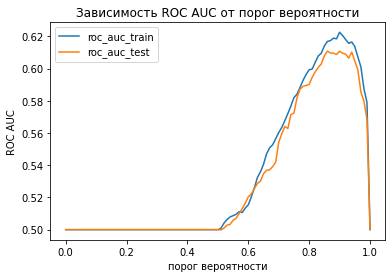

In [91]:
plt.plot(porog, roc_auc_scores_train, label = 'roc_auc_train')
plt.plot(porog, roc_auc_scores_test, label = 'roc_auc_test')
plt.legend()
plt.title('Зависимость ROC AUC от порог вероятности') 
plt.xlabel('порог вероятности')
plt.ylabel('ROC AUC')
plt.show()

In [92]:
roc_auc_scores_test.index(max(roc_auc_scores_test))

86

In [93]:
porog[86]

0.86

In [94]:
roc_auc_scores_train.index(max(roc_auc_scores_train))

90

In [95]:
porog[90]

0.9

[Voting] ...................... (4 of 4) Processing SVM, total=  43.3s
[Voting] ....................... (2 of 4) Processing lr, total=   0.2s


/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + 0.5 * alpha * np.dot(w, w)
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:127: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:122: Run

[Voting] ....................... (1 of 4) Processing rf, total=   1.6s


/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + 0.5 * alpha * np.dot(w, w)
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:127: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:122: Run

[Voting] .................... (3 of 4) Processing gauss, total=   0.0s


/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + 0.5 * alpha * np.dot(w, w)
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:127: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:122: Run

Можно сделать вывод, что лучший для нашей логистической регрессии находится где-то между 0.86 и 0.9

Сделаем то же самое и для леса

In [135]:
%%time

forest_params = {'n_estimators': np.arange(100, 1100, 100),
                 'max_depth': np.arange(5, 30, 5),
                 'min_samples_split': np.arange(2, 11, 3),
                 'max_features': ['sqrt', 'log2']}

best_tree = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                                               forest_params, cv=5, n_jobs=-1)

best_tree.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])

CPU times: user 8.42 s, sys: 1.06 s, total: 9.48 s
Wall time: 57min 41s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': array([2, 5, 8]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])})

In [136]:
best_tree.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
rf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=2, n_estimators=100, n_jobs=-1)

In [58]:
rf.fit(crop_train_df.drop('default_12m', axis=1), crop_train_df['default_12m'])

RandomForestClassifier(max_depth=10, max_features='sqrt', n_jobs=-1)

In [62]:
porog = np.arange(0, 1.01, 0.01)
roc_auc_scores_test = []
roc_auc_scores_train = []

for i in porog:
    pred_train = (rf.predict_proba(X_train)[:, 0] <= i).astype(int)
    pred_test = (rf.predict_proba(X_test)[:, 0] <= i).astype(int)
    
    accu_train = roc_auc_score(y_train, pred_train)
    accu_test = roc_auc_score(y_test, pred_test)
    roc_auc_scores_test.append(accu_test)
    roc_auc_scores_train.append(accu_train)

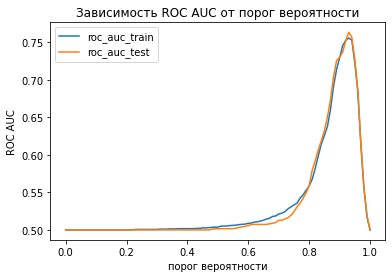

In [70]:
plt.plot(porog, roc_auc_scores_train, label = 'roc_auc_train')
plt.plot(porog, roc_auc_scores_test, label = 'roc_auc_test')
plt.legend()
plt.title('Зависимость ROC AUC от порог вероятности') 
plt.xlabel('порог вероятности')
plt.ylabel('ROC AUC')
plt.show()

In [71]:
roc_auc_scores_train.index((max(roc_auc_scores_train)))

93

In [75]:
porog[93]

0.93

In [73]:
roc_auc_scores_test.index((max(roc_auc_scores_test)))

93

In [74]:
porog[93]

0.93

In [64]:
base_clfs = pd.DataFrame.from_dict({'rf': rf.predict_proba(crop_test_df)[:, 0],
                                    'log': log.predict_proba(crop_test_df)[:, 0]})

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
base_clfs

rf       log
0    0.943726  0.992827
1    0.962759  0.997745
2    0.973900  0.998830
3    0.965183  0.999228
4    0.997637  0.999096
..        ...       ...
195  0.936853  0.865561
196  0.959071  0.999360
197  0.874245  0.690300
198  0.973684  0.993087
199  0.975257  0.999174

[200 rows x 2 columns]

В этой таблице записаны вероятности отнесения наблюдения к классу 0

In [82]:
with_cutoff = pd.DataFrame.from_dict({'rf': (rf.predict_proba(crop_test_df)[:, 0] <= 0.92).astype(int),
                                    'log': (log.predict_proba(crop_test_df)[:, 0] <= 0.86).astype(int)})

In [83]:
with_cutoff.head()

rf  log
0   0    0
1   0    0
2   0    0
3   0    0
4   0    0

In [84]:
with_cutoff['rf'].value_counts()

0    114
1     86
Name: rf, dtype: int64

In [85]:
with_cutoff['log'].value_counts()

0    107
1     93
Name: log, dtype: int64

In [86]:
with_cutoff.value_counts()

rf  log
0   0      91
1   1      70
0   1      23
1   0      16
dtype: int64

Добавим сюда еще другие крутые классифкаторы

In [88]:
from catboost import CatBoostClassifier, Pool

С катбустом мы уже сможем учитывать даже фичи с пропусками

In [89]:
model = CatBoostClassifier(learning_rate=0.2)
model.fit(train_df.drop('default_12m', axis=1), train_df['default_12m'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4894304	total: 59.7ms	remaining: 59.7s
1:	learn: 0.3766546	total: 68.2ms	remaining: 34s
2:	learn: 0.3151783	total: 78.2ms	remaining: 26s
3:	learn: 0.2790437	total: 86.5ms	remaining: 21.5s
4:	learn: 0.2582381	total: 93.8ms	remaining: 18.7s
5:	learn: 0.2456957	total: 101ms	remaining: 16.8s
6:	learn: 0.2384958	total: 109ms	remaining: 15.5s
7:	learn: 0.2338332	total: 116ms	remaining: 14.4s
8:	learn: 0.2313384	total: 123ms	remaining: 13.6s
9:	learn: 0.2291766	total: 131ms	remaining: 13s
10:	learn: 0.2275070	total: 138ms	remaining: 12.4s
11:	learn: 0.2258164	total: 146ms	remaining: 12s
12:	learn: 0.2246142	total: 153ms	remaining: 11.6s
13:	learn: 0.2237840	total: 161ms	remaining: 11.3s
14:	learn: 0.2232053	total: 167ms	remaining: 11s
15:	learn: 0.2223896	total: 176ms	remaining: 10.8s
16:	learn: 0.2215880	total: 183ms	remaining: 10.6s
17:	learn: 0.2211259	total: 190ms	remaining: 10.3s
18:	learn: 0.2204136	total: 198ms	remaining: 10.2s
19:	learn: 0.2196217	total: 205ms	remaining: 1

181:	learn: 0.1807790	total: 1.47s	remaining: 6.59s
182:	learn: 0.1805706	total: 1.47s	remaining: 6.57s
183:	learn: 0.1804303	total: 1.48s	remaining: 6.56s
184:	learn: 0.1802034	total: 1.49s	remaining: 6.55s
185:	learn: 0.1800869	total: 1.49s	remaining: 6.54s
186:	learn: 0.1799490	total: 1.5s	remaining: 6.53s
187:	learn: 0.1797542	total: 1.51s	remaining: 6.52s
188:	learn: 0.1794951	total: 1.52s	remaining: 6.5s
189:	learn: 0.1793913	total: 1.52s	remaining: 6.49s
190:	learn: 0.1791777	total: 1.53s	remaining: 6.48s
191:	learn: 0.1790027	total: 1.54s	remaining: 6.47s
192:	learn: 0.1787859	total: 1.54s	remaining: 6.46s
193:	learn: 0.1787241	total: 1.55s	remaining: 6.44s
194:	learn: 0.1786817	total: 1.56s	remaining: 6.43s
195:	learn: 0.1785805	total: 1.56s	remaining: 6.42s
196:	learn: 0.1784197	total: 1.57s	remaining: 6.4s
197:	learn: 0.1782879	total: 1.58s	remaining: 6.39s
198:	learn: 0.1780928	total: 1.58s	remaining: 6.38s
199:	learn: 0.1780096	total: 1.59s	remaining: 6.37s
200:	learn: 0.1

346:	learn: 0.1579908	total: 2.67s	remaining: 5.02s
347:	learn: 0.1578853	total: 2.67s	remaining: 5.01s
348:	learn: 0.1577511	total: 2.68s	remaining: 5s
349:	learn: 0.1577326	total: 2.69s	remaining: 4.99s
350:	learn: 0.1575667	total: 2.69s	remaining: 4.98s
351:	learn: 0.1574480	total: 2.7s	remaining: 4.97s
352:	learn: 0.1573309	total: 2.71s	remaining: 4.97s
353:	learn: 0.1571751	total: 2.72s	remaining: 4.96s
354:	learn: 0.1570621	total: 2.73s	remaining: 4.95s
355:	learn: 0.1569889	total: 2.73s	remaining: 4.94s
356:	learn: 0.1568603	total: 2.74s	remaining: 4.93s
357:	learn: 0.1567500	total: 2.75s	remaining: 4.92s
358:	learn: 0.1566001	total: 2.75s	remaining: 4.91s
359:	learn: 0.1565209	total: 2.76s	remaining: 4.9s
360:	learn: 0.1564890	total: 2.77s	remaining: 4.89s
361:	learn: 0.1564420	total: 2.77s	remaining: 4.88s
362:	learn: 0.1562728	total: 2.78s	remaining: 4.87s
363:	learn: 0.1561003	total: 2.78s	remaining: 4.86s
364:	learn: 0.1560120	total: 2.79s	remaining: 4.85s
365:	learn: 0.155

522:	learn: 0.1412252	total: 3.86s	remaining: 3.52s
523:	learn: 0.1412109	total: 3.87s	remaining: 3.52s
524:	learn: 0.1410858	total: 3.88s	remaining: 3.51s
525:	learn: 0.1409807	total: 3.89s	remaining: 3.51s
526:	learn: 0.1408669	total: 3.9s	remaining: 3.5s
527:	learn: 0.1408008	total: 3.91s	remaining: 3.5s
528:	learn: 0.1407226	total: 3.92s	remaining: 3.49s
529:	learn: 0.1406458	total: 3.92s	remaining: 3.48s
530:	learn: 0.1404888	total: 3.93s	remaining: 3.47s
531:	learn: 0.1404443	total: 3.94s	remaining: 3.46s
532:	learn: 0.1403689	total: 3.94s	remaining: 3.45s
533:	learn: 0.1402669	total: 3.95s	remaining: 3.45s
534:	learn: 0.1401674	total: 3.96s	remaining: 3.44s
535:	learn: 0.1401024	total: 3.96s	remaining: 3.43s
536:	learn: 0.1400604	total: 3.97s	remaining: 3.42s
537:	learn: 0.1399914	total: 3.98s	remaining: 3.41s
538:	learn: 0.1398777	total: 3.98s	remaining: 3.4s
539:	learn: 0.1397575	total: 3.99s	remaining: 3.4s
540:	learn: 0.1396470	total: 4s	remaining: 3.39s
541:	learn: 0.139617

695:	learn: 0.1294470	total: 5.08s	remaining: 2.22s
696:	learn: 0.1293940	total: 5.09s	remaining: 2.21s
697:	learn: 0.1293468	total: 5.1s	remaining: 2.21s
698:	learn: 0.1293178	total: 5.11s	remaining: 2.2s
699:	learn: 0.1292540	total: 5.12s	remaining: 2.19s
700:	learn: 0.1291896	total: 5.13s	remaining: 2.19s
701:	learn: 0.1291834	total: 5.13s	remaining: 2.18s
702:	learn: 0.1290539	total: 5.15s	remaining: 2.17s
703:	learn: 0.1289897	total: 5.15s	remaining: 2.17s
704:	learn: 0.1288024	total: 5.16s	remaining: 2.16s
705:	learn: 0.1287651	total: 5.17s	remaining: 2.15s
706:	learn: 0.1286741	total: 5.17s	remaining: 2.14s
707:	learn: 0.1285784	total: 5.18s	remaining: 2.14s
708:	learn: 0.1285530	total: 5.19s	remaining: 2.13s
709:	learn: 0.1284711	total: 5.2s	remaining: 2.12s
710:	learn: 0.1284216	total: 5.21s	remaining: 2.12s
711:	learn: 0.1283603	total: 5.21s	remaining: 2.11s
712:	learn: 0.1283248	total: 5.22s	remaining: 2.1s
713:	learn: 0.1282848	total: 5.23s	remaining: 2.1s
714:	learn: 0.128

874:	learn: 0.1197927	total: 6.67s	remaining: 954ms
875:	learn: 0.1197724	total: 6.68s	remaining: 946ms
876:	learn: 0.1197126	total: 6.69s	remaining: 939ms
877:	learn: 0.1196635	total: 6.7s	remaining: 931ms
878:	learn: 0.1195977	total: 6.71s	remaining: 924ms
879:	learn: 0.1195527	total: 6.72s	remaining: 917ms
880:	learn: 0.1195398	total: 6.73s	remaining: 910ms
881:	learn: 0.1194569	total: 6.75s	remaining: 903ms
882:	learn: 0.1194123	total: 6.76s	remaining: 895ms
883:	learn: 0.1194028	total: 6.76s	remaining: 887ms
884:	learn: 0.1193743	total: 6.77s	remaining: 880ms
885:	learn: 0.1193173	total: 6.78s	remaining: 872ms
886:	learn: 0.1192830	total: 6.79s	remaining: 865ms
887:	learn: 0.1192673	total: 6.79s	remaining: 857ms
888:	learn: 0.1192371	total: 6.8s	remaining: 850ms
889:	learn: 0.1191706	total: 6.81s	remaining: 842ms
890:	learn: 0.1191386	total: 6.82s	remaining: 834ms
891:	learn: 0.1190658	total: 6.82s	remaining: 826ms
892:	learn: 0.1190164	total: 6.84s	remaining: 820ms
893:	learn: 0.

In [166]:
init_cat_predictions = model.predict(test_df)

In [180]:
model.predict_proba(test_df)[:, 0] < 0.9

array([False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,

In [194]:
import xgboost as xgb

In [103]:
xg = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.3, n_estimators=500)

In [104]:
X = pd.DataFrame(train_df.drop('default_12m', axis=1))
y = train_df['default_12m']

Исправим имена некоторых фичей, так как xgboost ругается

In [105]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [106]:
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [107]:
xg.fit(X, y)

/home/alexanderlakiza/.virtualenvs/misc/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:23:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('default_12m',axis=1),
                                                    train_df['default_12m'],
                                                    random_state=42, shuffle=True,
                                                    train_size=0.7)

In [98]:
roc_auc_scores_test = []
roc_auc_scores_train = []

for i in porog:
    pred_train = (model.predict_proba(X_train)[:, 0] <= i).astype(int)
    pred_test = (model.predict_proba(X_test)[:, 0] <= i).astype(int)
    
    accu_train = roc_auc_score(y_train, pred_train)
    accu_test = roc_auc_score(y_test, pred_test)
    roc_auc_scores_test.append(accu_test)
    roc_auc_scores_train.append(accu_train)

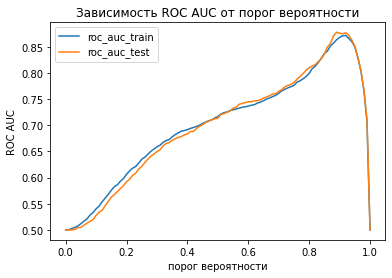

In [99]:
plt.plot(porog, roc_auc_scores_train, label = 'roc_auc_train')
plt.plot(porog, roc_auc_scores_test, label = 'roc_auc_test')
plt.legend()
plt.title('Зависимость ROC AUC от порог вероятности') 
plt.xlabel('порог вероятности')
plt.ylabel('ROC AUC')
plt.show()

In [100]:
roc_auc_scores_train.index(max(roc_auc_scores_train))

92

In [101]:
roc_auc_scores_test.index(max(roc_auc_scores_test))

89

In [108]:
roc_auc_scores_test = []
roc_auc_scores_train = []

for i in porog:
    pred_train = (xg.predict_proba(X_train)[:, 0] <= i).astype(int)
    pred_test = (xg.predict_proba(X_test)[:, 0] <= i).astype(int)
    
    accu_train = roc_auc_score(y_train, pred_train)
    accu_test = roc_auc_score(y_test, pred_test)
    roc_auc_scores_test.append(accu_test)
    roc_auc_scores_train.append(accu_train)

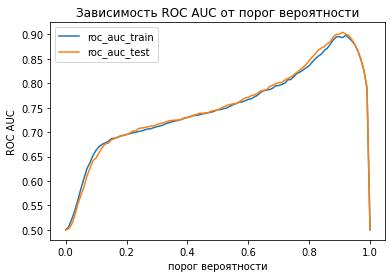

In [109]:
plt.plot(porog, roc_auc_scores_train, label = 'roc_auc_train')
plt.plot(porog, roc_auc_scores_test, label = 'roc_auc_test')
plt.legend()
plt.title('Зависимость ROC AUC от порог вероятности') 
plt.xlabel('порог вероятности')
plt.ylabel('ROC AUC')
plt.show()

In [110]:
roc_auc_scores_test.index(max(roc_auc_scores_test))

91

In [111]:
roc_auc_scores_train.index(max(roc_auc_scores_train))

92

In [112]:
boosts = pd.DataFrame.from_dict({'cat': (model.predict_proba(test_df)[:, 0] <= 0.905).astype(int),
                                    'xg': (xg.predict_proba(test_df)[:, 0] <= 0.915).astype(int)})

In [113]:
boosts.value_counts()

cat  xg
0    0     136
1    1      44
0    1      12
1    0       8
dtype: int64

In [114]:
result = pd.concat([with_cutoff, boosts], axis=1)

In [115]:
result.value_counts()

rf  log  cat  xg
0   0    0    0     81
1   1    1    1     30
         0    0     26
0   1    0    0     20
1   1    0    1     10
    0    0    0      9
0   0    1    1      7
1   0    1    1      5
    1    1    0      4
0   0    1    0      2
    1    1    1      2
1   0    1    0      2
0   0    0    1      1
    1    0    1      1
dtype: int64

In [116]:
ones = list(result[(result['cat']==1) | (result['xg'] == 1) |
      ((result['rf']==1)&(result['log']==1))].index)

Попробуем записать как единицы те наблюдения, которые назвали единицами бустинги или (лес и лог = 1, бустинги = 0)

In [117]:
result

rf  log  cat  xg
0     0    0    0   0
1     0    0    0   0
2     0    0    0   0
3     0    0    0   0
4     0    0    0   0
..   ..  ...  ...  ..
195   0    0    0   0
196   0    0    0   0
197   1    1    1   1
198   0    0    0   0
199   0    0    0   0

[200 rows x 4 columns]

In [118]:
response = [1 if i in ones else 0 for i in range(200)]

In [119]:
submit = pd.DataFrame.from_dict({'id': submit_ids,
                                'predict': response})
submit.head()

id  predict
0   196        0
1  1196        0
2  2813        0
3  4385        0
4  6479        0

In [120]:
submit['predict'].value_counts()

0    110
1     90
Name: predict, dtype: int64

In [292]:
submit.to_csv('4_clfs.csv', sep=';', index=False)

файл `4_clfs.csv`: `accuracy` на сайте = ___0.675___ (135 из 200)  
17 место в рйтинге на данный момент 20:00 11.11.21

(к сожалению комп вылетает и после ребута юпитерской тетрадки модельки работают иначе:( )

Попробуем добавить LightAutoML (работаю с ним первый раз)

In [121]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.reader.base import PandasToPandasReader
from lightautoml.ml_algo.boost_lgbm import BoostLGBM
from lightautoml.ml_algo.tuning.optuna import OptunaTuner
from lightautoml.pipelines.ml.base import MLPipeline
from lightautoml.automl.base import AutoML

In [124]:
task = Task("binary")

reader = PandasToPandasReader(task, cv=5, random_state=42)

In [125]:
roles = {'target': 'default_12m'}

In [126]:
automl = TabularAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 4, # Optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned']]})

In [127]:
oof_pred = automl.fit_predict(train_df, roles = roles)

In [128]:
valid_pred = automl.predict(test_df)

In [129]:
valid_pred  # предикшены

array([[0.02438664],
       [0.03789793],
       [0.02538089],
       [0.01604418],
       [0.0188002 ],
       [0.03648773],
       [0.05552427],
       [0.09125334],
       [0.1352841 ],
       [0.18306667],
       [0.05562083],
       [0.24379046],
       [0.04215684],
       [0.02406376],
       [0.12823412],
       [0.06228563],
       [0.0586901 ],
       [0.00666028],
       [0.09684227],
       [0.04114933],
       [0.00757839],
       [0.03054209],
       [0.16554609],
       [0.04312472],
       [0.06364623],
       [0.08490673],
       [0.02557442],
       [0.11426982],
       [0.11199689],
       [0.06277194],
       [0.07724371],
       [0.00348018],
       [0.01150069],
       [0.00754615],
       [0.07191676],
       [0.04947475],
       [0.05328775],
       [0.08774118],
       [0.08337127],
       [0.02849257],
       [0.07282043],
       [0.03605484],
       [0.05398891],
       [0.09044912],
       [0.05870217],
       [0.03466488],
       [0.04891219],
       [0.824

In [130]:
lama_answers = [i[0] for i in valid_pred.data]

0.0
0.025
0.05
0.07500000000000001
0.1
0.125
0.15000000000000002
0.17500000000000002
0.2
0.225
0.25
0.275
0.30000000000000004
0.325
0.35000000000000003
0.375
0.4
0.42500000000000004
0.45
0.47500000000000003
0.5
0.525
0.55
0.5750000000000001
0.6000000000000001
0.625
0.65
0.675
0.7000000000000001
0.7250000000000001
0.75
0.775
0.8
0.8250000000000001
0.8500000000000001
0.875
0.9
0.925
0.9500000000000001
0.9750000000000001
1.0


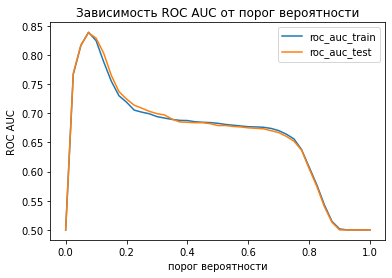

In [131]:
porog =np.arange(0.0, 1.01, 0.025)
roc_auc_scores_test = []
roc_auc_scores_train = []

for i in porog:
    print(i)
    pred_train = (automl.predict(X_train).data[:, 0] >= i).astype(int)
    pred_test = (automl.predict(X_test).data[:, 0] >= i).astype(int)
    
    accu_train = roc_auc_score(y_train, pred_train)
    accu_test = roc_auc_score(y_test, pred_test)
    roc_auc_scores_test.append(accu_test)
    roc_auc_scores_train.append(accu_train)

    
plt.plot(porog, roc_auc_scores_train, label = 'roc_auc_train')
plt.plot(porog, roc_auc_scores_test, label = 'roc_auc_test')
plt.legend()
plt.title('Зависимость ROC AUC от порог вероятности') 
plt.xlabel('порог вероятности')
plt.ylabel('ROC AUC')
plt.show()

In [137]:
roc_auc_scores_train.index(max(roc_auc_scores_train))

3

In [138]:
roc_auc_scores_test.index(max(roc_auc_scores_test))

3

In [139]:
porog[3]

0.07500000000000001

In [140]:
result['lama'] = (np.array(lama_answers) >= 0.075).astype(int)

In [141]:
result.value_counts()

rf  log  cat  xg  lama
0   0    0    0   0       78
1   1    1    1   1       30
0   1    0    0   0       13
1   1    0    0   1       13
                  0       13
              1   1       10
0   1    0    0   1        7
1   0    0    0   0        6
         1    1   1        5
0   0    1    1   1        5
1   1    1    0   1        4
0   0    0    0   1        3
1   0    0    0   1        3
0   1    1    1   1        2
1   0    1    0   1        2
0   0    1    1   0        2
              0   0        1
    1    0    1   1        1
    0    1    0   1        1
         0    1   1        1
dtype: int64

In [1]:
train_df

NameError: name 'train_df' is not defined

In [142]:
model = CatBoostClassifier(loss_function='Logloss', thread_count=6)

params = {'learning_rate':[0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,5,10,100],
          'border_count':[10,50,100,200]}

grid_search_result = model.grid_search(params,
                                       X=train_df.drop('default_12m', axis=1),
                                       y=train_df['default_12m'],
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6919117	test: 0.6919146	best: 0.6919146 (0)	total: 6.13ms	remaining: 6.13s
1:	learn: 0.6906736	test: 0.6906758	best: 0.6906758 (1)	total: 11.3ms	remaining: 5.65s
2:	learn: 0.6894144	test: 0.6894120	best: 0.6894120 (2)	total: 16.6ms	remaining: 5.5s
3:	learn: 0.6881859	test: 0.6881796	best: 0.6881796 (3)	total: 21.6ms	remaining: 5.38s
4:	learn: 0.6869555	test: 0.6869464	best: 0.6869464 (4)	total: 26.3ms	remaining: 5.24s
5:	learn: 0.6857458	test: 0.6857296	best: 0.6857296 (5)	total: 30.5ms	remaining: 5.05s
6:	learn: 0.6845413	test: 0.6845205	best: 0.6845205 (6)	total: 35.7ms	remaining: 5.07s
7:	learn: 0.6833627	test: 0.6833382	best: 0.6833382 (7)	total: 39.3ms	remaining: 4.87s
8:	learn: 0.6821426	test: 0.6821164	best: 0.6821164 (8)	total: 43.4ms	remaining: 4.78s
9:	learn: 0.6809207	test: 0.6808894	best: 0.6808894 (9)	total: 47.7ms	remaining: 4.72s
10:	learn: 0.6797323	test: 0.6796964	best: 0.6796964 (10)	total: 52ms	remaining: 4.67s
11:	learn: 0.6785667	test: 0.6785235	best: 0

130:	learn: 0.5567689	test: 0.5560831	best: 0.5560831 (130)	total: 601ms	remaining: 3.99s
131:	learn: 0.5558818	test: 0.5551897	best: 0.5551897 (131)	total: 605ms	remaining: 3.98s
132:	learn: 0.5549815	test: 0.5542843	best: 0.5542843 (132)	total: 609ms	remaining: 3.97s
133:	learn: 0.5541011	test: 0.5533994	best: 0.5533994 (133)	total: 614ms	remaining: 3.96s
134:	learn: 0.5532489	test: 0.5525401	best: 0.5525401 (134)	total: 618ms	remaining: 3.96s
135:	learn: 0.5523901	test: 0.5516751	best: 0.5516751 (135)	total: 623ms	remaining: 3.96s
136:	learn: 0.5515449	test: 0.5508217	best: 0.5508217 (136)	total: 627ms	remaining: 3.95s
137:	learn: 0.5507074	test: 0.5499739	best: 0.5499739 (137)	total: 631ms	remaining: 3.94s
138:	learn: 0.5498695	test: 0.5491297	best: 0.5491297 (138)	total: 639ms	remaining: 3.96s
139:	learn: 0.5490262	test: 0.5482793	best: 0.5482793 (139)	total: 644ms	remaining: 3.96s
140:	learn: 0.5481748	test: 0.5474186	best: 0.5474186 (140)	total: 649ms	remaining: 3.96s
141:	learn

225:	learn: 0.4840958	test: 0.4828277	best: 0.4828277 (225)	total: 994ms	remaining: 3.4s
226:	learn: 0.4834233	test: 0.4821487	best: 0.4821487 (226)	total: 999ms	remaining: 3.4s
227:	learn: 0.4827602	test: 0.4814797	best: 0.4814797 (227)	total: 1s	remaining: 3.4s
228:	learn: 0.4821056	test: 0.4808184	best: 0.4808184 (228)	total: 1.01s	remaining: 3.39s
229:	learn: 0.4814318	test: 0.4801413	best: 0.4801413 (229)	total: 1.01s	remaining: 3.39s
230:	learn: 0.4807875	test: 0.4794906	best: 0.4794906 (230)	total: 1.02s	remaining: 3.38s
231:	learn: 0.4801329	test: 0.4788329	best: 0.4788329 (231)	total: 1.02s	remaining: 3.38s
232:	learn: 0.4794751	test: 0.4781671	best: 0.4781671 (232)	total: 1.02s	remaining: 3.37s
233:	learn: 0.4788092	test: 0.4774973	best: 0.4774973 (233)	total: 1.03s	remaining: 3.37s
234:	learn: 0.4781482	test: 0.4768336	best: 0.4768336 (234)	total: 1.03s	remaining: 3.37s
235:	learn: 0.4775150	test: 0.4761946	best: 0.4761946 (235)	total: 1.04s	remaining: 3.36s
236:	learn: 0.47

321:	learn: 0.4276645	test: 0.4259303	best: 0.4259303 (321)	total: 1.39s	remaining: 2.93s
322:	learn: 0.4271588	test: 0.4254207	best: 0.4254207 (322)	total: 1.4s	remaining: 2.92s
323:	learn: 0.4266139	test: 0.4248724	best: 0.4248724 (323)	total: 1.4s	remaining: 2.92s
324:	learn: 0.4260971	test: 0.4243531	best: 0.4243531 (324)	total: 1.41s	remaining: 2.92s
325:	learn: 0.4255792	test: 0.4238296	best: 0.4238296 (325)	total: 1.41s	remaining: 2.92s
326:	learn: 0.4250801	test: 0.4233251	best: 0.4233251 (326)	total: 1.42s	remaining: 2.91s
327:	learn: 0.4245783	test: 0.4228181	best: 0.4228181 (327)	total: 1.42s	remaining: 2.91s
328:	learn: 0.4240748	test: 0.4223111	best: 0.4223111 (328)	total: 1.43s	remaining: 2.91s
329:	learn: 0.4235721	test: 0.4218044	best: 0.4218044 (329)	total: 1.43s	remaining: 2.91s
330:	learn: 0.4230714	test: 0.4213000	best: 0.4213000 (330)	total: 1.44s	remaining: 2.91s
331:	learn: 0.4225761	test: 0.4207991	best: 0.4207991 (331)	total: 1.45s	remaining: 2.91s
332:	learn: 

451:	learn: 0.3714364	test: 0.3691086	best: 0.3691086 (451)	total: 1.99s	remaining: 2.41s
452:	learn: 0.3710816	test: 0.3687498	best: 0.3687498 (452)	total: 1.99s	remaining: 2.4s
453:	learn: 0.3707252	test: 0.3683894	best: 0.3683894 (453)	total: 1.99s	remaining: 2.4s
454:	learn: 0.3703613	test: 0.3680215	best: 0.3680215 (454)	total: 2s	remaining: 2.39s
455:	learn: 0.3700091	test: 0.3676640	best: 0.3676640 (455)	total: 2s	remaining: 2.39s
456:	learn: 0.3696517	test: 0.3673023	best: 0.3673023 (456)	total: 2.01s	remaining: 2.38s
457:	learn: 0.3692917	test: 0.3669373	best: 0.3669373 (457)	total: 2.01s	remaining: 2.38s
458:	learn: 0.3689410	test: 0.3665824	best: 0.3665824 (458)	total: 2.02s	remaining: 2.38s
459:	learn: 0.3685769	test: 0.3662152	best: 0.3662152 (459)	total: 2.02s	remaining: 2.38s
460:	learn: 0.3682110	test: 0.3658497	best: 0.3658497 (460)	total: 2.03s	remaining: 2.38s
461:	learn: 0.3678547	test: 0.3654899	best: 0.3654899 (461)	total: 2.04s	remaining: 2.38s
462:	learn: 0.3674

581:	learn: 0.3318734	test: 0.3290176	best: 0.3290176 (581)	total: 2.58s	remaining: 1.86s
582:	learn: 0.3316203	test: 0.3287607	best: 0.3287607 (582)	total: 2.6s	remaining: 1.86s
583:	learn: 0.3313733	test: 0.3285077	best: 0.3285077 (583)	total: 2.61s	remaining: 1.86s
584:	learn: 0.3311150	test: 0.3282465	best: 0.3282465 (584)	total: 2.62s	remaining: 1.86s
585:	learn: 0.3308592	test: 0.3279879	best: 0.3279879 (585)	total: 2.62s	remaining: 1.85s
586:	learn: 0.3306075	test: 0.3277355	best: 0.3277355 (586)	total: 2.64s	remaining: 1.86s
587:	learn: 0.3303517	test: 0.3274754	best: 0.3274754 (587)	total: 2.66s	remaining: 1.86s
588:	learn: 0.3301024	test: 0.3272216	best: 0.3272216 (588)	total: 2.67s	remaining: 1.86s
589:	learn: 0.3298539	test: 0.3269701	best: 0.3269701 (589)	total: 2.69s	remaining: 1.87s
590:	learn: 0.3296107	test: 0.3267226	best: 0.3267226 (590)	total: 2.69s	remaining: 1.86s
591:	learn: 0.3293630	test: 0.3264725	best: 0.3264725 (591)	total: 2.7s	remaining: 1.86s
592:	learn: 

692:	learn: 0.3073347	test: 0.3041008	best: 0.3041008 (692)	total: 3.18s	remaining: 1.41s
693:	learn: 0.3071457	test: 0.3039084	best: 0.3039084 (693)	total: 3.19s	remaining: 1.4s
694:	learn: 0.3069498	test: 0.3037110	best: 0.3037110 (694)	total: 3.19s	remaining: 1.4s
695:	learn: 0.3067541	test: 0.3035125	best: 0.3035125 (695)	total: 3.2s	remaining: 1.4s
696:	learn: 0.3065613	test: 0.3033180	best: 0.3033180 (696)	total: 3.2s	remaining: 1.39s
697:	learn: 0.3063740	test: 0.3031291	best: 0.3031291 (697)	total: 3.21s	remaining: 1.39s
698:	learn: 0.3061905	test: 0.3029436	best: 0.3029436 (698)	total: 3.21s	remaining: 1.38s
699:	learn: 0.3060102	test: 0.3027604	best: 0.3027604 (699)	total: 3.22s	remaining: 1.38s
700:	learn: 0.3058240	test: 0.3025711	best: 0.3025711 (700)	total: 3.23s	remaining: 1.38s
701:	learn: 0.3056404	test: 0.3023841	best: 0.3023841 (701)	total: 3.23s	remaining: 1.37s
702:	learn: 0.3054471	test: 0.3021886	best: 0.3021886 (702)	total: 3.23s	remaining: 1.37s
703:	learn: 0.3

811:	learn: 0.2876611	test: 0.2841090	best: 0.2841090 (811)	total: 3.77s	remaining: 874ms
812:	learn: 0.2875212	test: 0.2839653	best: 0.2839653 (812)	total: 3.78s	remaining: 869ms
813:	learn: 0.2873868	test: 0.2838277	best: 0.2838277 (813)	total: 3.78s	remaining: 864ms
814:	learn: 0.2872441	test: 0.2836828	best: 0.2836828 (814)	total: 3.79s	remaining: 860ms
815:	learn: 0.2871010	test: 0.2835368	best: 0.2835368 (815)	total: 3.79s	remaining: 855ms
816:	learn: 0.2869580	test: 0.2833924	best: 0.2833924 (816)	total: 3.8s	remaining: 851ms
817:	learn: 0.2868187	test: 0.2832512	best: 0.2832512 (817)	total: 3.8s	remaining: 846ms
818:	learn: 0.2866826	test: 0.2831126	best: 0.2831126 (818)	total: 3.81s	remaining: 842ms
819:	learn: 0.2865401	test: 0.2829695	best: 0.2829695 (819)	total: 3.82s	remaining: 838ms
820:	learn: 0.2864045	test: 0.2828319	best: 0.2828319 (820)	total: 3.82s	remaining: 833ms
821:	learn: 0.2862692	test: 0.2826930	best: 0.2826930 (821)	total: 3.83s	remaining: 829ms
822:	learn: 

946:	learn: 0.2714526	test: 0.2675892	best: 0.2675892 (946)	total: 4.36s	remaining: 244ms
947:	learn: 0.2713536	test: 0.2674884	best: 0.2674884 (947)	total: 4.37s	remaining: 240ms
948:	learn: 0.2712529	test: 0.2673864	best: 0.2673864 (948)	total: 4.37s	remaining: 235ms
949:	learn: 0.2711571	test: 0.2672871	best: 0.2672871 (949)	total: 4.37s	remaining: 230ms
950:	learn: 0.2710562	test: 0.2671832	best: 0.2671832 (950)	total: 4.38s	remaining: 226ms
951:	learn: 0.2709575	test: 0.2670820	best: 0.2670820 (951)	total: 4.38s	remaining: 221ms
952:	learn: 0.2708596	test: 0.2669812	best: 0.2669812 (952)	total: 4.39s	remaining: 216ms
953:	learn: 0.2707613	test: 0.2668815	best: 0.2668815 (953)	total: 4.39s	remaining: 212ms
954:	learn: 0.2706643	test: 0.2667832	best: 0.2667832 (954)	total: 4.4s	remaining: 207ms
955:	learn: 0.2705627	test: 0.2666793	best: 0.2666793 (955)	total: 4.4s	remaining: 203ms
956:	learn: 0.2704648	test: 0.2665802	best: 0.2665802 (956)	total: 4.41s	remaining: 198ms
957:	learn: 

37:	learn: 0.3996098	test: 0.3975392	best: 0.3975392 (37)	total: 159ms	remaining: 4.03s
38:	learn: 0.3954293	test: 0.3933001	best: 0.3933001 (38)	total: 162ms	remaining: 4s
39:	learn: 0.3911738	test: 0.3889902	best: 0.3889902 (39)	total: 166ms	remaining: 3.99s
40:	learn: 0.3870193	test: 0.3847762	best: 0.3847762 (40)	total: 171ms	remaining: 4s
41:	learn: 0.3829681	test: 0.3806765	best: 0.3806765 (41)	total: 175ms	remaining: 4s
42:	learn: 0.3791081	test: 0.3767751	best: 0.3767751 (42)	total: 179ms	remaining: 3.99s
43:	learn: 0.3753255	test: 0.3729126	best: 0.3729126 (43)	total: 183ms	remaining: 3.99s
44:	learn: 0.3716667	test: 0.3692129	best: 0.3692129 (44)	total: 188ms	remaining: 4s
45:	learn: 0.3680618	test: 0.3655674	best: 0.3655674 (45)	total: 193ms	remaining: 4.01s
46:	learn: 0.3645670	test: 0.3620285	best: 0.3620285 (46)	total: 198ms	remaining: 4.01s
47:	learn: 0.3609892	test: 0.3584233	best: 0.3584233 (47)	total: 202ms	remaining: 4.01s
48:	learn: 0.3575916	test: 0.3549885	best: 0

169:	learn: 0.2350657	test: 0.2302986	best: 0.2302986 (169)	total: 752ms	remaining: 3.67s
170:	learn: 0.2348883	test: 0.2301159	best: 0.2301159 (170)	total: 756ms	remaining: 3.66s
171:	learn: 0.2346853	test: 0.2299130	best: 0.2299130 (171)	total: 760ms	remaining: 3.66s
172:	learn: 0.2344851	test: 0.2297170	best: 0.2297170 (172)	total: 765ms	remaining: 3.65s
173:	learn: 0.2343386	test: 0.2295593	best: 0.2295593 (173)	total: 768ms	remaining: 3.65s
174:	learn: 0.2341623	test: 0.2293825	best: 0.2293825 (174)	total: 773ms	remaining: 3.64s
175:	learn: 0.2339865	test: 0.2292101	best: 0.2292101 (175)	total: 777ms	remaining: 3.64s
176:	learn: 0.2338099	test: 0.2290490	best: 0.2290490 (176)	total: 781ms	remaining: 3.63s
177:	learn: 0.2336315	test: 0.2288713	best: 0.2288713 (177)	total: 786ms	remaining: 3.63s
178:	learn: 0.2334971	test: 0.2287303	best: 0.2287303 (178)	total: 791ms	remaining: 3.63s
179:	learn: 0.2333076	test: 0.2285456	best: 0.2285456 (179)	total: 796ms	remaining: 3.63s
180:	learn

302:	learn: 0.2235665	test: 0.2197005	best: 0.2197005 (302)	total: 1.35s	remaining: 3.11s
303:	learn: 0.2235290	test: 0.2196743	best: 0.2196743 (303)	total: 1.36s	remaining: 3.11s
304:	learn: 0.2235027	test: 0.2196511	best: 0.2196511 (304)	total: 1.36s	remaining: 3.1s
305:	learn: 0.2234482	test: 0.2196028	best: 0.2196028 (305)	total: 1.37s	remaining: 3.1s
306:	learn: 0.2234393	test: 0.2195944	best: 0.2195944 (306)	total: 1.37s	remaining: 3.09s
307:	learn: 0.2233892	test: 0.2195660	best: 0.2195660 (307)	total: 1.37s	remaining: 3.09s
308:	learn: 0.2233358	test: 0.2195212	best: 0.2195212 (308)	total: 1.38s	remaining: 3.08s
309:	learn: 0.2232895	test: 0.2194841	best: 0.2194841 (309)	total: 1.38s	remaining: 3.08s
310:	learn: 0.2232487	test: 0.2194710	best: 0.2194710 (310)	total: 1.39s	remaining: 3.07s
311:	learn: 0.2232101	test: 0.2194447	best: 0.2194447 (311)	total: 1.39s	remaining: 3.07s
312:	learn: 0.2231813	test: 0.2194266	best: 0.2194266 (312)	total: 1.4s	remaining: 3.07s
313:	learn: 0

438:	learn: 0.2191765	test: 0.2174220	best: 0.2174220 (438)	total: 1.95s	remaining: 2.5s
439:	learn: 0.2191520	test: 0.2174109	best: 0.2174109 (439)	total: 1.96s	remaining: 2.49s
440:	learn: 0.2191309	test: 0.2173963	best: 0.2173963 (440)	total: 1.96s	remaining: 2.49s
441:	learn: 0.2190970	test: 0.2173792	best: 0.2173792 (441)	total: 1.97s	remaining: 2.48s
442:	learn: 0.2190656	test: 0.2173588	best: 0.2173588 (442)	total: 1.97s	remaining: 2.48s
443:	learn: 0.2190287	test: 0.2173249	best: 0.2173249 (443)	total: 1.98s	remaining: 2.47s
444:	learn: 0.2190080	test: 0.2173205	best: 0.2173205 (444)	total: 1.98s	remaining: 2.47s
445:	learn: 0.2189843	test: 0.2173057	best: 0.2173057 (445)	total: 1.98s	remaining: 2.46s
446:	learn: 0.2189588	test: 0.2173011	best: 0.2173011 (446)	total: 1.99s	remaining: 2.46s
447:	learn: 0.2189353	test: 0.2172891	best: 0.2172891 (447)	total: 1.99s	remaining: 2.46s
448:	learn: 0.2189002	test: 0.2172619	best: 0.2172619 (448)	total: 2s	remaining: 2.45s
449:	learn: 0.

530:	learn: 0.2168485	test: 0.2165044	best: 0.2165044 (530)	total: 2.35s	remaining: 2.08s
531:	learn: 0.2168140	test: 0.2164888	best: 0.2164888 (531)	total: 2.35s	remaining: 2.07s
532:	learn: 0.2167822	test: 0.2164867	best: 0.2164867 (532)	total: 2.36s	remaining: 2.06s
533:	learn: 0.2167639	test: 0.2164771	best: 0.2164771 (533)	total: 2.36s	remaining: 2.06s
534:	learn: 0.2167337	test: 0.2164659	best: 0.2164659 (534)	total: 2.37s	remaining: 2.06s
535:	learn: 0.2167113	test: 0.2164604	best: 0.2164604 (535)	total: 2.37s	remaining: 2.05s
536:	learn: 0.2166937	test: 0.2164496	best: 0.2164496 (536)	total: 2.38s	remaining: 2.05s
537:	learn: 0.2166689	test: 0.2164449	best: 0.2164449 (537)	total: 2.38s	remaining: 2.05s
538:	learn: 0.2166553	test: 0.2164413	best: 0.2164413 (538)	total: 2.39s	remaining: 2.04s
539:	learn: 0.2166360	test: 0.2164420	best: 0.2164413 (538)	total: 2.39s	remaining: 2.04s
540:	learn: 0.2166044	test: 0.2164288	best: 0.2164288 (540)	total: 2.4s	remaining: 2.03s
541:	learn:

623:	learn: 0.2149417	test: 0.2158066	best: 0.2158062 (619)	total: 2.74s	remaining: 1.65s
624:	learn: 0.2149159	test: 0.2158007	best: 0.2158007 (624)	total: 2.75s	remaining: 1.65s
625:	learn: 0.2148961	test: 0.2157911	best: 0.2157911 (625)	total: 2.75s	remaining: 1.64s
626:	learn: 0.2148780	test: 0.2157847	best: 0.2157847 (626)	total: 2.76s	remaining: 1.64s
627:	learn: 0.2148501	test: 0.2157796	best: 0.2157796 (627)	total: 2.76s	remaining: 1.64s
628:	learn: 0.2148403	test: 0.2157762	best: 0.2157762 (628)	total: 2.77s	remaining: 1.63s
629:	learn: 0.2148277	test: 0.2157704	best: 0.2157704 (629)	total: 2.77s	remaining: 1.63s
630:	learn: 0.2147996	test: 0.2157662	best: 0.2157662 (630)	total: 2.78s	remaining: 1.62s
631:	learn: 0.2147780	test: 0.2157588	best: 0.2157588 (631)	total: 2.78s	remaining: 1.62s
632:	learn: 0.2147589	test: 0.2157564	best: 0.2157564 (632)	total: 2.79s	remaining: 1.61s
633:	learn: 0.2147357	test: 0.2157480	best: 0.2157480 (633)	total: 2.79s	remaining: 1.61s
634:	learn

716:	learn: 0.2131889	test: 0.2153359	best: 0.2153281 (712)	total: 3.14s	remaining: 1.24s
717:	learn: 0.2131676	test: 0.2153264	best: 0.2153264 (717)	total: 3.14s	remaining: 1.23s
718:	learn: 0.2131332	test: 0.2153270	best: 0.2153264 (717)	total: 3.15s	remaining: 1.23s
719:	learn: 0.2131133	test: 0.2153192	best: 0.2153192 (719)	total: 3.15s	remaining: 1.23s
720:	learn: 0.2130978	test: 0.2153201	best: 0.2153192 (719)	total: 3.16s	remaining: 1.22s
721:	learn: 0.2130780	test: 0.2153167	best: 0.2153167 (721)	total: 3.16s	remaining: 1.22s
722:	learn: 0.2130606	test: 0.2153093	best: 0.2153093 (722)	total: 3.17s	remaining: 1.21s
723:	learn: 0.2130346	test: 0.2152970	best: 0.2152970 (723)	total: 3.17s	remaining: 1.21s
724:	learn: 0.2130143	test: 0.2152874	best: 0.2152874 (724)	total: 3.17s	remaining: 1.2s
725:	learn: 0.2129924	test: 0.2152846	best: 0.2152846 (725)	total: 3.18s	remaining: 1.2s
726:	learn: 0.2129708	test: 0.2152793	best: 0.2152793 (726)	total: 3.18s	remaining: 1.2s
727:	learn: 0

809:	learn: 0.2115395	test: 0.2150488	best: 0.2150482 (799)	total: 3.53s	remaining: 828ms
810:	learn: 0.2115213	test: 0.2150446	best: 0.2150446 (810)	total: 3.54s	remaining: 824ms
811:	learn: 0.2115095	test: 0.2150439	best: 0.2150439 (811)	total: 3.54s	remaining: 820ms
812:	learn: 0.2114990	test: 0.2150376	best: 0.2150376 (812)	total: 3.54s	remaining: 815ms
813:	learn: 0.2114784	test: 0.2150260	best: 0.2150260 (813)	total: 3.55s	remaining: 811ms
814:	learn: 0.2114685	test: 0.2150253	best: 0.2150253 (814)	total: 3.55s	remaining: 807ms
815:	learn: 0.2114413	test: 0.2150241	best: 0.2150241 (815)	total: 3.56s	remaining: 802ms
816:	learn: 0.2114290	test: 0.2150160	best: 0.2150160 (816)	total: 3.56s	remaining: 798ms
817:	learn: 0.2114011	test: 0.2150171	best: 0.2150160 (816)	total: 3.57s	remaining: 794ms
818:	learn: 0.2113817	test: 0.2150231	best: 0.2150160 (816)	total: 3.57s	remaining: 789ms
819:	learn: 0.2113627	test: 0.2150227	best: 0.2150160 (816)	total: 3.58s	remaining: 785ms
820:	learn

901:	learn: 0.2099084	test: 0.2146958	best: 0.2146958 (901)	total: 3.92s	remaining: 426ms
902:	learn: 0.2099059	test: 0.2146968	best: 0.2146958 (901)	total: 3.93s	remaining: 422ms
903:	learn: 0.2098961	test: 0.2147021	best: 0.2146958 (901)	total: 3.93s	remaining: 418ms
904:	learn: 0.2098664	test: 0.2146896	best: 0.2146896 (904)	total: 3.94s	remaining: 413ms
905:	learn: 0.2098521	test: 0.2146852	best: 0.2146852 (905)	total: 3.94s	remaining: 409ms
906:	learn: 0.2098334	test: 0.2146766	best: 0.2146766 (906)	total: 3.95s	remaining: 405ms
907:	learn: 0.2098195	test: 0.2146708	best: 0.2146708 (907)	total: 3.95s	remaining: 400ms
908:	learn: 0.2098040	test: 0.2146626	best: 0.2146626 (908)	total: 3.95s	remaining: 396ms
909:	learn: 0.2097955	test: 0.2146614	best: 0.2146614 (909)	total: 3.96s	remaining: 392ms
910:	learn: 0.2097755	test: 0.2146603	best: 0.2146603 (910)	total: 3.96s	remaining: 387ms
911:	learn: 0.2097608	test: 0.2146594	best: 0.2146594 (911)	total: 3.97s	remaining: 383ms
912:	learn

997:	learn: 0.2083098	test: 0.2143737	best: 0.2143737 (997)	total: 4.32s	remaining: 8.66ms
998:	learn: 0.2082883	test: 0.2143812	best: 0.2143737 (997)	total: 4.32s	remaining: 4.33ms
999:	learn: 0.2082717	test: 0.2143761	best: 0.2143737 (997)	total: 4.33s	remaining: 0us

bestTest = 0.2143737011
bestIteration = 997

1:	loss: 0.2143737	best: 0.2143737 (1)	total: 9.21s	remaining: 5m 59s
0:	learn: 0.5800959	test: 0.5798592	best: 0.5798592 (0)	total: 4.68ms	remaining: 4.68s
1:	learn: 0.4945472	test: 0.4937388	best: 0.4937388 (1)	total: 8.45ms	remaining: 4.21s
2:	learn: 0.4290045	test: 0.4277019	best: 0.4277019 (2)	total: 13.2ms	remaining: 4.38s
3:	learn: 0.3812798	test: 0.3793638	best: 0.3793638 (3)	total: 18.6ms	remaining: 4.64s
4:	learn: 0.3461111	test: 0.3437896	best: 0.3437896 (4)	total: 23ms	remaining: 4.58s
5:	learn: 0.3193246	test: 0.3164013	best: 0.3164013 (5)	total: 27.6ms	remaining: 4.56s
6:	learn: 0.2990375	test: 0.2956569	best: 0.2956569 (6)	total: 32.1ms	remaining: 4.56s
7:	lear

91:	learn: 0.2104152	test: 0.2149035	best: 0.2149035 (91)	total: 388ms	remaining: 3.83s
92:	learn: 0.2102232	test: 0.2148655	best: 0.2148655 (92)	total: 393ms	remaining: 3.83s
93:	learn: 0.2099914	test: 0.2147438	best: 0.2147438 (93)	total: 397ms	remaining: 3.83s
94:	learn: 0.2098049	test: 0.2146961	best: 0.2146961 (94)	total: 402ms	remaining: 3.83s
95:	learn: 0.2096705	test: 0.2145763	best: 0.2145763 (95)	total: 406ms	remaining: 3.82s
96:	learn: 0.2095193	test: 0.2146028	best: 0.2145763 (95)	total: 410ms	remaining: 3.82s
97:	learn: 0.2093057	test: 0.2145246	best: 0.2145246 (97)	total: 415ms	remaining: 3.82s
98:	learn: 0.2091288	test: 0.2145606	best: 0.2145246 (97)	total: 420ms	remaining: 3.82s
99:	learn: 0.2090128	test: 0.2145563	best: 0.2145246 (97)	total: 424ms	remaining: 3.82s
100:	learn: 0.2088540	test: 0.2144484	best: 0.2144484 (100)	total: 429ms	remaining: 3.82s
101:	learn: 0.2086157	test: 0.2144479	best: 0.2144479 (101)	total: 434ms	remaining: 3.82s
102:	learn: 0.2084209	test: 

227:	learn: 0.1894154	test: 0.2141071	best: 0.2138669 (211)	total: 982ms	remaining: 3.33s
228:	learn: 0.1893211	test: 0.2141210	best: 0.2138669 (211)	total: 987ms	remaining: 3.32s
229:	learn: 0.1892526	test: 0.2141123	best: 0.2138669 (211)	total: 991ms	remaining: 3.32s
230:	learn: 0.1890490	test: 0.2140510	best: 0.2138669 (211)	total: 995ms	remaining: 3.31s
231:	learn: 0.1888849	test: 0.2139623	best: 0.2138669 (211)	total: 1s	remaining: 3.31s
232:	learn: 0.1887707	test: 0.2139762	best: 0.2138669 (211)	total: 1s	remaining: 3.31s
233:	learn: 0.1886363	test: 0.2139229	best: 0.2138669 (211)	total: 1.01s	remaining: 3.3s
234:	learn: 0.1885160	test: 0.2139011	best: 0.2138669 (211)	total: 1.01s	remaining: 3.3s
235:	learn: 0.1884329	test: 0.2139005	best: 0.2138669 (211)	total: 1.02s	remaining: 3.29s
236:	learn: 0.1883011	test: 0.2140382	best: 0.2138669 (211)	total: 1.02s	remaining: 3.29s
237:	learn: 0.1881531	test: 0.2140482	best: 0.2138669 (211)	total: 1.03s	remaining: 3.29s
238:	learn: 0.1879

362:	learn: 0.1756745	test: 0.2143661	best: 0.2137773 (268)	total: 1.57s	remaining: 2.77s
363:	learn: 0.1755666	test: 0.2143779	best: 0.2137773 (268)	total: 1.58s	remaining: 2.76s
364:	learn: 0.1754825	test: 0.2143767	best: 0.2137773 (268)	total: 1.58s	remaining: 2.76s
365:	learn: 0.1754030	test: 0.2144143	best: 0.2137773 (268)	total: 1.59s	remaining: 2.75s
366:	learn: 0.1752730	test: 0.2143948	best: 0.2137773 (268)	total: 1.59s	remaining: 2.75s
367:	learn: 0.1752093	test: 0.2143843	best: 0.2137773 (268)	total: 1.6s	remaining: 2.74s
368:	learn: 0.1751304	test: 0.2144273	best: 0.2137773 (268)	total: 1.6s	remaining: 2.74s
369:	learn: 0.1750362	test: 0.2144410	best: 0.2137773 (268)	total: 1.61s	remaining: 2.73s
370:	learn: 0.1749456	test: 0.2143060	best: 0.2137773 (268)	total: 1.61s	remaining: 2.73s
371:	learn: 0.1748500	test: 0.2143300	best: 0.2137773 (268)	total: 1.61s	remaining: 2.73s
372:	learn: 0.1747710	test: 0.2143179	best: 0.2137773 (268)	total: 1.62s	remaining: 2.72s
373:	learn: 

454:	learn: 0.1682283	test: 0.2156744	best: 0.2137773 (268)	total: 1.97s	remaining: 2.36s
455:	learn: 0.1681511	test: 0.2157351	best: 0.2137773 (268)	total: 1.97s	remaining: 2.35s
456:	learn: 0.1680458	test: 0.2157548	best: 0.2137773 (268)	total: 1.98s	remaining: 2.35s
457:	learn: 0.1679767	test: 0.2158245	best: 0.2137773 (268)	total: 1.98s	remaining: 2.35s
458:	learn: 0.1678999	test: 0.2158115	best: 0.2137773 (268)	total: 1.99s	remaining: 2.34s
459:	learn: 0.1678591	test: 0.2158268	best: 0.2137773 (268)	total: 1.99s	remaining: 2.34s
460:	learn: 0.1677225	test: 0.2158964	best: 0.2137773 (268)	total: 2s	remaining: 2.33s
461:	learn: 0.1676368	test: 0.2159042	best: 0.2137773 (268)	total: 2s	remaining: 2.33s
462:	learn: 0.1675842	test: 0.2159313	best: 0.2137773 (268)	total: 2.01s	remaining: 2.33s
463:	learn: 0.1674995	test: 0.2158765	best: 0.2137773 (268)	total: 2.01s	remaining: 2.32s
464:	learn: 0.1673797	test: 0.2158272	best: 0.2137773 (268)	total: 2.02s	remaining: 2.32s
465:	learn: 0.16

546:	learn: 0.1614803	test: 0.2165932	best: 0.2137773 (268)	total: 2.37s	remaining: 1.96s
547:	learn: 0.1613913	test: 0.2165966	best: 0.2137773 (268)	total: 2.37s	remaining: 1.96s
548:	learn: 0.1613654	test: 0.2165750	best: 0.2137773 (268)	total: 2.38s	remaining: 1.95s
549:	learn: 0.1612875	test: 0.2166333	best: 0.2137773 (268)	total: 2.38s	remaining: 1.95s
550:	learn: 0.1612594	test: 0.2166450	best: 0.2137773 (268)	total: 2.39s	remaining: 1.95s
551:	learn: 0.1611769	test: 0.2167622	best: 0.2137773 (268)	total: 2.39s	remaining: 1.94s
552:	learn: 0.1610982	test: 0.2167767	best: 0.2137773 (268)	total: 2.4s	remaining: 1.94s
553:	learn: 0.1610100	test: 0.2167632	best: 0.2137773 (268)	total: 2.4s	remaining: 1.93s
554:	learn: 0.1609539	test: 0.2168173	best: 0.2137773 (268)	total: 2.4s	remaining: 1.93s
555:	learn: 0.1608527	test: 0.2168983	best: 0.2137773 (268)	total: 2.41s	remaining: 1.93s
556:	learn: 0.1607868	test: 0.2169516	best: 0.2137773 (268)	total: 2.42s	remaining: 1.92s
557:	learn: 0

683:	learn: 0.1536410	test: 0.2187916	best: 0.2137773 (268)	total: 2.96s	remaining: 1.37s
684:	learn: 0.1535573	test: 0.2187863	best: 0.2137773 (268)	total: 2.97s	remaining: 1.36s
685:	learn: 0.1534728	test: 0.2187868	best: 0.2137773 (268)	total: 2.97s	remaining: 1.36s
686:	learn: 0.1534486	test: 0.2188528	best: 0.2137773 (268)	total: 2.98s	remaining: 1.36s
687:	learn: 0.1533805	test: 0.2189075	best: 0.2137773 (268)	total: 2.98s	remaining: 1.35s
688:	learn: 0.1533154	test: 0.2189532	best: 0.2137773 (268)	total: 2.99s	remaining: 1.35s
689:	learn: 0.1532752	test: 0.2189740	best: 0.2137773 (268)	total: 2.99s	remaining: 1.34s
690:	learn: 0.1532290	test: 0.2189107	best: 0.2137773 (268)	total: 3s	remaining: 1.34s
691:	learn: 0.1531629	test: 0.2190541	best: 0.2137773 (268)	total: 3s	remaining: 1.34s
692:	learn: 0.1531211	test: 0.2190428	best: 0.2137773 (268)	total: 3.01s	remaining: 1.33s
693:	learn: 0.1530829	test: 0.2190497	best: 0.2137773 (268)	total: 3.01s	remaining: 1.33s
694:	learn: 0.15

820:	learn: 0.1467877	test: 0.2206472	best: 0.2137773 (268)	total: 3.56s	remaining: 776ms
821:	learn: 0.1467088	test: 0.2206029	best: 0.2137773 (268)	total: 3.56s	remaining: 772ms
822:	learn: 0.1466661	test: 0.2206145	best: 0.2137773 (268)	total: 3.57s	remaining: 767ms
823:	learn: 0.1466394	test: 0.2206096	best: 0.2137773 (268)	total: 3.57s	remaining: 763ms
824:	learn: 0.1465971	test: 0.2206637	best: 0.2137773 (268)	total: 3.58s	remaining: 759ms
825:	learn: 0.1465683	test: 0.2206711	best: 0.2137773 (268)	total: 3.58s	remaining: 755ms
826:	learn: 0.1465287	test: 0.2206657	best: 0.2137773 (268)	total: 3.59s	remaining: 750ms
827:	learn: 0.1464934	test: 0.2206803	best: 0.2137773 (268)	total: 3.59s	remaining: 746ms
828:	learn: 0.1464563	test: 0.2206902	best: 0.2137773 (268)	total: 3.6s	remaining: 742ms
829:	learn: 0.1464098	test: 0.2206793	best: 0.2137773 (268)	total: 3.6s	remaining: 737ms
830:	learn: 0.1463741	test: 0.2206694	best: 0.2137773 (268)	total: 3.61s	remaining: 733ms
831:	learn: 

958:	learn: 0.1414970	test: 0.2235785	best: 0.2137773 (268)	total: 4.15s	remaining: 178ms
959:	learn: 0.1414710	test: 0.2235226	best: 0.2137773 (268)	total: 4.16s	remaining: 173ms
960:	learn: 0.1414557	test: 0.2235158	best: 0.2137773 (268)	total: 4.16s	remaining: 169ms
961:	learn: 0.1414381	test: 0.2235447	best: 0.2137773 (268)	total: 4.17s	remaining: 165ms
962:	learn: 0.1413893	test: 0.2236104	best: 0.2137773 (268)	total: 4.17s	remaining: 160ms
963:	learn: 0.1413569	test: 0.2236029	best: 0.2137773 (268)	total: 4.18s	remaining: 156ms
964:	learn: 0.1413180	test: 0.2236075	best: 0.2137773 (268)	total: 4.18s	remaining: 152ms
965:	learn: 0.1412959	test: 0.2236294	best: 0.2137773 (268)	total: 4.19s	remaining: 147ms
966:	learn: 0.1412568	test: 0.2236190	best: 0.2137773 (268)	total: 4.19s	remaining: 143ms
967:	learn: 0.1412210	test: 0.2235848	best: 0.2137773 (268)	total: 4.2s	remaining: 139ms
968:	learn: 0.1411869	test: 0.2235956	best: 0.2137773 (268)	total: 4.2s	remaining: 134ms
969:	learn: 

50:	learn: 0.2081333	test: 0.2162413	best: 0.2158417 (45)	total: 214ms	remaining: 3.97s
51:	learn: 0.2077890	test: 0.2163484	best: 0.2158417 (45)	total: 219ms	remaining: 3.98s
52:	learn: 0.2074697	test: 0.2163497	best: 0.2158417 (45)	total: 223ms	remaining: 3.99s
53:	learn: 0.2070036	test: 0.2162283	best: 0.2158417 (45)	total: 228ms	remaining: 3.99s
54:	learn: 0.2064357	test: 0.2160816	best: 0.2158417 (45)	total: 234ms	remaining: 4.01s
55:	learn: 0.2061014	test: 0.2158703	best: 0.2158417 (45)	total: 238ms	remaining: 4.02s
56:	learn: 0.2056611	test: 0.2157570	best: 0.2157570 (56)	total: 243ms	remaining: 4.02s
57:	learn: 0.2054762	test: 0.2158357	best: 0.2157570 (56)	total: 249ms	remaining: 4.04s
58:	learn: 0.2050357	test: 0.2157988	best: 0.2157570 (56)	total: 253ms	remaining: 4.04s
59:	learn: 0.2046470	test: 0.2158291	best: 0.2157570 (56)	total: 258ms	remaining: 4.04s
60:	learn: 0.2042278	test: 0.2157912	best: 0.2157570 (56)	total: 262ms	remaining: 4.04s
61:	learn: 0.2037842	test: 0.216

184:	learn: 0.1736353	test: 0.2170501	best: 0.2150009 (99)	total: 808ms	remaining: 3.56s
185:	learn: 0.1733928	test: 0.2172247	best: 0.2150009 (99)	total: 812ms	remaining: 3.55s
186:	learn: 0.1731057	test: 0.2175856	best: 0.2150009 (99)	total: 816ms	remaining: 3.55s
187:	learn: 0.1729646	test: 0.2175982	best: 0.2150009 (99)	total: 821ms	remaining: 3.55s
188:	learn: 0.1727167	test: 0.2173075	best: 0.2150009 (99)	total: 851ms	remaining: 3.65s
189:	learn: 0.1724753	test: 0.2175023	best: 0.2150009 (99)	total: 856ms	remaining: 3.65s
190:	learn: 0.1722817	test: 0.2176033	best: 0.2150009 (99)	total: 862ms	remaining: 3.65s
191:	learn: 0.1721822	test: 0.2176306	best: 0.2150009 (99)	total: 866ms	remaining: 3.65s
192:	learn: 0.1719760	test: 0.2175542	best: 0.2150009 (99)	total: 871ms	remaining: 3.64s
193:	learn: 0.1718530	test: 0.2176170	best: 0.2150009 (99)	total: 876ms	remaining: 3.64s
194:	learn: 0.1717378	test: 0.2176504	best: 0.2150009 (99)	total: 887ms	remaining: 3.66s
195:	learn: 0.1716412

312:	learn: 0.1548845	test: 0.2203128	best: 0.2150009 (99)	total: 1.4s	remaining: 3.08s
313:	learn: 0.1546803	test: 0.2203952	best: 0.2150009 (99)	total: 1.41s	remaining: 3.08s
314:	learn: 0.1545167	test: 0.2205149	best: 0.2150009 (99)	total: 1.41s	remaining: 3.07s
315:	learn: 0.1544093	test: 0.2204406	best: 0.2150009 (99)	total: 1.42s	remaining: 3.07s
316:	learn: 0.1542350	test: 0.2205469	best: 0.2150009 (99)	total: 1.42s	remaining: 3.07s
317:	learn: 0.1541233	test: 0.2206543	best: 0.2150009 (99)	total: 1.43s	remaining: 3.06s
318:	learn: 0.1539737	test: 0.2206756	best: 0.2150009 (99)	total: 1.43s	remaining: 3.06s
319:	learn: 0.1538890	test: 0.2206202	best: 0.2150009 (99)	total: 1.44s	remaining: 3.05s
320:	learn: 0.1538058	test: 0.2206438	best: 0.2150009 (99)	total: 1.44s	remaining: 3.05s
321:	learn: 0.1537312	test: 0.2207055	best: 0.2150009 (99)	total: 1.45s	remaining: 3.04s
322:	learn: 0.1536649	test: 0.2206755	best: 0.2150009 (99)	total: 1.45s	remaining: 3.04s
323:	learn: 0.1535017	

405:	learn: 0.1454760	test: 0.2230985	best: 0.2150009 (99)	total: 1.8s	remaining: 2.64s
406:	learn: 0.1453638	test: 0.2233625	best: 0.2150009 (99)	total: 1.81s	remaining: 2.63s
407:	learn: 0.1452775	test: 0.2234562	best: 0.2150009 (99)	total: 1.81s	remaining: 2.63s
408:	learn: 0.1451492	test: 0.2233393	best: 0.2150009 (99)	total: 1.82s	remaining: 2.63s
409:	learn: 0.1450272	test: 0.2233245	best: 0.2150009 (99)	total: 1.82s	remaining: 2.62s
410:	learn: 0.1449904	test: 0.2233457	best: 0.2150009 (99)	total: 1.83s	remaining: 2.62s
411:	learn: 0.1448930	test: 0.2234499	best: 0.2150009 (99)	total: 1.83s	remaining: 2.61s
412:	learn: 0.1447737	test: 0.2236401	best: 0.2150009 (99)	total: 1.83s	remaining: 2.61s
413:	learn: 0.1446670	test: 0.2237366	best: 0.2150009 (99)	total: 1.84s	remaining: 2.6s
414:	learn: 0.1446072	test: 0.2238180	best: 0.2150009 (99)	total: 1.84s	remaining: 2.6s
415:	learn: 0.1445330	test: 0.2238810	best: 0.2150009 (99)	total: 1.85s	remaining: 2.6s
416:	learn: 0.1443986	tes

542:	learn: 0.1359930	test: 0.2288307	best: 0.2150009 (99)	total: 2.4s	remaining: 2.02s
543:	learn: 0.1359773	test: 0.2288650	best: 0.2150009 (99)	total: 2.4s	remaining: 2.01s
544:	learn: 0.1359391	test: 0.2289086	best: 0.2150009 (99)	total: 2.41s	remaining: 2.01s
545:	learn: 0.1358735	test: 0.2290065	best: 0.2150009 (99)	total: 2.41s	remaining: 2.01s
546:	learn: 0.1357955	test: 0.2290976	best: 0.2150009 (99)	total: 2.42s	remaining: 2s
547:	learn: 0.1357405	test: 0.2290891	best: 0.2150009 (99)	total: 2.42s	remaining: 2s
548:	learn: 0.1357330	test: 0.2290684	best: 0.2150009 (99)	total: 2.43s	remaining: 2s
549:	learn: 0.1356796	test: 0.2291289	best: 0.2150009 (99)	total: 2.43s	remaining: 1.99s
550:	learn: 0.1356135	test: 0.2291627	best: 0.2150009 (99)	total: 2.44s	remaining: 1.99s
551:	learn: 0.1355666	test: 0.2292368	best: 0.2150009 (99)	total: 2.44s	remaining: 1.98s
552:	learn: 0.1354853	test: 0.2292441	best: 0.2150009 (99)	total: 2.45s	remaining: 1.98s
553:	learn: 0.1354224	test: 0.22

677:	learn: 0.1294331	test: 0.2329147	best: 0.2150009 (99)	total: 3s	remaining: 1.42s
678:	learn: 0.1294182	test: 0.2328752	best: 0.2150009 (99)	total: 3s	remaining: 1.42s
679:	learn: 0.1293831	test: 0.2329374	best: 0.2150009 (99)	total: 3.01s	remaining: 1.41s
680:	learn: 0.1293443	test: 0.2329573	best: 0.2150009 (99)	total: 3.01s	remaining: 1.41s
681:	learn: 0.1292781	test: 0.2331109	best: 0.2150009 (99)	total: 3.02s	remaining: 1.41s
682:	learn: 0.1292507	test: 0.2331638	best: 0.2150009 (99)	total: 3.02s	remaining: 1.4s
683:	learn: 0.1291956	test: 0.2331493	best: 0.2150009 (99)	total: 3.02s	remaining: 1.4s
684:	learn: 0.1291214	test: 0.2333147	best: 0.2150009 (99)	total: 3.03s	remaining: 1.39s
685:	learn: 0.1291066	test: 0.2333012	best: 0.2150009 (99)	total: 3.03s	remaining: 1.39s
686:	learn: 0.1290633	test: 0.2332881	best: 0.2150009 (99)	total: 3.04s	remaining: 1.39s
687:	learn: 0.1290409	test: 0.2333200	best: 0.2150009 (99)	total: 3.04s	remaining: 1.38s
688:	learn: 0.1289954	test: 0

810:	learn: 0.1246125	test: 0.2383739	best: 0.2150009 (99)	total: 3.59s	remaining: 837ms
811:	learn: 0.1245892	test: 0.2384332	best: 0.2150009 (99)	total: 3.6s	remaining: 833ms
812:	learn: 0.1245611	test: 0.2384783	best: 0.2150009 (99)	total: 3.6s	remaining: 828ms
813:	learn: 0.1245099	test: 0.2384827	best: 0.2150009 (99)	total: 3.6s	remaining: 824ms
814:	learn: 0.1244764	test: 0.2385264	best: 0.2150009 (99)	total: 3.61s	remaining: 820ms
815:	learn: 0.1244246	test: 0.2385594	best: 0.2150009 (99)	total: 3.61s	remaining: 815ms
816:	learn: 0.1243671	test: 0.2386249	best: 0.2150009 (99)	total: 3.62s	remaining: 811ms
817:	learn: 0.1243240	test: 0.2386124	best: 0.2150009 (99)	total: 3.62s	remaining: 806ms
818:	learn: 0.1243069	test: 0.2386368	best: 0.2150009 (99)	total: 3.63s	remaining: 802ms
819:	learn: 0.1242734	test: 0.2386951	best: 0.2150009 (99)	total: 3.63s	remaining: 798ms
820:	learn: 0.1242229	test: 0.2387674	best: 0.2150009 (99)	total: 3.64s	remaining: 793ms
821:	learn: 0.1241941	te

945:	learn: 0.1208399	test: 0.2422711	best: 0.2150009 (99)	total: 4.19s	remaining: 239ms
946:	learn: 0.1208227	test: 0.2423066	best: 0.2150009 (99)	total: 4.19s	remaining: 235ms
947:	learn: 0.1208101	test: 0.2423512	best: 0.2150009 (99)	total: 4.2s	remaining: 230ms
948:	learn: 0.1207769	test: 0.2423383	best: 0.2150009 (99)	total: 4.2s	remaining: 226ms
949:	learn: 0.1207617	test: 0.2423372	best: 0.2150009 (99)	total: 4.21s	remaining: 221ms
950:	learn: 0.1207500	test: 0.2423353	best: 0.2150009 (99)	total: 4.21s	remaining: 217ms
951:	learn: 0.1207191	test: 0.2423525	best: 0.2150009 (99)	total: 4.21s	remaining: 213ms
952:	learn: 0.1206930	test: 0.2423577	best: 0.2150009 (99)	total: 4.22s	remaining: 208ms
953:	learn: 0.1206824	test: 0.2424323	best: 0.2150009 (99)	total: 4.22s	remaining: 204ms
954:	learn: 0.1206470	test: 0.2424528	best: 0.2150009 (99)	total: 4.23s	remaining: 199ms
955:	learn: 0.1206262	test: 0.2424644	best: 0.2150009 (99)	total: 4.23s	remaining: 195ms
956:	learn: 0.1206133	t

39:	learn: 0.2064871	test: 0.2159484	best: 0.2156817 (35)	total: 162ms	remaining: 3.88s
40:	learn: 0.2059821	test: 0.2158458	best: 0.2156817 (35)	total: 166ms	remaining: 3.89s
41:	learn: 0.2055798	test: 0.2158601	best: 0.2156817 (35)	total: 171ms	remaining: 3.89s
42:	learn: 0.2050591	test: 0.2158792	best: 0.2156817 (35)	total: 176ms	remaining: 3.91s
43:	learn: 0.2046657	test: 0.2162101	best: 0.2156817 (35)	total: 180ms	remaining: 3.91s
44:	learn: 0.2044503	test: 0.2160910	best: 0.2156817 (35)	total: 184ms	remaining: 3.9s
45:	learn: 0.2038208	test: 0.2159499	best: 0.2156817 (35)	total: 188ms	remaining: 3.91s
46:	learn: 0.2033146	test: 0.2160048	best: 0.2156817 (35)	total: 193ms	remaining: 3.91s
47:	learn: 0.2028730	test: 0.2157910	best: 0.2156817 (35)	total: 197ms	remaining: 3.91s
48:	learn: 0.2024293	test: 0.2160524	best: 0.2156817 (35)	total: 202ms	remaining: 3.91s
49:	learn: 0.2020266	test: 0.2158602	best: 0.2156817 (35)	total: 206ms	remaining: 3.9s
50:	learn: 0.2014676	test: 0.21606

175:	learn: 0.1621962	test: 0.2217311	best: 0.2155157 (66)	total: 752ms	remaining: 3.52s
176:	learn: 0.1618997	test: 0.2216262	best: 0.2155157 (66)	total: 757ms	remaining: 3.52s
177:	learn: 0.1617686	test: 0.2218526	best: 0.2155157 (66)	total: 761ms	remaining: 3.51s
178:	learn: 0.1614997	test: 0.2215889	best: 0.2155157 (66)	total: 765ms	remaining: 3.51s
179:	learn: 0.1612245	test: 0.2218126	best: 0.2155157 (66)	total: 770ms	remaining: 3.51s
180:	learn: 0.1611068	test: 0.2219555	best: 0.2155157 (66)	total: 774ms	remaining: 3.5s
181:	learn: 0.1609925	test: 0.2218050	best: 0.2155157 (66)	total: 779ms	remaining: 3.5s
182:	learn: 0.1607851	test: 0.2219360	best: 0.2155157 (66)	total: 784ms	remaining: 3.5s
183:	learn: 0.1606123	test: 0.2218460	best: 0.2155157 (66)	total: 788ms	remaining: 3.5s
184:	learn: 0.1602895	test: 0.2219413	best: 0.2155157 (66)	total: 794ms	remaining: 3.5s
185:	learn: 0.1601976	test: 0.2220224	best: 0.2155157 (66)	total: 799ms	remaining: 3.5s
186:	learn: 0.1600170	test:

283:	learn: 0.1447757	test: 0.2263756	best: 0.2155157 (66)	total: 1.35s	remaining: 3.4s
284:	learn: 0.1446124	test: 0.2263299	best: 0.2155157 (66)	total: 1.35s	remaining: 3.39s
285:	learn: 0.1444665	test: 0.2264306	best: 0.2155157 (66)	total: 1.36s	remaining: 3.4s
286:	learn: 0.1443919	test: 0.2264199	best: 0.2155157 (66)	total: 1.37s	remaining: 3.4s
287:	learn: 0.1441340	test: 0.2266704	best: 0.2155157 (66)	total: 1.37s	remaining: 3.4s
288:	learn: 0.1440324	test: 0.2267047	best: 0.2155157 (66)	total: 1.38s	remaining: 3.39s
289:	learn: 0.1439406	test: 0.2267512	best: 0.2155157 (66)	total: 1.38s	remaining: 3.39s
290:	learn: 0.1438727	test: 0.2267007	best: 0.2155157 (66)	total: 1.39s	remaining: 3.39s
291:	learn: 0.1437710	test: 0.2266976	best: 0.2155157 (66)	total: 1.4s	remaining: 3.39s
292:	learn: 0.1435686	test: 0.2267970	best: 0.2155157 (66)	total: 1.4s	remaining: 3.38s
293:	learn: 0.1434771	test: 0.2267835	best: 0.2155157 (66)	total: 1.41s	remaining: 3.38s
294:	learn: 0.1433969	test:

399:	learn: 0.1328847	test: 0.2320405	best: 0.2155157 (66)	total: 1.94s	remaining: 2.91s
400:	learn: 0.1328221	test: 0.2319701	best: 0.2155157 (66)	total: 1.95s	remaining: 2.91s
401:	learn: 0.1327448	test: 0.2319792	best: 0.2155157 (66)	total: 1.95s	remaining: 2.9s
402:	learn: 0.1326609	test: 0.2319558	best: 0.2155157 (66)	total: 1.96s	remaining: 2.9s
403:	learn: 0.1325945	test: 0.2321071	best: 0.2155157 (66)	total: 1.96s	remaining: 2.89s
404:	learn: 0.1325296	test: 0.2321163	best: 0.2155157 (66)	total: 1.97s	remaining: 2.89s
405:	learn: 0.1324640	test: 0.2321781	best: 0.2155157 (66)	total: 1.97s	remaining: 2.89s
406:	learn: 0.1323593	test: 0.2321093	best: 0.2155157 (66)	total: 1.98s	remaining: 2.88s
407:	learn: 0.1322168	test: 0.2322766	best: 0.2155157 (66)	total: 1.99s	remaining: 2.88s
408:	learn: 0.1321296	test: 0.2323411	best: 0.2155157 (66)	total: 1.99s	remaining: 2.88s
409:	learn: 0.1320156	test: 0.2324032	best: 0.2155157 (66)	total: 2s	remaining: 2.88s
410:	learn: 0.1319066	test

521:	learn: 0.1249643	test: 0.2374271	best: 0.2155157 (66)	total: 2.53s	remaining: 2.32s
522:	learn: 0.1249371	test: 0.2375429	best: 0.2155157 (66)	total: 2.54s	remaining: 2.31s
523:	learn: 0.1248930	test: 0.2375883	best: 0.2155157 (66)	total: 2.54s	remaining: 2.31s
524:	learn: 0.1248462	test: 0.2377426	best: 0.2155157 (66)	total: 2.55s	remaining: 2.3s
525:	learn: 0.1247827	test: 0.2377976	best: 0.2155157 (66)	total: 2.55s	remaining: 2.3s
526:	learn: 0.1247723	test: 0.2378417	best: 0.2155157 (66)	total: 2.56s	remaining: 2.29s
527:	learn: 0.1247468	test: 0.2378429	best: 0.2155157 (66)	total: 2.56s	remaining: 2.29s
528:	learn: 0.1247330	test: 0.2378355	best: 0.2155157 (66)	total: 2.56s	remaining: 2.28s
529:	learn: 0.1247193	test: 0.2378228	best: 0.2155157 (66)	total: 2.57s	remaining: 2.28s
530:	learn: 0.1246541	test: 0.2378087	best: 0.2155157 (66)	total: 2.57s	remaining: 2.27s
531:	learn: 0.1245446	test: 0.2382241	best: 0.2155157 (66)	total: 2.58s	remaining: 2.27s
532:	learn: 0.1245081	t

651:	learn: 0.1196281	test: 0.2452469	best: 0.2155157 (66)	total: 3.13s	remaining: 1.67s
652:	learn: 0.1196126	test: 0.2452266	best: 0.2155157 (66)	total: 3.14s	remaining: 1.67s
653:	learn: 0.1195734	test: 0.2452027	best: 0.2155157 (66)	total: 3.14s	remaining: 1.66s
654:	learn: 0.1195520	test: 0.2452857	best: 0.2155157 (66)	total: 3.15s	remaining: 1.66s
655:	learn: 0.1194817	test: 0.2453157	best: 0.2155157 (66)	total: 3.15s	remaining: 1.65s
656:	learn: 0.1194579	test: 0.2453340	best: 0.2155157 (66)	total: 3.16s	remaining: 1.65s
657:	learn: 0.1194189	test: 0.2453631	best: 0.2155157 (66)	total: 3.17s	remaining: 1.65s
658:	learn: 0.1194016	test: 0.2454884	best: 0.2155157 (66)	total: 3.17s	remaining: 1.64s
659:	learn: 0.1193864	test: 0.2454819	best: 0.2155157 (66)	total: 3.18s	remaining: 1.64s
660:	learn: 0.1193776	test: 0.2454968	best: 0.2155157 (66)	total: 3.18s	remaining: 1.63s
661:	learn: 0.1193275	test: 0.2454309	best: 0.2155157 (66)	total: 3.19s	remaining: 1.63s
662:	learn: 0.1192504

783:	learn: 0.1151528	test: 0.2516769	best: 0.2155157 (66)	total: 3.73s	remaining: 1.03s
784:	learn: 0.1151263	test: 0.2518435	best: 0.2155157 (66)	total: 3.73s	remaining: 1.02s
785:	learn: 0.1151025	test: 0.2518881	best: 0.2155157 (66)	total: 3.74s	remaining: 1.02s
786:	learn: 0.1150819	test: 0.2518560	best: 0.2155157 (66)	total: 3.75s	remaining: 1.01s
787:	learn: 0.1150668	test: 0.2518688	best: 0.2155157 (66)	total: 3.75s	remaining: 1.01s
788:	learn: 0.1150344	test: 0.2518727	best: 0.2155157 (66)	total: 3.76s	remaining: 1s
789:	learn: 0.1149983	test: 0.2519679	best: 0.2155157 (66)	total: 3.76s	remaining: 1s
790:	learn: 0.1149918	test: 0.2519867	best: 0.2155157 (66)	total: 3.77s	remaining: 996ms
791:	learn: 0.1149488	test: 0.2518469	best: 0.2155157 (66)	total: 3.77s	remaining: 991ms
792:	learn: 0.1149125	test: 0.2520352	best: 0.2155157 (66)	total: 3.78s	remaining: 986ms
793:	learn: 0.1148882	test: 0.2520922	best: 0.2155157 (66)	total: 3.78s	remaining: 982ms
794:	learn: 0.1148614	test:

897:	learn: 0.1123107	test: 0.2569621	best: 0.2155157 (66)	total: 4.33s	remaining: 491ms
898:	learn: 0.1122982	test: 0.2570188	best: 0.2155157 (66)	total: 4.33s	remaining: 487ms
899:	learn: 0.1122630	test: 0.2570642	best: 0.2155157 (66)	total: 4.33s	remaining: 482ms
900:	learn: 0.1122504	test: 0.2571503	best: 0.2155157 (66)	total: 4.34s	remaining: 477ms
901:	learn: 0.1122304	test: 0.2571116	best: 0.2155157 (66)	total: 4.34s	remaining: 472ms
902:	learn: 0.1122234	test: 0.2571192	best: 0.2155157 (66)	total: 4.35s	remaining: 467ms
903:	learn: 0.1122169	test: 0.2571397	best: 0.2155157 (66)	total: 4.36s	remaining: 463ms
904:	learn: 0.1122111	test: 0.2572037	best: 0.2155157 (66)	total: 4.36s	remaining: 458ms
905:	learn: 0.1121964	test: 0.2572017	best: 0.2155157 (66)	total: 4.37s	remaining: 453ms
906:	learn: 0.1121809	test: 0.2572677	best: 0.2155157 (66)	total: 4.38s	remaining: 449ms
907:	learn: 0.1121599	test: 0.2573348	best: 0.2155157 (66)	total: 4.39s	remaining: 445ms
908:	learn: 0.1121504

8:	learn: 0.6821623	test: 0.6821327	best: 0.6821327 (8)	total: 42.5ms	remaining: 4.68s
9:	learn: 0.6809435	test: 0.6809088	best: 0.6809088 (9)	total: 47.2ms	remaining: 4.67s
10:	learn: 0.6797584	test: 0.6797187	best: 0.6797187 (10)	total: 51.6ms	remaining: 4.64s
11:	learn: 0.6785965	test: 0.6785488	best: 0.6785488 (11)	total: 55.9ms	remaining: 4.6s
12:	learn: 0.6774282	test: 0.6773731	best: 0.6773731 (12)	total: 61ms	remaining: 4.63s
13:	learn: 0.6762225	test: 0.6761678	best: 0.6761678 (13)	total: 65.7ms	remaining: 4.63s
14:	learn: 0.6750458	test: 0.6749838	best: 0.6749838 (14)	total: 70ms	remaining: 4.6s
15:	learn: 0.6738433	test: 0.6737774	best: 0.6737774 (15)	total: 74.7ms	remaining: 4.59s
16:	learn: 0.6726482	test: 0.6725849	best: 0.6725849 (16)	total: 79.3ms	remaining: 4.58s
17:	learn: 0.6714679	test: 0.6713971	best: 0.6713971 (17)	total: 83.7ms	remaining: 4.57s
18:	learn: 0.6702722	test: 0.6701980	best: 0.6701980 (18)	total: 88.7ms	remaining: 4.58s
19:	learn: 0.6691150	test: 0.66

119:	learn: 0.5666576	test: 0.5660205	best: 0.5660205 (119)	total: 855ms	remaining: 6.27s
120:	learn: 0.5657560	test: 0.5651152	best: 0.5651152 (120)	total: 866ms	remaining: 6.29s
121:	learn: 0.5648747	test: 0.5642241	best: 0.5642241 (121)	total: 872ms	remaining: 6.27s
122:	learn: 0.5640002	test: 0.5633436	best: 0.5633436 (122)	total: 878ms	remaining: 6.26s
123:	learn: 0.5631234	test: 0.5624626	best: 0.5624626 (123)	total: 883ms	remaining: 6.23s
124:	learn: 0.5622222	test: 0.5615546	best: 0.5615546 (124)	total: 887ms	remaining: 6.21s
125:	learn: 0.5613496	test: 0.5606748	best: 0.5606748 (125)	total: 900ms	remaining: 6.24s
126:	learn: 0.5604902	test: 0.5598087	best: 0.5598087 (126)	total: 911ms	remaining: 6.26s
127:	learn: 0.5596235	test: 0.5589376	best: 0.5589376 (127)	total: 917ms	remaining: 6.25s
128:	learn: 0.5587417	test: 0.5580516	best: 0.5580516 (128)	total: 931ms	remaining: 6.28s
129:	learn: 0.5578837	test: 0.5571854	best: 0.5571854 (129)	total: 936ms	remaining: 6.26s
130:	learn

222:	learn: 0.4865652	test: 0.4852762	best: 0.4852762 (222)	total: 1.45s	remaining: 5.05s
223:	learn: 0.4858916	test: 0.4845991	best: 0.4845991 (223)	total: 1.45s	remaining: 5.04s
224:	learn: 0.4852185	test: 0.4839218	best: 0.4839218 (224)	total: 1.46s	remaining: 5.03s
225:	learn: 0.4845537	test: 0.4832501	best: 0.4832501 (225)	total: 1.47s	remaining: 5.03s
226:	learn: 0.4838802	test: 0.4825702	best: 0.4825702 (226)	total: 1.48s	remaining: 5.03s
227:	learn: 0.4832170	test: 0.4819011	best: 0.4819011 (227)	total: 1.48s	remaining: 5.01s
228:	learn: 0.4825632	test: 0.4812404	best: 0.4812404 (228)	total: 1.49s	remaining: 5s
229:	learn: 0.4818897	test: 0.4805632	best: 0.4805632 (229)	total: 1.49s	remaining: 4.99s
230:	learn: 0.4812452	test: 0.4799123	best: 0.4799123 (230)	total: 1.5s	remaining: 4.98s
231:	learn: 0.4805949	test: 0.4792567	best: 0.4792567 (231)	total: 1.51s	remaining: 4.99s
232:	learn: 0.4799376	test: 0.4785913	best: 0.4785913 (232)	total: 1.51s	remaining: 4.97s
233:	learn: 0.

343:	learn: 0.4171602	test: 0.4152551	best: 0.4152551 (343)	total: 2.04s	remaining: 3.9s
344:	learn: 0.4166855	test: 0.4147755	best: 0.4147755 (344)	total: 2.05s	remaining: 3.89s
345:	learn: 0.4161972	test: 0.4142851	best: 0.4142851 (345)	total: 2.05s	remaining: 3.88s
346:	learn: 0.4157232	test: 0.4138085	best: 0.4138085 (346)	total: 2.06s	remaining: 3.87s
347:	learn: 0.4152483	test: 0.4133293	best: 0.4133293 (347)	total: 2.06s	remaining: 3.86s
348:	learn: 0.4147554	test: 0.4128308	best: 0.4128308 (348)	total: 2.06s	remaining: 3.85s
349:	learn: 0.4142643	test: 0.4123328	best: 0.4123328 (349)	total: 2.07s	remaining: 3.84s
350:	learn: 0.4137943	test: 0.4118563	best: 0.4118563 (350)	total: 2.07s	remaining: 3.83s
351:	learn: 0.4133115	test: 0.4113707	best: 0.4113707 (351)	total: 2.08s	remaining: 3.83s
352:	learn: 0.4128315	test: 0.4108858	best: 0.4108858 (352)	total: 2.08s	remaining: 3.82s
353:	learn: 0.4123537	test: 0.4104025	best: 0.4104025 (353)	total: 2.09s	remaining: 3.81s
354:	learn:

458:	learn: 0.3693481	test: 0.3669301	best: 0.3669301 (458)	total: 2.85s	remaining: 3.36s
459:	learn: 0.3689887	test: 0.3665676	best: 0.3665676 (459)	total: 2.86s	remaining: 3.36s
460:	learn: 0.3686352	test: 0.3662124	best: 0.3662124 (460)	total: 2.86s	remaining: 3.35s
461:	learn: 0.3682817	test: 0.3658546	best: 0.3658546 (461)	total: 2.88s	remaining: 3.35s
462:	learn: 0.3679391	test: 0.3655071	best: 0.3655071 (462)	total: 2.88s	remaining: 3.35s
463:	learn: 0.3675975	test: 0.3651599	best: 0.3651599 (463)	total: 2.89s	remaining: 3.34s
464:	learn: 0.3672554	test: 0.3648128	best: 0.3648128 (464)	total: 2.89s	remaining: 3.33s
465:	learn: 0.3669060	test: 0.3644616	best: 0.3644616 (465)	total: 2.9s	remaining: 3.32s
466:	learn: 0.3665628	test: 0.3641141	best: 0.3641141 (466)	total: 2.91s	remaining: 3.33s
467:	learn: 0.3662336	test: 0.3637792	best: 0.3637792 (467)	total: 2.92s	remaining: 3.32s
468:	learn: 0.3658638	test: 0.3634078	best: 0.3634078 (468)	total: 2.93s	remaining: 3.32s
469:	learn:

595:	learn: 0.3286646	test: 0.3257242	best: 0.3257242 (595)	total: 3.65s	remaining: 2.47s
596:	learn: 0.3284264	test: 0.3254816	best: 0.3254816 (596)	total: 3.65s	remaining: 2.46s
597:	learn: 0.3281911	test: 0.3252408	best: 0.3252408 (597)	total: 3.66s	remaining: 2.46s
598:	learn: 0.3279532	test: 0.3249992	best: 0.3249992 (598)	total: 3.66s	remaining: 2.45s
599:	learn: 0.3277227	test: 0.3247641	best: 0.3247641 (599)	total: 3.66s	remaining: 2.44s
600:	learn: 0.3274868	test: 0.3245236	best: 0.3245236 (600)	total: 3.67s	remaining: 2.44s
601:	learn: 0.3272517	test: 0.3242856	best: 0.3242856 (601)	total: 3.67s	remaining: 2.43s
602:	learn: 0.3270048	test: 0.3240351	best: 0.3240351 (602)	total: 3.68s	remaining: 2.42s
603:	learn: 0.3267586	test: 0.3237873	best: 0.3237873 (603)	total: 3.68s	remaining: 2.41s
604:	learn: 0.3265234	test: 0.3235481	best: 0.3235481 (604)	total: 3.69s	remaining: 2.41s
605:	learn: 0.3262883	test: 0.3233090	best: 0.3233090 (605)	total: 3.7s	remaining: 2.4s
606:	learn: 

689:	learn: 0.3082548	test: 0.3050003	best: 0.3050003 (689)	total: 4.04s	remaining: 1.82s
690:	learn: 0.3080667	test: 0.3048093	best: 0.3048093 (690)	total: 4.05s	remaining: 1.81s
691:	learn: 0.3078677	test: 0.3046086	best: 0.3046086 (691)	total: 4.05s	remaining: 1.8s
692:	learn: 0.3076814	test: 0.3044191	best: 0.3044191 (692)	total: 4.06s	remaining: 1.8s
693:	learn: 0.3074940	test: 0.3042279	best: 0.3042279 (693)	total: 4.06s	remaining: 1.79s
694:	learn: 0.3073096	test: 0.3040391	best: 0.3040391 (694)	total: 4.07s	remaining: 1.78s
695:	learn: 0.3071178	test: 0.3038439	best: 0.3038439 (695)	total: 4.07s	remaining: 1.78s
696:	learn: 0.3069200	test: 0.3036424	best: 0.3036424 (696)	total: 4.07s	remaining: 1.77s
697:	learn: 0.3067374	test: 0.3034558	best: 0.3034558 (697)	total: 4.08s	remaining: 1.76s
698:	learn: 0.3065492	test: 0.3032650	best: 0.3032650 (698)	total: 4.09s	remaining: 1.76s
699:	learn: 0.3063550	test: 0.3030690	best: 0.3030690 (699)	total: 4.1s	remaining: 1.75s
700:	learn: 0

781:	learn: 0.2924372	test: 0.2889150	best: 0.2889150 (781)	total: 4.44s	remaining: 1.24s
782:	learn: 0.2922774	test: 0.2887523	best: 0.2887523 (782)	total: 4.45s	remaining: 1.23s
783:	learn: 0.2921353	test: 0.2886066	best: 0.2886066 (783)	total: 4.45s	remaining: 1.23s
784:	learn: 0.2919869	test: 0.2884559	best: 0.2884559 (784)	total: 4.45s	remaining: 1.22s
785:	learn: 0.2918396	test: 0.2883060	best: 0.2883060 (785)	total: 4.46s	remaining: 1.21s
786:	learn: 0.2916842	test: 0.2881475	best: 0.2881475 (786)	total: 4.46s	remaining: 1.21s
787:	learn: 0.2915403	test: 0.2880013	best: 0.2880013 (787)	total: 4.47s	remaining: 1.2s
788:	learn: 0.2913830	test: 0.2878418	best: 0.2878418 (788)	total: 4.47s	remaining: 1.2s
789:	learn: 0.2912410	test: 0.2876956	best: 0.2876956 (789)	total: 4.47s	remaining: 1.19s
790:	learn: 0.2910912	test: 0.2875431	best: 0.2875431 (790)	total: 4.48s	remaining: 1.18s
791:	learn: 0.2909429	test: 0.2873912	best: 0.2873912 (791)	total: 4.48s	remaining: 1.18s
792:	learn: 

874:	learn: 0.2798564	test: 0.2760815	best: 0.2760815 (874)	total: 4.83s	remaining: 691ms
875:	learn: 0.2797409	test: 0.2759642	best: 0.2759642 (875)	total: 4.84s	remaining: 685ms
876:	learn: 0.2796218	test: 0.2758423	best: 0.2758423 (876)	total: 4.84s	remaining: 679ms
877:	learn: 0.2795059	test: 0.2757232	best: 0.2757232 (877)	total: 4.85s	remaining: 673ms
878:	learn: 0.2793923	test: 0.2756059	best: 0.2756059 (878)	total: 4.85s	remaining: 668ms
879:	learn: 0.2792715	test: 0.2754832	best: 0.2754832 (879)	total: 4.86s	remaining: 662ms
880:	learn: 0.2791477	test: 0.2753578	best: 0.2753578 (880)	total: 4.86s	remaining: 657ms
881:	learn: 0.2790304	test: 0.2752376	best: 0.2752376 (881)	total: 4.87s	remaining: 651ms
882:	learn: 0.2789002	test: 0.2751059	best: 0.2751059 (882)	total: 4.88s	remaining: 646ms
883:	learn: 0.2787805	test: 0.2749840	best: 0.2749840 (883)	total: 4.88s	remaining: 640ms
884:	learn: 0.2786661	test: 0.2748670	best: 0.2748670 (884)	total: 4.89s	remaining: 636ms
885:	learn

973:	learn: 0.2691835	test: 0.2651758	best: 0.2651758 (973)	total: 5.45s	remaining: 145ms
974:	learn: 0.2690855	test: 0.2650753	best: 0.2650753 (974)	total: 5.45s	remaining: 140ms
975:	learn: 0.2689909	test: 0.2649792	best: 0.2649792 (975)	total: 5.45s	remaining: 134ms
976:	learn: 0.2688982	test: 0.2648834	best: 0.2648834 (976)	total: 5.46s	remaining: 129ms
977:	learn: 0.2688058	test: 0.2647890	best: 0.2647890 (977)	total: 5.46s	remaining: 123ms
978:	learn: 0.2687078	test: 0.2646882	best: 0.2646882 (978)	total: 5.47s	remaining: 117ms
979:	learn: 0.2686112	test: 0.2645896	best: 0.2645896 (979)	total: 5.47s	remaining: 112ms
980:	learn: 0.2685193	test: 0.2644959	best: 0.2644959 (980)	total: 5.48s	remaining: 106ms
981:	learn: 0.2684204	test: 0.2643970	best: 0.2643970 (981)	total: 5.48s	remaining: 100ms
982:	learn: 0.2683298	test: 0.2643041	best: 0.2643041 (982)	total: 5.49s	remaining: 94.9ms
983:	learn: 0.2682326	test: 0.2642071	best: 0.2642071 (983)	total: 5.49s	remaining: 89.3ms
984:	lea

95:	learn: 0.2698522	test: 0.2657932	best: 0.2657932 (95)	total: 482ms	remaining: 4.54s
96:	learn: 0.2688677	test: 0.2647986	best: 0.2647986 (96)	total: 487ms	remaining: 4.53s
97:	learn: 0.2679503	test: 0.2638510	best: 0.2638510 (97)	total: 491ms	remaining: 4.52s
98:	learn: 0.2670581	test: 0.2629347	best: 0.2629347 (98)	total: 496ms	remaining: 4.52s
99:	learn: 0.2661154	test: 0.2619767	best: 0.2619767 (99)	total: 502ms	remaining: 4.52s
100:	learn: 0.2652532	test: 0.2610879	best: 0.2610879 (100)	total: 507ms	remaining: 4.52s
101:	learn: 0.2643892	test: 0.2601949	best: 0.2601949 (101)	total: 512ms	remaining: 4.51s
102:	learn: 0.2635145	test: 0.2593082	best: 0.2593082 (102)	total: 520ms	remaining: 4.52s
103:	learn: 0.2626814	test: 0.2584559	best: 0.2584559 (103)	total: 525ms	remaining: 4.53s
104:	learn: 0.2619050	test: 0.2576513	best: 0.2576513 (104)	total: 531ms	remaining: 4.52s
105:	learn: 0.2611421	test: 0.2568665	best: 0.2568665 (105)	total: 535ms	remaining: 4.51s
106:	learn: 0.260404

230:	learn: 0.2276178	test: 0.2228481	best: 0.2228481 (230)	total: 1.08s	remaining: 3.59s
231:	learn: 0.2275545	test: 0.2227880	best: 0.2227880 (231)	total: 1.08s	remaining: 3.59s
232:	learn: 0.2274961	test: 0.2227314	best: 0.2227314 (232)	total: 1.09s	remaining: 3.58s
233:	learn: 0.2274240	test: 0.2226683	best: 0.2226683 (233)	total: 1.09s	remaining: 3.58s
234:	learn: 0.2273501	test: 0.2226036	best: 0.2226036 (234)	total: 1.1s	remaining: 3.57s
235:	learn: 0.2272608	test: 0.2225337	best: 0.2225337 (235)	total: 1.1s	remaining: 3.57s
236:	learn: 0.2271794	test: 0.2224668	best: 0.2224668 (236)	total: 1.11s	remaining: 3.56s
237:	learn: 0.2271338	test: 0.2224173	best: 0.2224173 (237)	total: 1.11s	remaining: 3.56s
238:	learn: 0.2270547	test: 0.2223592	best: 0.2223592 (238)	total: 1.12s	remaining: 3.56s
239:	learn: 0.2269972	test: 0.2223092	best: 0.2223092 (239)	total: 1.12s	remaining: 3.55s
240:	learn: 0.2269232	test: 0.2222411	best: 0.2222411 (240)	total: 1.13s	remaining: 3.55s
241:	learn: 

322:	learn: 0.2231527	test: 0.2193183	best: 0.2193183 (322)	total: 1.48s	remaining: 3.1s
323:	learn: 0.2231074	test: 0.2192895	best: 0.2192895 (323)	total: 1.48s	remaining: 3.09s
324:	learn: 0.2230628	test: 0.2192544	best: 0.2192544 (324)	total: 1.49s	remaining: 3.09s
325:	learn: 0.2230272	test: 0.2192299	best: 0.2192299 (325)	total: 1.49s	remaining: 3.08s
326:	learn: 0.2229791	test: 0.2192083	best: 0.2192083 (326)	total: 1.5s	remaining: 3.08s
327:	learn: 0.2229512	test: 0.2191865	best: 0.2191865 (327)	total: 1.5s	remaining: 3.08s
328:	learn: 0.2229302	test: 0.2191690	best: 0.2191690 (328)	total: 1.51s	remaining: 3.07s
329:	learn: 0.2229064	test: 0.2191501	best: 0.2191501 (329)	total: 1.51s	remaining: 3.07s
330:	learn: 0.2228675	test: 0.2191258	best: 0.2191258 (330)	total: 1.52s	remaining: 3.06s
331:	learn: 0.2228240	test: 0.2191058	best: 0.2191058 (331)	total: 1.52s	remaining: 3.06s
332:	learn: 0.2227883	test: 0.2190849	best: 0.2190849 (332)	total: 1.52s	remaining: 3.06s
333:	learn: 0

459:	learn: 0.2191464	test: 0.2172470	best: 0.2172470 (459)	total: 2.07s	remaining: 2.43s
460:	learn: 0.2191186	test: 0.2172309	best: 0.2172309 (460)	total: 2.08s	remaining: 2.43s
461:	learn: 0.2190809	test: 0.2172093	best: 0.2172093 (461)	total: 2.08s	remaining: 2.42s
462:	learn: 0.2190493	test: 0.2172044	best: 0.2172044 (462)	total: 2.08s	remaining: 2.42s
463:	learn: 0.2190159	test: 0.2172003	best: 0.2172003 (463)	total: 2.09s	remaining: 2.41s
464:	learn: 0.2189866	test: 0.2171827	best: 0.2171827 (464)	total: 2.09s	remaining: 2.41s
465:	learn: 0.2189592	test: 0.2171783	best: 0.2171783 (465)	total: 2.1s	remaining: 2.4s
466:	learn: 0.2189373	test: 0.2171591	best: 0.2171591 (466)	total: 2.1s	remaining: 2.4s
467:	learn: 0.2189172	test: 0.2171444	best: 0.2171444 (467)	total: 2.11s	remaining: 2.4s
468:	learn: 0.2188923	test: 0.2171246	best: 0.2171246 (468)	total: 2.12s	remaining: 2.4s
469:	learn: 0.2188739	test: 0.2171118	best: 0.2171118 (469)	total: 2.12s	remaining: 2.39s
470:	learn: 0.21

551:	learn: 0.2170277	test: 0.2163773	best: 0.2163773 (551)	total: 2.47s	remaining: 2s
552:	learn: 0.2170136	test: 0.2163783	best: 0.2163773 (551)	total: 2.47s	remaining: 2s
553:	learn: 0.2169910	test: 0.2163691	best: 0.2163691 (553)	total: 2.48s	remaining: 2s
554:	learn: 0.2169679	test: 0.2163536	best: 0.2163536 (554)	total: 2.48s	remaining: 1.99s
555:	learn: 0.2169591	test: 0.2163454	best: 0.2163454 (555)	total: 2.49s	remaining: 1.99s
556:	learn: 0.2169473	test: 0.2163406	best: 0.2163406 (556)	total: 2.49s	remaining: 1.98s
557:	learn: 0.2169246	test: 0.2163334	best: 0.2163334 (557)	total: 2.5s	remaining: 1.98s
558:	learn: 0.2169054	test: 0.2163296	best: 0.2163296 (558)	total: 2.5s	remaining: 1.98s
559:	learn: 0.2168897	test: 0.2163147	best: 0.2163147 (559)	total: 2.51s	remaining: 1.97s
560:	learn: 0.2168736	test: 0.2163109	best: 0.2163109 (560)	total: 2.51s	remaining: 1.97s
561:	learn: 0.2168408	test: 0.2163045	best: 0.2163045 (561)	total: 2.52s	remaining: 1.96s
562:	learn: 0.2168179

688:	learn: 0.2143704	test: 0.2154742	best: 0.2154742 (688)	total: 3.06s	remaining: 1.38s
689:	learn: 0.2143577	test: 0.2154671	best: 0.2154671 (689)	total: 3.07s	remaining: 1.38s
690:	learn: 0.2143375	test: 0.2154654	best: 0.2154654 (690)	total: 3.07s	remaining: 1.37s
691:	learn: 0.2143169	test: 0.2154565	best: 0.2154565 (691)	total: 3.08s	remaining: 1.37s
692:	learn: 0.2143089	test: 0.2154579	best: 0.2154565 (691)	total: 3.08s	remaining: 1.36s
693:	learn: 0.2142895	test: 0.2154519	best: 0.2154519 (693)	total: 3.08s	remaining: 1.36s
694:	learn: 0.2142722	test: 0.2154506	best: 0.2154506 (694)	total: 3.09s	remaining: 1.35s
695:	learn: 0.2142521	test: 0.2154411	best: 0.2154411 (695)	total: 3.09s	remaining: 1.35s
696:	learn: 0.2142413	test: 0.2154404	best: 0.2154404 (696)	total: 3.1s	remaining: 1.35s
697:	learn: 0.2142231	test: 0.2154385	best: 0.2154385 (697)	total: 3.1s	remaining: 1.34s
698:	learn: 0.2142106	test: 0.2154405	best: 0.2154385 (697)	total: 3.11s	remaining: 1.34s
699:	learn: 

824:	learn: 0.2120477	test: 0.2148571	best: 0.2148571 (824)	total: 3.65s	remaining: 774ms
825:	learn: 0.2120255	test: 0.2148485	best: 0.2148485 (825)	total: 3.65s	remaining: 770ms
826:	learn: 0.2120158	test: 0.2148485	best: 0.2148485 (825)	total: 3.66s	remaining: 766ms
827:	learn: 0.2120053	test: 0.2148427	best: 0.2148427 (827)	total: 3.66s	remaining: 761ms
828:	learn: 0.2119907	test: 0.2148384	best: 0.2148384 (828)	total: 3.67s	remaining: 757ms
829:	learn: 0.2119711	test: 0.2148407	best: 0.2148384 (828)	total: 3.67s	remaining: 753ms
830:	learn: 0.2119438	test: 0.2148464	best: 0.2148384 (828)	total: 3.68s	remaining: 748ms
831:	learn: 0.2119125	test: 0.2148295	best: 0.2148295 (831)	total: 3.68s	remaining: 744ms
832:	learn: 0.2119048	test: 0.2148317	best: 0.2148295 (831)	total: 3.69s	remaining: 739ms
833:	learn: 0.2118910	test: 0.2148290	best: 0.2148290 (833)	total: 3.69s	remaining: 735ms
834:	learn: 0.2118722	test: 0.2148285	best: 0.2148285 (834)	total: 3.7s	remaining: 731ms
835:	learn:

963:	learn: 0.2098157	test: 0.2144273	best: 0.2144273 (963)	total: 4.24s	remaining: 159ms
964:	learn: 0.2097983	test: 0.2144254	best: 0.2144254 (964)	total: 4.25s	remaining: 154ms
965:	learn: 0.2097856	test: 0.2144265	best: 0.2144254 (964)	total: 4.25s	remaining: 150ms
966:	learn: 0.2097714	test: 0.2144258	best: 0.2144254 (964)	total: 4.26s	remaining: 145ms
967:	learn: 0.2097574	test: 0.2144226	best: 0.2144226 (967)	total: 4.26s	remaining: 141ms
968:	learn: 0.2097413	test: 0.2144222	best: 0.2144222 (968)	total: 4.27s	remaining: 137ms
969:	learn: 0.2097292	test: 0.2144188	best: 0.2144188 (969)	total: 4.27s	remaining: 132ms
970:	learn: 0.2097141	test: 0.2144159	best: 0.2144159 (970)	total: 4.28s	remaining: 128ms
971:	learn: 0.2096959	test: 0.2144157	best: 0.2144157 (971)	total: 4.28s	remaining: 123ms
972:	learn: 0.2096784	test: 0.2144202	best: 0.2144157 (971)	total: 4.29s	remaining: 119ms
973:	learn: 0.2096674	test: 0.2144269	best: 0.2144157 (971)	total: 4.29s	remaining: 115ms
974:	learn

55:	learn: 0.2167196	test: 0.2164083	best: 0.2164083 (55)	total: 240ms	remaining: 4.05s
56:	learn: 0.2165041	test: 0.2164335	best: 0.2164083 (55)	total: 245ms	remaining: 4.06s
57:	learn: 0.2162693	test: 0.2163408	best: 0.2163408 (57)	total: 250ms	remaining: 4.07s
58:	learn: 0.2161279	test: 0.2162676	best: 0.2162676 (58)	total: 254ms	remaining: 4.06s
59:	learn: 0.2159753	test: 0.2162449	best: 0.2162449 (59)	total: 259ms	remaining: 4.05s
60:	learn: 0.2158010	test: 0.2162118	best: 0.2162118 (60)	total: 263ms	remaining: 4.04s
61:	learn: 0.2155666	test: 0.2161447	best: 0.2161447 (61)	total: 268ms	remaining: 4.05s
62:	learn: 0.2154378	test: 0.2161321	best: 0.2161321 (62)	total: 273ms	remaining: 4.05s
63:	learn: 0.2152563	test: 0.2161004	best: 0.2161004 (63)	total: 277ms	remaining: 4.06s
64:	learn: 0.2150598	test: 0.2160308	best: 0.2160308 (64)	total: 282ms	remaining: 4.06s
65:	learn: 0.2148626	test: 0.2160701	best: 0.2160308 (64)	total: 287ms	remaining: 4.05s
66:	learn: 0.2147241	test: 0.215

191:	learn: 0.1957577	test: 0.2138914	best: 0.2138914 (191)	total: 830ms	remaining: 3.49s
192:	learn: 0.1955891	test: 0.2139060	best: 0.2138914 (191)	total: 834ms	remaining: 3.49s
193:	learn: 0.1955482	test: 0.2138957	best: 0.2138914 (191)	total: 838ms	remaining: 3.48s
194:	learn: 0.1953745	test: 0.2140244	best: 0.2138914 (191)	total: 843ms	remaining: 3.48s
195:	learn: 0.1953395	test: 0.2140185	best: 0.2138914 (191)	total: 848ms	remaining: 3.48s
196:	learn: 0.1952137	test: 0.2140726	best: 0.2138914 (191)	total: 853ms	remaining: 3.48s
197:	learn: 0.1950414	test: 0.2139753	best: 0.2138914 (191)	total: 857ms	remaining: 3.47s
198:	learn: 0.1949184	test: 0.2140418	best: 0.2138914 (191)	total: 862ms	remaining: 3.47s
199:	learn: 0.1947723	test: 0.2141365	best: 0.2138914 (191)	total: 866ms	remaining: 3.46s
200:	learn: 0.1946463	test: 0.2141580	best: 0.2138914 (191)	total: 871ms	remaining: 3.46s
201:	learn: 0.1944745	test: 0.2141090	best: 0.2138914 (191)	total: 876ms	remaining: 3.46s
202:	learn

326:	learn: 0.1811673	test: 0.2140569	best: 0.2136564 (246)	total: 1.43s	remaining: 2.94s
327:	learn: 0.1810779	test: 0.2140098	best: 0.2136564 (246)	total: 1.43s	remaining: 2.93s
328:	learn: 0.1810591	test: 0.2140081	best: 0.2136564 (246)	total: 1.44s	remaining: 2.93s
329:	learn: 0.1809642	test: 0.2140147	best: 0.2136564 (246)	total: 1.44s	remaining: 2.92s
330:	learn: 0.1808646	test: 0.2139854	best: 0.2136564 (246)	total: 1.44s	remaining: 2.92s
331:	learn: 0.1807885	test: 0.2140038	best: 0.2136564 (246)	total: 1.45s	remaining: 2.92s
332:	learn: 0.1806938	test: 0.2139692	best: 0.2136564 (246)	total: 1.45s	remaining: 2.91s
333:	learn: 0.1805845	test: 0.2139249	best: 0.2136564 (246)	total: 1.46s	remaining: 2.91s
334:	learn: 0.1804694	test: 0.2139361	best: 0.2136564 (246)	total: 1.46s	remaining: 2.9s
335:	learn: 0.1804024	test: 0.2139652	best: 0.2136564 (246)	total: 1.47s	remaining: 2.9s
336:	learn: 0.1803529	test: 0.2139609	best: 0.2136564 (246)	total: 1.47s	remaining: 2.9s
337:	learn: 0

463:	learn: 0.1695080	test: 0.2151603	best: 0.2136564 (246)	total: 2.02s	remaining: 2.33s
464:	learn: 0.1693495	test: 0.2150947	best: 0.2136564 (246)	total: 2.02s	remaining: 2.33s
465:	learn: 0.1693273	test: 0.2151228	best: 0.2136564 (246)	total: 2.03s	remaining: 2.32s
466:	learn: 0.1692617	test: 0.2151120	best: 0.2136564 (246)	total: 2.03s	remaining: 2.32s
467:	learn: 0.1691924	test: 0.2151011	best: 0.2136564 (246)	total: 2.04s	remaining: 2.31s
468:	learn: 0.1691421	test: 0.2151096	best: 0.2136564 (246)	total: 2.04s	remaining: 2.31s
469:	learn: 0.1691045	test: 0.2151389	best: 0.2136564 (246)	total: 2.04s	remaining: 2.31s
470:	learn: 0.1690033	test: 0.2151875	best: 0.2136564 (246)	total: 2.05s	remaining: 2.3s
471:	learn: 0.1689127	test: 0.2151779	best: 0.2136564 (246)	total: 2.05s	remaining: 2.3s
472:	learn: 0.1688145	test: 0.2151581	best: 0.2136564 (246)	total: 2.06s	remaining: 2.29s
473:	learn: 0.1687619	test: 0.2151984	best: 0.2136564 (246)	total: 2.06s	remaining: 2.29s
474:	learn: 

598:	learn: 0.1611707	test: 0.2164294	best: 0.2136564 (246)	total: 2.61s	remaining: 1.75s
599:	learn: 0.1611439	test: 0.2164317	best: 0.2136564 (246)	total: 2.61s	remaining: 1.74s
600:	learn: 0.1610975	test: 0.2164595	best: 0.2136564 (246)	total: 2.62s	remaining: 1.74s
601:	learn: 0.1610329	test: 0.2164324	best: 0.2136564 (246)	total: 2.62s	remaining: 1.73s
602:	learn: 0.1610061	test: 0.2164419	best: 0.2136564 (246)	total: 2.63s	remaining: 1.73s
603:	learn: 0.1609910	test: 0.2164567	best: 0.2136564 (246)	total: 2.63s	remaining: 1.72s
604:	learn: 0.1608809	test: 0.2164626	best: 0.2136564 (246)	total: 2.63s	remaining: 1.72s
605:	learn: 0.1607979	test: 0.2165897	best: 0.2136564 (246)	total: 2.64s	remaining: 1.72s
606:	learn: 0.1607114	test: 0.2166717	best: 0.2136564 (246)	total: 2.64s	remaining: 1.71s
607:	learn: 0.1606685	test: 0.2166451	best: 0.2136564 (246)	total: 2.65s	remaining: 1.71s
608:	learn: 0.1605884	test: 0.2166348	best: 0.2136564 (246)	total: 2.65s	remaining: 1.7s
609:	learn:

690:	learn: 0.1561429	test: 0.2170968	best: 0.2136564 (246)	total: 3.01s	remaining: 1.34s
691:	learn: 0.1560419	test: 0.2171552	best: 0.2136564 (246)	total: 3.01s	remaining: 1.34s
692:	learn: 0.1559853	test: 0.2171654	best: 0.2136564 (246)	total: 3.02s	remaining: 1.33s
693:	learn: 0.1559161	test: 0.2171775	best: 0.2136564 (246)	total: 3.02s	remaining: 1.33s
694:	learn: 0.1558153	test: 0.2172507	best: 0.2136564 (246)	total: 3.02s	remaining: 1.33s
695:	learn: 0.1557658	test: 0.2172670	best: 0.2136564 (246)	total: 3.03s	remaining: 1.32s
696:	learn: 0.1557129	test: 0.2172653	best: 0.2136564 (246)	total: 3.03s	remaining: 1.32s
697:	learn: 0.1556639	test: 0.2172668	best: 0.2136564 (246)	total: 3.04s	remaining: 1.31s
698:	learn: 0.1556149	test: 0.2173205	best: 0.2136564 (246)	total: 3.04s	remaining: 1.31s
699:	learn: 0.1555783	test: 0.2173165	best: 0.2136564 (246)	total: 3.05s	remaining: 1.31s
700:	learn: 0.1555554	test: 0.2173423	best: 0.2136564 (246)	total: 3.05s	remaining: 1.3s
701:	learn:

782:	learn: 0.1519017	test: 0.2183483	best: 0.2136564 (246)	total: 3.4s	remaining: 943ms
783:	learn: 0.1518565	test: 0.2183583	best: 0.2136564 (246)	total: 3.41s	remaining: 939ms
784:	learn: 0.1518059	test: 0.2183677	best: 0.2136564 (246)	total: 3.41s	remaining: 935ms
785:	learn: 0.1517781	test: 0.2183581	best: 0.2136564 (246)	total: 3.42s	remaining: 931ms
786:	learn: 0.1517579	test: 0.2183632	best: 0.2136564 (246)	total: 3.42s	remaining: 926ms
787:	learn: 0.1517223	test: 0.2183237	best: 0.2136564 (246)	total: 3.43s	remaining: 922ms
788:	learn: 0.1516644	test: 0.2183216	best: 0.2136564 (246)	total: 3.43s	remaining: 918ms
789:	learn: 0.1516198	test: 0.2183526	best: 0.2136564 (246)	total: 3.44s	remaining: 914ms
790:	learn: 0.1515848	test: 0.2183894	best: 0.2136564 (246)	total: 3.44s	remaining: 909ms
791:	learn: 0.1515378	test: 0.2184095	best: 0.2136564 (246)	total: 3.45s	remaining: 905ms
792:	learn: 0.1514595	test: 0.2184499	best: 0.2136564 (246)	total: 3.45s	remaining: 901ms
793:	learn:

915:	learn: 0.1463359	test: 0.2200369	best: 0.2136564 (246)	total: 4s	remaining: 367ms
916:	learn: 0.1462905	test: 0.2200077	best: 0.2136564 (246)	total: 4s	remaining: 362ms
917:	learn: 0.1462604	test: 0.2200135	best: 0.2136564 (246)	total: 4.01s	remaining: 358ms
918:	learn: 0.1462361	test: 0.2200168	best: 0.2136564 (246)	total: 4.01s	remaining: 354ms
919:	learn: 0.1462097	test: 0.2200251	best: 0.2136564 (246)	total: 4.01s	remaining: 349ms
920:	learn: 0.1461631	test: 0.2200420	best: 0.2136564 (246)	total: 4.02s	remaining: 345ms
921:	learn: 0.1461374	test: 0.2200685	best: 0.2136564 (246)	total: 4.03s	remaining: 341ms
922:	learn: 0.1461150	test: 0.2201026	best: 0.2136564 (246)	total: 4.03s	remaining: 336ms
923:	learn: 0.1460617	test: 0.2201189	best: 0.2136564 (246)	total: 4.03s	remaining: 332ms
924:	learn: 0.1460378	test: 0.2201368	best: 0.2136564 (246)	total: 4.04s	remaining: 328ms
925:	learn: 0.1459791	test: 0.2200923	best: 0.2136564 (246)	total: 4.04s	remaining: 323ms
926:	learn: 0.14

6:	learn: 0.2387276	test: 0.2335498	best: 0.2335498 (6)	total: 27.6ms	remaining: 3.91s
7:	learn: 0.2348614	test: 0.2293727	best: 0.2293727 (7)	total: 31ms	remaining: 3.85s
8:	learn: 0.2312543	test: 0.2257554	best: 0.2257554 (8)	total: 35.4ms	remaining: 3.9s
9:	learn: 0.2288965	test: 0.2236079	best: 0.2236079 (9)	total: 39.9ms	remaining: 3.95s
10:	learn: 0.2276402	test: 0.2222111	best: 0.2222111 (10)	total: 44.3ms	remaining: 3.98s
11:	learn: 0.2266421	test: 0.2213895	best: 0.2213895 (11)	total: 48.9ms	remaining: 4.03s
12:	learn: 0.2257878	test: 0.2207894	best: 0.2207894 (12)	total: 53.5ms	remaining: 4.06s
13:	learn: 0.2250083	test: 0.2202578	best: 0.2202578 (13)	total: 57.6ms	remaining: 4.06s
14:	learn: 0.2241437	test: 0.2194368	best: 0.2194368 (14)	total: 62.5ms	remaining: 4.1s
15:	learn: 0.2234255	test: 0.2190197	best: 0.2190197 (15)	total: 68.2ms	remaining: 4.2s
16:	learn: 0.2227206	test: 0.2183619	best: 0.2183619 (16)	total: 72.9ms	remaining: 4.21s
17:	learn: 0.2223653	test: 0.21830

137:	learn: 0.1857302	test: 0.2137804	best: 0.2137041 (128)	total: 637ms	remaining: 3.98s
138:	learn: 0.1855292	test: 0.2138034	best: 0.2137041 (128)	total: 641ms	remaining: 3.97s
139:	learn: 0.1854302	test: 0.2138418	best: 0.2137041 (128)	total: 646ms	remaining: 3.97s
140:	learn: 0.1853068	test: 0.2138216	best: 0.2137041 (128)	total: 650ms	remaining: 3.96s
141:	learn: 0.1851672	test: 0.2137889	best: 0.2137041 (128)	total: 655ms	remaining: 3.96s
142:	learn: 0.1851141	test: 0.2138219	best: 0.2137041 (128)	total: 659ms	remaining: 3.95s
143:	learn: 0.1849419	test: 0.2138097	best: 0.2137041 (128)	total: 665ms	remaining: 3.95s
144:	learn: 0.1848463	test: 0.2137744	best: 0.2137041 (128)	total: 673ms	remaining: 3.97s
145:	learn: 0.1844974	test: 0.2138934	best: 0.2137041 (128)	total: 688ms	remaining: 4.02s
146:	learn: 0.1841854	test: 0.2137352	best: 0.2137041 (128)	total: 693ms	remaining: 4.02s
147:	learn: 0.1840320	test: 0.2137436	best: 0.2137041 (128)	total: 697ms	remaining: 4.01s
148:	learn

269:	learn: 0.1638037	test: 0.2157653	best: 0.2132416 (151)	total: 1.23s	remaining: 3.32s
270:	learn: 0.1637018	test: 0.2157888	best: 0.2132416 (151)	total: 1.23s	remaining: 3.32s
271:	learn: 0.1636034	test: 0.2157757	best: 0.2132416 (151)	total: 1.24s	remaining: 3.31s
272:	learn: 0.1634062	test: 0.2156703	best: 0.2132416 (151)	total: 1.24s	remaining: 3.31s
273:	learn: 0.1633116	test: 0.2158067	best: 0.2132416 (151)	total: 1.25s	remaining: 3.31s
274:	learn: 0.1632007	test: 0.2158264	best: 0.2132416 (151)	total: 1.25s	remaining: 3.3s
275:	learn: 0.1630937	test: 0.2158828	best: 0.2132416 (151)	total: 1.26s	remaining: 3.3s
276:	learn: 0.1630712	test: 0.2158793	best: 0.2132416 (151)	total: 1.26s	remaining: 3.29s
277:	learn: 0.1628762	test: 0.2159433	best: 0.2132416 (151)	total: 1.26s	remaining: 3.29s
278:	learn: 0.1627144	test: 0.2158972	best: 0.2132416 (151)	total: 1.27s	remaining: 3.28s
279:	learn: 0.1626471	test: 0.2158489	best: 0.2132416 (151)	total: 1.27s	remaining: 3.28s
280:	learn: 

404:	learn: 0.1502563	test: 0.2190933	best: 0.2132416 (151)	total: 1.82s	remaining: 2.68s
405:	learn: 0.1501884	test: 0.2191257	best: 0.2132416 (151)	total: 1.83s	remaining: 2.68s
406:	learn: 0.1501472	test: 0.2190814	best: 0.2132416 (151)	total: 1.84s	remaining: 2.68s
407:	learn: 0.1501125	test: 0.2191288	best: 0.2132416 (151)	total: 1.84s	remaining: 2.67s
408:	learn: 0.1500884	test: 0.2191341	best: 0.2132416 (151)	total: 1.85s	remaining: 2.67s
409:	learn: 0.1500494	test: 0.2191313	best: 0.2132416 (151)	total: 1.85s	remaining: 2.66s
410:	learn: 0.1499622	test: 0.2191612	best: 0.2132416 (151)	total: 1.86s	remaining: 2.66s
411:	learn: 0.1498916	test: 0.2192302	best: 0.2132416 (151)	total: 1.86s	remaining: 2.66s
412:	learn: 0.1498210	test: 0.2192608	best: 0.2132416 (151)	total: 1.87s	remaining: 2.65s
413:	learn: 0.1497311	test: 0.2192348	best: 0.2132416 (151)	total: 1.87s	remaining: 2.65s
414:	learn: 0.1496768	test: 0.2192571	best: 0.2132416 (151)	total: 1.88s	remaining: 2.64s
415:	learn

538:	learn: 0.1405840	test: 0.2238475	best: 0.2132416 (151)	total: 2.41s	remaining: 2.06s
539:	learn: 0.1404906	test: 0.2239466	best: 0.2132416 (151)	total: 2.42s	remaining: 2.06s
540:	learn: 0.1404012	test: 0.2240257	best: 0.2132416 (151)	total: 2.42s	remaining: 2.06s
541:	learn: 0.1403495	test: 0.2241020	best: 0.2132416 (151)	total: 2.43s	remaining: 2.05s
542:	learn: 0.1402952	test: 0.2240534	best: 0.2132416 (151)	total: 2.43s	remaining: 2.05s
543:	learn: 0.1402244	test: 0.2240287	best: 0.2132416 (151)	total: 2.44s	remaining: 2.04s
544:	learn: 0.1401772	test: 0.2241879	best: 0.2132416 (151)	total: 2.44s	remaining: 2.04s
545:	learn: 0.1401358	test: 0.2241924	best: 0.2132416 (151)	total: 2.45s	remaining: 2.03s
546:	learn: 0.1400396	test: 0.2242084	best: 0.2132416 (151)	total: 2.45s	remaining: 2.03s
547:	learn: 0.1399995	test: 0.2242763	best: 0.2132416 (151)	total: 2.46s	remaining: 2.03s
548:	learn: 0.1399531	test: 0.2243829	best: 0.2132416 (151)	total: 2.46s	remaining: 2.02s
549:	learn

672:	learn: 0.1333999	test: 0.2284118	best: 0.2132416 (151)	total: 3.01s	remaining: 1.46s
673:	learn: 0.1333462	test: 0.2284872	best: 0.2132416 (151)	total: 3.01s	remaining: 1.46s
674:	learn: 0.1333153	test: 0.2285326	best: 0.2132416 (151)	total: 3.02s	remaining: 1.45s
675:	learn: 0.1332794	test: 0.2285777	best: 0.2132416 (151)	total: 3.02s	remaining: 1.45s
676:	learn: 0.1332635	test: 0.2285828	best: 0.2132416 (151)	total: 3.02s	remaining: 1.44s
677:	learn: 0.1332082	test: 0.2286901	best: 0.2132416 (151)	total: 3.03s	remaining: 1.44s
678:	learn: 0.1331623	test: 0.2286631	best: 0.2132416 (151)	total: 3.04s	remaining: 1.44s
679:	learn: 0.1331338	test: 0.2286504	best: 0.2132416 (151)	total: 3.04s	remaining: 1.43s
680:	learn: 0.1330996	test: 0.2288275	best: 0.2132416 (151)	total: 3.04s	remaining: 1.43s
681:	learn: 0.1330782	test: 0.2288737	best: 0.2132416 (151)	total: 3.05s	remaining: 1.42s
682:	learn: 0.1330682	test: 0.2288740	best: 0.2132416 (151)	total: 3.05s	remaining: 1.42s
683:	learn

806:	learn: 0.1281138	test: 0.2328725	best: 0.2132416 (151)	total: 3.6s	remaining: 862ms
807:	learn: 0.1280691	test: 0.2329070	best: 0.2132416 (151)	total: 3.61s	remaining: 857ms
808:	learn: 0.1280360	test: 0.2329444	best: 0.2132416 (151)	total: 3.61s	remaining: 853ms
809:	learn: 0.1280157	test: 0.2329910	best: 0.2132416 (151)	total: 3.62s	remaining: 848ms
810:	learn: 0.1280026	test: 0.2330228	best: 0.2132416 (151)	total: 3.62s	remaining: 844ms
811:	learn: 0.1279620	test: 0.2329579	best: 0.2132416 (151)	total: 3.62s	remaining: 839ms
812:	learn: 0.1279404	test: 0.2330118	best: 0.2132416 (151)	total: 3.63s	remaining: 835ms
813:	learn: 0.1279084	test: 0.2330458	best: 0.2132416 (151)	total: 3.63s	remaining: 830ms
814:	learn: 0.1278624	test: 0.2331152	best: 0.2132416 (151)	total: 3.64s	remaining: 826ms
815:	learn: 0.1278344	test: 0.2331500	best: 0.2132416 (151)	total: 3.64s	remaining: 821ms
816:	learn: 0.1277808	test: 0.2331746	best: 0.2132416 (151)	total: 3.65s	remaining: 817ms
817:	learn:

940:	learn: 0.1242631	test: 0.2369706	best: 0.2132416 (151)	total: 4.2s	remaining: 263ms
941:	learn: 0.1242521	test: 0.2369688	best: 0.2132416 (151)	total: 4.2s	remaining: 259ms
942:	learn: 0.1242273	test: 0.2370084	best: 0.2132416 (151)	total: 4.21s	remaining: 254ms
943:	learn: 0.1242032	test: 0.2371429	best: 0.2132416 (151)	total: 4.21s	remaining: 250ms
944:	learn: 0.1241745	test: 0.2372289	best: 0.2132416 (151)	total: 4.22s	remaining: 246ms
945:	learn: 0.1241274	test: 0.2372013	best: 0.2132416 (151)	total: 4.22s	remaining: 241ms
946:	learn: 0.1240795	test: 0.2373590	best: 0.2132416 (151)	total: 4.23s	remaining: 237ms
947:	learn: 0.1240450	test: 0.2374325	best: 0.2132416 (151)	total: 4.23s	remaining: 232ms
948:	learn: 0.1240245	test: 0.2374651	best: 0.2132416 (151)	total: 4.24s	remaining: 228ms
949:	learn: 0.1240193	test: 0.2374621	best: 0.2132416 (151)	total: 4.24s	remaining: 223ms
950:	learn: 0.1240057	test: 0.2375078	best: 0.2132416 (151)	total: 4.25s	remaining: 219ms
951:	learn: 

76:	learn: 0.1921015	test: 0.2154515	best: 0.2148241 (42)	total: 329ms	remaining: 3.94s
77:	learn: 0.1919245	test: 0.2154585	best: 0.2148241 (42)	total: 333ms	remaining: 3.94s
78:	learn: 0.1916623	test: 0.2154602	best: 0.2148241 (42)	total: 338ms	remaining: 3.94s
79:	learn: 0.1915176	test: 0.2154537	best: 0.2148241 (42)	total: 342ms	remaining: 3.94s
80:	learn: 0.1910852	test: 0.2153929	best: 0.2148241 (42)	total: 347ms	remaining: 3.94s
81:	learn: 0.1907776	test: 0.2152029	best: 0.2148241 (42)	total: 351ms	remaining: 3.93s
82:	learn: 0.1906124	test: 0.2151994	best: 0.2148241 (42)	total: 356ms	remaining: 3.93s
83:	learn: 0.1903184	test: 0.2150830	best: 0.2148241 (42)	total: 360ms	remaining: 3.93s
84:	learn: 0.1898442	test: 0.2152900	best: 0.2148241 (42)	total: 365ms	remaining: 3.93s
85:	learn: 0.1896194	test: 0.2153163	best: 0.2148241 (42)	total: 370ms	remaining: 3.93s
86:	learn: 0.1893852	test: 0.2152269	best: 0.2148241 (42)	total: 375ms	remaining: 3.93s
87:	learn: 0.1892352	test: 0.215

211:	learn: 0.1587408	test: 0.2198503	best: 0.2148241 (42)	total: 926ms	remaining: 3.44s
212:	learn: 0.1586466	test: 0.2199164	best: 0.2148241 (42)	total: 932ms	remaining: 3.44s
213:	learn: 0.1585857	test: 0.2198881	best: 0.2148241 (42)	total: 936ms	remaining: 3.44s
214:	learn: 0.1584593	test: 0.2199404	best: 0.2148241 (42)	total: 941ms	remaining: 3.43s
215:	learn: 0.1583132	test: 0.2200177	best: 0.2148241 (42)	total: 945ms	remaining: 3.43s
216:	learn: 0.1582702	test: 0.2200426	best: 0.2148241 (42)	total: 949ms	remaining: 3.42s
217:	learn: 0.1581354	test: 0.2199130	best: 0.2148241 (42)	total: 953ms	remaining: 3.42s
218:	learn: 0.1579361	test: 0.2199351	best: 0.2148241 (42)	total: 958ms	remaining: 3.42s
219:	learn: 0.1577463	test: 0.2201259	best: 0.2148241 (42)	total: 962ms	remaining: 3.41s
220:	learn: 0.1574886	test: 0.2201386	best: 0.2148241 (42)	total: 967ms	remaining: 3.41s
221:	learn: 0.1571956	test: 0.2203604	best: 0.2148241 (42)	total: 971ms	remaining: 3.4s
222:	learn: 0.1571173	

342:	learn: 0.1418300	test: 0.2259185	best: 0.2148241 (42)	total: 1.52s	remaining: 2.91s
343:	learn: 0.1416804	test: 0.2258377	best: 0.2148241 (42)	total: 1.53s	remaining: 2.91s
344:	learn: 0.1415632	test: 0.2257627	best: 0.2148241 (42)	total: 1.53s	remaining: 2.91s
345:	learn: 0.1414901	test: 0.2258514	best: 0.2148241 (42)	total: 1.54s	remaining: 2.9s
346:	learn: 0.1413138	test: 0.2256621	best: 0.2148241 (42)	total: 1.54s	remaining: 2.9s
347:	learn: 0.1412539	test: 0.2257034	best: 0.2148241 (42)	total: 1.54s	remaining: 2.9s
348:	learn: 0.1411701	test: 0.2257483	best: 0.2148241 (42)	total: 1.55s	remaining: 2.89s
349:	learn: 0.1410646	test: 0.2259721	best: 0.2148241 (42)	total: 1.55s	remaining: 2.89s
350:	learn: 0.1409105	test: 0.2259626	best: 0.2148241 (42)	total: 1.56s	remaining: 2.88s
351:	learn: 0.1408252	test: 0.2259298	best: 0.2148241 (42)	total: 1.56s	remaining: 2.88s
352:	learn: 0.1407019	test: 0.2262146	best: 0.2148241 (42)	total: 1.57s	remaining: 2.88s
353:	learn: 0.1406300	te

477:	learn: 0.1308860	test: 0.2340270	best: 0.2148241 (42)	total: 2.12s	remaining: 2.31s
478:	learn: 0.1308343	test: 0.2340491	best: 0.2148241 (42)	total: 2.12s	remaining: 2.31s
479:	learn: 0.1307622	test: 0.2340016	best: 0.2148241 (42)	total: 2.13s	remaining: 2.3s
480:	learn: 0.1307306	test: 0.2340199	best: 0.2148241 (42)	total: 2.13s	remaining: 2.3s
481:	learn: 0.1306938	test: 0.2340538	best: 0.2148241 (42)	total: 2.14s	remaining: 2.3s
482:	learn: 0.1306786	test: 0.2340593	best: 0.2148241 (42)	total: 2.14s	remaining: 2.29s
483:	learn: 0.1306552	test: 0.2340403	best: 0.2148241 (42)	total: 2.15s	remaining: 2.29s
484:	learn: 0.1305961	test: 0.2342092	best: 0.2148241 (42)	total: 2.15s	remaining: 2.29s
485:	learn: 0.1305153	test: 0.2341941	best: 0.2148241 (42)	total: 2.16s	remaining: 2.28s
486:	learn: 0.1304680	test: 0.2342035	best: 0.2148241 (42)	total: 2.16s	remaining: 2.28s
487:	learn: 0.1304214	test: 0.2341842	best: 0.2148241 (42)	total: 2.17s	remaining: 2.27s
488:	learn: 0.1303594	te

611:	learn: 0.1244679	test: 0.2387769	best: 0.2148241 (42)	total: 2.71s	remaining: 1.72s
612:	learn: 0.1244364	test: 0.2387765	best: 0.2148241 (42)	total: 2.72s	remaining: 1.72s
613:	learn: 0.1244274	test: 0.2388008	best: 0.2148241 (42)	total: 2.72s	remaining: 1.71s
614:	learn: 0.1243870	test: 0.2388320	best: 0.2148241 (42)	total: 2.73s	remaining: 1.71s
615:	learn: 0.1243683	test: 0.2388840	best: 0.2148241 (42)	total: 2.73s	remaining: 1.7s
616:	learn: 0.1243346	test: 0.2388518	best: 0.2148241 (42)	total: 2.74s	remaining: 1.7s
617:	learn: 0.1242956	test: 0.2389196	best: 0.2148241 (42)	total: 2.74s	remaining: 1.69s
618:	learn: 0.1242214	test: 0.2389259	best: 0.2148241 (42)	total: 2.75s	remaining: 1.69s
619:	learn: 0.1242099	test: 0.2389588	best: 0.2148241 (42)	total: 2.75s	remaining: 1.69s
620:	learn: 0.1241655	test: 0.2389536	best: 0.2148241 (42)	total: 2.75s	remaining: 1.68s
621:	learn: 0.1241071	test: 0.2389973	best: 0.2148241 (42)	total: 2.76s	remaining: 1.68s
622:	learn: 0.1240749	t

746:	learn: 0.1195784	test: 0.2433302	best: 0.2148241 (42)	total: 3.31s	remaining: 1.12s
747:	learn: 0.1195398	test: 0.2435803	best: 0.2148241 (42)	total: 3.31s	remaining: 1.11s
748:	learn: 0.1194824	test: 0.2437670	best: 0.2148241 (42)	total: 3.31s	remaining: 1.11s
749:	learn: 0.1194451	test: 0.2438341	best: 0.2148241 (42)	total: 3.32s	remaining: 1.11s
750:	learn: 0.1194211	test: 0.2438158	best: 0.2148241 (42)	total: 3.32s	remaining: 1.1s
751:	learn: 0.1194080	test: 0.2439149	best: 0.2148241 (42)	total: 3.33s	remaining: 1.1s
752:	learn: 0.1193924	test: 0.2439475	best: 0.2148241 (42)	total: 3.33s	remaining: 1.09s
753:	learn: 0.1193823	test: 0.2439900	best: 0.2148241 (42)	total: 3.34s	remaining: 1.09s
754:	learn: 0.1193169	test: 0.2440831	best: 0.2148241 (42)	total: 3.34s	remaining: 1.08s
755:	learn: 0.1192868	test: 0.2442117	best: 0.2148241 (42)	total: 3.35s	remaining: 1.08s
756:	learn: 0.1192605	test: 0.2441586	best: 0.2148241 (42)	total: 3.35s	remaining: 1.08s
757:	learn: 0.1192474	t

881:	learn: 0.1161216	test: 0.2498867	best: 0.2148241 (42)	total: 3.9s	remaining: 522ms
882:	learn: 0.1160742	test: 0.2498728	best: 0.2148241 (42)	total: 3.9s	remaining: 517ms
883:	learn: 0.1160591	test: 0.2498466	best: 0.2148241 (42)	total: 3.91s	remaining: 513ms
884:	learn: 0.1160517	test: 0.2498422	best: 0.2148241 (42)	total: 3.91s	remaining: 509ms
885:	learn: 0.1160241	test: 0.2499980	best: 0.2148241 (42)	total: 3.92s	remaining: 504ms
886:	learn: 0.1159948	test: 0.2501079	best: 0.2148241 (42)	total: 3.92s	remaining: 500ms
887:	learn: 0.1159811	test: 0.2501035	best: 0.2148241 (42)	total: 3.93s	remaining: 495ms
888:	learn: 0.1159439	test: 0.2501702	best: 0.2148241 (42)	total: 3.93s	remaining: 491ms
889:	learn: 0.1159061	test: 0.2501699	best: 0.2148241 (42)	total: 3.94s	remaining: 487ms
890:	learn: 0.1158817	test: 0.2501024	best: 0.2148241 (42)	total: 3.94s	remaining: 482ms
891:	learn: 0.1158664	test: 0.2502084	best: 0.2148241 (42)	total: 3.95s	remaining: 478ms
892:	learn: 0.1158570	t

15:	learn: 0.6739211	test: 0.6738498	best: 0.6738498 (15)	total: 63.5ms	remaining: 3.9s
16:	learn: 0.6727318	test: 0.6726627	best: 0.6726627 (16)	total: 68.6ms	remaining: 3.97s
17:	learn: 0.6715566	test: 0.6714797	best: 0.6714797 (17)	total: 72.8ms	remaining: 3.97s
18:	learn: 0.6703670	test: 0.6702860	best: 0.6702860 (18)	total: 77.7ms	remaining: 4.01s
19:	learn: 0.6692195	test: 0.6691374	best: 0.6691374 (19)	total: 82ms	remaining: 4.02s
20:	learn: 0.6680714	test: 0.6679846	best: 0.6679846 (20)	total: 86.7ms	remaining: 4.04s
21:	learn: 0.6669185	test: 0.6668294	best: 0.6668294 (21)	total: 90.8ms	remaining: 4.04s
22:	learn: 0.6657637	test: 0.6656709	best: 0.6656709 (22)	total: 95.1ms	remaining: 4.04s
23:	learn: 0.6646147	test: 0.6645195	best: 0.6645195 (23)	total: 99.5ms	remaining: 4.04s
24:	learn: 0.6634407	test: 0.6633411	best: 0.6633411 (24)	total: 105ms	remaining: 4.1s
25:	learn: 0.6623057	test: 0.6622019	best: 0.6622019 (25)	total: 110ms	remaining: 4.12s
26:	learn: 0.6611576	test: 

112:	learn: 0.5733038	test: 0.5726765	best: 0.5726765 (112)	total: 460ms	remaining: 3.61s
113:	learn: 0.5723946	test: 0.5717646	best: 0.5717646 (113)	total: 464ms	remaining: 3.61s
114:	learn: 0.5715081	test: 0.5708717	best: 0.5708717 (114)	total: 468ms	remaining: 3.6s
115:	learn: 0.5706310	test: 0.5699860	best: 0.5699860 (115)	total: 472ms	remaining: 3.6s
116:	learn: 0.5697156	test: 0.5690627	best: 0.5690627 (116)	total: 477ms	remaining: 3.6s
117:	learn: 0.5688345	test: 0.5681736	best: 0.5681736 (117)	total: 481ms	remaining: 3.6s
118:	learn: 0.5679322	test: 0.5672656	best: 0.5672656 (118)	total: 486ms	remaining: 3.59s
119:	learn: 0.5670641	test: 0.5663922	best: 0.5663922 (119)	total: 489ms	remaining: 3.59s
120:	learn: 0.5661909	test: 0.5655094	best: 0.5655094 (120)	total: 493ms	remaining: 3.58s
121:	learn: 0.5653189	test: 0.5646302	best: 0.5646302 (121)	total: 497ms	remaining: 3.58s
122:	learn: 0.5644605	test: 0.5637640	best: 0.5637640 (122)	total: 501ms	remaining: 3.57s
123:	learn: 0.

210:	learn: 0.4956604	test: 0.4943909	best: 0.4943909 (210)	total: 855ms	remaining: 3.2s
211:	learn: 0.4949627	test: 0.4936870	best: 0.4936870 (211)	total: 860ms	remaining: 3.2s
212:	learn: 0.4942742	test: 0.4929925	best: 0.4929925 (212)	total: 864ms	remaining: 3.19s
213:	learn: 0.4935657	test: 0.4922811	best: 0.4922811 (213)	total: 869ms	remaining: 3.19s
214:	learn: 0.4928747	test: 0.4915871	best: 0.4915871 (214)	total: 874ms	remaining: 3.19s
215:	learn: 0.4921931	test: 0.4909019	best: 0.4909019 (215)	total: 878ms	remaining: 3.19s
216:	learn: 0.4915050	test: 0.4902108	best: 0.4902108 (216)	total: 882ms	remaining: 3.18s
217:	learn: 0.4908390	test: 0.4895382	best: 0.4895382 (217)	total: 886ms	remaining: 3.18s
218:	learn: 0.4901512	test: 0.4888423	best: 0.4888423 (218)	total: 890ms	remaining: 3.17s
219:	learn: 0.4894652	test: 0.4881498	best: 0.4881498 (219)	total: 895ms	remaining: 3.17s
220:	learn: 0.4887876	test: 0.4874670	best: 0.4874670 (220)	total: 899ms	remaining: 3.17s
221:	learn: 

307:	learn: 0.4365505	test: 0.4347371	best: 0.4347371 (307)	total: 1.25s	remaining: 2.82s
308:	learn: 0.4360169	test: 0.4341989	best: 0.4341989 (308)	total: 1.26s	remaining: 2.81s
309:	learn: 0.4354874	test: 0.4336625	best: 0.4336625 (309)	total: 1.26s	remaining: 2.81s
310:	learn: 0.4349669	test: 0.4331352	best: 0.4331352 (310)	total: 1.27s	remaining: 2.81s
311:	learn: 0.4344437	test: 0.4326082	best: 0.4326082 (311)	total: 1.27s	remaining: 2.8s
312:	learn: 0.4339216	test: 0.4320786	best: 0.4320786 (312)	total: 1.27s	remaining: 2.8s
313:	learn: 0.4333973	test: 0.4315477	best: 0.4315477 (313)	total: 1.28s	remaining: 2.79s
314:	learn: 0.4328688	test: 0.4310154	best: 0.4310154 (314)	total: 1.28s	remaining: 2.79s
315:	learn: 0.4323556	test: 0.4304949	best: 0.4304949 (315)	total: 1.29s	remaining: 2.79s
316:	learn: 0.4318274	test: 0.4299627	best: 0.4299627 (316)	total: 1.29s	remaining: 2.79s
317:	learn: 0.4312952	test: 0.4294260	best: 0.4294260 (317)	total: 1.3s	remaining: 2.78s
318:	learn: 0

401:	learn: 0.3923693	test: 0.3900766	best: 0.3900766 (401)	total: 1.66s	remaining: 2.46s
402:	learn: 0.3919422	test: 0.3896448	best: 0.3896448 (402)	total: 1.66s	remaining: 2.46s
403:	learn: 0.3915383	test: 0.3892344	best: 0.3892344 (403)	total: 1.66s	remaining: 2.46s
404:	learn: 0.3911358	test: 0.3888271	best: 0.3888271 (404)	total: 1.67s	remaining: 2.45s
405:	learn: 0.3907129	test: 0.3883995	best: 0.3883995 (405)	total: 1.67s	remaining: 2.45s
406:	learn: 0.3903060	test: 0.3879880	best: 0.3879880 (406)	total: 1.68s	remaining: 2.44s
407:	learn: 0.3898941	test: 0.3875719	best: 0.3875719 (407)	total: 1.68s	remaining: 2.44s
408:	learn: 0.3894920	test: 0.3871628	best: 0.3871628 (408)	total: 1.69s	remaining: 2.44s
409:	learn: 0.3890966	test: 0.3867621	best: 0.3867621 (409)	total: 1.69s	remaining: 2.43s
410:	learn: 0.3886796	test: 0.3863396	best: 0.3863396 (410)	total: 1.7s	remaining: 2.43s
411:	learn: 0.3882829	test: 0.3859375	best: 0.3859375 (411)	total: 1.7s	remaining: 2.43s
412:	learn: 

497:	learn: 0.3573253	test: 0.3546010	best: 0.3546010 (497)	total: 2.05s	remaining: 2.06s
498:	learn: 0.3570114	test: 0.3542819	best: 0.3542819 (498)	total: 2.05s	remaining: 2.06s
499:	learn: 0.3566949	test: 0.3539613	best: 0.3539613 (499)	total: 2.06s	remaining: 2.06s
500:	learn: 0.3563863	test: 0.3536478	best: 0.3536478 (500)	total: 2.06s	remaining: 2.05s
501:	learn: 0.3560592	test: 0.3533152	best: 0.3533152 (501)	total: 2.07s	remaining: 2.05s
502:	learn: 0.3557446	test: 0.3529964	best: 0.3529964 (502)	total: 2.07s	remaining: 2.05s
503:	learn: 0.3554206	test: 0.3526689	best: 0.3526689 (503)	total: 2.08s	remaining: 2.04s
504:	learn: 0.3551067	test: 0.3523483	best: 0.3523483 (504)	total: 2.08s	remaining: 2.04s
505:	learn: 0.3547981	test: 0.3520345	best: 0.3520345 (505)	total: 2.08s	remaining: 2.03s
506:	learn: 0.3544824	test: 0.3517141	best: 0.3517141 (506)	total: 2.09s	remaining: 2.03s
507:	learn: 0.3541715	test: 0.3514007	best: 0.3514007 (507)	total: 2.09s	remaining: 2.03s
508:	learn

594:	learn: 0.3300851	test: 0.3269800	best: 0.3269800 (594)	total: 2.44s	remaining: 1.66s
595:	learn: 0.3298445	test: 0.3267357	best: 0.3267357 (595)	total: 2.45s	remaining: 1.66s
596:	learn: 0.3295927	test: 0.3264799	best: 0.3264799 (596)	total: 2.45s	remaining: 1.66s
597:	learn: 0.3293432	test: 0.3262277	best: 0.3262277 (597)	total: 2.46s	remaining: 1.65s
598:	learn: 0.3291042	test: 0.3259845	best: 0.3259845 (598)	total: 2.46s	remaining: 1.65s
599:	learn: 0.3288568	test: 0.3257333	best: 0.3257333 (599)	total: 2.46s	remaining: 1.64s
600:	learn: 0.3286136	test: 0.3254870	best: 0.3254870 (600)	total: 2.47s	remaining: 1.64s
601:	learn: 0.3283704	test: 0.3252391	best: 0.3252391 (601)	total: 2.47s	remaining: 1.64s
602:	learn: 0.3281329	test: 0.3249983	best: 0.3249983 (602)	total: 2.48s	remaining: 1.63s
603:	learn: 0.3278977	test: 0.3247581	best: 0.3247581 (603)	total: 2.48s	remaining: 1.63s
604:	learn: 0.3276539	test: 0.3245107	best: 0.3245107 (604)	total: 2.49s	remaining: 1.62s
605:	learn

690:	learn: 0.3089908	test: 0.3055470	best: 0.3055470 (690)	total: 2.84s	remaining: 1.27s
691:	learn: 0.3087959	test: 0.3053488	best: 0.3053488 (691)	total: 2.84s	remaining: 1.26s
692:	learn: 0.3086056	test: 0.3051543	best: 0.3051543 (692)	total: 2.85s	remaining: 1.26s
693:	learn: 0.3084072	test: 0.3049533	best: 0.3049533 (693)	total: 2.85s	remaining: 1.26s
694:	learn: 0.3082189	test: 0.3047618	best: 0.3047618 (694)	total: 2.85s	remaining: 1.25s
695:	learn: 0.3080226	test: 0.3045635	best: 0.3045635 (695)	total: 2.86s	remaining: 1.25s
696:	learn: 0.3078270	test: 0.3043651	best: 0.3043651 (696)	total: 2.86s	remaining: 1.24s
697:	learn: 0.3076341	test: 0.3041694	best: 0.3041694 (697)	total: 2.87s	remaining: 1.24s
698:	learn: 0.3074466	test: 0.3039807	best: 0.3039807 (698)	total: 2.87s	remaining: 1.24s
699:	learn: 0.3072631	test: 0.3037952	best: 0.3037952 (699)	total: 2.88s	remaining: 1.23s
700:	learn: 0.3070828	test: 0.3036117	best: 0.3036117 (700)	total: 2.88s	remaining: 1.23s
701:	learn

828:	learn: 0.2864887	test: 0.2826533	best: 0.2826533 (828)	total: 3.43s	remaining: 707ms
829:	learn: 0.2863509	test: 0.2825126	best: 0.2825126 (829)	total: 3.43s	remaining: 703ms
830:	learn: 0.2862180	test: 0.2823773	best: 0.2823773 (830)	total: 3.44s	remaining: 699ms
831:	learn: 0.2860810	test: 0.2822375	best: 0.2822375 (831)	total: 3.44s	remaining: 695ms
832:	learn: 0.2859484	test: 0.2821016	best: 0.2821016 (832)	total: 3.44s	remaining: 691ms
833:	learn: 0.2858163	test: 0.2819669	best: 0.2819669 (833)	total: 3.45s	remaining: 686ms
834:	learn: 0.2856777	test: 0.2818253	best: 0.2818253 (834)	total: 3.45s	remaining: 682ms
835:	learn: 0.2855416	test: 0.2816876	best: 0.2816876 (835)	total: 3.46s	remaining: 678ms
836:	learn: 0.2854098	test: 0.2815531	best: 0.2815531 (836)	total: 3.46s	remaining: 674ms
837:	learn: 0.2852752	test: 0.2814178	best: 0.2814178 (837)	total: 3.46s	remaining: 670ms
838:	learn: 0.2851393	test: 0.2812801	best: 0.2812801 (838)	total: 3.47s	remaining: 666ms
839:	learn

921:	learn: 0.2751787	test: 0.2711131	best: 0.2711131 (921)	total: 3.82s	remaining: 323ms
922:	learn: 0.2750689	test: 0.2710002	best: 0.2710002 (922)	total: 3.83s	remaining: 319ms
923:	learn: 0.2749567	test: 0.2708879	best: 0.2708879 (923)	total: 3.83s	remaining: 315ms
924:	learn: 0.2748499	test: 0.2707777	best: 0.2707777 (924)	total: 3.83s	remaining: 311ms
925:	learn: 0.2747421	test: 0.2706676	best: 0.2706676 (925)	total: 3.84s	remaining: 307ms
926:	learn: 0.2746295	test: 0.2705530	best: 0.2705530 (926)	total: 3.84s	remaining: 303ms
927:	learn: 0.2745194	test: 0.2704415	best: 0.2704415 (927)	total: 3.85s	remaining: 298ms
928:	learn: 0.2744118	test: 0.2703319	best: 0.2703319 (928)	total: 3.85s	remaining: 294ms
929:	learn: 0.2743018	test: 0.2702197	best: 0.2702197 (929)	total: 3.85s	remaining: 290ms
930:	learn: 0.2742000	test: 0.2701149	best: 0.2701149 (930)	total: 3.86s	remaining: 286ms
931:	learn: 0.2740990	test: 0.2700108	best: 0.2700108 (931)	total: 3.86s	remaining: 282ms
932:	learn

13:	learn: 0.5494713	test: 0.5486324	best: 0.5486324 (13)	total: 63.9ms	remaining: 4.5s
14:	learn: 0.5412272	test: 0.5403033	best: 0.5403033 (14)	total: 69.6ms	remaining: 4.57s
15:	learn: 0.5329506	test: 0.5319696	best: 0.5319696 (15)	total: 76.4ms	remaining: 4.7s
16:	learn: 0.5249475	test: 0.5239462	best: 0.5239462 (16)	total: 82.1ms	remaining: 4.75s
17:	learn: 0.5172784	test: 0.5161940	best: 0.5161940 (17)	total: 87.2ms	remaining: 4.75s
18:	learn: 0.5096453	test: 0.5085046	best: 0.5085046 (18)	total: 92.2ms	remaining: 4.76s
19:	learn: 0.5025030	test: 0.5013182	best: 0.5013182 (19)	total: 98.1ms	remaining: 4.81s
20:	learn: 0.4955288	test: 0.4942804	best: 0.4942804 (20)	total: 103ms	remaining: 4.81s
21:	learn: 0.4886777	test: 0.4873777	best: 0.4873777 (21)	total: 108ms	remaining: 4.79s
22:	learn: 0.4819801	test: 0.4806274	best: 0.4806274 (22)	total: 112ms	remaining: 4.77s
23:	learn: 0.4755220	test: 0.4741165	best: 0.4741165 (23)	total: 119ms	remaining: 4.85s
24:	learn: 0.4690088	test: 

144:	learn: 0.2420018	test: 0.2370229	best: 0.2370229 (144)	total: 658ms	remaining: 3.88s
145:	learn: 0.2416893	test: 0.2366893	best: 0.2366893 (145)	total: 663ms	remaining: 3.88s
146:	learn: 0.2413627	test: 0.2363540	best: 0.2363540 (146)	total: 668ms	remaining: 3.88s
147:	learn: 0.2410208	test: 0.2360216	best: 0.2360216 (147)	total: 674ms	remaining: 3.88s
148:	learn: 0.2406909	test: 0.2356781	best: 0.2356781 (148)	total: 680ms	remaining: 3.88s
149:	learn: 0.2403869	test: 0.2353691	best: 0.2353691 (149)	total: 686ms	remaining: 3.88s
150:	learn: 0.2401430	test: 0.2351085	best: 0.2351085 (150)	total: 690ms	remaining: 3.88s
151:	learn: 0.2398891	test: 0.2348368	best: 0.2348368 (151)	total: 697ms	remaining: 3.88s
152:	learn: 0.2396021	test: 0.2345444	best: 0.2345444 (152)	total: 702ms	remaining: 3.89s
153:	learn: 0.2393144	test: 0.2342556	best: 0.2342556 (153)	total: 707ms	remaining: 3.88s
154:	learn: 0.2390298	test: 0.2339689	best: 0.2339689 (154)	total: 712ms	remaining: 3.88s
155:	learn

264:	learn: 0.2260705	test: 0.2211790	best: 0.2211790 (264)	total: 1.25s	remaining: 3.48s
265:	learn: 0.2260178	test: 0.2211380	best: 0.2211380 (265)	total: 1.26s	remaining: 3.47s
266:	learn: 0.2259503	test: 0.2210884	best: 0.2210884 (266)	total: 1.26s	remaining: 3.47s
267:	learn: 0.2259114	test: 0.2210555	best: 0.2210555 (267)	total: 1.27s	remaining: 3.46s
268:	learn: 0.2258674	test: 0.2210111	best: 0.2210111 (268)	total: 1.27s	remaining: 3.46s
269:	learn: 0.2258115	test: 0.2209750	best: 0.2209750 (269)	total: 1.28s	remaining: 3.45s
270:	learn: 0.2257597	test: 0.2209320	best: 0.2209320 (270)	total: 1.28s	remaining: 3.45s
271:	learn: 0.2256955	test: 0.2208675	best: 0.2208675 (271)	total: 1.29s	remaining: 3.44s
272:	learn: 0.2256423	test: 0.2208345	best: 0.2208345 (272)	total: 1.29s	remaining: 3.44s
273:	learn: 0.2255949	test: 0.2207849	best: 0.2207849 (273)	total: 1.3s	remaining: 3.44s
274:	learn: 0.2255291	test: 0.2207434	best: 0.2207434 (274)	total: 1.3s	remaining: 3.43s
275:	learn: 

398:	learn: 0.2213544	test: 0.2180714	best: 0.2180714 (398)	total: 1.85s	remaining: 2.78s
399:	learn: 0.2213268	test: 0.2180593	best: 0.2180593 (399)	total: 1.85s	remaining: 2.78s
400:	learn: 0.2213033	test: 0.2180431	best: 0.2180431 (400)	total: 1.86s	remaining: 2.77s
401:	learn: 0.2212778	test: 0.2180263	best: 0.2180263 (401)	total: 1.86s	remaining: 2.77s
402:	learn: 0.2212528	test: 0.2180182	best: 0.2180182 (402)	total: 1.87s	remaining: 2.76s
403:	learn: 0.2212214	test: 0.2180126	best: 0.2180126 (403)	total: 1.87s	remaining: 2.76s
404:	learn: 0.2211972	test: 0.2179957	best: 0.2179957 (404)	total: 1.88s	remaining: 2.75s
405:	learn: 0.2211735	test: 0.2179931	best: 0.2179931 (405)	total: 1.88s	remaining: 2.75s
406:	learn: 0.2211493	test: 0.2179776	best: 0.2179776 (406)	total: 1.88s	remaining: 2.75s
407:	learn: 0.2211252	test: 0.2179700	best: 0.2179700 (407)	total: 1.89s	remaining: 2.74s
408:	learn: 0.2211080	test: 0.2179650	best: 0.2179650 (408)	total: 1.89s	remaining: 2.74s
409:	learn

528:	learn: 0.2183419	test: 0.2167546	best: 0.2167522 (527)	total: 2.44s	remaining: 2.17s
529:	learn: 0.2183183	test: 0.2167433	best: 0.2167433 (529)	total: 2.44s	remaining: 2.17s
530:	learn: 0.2182939	test: 0.2167258	best: 0.2167258 (530)	total: 2.45s	remaining: 2.16s
531:	learn: 0.2182750	test: 0.2167277	best: 0.2167258 (530)	total: 2.45s	remaining: 2.16s
532:	learn: 0.2182565	test: 0.2167209	best: 0.2167209 (532)	total: 2.46s	remaining: 2.15s
533:	learn: 0.2182424	test: 0.2167164	best: 0.2167164 (533)	total: 2.46s	remaining: 2.15s
534:	learn: 0.2182175	test: 0.2167128	best: 0.2167128 (534)	total: 2.47s	remaining: 2.15s
535:	learn: 0.2182002	test: 0.2167120	best: 0.2167120 (535)	total: 2.47s	remaining: 2.14s
536:	learn: 0.2181787	test: 0.2167035	best: 0.2167035 (536)	total: 2.48s	remaining: 2.14s
537:	learn: 0.2181636	test: 0.2167046	best: 0.2167035 (536)	total: 2.48s	remaining: 2.13s
538:	learn: 0.2181469	test: 0.2167066	best: 0.2167035 (536)	total: 2.49s	remaining: 2.13s
539:	learn

620:	learn: 0.2166165	test: 0.2161557	best: 0.2161557 (620)	total: 2.84s	remaining: 1.73s
621:	learn: 0.2165968	test: 0.2161456	best: 0.2161456 (621)	total: 2.84s	remaining: 1.73s
622:	learn: 0.2165732	test: 0.2161382	best: 0.2161382 (622)	total: 2.85s	remaining: 1.72s
623:	learn: 0.2165533	test: 0.2161313	best: 0.2161313 (623)	total: 2.85s	remaining: 1.72s
624:	learn: 0.2165366	test: 0.2161306	best: 0.2161306 (624)	total: 2.86s	remaining: 1.71s
625:	learn: 0.2165273	test: 0.2161302	best: 0.2161302 (625)	total: 2.86s	remaining: 1.71s
626:	learn: 0.2165100	test: 0.2161217	best: 0.2161217 (626)	total: 2.87s	remaining: 1.71s
627:	learn: 0.2164951	test: 0.2161201	best: 0.2161201 (627)	total: 2.87s	remaining: 1.7s
628:	learn: 0.2164783	test: 0.2161083	best: 0.2161083 (628)	total: 2.88s	remaining: 1.7s
629:	learn: 0.2164629	test: 0.2160992	best: 0.2160992 (629)	total: 2.88s	remaining: 1.69s
630:	learn: 0.2164443	test: 0.2160957	best: 0.2160957 (630)	total: 2.88s	remaining: 1.69s
631:	learn: 

713:	learn: 0.2150468	test: 0.2156741	best: 0.2156741 (713)	total: 3.23s	remaining: 1.29s
714:	learn: 0.2150262	test: 0.2156688	best: 0.2156688 (714)	total: 3.24s	remaining: 1.29s
715:	learn: 0.2150081	test: 0.2156644	best: 0.2156644 (715)	total: 3.24s	remaining: 1.29s
716:	learn: 0.2149954	test: 0.2156649	best: 0.2156644 (715)	total: 3.25s	remaining: 1.28s
717:	learn: 0.2149787	test: 0.2156618	best: 0.2156618 (717)	total: 3.25s	remaining: 1.28s
718:	learn: 0.2149597	test: 0.2156604	best: 0.2156604 (718)	total: 3.26s	remaining: 1.27s
719:	learn: 0.2149373	test: 0.2156487	best: 0.2156487 (719)	total: 3.26s	remaining: 1.27s
720:	learn: 0.2149197	test: 0.2156394	best: 0.2156394 (720)	total: 3.27s	remaining: 1.26s
721:	learn: 0.2148940	test: 0.2156301	best: 0.2156301 (721)	total: 3.27s	remaining: 1.26s
722:	learn: 0.2148819	test: 0.2156318	best: 0.2156301 (721)	total: 3.28s	remaining: 1.26s
723:	learn: 0.2148723	test: 0.2156255	best: 0.2156255 (723)	total: 3.28s	remaining: 1.25s
724:	learn

850:	learn: 0.2129052	test: 0.2152097	best: 0.2152097 (850)	total: 3.83s	remaining: 670ms
851:	learn: 0.2128895	test: 0.2152075	best: 0.2152075 (851)	total: 3.83s	remaining: 666ms
852:	learn: 0.2128701	test: 0.2152051	best: 0.2152051 (852)	total: 3.84s	remaining: 661ms
853:	learn: 0.2128578	test: 0.2152073	best: 0.2152051 (852)	total: 3.84s	remaining: 657ms
854:	learn: 0.2128374	test: 0.2152019	best: 0.2152019 (854)	total: 3.85s	remaining: 652ms
855:	learn: 0.2128297	test: 0.2151998	best: 0.2151998 (855)	total: 3.85s	remaining: 648ms
856:	learn: 0.2128100	test: 0.2151950	best: 0.2151950 (856)	total: 3.85s	remaining: 643ms
857:	learn: 0.2127975	test: 0.2151902	best: 0.2151902 (857)	total: 3.86s	remaining: 639ms
858:	learn: 0.2127839	test: 0.2151895	best: 0.2151895 (858)	total: 3.86s	remaining: 634ms
859:	learn: 0.2127759	test: 0.2151908	best: 0.2151895 (858)	total: 3.87s	remaining: 630ms
860:	learn: 0.2127674	test: 0.2151874	best: 0.2151874 (860)	total: 3.87s	remaining: 625ms
861:	learn

942:	learn: 0.2115123	test: 0.2149146	best: 0.2149146 (942)	total: 4.22s	remaining: 255ms
943:	learn: 0.2114947	test: 0.2149119	best: 0.2149119 (943)	total: 4.23s	remaining: 251ms
944:	learn: 0.2114771	test: 0.2149120	best: 0.2149119 (943)	total: 4.23s	remaining: 246ms
945:	learn: 0.2114656	test: 0.2149069	best: 0.2149069 (945)	total: 4.24s	remaining: 242ms
946:	learn: 0.2114476	test: 0.2149051	best: 0.2149051 (946)	total: 4.24s	remaining: 238ms
947:	learn: 0.2114329	test: 0.2149072	best: 0.2149051 (946)	total: 4.25s	remaining: 233ms
948:	learn: 0.2114224	test: 0.2149049	best: 0.2149049 (948)	total: 4.25s	remaining: 229ms
949:	learn: 0.2114089	test: 0.2149095	best: 0.2149049 (948)	total: 4.26s	remaining: 224ms
950:	learn: 0.2113887	test: 0.2149077	best: 0.2149049 (948)	total: 4.26s	remaining: 220ms
951:	learn: 0.2113726	test: 0.2149101	best: 0.2149049 (948)	total: 4.26s	remaining: 215ms
952:	learn: 0.2113570	test: 0.2149084	best: 0.2149049 (948)	total: 4.27s	remaining: 211ms
953:	learn

33:	learn: 0.2230001	test: 0.2189509	best: 0.2189509 (33)	total: 145ms	remaining: 4.13s
34:	learn: 0.2226002	test: 0.2187077	best: 0.2187077 (34)	total: 150ms	remaining: 4.13s
35:	learn: 0.2224654	test: 0.2186364	best: 0.2186364 (35)	total: 154ms	remaining: 4.13s
36:	learn: 0.2221962	test: 0.2184442	best: 0.2184442 (36)	total: 159ms	remaining: 4.13s
37:	learn: 0.2219241	test: 0.2183339	best: 0.2183339 (37)	total: 164ms	remaining: 4.14s
38:	learn: 0.2217338	test: 0.2182337	best: 0.2182337 (38)	total: 168ms	remaining: 4.13s
39:	learn: 0.2214500	test: 0.2181240	best: 0.2181240 (39)	total: 172ms	remaining: 4.14s
40:	learn: 0.2212068	test: 0.2180542	best: 0.2180542 (40)	total: 177ms	remaining: 4.13s
41:	learn: 0.2209513	test: 0.2178781	best: 0.2178781 (41)	total: 182ms	remaining: 4.14s
42:	learn: 0.2206472	test: 0.2177838	best: 0.2177838 (42)	total: 186ms	remaining: 4.15s
43:	learn: 0.2205673	test: 0.2177928	best: 0.2177838 (42)	total: 190ms	remaining: 4.13s
44:	learn: 0.2203429	test: 0.217

166:	learn: 0.2016747	test: 0.2144868	best: 0.2142592 (149)	total: 739ms	remaining: 3.69s
167:	learn: 0.2013929	test: 0.2144046	best: 0.2142592 (149)	total: 744ms	remaining: 3.69s
168:	learn: 0.2012750	test: 0.2143114	best: 0.2142592 (149)	total: 748ms	remaining: 3.68s
169:	learn: 0.2011701	test: 0.2142880	best: 0.2142592 (149)	total: 753ms	remaining: 3.67s
170:	learn: 0.2011060	test: 0.2142935	best: 0.2142592 (149)	total: 757ms	remaining: 3.67s
171:	learn: 0.2010523	test: 0.2142715	best: 0.2142592 (149)	total: 762ms	remaining: 3.67s
172:	learn: 0.2009345	test: 0.2142749	best: 0.2142592 (149)	total: 766ms	remaining: 3.66s
173:	learn: 0.2007864	test: 0.2142737	best: 0.2142592 (149)	total: 771ms	remaining: 3.66s
174:	learn: 0.2006621	test: 0.2142396	best: 0.2142396 (174)	total: 776ms	remaining: 3.66s
175:	learn: 0.2004611	test: 0.2141572	best: 0.2141572 (175)	total: 781ms	remaining: 3.66s
176:	learn: 0.2002822	test: 0.2140957	best: 0.2140957 (176)	total: 787ms	remaining: 3.66s
177:	learn

300:	learn: 0.1878058	test: 0.2140617	best: 0.2139326 (263)	total: 1.33s	remaining: 3.09s
301:	learn: 0.1877653	test: 0.2140684	best: 0.2139326 (263)	total: 1.34s	remaining: 3.09s
302:	learn: 0.1876492	test: 0.2140435	best: 0.2139326 (263)	total: 1.34s	remaining: 3.09s
303:	learn: 0.1875341	test: 0.2140716	best: 0.2139326 (263)	total: 1.35s	remaining: 3.08s
304:	learn: 0.1874458	test: 0.2140753	best: 0.2139326 (263)	total: 1.35s	remaining: 3.08s
305:	learn: 0.1872785	test: 0.2141173	best: 0.2139326 (263)	total: 1.35s	remaining: 3.07s
306:	learn: 0.1872252	test: 0.2141301	best: 0.2139326 (263)	total: 1.36s	remaining: 3.07s
307:	learn: 0.1871816	test: 0.2141230	best: 0.2139326 (263)	total: 1.36s	remaining: 3.06s
308:	learn: 0.1871201	test: 0.2141088	best: 0.2139326 (263)	total: 1.37s	remaining: 3.06s
309:	learn: 0.1869796	test: 0.2141061	best: 0.2139326 (263)	total: 1.37s	remaining: 3.06s
310:	learn: 0.1868915	test: 0.2140787	best: 0.2139326 (263)	total: 1.38s	remaining: 3.05s
311:	learn

435:	learn: 0.1774325	test: 0.2146512	best: 0.2139326 (263)	total: 1.93s	remaining: 2.49s
436:	learn: 0.1773851	test: 0.2146459	best: 0.2139326 (263)	total: 1.93s	remaining: 2.49s
437:	learn: 0.1773621	test: 0.2146444	best: 0.2139326 (263)	total: 1.94s	remaining: 2.48s
438:	learn: 0.1772800	test: 0.2145737	best: 0.2139326 (263)	total: 1.94s	remaining: 2.48s
439:	learn: 0.1771786	test: 0.2145758	best: 0.2139326 (263)	total: 1.94s	remaining: 2.47s
440:	learn: 0.1771348	test: 0.2145643	best: 0.2139326 (263)	total: 1.95s	remaining: 2.47s
441:	learn: 0.1770830	test: 0.2145441	best: 0.2139326 (263)	total: 1.95s	remaining: 2.46s
442:	learn: 0.1770024	test: 0.2145183	best: 0.2139326 (263)	total: 1.96s	remaining: 2.46s
443:	learn: 0.1769314	test: 0.2145231	best: 0.2139326 (263)	total: 1.96s	remaining: 2.46s
444:	learn: 0.1768798	test: 0.2145334	best: 0.2139326 (263)	total: 1.97s	remaining: 2.45s
445:	learn: 0.1768026	test: 0.2145235	best: 0.2139326 (263)	total: 1.97s	remaining: 2.45s
446:	learn

569:	learn: 0.1686923	test: 0.2153922	best: 0.2139326 (263)	total: 2.52s	remaining: 1.9s
570:	learn: 0.1686173	test: 0.2154455	best: 0.2139326 (263)	total: 2.52s	remaining: 1.9s
571:	learn: 0.1685976	test: 0.2154451	best: 0.2139326 (263)	total: 2.53s	remaining: 1.89s
572:	learn: 0.1685644	test: 0.2154458	best: 0.2139326 (263)	total: 2.53s	remaining: 1.89s
573:	learn: 0.1685013	test: 0.2154282	best: 0.2139326 (263)	total: 2.54s	remaining: 1.88s
574:	learn: 0.1684882	test: 0.2154445	best: 0.2139326 (263)	total: 2.54s	remaining: 1.88s
575:	learn: 0.1684380	test: 0.2154564	best: 0.2139326 (263)	total: 2.55s	remaining: 1.88s
576:	learn: 0.1683655	test: 0.2154674	best: 0.2139326 (263)	total: 2.55s	remaining: 1.87s
577:	learn: 0.1682934	test: 0.2154976	best: 0.2139326 (263)	total: 2.56s	remaining: 1.87s
578:	learn: 0.1682782	test: 0.2155246	best: 0.2139326 (263)	total: 2.56s	remaining: 1.86s
579:	learn: 0.1681970	test: 0.2155538	best: 0.2139326 (263)	total: 2.57s	remaining: 1.86s
580:	learn: 

704:	learn: 0.1614770	test: 0.2162660	best: 0.2139326 (263)	total: 3.11s	remaining: 1.3s
705:	learn: 0.1614230	test: 0.2162950	best: 0.2139326 (263)	total: 3.12s	remaining: 1.3s
706:	learn: 0.1613976	test: 0.2162948	best: 0.2139326 (263)	total: 3.12s	remaining: 1.29s
707:	learn: 0.1613174	test: 0.2163497	best: 0.2139326 (263)	total: 3.13s	remaining: 1.29s
708:	learn: 0.1612633	test: 0.2163947	best: 0.2139326 (263)	total: 3.13s	remaining: 1.29s
709:	learn: 0.1612110	test: 0.2164014	best: 0.2139326 (263)	total: 3.14s	remaining: 1.28s
710:	learn: 0.1611165	test: 0.2164027	best: 0.2139326 (263)	total: 3.14s	remaining: 1.28s
711:	learn: 0.1610837	test: 0.2163737	best: 0.2139326 (263)	total: 3.15s	remaining: 1.27s
712:	learn: 0.1610718	test: 0.2163881	best: 0.2139326 (263)	total: 3.15s	remaining: 1.27s
713:	learn: 0.1610032	test: 0.2164321	best: 0.2139326 (263)	total: 3.16s	remaining: 1.26s
714:	learn: 0.1609724	test: 0.2163993	best: 0.2139326 (263)	total: 3.16s	remaining: 1.26s
715:	learn: 

839:	learn: 0.1558101	test: 0.2173497	best: 0.2139326 (263)	total: 3.71s	remaining: 706ms
840:	learn: 0.1557947	test: 0.2173621	best: 0.2139326 (263)	total: 3.71s	remaining: 702ms
841:	learn: 0.1557597	test: 0.2173821	best: 0.2139326 (263)	total: 3.72s	remaining: 697ms
842:	learn: 0.1557106	test: 0.2173873	best: 0.2139326 (263)	total: 3.72s	remaining: 693ms
843:	learn: 0.1556862	test: 0.2174236	best: 0.2139326 (263)	total: 3.73s	remaining: 689ms
844:	learn: 0.1556446	test: 0.2174347	best: 0.2139326 (263)	total: 3.73s	remaining: 684ms
845:	learn: 0.1555828	test: 0.2175049	best: 0.2139326 (263)	total: 3.74s	remaining: 680ms
846:	learn: 0.1555397	test: 0.2174962	best: 0.2139326 (263)	total: 3.74s	remaining: 676ms
847:	learn: 0.1555377	test: 0.2175019	best: 0.2139326 (263)	total: 3.75s	remaining: 671ms
848:	learn: 0.1555249	test: 0.2175036	best: 0.2139326 (263)	total: 3.75s	remaining: 667ms
849:	learn: 0.1554921	test: 0.2174951	best: 0.2139326 (263)	total: 3.75s	remaining: 663ms
850:	learn

974:	learn: 0.1508835	test: 0.2180967	best: 0.2139326 (263)	total: 4.3s	remaining: 110ms
975:	learn: 0.1508379	test: 0.2180733	best: 0.2139326 (263)	total: 4.31s	remaining: 106ms
976:	learn: 0.1508188	test: 0.2180700	best: 0.2139326 (263)	total: 4.31s	remaining: 102ms
977:	learn: 0.1507709	test: 0.2180699	best: 0.2139326 (263)	total: 4.32s	remaining: 97.1ms
978:	learn: 0.1507673	test: 0.2180635	best: 0.2139326 (263)	total: 4.32s	remaining: 92.7ms
979:	learn: 0.1507479	test: 0.2180687	best: 0.2139326 (263)	total: 4.33s	remaining: 88.3ms
980:	learn: 0.1506859	test: 0.2180911	best: 0.2139326 (263)	total: 4.33s	remaining: 83.9ms
981:	learn: 0.1506398	test: 0.2180784	best: 0.2139326 (263)	total: 4.34s	remaining: 79.5ms
982:	learn: 0.1505924	test: 0.2180122	best: 0.2139326 (263)	total: 4.34s	remaining: 75.1ms
983:	learn: 0.1505580	test: 0.2180343	best: 0.2139326 (263)	total: 4.35s	remaining: 70.7ms
984:	learn: 0.1505476	test: 0.2180368	best: 0.2139326 (263)	total: 4.35s	remaining: 66.3ms
985

109:	learn: 0.1955796	test: 0.2140262	best: 0.2139526 (67)	total: 473ms	remaining: 3.83s
110:	learn: 0.1953666	test: 0.2139645	best: 0.2139526 (67)	total: 478ms	remaining: 3.83s
111:	learn: 0.1951295	test: 0.2139277	best: 0.2139277 (111)	total: 483ms	remaining: 3.83s
112:	learn: 0.1948363	test: 0.2139612	best: 0.2139277 (111)	total: 487ms	remaining: 3.83s
113:	learn: 0.1946143	test: 0.2138132	best: 0.2138132 (113)	total: 492ms	remaining: 3.82s
114:	learn: 0.1943039	test: 0.2139343	best: 0.2138132 (113)	total: 497ms	remaining: 3.83s
115:	learn: 0.1940641	test: 0.2139543	best: 0.2138132 (113)	total: 502ms	remaining: 3.82s
116:	learn: 0.1937289	test: 0.2139834	best: 0.2138132 (113)	total: 507ms	remaining: 3.82s
117:	learn: 0.1935302	test: 0.2139235	best: 0.2138132 (113)	total: 511ms	remaining: 3.82s
118:	learn: 0.1932858	test: 0.2139092	best: 0.2138132 (113)	total: 516ms	remaining: 3.82s
119:	learn: 0.1930845	test: 0.2138665	best: 0.2138132 (113)	total: 521ms	remaining: 3.82s
120:	learn: 

243:	learn: 0.1740598	test: 0.2144184	best: 0.2136050 (162)	total: 1.07s	remaining: 3.33s
244:	learn: 0.1740376	test: 0.2144385	best: 0.2136050 (162)	total: 1.08s	remaining: 3.33s
245:	learn: 0.1739000	test: 0.2145303	best: 0.2136050 (162)	total: 1.09s	remaining: 3.33s
246:	learn: 0.1737723	test: 0.2144414	best: 0.2136050 (162)	total: 1.09s	remaining: 3.33s
247:	learn: 0.1735892	test: 0.2146883	best: 0.2136050 (162)	total: 1.1s	remaining: 3.33s
248:	learn: 0.1735438	test: 0.2147438	best: 0.2136050 (162)	total: 1.1s	remaining: 3.33s
249:	learn: 0.1733878	test: 0.2147555	best: 0.2136050 (162)	total: 1.11s	remaining: 3.33s
250:	learn: 0.1732241	test: 0.2147630	best: 0.2136050 (162)	total: 1.11s	remaining: 3.33s
251:	learn: 0.1730428	test: 0.2149032	best: 0.2136050 (162)	total: 1.12s	remaining: 3.32s
252:	learn: 0.1728525	test: 0.2149882	best: 0.2136050 (162)	total: 1.13s	remaining: 3.32s
253:	learn: 0.1728441	test: 0.2149910	best: 0.2136050 (162)	total: 1.13s	remaining: 3.32s
254:	learn: 

376:	learn: 0.1590419	test: 0.2165008	best: 0.2136050 (162)	total: 1.67s	remaining: 2.76s
377:	learn: 0.1590104	test: 0.2165281	best: 0.2136050 (162)	total: 1.67s	remaining: 2.76s
378:	learn: 0.1589885	test: 0.2165447	best: 0.2136050 (162)	total: 1.68s	remaining: 2.75s
379:	learn: 0.1589400	test: 0.2165623	best: 0.2136050 (162)	total: 1.68s	remaining: 2.75s
380:	learn: 0.1588249	test: 0.2165677	best: 0.2136050 (162)	total: 1.69s	remaining: 2.74s
381:	learn: 0.1588044	test: 0.2166298	best: 0.2136050 (162)	total: 1.69s	remaining: 2.74s
382:	learn: 0.1586973	test: 0.2166030	best: 0.2136050 (162)	total: 1.7s	remaining: 2.74s
383:	learn: 0.1586099	test: 0.2165902	best: 0.2136050 (162)	total: 1.7s	remaining: 2.73s
384:	learn: 0.1585101	test: 0.2166842	best: 0.2136050 (162)	total: 1.71s	remaining: 2.73s
385:	learn: 0.1583740	test: 0.2167041	best: 0.2136050 (162)	total: 1.72s	remaining: 2.73s
386:	learn: 0.1583566	test: 0.2167523	best: 0.2136050 (162)	total: 1.72s	remaining: 2.72s
387:	learn: 

509:	learn: 0.1487901	test: 0.2197588	best: 0.2136050 (162)	total: 2.26s	remaining: 2.17s
510:	learn: 0.1487591	test: 0.2198112	best: 0.2136050 (162)	total: 2.27s	remaining: 2.17s
511:	learn: 0.1486910	test: 0.2199078	best: 0.2136050 (162)	total: 2.27s	remaining: 2.17s
512:	learn: 0.1486276	test: 0.2199137	best: 0.2136050 (162)	total: 2.28s	remaining: 2.16s
513:	learn: 0.1485469	test: 0.2198066	best: 0.2136050 (162)	total: 2.28s	remaining: 2.16s
514:	learn: 0.1485015	test: 0.2198668	best: 0.2136050 (162)	total: 2.29s	remaining: 2.15s
515:	learn: 0.1483910	test: 0.2198314	best: 0.2136050 (162)	total: 2.29s	remaining: 2.15s
516:	learn: 0.1483805	test: 0.2198404	best: 0.2136050 (162)	total: 2.29s	remaining: 2.14s
517:	learn: 0.1483037	test: 0.2198505	best: 0.2136050 (162)	total: 2.3s	remaining: 2.14s
518:	learn: 0.1481899	test: 0.2197716	best: 0.2136050 (162)	total: 2.3s	remaining: 2.14s
519:	learn: 0.1481785	test: 0.2197767	best: 0.2136050 (162)	total: 2.31s	remaining: 2.13s
520:	learn: 

641:	learn: 0.1409943	test: 0.2231056	best: 0.2136050 (162)	total: 2.86s	remaining: 1.59s
642:	learn: 0.1409920	test: 0.2231253	best: 0.2136050 (162)	total: 2.86s	remaining: 1.59s
643:	learn: 0.1409242	test: 0.2231632	best: 0.2136050 (162)	total: 2.87s	remaining: 1.58s
644:	learn: 0.1408908	test: 0.2231799	best: 0.2136050 (162)	total: 2.87s	remaining: 1.58s
645:	learn: 0.1408822	test: 0.2232200	best: 0.2136050 (162)	total: 2.88s	remaining: 1.58s
646:	learn: 0.1408645	test: 0.2232292	best: 0.2136050 (162)	total: 2.88s	remaining: 1.57s
647:	learn: 0.1408157	test: 0.2231828	best: 0.2136050 (162)	total: 2.88s	remaining: 1.57s
648:	learn: 0.1407781	test: 0.2231756	best: 0.2136050 (162)	total: 2.89s	remaining: 1.56s
649:	learn: 0.1407206	test: 0.2231546	best: 0.2136050 (162)	total: 2.89s	remaining: 1.56s
650:	learn: 0.1407025	test: 0.2231702	best: 0.2136050 (162)	total: 2.9s	remaining: 1.55s
651:	learn: 0.1406933	test: 0.2232108	best: 0.2136050 (162)	total: 2.9s	remaining: 1.55s
652:	learn: 

773:	learn: 0.1354956	test: 0.2264358	best: 0.2136050 (162)	total: 3.45s	remaining: 1.01s
774:	learn: 0.1354721	test: 0.2264466	best: 0.2136050 (162)	total: 3.46s	remaining: 1s
775:	learn: 0.1354379	test: 0.2265453	best: 0.2136050 (162)	total: 3.46s	remaining: 999ms
776:	learn: 0.1353935	test: 0.2265851	best: 0.2136050 (162)	total: 3.47s	remaining: 995ms
777:	learn: 0.1353815	test: 0.2265691	best: 0.2136050 (162)	total: 3.47s	remaining: 990ms
778:	learn: 0.1353180	test: 0.2265477	best: 0.2136050 (162)	total: 3.48s	remaining: 986ms
779:	learn: 0.1352849	test: 0.2265383	best: 0.2136050 (162)	total: 3.48s	remaining: 982ms
780:	learn: 0.1352447	test: 0.2265744	best: 0.2136050 (162)	total: 3.48s	remaining: 977ms
781:	learn: 0.1352025	test: 0.2265847	best: 0.2136050 (162)	total: 3.49s	remaining: 973ms
782:	learn: 0.1351625	test: 0.2266194	best: 0.2136050 (162)	total: 3.5s	remaining: 969ms
783:	learn: 0.1350928	test: 0.2267852	best: 0.2136050 (162)	total: 3.5s	remaining: 964ms
784:	learn: 0.1

907:	learn: 0.1311862	test: 0.2285894	best: 0.2136050 (162)	total: 4.05s	remaining: 410ms
908:	learn: 0.1311593	test: 0.2285528	best: 0.2136050 (162)	total: 4.05s	remaining: 406ms
909:	learn: 0.1311366	test: 0.2285189	best: 0.2136050 (162)	total: 4.05s	remaining: 401ms
910:	learn: 0.1311214	test: 0.2284840	best: 0.2136050 (162)	total: 4.06s	remaining: 397ms
911:	learn: 0.1310777	test: 0.2284359	best: 0.2136050 (162)	total: 4.06s	remaining: 392ms
912:	learn: 0.1310437	test: 0.2284428	best: 0.2136050 (162)	total: 4.07s	remaining: 388ms
913:	learn: 0.1309999	test: 0.2285095	best: 0.2136050 (162)	total: 4.07s	remaining: 383ms
914:	learn: 0.1309799	test: 0.2285227	best: 0.2136050 (162)	total: 4.08s	remaining: 379ms
915:	learn: 0.1309264	test: 0.2285630	best: 0.2136050 (162)	total: 4.08s	remaining: 374ms
916:	learn: 0.1309080	test: 0.2285658	best: 0.2136050 (162)	total: 4.09s	remaining: 370ms
917:	learn: 0.1308709	test: 0.2286465	best: 0.2136050 (162)	total: 4.09s	remaining: 366ms
918:	learn

40:	learn: 0.2074965	test: 0.2151073	best: 0.2151073 (40)	total: 184ms	remaining: 4.3s
41:	learn: 0.2070293	test: 0.2149053	best: 0.2149053 (41)	total: 189ms	remaining: 4.3s
42:	learn: 0.2067731	test: 0.2151191	best: 0.2149053 (41)	total: 193ms	remaining: 4.29s
43:	learn: 0.2065029	test: 0.2150056	best: 0.2149053 (41)	total: 197ms	remaining: 4.28s
44:	learn: 0.2060131	test: 0.2148434	best: 0.2148434 (44)	total: 201ms	remaining: 4.27s
45:	learn: 0.2055853	test: 0.2145194	best: 0.2145194 (45)	total: 206ms	remaining: 4.27s
46:	learn: 0.2050493	test: 0.2149873	best: 0.2145194 (45)	total: 211ms	remaining: 4.28s
47:	learn: 0.2046068	test: 0.2148225	best: 0.2145194 (45)	total: 215ms	remaining: 4.27s
48:	learn: 0.2043240	test: 0.2147961	best: 0.2145194 (45)	total: 220ms	remaining: 4.26s
49:	learn: 0.2040329	test: 0.2146433	best: 0.2145194 (45)	total: 225ms	remaining: 4.28s
50:	learn: 0.2036619	test: 0.2144936	best: 0.2144936 (50)	total: 230ms	remaining: 4.29s
51:	learn: 0.2032183	test: 0.21441

169:	learn: 0.1728729	test: 0.2160355	best: 0.2143578 (53)	total: 776ms	remaining: 3.79s
170:	learn: 0.1727835	test: 0.2160090	best: 0.2143578 (53)	total: 781ms	remaining: 3.79s
171:	learn: 0.1725949	test: 0.2158229	best: 0.2143578 (53)	total: 786ms	remaining: 3.78s
172:	learn: 0.1724769	test: 0.2157492	best: 0.2143578 (53)	total: 791ms	remaining: 3.78s
173:	learn: 0.1723374	test: 0.2157997	best: 0.2143578 (53)	total: 795ms	remaining: 3.77s
174:	learn: 0.1720384	test: 0.2157983	best: 0.2143578 (53)	total: 800ms	remaining: 3.77s
175:	learn: 0.1718074	test: 0.2158441	best: 0.2143578 (53)	total: 805ms	remaining: 3.77s
176:	learn: 0.1717297	test: 0.2157410	best: 0.2143578 (53)	total: 809ms	remaining: 3.76s
177:	learn: 0.1715707	test: 0.2156590	best: 0.2143578 (53)	total: 814ms	remaining: 3.76s
178:	learn: 0.1713466	test: 0.2158127	best: 0.2143578 (53)	total: 819ms	remaining: 3.76s
179:	learn: 0.1712694	test: 0.2159286	best: 0.2143578 (53)	total: 824ms	remaining: 3.75s
180:	learn: 0.1711947

301:	learn: 0.1525807	test: 0.2213256	best: 0.2143578 (53)	total: 1.37s	remaining: 3.17s
302:	learn: 0.1524457	test: 0.2214129	best: 0.2143578 (53)	total: 1.37s	remaining: 3.16s
303:	learn: 0.1522974	test: 0.2216179	best: 0.2143578 (53)	total: 1.38s	remaining: 3.16s
304:	learn: 0.1521825	test: 0.2217739	best: 0.2143578 (53)	total: 1.38s	remaining: 3.15s
305:	learn: 0.1520314	test: 0.2219102	best: 0.2143578 (53)	total: 1.39s	remaining: 3.15s
306:	learn: 0.1518153	test: 0.2219081	best: 0.2143578 (53)	total: 1.39s	remaining: 3.14s
307:	learn: 0.1517064	test: 0.2220106	best: 0.2143578 (53)	total: 1.4s	remaining: 3.14s
308:	learn: 0.1515892	test: 0.2220804	best: 0.2143578 (53)	total: 1.4s	remaining: 3.14s
309:	learn: 0.1515123	test: 0.2220784	best: 0.2143578 (53)	total: 1.41s	remaining: 3.13s
310:	learn: 0.1514780	test: 0.2220568	best: 0.2143578 (53)	total: 1.41s	remaining: 3.13s
311:	learn: 0.1513368	test: 0.2220622	best: 0.2143578 (53)	total: 1.42s	remaining: 3.12s
312:	learn: 0.1512239	t

431:	learn: 0.1409236	test: 0.2266570	best: 0.2143578 (53)	total: 1.96s	remaining: 2.58s
432:	learn: 0.1408099	test: 0.2268163	best: 0.2143578 (53)	total: 1.97s	remaining: 2.58s
433:	learn: 0.1407123	test: 0.2267529	best: 0.2143578 (53)	total: 1.97s	remaining: 2.57s
434:	learn: 0.1405661	test: 0.2268473	best: 0.2143578 (53)	total: 1.98s	remaining: 2.57s
435:	learn: 0.1404751	test: 0.2268588	best: 0.2143578 (53)	total: 1.98s	remaining: 2.56s
436:	learn: 0.1404562	test: 0.2268729	best: 0.2143578 (53)	total: 1.99s	remaining: 2.56s
437:	learn: 0.1403761	test: 0.2268486	best: 0.2143578 (53)	total: 1.99s	remaining: 2.55s
438:	learn: 0.1402911	test: 0.2269064	best: 0.2143578 (53)	total: 2s	remaining: 2.55s
439:	learn: 0.1402849	test: 0.2269025	best: 0.2143578 (53)	total: 2s	remaining: 2.54s
440:	learn: 0.1401859	test: 0.2268971	best: 0.2143578 (53)	total: 2.01s	remaining: 2.54s
441:	learn: 0.1401150	test: 0.2268492	best: 0.2143578 (53)	total: 2.01s	remaining: 2.54s
442:	learn: 0.1400582	test:

561:	learn: 0.1329855	test: 0.2314172	best: 0.2143578 (53)	total: 2.55s	remaining: 1.99s
562:	learn: 0.1329121	test: 0.2314621	best: 0.2143578 (53)	total: 2.56s	remaining: 1.99s
563:	learn: 0.1328468	test: 0.2314671	best: 0.2143578 (53)	total: 2.56s	remaining: 1.98s
564:	learn: 0.1328238	test: 0.2315160	best: 0.2143578 (53)	total: 2.57s	remaining: 1.98s
565:	learn: 0.1328203	test: 0.2315230	best: 0.2143578 (53)	total: 2.57s	remaining: 1.97s
566:	learn: 0.1327929	test: 0.2315066	best: 0.2143578 (53)	total: 2.58s	remaining: 1.97s
567:	learn: 0.1327391	test: 0.2315939	best: 0.2143578 (53)	total: 2.58s	remaining: 1.96s
568:	learn: 0.1327249	test: 0.2316086	best: 0.2143578 (53)	total: 2.58s	remaining: 1.96s
569:	learn: 0.1326335	test: 0.2314298	best: 0.2143578 (53)	total: 2.59s	remaining: 1.96s
570:	learn: 0.1326119	test: 0.2314127	best: 0.2143578 (53)	total: 2.6s	remaining: 1.95s
571:	learn: 0.1325792	test: 0.2314177	best: 0.2143578 (53)	total: 2.6s	remaining: 1.95s
572:	learn: 0.1325104	t

694:	learn: 0.1275108	test: 0.2357363	best: 0.2143578 (53)	total: 3.15s	remaining: 1.38s
695:	learn: 0.1274884	test: 0.2357479	best: 0.2143578 (53)	total: 3.15s	remaining: 1.38s
696:	learn: 0.1274623	test: 0.2357404	best: 0.2143578 (53)	total: 3.16s	remaining: 1.37s
697:	learn: 0.1274577	test: 0.2357419	best: 0.2143578 (53)	total: 3.16s	remaining: 1.37s
698:	learn: 0.1274520	test: 0.2357507	best: 0.2143578 (53)	total: 3.17s	remaining: 1.36s
699:	learn: 0.1274109	test: 0.2357914	best: 0.2143578 (53)	total: 3.17s	remaining: 1.36s
700:	learn: 0.1274092	test: 0.2357696	best: 0.2143578 (53)	total: 3.17s	remaining: 1.35s
701:	learn: 0.1273171	test: 0.2359919	best: 0.2143578 (53)	total: 3.18s	remaining: 1.35s
702:	learn: 0.1272758	test: 0.2361521	best: 0.2143578 (53)	total: 3.18s	remaining: 1.34s
703:	learn: 0.1272598	test: 0.2361984	best: 0.2143578 (53)	total: 3.19s	remaining: 1.34s
704:	learn: 0.1272501	test: 0.2362635	best: 0.2143578 (53)	total: 3.19s	remaining: 1.34s
705:	learn: 0.1272021

825:	learn: 0.1231592	test: 0.2401278	best: 0.2143578 (53)	total: 3.74s	remaining: 788ms
826:	learn: 0.1231502	test: 0.2401794	best: 0.2143578 (53)	total: 3.74s	remaining: 783ms
827:	learn: 0.1231380	test: 0.2402198	best: 0.2143578 (53)	total: 3.75s	remaining: 779ms
828:	learn: 0.1231276	test: 0.2402486	best: 0.2143578 (53)	total: 3.75s	remaining: 774ms
829:	learn: 0.1231094	test: 0.2403313	best: 0.2143578 (53)	total: 3.76s	remaining: 769ms
830:	learn: 0.1230895	test: 0.2403475	best: 0.2143578 (53)	total: 3.76s	remaining: 765ms
831:	learn: 0.1230733	test: 0.2403543	best: 0.2143578 (53)	total: 3.77s	remaining: 760ms
832:	learn: 0.1230625	test: 0.2404053	best: 0.2143578 (53)	total: 3.77s	remaining: 756ms
833:	learn: 0.1230438	test: 0.2403726	best: 0.2143578 (53)	total: 3.77s	remaining: 751ms
834:	learn: 0.1230294	test: 0.2403423	best: 0.2143578 (53)	total: 3.78s	remaining: 747ms
835:	learn: 0.1230226	test: 0.2403691	best: 0.2143578 (53)	total: 3.79s	remaining: 743ms
836:	learn: 0.1229969

960:	learn: 0.1202310	test: 0.2438633	best: 0.2143578 (53)	total: 4.33s	remaining: 176ms
961:	learn: 0.1202079	test: 0.2440182	best: 0.2143578 (53)	total: 4.34s	remaining: 171ms
962:	learn: 0.1201846	test: 0.2439915	best: 0.2143578 (53)	total: 4.34s	remaining: 167ms
963:	learn: 0.1201780	test: 0.2439855	best: 0.2143578 (53)	total: 4.35s	remaining: 162ms
964:	learn: 0.1201455	test: 0.2440046	best: 0.2143578 (53)	total: 4.35s	remaining: 158ms
965:	learn: 0.1200857	test: 0.2440190	best: 0.2143578 (53)	total: 4.36s	remaining: 153ms
966:	learn: 0.1200752	test: 0.2440412	best: 0.2143578 (53)	total: 4.36s	remaining: 149ms
967:	learn: 0.1200448	test: 0.2441527	best: 0.2143578 (53)	total: 4.37s	remaining: 144ms
968:	learn: 0.1200301	test: 0.2442062	best: 0.2143578 (53)	total: 4.37s	remaining: 140ms
969:	learn: 0.1200221	test: 0.2442005	best: 0.2143578 (53)	total: 4.38s	remaining: 135ms
970:	learn: 0.1200122	test: 0.2441831	best: 0.2143578 (53)	total: 4.38s	remaining: 131ms
971:	learn: 0.1199623

52:	learn: 0.6344487	test: 0.6341117	best: 0.6341117 (52)	total: 218ms	remaining: 3.9s
53:	learn: 0.6334075	test: 0.6330639	best: 0.6330639 (53)	total: 223ms	remaining: 3.9s
54:	learn: 0.6323685	test: 0.6320141	best: 0.6320141 (54)	total: 227ms	remaining: 3.9s
55:	learn: 0.6313354	test: 0.6309724	best: 0.6309724 (55)	total: 232ms	remaining: 3.9s
56:	learn: 0.6303070	test: 0.6299332	best: 0.6299332 (56)	total: 236ms	remaining: 3.9s
57:	learn: 0.6292632	test: 0.6288863	best: 0.6288863 (57)	total: 241ms	remaining: 3.91s
58:	learn: 0.6282465	test: 0.6278629	best: 0.6278629 (58)	total: 245ms	remaining: 3.91s
59:	learn: 0.6272116	test: 0.6268247	best: 0.6268247 (59)	total: 250ms	remaining: 3.91s
60:	learn: 0.6261971	test: 0.6258029	best: 0.6258029 (60)	total: 254ms	remaining: 3.91s
61:	learn: 0.6251908	test: 0.6247887	best: 0.6247887 (61)	total: 260ms	remaining: 3.94s
62:	learn: 0.6241841	test: 0.6237765	best: 0.6237765 (62)	total: 265ms	remaining: 3.94s
63:	learn: 0.6231690	test: 0.6227527	

149:	learn: 0.5459419	test: 0.5448353	best: 0.5448353 (149)	total: 617ms	remaining: 3.49s
150:	learn: 0.5451346	test: 0.5440217	best: 0.5440217 (150)	total: 621ms	remaining: 3.49s
151:	learn: 0.5443446	test: 0.5432248	best: 0.5432248 (151)	total: 626ms	remaining: 3.49s
152:	learn: 0.5435308	test: 0.5424010	best: 0.5424010 (152)	total: 630ms	remaining: 3.48s
153:	learn: 0.5427296	test: 0.5415906	best: 0.5415906 (153)	total: 634ms	remaining: 3.48s
154:	learn: 0.5419447	test: 0.5407988	best: 0.5407988 (154)	total: 639ms	remaining: 3.48s
155:	learn: 0.5411658	test: 0.5400105	best: 0.5400105 (155)	total: 642ms	remaining: 3.48s
156:	learn: 0.5403640	test: 0.5392034	best: 0.5392034 (156)	total: 647ms	remaining: 3.47s
157:	learn: 0.5395807	test: 0.5384126	best: 0.5384126 (157)	total: 651ms	remaining: 3.47s
158:	learn: 0.5388044	test: 0.5376285	best: 0.5376285 (158)	total: 656ms	remaining: 3.47s
159:	learn: 0.5380157	test: 0.5368340	best: 0.5368340 (159)	total: 660ms	remaining: 3.47s
160:	learn

285:	learn: 0.4545123	test: 0.4524622	best: 0.4524622 (285)	total: 1.21s	remaining: 3.01s
286:	learn: 0.4539635	test: 0.4519056	best: 0.4519056 (286)	total: 1.21s	remaining: 3.01s
287:	learn: 0.4534058	test: 0.4513419	best: 0.4513419 (287)	total: 1.22s	remaining: 3s
288:	learn: 0.4528430	test: 0.4507748	best: 0.4507748 (288)	total: 1.22s	remaining: 3s
289:	learn: 0.4522838	test: 0.4502064	best: 0.4502064 (289)	total: 1.22s	remaining: 3s
290:	learn: 0.4517186	test: 0.4496330	best: 0.4496330 (290)	total: 1.23s	remaining: 2.99s
291:	learn: 0.4511573	test: 0.4490647	best: 0.4490647 (291)	total: 1.23s	remaining: 2.99s
292:	learn: 0.4506032	test: 0.4485059	best: 0.4485059 (292)	total: 1.24s	remaining: 2.99s
293:	learn: 0.4500571	test: 0.4479527	best: 0.4479527 (293)	total: 1.24s	remaining: 2.98s
294:	learn: 0.4495171	test: 0.4474085	best: 0.4474085 (294)	total: 1.25s	remaining: 2.98s
295:	learn: 0.4489724	test: 0.4468601	best: 0.4468601 (295)	total: 1.25s	remaining: 2.98s
296:	learn: 0.44842

380:	learn: 0.4075803	test: 0.4049936	best: 0.4049936 (380)	total: 1.6s	remaining: 2.6s
381:	learn: 0.4071404	test: 0.4045471	best: 0.4045471 (381)	total: 1.6s	remaining: 2.6s
382:	learn: 0.4066880	test: 0.4040918	best: 0.4040918 (382)	total: 1.61s	remaining: 2.59s
383:	learn: 0.4062527	test: 0.4036528	best: 0.4036528 (383)	total: 1.61s	remaining: 2.59s
384:	learn: 0.4058093	test: 0.4032034	best: 0.4032034 (384)	total: 1.62s	remaining: 2.59s
385:	learn: 0.4053789	test: 0.4027681	best: 0.4027681 (385)	total: 1.62s	remaining: 2.58s
386:	learn: 0.4049550	test: 0.4023387	best: 0.4023387 (386)	total: 1.63s	remaining: 2.58s
387:	learn: 0.4045374	test: 0.4019150	best: 0.4019150 (387)	total: 1.63s	remaining: 2.57s
388:	learn: 0.4041048	test: 0.4014767	best: 0.4014767 (388)	total: 1.64s	remaining: 2.57s
389:	learn: 0.4036945	test: 0.4010589	best: 0.4010589 (389)	total: 1.64s	remaining: 2.57s
390:	learn: 0.4032685	test: 0.4006259	best: 0.4006259 (390)	total: 1.65s	remaining: 2.56s
391:	learn: 0.

474:	learn: 0.3713284	test: 0.3682669	best: 0.3682669 (474)	total: 1.99s	remaining: 2.2s
475:	learn: 0.3709719	test: 0.3679056	best: 0.3679056 (475)	total: 2s	remaining: 2.2s
476:	learn: 0.3706337	test: 0.3675623	best: 0.3675623 (476)	total: 2s	remaining: 2.19s
477:	learn: 0.3703022	test: 0.3672267	best: 0.3672267 (477)	total: 2s	remaining: 2.19s
478:	learn: 0.3699495	test: 0.3668695	best: 0.3668695 (478)	total: 2.01s	remaining: 2.19s
479:	learn: 0.3696137	test: 0.3665281	best: 0.3665281 (479)	total: 2.01s	remaining: 2.18s
480:	learn: 0.3692773	test: 0.3661865	best: 0.3661865 (480)	total: 2.02s	remaining: 2.18s
481:	learn: 0.3689504	test: 0.3658550	best: 0.3658550 (481)	total: 2.02s	remaining: 2.17s
482:	learn: 0.3686086	test: 0.3655096	best: 0.3655096 (482)	total: 2.03s	remaining: 2.17s
483:	learn: 0.3682752	test: 0.3651728	best: 0.3651728 (483)	total: 2.03s	remaining: 2.17s
484:	learn: 0.3679453	test: 0.3648393	best: 0.3648393 (484)	total: 2.04s	remaining: 2.16s
485:	learn: 0.3676171

568:	learn: 0.3429023	test: 0.3394432	best: 0.3394432 (568)	total: 2.39s	remaining: 1.81s
569:	learn: 0.3426441	test: 0.3391809	best: 0.3391809 (569)	total: 2.39s	remaining: 1.8s
570:	learn: 0.3423860	test: 0.3389183	best: 0.3389183 (570)	total: 2.4s	remaining: 1.8s
571:	learn: 0.3421220	test: 0.3386504	best: 0.3386504 (571)	total: 2.4s	remaining: 1.8s
572:	learn: 0.3418506	test: 0.3383738	best: 0.3383738 (572)	total: 2.4s	remaining: 1.79s
573:	learn: 0.3415759	test: 0.3380952	best: 0.3380952 (573)	total: 2.41s	remaining: 1.79s
574:	learn: 0.3413200	test: 0.3378365	best: 0.3378365 (574)	total: 2.41s	remaining: 1.78s
575:	learn: 0.3410649	test: 0.3375769	best: 0.3375769 (575)	total: 2.42s	remaining: 1.78s
576:	learn: 0.3408129	test: 0.3373202	best: 0.3373202 (576)	total: 2.42s	remaining: 1.77s
577:	learn: 0.3405607	test: 0.3370637	best: 0.3370637 (577)	total: 2.43s	remaining: 1.77s
578:	learn: 0.3402996	test: 0.3367978	best: 0.3367978 (578)	total: 2.43s	remaining: 1.77s
579:	learn: 0.34

663:	learn: 0.3203936	test: 0.3165538	best: 0.3165538 (663)	total: 2.79s	remaining: 1.41s
664:	learn: 0.3201721	test: 0.3163289	best: 0.3163289 (664)	total: 2.79s	remaining: 1.41s
665:	learn: 0.3199589	test: 0.3161105	best: 0.3161105 (665)	total: 2.8s	remaining: 1.4s
666:	learn: 0.3197506	test: 0.3158996	best: 0.3158996 (666)	total: 2.8s	remaining: 1.4s
667:	learn: 0.3195380	test: 0.3156826	best: 0.3156826 (667)	total: 2.81s	remaining: 1.39s
668:	learn: 0.3193278	test: 0.3154690	best: 0.3154690 (668)	total: 2.81s	remaining: 1.39s
669:	learn: 0.3191222	test: 0.3152599	best: 0.3152599 (669)	total: 2.81s	remaining: 1.39s
670:	learn: 0.3189277	test: 0.3150613	best: 0.3150613 (670)	total: 2.82s	remaining: 1.38s
671:	learn: 0.3187222	test: 0.3148523	best: 0.3148523 (671)	total: 2.82s	remaining: 1.38s
672:	learn: 0.3185147	test: 0.3146419	best: 0.3146419 (672)	total: 2.83s	remaining: 1.37s
673:	learn: 0.3183119	test: 0.3144346	best: 0.3144346 (673)	total: 2.83s	remaining: 1.37s
674:	learn: 0.

759:	learn: 0.3023667	test: 0.2981979	best: 0.2981979 (759)	total: 3.19s	remaining: 1.01s
760:	learn: 0.3021921	test: 0.2980213	best: 0.2980213 (760)	total: 3.19s	remaining: 1s
761:	learn: 0.3020256	test: 0.2978506	best: 0.2978506 (761)	total: 3.2s	remaining: 998ms
762:	learn: 0.3018643	test: 0.2976856	best: 0.2976856 (762)	total: 3.2s	remaining: 994ms
763:	learn: 0.3016965	test: 0.2975135	best: 0.2975135 (763)	total: 3.21s	remaining: 990ms
764:	learn: 0.3015331	test: 0.2973470	best: 0.2973470 (764)	total: 3.21s	remaining: 986ms
765:	learn: 0.3013643	test: 0.2971758	best: 0.2971758 (765)	total: 3.21s	remaining: 982ms
766:	learn: 0.3012002	test: 0.2970097	best: 0.2970097 (766)	total: 3.22s	remaining: 978ms
767:	learn: 0.3010426	test: 0.2968491	best: 0.2968491 (767)	total: 3.22s	remaining: 974ms
768:	learn: 0.3008813	test: 0.2966835	best: 0.2966835 (768)	total: 3.23s	remaining: 970ms
769:	learn: 0.3007192	test: 0.2965180	best: 0.2965180 (769)	total: 3.23s	remaining: 966ms
770:	learn: 0.3

851:	learn: 0.2886330	test: 0.2841892	best: 0.2841892 (851)	total: 3.58s	remaining: 622ms
852:	learn: 0.2885042	test: 0.2840579	best: 0.2840579 (852)	total: 3.58s	remaining: 618ms
853:	learn: 0.2883613	test: 0.2839125	best: 0.2839125 (853)	total: 3.59s	remaining: 614ms
854:	learn: 0.2882293	test: 0.2837782	best: 0.2837782 (854)	total: 3.59s	remaining: 609ms
855:	learn: 0.2881035	test: 0.2836498	best: 0.2836498 (855)	total: 3.6s	remaining: 605ms
856:	learn: 0.2879732	test: 0.2835159	best: 0.2835159 (856)	total: 3.6s	remaining: 601ms
857:	learn: 0.2878466	test: 0.2833850	best: 0.2833850 (857)	total: 3.61s	remaining: 597ms
858:	learn: 0.2877096	test: 0.2832452	best: 0.2832452 (858)	total: 3.61s	remaining: 593ms
859:	learn: 0.2875824	test: 0.2831153	best: 0.2831153 (859)	total: 3.62s	remaining: 589ms
860:	learn: 0.2874583	test: 0.2829872	best: 0.2829872 (860)	total: 3.62s	remaining: 584ms
861:	learn: 0.2873300	test: 0.2828559	best: 0.2828559 (861)	total: 3.62s	remaining: 580ms
862:	learn: 

947:	learn: 0.2773039	test: 0.2725997	best: 0.2725997 (947)	total: 3.98s	remaining: 218ms
948:	learn: 0.2772035	test: 0.2724956	best: 0.2724956 (948)	total: 3.98s	remaining: 214ms
949:	learn: 0.2771010	test: 0.2723899	best: 0.2723899 (949)	total: 3.98s	remaining: 210ms
950:	learn: 0.2769900	test: 0.2722766	best: 0.2722766 (950)	total: 3.99s	remaining: 205ms
951:	learn: 0.2768856	test: 0.2721695	best: 0.2721695 (951)	total: 3.99s	remaining: 201ms
952:	learn: 0.2767756	test: 0.2720574	best: 0.2720574 (952)	total: 4s	remaining: 197ms
953:	learn: 0.2766699	test: 0.2719491	best: 0.2719491 (953)	total: 4s	remaining: 193ms
954:	learn: 0.2765649	test: 0.2718426	best: 0.2718426 (954)	total: 4s	remaining: 189ms
955:	learn: 0.2764647	test: 0.2717379	best: 0.2717379 (955)	total: 4.01s	remaining: 184ms
956:	learn: 0.2763683	test: 0.2716387	best: 0.2716387 (956)	total: 4.01s	remaining: 180ms
957:	learn: 0.2762628	test: 0.2715294	best: 0.2715294 (957)	total: 4.02s	remaining: 176ms
958:	learn: 0.27616

40:	learn: 0.3946193	test: 0.3919249	best: 0.3919249 (40)	total: 177ms	remaining: 4.15s
41:	learn: 0.3906933	test: 0.3879504	best: 0.3879504 (41)	total: 182ms	remaining: 4.15s
42:	learn: 0.3868971	test: 0.3840821	best: 0.3840821 (42)	total: 187ms	remaining: 4.15s
43:	learn: 0.3832065	test: 0.3803507	best: 0.3803507 (43)	total: 191ms	remaining: 4.16s
44:	learn: 0.3797181	test: 0.3767936	best: 0.3767936 (44)	total: 196ms	remaining: 4.15s
45:	learn: 0.3760383	test: 0.3730856	best: 0.3730856 (45)	total: 199ms	remaining: 4.13s
46:	learn: 0.3726589	test: 0.3696525	best: 0.3696525 (46)	total: 203ms	remaining: 4.11s
47:	learn: 0.3693395	test: 0.3662868	best: 0.3662868 (47)	total: 208ms	remaining: 4.12s
48:	learn: 0.3660068	test: 0.3629119	best: 0.3629119 (48)	total: 212ms	remaining: 4.11s
49:	learn: 0.3627841	test: 0.3596328	best: 0.3596328 (49)	total: 216ms	remaining: 4.1s
50:	learn: 0.3595746	test: 0.3563695	best: 0.3563695 (50)	total: 220ms	remaining: 4.09s
51:	learn: 0.3564695	test: 0.3532

176:	learn: 0.2375725	test: 0.2315698	best: 0.2315698 (176)	total: 771ms	remaining: 3.58s
177:	learn: 0.2373718	test: 0.2313653	best: 0.2313653 (177)	total: 775ms	remaining: 3.58s
178:	learn: 0.2371832	test: 0.2311641	best: 0.2311641 (178)	total: 780ms	remaining: 3.58s
179:	learn: 0.2370148	test: 0.2309856	best: 0.2309856 (179)	total: 785ms	remaining: 3.57s
180:	learn: 0.2368515	test: 0.2308148	best: 0.2308148 (180)	total: 789ms	remaining: 3.57s
181:	learn: 0.2366719	test: 0.2306307	best: 0.2306307 (181)	total: 794ms	remaining: 3.57s
182:	learn: 0.2365100	test: 0.2304592	best: 0.2304592 (182)	total: 798ms	remaining: 3.56s
183:	learn: 0.2363542	test: 0.2302930	best: 0.2302930 (183)	total: 803ms	remaining: 3.56s
184:	learn: 0.2361586	test: 0.2300918	best: 0.2300918 (184)	total: 808ms	remaining: 3.56s
185:	learn: 0.2360018	test: 0.2299270	best: 0.2299270 (185)	total: 812ms	remaining: 3.56s
186:	learn: 0.2358557	test: 0.2297707	best: 0.2297707 (186)	total: 817ms	remaining: 3.55s
187:	learn

313:	learn: 0.2269274	test: 0.2210491	best: 0.2210491 (313)	total: 1.37s	remaining: 2.99s
314:	learn: 0.2268990	test: 0.2210205	best: 0.2210205 (314)	total: 1.37s	remaining: 2.98s
315:	learn: 0.2268638	test: 0.2209995	best: 0.2209995 (315)	total: 1.38s	remaining: 2.98s
316:	learn: 0.2268333	test: 0.2209727	best: 0.2209727 (316)	total: 1.38s	remaining: 2.97s
317:	learn: 0.2267965	test: 0.2209394	best: 0.2209394 (317)	total: 1.38s	remaining: 2.97s
318:	learn: 0.2267730	test: 0.2209198	best: 0.2209198 (318)	total: 1.39s	remaining: 2.96s
319:	learn: 0.2267438	test: 0.2208886	best: 0.2208886 (319)	total: 1.39s	remaining: 2.96s
320:	learn: 0.2267168	test: 0.2208705	best: 0.2208705 (320)	total: 1.4s	remaining: 2.96s
321:	learn: 0.2266850	test: 0.2208440	best: 0.2208440 (321)	total: 1.4s	remaining: 2.95s
322:	learn: 0.2266609	test: 0.2208241	best: 0.2208241 (322)	total: 1.41s	remaining: 2.95s
323:	learn: 0.2266398	test: 0.2208037	best: 0.2208037 (323)	total: 1.41s	remaining: 2.95s
324:	learn: 

449:	learn: 0.2239910	test: 0.2189555	best: 0.2189555 (449)	total: 1.96s	remaining: 2.4s
450:	learn: 0.2239770	test: 0.2189438	best: 0.2189438 (450)	total: 1.96s	remaining: 2.39s
451:	learn: 0.2239457	test: 0.2189267	best: 0.2189267 (451)	total: 1.97s	remaining: 2.38s
452:	learn: 0.2239346	test: 0.2189203	best: 0.2189203 (452)	total: 1.97s	remaining: 2.38s
453:	learn: 0.2239223	test: 0.2189109	best: 0.2189109 (453)	total: 1.98s	remaining: 2.38s
454:	learn: 0.2239081	test: 0.2188989	best: 0.2188989 (454)	total: 1.98s	remaining: 2.37s
455:	learn: 0.2238975	test: 0.2188930	best: 0.2188930 (455)	total: 1.99s	remaining: 2.37s
456:	learn: 0.2238747	test: 0.2188750	best: 0.2188750 (456)	total: 1.99s	remaining: 2.36s
457:	learn: 0.2238487	test: 0.2188609	best: 0.2188609 (457)	total: 1.99s	remaining: 2.36s
458:	learn: 0.2238301	test: 0.2188521	best: 0.2188521 (458)	total: 2s	remaining: 2.36s
459:	learn: 0.2238063	test: 0.2188325	best: 0.2188325 (459)	total: 2s	remaining: 2.35s
460:	learn: 0.223

585:	learn: 0.2220993	test: 0.2179604	best: 0.2179604 (585)	total: 2.55s	remaining: 1.8s
586:	learn: 0.2220794	test: 0.2179513	best: 0.2179513 (586)	total: 2.56s	remaining: 1.8s
587:	learn: 0.2220684	test: 0.2179467	best: 0.2179467 (587)	total: 2.56s	remaining: 1.79s
588:	learn: 0.2220547	test: 0.2179394	best: 0.2179394 (588)	total: 2.56s	remaining: 1.79s
589:	learn: 0.2220392	test: 0.2179319	best: 0.2179319 (589)	total: 2.57s	remaining: 1.78s
590:	learn: 0.2220261	test: 0.2179261	best: 0.2179261 (590)	total: 2.57s	remaining: 1.78s
591:	learn: 0.2220168	test: 0.2179224	best: 0.2179224 (591)	total: 2.58s	remaining: 1.78s
592:	learn: 0.2220054	test: 0.2179189	best: 0.2179189 (592)	total: 2.58s	remaining: 1.77s
593:	learn: 0.2219928	test: 0.2179140	best: 0.2179140 (593)	total: 2.59s	remaining: 1.77s
594:	learn: 0.2219830	test: 0.2179031	best: 0.2179031 (594)	total: 2.59s	remaining: 1.76s
595:	learn: 0.2219713	test: 0.2179006	best: 0.2179006 (595)	total: 2.6s	remaining: 1.76s
596:	learn: 0

677:	learn: 0.2210928	test: 0.2175061	best: 0.2175061 (677)	total: 2.95s	remaining: 1.4s
678:	learn: 0.2210844	test: 0.2175039	best: 0.2175039 (678)	total: 2.96s	remaining: 1.4s
679:	learn: 0.2210773	test: 0.2175005	best: 0.2175005 (679)	total: 2.96s	remaining: 1.39s
680:	learn: 0.2210677	test: 0.2174964	best: 0.2174964 (680)	total: 2.97s	remaining: 1.39s
681:	learn: 0.2210569	test: 0.2174940	best: 0.2174940 (681)	total: 2.97s	remaining: 1.39s
682:	learn: 0.2210433	test: 0.2174909	best: 0.2174909 (682)	total: 2.98s	remaining: 1.38s
683:	learn: 0.2210326	test: 0.2174842	best: 0.2174842 (683)	total: 2.98s	remaining: 1.38s
684:	learn: 0.2210193	test: 0.2174816	best: 0.2174816 (684)	total: 2.99s	remaining: 1.37s
685:	learn: 0.2210106	test: 0.2174745	best: 0.2174745 (685)	total: 2.99s	remaining: 1.37s
686:	learn: 0.2209985	test: 0.2174692	best: 0.2174692 (686)	total: 3s	remaining: 1.36s
687:	learn: 0.2209877	test: 0.2174679	best: 0.2174679 (687)	total: 3s	remaining: 1.36s
688:	learn: 0.2209

772:	learn: 0.2201062	test: 0.2170945	best: 0.2170945 (772)	total: 3.35s	remaining: 985ms
773:	learn: 0.2200980	test: 0.2170878	best: 0.2170878 (773)	total: 3.36s	remaining: 980ms
774:	learn: 0.2200856	test: 0.2170859	best: 0.2170859 (774)	total: 3.36s	remaining: 976ms
775:	learn: 0.2200771	test: 0.2170794	best: 0.2170794 (775)	total: 3.37s	remaining: 972ms
776:	learn: 0.2200681	test: 0.2170726	best: 0.2170726 (776)	total: 3.37s	remaining: 968ms
777:	learn: 0.2200612	test: 0.2170671	best: 0.2170671 (777)	total: 3.38s	remaining: 964ms
778:	learn: 0.2200531	test: 0.2170637	best: 0.2170637 (778)	total: 3.38s	remaining: 959ms
779:	learn: 0.2200430	test: 0.2170585	best: 0.2170585 (779)	total: 3.39s	remaining: 955ms
780:	learn: 0.2200354	test: 0.2170610	best: 0.2170585 (779)	total: 3.39s	remaining: 951ms
781:	learn: 0.2200252	test: 0.2170560	best: 0.2170560 (781)	total: 3.4s	remaining: 947ms
782:	learn: 0.2200143	test: 0.2170514	best: 0.2170514 (782)	total: 3.4s	remaining: 943ms
783:	learn: 

910:	learn: 0.2188751	test: 0.2166521	best: 0.2166521 (910)	total: 3.95s	remaining: 386ms
911:	learn: 0.2188656	test: 0.2166489	best: 0.2166489 (911)	total: 3.95s	remaining: 381ms
912:	learn: 0.2188523	test: 0.2166457	best: 0.2166457 (912)	total: 3.96s	remaining: 377ms
913:	learn: 0.2188459	test: 0.2166409	best: 0.2166409 (913)	total: 3.96s	remaining: 373ms
914:	learn: 0.2188352	test: 0.2166426	best: 0.2166409 (913)	total: 3.96s	remaining: 368ms
915:	learn: 0.2188254	test: 0.2166408	best: 0.2166408 (915)	total: 3.97s	remaining: 364ms
916:	learn: 0.2188129	test: 0.2166415	best: 0.2166408 (915)	total: 3.97s	remaining: 360ms
917:	learn: 0.2188062	test: 0.2166416	best: 0.2166408 (915)	total: 3.98s	remaining: 355ms
918:	learn: 0.2188028	test: 0.2166398	best: 0.2166398 (918)	total: 3.98s	remaining: 351ms
919:	learn: 0.2187956	test: 0.2166400	best: 0.2166398 (918)	total: 3.99s	remaining: 347ms
920:	learn: 0.2187895	test: 0.2166381	best: 0.2166381 (920)	total: 3.99s	remaining: 342ms
921:	learn

2:	learn: 0.4365274	test: 0.4346196	best: 0.4346196 (2)	total: 12.1ms	remaining: 4s
3:	learn: 0.3895273	test: 0.3870113	best: 0.3870113 (3)	total: 16.7ms	remaining: 4.16s
4:	learn: 0.3549123	test: 0.3518099	best: 0.3518099 (4)	total: 21.2ms	remaining: 4.22s
5:	learn: 0.3271997	test: 0.3235811	best: 0.3235811 (5)	total: 25.5ms	remaining: 4.23s
6:	learn: 0.3059132	test: 0.3018911	best: 0.3018911 (6)	total: 30.1ms	remaining: 4.27s
7:	learn: 0.2899627	test: 0.2855870	best: 0.2855870 (7)	total: 33.5ms	remaining: 4.15s
8:	learn: 0.2769139	test: 0.2723239	best: 0.2723239 (8)	total: 38.6ms	remaining: 4.24s
9:	learn: 0.2669335	test: 0.2622075	best: 0.2622075 (9)	total: 43.6ms	remaining: 4.32s
10:	learn: 0.2597519	test: 0.2547525	best: 0.2547525 (10)	total: 48.5ms	remaining: 4.36s
11:	learn: 0.2541516	test: 0.2488212	best: 0.2488212 (11)	total: 53.7ms	remaining: 4.42s
12:	learn: 0.2491949	test: 0.2437417	best: 0.2437417 (12)	total: 58.3ms	remaining: 4.43s
13:	learn: 0.2454342	test: 0.2398948	bes

137:	learn: 0.2143036	test: 0.2158428	best: 0.2158428 (137)	total: 608ms	remaining: 3.8s
138:	learn: 0.2142262	test: 0.2158791	best: 0.2158428 (137)	total: 612ms	remaining: 3.79s
139:	learn: 0.2141579	test: 0.2158364	best: 0.2158364 (139)	total: 617ms	remaining: 3.79s
140:	learn: 0.2140846	test: 0.2158151	best: 0.2158151 (140)	total: 621ms	remaining: 3.78s
141:	learn: 0.2140192	test: 0.2157958	best: 0.2157958 (141)	total: 626ms	remaining: 3.78s
142:	learn: 0.2138621	test: 0.2157534	best: 0.2157534 (142)	total: 630ms	remaining: 3.78s
143:	learn: 0.2138204	test: 0.2157839	best: 0.2157534 (142)	total: 634ms	remaining: 3.77s
144:	learn: 0.2137678	test: 0.2157785	best: 0.2157534 (142)	total: 638ms	remaining: 3.76s
145:	learn: 0.2137172	test: 0.2157903	best: 0.2157534 (142)	total: 642ms	remaining: 3.76s
146:	learn: 0.2136281	test: 0.2157731	best: 0.2157534 (142)	total: 647ms	remaining: 3.75s
147:	learn: 0.2135694	test: 0.2157550	best: 0.2157534 (142)	total: 651ms	remaining: 3.75s
148:	learn:

230:	learn: 0.2092719	test: 0.2153784	best: 0.2153339 (228)	total: 1s	remaining: 3.34s
231:	learn: 0.2092152	test: 0.2153881	best: 0.2153339 (228)	total: 1.01s	remaining: 3.34s
232:	learn: 0.2091609	test: 0.2153505	best: 0.2153339 (228)	total: 1.01s	remaining: 3.33s
233:	learn: 0.2091232	test: 0.2153443	best: 0.2153339 (228)	total: 1.02s	remaining: 3.33s
234:	learn: 0.2090819	test: 0.2153209	best: 0.2153209 (234)	total: 1.02s	remaining: 3.32s
235:	learn: 0.2090557	test: 0.2153289	best: 0.2153209 (234)	total: 1.02s	remaining: 3.32s
236:	learn: 0.2090296	test: 0.2153012	best: 0.2153012 (236)	total: 1.03s	remaining: 3.31s
237:	learn: 0.2090036	test: 0.2153010	best: 0.2153010 (237)	total: 1.03s	remaining: 3.31s
238:	learn: 0.2089581	test: 0.2153161	best: 0.2153010 (237)	total: 1.04s	remaining: 3.3s
239:	learn: 0.2089236	test: 0.2153061	best: 0.2153010 (237)	total: 1.04s	remaining: 3.31s
240:	learn: 0.2088709	test: 0.2153344	best: 0.2153010 (237)	total: 1.05s	remaining: 3.31s
241:	learn: 0.

367:	learn: 0.2031851	test: 0.2148837	best: 0.2148837 (367)	total: 1.6s	remaining: 2.74s
368:	learn: 0.2031309	test: 0.2148780	best: 0.2148780 (368)	total: 1.6s	remaining: 2.74s
369:	learn: 0.2031105	test: 0.2148711	best: 0.2148711 (369)	total: 1.61s	remaining: 2.73s
370:	learn: 0.2030637	test: 0.2148516	best: 0.2148516 (370)	total: 1.61s	remaining: 2.73s
371:	learn: 0.2030450	test: 0.2148547	best: 0.2148516 (370)	total: 1.61s	remaining: 2.73s
372:	learn: 0.2030049	test: 0.2148486	best: 0.2148486 (372)	total: 1.62s	remaining: 2.72s
373:	learn: 0.2029199	test: 0.2148663	best: 0.2148486 (372)	total: 1.63s	remaining: 2.72s
374:	learn: 0.2028614	test: 0.2148528	best: 0.2148486 (372)	total: 1.63s	remaining: 2.72s
375:	learn: 0.2027624	test: 0.2148660	best: 0.2148486 (372)	total: 1.63s	remaining: 2.71s
376:	learn: 0.2027264	test: 0.2148345	best: 0.2148345 (376)	total: 1.64s	remaining: 2.71s
377:	learn: 0.2026760	test: 0.2148326	best: 0.2148326 (377)	total: 1.64s	remaining: 2.7s
378:	learn: 0

461:	learn: 0.1992685	test: 0.2143824	best: 0.2143170 (444)	total: 2s	remaining: 2.32s
462:	learn: 0.1992600	test: 0.2143857	best: 0.2143170 (444)	total: 2s	remaining: 2.32s
463:	learn: 0.1991746	test: 0.2144031	best: 0.2143170 (444)	total: 2s	remaining: 2.32s
464:	learn: 0.1991646	test: 0.2144012	best: 0.2143170 (444)	total: 2.01s	remaining: 2.31s
465:	learn: 0.1991472	test: 0.2144063	best: 0.2143170 (444)	total: 2.01s	remaining: 2.31s
466:	learn: 0.1991022	test: 0.2143989	best: 0.2143170 (444)	total: 2.02s	remaining: 2.3s
467:	learn: 0.1990087	test: 0.2144252	best: 0.2143170 (444)	total: 2.02s	remaining: 2.3s
468:	learn: 0.1989755	test: 0.2144032	best: 0.2143170 (444)	total: 2.03s	remaining: 2.3s
469:	learn: 0.1989104	test: 0.2144257	best: 0.2143170 (444)	total: 2.03s	remaining: 2.29s
470:	learn: 0.1988901	test: 0.2144416	best: 0.2143170 (444)	total: 2.04s	remaining: 2.29s
471:	learn: 0.1988623	test: 0.2144046	best: 0.2143170 (444)	total: 2.04s	remaining: 2.29s
472:	learn: 0.1988580	

599:	learn: 0.1944926	test: 0.2138292	best: 0.2138239 (598)	total: 2.59s	remaining: 1.73s
600:	learn: 0.1944327	test: 0.2138484	best: 0.2138239 (598)	total: 2.59s	remaining: 1.72s
601:	learn: 0.1943694	test: 0.2138560	best: 0.2138239 (598)	total: 2.6s	remaining: 1.72s
602:	learn: 0.1943642	test: 0.2138619	best: 0.2138239 (598)	total: 2.6s	remaining: 1.71s
603:	learn: 0.1943580	test: 0.2138599	best: 0.2138239 (598)	total: 2.61s	remaining: 1.71s
604:	learn: 0.1943518	test: 0.2138582	best: 0.2138239 (598)	total: 2.61s	remaining: 1.71s
605:	learn: 0.1943357	test: 0.2138635	best: 0.2138239 (598)	total: 2.62s	remaining: 1.7s
606:	learn: 0.1943274	test: 0.2138530	best: 0.2138239 (598)	total: 2.62s	remaining: 1.7s
607:	learn: 0.1943067	test: 0.2138540	best: 0.2138239 (598)	total: 2.62s	remaining: 1.69s
608:	learn: 0.1942616	test: 0.2138749	best: 0.2138239 (598)	total: 2.63s	remaining: 1.69s
609:	learn: 0.1942274	test: 0.2138652	best: 0.2138239 (598)	total: 2.63s	remaining: 1.68s
610:	learn: 0.

691:	learn: 0.1919076	test: 0.2138482	best: 0.2138239 (598)	total: 2.98s	remaining: 1.33s
692:	learn: 0.1918774	test: 0.2138728	best: 0.2138239 (598)	total: 2.99s	remaining: 1.32s
693:	learn: 0.1918153	test: 0.2139330	best: 0.2138239 (598)	total: 2.99s	remaining: 1.32s
694:	learn: 0.1918117	test: 0.2139330	best: 0.2138239 (598)	total: 3s	remaining: 1.31s
695:	learn: 0.1917848	test: 0.2139569	best: 0.2138239 (598)	total: 3s	remaining: 1.31s
696:	learn: 0.1917795	test: 0.2139541	best: 0.2138239 (598)	total: 3.01s	remaining: 1.31s
697:	learn: 0.1917532	test: 0.2139509	best: 0.2138239 (598)	total: 3.01s	remaining: 1.3s
698:	learn: 0.1917464	test: 0.2139524	best: 0.2138239 (598)	total: 3.01s	remaining: 1.3s
699:	learn: 0.1917259	test: 0.2139346	best: 0.2138239 (598)	total: 3.02s	remaining: 1.29s
700:	learn: 0.1916656	test: 0.2139479	best: 0.2138239 (598)	total: 3.02s	remaining: 1.29s
701:	learn: 0.1916421	test: 0.2139382	best: 0.2138239 (598)	total: 3.03s	remaining: 1.28s
702:	learn: 0.1916

784:	learn: 0.1890705	test: 0.2138276	best: 0.2138239 (598)	total: 3.38s	remaining: 926ms
785:	learn: 0.1890098	test: 0.2138313	best: 0.2138239 (598)	total: 3.38s	remaining: 921ms
786:	learn: 0.1889806	test: 0.2138471	best: 0.2138239 (598)	total: 3.39s	remaining: 917ms
787:	learn: 0.1889691	test: 0.2138393	best: 0.2138239 (598)	total: 3.39s	remaining: 913ms
788:	learn: 0.1888950	test: 0.2138593	best: 0.2138239 (598)	total: 3.4s	remaining: 909ms
789:	learn: 0.1888558	test: 0.2138682	best: 0.2138239 (598)	total: 3.4s	remaining: 905ms
790:	learn: 0.1888426	test: 0.2138685	best: 0.2138239 (598)	total: 3.41s	remaining: 900ms
791:	learn: 0.1888351	test: 0.2138768	best: 0.2138239 (598)	total: 3.41s	remaining: 896ms
792:	learn: 0.1888220	test: 0.2138747	best: 0.2138239 (598)	total: 3.42s	remaining: 892ms
793:	learn: 0.1888111	test: 0.2138852	best: 0.2138239 (598)	total: 3.42s	remaining: 887ms
794:	learn: 0.1887620	test: 0.2138355	best: 0.2138239 (598)	total: 3.42s	remaining: 883ms
795:	learn: 

876:	learn: 0.1865806	test: 0.2140520	best: 0.2138236 (818)	total: 3.78s	remaining: 530ms
877:	learn: 0.1865573	test: 0.2140441	best: 0.2138236 (818)	total: 3.78s	remaining: 525ms
878:	learn: 0.1865532	test: 0.2140420	best: 0.2138236 (818)	total: 3.79s	remaining: 521ms
879:	learn: 0.1865501	test: 0.2140410	best: 0.2138236 (818)	total: 3.79s	remaining: 517ms
880:	learn: 0.1865463	test: 0.2140439	best: 0.2138236 (818)	total: 3.79s	remaining: 512ms
881:	learn: 0.1865157	test: 0.2140317	best: 0.2138236 (818)	total: 3.8s	remaining: 508ms
882:	learn: 0.1865011	test: 0.2140250	best: 0.2138236 (818)	total: 3.8s	remaining: 504ms
883:	learn: 0.1864911	test: 0.2140388	best: 0.2138236 (818)	total: 3.81s	remaining: 500ms
884:	learn: 0.1864855	test: 0.2140422	best: 0.2138236 (818)	total: 3.81s	remaining: 495ms
885:	learn: 0.1864636	test: 0.2140340	best: 0.2138236 (818)	total: 3.82s	remaining: 491ms
886:	learn: 0.1864562	test: 0.2140402	best: 0.2138236 (818)	total: 3.82s	remaining: 487ms
887:	learn: 

969:	learn: 0.1841935	test: 0.2140935	best: 0.2138236 (818)	total: 4.18s	remaining: 129ms
970:	learn: 0.1841222	test: 0.2141106	best: 0.2138236 (818)	total: 4.18s	remaining: 125ms
971:	learn: 0.1841155	test: 0.2141132	best: 0.2138236 (818)	total: 4.19s	remaining: 121ms
972:	learn: 0.1840920	test: 0.2141182	best: 0.2138236 (818)	total: 4.19s	remaining: 116ms
973:	learn: 0.1840524	test: 0.2140990	best: 0.2138236 (818)	total: 4.2s	remaining: 112ms
974:	learn: 0.1839894	test: 0.2140564	best: 0.2138236 (818)	total: 4.2s	remaining: 108ms
975:	learn: 0.1839709	test: 0.2140849	best: 0.2138236 (818)	total: 4.21s	remaining: 103ms
976:	learn: 0.1839537	test: 0.2140765	best: 0.2138236 (818)	total: 4.21s	remaining: 99.1ms
977:	learn: 0.1839000	test: 0.2140727	best: 0.2138236 (818)	total: 4.21s	remaining: 94.8ms
978:	learn: 0.1838588	test: 0.2140494	best: 0.2138236 (818)	total: 4.22s	remaining: 90.5ms
979:	learn: 0.1838263	test: 0.2140415	best: 0.2138236 (818)	total: 4.22s	remaining: 86.2ms
980:	lea

60:	learn: 0.2161805	test: 0.2162060	best: 0.2161714 (59)	total: 265ms	remaining: 4.08s
61:	learn: 0.2160175	test: 0.2160933	best: 0.2160933 (61)	total: 270ms	remaining: 4.08s
62:	learn: 0.2157792	test: 0.2160344	best: 0.2160344 (62)	total: 274ms	remaining: 4.08s
63:	learn: 0.2155769	test: 0.2159855	best: 0.2159855 (63)	total: 279ms	remaining: 4.08s
64:	learn: 0.2153057	test: 0.2158961	best: 0.2158961 (64)	total: 284ms	remaining: 4.08s
65:	learn: 0.2151746	test: 0.2158365	best: 0.2158365 (65)	total: 288ms	remaining: 4.08s
66:	learn: 0.2149137	test: 0.2158356	best: 0.2158356 (66)	total: 293ms	remaining: 4.08s
67:	learn: 0.2147581	test: 0.2158261	best: 0.2158261 (67)	total: 297ms	remaining: 4.07s
68:	learn: 0.2145300	test: 0.2157366	best: 0.2157366 (68)	total: 301ms	remaining: 4.07s
69:	learn: 0.2143964	test: 0.2156916	best: 0.2156916 (69)	total: 306ms	remaining: 4.07s
70:	learn: 0.2142536	test: 0.2157612	best: 0.2156916 (69)	total: 311ms	remaining: 4.07s
71:	learn: 0.2141163	test: 0.215

196:	learn: 0.2023697	test: 0.2147765	best: 0.2147244 (187)	total: 862ms	remaining: 3.52s
197:	learn: 0.2021957	test: 0.2149089	best: 0.2147244 (187)	total: 867ms	remaining: 3.51s
198:	learn: 0.2021063	test: 0.2148938	best: 0.2147244 (187)	total: 872ms	remaining: 3.51s
199:	learn: 0.2019847	test: 0.2148362	best: 0.2147244 (187)	total: 877ms	remaining: 3.51s
200:	learn: 0.2019073	test: 0.2148113	best: 0.2147244 (187)	total: 881ms	remaining: 3.5s
201:	learn: 0.2018593	test: 0.2148467	best: 0.2147244 (187)	total: 885ms	remaining: 3.5s
202:	learn: 0.2018417	test: 0.2148529	best: 0.2147244 (187)	total: 890ms	remaining: 3.49s
203:	learn: 0.2017415	test: 0.2149831	best: 0.2147244 (187)	total: 894ms	remaining: 3.49s
204:	learn: 0.2017070	test: 0.2149899	best: 0.2147244 (187)	total: 899ms	remaining: 3.48s
205:	learn: 0.2015787	test: 0.2149708	best: 0.2147244 (187)	total: 904ms	remaining: 3.48s
206:	learn: 0.2014749	test: 0.2149144	best: 0.2147244 (187)	total: 908ms	remaining: 3.48s
207:	learn: 

289:	learn: 0.1950582	test: 0.2145864	best: 0.2144534 (285)	total: 1.26s	remaining: 3.08s
290:	learn: 0.1949781	test: 0.2145828	best: 0.2144534 (285)	total: 1.26s	remaining: 3.08s
291:	learn: 0.1949492	test: 0.2145980	best: 0.2144534 (285)	total: 1.27s	remaining: 3.07s
292:	learn: 0.1947757	test: 0.2146816	best: 0.2144534 (285)	total: 1.27s	remaining: 3.07s
293:	learn: 0.1947187	test: 0.2146684	best: 0.2144534 (285)	total: 1.28s	remaining: 3.07s
294:	learn: 0.1947080	test: 0.2146732	best: 0.2144534 (285)	total: 1.28s	remaining: 3.06s
295:	learn: 0.1945808	test: 0.2146853	best: 0.2144534 (285)	total: 1.29s	remaining: 3.06s
296:	learn: 0.1944418	test: 0.2146518	best: 0.2144534 (285)	total: 1.29s	remaining: 3.06s
297:	learn: 0.1943969	test: 0.2146590	best: 0.2144534 (285)	total: 1.3s	remaining: 3.06s
298:	learn: 0.1942841	test: 0.2146054	best: 0.2144534 (285)	total: 1.3s	remaining: 3.06s
299:	learn: 0.1942424	test: 0.2145682	best: 0.2144534 (285)	total: 1.31s	remaining: 3.05s
300:	learn: 

425:	learn: 0.1861274	test: 0.2134199	best: 0.2133633 (417)	total: 1.85s	remaining: 2.5s
426:	learn: 0.1860540	test: 0.2133780	best: 0.2133633 (417)	total: 1.86s	remaining: 2.49s
427:	learn: 0.1859595	test: 0.2134100	best: 0.2133633 (417)	total: 1.86s	remaining: 2.49s
428:	learn: 0.1859116	test: 0.2133722	best: 0.2133633 (417)	total: 1.87s	remaining: 2.48s
429:	learn: 0.1858842	test: 0.2133868	best: 0.2133633 (417)	total: 1.87s	remaining: 2.48s
430:	learn: 0.1857760	test: 0.2133854	best: 0.2133633 (417)	total: 1.88s	remaining: 2.48s
431:	learn: 0.1857483	test: 0.2134344	best: 0.2133633 (417)	total: 1.88s	remaining: 2.47s
432:	learn: 0.1856790	test: 0.2133545	best: 0.2133545 (432)	total: 1.89s	remaining: 2.47s
433:	learn: 0.1855899	test: 0.2133404	best: 0.2133404 (433)	total: 1.89s	remaining: 2.46s
434:	learn: 0.1855840	test: 0.2133370	best: 0.2133370 (434)	total: 1.89s	remaining: 2.46s
435:	learn: 0.1855175	test: 0.2132718	best: 0.2132718 (435)	total: 1.9s	remaining: 2.46s
436:	learn: 

561:	learn: 0.1787035	test: 0.2135241	best: 0.2131048 (475)	total: 2.44s	remaining: 1.9s
562:	learn: 0.1786987	test: 0.2135280	best: 0.2131048 (475)	total: 2.45s	remaining: 1.9s
563:	learn: 0.1786564	test: 0.2135474	best: 0.2131048 (475)	total: 2.45s	remaining: 1.9s
564:	learn: 0.1786395	test: 0.2135523	best: 0.2131048 (475)	total: 2.46s	remaining: 1.89s
565:	learn: 0.1786203	test: 0.2135592	best: 0.2131048 (475)	total: 2.46s	remaining: 1.89s
566:	learn: 0.1786127	test: 0.2135597	best: 0.2131048 (475)	total: 2.46s	remaining: 1.88s
567:	learn: 0.1785979	test: 0.2135544	best: 0.2131048 (475)	total: 2.47s	remaining: 1.88s
568:	learn: 0.1785378	test: 0.2135185	best: 0.2131048 (475)	total: 2.47s	remaining: 1.87s
569:	learn: 0.1784397	test: 0.2135253	best: 0.2131048 (475)	total: 2.48s	remaining: 1.87s
570:	learn: 0.1783595	test: 0.2135516	best: 0.2131048 (475)	total: 2.48s	remaining: 1.86s
571:	learn: 0.1783334	test: 0.2135422	best: 0.2131048 (475)	total: 2.49s	remaining: 1.86s
572:	learn: 0

654:	learn: 0.1745901	test: 0.2139313	best: 0.2131048 (475)	total: 2.84s	remaining: 1.5s
655:	learn: 0.1745291	test: 0.2139212	best: 0.2131048 (475)	total: 2.84s	remaining: 1.49s
656:	learn: 0.1745245	test: 0.2139318	best: 0.2131048 (475)	total: 2.85s	remaining: 1.49s
657:	learn: 0.1744620	test: 0.2139719	best: 0.2131048 (475)	total: 2.85s	remaining: 1.48s
658:	learn: 0.1743218	test: 0.2140445	best: 0.2131048 (475)	total: 2.86s	remaining: 1.48s
659:	learn: 0.1742590	test: 0.2140930	best: 0.2131048 (475)	total: 2.86s	remaining: 1.47s
660:	learn: 0.1741449	test: 0.2141071	best: 0.2131048 (475)	total: 2.87s	remaining: 1.47s
661:	learn: 0.1741321	test: 0.2141026	best: 0.2131048 (475)	total: 2.87s	remaining: 1.47s
662:	learn: 0.1740666	test: 0.2140979	best: 0.2131048 (475)	total: 2.88s	remaining: 1.46s
663:	learn: 0.1739492	test: 0.2141081	best: 0.2131048 (475)	total: 2.88s	remaining: 1.46s
664:	learn: 0.1739231	test: 0.2141000	best: 0.2131048 (475)	total: 2.88s	remaining: 1.45s
665:	learn:

746:	learn: 0.1702816	test: 0.2143746	best: 0.2131048 (475)	total: 3.23s	remaining: 1.09s
747:	learn: 0.1702588	test: 0.2143908	best: 0.2131048 (475)	total: 3.24s	remaining: 1.09s
748:	learn: 0.1702052	test: 0.2144262	best: 0.2131048 (475)	total: 3.24s	remaining: 1.09s
749:	learn: 0.1701185	test: 0.2144179	best: 0.2131048 (475)	total: 3.25s	remaining: 1.08s
750:	learn: 0.1700848	test: 0.2143834	best: 0.2131048 (475)	total: 3.25s	remaining: 1.08s
751:	learn: 0.1700785	test: 0.2143795	best: 0.2131048 (475)	total: 3.26s	remaining: 1.07s
752:	learn: 0.1700700	test: 0.2143984	best: 0.2131048 (475)	total: 3.26s	remaining: 1.07s
753:	learn: 0.1700399	test: 0.2143661	best: 0.2131048 (475)	total: 3.27s	remaining: 1.06s
754:	learn: 0.1700245	test: 0.2143712	best: 0.2131048 (475)	total: 3.27s	remaining: 1.06s
755:	learn: 0.1699426	test: 0.2143912	best: 0.2131048 (475)	total: 3.28s	remaining: 1.06s
756:	learn: 0.1698822	test: 0.2143857	best: 0.2131048 (475)	total: 3.28s	remaining: 1.05s
757:	learn

882:	learn: 0.1648324	test: 0.2149509	best: 0.2131048 (475)	total: 3.83s	remaining: 508ms
883:	learn: 0.1648020	test: 0.2149806	best: 0.2131048 (475)	total: 3.83s	remaining: 503ms
884:	learn: 0.1647961	test: 0.2149826	best: 0.2131048 (475)	total: 3.84s	remaining: 499ms
885:	learn: 0.1647548	test: 0.2150308	best: 0.2131048 (475)	total: 3.84s	remaining: 494ms
886:	learn: 0.1647149	test: 0.2150290	best: 0.2131048 (475)	total: 3.85s	remaining: 490ms
887:	learn: 0.1646916	test: 0.2150191	best: 0.2131048 (475)	total: 3.85s	remaining: 486ms
888:	learn: 0.1646628	test: 0.2149792	best: 0.2131048 (475)	total: 3.85s	remaining: 481ms
889:	learn: 0.1646094	test: 0.2149961	best: 0.2131048 (475)	total: 3.86s	remaining: 477ms
890:	learn: 0.1645748	test: 0.2150518	best: 0.2131048 (475)	total: 3.86s	remaining: 473ms
891:	learn: 0.1645489	test: 0.2150341	best: 0.2131048 (475)	total: 3.87s	remaining: 469ms
892:	learn: 0.1644927	test: 0.2150107	best: 0.2131048 (475)	total: 3.87s	remaining: 464ms
893:	learn

975:	learn: 0.1620242	test: 0.2152985	best: 0.2131048 (475)	total: 4.23s	remaining: 104ms
976:	learn: 0.1619927	test: 0.2153138	best: 0.2131048 (475)	total: 4.23s	remaining: 99.6ms
977:	learn: 0.1619530	test: 0.2153223	best: 0.2131048 (475)	total: 4.24s	remaining: 95.3ms
978:	learn: 0.1619062	test: 0.2152830	best: 0.2131048 (475)	total: 4.24s	remaining: 90.9ms
979:	learn: 0.1618981	test: 0.2152758	best: 0.2131048 (475)	total: 4.24s	remaining: 86.6ms
980:	learn: 0.1618825	test: 0.2152957	best: 0.2131048 (475)	total: 4.25s	remaining: 82.3ms
981:	learn: 0.1618533	test: 0.2153239	best: 0.2131048 (475)	total: 4.25s	remaining: 78ms
982:	learn: 0.1617991	test: 0.2153857	best: 0.2131048 (475)	total: 4.26s	remaining: 73.6ms
983:	learn: 0.1617749	test: 0.2153938	best: 0.2131048 (475)	total: 4.26s	remaining: 69.3ms
984:	learn: 0.1617118	test: 0.2154885	best: 0.2131048 (475)	total: 4.27s	remaining: 65ms
985:	learn: 0.1616889	test: 0.2154942	best: 0.2131048 (475)	total: 4.27s	remaining: 60.7ms
986:

112:	learn: 0.2037402	test: 0.2148303	best: 0.2147110 (104)	total: 490ms	remaining: 3.84s
113:	learn: 0.2036518	test: 0.2147878	best: 0.2147110 (104)	total: 494ms	remaining: 3.84s
114:	learn: 0.2032915	test: 0.2147062	best: 0.2147062 (114)	total: 499ms	remaining: 3.84s
115:	learn: 0.2030666	test: 0.2147998	best: 0.2147062 (114)	total: 503ms	remaining: 3.84s
116:	learn: 0.2029986	test: 0.2148382	best: 0.2147062 (114)	total: 508ms	remaining: 3.83s
117:	learn: 0.2029489	test: 0.2149074	best: 0.2147062 (114)	total: 512ms	remaining: 3.83s
118:	learn: 0.2028869	test: 0.2148876	best: 0.2147062 (114)	total: 516ms	remaining: 3.82s
119:	learn: 0.2027229	test: 0.2149902	best: 0.2147062 (114)	total: 520ms	remaining: 3.82s
120:	learn: 0.2026636	test: 0.2149727	best: 0.2147062 (114)	total: 525ms	remaining: 3.81s
121:	learn: 0.2024753	test: 0.2148652	best: 0.2147062 (114)	total: 532ms	remaining: 3.83s
122:	learn: 0.2024101	test: 0.2148996	best: 0.2147062 (114)	total: 536ms	remaining: 3.82s
123:	learn

249:	learn: 0.1885839	test: 0.2143832	best: 0.2141647 (222)	total: 1.08s	remaining: 3.25s
250:	learn: 0.1884973	test: 0.2144140	best: 0.2141647 (222)	total: 1.09s	remaining: 3.25s
251:	learn: 0.1884334	test: 0.2143847	best: 0.2141647 (222)	total: 1.09s	remaining: 3.24s
252:	learn: 0.1883311	test: 0.2144317	best: 0.2141647 (222)	total: 1.09s	remaining: 3.23s
253:	learn: 0.1881358	test: 0.2144743	best: 0.2141647 (222)	total: 1.1s	remaining: 3.23s
254:	learn: 0.1879807	test: 0.2144898	best: 0.2141647 (222)	total: 1.1s	remaining: 3.23s
255:	learn: 0.1878580	test: 0.2145106	best: 0.2141647 (222)	total: 1.11s	remaining: 3.23s
256:	learn: 0.1877854	test: 0.2145354	best: 0.2141647 (222)	total: 1.11s	remaining: 3.22s
257:	learn: 0.1876876	test: 0.2146077	best: 0.2141647 (222)	total: 1.12s	remaining: 3.22s
258:	learn: 0.1876533	test: 0.2146296	best: 0.2141647 (222)	total: 1.12s	remaining: 3.21s
259:	learn: 0.1875630	test: 0.2146864	best: 0.2141647 (222)	total: 1.13s	remaining: 3.21s
260:	learn: 

382:	learn: 0.1771008	test: 0.2137016	best: 0.2136014 (380)	total: 1.68s	remaining: 2.7s
383:	learn: 0.1769881	test: 0.2136611	best: 0.2136014 (380)	total: 1.68s	remaining: 2.7s
384:	learn: 0.1768789	test: 0.2137900	best: 0.2136014 (380)	total: 1.69s	remaining: 2.7s
385:	learn: 0.1768625	test: 0.2137946	best: 0.2136014 (380)	total: 1.69s	remaining: 2.69s
386:	learn: 0.1767977	test: 0.2137536	best: 0.2136014 (380)	total: 1.7s	remaining: 2.69s
387:	learn: 0.1765666	test: 0.2136799	best: 0.2136014 (380)	total: 1.7s	remaining: 2.69s
388:	learn: 0.1765550	test: 0.2136792	best: 0.2136014 (380)	total: 1.71s	remaining: 2.68s
389:	learn: 0.1763932	test: 0.2136589	best: 0.2136014 (380)	total: 1.71s	remaining: 2.68s
390:	learn: 0.1763714	test: 0.2136648	best: 0.2136014 (380)	total: 1.72s	remaining: 2.67s
391:	learn: 0.1762728	test: 0.2136532	best: 0.2136014 (380)	total: 1.72s	remaining: 2.67s
392:	learn: 0.1762448	test: 0.2136674	best: 0.2136014 (380)	total: 1.73s	remaining: 2.67s
393:	learn: 0.1

519:	learn: 0.1681888	test: 0.2148674	best: 0.2136014 (380)	total: 2.27s	remaining: 2.09s
520:	learn: 0.1681343	test: 0.2148519	best: 0.2136014 (380)	total: 2.27s	remaining: 2.09s
521:	learn: 0.1681308	test: 0.2148621	best: 0.2136014 (380)	total: 2.27s	remaining: 2.08s
522:	learn: 0.1681222	test: 0.2148653	best: 0.2136014 (380)	total: 2.28s	remaining: 2.08s
523:	learn: 0.1680647	test: 0.2148349	best: 0.2136014 (380)	total: 2.28s	remaining: 2.07s
524:	learn: 0.1680117	test: 0.2148181	best: 0.2136014 (380)	total: 2.29s	remaining: 2.07s
525:	learn: 0.1679927	test: 0.2148160	best: 0.2136014 (380)	total: 2.29s	remaining: 2.06s
526:	learn: 0.1679342	test: 0.2147841	best: 0.2136014 (380)	total: 2.3s	remaining: 2.06s
527:	learn: 0.1678657	test: 0.2147206	best: 0.2136014 (380)	total: 2.3s	remaining: 2.06s
528:	learn: 0.1678145	test: 0.2147322	best: 0.2136014 (380)	total: 2.31s	remaining: 2.05s
529:	learn: 0.1677303	test: 0.2147753	best: 0.2136014 (380)	total: 2.31s	remaining: 2.05s
530:	learn: 

612:	learn: 0.1634150	test: 0.2150792	best: 0.2136014 (380)	total: 2.66s	remaining: 1.68s
613:	learn: 0.1634002	test: 0.2150945	best: 0.2136014 (380)	total: 2.67s	remaining: 1.68s
614:	learn: 0.1633588	test: 0.2151741	best: 0.2136014 (380)	total: 2.67s	remaining: 1.67s
615:	learn: 0.1632884	test: 0.2151919	best: 0.2136014 (380)	total: 2.68s	remaining: 1.67s
616:	learn: 0.1631794	test: 0.2151594	best: 0.2136014 (380)	total: 2.68s	remaining: 1.66s
617:	learn: 0.1631259	test: 0.2151427	best: 0.2136014 (380)	total: 2.69s	remaining: 1.66s
618:	learn: 0.1630818	test: 0.2151711	best: 0.2136014 (380)	total: 2.69s	remaining: 1.66s
619:	learn: 0.1630256	test: 0.2152635	best: 0.2136014 (380)	total: 2.69s	remaining: 1.65s
620:	learn: 0.1628731	test: 0.2153955	best: 0.2136014 (380)	total: 2.7s	remaining: 1.65s
621:	learn: 0.1628546	test: 0.2153984	best: 0.2136014 (380)	total: 2.71s	remaining: 1.64s
622:	learn: 0.1628132	test: 0.2153837	best: 0.2136014 (380)	total: 2.71s	remaining: 1.64s
623:	learn:

747:	learn: 0.1568032	test: 0.2165407	best: 0.2136014 (380)	total: 3.25s	remaining: 1.1s
748:	learn: 0.1567975	test: 0.2165466	best: 0.2136014 (380)	total: 3.26s	remaining: 1.09s
749:	learn: 0.1567658	test: 0.2165724	best: 0.2136014 (380)	total: 3.26s	remaining: 1.09s
750:	learn: 0.1567076	test: 0.2166747	best: 0.2136014 (380)	total: 3.27s	remaining: 1.08s
751:	learn: 0.1566574	test: 0.2167212	best: 0.2136014 (380)	total: 3.27s	remaining: 1.08s
752:	learn: 0.1566219	test: 0.2167637	best: 0.2136014 (380)	total: 3.28s	remaining: 1.07s
753:	learn: 0.1566028	test: 0.2167565	best: 0.2136014 (380)	total: 3.28s	remaining: 1.07s
754:	learn: 0.1565788	test: 0.2167682	best: 0.2136014 (380)	total: 3.29s	remaining: 1.07s
755:	learn: 0.1565582	test: 0.2167758	best: 0.2136014 (380)	total: 3.29s	remaining: 1.06s
756:	learn: 0.1565247	test: 0.2167609	best: 0.2136014 (380)	total: 3.3s	remaining: 1.06s
757:	learn: 0.1565012	test: 0.2167588	best: 0.2136014 (380)	total: 3.3s	remaining: 1.05s
758:	learn: 0

883:	learn: 0.1515990	test: 0.2177922	best: 0.2136014 (380)	total: 3.85s	remaining: 505ms
884:	learn: 0.1515740	test: 0.2178127	best: 0.2136014 (380)	total: 3.85s	remaining: 501ms
885:	learn: 0.1515539	test: 0.2178095	best: 0.2136014 (380)	total: 3.86s	remaining: 496ms
886:	learn: 0.1515326	test: 0.2178077	best: 0.2136014 (380)	total: 3.86s	remaining: 492ms
887:	learn: 0.1514849	test: 0.2178961	best: 0.2136014 (380)	total: 3.87s	remaining: 488ms
888:	learn: 0.1514118	test: 0.2179025	best: 0.2136014 (380)	total: 3.87s	remaining: 483ms
889:	learn: 0.1513531	test: 0.2179404	best: 0.2136014 (380)	total: 3.88s	remaining: 479ms
890:	learn: 0.1513170	test: 0.2180194	best: 0.2136014 (380)	total: 3.88s	remaining: 475ms
891:	learn: 0.1512875	test: 0.2180211	best: 0.2136014 (380)	total: 3.88s	remaining: 470ms
892:	learn: 0.1511837	test: 0.2180541	best: 0.2136014 (380)	total: 3.89s	remaining: 466ms
893:	learn: 0.1511810	test: 0.2180572	best: 0.2136014 (380)	total: 3.9s	remaining: 462ms
894:	learn:

976:	learn: 0.1488011	test: 0.2192340	best: 0.2136014 (380)	total: 4.25s	remaining: 100ms
977:	learn: 0.1487200	test: 0.2192084	best: 0.2136014 (380)	total: 4.25s	remaining: 95.6ms
978:	learn: 0.1487174	test: 0.2192104	best: 0.2136014 (380)	total: 4.25s	remaining: 91.3ms
979:	learn: 0.1486702	test: 0.2191928	best: 0.2136014 (380)	total: 4.26s	remaining: 87ms
980:	learn: 0.1486469	test: 0.2192399	best: 0.2136014 (380)	total: 4.26s	remaining: 82.6ms
981:	learn: 0.1486411	test: 0.2192327	best: 0.2136014 (380)	total: 4.27s	remaining: 78.3ms
982:	learn: 0.1486011	test: 0.2192743	best: 0.2136014 (380)	total: 4.27s	remaining: 73.9ms
983:	learn: 0.1485695	test: 0.2193069	best: 0.2136014 (380)	total: 4.28s	remaining: 69.6ms
984:	learn: 0.1484908	test: 0.2192642	best: 0.2136014 (380)	total: 4.28s	remaining: 65.2ms
985:	learn: 0.1484798	test: 0.2192662	best: 0.2136014 (380)	total: 4.29s	remaining: 60.9ms
986:	learn: 0.1484705	test: 0.2192643	best: 0.2136014 (380)	total: 4.29s	remaining: 56.5ms
98

98:	learn: 0.5855683	test: 0.5851393	best: 0.5851393 (98)	total: 467ms	remaining: 4.25s
99:	learn: 0.5846266	test: 0.5841899	best: 0.5841899 (99)	total: 471ms	remaining: 4.24s
100:	learn: 0.5836782	test: 0.5832381	best: 0.5832381 (100)	total: 476ms	remaining: 4.23s
101:	learn: 0.5827259	test: 0.5822810	best: 0.5822810 (101)	total: 481ms	remaining: 4.23s
102:	learn: 0.5817971	test: 0.5813496	best: 0.5813496 (102)	total: 485ms	remaining: 4.22s
103:	learn: 0.5808618	test: 0.5804082	best: 0.5804082 (103)	total: 490ms	remaining: 4.22s
104:	learn: 0.5799310	test: 0.5794753	best: 0.5794753 (104)	total: 494ms	remaining: 4.21s
105:	learn: 0.5789942	test: 0.5785358	best: 0.5785358 (105)	total: 499ms	remaining: 4.2s
106:	learn: 0.5780766	test: 0.5776130	best: 0.5776130 (106)	total: 503ms	remaining: 4.2s
107:	learn: 0.5771799	test: 0.5767107	best: 0.5767107 (107)	total: 511ms	remaining: 4.22s
108:	learn: 0.5762627	test: 0.5757905	best: 0.5757905 (108)	total: 515ms	remaining: 4.21s
109:	learn: 0.57

225:	learn: 0.4839529	test: 0.4828215	best: 0.4828215 (225)	total: 1.06s	remaining: 3.65s
226:	learn: 0.4832861	test: 0.4821489	best: 0.4821489 (226)	total: 1.07s	remaining: 3.65s
227:	learn: 0.4826369	test: 0.4814966	best: 0.4814966 (227)	total: 1.07s	remaining: 3.64s
228:	learn: 0.4819767	test: 0.4808309	best: 0.4808309 (228)	total: 1.08s	remaining: 3.63s
229:	learn: 0.4813052	test: 0.4801532	best: 0.4801532 (229)	total: 1.08s	remaining: 3.63s
230:	learn: 0.4806505	test: 0.4794942	best: 0.4794942 (230)	total: 1.09s	remaining: 3.63s
231:	learn: 0.4799871	test: 0.4788254	best: 0.4788254 (231)	total: 1.09s	remaining: 3.62s
232:	learn: 0.4793320	test: 0.4781642	best: 0.4781642 (232)	total: 1.1s	remaining: 3.62s
233:	learn: 0.4786802	test: 0.4775067	best: 0.4775067 (233)	total: 1.1s	remaining: 3.61s
234:	learn: 0.4780217	test: 0.4768418	best: 0.4768418 (234)	total: 1.11s	remaining: 3.6s
235:	learn: 0.4773863	test: 0.4762007	best: 0.4762007 (235)	total: 1.11s	remaining: 3.6s
236:	learn: 0.

355:	learn: 0.4108959	test: 0.4090524	best: 0.4090524 (355)	total: 1.66s	remaining: 2.99s
356:	learn: 0.4104273	test: 0.4085806	best: 0.4085806 (356)	total: 1.66s	remaining: 2.99s
357:	learn: 0.4099670	test: 0.4081137	best: 0.4081137 (357)	total: 1.67s	remaining: 2.99s
358:	learn: 0.4095123	test: 0.4076548	best: 0.4076548 (358)	total: 1.67s	remaining: 2.99s
359:	learn: 0.4090440	test: 0.4071809	best: 0.4071809 (359)	total: 1.68s	remaining: 2.98s
360:	learn: 0.4085935	test: 0.4067249	best: 0.4067249 (360)	total: 1.68s	remaining: 2.98s
361:	learn: 0.4081370	test: 0.4062610	best: 0.4062610 (361)	total: 1.69s	remaining: 2.97s
362:	learn: 0.4076726	test: 0.4057915	best: 0.4057915 (362)	total: 1.69s	remaining: 2.97s
363:	learn: 0.4072154	test: 0.4053321	best: 0.4053321 (363)	total: 1.7s	remaining: 2.96s
364:	learn: 0.4067575	test: 0.4048684	best: 0.4048684 (364)	total: 1.7s	remaining: 2.96s
365:	learn: 0.4062956	test: 0.4044011	best: 0.4044011 (365)	total: 1.71s	remaining: 2.96s
366:	learn: 

486:	learn: 0.3593321	test: 0.3569447	best: 0.3569447 (486)	total: 2.25s	remaining: 2.37s
487:	learn: 0.3589947	test: 0.3566027	best: 0.3566027 (487)	total: 2.25s	remaining: 2.37s
488:	learn: 0.3586764	test: 0.3562819	best: 0.3562819 (488)	total: 2.26s	remaining: 2.36s
489:	learn: 0.3583409	test: 0.3559441	best: 0.3559441 (489)	total: 2.26s	remaining: 2.36s
490:	learn: 0.3580108	test: 0.3556091	best: 0.3556091 (490)	total: 2.27s	remaining: 2.35s
491:	learn: 0.3576801	test: 0.3552725	best: 0.3552725 (491)	total: 2.27s	remaining: 2.35s
492:	learn: 0.3573633	test: 0.3549506	best: 0.3549506 (492)	total: 2.28s	remaining: 2.34s
493:	learn: 0.3570244	test: 0.3546102	best: 0.3546102 (493)	total: 2.28s	remaining: 2.34s
494:	learn: 0.3567098	test: 0.3542926	best: 0.3542926 (494)	total: 2.29s	remaining: 2.33s
495:	learn: 0.3563854	test: 0.3539643	best: 0.3539643 (495)	total: 2.29s	remaining: 2.33s
496:	learn: 0.3560773	test: 0.3536503	best: 0.3536503 (496)	total: 2.3s	remaining: 2.32s
497:	learn:

619:	learn: 0.3225239	test: 0.3196254	best: 0.3196254 (619)	total: 2.85s	remaining: 1.74s
620:	learn: 0.3222971	test: 0.3193960	best: 0.3193960 (620)	total: 2.85s	remaining: 1.74s
621:	learn: 0.3220647	test: 0.3191603	best: 0.3191603 (621)	total: 2.86s	remaining: 1.74s
622:	learn: 0.3218340	test: 0.3189264	best: 0.3189264 (622)	total: 2.86s	remaining: 1.73s
623:	learn: 0.3216088	test: 0.3186974	best: 0.3186974 (623)	total: 2.87s	remaining: 1.73s
624:	learn: 0.3213886	test: 0.3184739	best: 0.3184739 (624)	total: 2.87s	remaining: 1.72s
625:	learn: 0.3211669	test: 0.3182490	best: 0.3182490 (625)	total: 2.88s	remaining: 1.72s
626:	learn: 0.3209365	test: 0.3180145	best: 0.3180145 (626)	total: 2.88s	remaining: 1.71s
627:	learn: 0.3207164	test: 0.3177901	best: 0.3177901 (627)	total: 2.89s	remaining: 1.71s
628:	learn: 0.3204801	test: 0.3175509	best: 0.3175509 (628)	total: 2.89s	remaining: 1.71s
629:	learn: 0.3202568	test: 0.3173240	best: 0.3173240 (629)	total: 2.9s	remaining: 1.7s
630:	learn: 

749:	learn: 0.2970410	test: 0.2937509	best: 0.2937509 (749)	total: 3.44s	remaining: 1.15s
750:	learn: 0.2968762	test: 0.2935831	best: 0.2935831 (750)	total: 3.44s	remaining: 1.14s
751:	learn: 0.2967133	test: 0.2934179	best: 0.2934179 (751)	total: 3.45s	remaining: 1.14s
752:	learn: 0.2965430	test: 0.2932453	best: 0.2932453 (752)	total: 3.45s	remaining: 1.13s
753:	learn: 0.2963734	test: 0.2930748	best: 0.2930748 (753)	total: 3.46s	remaining: 1.13s
754:	learn: 0.2962139	test: 0.2929107	best: 0.2929107 (754)	total: 3.46s	remaining: 1.12s
755:	learn: 0.2960554	test: 0.2927481	best: 0.2927481 (755)	total: 3.47s	remaining: 1.12s
756:	learn: 0.2958875	test: 0.2925774	best: 0.2925774 (756)	total: 3.47s	remaining: 1.11s
757:	learn: 0.2957310	test: 0.2924175	best: 0.2924175 (757)	total: 3.48s	remaining: 1.11s
758:	learn: 0.2955729	test: 0.2922548	best: 0.2922548 (758)	total: 3.48s	remaining: 1.1s
759:	learn: 0.2954126	test: 0.2920921	best: 0.2920921 (759)	total: 3.49s	remaining: 1.1s
760:	learn: 

879:	learn: 0.2787089	test: 0.2750776	best: 0.2750776 (879)	total: 4.03s	remaining: 550ms
880:	learn: 0.2785923	test: 0.2749585	best: 0.2749585 (880)	total: 4.04s	remaining: 546ms
881:	learn: 0.2784768	test: 0.2748391	best: 0.2748391 (881)	total: 4.04s	remaining: 541ms
882:	learn: 0.2783537	test: 0.2747146	best: 0.2747146 (882)	total: 4.05s	remaining: 536ms
883:	learn: 0.2782357	test: 0.2745952	best: 0.2745952 (883)	total: 4.05s	remaining: 532ms
884:	learn: 0.2781250	test: 0.2744827	best: 0.2744827 (884)	total: 4.06s	remaining: 527ms
885:	learn: 0.2780121	test: 0.2743668	best: 0.2743668 (885)	total: 4.06s	remaining: 523ms
886:	learn: 0.2778895	test: 0.2742401	best: 0.2742401 (886)	total: 4.07s	remaining: 518ms
887:	learn: 0.2777739	test: 0.2741224	best: 0.2741224 (887)	total: 4.07s	remaining: 514ms
888:	learn: 0.2776606	test: 0.2740057	best: 0.2740057 (888)	total: 4.08s	remaining: 509ms
889:	learn: 0.2775444	test: 0.2738875	best: 0.2738875 (889)	total: 4.08s	remaining: 505ms
890:	learn

6:	learn: 0.6132888	test: 0.6130522	best: 0.6130522 (6)	total: 33.9ms	remaining: 4.81s
7:	learn: 0.6035276	test: 0.6032198	best: 0.6032198 (7)	total: 37.1ms	remaining: 4.59s
8:	learn: 0.5937000	test: 0.5933350	best: 0.5933350 (8)	total: 41.2ms	remaining: 4.54s
9:	learn: 0.5842079	test: 0.5837614	best: 0.5837614 (9)	total: 45.5ms	remaining: 4.5s
10:	learn: 0.5748855	test: 0.5743648	best: 0.5743648 (10)	total: 49.9ms	remaining: 4.48s
11:	learn: 0.5654279	test: 0.5648512	best: 0.5648512 (11)	total: 54.7ms	remaining: 4.5s
12:	learn: 0.5566953	test: 0.5560278	best: 0.5560278 (12)	total: 59ms	remaining: 4.48s
13:	learn: 0.5481019	test: 0.5473695	best: 0.5473695 (13)	total: 64.2ms	remaining: 4.52s
14:	learn: 0.5395870	test: 0.5388107	best: 0.5388107 (14)	total: 68.9ms	remaining: 4.52s
15:	learn: 0.5311986	test: 0.5303659	best: 0.5303659 (15)	total: 73.7ms	remaining: 4.53s
16:	learn: 0.5234390	test: 0.5225412	best: 0.5225412 (16)	total: 79.7ms	remaining: 4.61s
17:	learn: 0.5157112	test: 0.5147

135:	learn: 0.2444109	test: 0.2400145	best: 0.2400145 (135)	total: 631ms	remaining: 4.01s
136:	learn: 0.2439705	test: 0.2395537	best: 0.2395537 (136)	total: 635ms	remaining: 4s
137:	learn: 0.2435602	test: 0.2391453	best: 0.2391453 (137)	total: 640ms	remaining: 4s
138:	learn: 0.2431488	test: 0.2387414	best: 0.2387414 (138)	total: 644ms	remaining: 3.99s
139:	learn: 0.2428119	test: 0.2383940	best: 0.2383940 (139)	total: 649ms	remaining: 3.99s
140:	learn: 0.2424606	test: 0.2380298	best: 0.2380298 (140)	total: 654ms	remaining: 3.98s
141:	learn: 0.2421025	test: 0.2376696	best: 0.2376696 (141)	total: 659ms	remaining: 3.98s
142:	learn: 0.2417708	test: 0.2373348	best: 0.2373348 (142)	total: 664ms	remaining: 3.98s
143:	learn: 0.2414768	test: 0.2370327	best: 0.2370327 (143)	total: 668ms	remaining: 3.97s
144:	learn: 0.2411307	test: 0.2366755	best: 0.2366755 (144)	total: 674ms	remaining: 3.97s
145:	learn: 0.2407919	test: 0.2363424	best: 0.2363424 (145)	total: 679ms	remaining: 3.97s
146:	learn: 0.24

257:	learn: 0.2253893	test: 0.2212880	best: 0.2212880 (257)	total: 1.22s	remaining: 3.52s
258:	learn: 0.2253227	test: 0.2212292	best: 0.2212292 (258)	total: 1.23s	remaining: 3.52s
259:	learn: 0.2252540	test: 0.2211695	best: 0.2211695 (259)	total: 1.24s	remaining: 3.52s
260:	learn: 0.2251947	test: 0.2211225	best: 0.2211225 (260)	total: 1.24s	remaining: 3.51s
261:	learn: 0.2251407	test: 0.2210669	best: 0.2210669 (261)	total: 1.24s	remaining: 3.51s
262:	learn: 0.2250861	test: 0.2210250	best: 0.2210250 (262)	total: 1.25s	remaining: 3.5s
263:	learn: 0.2250204	test: 0.2209595	best: 0.2209595 (263)	total: 1.25s	remaining: 3.5s
264:	learn: 0.2249780	test: 0.2209331	best: 0.2209331 (264)	total: 1.26s	remaining: 3.49s
265:	learn: 0.2249428	test: 0.2209033	best: 0.2209033 (265)	total: 1.26s	remaining: 3.49s
266:	learn: 0.2248907	test: 0.2208652	best: 0.2208652 (266)	total: 1.27s	remaining: 3.48s
267:	learn: 0.2248315	test: 0.2208239	best: 0.2208239 (267)	total: 1.27s	remaining: 3.48s
268:	learn: 

379:	learn: 0.2201983	test: 0.2178591	best: 0.2178591 (379)	total: 1.82s	remaining: 2.96s
380:	learn: 0.2201821	test: 0.2178565	best: 0.2178565 (380)	total: 1.82s	remaining: 2.96s
381:	learn: 0.2201513	test: 0.2178377	best: 0.2178377 (381)	total: 1.83s	remaining: 2.95s
382:	learn: 0.2201201	test: 0.2178259	best: 0.2178259 (382)	total: 1.83s	remaining: 2.95s
383:	learn: 0.2200991	test: 0.2178090	best: 0.2178090 (383)	total: 1.84s	remaining: 2.95s
384:	learn: 0.2200528	test: 0.2177877	best: 0.2177877 (384)	total: 1.84s	remaining: 2.94s
385:	learn: 0.2200264	test: 0.2177759	best: 0.2177759 (385)	total: 1.85s	remaining: 2.94s
386:	learn: 0.2199871	test: 0.2177777	best: 0.2177759 (385)	total: 1.85s	remaining: 2.93s
387:	learn: 0.2199670	test: 0.2177672	best: 0.2177672 (387)	total: 1.86s	remaining: 2.93s
388:	learn: 0.2199649	test: 0.2177662	best: 0.2177662 (388)	total: 1.86s	remaining: 2.93s
389:	learn: 0.2199435	test: 0.2177590	best: 0.2177590 (389)	total: 1.87s	remaining: 2.92s
390:	learn

502:	learn: 0.2168950	test: 0.2163851	best: 0.2163851 (502)	total: 2.41s	remaining: 2.38s
503:	learn: 0.2168711	test: 0.2163739	best: 0.2163739 (503)	total: 2.42s	remaining: 2.38s
504:	learn: 0.2168530	test: 0.2163715	best: 0.2163715 (504)	total: 2.42s	remaining: 2.37s
505:	learn: 0.2168420	test: 0.2163599	best: 0.2163599 (505)	total: 2.42s	remaining: 2.37s
506:	learn: 0.2168184	test: 0.2163503	best: 0.2163503 (506)	total: 2.43s	remaining: 2.36s
507:	learn: 0.2167919	test: 0.2163438	best: 0.2163438 (507)	total: 2.43s	remaining: 2.36s
508:	learn: 0.2167688	test: 0.2163283	best: 0.2163283 (508)	total: 2.44s	remaining: 2.35s
509:	learn: 0.2167362	test: 0.2163253	best: 0.2163253 (509)	total: 2.44s	remaining: 2.35s
510:	learn: 0.2167192	test: 0.2163243	best: 0.2163243 (510)	total: 2.45s	remaining: 2.34s
511:	learn: 0.2166972	test: 0.2163057	best: 0.2163057 (511)	total: 2.45s	remaining: 2.34s
512:	learn: 0.2166771	test: 0.2162954	best: 0.2162954 (512)	total: 2.46s	remaining: 2.33s
513:	learn

627:	learn: 0.2142720	test: 0.2155007	best: 0.2155007 (627)	total: 3s	remaining: 1.78s
628:	learn: 0.2142545	test: 0.2154934	best: 0.2154934 (628)	total: 3.01s	remaining: 1.77s
629:	learn: 0.2142334	test: 0.2154788	best: 0.2154788 (629)	total: 3.02s	remaining: 1.77s
630:	learn: 0.2142080	test: 0.2154648	best: 0.2154648 (630)	total: 3.02s	remaining: 1.77s
631:	learn: 0.2141820	test: 0.2154546	best: 0.2154546 (631)	total: 3.03s	remaining: 1.76s
632:	learn: 0.2141613	test: 0.2154572	best: 0.2154546 (631)	total: 3.03s	remaining: 1.76s
633:	learn: 0.2141430	test: 0.2154568	best: 0.2154546 (631)	total: 3.04s	remaining: 1.75s
634:	learn: 0.2141248	test: 0.2154552	best: 0.2154546 (631)	total: 3.04s	remaining: 1.75s
635:	learn: 0.2141075	test: 0.2154497	best: 0.2154497 (635)	total: 3.05s	remaining: 1.75s
636:	learn: 0.2140850	test: 0.2154624	best: 0.2154497 (635)	total: 3.05s	remaining: 1.74s
637:	learn: 0.2140631	test: 0.2154511	best: 0.2154497 (635)	total: 3.06s	remaining: 1.74s
638:	learn: 0

751:	learn: 0.2119952	test: 0.2148579	best: 0.2148579 (751)	total: 3.6s	remaining: 1.19s
752:	learn: 0.2119768	test: 0.2148529	best: 0.2148529 (752)	total: 3.6s	remaining: 1.18s
753:	learn: 0.2119605	test: 0.2148343	best: 0.2148343 (753)	total: 3.6s	remaining: 1.18s
754:	learn: 0.2119420	test: 0.2148300	best: 0.2148300 (754)	total: 3.61s	remaining: 1.17s
755:	learn: 0.2119246	test: 0.2148284	best: 0.2148284 (755)	total: 3.62s	remaining: 1.17s
756:	learn: 0.2119123	test: 0.2148247	best: 0.2148247 (756)	total: 3.62s	remaining: 1.16s
757:	learn: 0.2118822	test: 0.2148056	best: 0.2148056 (757)	total: 3.63s	remaining: 1.16s
758:	learn: 0.2118772	test: 0.2148001	best: 0.2148001 (758)	total: 3.63s	remaining: 1.15s
759:	learn: 0.2118555	test: 0.2147956	best: 0.2147956 (759)	total: 3.63s	remaining: 1.15s
760:	learn: 0.2118467	test: 0.2147932	best: 0.2147932 (760)	total: 3.64s	remaining: 1.14s
761:	learn: 0.2118264	test: 0.2147754	best: 0.2147754 (761)	total: 3.64s	remaining: 1.14s
762:	learn: 0

872:	learn: 0.2101487	test: 0.2144224	best: 0.2144224 (872)	total: 4.19s	remaining: 610ms
873:	learn: 0.2101359	test: 0.2144203	best: 0.2144203 (873)	total: 4.2s	remaining: 605ms
874:	learn: 0.2101217	test: 0.2144196	best: 0.2144196 (874)	total: 4.2s	remaining: 600ms
875:	learn: 0.2101048	test: 0.2144151	best: 0.2144151 (875)	total: 4.21s	remaining: 596ms
876:	learn: 0.2100848	test: 0.2144193	best: 0.2144151 (875)	total: 4.21s	remaining: 591ms
877:	learn: 0.2100658	test: 0.2144212	best: 0.2144151 (875)	total: 4.22s	remaining: 586ms
878:	learn: 0.2100547	test: 0.2144214	best: 0.2144151 (875)	total: 4.22s	remaining: 581ms
879:	learn: 0.2100470	test: 0.2144164	best: 0.2144151 (875)	total: 4.23s	remaining: 576ms
880:	learn: 0.2100456	test: 0.2144154	best: 0.2144151 (875)	total: 4.23s	remaining: 571ms
881:	learn: 0.2100339	test: 0.2144066	best: 0.2144066 (881)	total: 4.24s	remaining: 567ms
882:	learn: 0.2100177	test: 0.2143979	best: 0.2143979 (882)	total: 4.24s	remaining: 562ms
883:	learn: 

998:	learn: 0.2081667	test: 0.2140016	best: 0.2140016 (998)	total: 4.78s	remaining: 4.79ms
999:	learn: 0.2081480	test: 0.2139987	best: 0.2139987 (999)	total: 4.79s	remaining: 0us

bestTest = 0.2139986761
bestIteration = 999

21:	loss: 0.2139987	best: 0.2131048 (18)	total: 1m 41s	remaining: 4m 27s
0:	learn: 0.5777225	test: 0.5776966	best: 0.5776966 (0)	total: 5.79ms	remaining: 5.78s
1:	learn: 0.4917725	test: 0.4911968	best: 0.4911968 (1)	total: 11ms	remaining: 5.47s
2:	learn: 0.4286288	test: 0.4273703	best: 0.4273703 (2)	total: 15.2ms	remaining: 5.05s
3:	learn: 0.3802922	test: 0.3786174	best: 0.3786174 (3)	total: 19.8ms	remaining: 4.92s
4:	learn: 0.3446165	test: 0.3425451	best: 0.3425451 (4)	total: 24.2ms	remaining: 4.82s
5:	learn: 0.3183551	test: 0.3157159	best: 0.3157159 (5)	total: 28.9ms	remaining: 4.78s
6:	learn: 0.2985067	test: 0.2954452	best: 0.2954452 (6)	total: 33.5ms	remaining: 4.75s
7:	learn: 0.2838182	test: 0.2803434	best: 0.2803434 (7)	total: 36.5ms	remaining: 4.53s
8:	learn

123:	learn: 0.2046894	test: 0.2136955	best: 0.2136498 (122)	total: 585ms	remaining: 4.13s
124:	learn: 0.2044013	test: 0.2136687	best: 0.2136498 (122)	total: 590ms	remaining: 4.13s
125:	learn: 0.2041614	test: 0.2136025	best: 0.2136025 (125)	total: 594ms	remaining: 4.12s
126:	learn: 0.2040282	test: 0.2136288	best: 0.2136025 (125)	total: 599ms	remaining: 4.12s
127:	learn: 0.2039272	test: 0.2135843	best: 0.2135843 (127)	total: 604ms	remaining: 4.11s
128:	learn: 0.2037240	test: 0.2136149	best: 0.2135843 (127)	total: 609ms	remaining: 4.11s
129:	learn: 0.2035853	test: 0.2136127	best: 0.2135843 (127)	total: 614ms	remaining: 4.11s
130:	learn: 0.2034575	test: 0.2136253	best: 0.2135843 (127)	total: 619ms	remaining: 4.11s
131:	learn: 0.2031918	test: 0.2137074	best: 0.2135843 (127)	total: 624ms	remaining: 4.11s
132:	learn: 0.2030754	test: 0.2136539	best: 0.2135843 (127)	total: 629ms	remaining: 4.1s
133:	learn: 0.2029485	test: 0.2136608	best: 0.2135843 (127)	total: 635ms	remaining: 4.1s
134:	learn: 

243:	learn: 0.1875200	test: 0.2124399	best: 0.2122793 (236)	total: 1.18s	remaining: 3.65s
244:	learn: 0.1873162	test: 0.2124856	best: 0.2122793 (236)	total: 1.18s	remaining: 3.65s
245:	learn: 0.1871960	test: 0.2125002	best: 0.2122793 (236)	total: 1.19s	remaining: 3.65s
246:	learn: 0.1871560	test: 0.2125079	best: 0.2122793 (236)	total: 1.19s	remaining: 3.64s
247:	learn: 0.1870659	test: 0.2125091	best: 0.2122793 (236)	total: 1.2s	remaining: 3.63s
248:	learn: 0.1868469	test: 0.2124816	best: 0.2122793 (236)	total: 1.2s	remaining: 3.63s
249:	learn: 0.1867504	test: 0.2125123	best: 0.2122793 (236)	total: 1.21s	remaining: 3.63s
250:	learn: 0.1866472	test: 0.2125160	best: 0.2122793 (236)	total: 1.21s	remaining: 3.62s
251:	learn: 0.1865185	test: 0.2124737	best: 0.2122793 (236)	total: 1.22s	remaining: 3.62s
252:	learn: 0.1863003	test: 0.2125094	best: 0.2122793 (236)	total: 1.22s	remaining: 3.61s
253:	learn: 0.1861371	test: 0.2125071	best: 0.2122793 (236)	total: 1.23s	remaining: 3.61s
254:	learn: 

369:	learn: 0.1746898	test: 0.2124347	best: 0.2121280 (314)	total: 1.77s	remaining: 3.02s
370:	learn: 0.1745796	test: 0.2123900	best: 0.2121280 (314)	total: 1.78s	remaining: 3.02s
371:	learn: 0.1744215	test: 0.2124110	best: 0.2121280 (314)	total: 1.78s	remaining: 3.01s
372:	learn: 0.1743187	test: 0.2124077	best: 0.2121280 (314)	total: 1.79s	remaining: 3.01s
373:	learn: 0.1742600	test: 0.2124203	best: 0.2121280 (314)	total: 1.79s	remaining: 3s
374:	learn: 0.1742010	test: 0.2124282	best: 0.2121280 (314)	total: 1.8s	remaining: 3s
375:	learn: 0.1741633	test: 0.2123976	best: 0.2121280 (314)	total: 1.8s	remaining: 2.99s
376:	learn: 0.1740694	test: 0.2124002	best: 0.2121280 (314)	total: 1.81s	remaining: 2.99s
377:	learn: 0.1739249	test: 0.2124346	best: 0.2121280 (314)	total: 1.81s	remaining: 2.99s
378:	learn: 0.1737772	test: 0.2123894	best: 0.2121280 (314)	total: 1.82s	remaining: 2.98s
379:	learn: 0.1736747	test: 0.2123131	best: 0.2121280 (314)	total: 1.83s	remaining: 2.98s
380:	learn: 0.1735

494:	learn: 0.1638659	test: 0.2129448	best: 0.2121280 (314)	total: 2.37s	remaining: 2.42s
495:	learn: 0.1638175	test: 0.2129824	best: 0.2121280 (314)	total: 2.38s	remaining: 2.41s
496:	learn: 0.1637437	test: 0.2129791	best: 0.2121280 (314)	total: 2.38s	remaining: 2.41s
497:	learn: 0.1636255	test: 0.2130252	best: 0.2121280 (314)	total: 2.39s	remaining: 2.41s
498:	learn: 0.1635893	test: 0.2130618	best: 0.2121280 (314)	total: 2.39s	remaining: 2.4s
499:	learn: 0.1635216	test: 0.2131102	best: 0.2121280 (314)	total: 2.4s	remaining: 2.4s
500:	learn: 0.1634291	test: 0.2131538	best: 0.2121280 (314)	total: 2.4s	remaining: 2.39s
501:	learn: 0.1633488	test: 0.2131140	best: 0.2121280 (314)	total: 2.41s	remaining: 2.39s
502:	learn: 0.1632696	test: 0.2131319	best: 0.2121280 (314)	total: 2.41s	remaining: 2.38s
503:	learn: 0.1632008	test: 0.2131056	best: 0.2121280 (314)	total: 2.42s	remaining: 2.38s
504:	learn: 0.1631427	test: 0.2131638	best: 0.2121280 (314)	total: 2.42s	remaining: 2.38s
505:	learn: 0.

619:	learn: 0.1546172	test: 0.2140817	best: 0.2121280 (314)	total: 2.97s	remaining: 1.82s
620:	learn: 0.1546055	test: 0.2140848	best: 0.2121280 (314)	total: 2.98s	remaining: 1.82s
621:	learn: 0.1545943	test: 0.2140908	best: 0.2121280 (314)	total: 2.98s	remaining: 1.81s
622:	learn: 0.1545682	test: 0.2141027	best: 0.2121280 (314)	total: 2.99s	remaining: 1.81s
623:	learn: 0.1545077	test: 0.2141087	best: 0.2121280 (314)	total: 2.99s	remaining: 1.8s
624:	learn: 0.1544480	test: 0.2141009	best: 0.2121280 (314)	total: 3s	remaining: 1.8s
625:	learn: 0.1544038	test: 0.2140790	best: 0.2121280 (314)	total: 3s	remaining: 1.79s
626:	learn: 0.1543862	test: 0.2141073	best: 0.2121280 (314)	total: 3.01s	remaining: 1.79s
627:	learn: 0.1543681	test: 0.2141097	best: 0.2121280 (314)	total: 3.01s	remaining: 1.78s
628:	learn: 0.1543133	test: 0.2140696	best: 0.2121280 (314)	total: 3.02s	remaining: 1.78s
629:	learn: 0.1542851	test: 0.2140462	best: 0.2121280 (314)	total: 3.02s	remaining: 1.78s
630:	learn: 0.1542

741:	learn: 0.1471371	test: 0.2149977	best: 0.2121280 (314)	total: 3.56s	remaining: 1.24s
742:	learn: 0.1470870	test: 0.2150271	best: 0.2121280 (314)	total: 3.57s	remaining: 1.23s
743:	learn: 0.1470406	test: 0.2150049	best: 0.2121280 (314)	total: 3.57s	remaining: 1.23s
744:	learn: 0.1469795	test: 0.2151072	best: 0.2121280 (314)	total: 3.58s	remaining: 1.23s
745:	learn: 0.1469407	test: 0.2151127	best: 0.2121280 (314)	total: 3.58s	remaining: 1.22s
746:	learn: 0.1468543	test: 0.2150530	best: 0.2121280 (314)	total: 3.59s	remaining: 1.22s
747:	learn: 0.1467745	test: 0.2150405	best: 0.2121280 (314)	total: 3.59s	remaining: 1.21s
748:	learn: 0.1467210	test: 0.2150300	best: 0.2121280 (314)	total: 3.6s	remaining: 1.21s
749:	learn: 0.1466642	test: 0.2150019	best: 0.2121280 (314)	total: 3.6s	remaining: 1.2s
750:	learn: 0.1466040	test: 0.2150971	best: 0.2121280 (314)	total: 3.61s	remaining: 1.2s
751:	learn: 0.1465030	test: 0.2152194	best: 0.2121280 (314)	total: 3.61s	remaining: 1.19s
752:	learn: 0.

867:	learn: 0.1404723	test: 0.2166051	best: 0.2121280 (314)	total: 4.17s	remaining: 634ms
868:	learn: 0.1404307	test: 0.2165984	best: 0.2121280 (314)	total: 4.17s	remaining: 629ms
869:	learn: 0.1403843	test: 0.2166091	best: 0.2121280 (314)	total: 4.17s	remaining: 624ms
870:	learn: 0.1403360	test: 0.2166768	best: 0.2121280 (314)	total: 4.18s	remaining: 619ms
871:	learn: 0.1402863	test: 0.2166820	best: 0.2121280 (314)	total: 4.18s	remaining: 614ms
872:	learn: 0.1402196	test: 0.2167031	best: 0.2121280 (314)	total: 4.19s	remaining: 610ms
873:	learn: 0.1401427	test: 0.2166808	best: 0.2121280 (314)	total: 4.2s	remaining: 605ms
874:	learn: 0.1400793	test: 0.2167155	best: 0.2121280 (314)	total: 4.2s	remaining: 600ms
875:	learn: 0.1400134	test: 0.2167847	best: 0.2121280 (314)	total: 4.21s	remaining: 595ms
876:	learn: 0.1399832	test: 0.2167570	best: 0.2121280 (314)	total: 4.21s	remaining: 591ms
877:	learn: 0.1399609	test: 0.2167389	best: 0.2121280 (314)	total: 4.22s	remaining: 586ms
878:	learn: 

989:	learn: 0.1351501	test: 0.2179530	best: 0.2121280 (314)	total: 4.76s	remaining: 48.1ms
990:	learn: 0.1351146	test: 0.2179329	best: 0.2121280 (314)	total: 4.76s	remaining: 43.3ms
991:	learn: 0.1350722	test: 0.2179832	best: 0.2121280 (314)	total: 4.77s	remaining: 38.5ms
992:	learn: 0.1350381	test: 0.2179718	best: 0.2121280 (314)	total: 4.77s	remaining: 33.7ms
993:	learn: 0.1350094	test: 0.2179888	best: 0.2121280 (314)	total: 4.78s	remaining: 28.9ms
994:	learn: 0.1349571	test: 0.2179984	best: 0.2121280 (314)	total: 4.78s	remaining: 24ms
995:	learn: 0.1349000	test: 0.2180089	best: 0.2121280 (314)	total: 4.79s	remaining: 19.2ms
996:	learn: 0.1348424	test: 0.2180513	best: 0.2121280 (314)	total: 4.79s	remaining: 14.4ms
997:	learn: 0.1348072	test: 0.2180478	best: 0.2121280 (314)	total: 4.8s	remaining: 9.62ms
998:	learn: 0.1347953	test: 0.2180506	best: 0.2121280 (314)	total: 4.8s	remaining: 4.81ms
999:	learn: 0.1347368	test: 0.2180111	best: 0.2121280 (314)	total: 4.81s	remaining: 0us

bestT

114:	learn: 0.1891893	test: 0.2125742	best: 0.2124698 (110)	total: 547ms	remaining: 4.21s
115:	learn: 0.1889801	test: 0.2125535	best: 0.2124698 (110)	total: 551ms	remaining: 4.2s
116:	learn: 0.1887098	test: 0.2123032	best: 0.2123032 (116)	total: 556ms	remaining: 4.2s
117:	learn: 0.1885890	test: 0.2123434	best: 0.2123032 (116)	total: 561ms	remaining: 4.19s
118:	learn: 0.1884734	test: 0.2123142	best: 0.2123032 (116)	total: 566ms	remaining: 4.19s
119:	learn: 0.1881805	test: 0.2121677	best: 0.2121677 (119)	total: 570ms	remaining: 4.18s
120:	learn: 0.1879202	test: 0.2121693	best: 0.2121677 (119)	total: 575ms	remaining: 4.18s
121:	learn: 0.1875426	test: 0.2121431	best: 0.2121431 (121)	total: 580ms	remaining: 4.18s
122:	learn: 0.1872547	test: 0.2120756	best: 0.2120756 (122)	total: 585ms	remaining: 4.17s
123:	learn: 0.1868630	test: 0.2120171	best: 0.2120171 (123)	total: 590ms	remaining: 4.17s
124:	learn: 0.1865032	test: 0.2120841	best: 0.2120171 (123)	total: 595ms	remaining: 4.17s
125:	learn: 

237:	learn: 0.1640912	test: 0.2116366	best: 0.2115165 (233)	total: 1.14s	remaining: 3.66s
238:	learn: 0.1640230	test: 0.2116244	best: 0.2115165 (233)	total: 1.15s	remaining: 3.65s
239:	learn: 0.1639079	test: 0.2116011	best: 0.2115165 (233)	total: 1.15s	remaining: 3.65s
240:	learn: 0.1637812	test: 0.2115885	best: 0.2115165 (233)	total: 1.16s	remaining: 3.64s
241:	learn: 0.1634862	test: 0.2116214	best: 0.2115165 (233)	total: 1.16s	remaining: 3.64s
242:	learn: 0.1633788	test: 0.2116127	best: 0.2115165 (233)	total: 1.17s	remaining: 3.63s
243:	learn: 0.1631570	test: 0.2116322	best: 0.2115165 (233)	total: 1.17s	remaining: 3.63s
244:	learn: 0.1630034	test: 0.2116756	best: 0.2115165 (233)	total: 1.18s	remaining: 3.63s
245:	learn: 0.1628355	test: 0.2116738	best: 0.2115165 (233)	total: 1.19s	remaining: 3.64s
246:	learn: 0.1626242	test: 0.2118912	best: 0.2115165 (233)	total: 1.19s	remaining: 3.64s
247:	learn: 0.1624770	test: 0.2119169	best: 0.2115165 (233)	total: 1.2s	remaining: 3.64s
248:	learn:

357:	learn: 0.1483516	test: 0.2134025	best: 0.2115165 (233)	total: 1.74s	remaining: 3.11s
358:	learn: 0.1482678	test: 0.2134223	best: 0.2115165 (233)	total: 1.74s	remaining: 3.11s
359:	learn: 0.1481440	test: 0.2134637	best: 0.2115165 (233)	total: 1.75s	remaining: 3.11s
360:	learn: 0.1479959	test: 0.2136189	best: 0.2115165 (233)	total: 1.75s	remaining: 3.1s
361:	learn: 0.1478929	test: 0.2136092	best: 0.2115165 (233)	total: 1.76s	remaining: 3.1s
362:	learn: 0.1477207	test: 0.2136335	best: 0.2115165 (233)	total: 1.76s	remaining: 3.09s
363:	learn: 0.1476876	test: 0.2136357	best: 0.2115165 (233)	total: 1.77s	remaining: 3.09s
364:	learn: 0.1474602	test: 0.2136677	best: 0.2115165 (233)	total: 1.77s	remaining: 3.08s
365:	learn: 0.1473736	test: 0.2135885	best: 0.2115165 (233)	total: 1.78s	remaining: 3.08s
366:	learn: 0.1472226	test: 0.2135551	best: 0.2115165 (233)	total: 1.78s	remaining: 3.08s
367:	learn: 0.1471671	test: 0.2135576	best: 0.2115165 (233)	total: 1.79s	remaining: 3.07s
368:	learn: 

480:	learn: 0.1357133	test: 0.2162638	best: 0.2115165 (233)	total: 2.33s	remaining: 2.52s
481:	learn: 0.1356252	test: 0.2163571	best: 0.2115165 (233)	total: 2.34s	remaining: 2.51s
482:	learn: 0.1355485	test: 0.2163178	best: 0.2115165 (233)	total: 2.34s	remaining: 2.51s
483:	learn: 0.1354154	test: 0.2163983	best: 0.2115165 (233)	total: 2.35s	remaining: 2.5s
484:	learn: 0.1353136	test: 0.2163675	best: 0.2115165 (233)	total: 2.35s	remaining: 2.5s
485:	learn: 0.1352156	test: 0.2164528	best: 0.2115165 (233)	total: 2.36s	remaining: 2.49s
486:	learn: 0.1351313	test: 0.2164123	best: 0.2115165 (233)	total: 2.36s	remaining: 2.49s
487:	learn: 0.1350903	test: 0.2164240	best: 0.2115165 (233)	total: 2.37s	remaining: 2.48s
488:	learn: 0.1350386	test: 0.2164145	best: 0.2115165 (233)	total: 2.37s	remaining: 2.48s
489:	learn: 0.1349964	test: 0.2164711	best: 0.2115165 (233)	total: 2.38s	remaining: 2.47s
490:	learn: 0.1349550	test: 0.2165078	best: 0.2115165 (233)	total: 2.38s	remaining: 2.47s
491:	learn: 

604:	learn: 0.1261302	test: 0.2188703	best: 0.2115165 (233)	total: 2.93s	remaining: 1.91s
605:	learn: 0.1260633	test: 0.2188023	best: 0.2115165 (233)	total: 2.94s	remaining: 1.91s
606:	learn: 0.1259709	test: 0.2188608	best: 0.2115165 (233)	total: 2.94s	remaining: 1.9s
607:	learn: 0.1259013	test: 0.2189273	best: 0.2115165 (233)	total: 2.94s	remaining: 1.9s
608:	learn: 0.1258782	test: 0.2189598	best: 0.2115165 (233)	total: 2.95s	remaining: 1.89s
609:	learn: 0.1258069	test: 0.2190101	best: 0.2115165 (233)	total: 2.95s	remaining: 1.89s
610:	learn: 0.1257159	test: 0.2191045	best: 0.2115165 (233)	total: 2.96s	remaining: 1.88s
611:	learn: 0.1256123	test: 0.2191051	best: 0.2115165 (233)	total: 2.96s	remaining: 1.88s
612:	learn: 0.1255196	test: 0.2191295	best: 0.2115165 (233)	total: 2.97s	remaining: 1.87s
613:	learn: 0.1254794	test: 0.2190905	best: 0.2115165 (233)	total: 2.97s	remaining: 1.87s
614:	learn: 0.1253974	test: 0.2191665	best: 0.2115165 (233)	total: 2.98s	remaining: 1.86s
615:	learn: 

728:	learn: 0.1187812	test: 0.2229463	best: 0.2115165 (233)	total: 3.52s	remaining: 1.31s
729:	learn: 0.1187299	test: 0.2229712	best: 0.2115165 (233)	total: 3.53s	remaining: 1.31s
730:	learn: 0.1186062	test: 0.2230071	best: 0.2115165 (233)	total: 3.54s	remaining: 1.3s
731:	learn: 0.1185651	test: 0.2230020	best: 0.2115165 (233)	total: 3.54s	remaining: 1.3s
732:	learn: 0.1185084	test: 0.2229832	best: 0.2115165 (233)	total: 3.55s	remaining: 1.29s
733:	learn: 0.1184543	test: 0.2230106	best: 0.2115165 (233)	total: 3.55s	remaining: 1.29s
734:	learn: 0.1184391	test: 0.2229947	best: 0.2115165 (233)	total: 3.56s	remaining: 1.28s
735:	learn: 0.1183918	test: 0.2230270	best: 0.2115165 (233)	total: 3.56s	remaining: 1.28s
736:	learn: 0.1182802	test: 0.2229714	best: 0.2115165 (233)	total: 3.57s	remaining: 1.27s
737:	learn: 0.1182654	test: 0.2229881	best: 0.2115165 (233)	total: 3.57s	remaining: 1.27s
738:	learn: 0.1181874	test: 0.2229790	best: 0.2115165 (233)	total: 3.58s	remaining: 1.26s
739:	learn: 

851:	learn: 0.1127031	test: 0.2255290	best: 0.2115165 (233)	total: 4.12s	remaining: 716ms
852:	learn: 0.1126525	test: 0.2256267	best: 0.2115165 (233)	total: 4.13s	remaining: 711ms
853:	learn: 0.1125978	test: 0.2256407	best: 0.2115165 (233)	total: 4.13s	remaining: 707ms
854:	learn: 0.1125948	test: 0.2256382	best: 0.2115165 (233)	total: 4.14s	remaining: 702ms
855:	learn: 0.1125517	test: 0.2257459	best: 0.2115165 (233)	total: 4.14s	remaining: 697ms
856:	learn: 0.1125393	test: 0.2257859	best: 0.2115165 (233)	total: 4.15s	remaining: 692ms
857:	learn: 0.1125364	test: 0.2257859	best: 0.2115165 (233)	total: 4.15s	remaining: 687ms
858:	learn: 0.1125032	test: 0.2258054	best: 0.2115165 (233)	total: 4.16s	remaining: 682ms
859:	learn: 0.1124709	test: 0.2257728	best: 0.2115165 (233)	total: 4.16s	remaining: 678ms
860:	learn: 0.1124069	test: 0.2258665	best: 0.2115165 (233)	total: 4.17s	remaining: 673ms
861:	learn: 0.1123610	test: 0.2259206	best: 0.2115165 (233)	total: 4.17s	remaining: 669ms
862:	learn

967:	learn: 0.1079589	test: 0.2283846	best: 0.2115165 (233)	total: 4.72s	remaining: 156ms
968:	learn: 0.1079294	test: 0.2284175	best: 0.2115165 (233)	total: 4.72s	remaining: 151ms
969:	learn: 0.1079073	test: 0.2284530	best: 0.2115165 (233)	total: 4.73s	remaining: 146ms
970:	learn: 0.1078742	test: 0.2284899	best: 0.2115165 (233)	total: 4.73s	remaining: 141ms
971:	learn: 0.1078550	test: 0.2284922	best: 0.2115165 (233)	total: 4.74s	remaining: 137ms
972:	learn: 0.1078432	test: 0.2284783	best: 0.2115165 (233)	total: 4.74s	remaining: 132ms
973:	learn: 0.1078259	test: 0.2285115	best: 0.2115165 (233)	total: 4.75s	remaining: 127ms
974:	learn: 0.1077949	test: 0.2284299	best: 0.2115165 (233)	total: 4.75s	remaining: 122ms
975:	learn: 0.1077808	test: 0.2284561	best: 0.2115165 (233)	total: 4.76s	remaining: 117ms
976:	learn: 0.1077375	test: 0.2285304	best: 0.2115165 (233)	total: 4.76s	remaining: 112ms
977:	learn: 0.1077060	test: 0.2285408	best: 0.2115165 (233)	total: 4.77s	remaining: 107ms
978:	learn

90:	learn: 0.1848922	test: 0.2165295	best: 0.2153748 (76)	total: 438ms	remaining: 4.38s
91:	learn: 0.1843295	test: 0.2167234	best: 0.2153748 (76)	total: 444ms	remaining: 4.38s
92:	learn: 0.1841897	test: 0.2167835	best: 0.2153748 (76)	total: 449ms	remaining: 4.38s
93:	learn: 0.1835895	test: 0.2166896	best: 0.2153748 (76)	total: 454ms	remaining: 4.38s
94:	learn: 0.1831377	test: 0.2168376	best: 0.2153748 (76)	total: 460ms	remaining: 4.38s
95:	learn: 0.1827746	test: 0.2169521	best: 0.2153748 (76)	total: 465ms	remaining: 4.38s
96:	learn: 0.1823997	test: 0.2172692	best: 0.2153748 (76)	total: 470ms	remaining: 4.37s
97:	learn: 0.1819907	test: 0.2171631	best: 0.2153748 (76)	total: 475ms	remaining: 4.37s
98:	learn: 0.1817975	test: 0.2171073	best: 0.2153748 (76)	total: 481ms	remaining: 4.37s
99:	learn: 0.1815514	test: 0.2171693	best: 0.2153748 (76)	total: 485ms	remaining: 4.37s
100:	learn: 0.1813178	test: 0.2171626	best: 0.2153748 (76)	total: 491ms	remaining: 4.37s
101:	learn: 0.1808505	test: 0.2

212:	learn: 0.1517504	test: 0.2196064	best: 0.2153748 (76)	total: 1.04s	remaining: 3.83s
213:	learn: 0.1514002	test: 0.2195200	best: 0.2153748 (76)	total: 1.04s	remaining: 3.83s
214:	learn: 0.1512766	test: 0.2195530	best: 0.2153748 (76)	total: 1.05s	remaining: 3.83s
215:	learn: 0.1511765	test: 0.2195833	best: 0.2153748 (76)	total: 1.05s	remaining: 3.82s
216:	learn: 0.1509407	test: 0.2197646	best: 0.2153748 (76)	total: 1.06s	remaining: 3.82s
217:	learn: 0.1508557	test: 0.2197471	best: 0.2153748 (76)	total: 1.06s	remaining: 3.81s
218:	learn: 0.1506100	test: 0.2198837	best: 0.2153748 (76)	total: 1.07s	remaining: 3.81s
219:	learn: 0.1504994	test: 0.2198129	best: 0.2153748 (76)	total: 1.07s	remaining: 3.8s
220:	learn: 0.1503548	test: 0.2198660	best: 0.2153748 (76)	total: 1.08s	remaining: 3.8s
221:	learn: 0.1501659	test: 0.2200156	best: 0.2153748 (76)	total: 1.08s	remaining: 3.79s
222:	learn: 0.1499701	test: 0.2200017	best: 0.2153748 (76)	total: 1.09s	remaining: 3.79s
223:	learn: 0.1497266	t

330:	learn: 0.1335581	test: 0.2240119	best: 0.2153748 (76)	total: 1.63s	remaining: 3.29s
331:	learn: 0.1334067	test: 0.2239673	best: 0.2153748 (76)	total: 1.64s	remaining: 3.29s
332:	learn: 0.1333764	test: 0.2239315	best: 0.2153748 (76)	total: 1.64s	remaining: 3.29s
333:	learn: 0.1332588	test: 0.2239951	best: 0.2153748 (76)	total: 1.65s	remaining: 3.28s
334:	learn: 0.1331637	test: 0.2242082	best: 0.2153748 (76)	total: 1.65s	remaining: 3.28s
335:	learn: 0.1329277	test: 0.2239848	best: 0.2153748 (76)	total: 1.66s	remaining: 3.27s
336:	learn: 0.1327425	test: 0.2239546	best: 0.2153748 (76)	total: 1.66s	remaining: 3.27s
337:	learn: 0.1326296	test: 0.2240604	best: 0.2153748 (76)	total: 1.67s	remaining: 3.27s
338:	learn: 0.1325429	test: 0.2241290	best: 0.2153748 (76)	total: 1.67s	remaining: 3.26s
339:	learn: 0.1323597	test: 0.2241377	best: 0.2153748 (76)	total: 1.68s	remaining: 3.26s
340:	learn: 0.1321988	test: 0.2239449	best: 0.2153748 (76)	total: 1.68s	remaining: 3.25s
341:	learn: 0.1320607

452:	learn: 0.1217907	test: 0.2276405	best: 0.2153748 (76)	total: 2.22s	remaining: 2.69s
453:	learn: 0.1216711	test: 0.2276915	best: 0.2153748 (76)	total: 2.23s	remaining: 2.68s
454:	learn: 0.1216390	test: 0.2277235	best: 0.2153748 (76)	total: 2.23s	remaining: 2.68s
455:	learn: 0.1215788	test: 0.2277725	best: 0.2153748 (76)	total: 2.24s	remaining: 2.67s
456:	learn: 0.1215123	test: 0.2277152	best: 0.2153748 (76)	total: 2.25s	remaining: 2.67s
457:	learn: 0.1214566	test: 0.2278627	best: 0.2153748 (76)	total: 2.25s	remaining: 2.67s
458:	learn: 0.1213789	test: 0.2278515	best: 0.2153748 (76)	total: 2.26s	remaining: 2.66s
459:	learn: 0.1212866	test: 0.2277576	best: 0.2153748 (76)	total: 2.26s	remaining: 2.66s
460:	learn: 0.1211837	test: 0.2278575	best: 0.2153748 (76)	total: 2.27s	remaining: 2.65s
461:	learn: 0.1210822	test: 0.2277150	best: 0.2153748 (76)	total: 2.27s	remaining: 2.65s
462:	learn: 0.1210134	test: 0.2276720	best: 0.2153748 (76)	total: 2.28s	remaining: 2.65s
463:	learn: 0.1208967

572:	learn: 0.1130392	test: 0.2312791	best: 0.2153748 (76)	total: 2.82s	remaining: 2.1s
573:	learn: 0.1129440	test: 0.2312995	best: 0.2153748 (76)	total: 2.82s	remaining: 2.09s
574:	learn: 0.1128903	test: 0.2311086	best: 0.2153748 (76)	total: 2.83s	remaining: 2.09s
575:	learn: 0.1128004	test: 0.2311473	best: 0.2153748 (76)	total: 2.83s	remaining: 2.08s
576:	learn: 0.1126040	test: 0.2311801	best: 0.2153748 (76)	total: 2.84s	remaining: 2.08s
577:	learn: 0.1124920	test: 0.2311899	best: 0.2153748 (76)	total: 2.84s	remaining: 2.08s
578:	learn: 0.1124247	test: 0.2312616	best: 0.2153748 (76)	total: 2.85s	remaining: 2.07s
579:	learn: 0.1122930	test: 0.2311706	best: 0.2153748 (76)	total: 2.85s	remaining: 2.06s
580:	learn: 0.1121905	test: 0.2311069	best: 0.2153748 (76)	total: 2.86s	remaining: 2.06s
581:	learn: 0.1120516	test: 0.2311973	best: 0.2153748 (76)	total: 2.86s	remaining: 2.06s
582:	learn: 0.1119665	test: 0.2312907	best: 0.2153748 (76)	total: 2.87s	remaining: 2.05s
583:	learn: 0.1118545	

694:	learn: 0.1054363	test: 0.2357007	best: 0.2153748 (76)	total: 3.42s	remaining: 1.5s
695:	learn: 0.1053932	test: 0.2357159	best: 0.2153748 (76)	total: 3.42s	remaining: 1.49s
696:	learn: 0.1053363	test: 0.2355743	best: 0.2153748 (76)	total: 3.43s	remaining: 1.49s
697:	learn: 0.1053026	test: 0.2356243	best: 0.2153748 (76)	total: 3.43s	remaining: 1.48s
698:	learn: 0.1051923	test: 0.2355988	best: 0.2153748 (76)	total: 3.44s	remaining: 1.48s
699:	learn: 0.1051521	test: 0.2357175	best: 0.2153748 (76)	total: 3.44s	remaining: 1.48s
700:	learn: 0.1050677	test: 0.2357307	best: 0.2153748 (76)	total: 3.45s	remaining: 1.47s
701:	learn: 0.1049607	test: 0.2357332	best: 0.2153748 (76)	total: 3.45s	remaining: 1.47s
702:	learn: 0.1049238	test: 0.2357020	best: 0.2153748 (76)	total: 3.46s	remaining: 1.46s
703:	learn: 0.1048571	test: 0.2356612	best: 0.2153748 (76)	total: 3.47s	remaining: 1.46s
704:	learn: 0.1047307	test: 0.2357180	best: 0.2153748 (76)	total: 3.47s	remaining: 1.45s
705:	learn: 0.1046899	

817:	learn: 0.0989315	test: 0.2399703	best: 0.2153748 (76)	total: 4.01s	remaining: 893ms
818:	learn: 0.0989260	test: 0.2399768	best: 0.2153748 (76)	total: 4.02s	remaining: 888ms
819:	learn: 0.0988927	test: 0.2400678	best: 0.2153748 (76)	total: 4.02s	remaining: 883ms
820:	learn: 0.0988294	test: 0.2401696	best: 0.2153748 (76)	total: 4.03s	remaining: 878ms
821:	learn: 0.0987878	test: 0.2401731	best: 0.2153748 (76)	total: 4.03s	remaining: 873ms
822:	learn: 0.0987469	test: 0.2403028	best: 0.2153748 (76)	total: 4.04s	remaining: 869ms
823:	learn: 0.0987000	test: 0.2403850	best: 0.2153748 (76)	total: 4.04s	remaining: 864ms
824:	learn: 0.0986700	test: 0.2404027	best: 0.2153748 (76)	total: 4.05s	remaining: 859ms
825:	learn: 0.0986441	test: 0.2405194	best: 0.2153748 (76)	total: 4.05s	remaining: 854ms
826:	learn: 0.0985772	test: 0.2406052	best: 0.2153748 (76)	total: 4.06s	remaining: 849ms
827:	learn: 0.0985607	test: 0.2407241	best: 0.2153748 (76)	total: 4.06s	remaining: 844ms
828:	learn: 0.0985148

938:	learn: 0.0943228	test: 0.2444627	best: 0.2153748 (76)	total: 4.61s	remaining: 299ms
939:	learn: 0.0943045	test: 0.2445590	best: 0.2153748 (76)	total: 4.62s	remaining: 295ms
940:	learn: 0.0942395	test: 0.2445953	best: 0.2153748 (76)	total: 4.62s	remaining: 290ms
941:	learn: 0.0942057	test: 0.2447739	best: 0.2153748 (76)	total: 4.63s	remaining: 285ms
942:	learn: 0.0941506	test: 0.2447566	best: 0.2153748 (76)	total: 4.63s	remaining: 280ms
943:	learn: 0.0941248	test: 0.2446410	best: 0.2153748 (76)	total: 4.64s	remaining: 275ms
944:	learn: 0.0940750	test: 0.2446318	best: 0.2153748 (76)	total: 4.64s	remaining: 270ms
945:	learn: 0.0939532	test: 0.2447827	best: 0.2153748 (76)	total: 4.65s	remaining: 265ms
946:	learn: 0.0939372	test: 0.2448025	best: 0.2153748 (76)	total: 4.66s	remaining: 261ms
947:	learn: 0.0939184	test: 0.2447951	best: 0.2153748 (76)	total: 4.66s	remaining: 256ms
948:	learn: 0.0938726	test: 0.2447368	best: 0.2153748 (76)	total: 4.67s	remaining: 251ms
949:	learn: 0.0938604

62:	learn: 0.6215257	test: 0.6212605	best: 0.6212605 (62)	total: 290ms	remaining: 4.31s
63:	learn: 0.6204833	test: 0.6202129	best: 0.6202129 (63)	total: 295ms	remaining: 4.31s
64:	learn: 0.6194445	test: 0.6191674	best: 0.6191674 (64)	total: 299ms	remaining: 4.31s
65:	learn: 0.6183874	test: 0.6181019	best: 0.6181019 (65)	total: 305ms	remaining: 4.31s
66:	learn: 0.6173539	test: 0.6170635	best: 0.6170635 (66)	total: 310ms	remaining: 4.31s
67:	learn: 0.6163322	test: 0.6160354	best: 0.6160354 (67)	total: 314ms	remaining: 4.31s
68:	learn: 0.6153308	test: 0.6150293	best: 0.6150293 (68)	total: 320ms	remaining: 4.31s
69:	learn: 0.6143174	test: 0.6140075	best: 0.6140075 (69)	total: 324ms	remaining: 4.31s
70:	learn: 0.6133367	test: 0.6130174	best: 0.6130174 (70)	total: 327ms	remaining: 4.28s
71:	learn: 0.6123120	test: 0.6119859	best: 0.6119859 (71)	total: 332ms	remaining: 4.28s
72:	learn: 0.6113024	test: 0.6109735	best: 0.6109735 (72)	total: 337ms	remaining: 4.28s
73:	learn: 0.6102764	test: 0.609

190:	learn: 0.5090388	test: 0.5080033	best: 0.5080033 (190)	total: 888ms	remaining: 3.76s
191:	learn: 0.5083015	test: 0.5072618	best: 0.5072618 (191)	total: 893ms	remaining: 3.76s
192:	learn: 0.5075580	test: 0.5065139	best: 0.5065139 (192)	total: 897ms	remaining: 3.75s
193:	learn: 0.5068255	test: 0.5057784	best: 0.5057784 (193)	total: 902ms	remaining: 3.75s
194:	learn: 0.5061017	test: 0.5050523	best: 0.5050523 (194)	total: 907ms	remaining: 3.74s
195:	learn: 0.5053784	test: 0.5043256	best: 0.5043256 (195)	total: 912ms	remaining: 3.74s
196:	learn: 0.5046600	test: 0.5036003	best: 0.5036003 (196)	total: 917ms	remaining: 3.74s
197:	learn: 0.5039198	test: 0.5028572	best: 0.5028572 (197)	total: 921ms	remaining: 3.73s
198:	learn: 0.5031984	test: 0.5021269	best: 0.5021269 (198)	total: 926ms	remaining: 3.73s
199:	learn: 0.5024778	test: 0.5014007	best: 0.5014007 (199)	total: 931ms	remaining: 3.72s
200:	learn: 0.5017691	test: 0.5006857	best: 0.5006857 (200)	total: 937ms	remaining: 3.72s
201:	learn

312:	learn: 0.4327825	test: 0.4310402	best: 0.4310402 (312)	total: 1.48s	remaining: 3.25s
313:	learn: 0.4322554	test: 0.4305073	best: 0.4305073 (313)	total: 1.49s	remaining: 3.25s
314:	learn: 0.4317339	test: 0.4299807	best: 0.4299807 (314)	total: 1.49s	remaining: 3.25s
315:	learn: 0.4312020	test: 0.4294421	best: 0.4294421 (315)	total: 1.5s	remaining: 3.24s
316:	learn: 0.4306906	test: 0.4289283	best: 0.4289283 (316)	total: 1.5s	remaining: 3.23s
317:	learn: 0.4301650	test: 0.4283985	best: 0.4283985 (317)	total: 1.5s	remaining: 3.23s
318:	learn: 0.4296474	test: 0.4278738	best: 0.4278738 (318)	total: 1.51s	remaining: 3.22s
319:	learn: 0.4291304	test: 0.4273509	best: 0.4273509 (319)	total: 1.51s	remaining: 3.22s
320:	learn: 0.4286166	test: 0.4268319	best: 0.4268319 (320)	total: 1.52s	remaining: 3.22s
321:	learn: 0.4281020	test: 0.4263157	best: 0.4263157 (321)	total: 1.52s	remaining: 3.21s
322:	learn: 0.4275823	test: 0.4257937	best: 0.4257937 (322)	total: 1.53s	remaining: 3.21s
323:	learn: 0

443:	learn: 0.3748709	test: 0.3725523	best: 0.3725523 (443)	total: 2.08s	remaining: 2.6s
444:	learn: 0.3745029	test: 0.3721814	best: 0.3721814 (444)	total: 2.08s	remaining: 2.6s
445:	learn: 0.3741356	test: 0.3718073	best: 0.3718073 (445)	total: 2.09s	remaining: 2.59s
446:	learn: 0.3737784	test: 0.3714465	best: 0.3714465 (446)	total: 2.09s	remaining: 2.59s
447:	learn: 0.3734216	test: 0.3710852	best: 0.3710852 (447)	total: 2.1s	remaining: 2.58s
448:	learn: 0.3730456	test: 0.3707067	best: 0.3707067 (448)	total: 2.1s	remaining: 2.58s
449:	learn: 0.3726822	test: 0.3703387	best: 0.3703387 (449)	total: 2.11s	remaining: 2.58s
450:	learn: 0.3723249	test: 0.3699770	best: 0.3699770 (450)	total: 2.11s	remaining: 2.57s
451:	learn: 0.3719503	test: 0.3696005	best: 0.3696005 (451)	total: 2.12s	remaining: 2.57s
452:	learn: 0.3715971	test: 0.3692419	best: 0.3692419 (452)	total: 2.12s	remaining: 2.56s
453:	learn: 0.3712473	test: 0.3688862	best: 0.3688862 (453)	total: 2.13s	remaining: 2.56s
454:	learn: 0.

572:	learn: 0.3345964	test: 0.3317620	best: 0.3317620 (572)	total: 2.67s	remaining: 1.99s
573:	learn: 0.3343373	test: 0.3314992	best: 0.3314992 (573)	total: 2.68s	remaining: 1.99s
574:	learn: 0.3340742	test: 0.3312331	best: 0.3312331 (574)	total: 2.69s	remaining: 1.99s
575:	learn: 0.3338080	test: 0.3309625	best: 0.3309625 (575)	total: 2.69s	remaining: 1.98s
576:	learn: 0.3335539	test: 0.3307040	best: 0.3307040 (576)	total: 2.7s	remaining: 1.98s
577:	learn: 0.3332914	test: 0.3304379	best: 0.3304379 (577)	total: 2.7s	remaining: 1.97s
578:	learn: 0.3330418	test: 0.3301840	best: 0.3301840 (578)	total: 2.71s	remaining: 1.97s
579:	learn: 0.3327794	test: 0.3299182	best: 0.3299182 (579)	total: 2.71s	remaining: 1.96s
580:	learn: 0.3325274	test: 0.3296620	best: 0.3296620 (580)	total: 2.72s	remaining: 1.96s
581:	learn: 0.3322610	test: 0.3293911	best: 0.3293911 (581)	total: 2.72s	remaining: 1.96s
582:	learn: 0.3319978	test: 0.3291244	best: 0.3291244 (582)	total: 2.73s	remaining: 1.95s
583:	learn: 

702:	learn: 0.3058091	test: 0.3025281	best: 0.3025281 (702)	total: 3.27s	remaining: 1.38s
703:	learn: 0.3056285	test: 0.3023446	best: 0.3023446 (703)	total: 3.27s	remaining: 1.38s
704:	learn: 0.3054485	test: 0.3021620	best: 0.3021620 (704)	total: 3.28s	remaining: 1.37s
705:	learn: 0.3052562	test: 0.3019664	best: 0.3019664 (705)	total: 3.28s	remaining: 1.37s
706:	learn: 0.3050674	test: 0.3017753	best: 0.3017753 (706)	total: 3.29s	remaining: 1.36s
707:	learn: 0.3048878	test: 0.3015917	best: 0.3015917 (707)	total: 3.29s	remaining: 1.36s
708:	learn: 0.3047046	test: 0.3014049	best: 0.3014049 (708)	total: 3.3s	remaining: 1.35s
709:	learn: 0.3045228	test: 0.3012199	best: 0.3012199 (709)	total: 3.3s	remaining: 1.35s
710:	learn: 0.3043439	test: 0.3010377	best: 0.3010377 (710)	total: 3.31s	remaining: 1.34s
711:	learn: 0.3041644	test: 0.3008538	best: 0.3008538 (711)	total: 3.31s	remaining: 1.34s
712:	learn: 0.3039701	test: 0.3006567	best: 0.3006567 (712)	total: 3.32s	remaining: 1.33s
713:	learn: 

833:	learn: 0.2850515	test: 0.2813832	best: 0.2813832 (833)	total: 3.86s	remaining: 769ms
834:	learn: 0.2849193	test: 0.2812475	best: 0.2812475 (834)	total: 3.87s	remaining: 765ms
835:	learn: 0.2847810	test: 0.2811069	best: 0.2811069 (835)	total: 3.87s	remaining: 760ms
836:	learn: 0.2846481	test: 0.2809707	best: 0.2809707 (836)	total: 3.88s	remaining: 755ms
837:	learn: 0.2845184	test: 0.2808388	best: 0.2808388 (837)	total: 3.88s	remaining: 751ms
838:	learn: 0.2843788	test: 0.2806991	best: 0.2806991 (838)	total: 3.89s	remaining: 746ms
839:	learn: 0.2842427	test: 0.2805609	best: 0.2805609 (839)	total: 3.89s	remaining: 742ms
840:	learn: 0.2841132	test: 0.2804283	best: 0.2804283 (840)	total: 3.9s	remaining: 737ms
841:	learn: 0.2839804	test: 0.2802941	best: 0.2802941 (841)	total: 3.9s	remaining: 732ms
842:	learn: 0.2838437	test: 0.2801560	best: 0.2801560 (842)	total: 3.91s	remaining: 728ms
843:	learn: 0.2837034	test: 0.2800144	best: 0.2800144 (843)	total: 3.91s	remaining: 723ms
844:	learn: 

963:	learn: 0.2701050	test: 0.2661378	best: 0.2661378 (963)	total: 4.46s	remaining: 167ms
964:	learn: 0.2700090	test: 0.2660395	best: 0.2660395 (964)	total: 4.46s	remaining: 162ms
965:	learn: 0.2699123	test: 0.2659389	best: 0.2659389 (965)	total: 4.47s	remaining: 157ms
966:	learn: 0.2698187	test: 0.2658421	best: 0.2658421 (966)	total: 4.47s	remaining: 153ms
967:	learn: 0.2697272	test: 0.2657476	best: 0.2657476 (967)	total: 4.48s	remaining: 148ms
968:	learn: 0.2696320	test: 0.2656500	best: 0.2656500 (968)	total: 4.48s	remaining: 143ms
969:	learn: 0.2695307	test: 0.2655464	best: 0.2655464 (969)	total: 4.49s	remaining: 139ms
970:	learn: 0.2694323	test: 0.2654461	best: 0.2654461 (970)	total: 4.49s	remaining: 134ms
971:	learn: 0.2693392	test: 0.2653502	best: 0.2653502 (971)	total: 4.5s	remaining: 130ms
972:	learn: 0.2692462	test: 0.2652563	best: 0.2652563 (972)	total: 4.5s	remaining: 125ms
973:	learn: 0.2691522	test: 0.2651603	best: 0.2651603 (973)	total: 4.51s	remaining: 120ms
974:	learn: 

92:	learn: 0.2728151	test: 0.2689621	best: 0.2689621 (92)	total: 424ms	remaining: 4.14s
93:	learn: 0.2717132	test: 0.2678536	best: 0.2678536 (93)	total: 429ms	remaining: 4.14s
94:	learn: 0.2706422	test: 0.2667755	best: 0.2667755 (94)	total: 435ms	remaining: 4.14s
95:	learn: 0.2696576	test: 0.2657579	best: 0.2657579 (95)	total: 440ms	remaining: 4.14s
96:	learn: 0.2687539	test: 0.2648263	best: 0.2648263 (96)	total: 445ms	remaining: 4.14s
97:	learn: 0.2678668	test: 0.2639149	best: 0.2639149 (97)	total: 450ms	remaining: 4.14s
98:	learn: 0.2669922	test: 0.2630103	best: 0.2630103 (98)	total: 455ms	remaining: 4.14s
99:	learn: 0.2661436	test: 0.2621252	best: 0.2621252 (99)	total: 461ms	remaining: 4.15s
100:	learn: 0.2652716	test: 0.2612285	best: 0.2612285 (100)	total: 466ms	remaining: 4.14s
101:	learn: 0.2644524	test: 0.2603855	best: 0.2603855 (101)	total: 471ms	remaining: 4.15s
102:	learn: 0.2636338	test: 0.2595389	best: 0.2595389 (102)	total: 477ms	remaining: 4.15s
103:	learn: 0.2628029	test

216:	learn: 0.2285371	test: 0.2239088	best: 0.2239088 (216)	total: 1.02s	remaining: 3.69s
217:	learn: 0.2284381	test: 0.2238175	best: 0.2238175 (217)	total: 1.03s	remaining: 3.69s
218:	learn: 0.2283374	test: 0.2237193	best: 0.2237193 (218)	total: 1.03s	remaining: 3.69s
219:	learn: 0.2282614	test: 0.2236409	best: 0.2236409 (219)	total: 1.04s	remaining: 3.68s
220:	learn: 0.2281839	test: 0.2235829	best: 0.2235829 (220)	total: 1.04s	remaining: 3.68s
221:	learn: 0.2280851	test: 0.2234944	best: 0.2234944 (221)	total: 1.05s	remaining: 3.68s
222:	learn: 0.2280040	test: 0.2234271	best: 0.2234271 (222)	total: 1.05s	remaining: 3.68s
223:	learn: 0.2279289	test: 0.2233527	best: 0.2233527 (223)	total: 1.06s	remaining: 3.67s
224:	learn: 0.2278271	test: 0.2232762	best: 0.2232762 (224)	total: 1.06s	remaining: 3.67s
225:	learn: 0.2277305	test: 0.2231917	best: 0.2231917 (225)	total: 1.07s	remaining: 3.67s
226:	learn: 0.2276618	test: 0.2231343	best: 0.2231343 (226)	total: 1.08s	remaining: 3.66s
227:	learn

331:	learn: 0.2222814	test: 0.2188428	best: 0.2188428 (331)	total: 1.62s	remaining: 3.26s
332:	learn: 0.2222538	test: 0.2188304	best: 0.2188304 (332)	total: 1.63s	remaining: 3.25s
333:	learn: 0.2222151	test: 0.2188116	best: 0.2188116 (333)	total: 1.63s	remaining: 3.25s
334:	learn: 0.2221927	test: 0.2187899	best: 0.2187899 (334)	total: 1.63s	remaining: 3.24s
335:	learn: 0.2221564	test: 0.2187637	best: 0.2187637 (335)	total: 1.64s	remaining: 3.24s
336:	learn: 0.2221079	test: 0.2187265	best: 0.2187265 (336)	total: 1.64s	remaining: 3.23s
337:	learn: 0.2220731	test: 0.2186992	best: 0.2186992 (337)	total: 1.65s	remaining: 3.23s
338:	learn: 0.2220317	test: 0.2186793	best: 0.2186793 (338)	total: 1.66s	remaining: 3.23s
339:	learn: 0.2219935	test: 0.2186664	best: 0.2186664 (339)	total: 1.66s	remaining: 3.22s
340:	learn: 0.2219544	test: 0.2186470	best: 0.2186470 (340)	total: 1.67s	remaining: 3.22s
341:	learn: 0.2219204	test: 0.2186378	best: 0.2186378 (341)	total: 1.67s	remaining: 3.22s
342:	learn

453:	learn: 0.2185477	test: 0.2168742	best: 0.2168742 (453)	total: 2.22s	remaining: 2.67s
454:	learn: 0.2185230	test: 0.2168660	best: 0.2168660 (454)	total: 2.22s	remaining: 2.66s
455:	learn: 0.2184968	test: 0.2168450	best: 0.2168450 (455)	total: 2.23s	remaining: 2.66s
456:	learn: 0.2184790	test: 0.2168337	best: 0.2168337 (456)	total: 2.23s	remaining: 2.65s
457:	learn: 0.2184719	test: 0.2168279	best: 0.2168279 (457)	total: 2.24s	remaining: 2.65s
458:	learn: 0.2184548	test: 0.2168153	best: 0.2168153 (458)	total: 2.24s	remaining: 2.64s
459:	learn: 0.2184299	test: 0.2168056	best: 0.2168056 (459)	total: 2.25s	remaining: 2.64s
460:	learn: 0.2184051	test: 0.2167973	best: 0.2167973 (460)	total: 2.25s	remaining: 2.63s
461:	learn: 0.2183684	test: 0.2167942	best: 0.2167942 (461)	total: 2.26s	remaining: 2.63s
462:	learn: 0.2183266	test: 0.2167659	best: 0.2167659 (462)	total: 2.26s	remaining: 2.62s
463:	learn: 0.2183000	test: 0.2167572	best: 0.2167572 (463)	total: 2.27s	remaining: 2.62s
464:	learn

576:	learn: 0.2158114	test: 0.2158735	best: 0.2158735 (576)	total: 2.81s	remaining: 2.06s
577:	learn: 0.2157904	test: 0.2158633	best: 0.2158633 (577)	total: 2.82s	remaining: 2.06s
578:	learn: 0.2157658	test: 0.2158619	best: 0.2158619 (578)	total: 2.82s	remaining: 2.05s
579:	learn: 0.2157530	test: 0.2158554	best: 0.2158554 (579)	total: 2.83s	remaining: 2.05s
580:	learn: 0.2157328	test: 0.2158496	best: 0.2158496 (580)	total: 2.83s	remaining: 2.04s
581:	learn: 0.2157147	test: 0.2158428	best: 0.2158428 (581)	total: 2.84s	remaining: 2.04s
582:	learn: 0.2157031	test: 0.2158383	best: 0.2158383 (582)	total: 2.84s	remaining: 2.03s
583:	learn: 0.2156793	test: 0.2158302	best: 0.2158302 (583)	total: 2.85s	remaining: 2.03s
584:	learn: 0.2156636	test: 0.2158275	best: 0.2158275 (584)	total: 2.85s	remaining: 2.02s
585:	learn: 0.2156436	test: 0.2158150	best: 0.2158150 (585)	total: 2.85s	remaining: 2.02s
586:	learn: 0.2156340	test: 0.2158076	best: 0.2158076 (586)	total: 2.86s	remaining: 2.01s
587:	learn

701:	learn: 0.2135900	test: 0.2151942	best: 0.2151921 (700)	total: 3.4s	remaining: 1.44s
702:	learn: 0.2135723	test: 0.2151934	best: 0.2151921 (700)	total: 3.41s	remaining: 1.44s
703:	learn: 0.2135512	test: 0.2151911	best: 0.2151911 (703)	total: 3.41s	remaining: 1.44s
704:	learn: 0.2135305	test: 0.2151862	best: 0.2151862 (704)	total: 3.42s	remaining: 1.43s
705:	learn: 0.2135180	test: 0.2151816	best: 0.2151816 (705)	total: 3.42s	remaining: 1.43s
706:	learn: 0.2134988	test: 0.2151788	best: 0.2151788 (706)	total: 3.43s	remaining: 1.42s
707:	learn: 0.2134809	test: 0.2151738	best: 0.2151738 (707)	total: 3.44s	remaining: 1.42s
708:	learn: 0.2134762	test: 0.2151751	best: 0.2151738 (707)	total: 3.44s	remaining: 1.41s
709:	learn: 0.2134693	test: 0.2151744	best: 0.2151738 (707)	total: 3.44s	remaining: 1.41s
710:	learn: 0.2134516	test: 0.2151660	best: 0.2151660 (710)	total: 3.45s	remaining: 1.4s
711:	learn: 0.2134432	test: 0.2151638	best: 0.2151638 (711)	total: 3.46s	remaining: 1.4s
712:	learn: 0

824:	learn: 0.2116364	test: 0.2146319	best: 0.2146289 (823)	total: 4s	remaining: 849ms
825:	learn: 0.2116216	test: 0.2146370	best: 0.2146289 (823)	total: 4s	remaining: 844ms
826:	learn: 0.2116142	test: 0.2146343	best: 0.2146289 (823)	total: 4.01s	remaining: 839ms
827:	learn: 0.2115881	test: 0.2146355	best: 0.2146289 (823)	total: 4.01s	remaining: 834ms
828:	learn: 0.2115635	test: 0.2146235	best: 0.2146235 (828)	total: 4.02s	remaining: 829ms
829:	learn: 0.2115438	test: 0.2146145	best: 0.2146145 (829)	total: 4.02s	remaining: 824ms
830:	learn: 0.2115357	test: 0.2146144	best: 0.2146144 (830)	total: 4.03s	remaining: 819ms
831:	learn: 0.2115262	test: 0.2146133	best: 0.2146133 (831)	total: 4.03s	remaining: 815ms
832:	learn: 0.2115125	test: 0.2146144	best: 0.2146133 (831)	total: 4.04s	remaining: 810ms
833:	learn: 0.2114981	test: 0.2146156	best: 0.2146133 (831)	total: 4.04s	remaining: 805ms
834:	learn: 0.2114861	test: 0.2146152	best: 0.2146133 (831)	total: 4.05s	remaining: 800ms
835:	learn: 0.21

949:	learn: 0.2097591	test: 0.2142586	best: 0.2142586 (949)	total: 4.6s	remaining: 242ms
950:	learn: 0.2097436	test: 0.2142386	best: 0.2142386 (950)	total: 4.6s	remaining: 237ms
951:	learn: 0.2097316	test: 0.2142358	best: 0.2142358 (951)	total: 4.61s	remaining: 232ms
952:	learn: 0.2097192	test: 0.2142340	best: 0.2142340 (952)	total: 4.61s	remaining: 227ms
953:	learn: 0.2097050	test: 0.2142205	best: 0.2142205 (953)	total: 4.62s	remaining: 223ms
954:	learn: 0.2096709	test: 0.2142171	best: 0.2142171 (954)	total: 4.62s	remaining: 218ms
955:	learn: 0.2096590	test: 0.2142132	best: 0.2142132 (955)	total: 4.63s	remaining: 213ms
956:	learn: 0.2096473	test: 0.2142140	best: 0.2142132 (955)	total: 4.63s	remaining: 208ms
957:	learn: 0.2096301	test: 0.2142190	best: 0.2142132 (955)	total: 4.64s	remaining: 203ms
958:	learn: 0.2096217	test: 0.2142175	best: 0.2142132 (955)	total: 4.64s	remaining: 199ms
959:	learn: 0.2095971	test: 0.2142187	best: 0.2142132 (955)	total: 4.65s	remaining: 194ms
960:	learn: 

74:	learn: 0.2131297	test: 0.2152533	best: 0.2152533 (74)	total: 352ms	remaining: 4.34s
75:	learn: 0.2130103	test: 0.2152451	best: 0.2152451 (75)	total: 356ms	remaining: 4.33s
76:	learn: 0.2127951	test: 0.2152240	best: 0.2152240 (76)	total: 362ms	remaining: 4.33s
77:	learn: 0.2126661	test: 0.2152316	best: 0.2152240 (76)	total: 367ms	remaining: 4.33s
78:	learn: 0.2125433	test: 0.2151906	best: 0.2151906 (78)	total: 372ms	remaining: 4.33s
79:	learn: 0.2124006	test: 0.2151881	best: 0.2151881 (79)	total: 376ms	remaining: 4.33s
80:	learn: 0.2121236	test: 0.2151357	best: 0.2151357 (80)	total: 381ms	remaining: 4.33s
81:	learn: 0.2120308	test: 0.2151078	best: 0.2151078 (81)	total: 386ms	remaining: 4.32s
82:	learn: 0.2118645	test: 0.2151073	best: 0.2151073 (82)	total: 392ms	remaining: 4.33s
83:	learn: 0.2117531	test: 0.2150955	best: 0.2150955 (83)	total: 397ms	remaining: 4.33s
84:	learn: 0.2116247	test: 0.2150850	best: 0.2150850 (84)	total: 402ms	remaining: 4.33s
85:	learn: 0.2115572	test: 0.215

200:	learn: 0.1956208	test: 0.2136633	best: 0.2135319 (193)	total: 955ms	remaining: 3.79s
201:	learn: 0.1955058	test: 0.2136832	best: 0.2135319 (193)	total: 961ms	remaining: 3.79s
202:	learn: 0.1954545	test: 0.2136715	best: 0.2135319 (193)	total: 966ms	remaining: 3.79s
203:	learn: 0.1953448	test: 0.2136637	best: 0.2135319 (193)	total: 971ms	remaining: 3.79s
204:	learn: 0.1952367	test: 0.2136318	best: 0.2135319 (193)	total: 975ms	remaining: 3.78s
205:	learn: 0.1950924	test: 0.2135775	best: 0.2135319 (193)	total: 980ms	remaining: 3.78s
206:	learn: 0.1949969	test: 0.2134965	best: 0.2134965 (206)	total: 986ms	remaining: 3.78s
207:	learn: 0.1949236	test: 0.2134411	best: 0.2134411 (207)	total: 990ms	remaining: 3.77s
208:	learn: 0.1948401	test: 0.2134488	best: 0.2134411 (207)	total: 995ms	remaining: 3.76s
209:	learn: 0.1947210	test: 0.2134662	best: 0.2134411 (207)	total: 999ms	remaining: 3.76s
210:	learn: 0.1946910	test: 0.2134517	best: 0.2134411 (207)	total: 1s	remaining: 3.76s
211:	learn: 0

319:	learn: 0.1825875	test: 0.2122508	best: 0.2122216 (318)	total: 1.55s	remaining: 3.3s
320:	learn: 0.1825259	test: 0.2122527	best: 0.2122216 (318)	total: 1.56s	remaining: 3.3s
321:	learn: 0.1824469	test: 0.2122187	best: 0.2122187 (321)	total: 1.56s	remaining: 3.29s
322:	learn: 0.1823264	test: 0.2122731	best: 0.2122187 (321)	total: 1.57s	remaining: 3.29s
323:	learn: 0.1822966	test: 0.2122805	best: 0.2122187 (321)	total: 1.57s	remaining: 3.28s
324:	learn: 0.1822188	test: 0.2122533	best: 0.2122187 (321)	total: 1.58s	remaining: 3.28s
325:	learn: 0.1820964	test: 0.2122441	best: 0.2122187 (321)	total: 1.58s	remaining: 3.27s
326:	learn: 0.1818946	test: 0.2122867	best: 0.2122187 (321)	total: 1.59s	remaining: 3.27s
327:	learn: 0.1816460	test: 0.2123478	best: 0.2122187 (321)	total: 1.59s	remaining: 3.26s
328:	learn: 0.1815345	test: 0.2123525	best: 0.2122187 (321)	total: 1.6s	remaining: 3.26s
329:	learn: 0.1814677	test: 0.2123468	best: 0.2122187 (321)	total: 1.6s	remaining: 3.25s
330:	learn: 0.

443:	learn: 0.1716486	test: 0.2122433	best: 0.2121005 (431)	total: 2.15s	remaining: 2.69s
444:	learn: 0.1715782	test: 0.2122443	best: 0.2121005 (431)	total: 2.15s	remaining: 2.68s
445:	learn: 0.1715183	test: 0.2122586	best: 0.2121005 (431)	total: 2.16s	remaining: 2.68s
446:	learn: 0.1714106	test: 0.2121982	best: 0.2121005 (431)	total: 2.16s	remaining: 2.67s
447:	learn: 0.1712359	test: 0.2121935	best: 0.2121005 (431)	total: 2.17s	remaining: 2.67s
448:	learn: 0.1711454	test: 0.2122299	best: 0.2121005 (431)	total: 2.17s	remaining: 2.67s
449:	learn: 0.1710762	test: 0.2121958	best: 0.2121005 (431)	total: 2.18s	remaining: 2.66s
450:	learn: 0.1710091	test: 0.2121883	best: 0.2121005 (431)	total: 2.18s	remaining: 2.65s
451:	learn: 0.1709178	test: 0.2121269	best: 0.2121005 (431)	total: 2.19s	remaining: 2.65s
452:	learn: 0.1708108	test: 0.2121076	best: 0.2121005 (431)	total: 2.19s	remaining: 2.65s
453:	learn: 0.1707381	test: 0.2121052	best: 0.2121005 (431)	total: 2.2s	remaining: 2.64s
454:	learn:

567:	learn: 0.1620828	test: 0.2128476	best: 0.2120712 (460)	total: 2.74s	remaining: 2.09s
568:	learn: 0.1620264	test: 0.2128829	best: 0.2120712 (460)	total: 2.75s	remaining: 2.08s
569:	learn: 0.1619765	test: 0.2128904	best: 0.2120712 (460)	total: 2.75s	remaining: 2.08s
570:	learn: 0.1619342	test: 0.2129009	best: 0.2120712 (460)	total: 2.76s	remaining: 2.07s
571:	learn: 0.1618270	test: 0.2129154	best: 0.2120712 (460)	total: 2.76s	remaining: 2.07s
572:	learn: 0.1617776	test: 0.2129359	best: 0.2120712 (460)	total: 2.77s	remaining: 2.06s
573:	learn: 0.1616764	test: 0.2128879	best: 0.2120712 (460)	total: 2.77s	remaining: 2.06s
574:	learn: 0.1616226	test: 0.2128622	best: 0.2120712 (460)	total: 2.78s	remaining: 2.05s
575:	learn: 0.1615805	test: 0.2128527	best: 0.2120712 (460)	total: 2.78s	remaining: 2.05s
576:	learn: 0.1615082	test: 0.2127831	best: 0.2120712 (460)	total: 2.79s	remaining: 2.04s
577:	learn: 0.1614570	test: 0.2127655	best: 0.2120712 (460)	total: 2.79s	remaining: 2.04s
578:	learn

688:	learn: 0.1541060	test: 0.2132620	best: 0.2120712 (460)	total: 3.34s	remaining: 1.51s
689:	learn: 0.1539847	test: 0.2132523	best: 0.2120712 (460)	total: 3.34s	remaining: 1.5s
690:	learn: 0.1539160	test: 0.2132340	best: 0.2120712 (460)	total: 3.35s	remaining: 1.5s
691:	learn: 0.1539093	test: 0.2132366	best: 0.2120712 (460)	total: 3.35s	remaining: 1.49s
692:	learn: 0.1538253	test: 0.2131823	best: 0.2120712 (460)	total: 3.36s	remaining: 1.49s
693:	learn: 0.1537927	test: 0.2131419	best: 0.2120712 (460)	total: 3.36s	remaining: 1.48s
694:	learn: 0.1537284	test: 0.2131811	best: 0.2120712 (460)	total: 3.37s	remaining: 1.48s
695:	learn: 0.1536436	test: 0.2132018	best: 0.2120712 (460)	total: 3.37s	remaining: 1.47s
696:	learn: 0.1535756	test: 0.2132298	best: 0.2120712 (460)	total: 3.38s	remaining: 1.47s
697:	learn: 0.1535335	test: 0.2132395	best: 0.2120712 (460)	total: 3.38s	remaining: 1.46s
698:	learn: 0.1534593	test: 0.2132660	best: 0.2120712 (460)	total: 3.39s	remaining: 1.46s
699:	learn: 

809:	learn: 0.1472151	test: 0.2141799	best: 0.2120712 (460)	total: 3.93s	remaining: 922ms
810:	learn: 0.1471716	test: 0.2142011	best: 0.2120712 (460)	total: 3.94s	remaining: 917ms
811:	learn: 0.1471058	test: 0.2142423	best: 0.2120712 (460)	total: 3.94s	remaining: 912ms
812:	learn: 0.1470412	test: 0.2142553	best: 0.2120712 (460)	total: 3.94s	remaining: 907ms
813:	learn: 0.1469838	test: 0.2142969	best: 0.2120712 (460)	total: 3.95s	remaining: 902ms
814:	learn: 0.1469347	test: 0.2142950	best: 0.2120712 (460)	total: 3.95s	remaining: 898ms
815:	learn: 0.1468766	test: 0.2143540	best: 0.2120712 (460)	total: 3.96s	remaining: 893ms
816:	learn: 0.1468339	test: 0.2143481	best: 0.2120712 (460)	total: 3.96s	remaining: 888ms
817:	learn: 0.1467658	test: 0.2144171	best: 0.2120712 (460)	total: 3.97s	remaining: 883ms
818:	learn: 0.1467268	test: 0.2143826	best: 0.2120712 (460)	total: 3.97s	remaining: 878ms
819:	learn: 0.1467114	test: 0.2143843	best: 0.2120712 (460)	total: 3.98s	remaining: 874ms
820:	learn

932:	learn: 0.1415496	test: 0.2152883	best: 0.2120712 (460)	total: 4.53s	remaining: 325ms
933:	learn: 0.1415308	test: 0.2152886	best: 0.2120712 (460)	total: 4.53s	remaining: 320ms
934:	learn: 0.1414736	test: 0.2152682	best: 0.2120712 (460)	total: 4.54s	remaining: 315ms
935:	learn: 0.1414272	test: 0.2152814	best: 0.2120712 (460)	total: 4.54s	remaining: 311ms
936:	learn: 0.1414039	test: 0.2152884	best: 0.2120712 (460)	total: 4.55s	remaining: 306ms
937:	learn: 0.1413485	test: 0.2153220	best: 0.2120712 (460)	total: 4.55s	remaining: 301ms
938:	learn: 0.1413023	test: 0.2153317	best: 0.2120712 (460)	total: 4.56s	remaining: 296ms
939:	learn: 0.1412629	test: 0.2153823	best: 0.2120712 (460)	total: 4.56s	remaining: 291ms
940:	learn: 0.1411960	test: 0.2153828	best: 0.2120712 (460)	total: 4.57s	remaining: 286ms
941:	learn: 0.1411594	test: 0.2153826	best: 0.2120712 (460)	total: 4.57s	remaining: 282ms
942:	learn: 0.1410989	test: 0.2154046	best: 0.2120712 (460)	total: 4.58s	remaining: 277ms
943:	learn

55:	learn: 0.2072103	test: 0.2147654	best: 0.2146140 (53)	total: 266ms	remaining: 4.49s
56:	learn: 0.2068867	test: 0.2148032	best: 0.2146140 (53)	total: 272ms	remaining: 4.49s
57:	learn: 0.2065949	test: 0.2148352	best: 0.2146140 (53)	total: 276ms	remaining: 4.48s
58:	learn: 0.2062866	test: 0.2147941	best: 0.2146140 (53)	total: 281ms	remaining: 4.47s
59:	learn: 0.2059306	test: 0.2144924	best: 0.2144924 (59)	total: 285ms	remaining: 4.47s
60:	learn: 0.2054942	test: 0.2144953	best: 0.2144924 (59)	total: 290ms	remaining: 4.47s
61:	learn: 0.2052826	test: 0.2145410	best: 0.2144924 (59)	total: 296ms	remaining: 4.47s
62:	learn: 0.2050653	test: 0.2143929	best: 0.2143929 (62)	total: 301ms	remaining: 4.47s
63:	learn: 0.2047882	test: 0.2143514	best: 0.2143514 (63)	total: 306ms	remaining: 4.47s
64:	learn: 0.2046646	test: 0.2143650	best: 0.2143514 (63)	total: 312ms	remaining: 4.48s
65:	learn: 0.2043845	test: 0.2143303	best: 0.2143303 (65)	total: 317ms	remaining: 4.49s
66:	learn: 0.2041087	test: 0.214

178:	learn: 0.1794276	test: 0.2123305	best: 0.2122024 (177)	total: 864ms	remaining: 3.96s
179:	learn: 0.1793554	test: 0.2122956	best: 0.2122024 (177)	total: 869ms	remaining: 3.96s
180:	learn: 0.1792425	test: 0.2123073	best: 0.2122024 (177)	total: 873ms	remaining: 3.95s
181:	learn: 0.1790482	test: 0.2124235	best: 0.2122024 (177)	total: 878ms	remaining: 3.95s
182:	learn: 0.1788982	test: 0.2124004	best: 0.2122024 (177)	total: 883ms	remaining: 3.94s
183:	learn: 0.1787554	test: 0.2124665	best: 0.2122024 (177)	total: 888ms	remaining: 3.94s
184:	learn: 0.1786360	test: 0.2124011	best: 0.2122024 (177)	total: 894ms	remaining: 3.94s
185:	learn: 0.1783572	test: 0.2124353	best: 0.2122024 (177)	total: 899ms	remaining: 3.93s
186:	learn: 0.1781080	test: 0.2124039	best: 0.2122024 (177)	total: 904ms	remaining: 3.93s
187:	learn: 0.1778997	test: 0.2124739	best: 0.2122024 (177)	total: 909ms	remaining: 3.93s
188:	learn: 0.1776958	test: 0.2125090	best: 0.2122024 (177)	total: 915ms	remaining: 3.93s
189:	learn

296:	learn: 0.1600792	test: 0.2135963	best: 0.2122024 (177)	total: 1.46s	remaining: 3.45s
297:	learn: 0.1599305	test: 0.2136962	best: 0.2122024 (177)	total: 1.46s	remaining: 3.45s
298:	learn: 0.1597117	test: 0.2137263	best: 0.2122024 (177)	total: 1.47s	remaining: 3.44s
299:	learn: 0.1595928	test: 0.2137244	best: 0.2122024 (177)	total: 1.47s	remaining: 3.44s
300:	learn: 0.1595446	test: 0.2137369	best: 0.2122024 (177)	total: 1.48s	remaining: 3.43s
301:	learn: 0.1593619	test: 0.2137288	best: 0.2122024 (177)	total: 1.48s	remaining: 3.43s
302:	learn: 0.1592931	test: 0.2137354	best: 0.2122024 (177)	total: 1.49s	remaining: 3.43s
303:	learn: 0.1592011	test: 0.2137983	best: 0.2122024 (177)	total: 1.49s	remaining: 3.42s
304:	learn: 0.1591201	test: 0.2137960	best: 0.2122024 (177)	total: 1.5s	remaining: 3.42s
305:	learn: 0.1590134	test: 0.2137234	best: 0.2122024 (177)	total: 1.5s	remaining: 3.41s
306:	learn: 0.1588443	test: 0.2136056	best: 0.2122024 (177)	total: 1.51s	remaining: 3.41s
307:	learn: 

418:	learn: 0.1473492	test: 0.2153152	best: 0.2122024 (177)	total: 2.05s	remaining: 2.85s
419:	learn: 0.1472527	test: 0.2153819	best: 0.2122024 (177)	total: 2.06s	remaining: 2.84s
420:	learn: 0.1471602	test: 0.2154376	best: 0.2122024 (177)	total: 2.06s	remaining: 2.83s
421:	learn: 0.1470970	test: 0.2154410	best: 0.2122024 (177)	total: 2.07s	remaining: 2.83s
422:	learn: 0.1470742	test: 0.2154263	best: 0.2122024 (177)	total: 2.07s	remaining: 2.83s
423:	learn: 0.1470127	test: 0.2154789	best: 0.2122024 (177)	total: 2.08s	remaining: 2.82s
424:	learn: 0.1469343	test: 0.2154917	best: 0.2122024 (177)	total: 2.08s	remaining: 2.81s
425:	learn: 0.1467842	test: 0.2154676	best: 0.2122024 (177)	total: 2.08s	remaining: 2.81s
426:	learn: 0.1466489	test: 0.2153723	best: 0.2122024 (177)	total: 2.09s	remaining: 2.81s
427:	learn: 0.1465778	test: 0.2154380	best: 0.2122024 (177)	total: 2.1s	remaining: 2.8s
428:	learn: 0.1464583	test: 0.2153305	best: 0.2122024 (177)	total: 2.1s	remaining: 2.8s
429:	learn: 0.

540:	learn: 0.1361113	test: 0.2176498	best: 0.2122024 (177)	total: 2.64s	remaining: 2.24s
541:	learn: 0.1359650	test: 0.2175974	best: 0.2122024 (177)	total: 2.65s	remaining: 2.24s
542:	learn: 0.1358345	test: 0.2175982	best: 0.2122024 (177)	total: 2.65s	remaining: 2.23s
543:	learn: 0.1357944	test: 0.2175861	best: 0.2122024 (177)	total: 2.66s	remaining: 2.23s
544:	learn: 0.1357188	test: 0.2174830	best: 0.2122024 (177)	total: 2.67s	remaining: 2.23s
545:	learn: 0.1356596	test: 0.2174246	best: 0.2122024 (177)	total: 2.67s	remaining: 2.22s
546:	learn: 0.1355491	test: 0.2173577	best: 0.2122024 (177)	total: 2.67s	remaining: 2.21s
547:	learn: 0.1355011	test: 0.2173846	best: 0.2122024 (177)	total: 2.68s	remaining: 2.21s
548:	learn: 0.1354120	test: 0.2174753	best: 0.2122024 (177)	total: 2.68s	remaining: 2.21s
549:	learn: 0.1353061	test: 0.2175536	best: 0.2122024 (177)	total: 2.69s	remaining: 2.2s
550:	learn: 0.1352931	test: 0.2175826	best: 0.2122024 (177)	total: 2.69s	remaining: 2.2s
551:	learn: 

663:	learn: 0.1276048	test: 0.2196195	best: 0.2122024 (177)	total: 3.24s	remaining: 1.64s
664:	learn: 0.1275324	test: 0.2196372	best: 0.2122024 (177)	total: 3.25s	remaining: 1.64s
665:	learn: 0.1274649	test: 0.2196812	best: 0.2122024 (177)	total: 3.25s	remaining: 1.63s
666:	learn: 0.1273901	test: 0.2197794	best: 0.2122024 (177)	total: 3.26s	remaining: 1.63s
667:	learn: 0.1273535	test: 0.2197438	best: 0.2122024 (177)	total: 3.26s	remaining: 1.62s
668:	learn: 0.1273058	test: 0.2198118	best: 0.2122024 (177)	total: 3.27s	remaining: 1.62s
669:	learn: 0.1272535	test: 0.2198548	best: 0.2122024 (177)	total: 3.27s	remaining: 1.61s
670:	learn: 0.1271702	test: 0.2198738	best: 0.2122024 (177)	total: 3.28s	remaining: 1.61s
671:	learn: 0.1271206	test: 0.2198840	best: 0.2122024 (177)	total: 3.28s	remaining: 1.6s
672:	learn: 0.1270485	test: 0.2198804	best: 0.2122024 (177)	total: 3.29s	remaining: 1.6s
673:	learn: 0.1269844	test: 0.2199092	best: 0.2122024 (177)	total: 3.29s	remaining: 1.59s
674:	learn: 

787:	learn: 0.1210063	test: 0.2220800	best: 0.2122024 (177)	total: 3.85s	remaining: 1.03s
788:	learn: 0.1209346	test: 0.2221356	best: 0.2122024 (177)	total: 3.85s	remaining: 1.03s
789:	learn: 0.1208398	test: 0.2221507	best: 0.2122024 (177)	total: 3.86s	remaining: 1.02s
790:	learn: 0.1207880	test: 0.2222111	best: 0.2122024 (177)	total: 3.86s	remaining: 1.02s
791:	learn: 0.1207507	test: 0.2223072	best: 0.2122024 (177)	total: 3.87s	remaining: 1.01s
792:	learn: 0.1206992	test: 0.2223125	best: 0.2122024 (177)	total: 3.87s	remaining: 1.01s
793:	learn: 0.1206831	test: 0.2223153	best: 0.2122024 (177)	total: 3.88s	remaining: 1.01s
794:	learn: 0.1206656	test: 0.2223352	best: 0.2122024 (177)	total: 3.88s	remaining: 1s
795:	learn: 0.1206501	test: 0.2223373	best: 0.2122024 (177)	total: 3.89s	remaining: 997ms
796:	learn: 0.1206296	test: 0.2223492	best: 0.2122024 (177)	total: 3.9s	remaining: 993ms
797:	learn: 0.1205671	test: 0.2225365	best: 0.2122024 (177)	total: 3.9s	remaining: 988ms
798:	learn: 0.1

909:	learn: 0.1158087	test: 0.2253003	best: 0.2122024 (177)	total: 4.44s	remaining: 439ms
910:	learn: 0.1157739	test: 0.2252681	best: 0.2122024 (177)	total: 4.45s	remaining: 435ms
911:	learn: 0.1157582	test: 0.2252908	best: 0.2122024 (177)	total: 4.45s	remaining: 430ms
912:	learn: 0.1157202	test: 0.2252635	best: 0.2122024 (177)	total: 4.46s	remaining: 425ms
913:	learn: 0.1156988	test: 0.2253061	best: 0.2122024 (177)	total: 4.46s	remaining: 420ms
914:	learn: 0.1156234	test: 0.2253268	best: 0.2122024 (177)	total: 4.47s	remaining: 415ms
915:	learn: 0.1155875	test: 0.2253217	best: 0.2122024 (177)	total: 4.47s	remaining: 410ms
916:	learn: 0.1155380	test: 0.2253532	best: 0.2122024 (177)	total: 4.48s	remaining: 406ms
917:	learn: 0.1155205	test: 0.2253691	best: 0.2122024 (177)	total: 4.49s	remaining: 401ms
918:	learn: 0.1154794	test: 0.2254419	best: 0.2122024 (177)	total: 4.49s	remaining: 396ms
919:	learn: 0.1154483	test: 0.2254804	best: 0.2122024 (177)	total: 4.5s	remaining: 391ms
920:	learn:

29:	learn: 0.2111253	test: 0.2167369	best: 0.2167349 (28)	total: 138ms	remaining: 4.45s
30:	learn: 0.2102899	test: 0.2168855	best: 0.2167349 (28)	total: 143ms	remaining: 4.46s
31:	learn: 0.2099323	test: 0.2167342	best: 0.2167342 (31)	total: 148ms	remaining: 4.48s
32:	learn: 0.2095689	test: 0.2167453	best: 0.2167342 (31)	total: 153ms	remaining: 4.47s
33:	learn: 0.2090834	test: 0.2165648	best: 0.2165648 (33)	total: 157ms	remaining: 4.47s
34:	learn: 0.2087324	test: 0.2163517	best: 0.2163517 (34)	total: 162ms	remaining: 4.47s
35:	learn: 0.2085927	test: 0.2162784	best: 0.2162784 (35)	total: 166ms	remaining: 4.46s
36:	learn: 0.2080317	test: 0.2162652	best: 0.2162652 (36)	total: 171ms	remaining: 4.45s
37:	learn: 0.2075880	test: 0.2162276	best: 0.2162276 (37)	total: 176ms	remaining: 4.46s
38:	learn: 0.2069111	test: 0.2161037	best: 0.2161037 (38)	total: 181ms	remaining: 4.46s
39:	learn: 0.2064069	test: 0.2163187	best: 0.2161037 (38)	total: 186ms	remaining: 4.46s
40:	learn: 0.2058692	test: 0.216

157:	learn: 0.1705961	test: 0.2157776	best: 0.2147955 (124)	total: 733ms	remaining: 3.91s
158:	learn: 0.1704979	test: 0.2158418	best: 0.2147955 (124)	total: 738ms	remaining: 3.9s
159:	learn: 0.1702531	test: 0.2156506	best: 0.2147955 (124)	total: 743ms	remaining: 3.9s
160:	learn: 0.1699619	test: 0.2157883	best: 0.2147955 (124)	total: 748ms	remaining: 3.9s
161:	learn: 0.1697740	test: 0.2157816	best: 0.2147955 (124)	total: 753ms	remaining: 3.9s
162:	learn: 0.1693674	test: 0.2160428	best: 0.2147955 (124)	total: 758ms	remaining: 3.89s
163:	learn: 0.1689697	test: 0.2161565	best: 0.2147955 (124)	total: 763ms	remaining: 3.89s
164:	learn: 0.1687438	test: 0.2161180	best: 0.2147955 (124)	total: 768ms	remaining: 3.88s
165:	learn: 0.1685504	test: 0.2162039	best: 0.2147955 (124)	total: 773ms	remaining: 3.88s
166:	learn: 0.1683781	test: 0.2160597	best: 0.2147955 (124)	total: 778ms	remaining: 3.88s
167:	learn: 0.1682294	test: 0.2159772	best: 0.2147955 (124)	total: 783ms	remaining: 3.88s
168:	learn: 0.

279:	learn: 0.1462304	test: 0.2177123	best: 0.2147955 (124)	total: 1.33s	remaining: 3.42s
280:	learn: 0.1460903	test: 0.2177198	best: 0.2147955 (124)	total: 1.34s	remaining: 3.42s
281:	learn: 0.1460534	test: 0.2177385	best: 0.2147955 (124)	total: 1.34s	remaining: 3.42s
282:	learn: 0.1459223	test: 0.2175975	best: 0.2147955 (124)	total: 1.35s	remaining: 3.42s
283:	learn: 0.1458077	test: 0.2175271	best: 0.2147955 (124)	total: 1.35s	remaining: 3.41s
284:	learn: 0.1457493	test: 0.2176083	best: 0.2147955 (124)	total: 1.36s	remaining: 3.41s
285:	learn: 0.1456921	test: 0.2176405	best: 0.2147955 (124)	total: 1.36s	remaining: 3.4s
286:	learn: 0.1455377	test: 0.2176883	best: 0.2147955 (124)	total: 1.37s	remaining: 3.4s
287:	learn: 0.1454087	test: 0.2177281	best: 0.2147955 (124)	total: 1.37s	remaining: 3.4s
288:	learn: 0.1453889	test: 0.2176958	best: 0.2147955 (124)	total: 1.38s	remaining: 3.39s
289:	learn: 0.1452289	test: 0.2176887	best: 0.2147955 (124)	total: 1.38s	remaining: 3.39s
290:	learn: 0

398:	learn: 0.1324339	test: 0.2208974	best: 0.2147955 (124)	total: 1.93s	remaining: 2.91s
399:	learn: 0.1323962	test: 0.2209369	best: 0.2147955 (124)	total: 1.93s	remaining: 2.9s
400:	learn: 0.1323513	test: 0.2209246	best: 0.2147955 (124)	total: 1.94s	remaining: 2.9s
401:	learn: 0.1322859	test: 0.2208986	best: 0.2147955 (124)	total: 1.94s	remaining: 2.89s
402:	learn: 0.1322653	test: 0.2209585	best: 0.2147955 (124)	total: 1.95s	remaining: 2.89s
403:	learn: 0.1321305	test: 0.2210419	best: 0.2147955 (124)	total: 1.95s	remaining: 2.88s
404:	learn: 0.1319409	test: 0.2209207	best: 0.2147955 (124)	total: 1.96s	remaining: 2.88s
405:	learn: 0.1317819	test: 0.2210536	best: 0.2147955 (124)	total: 1.96s	remaining: 2.87s
406:	learn: 0.1316251	test: 0.2212875	best: 0.2147955 (124)	total: 1.97s	remaining: 2.87s
407:	learn: 0.1314665	test: 0.2213896	best: 0.2147955 (124)	total: 1.97s	remaining: 2.86s
408:	learn: 0.1313929	test: 0.2213701	best: 0.2147955 (124)	total: 1.98s	remaining: 2.86s
409:	learn: 

524:	learn: 0.1217813	test: 0.2247732	best: 0.2147955 (124)	total: 2.53s	remaining: 2.29s
525:	learn: 0.1217697	test: 0.2247599	best: 0.2147955 (124)	total: 2.53s	remaining: 2.28s
526:	learn: 0.1217169	test: 0.2247176	best: 0.2147955 (124)	total: 2.54s	remaining: 2.28s
527:	learn: 0.1216418	test: 0.2246284	best: 0.2147955 (124)	total: 2.54s	remaining: 2.27s
528:	learn: 0.1214740	test: 0.2245474	best: 0.2147955 (124)	total: 2.55s	remaining: 2.27s
529:	learn: 0.1213536	test: 0.2245860	best: 0.2147955 (124)	total: 2.55s	remaining: 2.26s
530:	learn: 0.1212555	test: 0.2246028	best: 0.2147955 (124)	total: 2.56s	remaining: 2.26s
531:	learn: 0.1211673	test: 0.2245898	best: 0.2147955 (124)	total: 2.56s	remaining: 2.25s
532:	learn: 0.1211115	test: 0.2245381	best: 0.2147955 (124)	total: 2.57s	remaining: 2.25s
533:	learn: 0.1210394	test: 0.2244519	best: 0.2147955 (124)	total: 2.57s	remaining: 2.25s
534:	learn: 0.1210291	test: 0.2244690	best: 0.2147955 (124)	total: 2.58s	remaining: 2.24s
535:	learn

646:	learn: 0.1135432	test: 0.2276858	best: 0.2147955 (124)	total: 3.12s	remaining: 1.7s
647:	learn: 0.1134926	test: 0.2277586	best: 0.2147955 (124)	total: 3.13s	remaining: 1.7s
648:	learn: 0.1134662	test: 0.2277697	best: 0.2147955 (124)	total: 3.13s	remaining: 1.69s
649:	learn: 0.1134490	test: 0.2278138	best: 0.2147955 (124)	total: 3.14s	remaining: 1.69s
650:	learn: 0.1134373	test: 0.2278108	best: 0.2147955 (124)	total: 3.14s	remaining: 1.69s
651:	learn: 0.1134282	test: 0.2277826	best: 0.2147955 (124)	total: 3.15s	remaining: 1.68s
652:	learn: 0.1133423	test: 0.2278544	best: 0.2147955 (124)	total: 3.15s	remaining: 1.68s
653:	learn: 0.1132464	test: 0.2278495	best: 0.2147955 (124)	total: 3.16s	remaining: 1.67s
654:	learn: 0.1132105	test: 0.2278899	best: 0.2147955 (124)	total: 3.16s	remaining: 1.67s
655:	learn: 0.1131298	test: 0.2277922	best: 0.2147955 (124)	total: 3.17s	remaining: 1.66s
656:	learn: 0.1131054	test: 0.2278083	best: 0.2147955 (124)	total: 3.17s	remaining: 1.66s
657:	learn: 

771:	learn: 0.1072251	test: 0.2308698	best: 0.2147955 (124)	total: 3.72s	remaining: 1.1s
772:	learn: 0.1071711	test: 0.2308626	best: 0.2147955 (124)	total: 3.73s	remaining: 1.09s
773:	learn: 0.1071259	test: 0.2309297	best: 0.2147955 (124)	total: 3.73s	remaining: 1.09s
774:	learn: 0.1070136	test: 0.2309689	best: 0.2147955 (124)	total: 3.74s	remaining: 1.08s
775:	learn: 0.1069197	test: 0.2312508	best: 0.2147955 (124)	total: 3.74s	remaining: 1.08s
776:	learn: 0.1068888	test: 0.2312747	best: 0.2147955 (124)	total: 3.75s	remaining: 1.07s
777:	learn: 0.1068831	test: 0.2312891	best: 0.2147955 (124)	total: 3.75s	remaining: 1.07s
778:	learn: 0.1068054	test: 0.2313581	best: 0.2147955 (124)	total: 3.76s	remaining: 1.07s
779:	learn: 0.1067792	test: 0.2313729	best: 0.2147955 (124)	total: 3.76s	remaining: 1.06s
780:	learn: 0.1067047	test: 0.2313729	best: 0.2147955 (124)	total: 3.77s	remaining: 1.06s
781:	learn: 0.1066863	test: 0.2313339	best: 0.2147955 (124)	total: 3.77s	remaining: 1.05s
782:	learn:

896:	learn: 0.1023507	test: 0.2342678	best: 0.2147955 (124)	total: 4.32s	remaining: 496ms
897:	learn: 0.1022313	test: 0.2344723	best: 0.2147955 (124)	total: 4.33s	remaining: 492ms
898:	learn: 0.1021632	test: 0.2344496	best: 0.2147955 (124)	total: 4.33s	remaining: 487ms
899:	learn: 0.1021076	test: 0.2345518	best: 0.2147955 (124)	total: 4.34s	remaining: 482ms
900:	learn: 0.1020826	test: 0.2346463	best: 0.2147955 (124)	total: 4.34s	remaining: 477ms
901:	learn: 0.1020670	test: 0.2346809	best: 0.2147955 (124)	total: 4.35s	remaining: 472ms
902:	learn: 0.1020269	test: 0.2347366	best: 0.2147955 (124)	total: 4.35s	remaining: 468ms
903:	learn: 0.1019646	test: 0.2347884	best: 0.2147955 (124)	total: 4.36s	remaining: 463ms
904:	learn: 0.1018668	test: 0.2347762	best: 0.2147955 (124)	total: 4.36s	remaining: 458ms
905:	learn: 0.1018243	test: 0.2348528	best: 0.2147955 (124)	total: 4.37s	remaining: 453ms
906:	learn: 0.1017971	test: 0.2349019	best: 0.2147955 (124)	total: 4.38s	remaining: 449ms
907:	learn

20:	learn: 0.6679033	test: 0.6678140	best: 0.6678140 (20)	total: 92.1ms	remaining: 4.29s
21:	learn: 0.6667532	test: 0.6666582	best: 0.6666582 (21)	total: 97.6ms	remaining: 4.34s
22:	learn: 0.6655875	test: 0.6654923	best: 0.6654923 (22)	total: 102ms	remaining: 4.35s
23:	learn: 0.6644060	test: 0.6643089	best: 0.6643089 (23)	total: 108ms	remaining: 4.39s
24:	learn: 0.6632375	test: 0.6631346	best: 0.6631346 (24)	total: 113ms	remaining: 4.4s
25:	learn: 0.6621077	test: 0.6620021	best: 0.6620021 (25)	total: 118ms	remaining: 4.41s
26:	learn: 0.6609755	test: 0.6608640	best: 0.6608640 (26)	total: 122ms	remaining: 4.4s
27:	learn: 0.6598546	test: 0.6597424	best: 0.6597424 (27)	total: 128ms	remaining: 4.44s
28:	learn: 0.6587260	test: 0.6586063	best: 0.6586063 (28)	total: 133ms	remaining: 4.47s
29:	learn: 0.6575832	test: 0.6574601	best: 0.6574601 (29)	total: 139ms	remaining: 4.49s
30:	learn: 0.6564594	test: 0.6563300	best: 0.6563300 (30)	total: 145ms	remaining: 4.54s
31:	learn: 0.6553559	test: 0.655

149:	learn: 0.5415740	test: 0.5407691	best: 0.5407691 (149)	total: 683ms	remaining: 3.87s
150:	learn: 0.5407556	test: 0.5399434	best: 0.5399434 (150)	total: 689ms	remaining: 3.87s
151:	learn: 0.5399282	test: 0.5391082	best: 0.5391082 (151)	total: 694ms	remaining: 3.87s
152:	learn: 0.5390992	test: 0.5382755	best: 0.5382755 (152)	total: 698ms	remaining: 3.87s
153:	learn: 0.5383040	test: 0.5374731	best: 0.5374731 (153)	total: 703ms	remaining: 3.86s
154:	learn: 0.5374887	test: 0.5366492	best: 0.5366492 (154)	total: 708ms	remaining: 3.86s
155:	learn: 0.5366901	test: 0.5358442	best: 0.5358442 (155)	total: 713ms	remaining: 3.86s
156:	learn: 0.5358759	test: 0.5350266	best: 0.5350266 (156)	total: 718ms	remaining: 3.85s
157:	learn: 0.5350785	test: 0.5342215	best: 0.5342215 (157)	total: 723ms	remaining: 3.85s
158:	learn: 0.5342747	test: 0.5334110	best: 0.5334110 (158)	total: 727ms	remaining: 3.85s
159:	learn: 0.5334824	test: 0.5326127	best: 0.5326127 (159)	total: 732ms	remaining: 3.85s
160:	learn

277:	learn: 0.4530385	test: 0.4514511	best: 0.4514511 (277)	total: 1.28s	remaining: 3.32s
278:	learn: 0.4524540	test: 0.4508607	best: 0.4508607 (278)	total: 1.28s	remaining: 3.32s
279:	learn: 0.4518875	test: 0.4502879	best: 0.4502879 (279)	total: 1.29s	remaining: 3.32s
280:	learn: 0.4512991	test: 0.4496929	best: 0.4496929 (280)	total: 1.29s	remaining: 3.31s
281:	learn: 0.4507441	test: 0.4491306	best: 0.4491306 (281)	total: 1.3s	remaining: 3.31s
282:	learn: 0.4501862	test: 0.4485674	best: 0.4485674 (282)	total: 1.3s	remaining: 3.3s
283:	learn: 0.4496249	test: 0.4479997	best: 0.4479997 (283)	total: 1.31s	remaining: 3.3s
284:	learn: 0.4490306	test: 0.4474008	best: 0.4474008 (284)	total: 1.31s	remaining: 3.3s
285:	learn: 0.4484665	test: 0.4468307	best: 0.4468307 (285)	total: 1.32s	remaining: 3.29s
286:	learn: 0.4479140	test: 0.4462696	best: 0.4462696 (286)	total: 1.32s	remaining: 3.29s
287:	learn: 0.4473433	test: 0.4456918	best: 0.4456918 (287)	total: 1.33s	remaining: 3.28s
288:	learn: 0.4

402:	learn: 0.3918134	test: 0.3895807	best: 0.3895807 (402)	total: 1.87s	remaining: 2.77s
403:	learn: 0.3914158	test: 0.3891790	best: 0.3891790 (403)	total: 1.88s	remaining: 2.77s
404:	learn: 0.3910062	test: 0.3887648	best: 0.3887648 (404)	total: 1.88s	remaining: 2.76s
405:	learn: 0.3905895	test: 0.3883431	best: 0.3883431 (405)	total: 1.89s	remaining: 2.76s
406:	learn: 0.3901905	test: 0.3879406	best: 0.3879406 (406)	total: 1.89s	remaining: 2.75s
407:	learn: 0.3897930	test: 0.3875382	best: 0.3875382 (407)	total: 1.89s	remaining: 2.75s
408:	learn: 0.3893867	test: 0.3871274	best: 0.3871274 (408)	total: 1.9s	remaining: 2.74s
409:	learn: 0.3889888	test: 0.3867246	best: 0.3867246 (409)	total: 1.9s	remaining: 2.74s
410:	learn: 0.3885735	test: 0.3863059	best: 0.3863059 (410)	total: 1.91s	remaining: 2.73s
411:	learn: 0.3881677	test: 0.3858969	best: 0.3858969 (411)	total: 1.91s	remaining: 2.73s
412:	learn: 0.3877566	test: 0.3854818	best: 0.3854818 (412)	total: 1.92s	remaining: 2.73s
413:	learn: 

533:	learn: 0.3463383	test: 0.3435601	best: 0.3435601 (533)	total: 2.47s	remaining: 2.15s
534:	learn: 0.3460588	test: 0.3432774	best: 0.3432774 (534)	total: 2.47s	remaining: 2.15s
535:	learn: 0.3457663	test: 0.3429804	best: 0.3429804 (535)	total: 2.48s	remaining: 2.14s
536:	learn: 0.3454781	test: 0.3426891	best: 0.3426891 (536)	total: 2.48s	remaining: 2.14s
537:	learn: 0.3451931	test: 0.3423989	best: 0.3423989 (537)	total: 2.48s	remaining: 2.13s
538:	learn: 0.3449105	test: 0.3421113	best: 0.3421113 (538)	total: 2.49s	remaining: 2.13s
539:	learn: 0.3446139	test: 0.3418109	best: 0.3418109 (539)	total: 2.49s	remaining: 2.13s
540:	learn: 0.3443309	test: 0.3415236	best: 0.3415236 (540)	total: 2.5s	remaining: 2.12s
541:	learn: 0.3440559	test: 0.3412438	best: 0.3412438 (541)	total: 2.5s	remaining: 2.12s
542:	learn: 0.3437717	test: 0.3409550	best: 0.3409550 (542)	total: 2.51s	remaining: 2.11s
543:	learn: 0.3434922	test: 0.3406714	best: 0.3406714 (543)	total: 2.51s	remaining: 2.11s
544:	learn: 

663:	learn: 0.3143352	test: 0.3110744	best: 0.3110744 (663)	total: 3.06s	remaining: 1.55s
664:	learn: 0.3141340	test: 0.3108699	best: 0.3108699 (664)	total: 3.07s	remaining: 1.54s
665:	learn: 0.3139320	test: 0.3106655	best: 0.3106655 (665)	total: 3.07s	remaining: 1.54s
666:	learn: 0.3137199	test: 0.3104503	best: 0.3104503 (666)	total: 3.08s	remaining: 1.54s
667:	learn: 0.3135126	test: 0.3102414	best: 0.3102414 (667)	total: 3.08s	remaining: 1.53s
668:	learn: 0.3133034	test: 0.3100287	best: 0.3100287 (668)	total: 3.09s	remaining: 1.53s
669:	learn: 0.3131031	test: 0.3098244	best: 0.3098244 (669)	total: 3.09s	remaining: 1.52s
670:	learn: 0.3128993	test: 0.3096168	best: 0.3096168 (670)	total: 3.1s	remaining: 1.52s
671:	learn: 0.3126915	test: 0.3094051	best: 0.3094051 (671)	total: 3.1s	remaining: 1.51s
672:	learn: 0.3124878	test: 0.3091966	best: 0.3091966 (672)	total: 3.1s	remaining: 1.51s
673:	learn: 0.3122835	test: 0.3089877	best: 0.3089877 (673)	total: 3.11s	remaining: 1.5s
674:	learn: 0.

793:	learn: 0.2914315	test: 0.2877594	best: 0.2877594 (793)	total: 3.65s	remaining: 948ms
794:	learn: 0.2912871	test: 0.2876122	best: 0.2876122 (794)	total: 3.66s	remaining: 944ms
795:	learn: 0.2911400	test: 0.2874633	best: 0.2874633 (795)	total: 3.66s	remaining: 939ms
796:	learn: 0.2909953	test: 0.2873151	best: 0.2873151 (796)	total: 3.67s	remaining: 934ms
797:	learn: 0.2908525	test: 0.2871689	best: 0.2871689 (797)	total: 3.67s	remaining: 930ms
798:	learn: 0.2907049	test: 0.2870171	best: 0.2870171 (798)	total: 3.68s	remaining: 925ms
799:	learn: 0.2905611	test: 0.2868692	best: 0.2868692 (799)	total: 3.68s	remaining: 921ms
800:	learn: 0.2904134	test: 0.2867191	best: 0.2867191 (800)	total: 3.69s	remaining: 916ms
801:	learn: 0.2902660	test: 0.2865682	best: 0.2865682 (801)	total: 3.69s	remaining: 912ms
802:	learn: 0.2901175	test: 0.2864162	best: 0.2864162 (802)	total: 3.7s	remaining: 907ms
803:	learn: 0.2899731	test: 0.2862688	best: 0.2862688 (803)	total: 3.7s	remaining: 903ms
804:	learn: 

923:	learn: 0.2749026	test: 0.2708822	best: 0.2708822 (923)	total: 4.25s	remaining: 350ms
924:	learn: 0.2747914	test: 0.2707693	best: 0.2707693 (924)	total: 4.25s	remaining: 345ms
925:	learn: 0.2746880	test: 0.2706629	best: 0.2706629 (925)	total: 4.26s	remaining: 340ms
926:	learn: 0.2745837	test: 0.2705573	best: 0.2705573 (926)	total: 4.26s	remaining: 336ms
927:	learn: 0.2744792	test: 0.2704506	best: 0.2704506 (927)	total: 4.27s	remaining: 331ms
928:	learn: 0.2743729	test: 0.2703422	best: 0.2703422 (928)	total: 4.27s	remaining: 327ms
929:	learn: 0.2742701	test: 0.2702362	best: 0.2702362 (929)	total: 4.28s	remaining: 322ms
930:	learn: 0.2741595	test: 0.2701245	best: 0.2701245 (930)	total: 4.28s	remaining: 318ms
931:	learn: 0.2740484	test: 0.2700111	best: 0.2700111 (931)	total: 4.29s	remaining: 313ms
932:	learn: 0.2739351	test: 0.2698958	best: 0.2698958 (932)	total: 4.29s	remaining: 308ms
933:	learn: 0.2738319	test: 0.2697902	best: 0.2697902 (933)	total: 4.3s	remaining: 304ms
934:	learn:

53:	learn: 0.3439590	test: 0.3411288	best: 0.3411288 (53)	total: 244ms	remaining: 4.28s
54:	learn: 0.3411362	test: 0.3382466	best: 0.3382466 (54)	total: 249ms	remaining: 4.28s
55:	learn: 0.3384369	test: 0.3355015	best: 0.3355015 (55)	total: 254ms	remaining: 4.28s
56:	learn: 0.3358244	test: 0.3328528	best: 0.3328528 (56)	total: 258ms	remaining: 4.27s
57:	learn: 0.3331129	test: 0.3301264	best: 0.3301264 (57)	total: 263ms	remaining: 4.27s
58:	learn: 0.3305330	test: 0.3275173	best: 0.3275173 (58)	total: 267ms	remaining: 4.26s
59:	learn: 0.3279693	test: 0.3248989	best: 0.3248989 (59)	total: 272ms	remaining: 4.27s
60:	learn: 0.3254622	test: 0.3223542	best: 0.3223542 (60)	total: 278ms	remaining: 4.27s
61:	learn: 0.3231465	test: 0.3200067	best: 0.3200067 (61)	total: 282ms	remaining: 4.27s
62:	learn: 0.3208555	test: 0.3176715	best: 0.3176715 (62)	total: 287ms	remaining: 4.26s
63:	learn: 0.3186810	test: 0.3154544	best: 0.3154544 (63)	total: 292ms	remaining: 4.26s
64:	learn: 0.3165193	test: 0.313

177:	learn: 0.2340364	test: 0.2290282	best: 0.2290282 (177)	total: 839ms	remaining: 3.87s
178:	learn: 0.2338837	test: 0.2288585	best: 0.2288585 (178)	total: 843ms	remaining: 3.87s
179:	learn: 0.2337070	test: 0.2286853	best: 0.2286853 (179)	total: 848ms	remaining: 3.86s
180:	learn: 0.2335240	test: 0.2285080	best: 0.2285080 (180)	total: 854ms	remaining: 3.86s
181:	learn: 0.2333893	test: 0.2283593	best: 0.2283593 (181)	total: 860ms	remaining: 3.86s
182:	learn: 0.2332238	test: 0.2282006	best: 0.2282006 (182)	total: 865ms	remaining: 3.86s
183:	learn: 0.2330883	test: 0.2280607	best: 0.2280607 (183)	total: 870ms	remaining: 3.86s
184:	learn: 0.2329234	test: 0.2278955	best: 0.2278955 (184)	total: 875ms	remaining: 3.85s
185:	learn: 0.2327396	test: 0.2277293	best: 0.2277293 (185)	total: 880ms	remaining: 3.85s
186:	learn: 0.2326034	test: 0.2275921	best: 0.2275921 (186)	total: 885ms	remaining: 3.85s
187:	learn: 0.2324325	test: 0.2274216	best: 0.2274216 (187)	total: 892ms	remaining: 3.85s
188:	learn

299:	learn: 0.2241836	test: 0.2199485	best: 0.2199485 (299)	total: 1.44s	remaining: 3.35s
300:	learn: 0.2241411	test: 0.2199145	best: 0.2199145 (300)	total: 1.44s	remaining: 3.35s
301:	learn: 0.2240967	test: 0.2198707	best: 0.2198707 (301)	total: 1.45s	remaining: 3.34s
302:	learn: 0.2240412	test: 0.2198394	best: 0.2198394 (302)	total: 1.45s	remaining: 3.34s
303:	learn: 0.2239930	test: 0.2197937	best: 0.2197937 (303)	total: 1.46s	remaining: 3.33s
304:	learn: 0.2239554	test: 0.2197599	best: 0.2197599 (304)	total: 1.46s	remaining: 3.33s
305:	learn: 0.2239112	test: 0.2197267	best: 0.2197267 (305)	total: 1.47s	remaining: 3.33s
306:	learn: 0.2238766	test: 0.2197033	best: 0.2197033 (306)	total: 1.47s	remaining: 3.32s
307:	learn: 0.2238264	test: 0.2196613	best: 0.2196613 (307)	total: 1.48s	remaining: 3.32s
308:	learn: 0.2237805	test: 0.2196267	best: 0.2196267 (308)	total: 1.48s	remaining: 3.31s
309:	learn: 0.2237241	test: 0.2195936	best: 0.2195936 (309)	total: 1.49s	remaining: 3.32s
310:	learn

422:	learn: 0.2202096	test: 0.2174037	best: 0.2174037 (422)	total: 2.03s	remaining: 2.77s
423:	learn: 0.2201847	test: 0.2173940	best: 0.2173940 (423)	total: 2.04s	remaining: 2.77s
424:	learn: 0.2201573	test: 0.2173899	best: 0.2173899 (424)	total: 2.04s	remaining: 2.77s
425:	learn: 0.2201276	test: 0.2173797	best: 0.2173797 (425)	total: 2.05s	remaining: 2.76s
426:	learn: 0.2201109	test: 0.2173698	best: 0.2173698 (426)	total: 2.06s	remaining: 2.76s
427:	learn: 0.2200815	test: 0.2173568	best: 0.2173568 (427)	total: 2.06s	remaining: 2.75s
428:	learn: 0.2200513	test: 0.2173449	best: 0.2173449 (428)	total: 2.07s	remaining: 2.75s
429:	learn: 0.2200253	test: 0.2173291	best: 0.2173291 (429)	total: 2.07s	remaining: 2.75s
430:	learn: 0.2200034	test: 0.2173133	best: 0.2173133 (430)	total: 2.08s	remaining: 2.74s
431:	learn: 0.2199825	test: 0.2172962	best: 0.2172962 (431)	total: 2.08s	remaining: 2.74s
432:	learn: 0.2199593	test: 0.2172812	best: 0.2172812 (432)	total: 2.09s	remaining: 2.73s
433:	learn

545:	learn: 0.2175237	test: 0.2162730	best: 0.2162673 (544)	total: 2.63s	remaining: 2.19s
546:	learn: 0.2175144	test: 0.2162658	best: 0.2162658 (546)	total: 2.64s	remaining: 2.19s
547:	learn: 0.2174972	test: 0.2162566	best: 0.2162566 (547)	total: 2.64s	remaining: 2.18s
548:	learn: 0.2174703	test: 0.2162520	best: 0.2162520 (548)	total: 2.65s	remaining: 2.18s
549:	learn: 0.2174500	test: 0.2162431	best: 0.2162431 (549)	total: 2.65s	remaining: 2.17s
550:	learn: 0.2174284	test: 0.2162245	best: 0.2162245 (550)	total: 2.66s	remaining: 2.17s
551:	learn: 0.2174133	test: 0.2162225	best: 0.2162225 (551)	total: 2.67s	remaining: 2.16s
552:	learn: 0.2173810	test: 0.2162114	best: 0.2162114 (552)	total: 2.67s	remaining: 2.16s
553:	learn: 0.2173722	test: 0.2162097	best: 0.2162097 (553)	total: 2.67s	remaining: 2.15s
554:	learn: 0.2173554	test: 0.2162069	best: 0.2162069 (554)	total: 2.68s	remaining: 2.15s
555:	learn: 0.2173252	test: 0.2162006	best: 0.2162006 (555)	total: 2.68s	remaining: 2.14s
556:	learn

669:	learn: 0.2153088	test: 0.2155601	best: 0.2155566 (668)	total: 3.23s	remaining: 1.59s
670:	learn: 0.2152909	test: 0.2155613	best: 0.2155566 (668)	total: 3.23s	remaining: 1.58s
671:	learn: 0.2152743	test: 0.2155609	best: 0.2155566 (668)	total: 3.24s	remaining: 1.58s
672:	learn: 0.2152541	test: 0.2155523	best: 0.2155523 (672)	total: 3.24s	remaining: 1.57s
673:	learn: 0.2152261	test: 0.2155486	best: 0.2155486 (673)	total: 3.25s	remaining: 1.57s
674:	learn: 0.2152124	test: 0.2155425	best: 0.2155425 (674)	total: 3.25s	remaining: 1.56s
675:	learn: 0.2151947	test: 0.2155384	best: 0.2155384 (675)	total: 3.26s	remaining: 1.56s
676:	learn: 0.2151686	test: 0.2155300	best: 0.2155300 (676)	total: 3.26s	remaining: 1.56s
677:	learn: 0.2151453	test: 0.2155269	best: 0.2155269 (677)	total: 3.27s	remaining: 1.55s
678:	learn: 0.2151329	test: 0.2155198	best: 0.2155198 (678)	total: 3.27s	remaining: 1.55s
679:	learn: 0.2151201	test: 0.2155170	best: 0.2155170 (679)	total: 3.28s	remaining: 1.54s
680:	learn

797:	learn: 0.2133229	test: 0.2150351	best: 0.2150307 (791)	total: 3.83s	remaining: 968ms
798:	learn: 0.2133060	test: 0.2150435	best: 0.2150307 (791)	total: 3.83s	remaining: 964ms
799:	learn: 0.2132973	test: 0.2150393	best: 0.2150307 (791)	total: 3.83s	remaining: 959ms
800:	learn: 0.2132892	test: 0.2150409	best: 0.2150307 (791)	total: 3.84s	remaining: 954ms
801:	learn: 0.2132666	test: 0.2150330	best: 0.2150307 (791)	total: 3.84s	remaining: 949ms
802:	learn: 0.2132520	test: 0.2150257	best: 0.2150257 (802)	total: 3.85s	remaining: 944ms
803:	learn: 0.2132376	test: 0.2150233	best: 0.2150233 (803)	total: 3.85s	remaining: 940ms
804:	learn: 0.2132287	test: 0.2150176	best: 0.2150176 (804)	total: 3.86s	remaining: 935ms
805:	learn: 0.2132058	test: 0.2150251	best: 0.2150176 (804)	total: 3.86s	remaining: 930ms
806:	learn: 0.2131926	test: 0.2150269	best: 0.2150176 (804)	total: 3.87s	remaining: 925ms
807:	learn: 0.2131723	test: 0.2150201	best: 0.2150176 (804)	total: 3.87s	remaining: 921ms
808:	learn

923:	learn: 0.2115157	test: 0.2146375	best: 0.2146371 (921)	total: 4.42s	remaining: 364ms
924:	learn: 0.2115009	test: 0.2146384	best: 0.2146371 (921)	total: 4.43s	remaining: 359ms
925:	learn: 0.2114893	test: 0.2146286	best: 0.2146286 (925)	total: 4.43s	remaining: 354ms
926:	learn: 0.2114738	test: 0.2146244	best: 0.2146244 (926)	total: 4.44s	remaining: 349ms
927:	learn: 0.2114651	test: 0.2146235	best: 0.2146235 (927)	total: 4.44s	remaining: 345ms
928:	learn: 0.2114511	test: 0.2146223	best: 0.2146223 (928)	total: 4.45s	remaining: 340ms
929:	learn: 0.2114273	test: 0.2146282	best: 0.2146223 (928)	total: 4.45s	remaining: 335ms
930:	learn: 0.2114159	test: 0.2146289	best: 0.2146223 (928)	total: 4.46s	remaining: 330ms
931:	learn: 0.2113990	test: 0.2146290	best: 0.2146223 (928)	total: 4.46s	remaining: 325ms
932:	learn: 0.2113744	test: 0.2146193	best: 0.2146193 (932)	total: 4.46s	remaining: 321ms
933:	learn: 0.2113623	test: 0.2146206	best: 0.2146193 (932)	total: 4.47s	remaining: 316ms
934:	learn

47:	learn: 0.2190982	test: 0.2172872	best: 0.2172872 (47)	total: 231ms	remaining: 4.58s
48:	learn: 0.2188946	test: 0.2172576	best: 0.2172576 (48)	total: 236ms	remaining: 4.57s
49:	learn: 0.2187155	test: 0.2173027	best: 0.2172576 (48)	total: 241ms	remaining: 4.58s
50:	learn: 0.2185356	test: 0.2172468	best: 0.2172468 (50)	total: 246ms	remaining: 4.57s
51:	learn: 0.2182229	test: 0.2171497	best: 0.2171497 (51)	total: 251ms	remaining: 4.57s
52:	learn: 0.2180243	test: 0.2170494	best: 0.2170494 (52)	total: 256ms	remaining: 4.57s
53:	learn: 0.2178357	test: 0.2170629	best: 0.2170494 (52)	total: 261ms	remaining: 4.57s
54:	learn: 0.2176824	test: 0.2169580	best: 0.2169580 (54)	total: 266ms	remaining: 4.57s
55:	learn: 0.2174752	test: 0.2169937	best: 0.2169580 (54)	total: 271ms	remaining: 4.56s
56:	learn: 0.2171975	test: 0.2168818	best: 0.2168818 (56)	total: 275ms	remaining: 4.56s
57:	learn: 0.2169903	test: 0.2167732	best: 0.2167732 (57)	total: 281ms	remaining: 4.56s
58:	learn: 0.2167304	test: 0.216

170:	learn: 0.2027565	test: 0.2140149	best: 0.2140149 (170)	total: 821ms	remaining: 3.98s
171:	learn: 0.2026555	test: 0.2140318	best: 0.2140149 (170)	total: 826ms	remaining: 3.98s
172:	learn: 0.2026163	test: 0.2140226	best: 0.2140149 (170)	total: 831ms	remaining: 3.97s
173:	learn: 0.2025643	test: 0.2140085	best: 0.2140085 (173)	total: 836ms	remaining: 3.97s
174:	learn: 0.2024983	test: 0.2140350	best: 0.2140085 (173)	total: 849ms	remaining: 4s
175:	learn: 0.2024515	test: 0.2140448	best: 0.2140085 (173)	total: 855ms	remaining: 4s
176:	learn: 0.2023943	test: 0.2140074	best: 0.2140074 (176)	total: 860ms	remaining: 4s
177:	learn: 0.2023293	test: 0.2139810	best: 0.2139810 (177)	total: 865ms	remaining: 4s
178:	learn: 0.2021756	test: 0.2140463	best: 0.2139810 (177)	total: 871ms	remaining: 3.99s
179:	learn: 0.2019822	test: 0.2140104	best: 0.2139810 (177)	total: 876ms	remaining: 3.99s
180:	learn: 0.2018679	test: 0.2140476	best: 0.2139810 (177)	total: 881ms	remaining: 3.98s
181:	learn: 0.2017611	

290:	learn: 0.1894939	test: 0.2129264	best: 0.2129264 (290)	total: 1.41s	remaining: 3.44s
291:	learn: 0.1893826	test: 0.2129114	best: 0.2129114 (291)	total: 1.42s	remaining: 3.44s
292:	learn: 0.1892461	test: 0.2128713	best: 0.2128713 (292)	total: 1.42s	remaining: 3.43s
293:	learn: 0.1890451	test: 0.2127603	best: 0.2127603 (293)	total: 1.43s	remaining: 3.43s
294:	learn: 0.1889394	test: 0.2127327	best: 0.2127327 (294)	total: 1.43s	remaining: 3.42s
295:	learn: 0.1889113	test: 0.2127612	best: 0.2127327 (294)	total: 1.44s	remaining: 3.42s
296:	learn: 0.1888136	test: 0.2127594	best: 0.2127327 (294)	total: 1.44s	remaining: 3.41s
297:	learn: 0.1887982	test: 0.2127544	best: 0.2127327 (294)	total: 1.45s	remaining: 3.41s
298:	learn: 0.1886780	test: 0.2127815	best: 0.2127327 (294)	total: 1.45s	remaining: 3.4s
299:	learn: 0.1886409	test: 0.2127893	best: 0.2127327 (294)	total: 1.46s	remaining: 3.4s
300:	learn: 0.1886196	test: 0.2127977	best: 0.2127327 (294)	total: 1.46s	remaining: 3.39s
301:	learn: 

417:	learn: 0.1801903	test: 0.2120886	best: 0.2119923 (386)	total: 2.01s	remaining: 2.8s
418:	learn: 0.1801345	test: 0.2121330	best: 0.2119923 (386)	total: 2.02s	remaining: 2.8s
419:	learn: 0.1800525	test: 0.2121093	best: 0.2119923 (386)	total: 2.02s	remaining: 2.79s
420:	learn: 0.1799732	test: 0.2121263	best: 0.2119923 (386)	total: 2.03s	remaining: 2.79s
421:	learn: 0.1799619	test: 0.2121218	best: 0.2119923 (386)	total: 2.03s	remaining: 2.78s
422:	learn: 0.1798895	test: 0.2121362	best: 0.2119923 (386)	total: 2.04s	remaining: 2.78s
423:	learn: 0.1798036	test: 0.2121229	best: 0.2119923 (386)	total: 2.04s	remaining: 2.77s
424:	learn: 0.1797281	test: 0.2121156	best: 0.2119923 (386)	total: 2.05s	remaining: 2.77s
425:	learn: 0.1796944	test: 0.2121207	best: 0.2119923 (386)	total: 2.05s	remaining: 2.77s
426:	learn: 0.1795728	test: 0.2121701	best: 0.2119923 (386)	total: 2.06s	remaining: 2.76s
427:	learn: 0.1794664	test: 0.2120932	best: 0.2119923 (386)	total: 2.06s	remaining: 2.76s
428:	learn: 

539:	learn: 0.1712747	test: 0.2121832	best: 0.2119923 (386)	total: 2.6s	remaining: 2.22s
540:	learn: 0.1711749	test: 0.2121675	best: 0.2119923 (386)	total: 2.61s	remaining: 2.21s
541:	learn: 0.1710680	test: 0.2121638	best: 0.2119923 (386)	total: 2.61s	remaining: 2.21s
542:	learn: 0.1710101	test: 0.2121641	best: 0.2119923 (386)	total: 2.62s	remaining: 2.2s
543:	learn: 0.1709473	test: 0.2121723	best: 0.2119923 (386)	total: 2.62s	remaining: 2.2s
544:	learn: 0.1709062	test: 0.2121760	best: 0.2119923 (386)	total: 2.63s	remaining: 2.19s
545:	learn: 0.1708283	test: 0.2122183	best: 0.2119923 (386)	total: 2.63s	remaining: 2.19s
546:	learn: 0.1707988	test: 0.2122309	best: 0.2119923 (386)	total: 2.64s	remaining: 2.19s
547:	learn: 0.1707261	test: 0.2122410	best: 0.2119923 (386)	total: 2.64s	remaining: 2.18s
548:	learn: 0.1706624	test: 0.2122396	best: 0.2119923 (386)	total: 2.65s	remaining: 2.18s
549:	learn: 0.1706473	test: 0.2122567	best: 0.2119923 (386)	total: 2.65s	remaining: 2.17s
550:	learn: 0

663:	learn: 0.1636553	test: 0.2123932	best: 0.2119923 (386)	total: 3.2s	remaining: 1.62s
664:	learn: 0.1636425	test: 0.2123926	best: 0.2119923 (386)	total: 3.21s	remaining: 1.61s
665:	learn: 0.1635756	test: 0.2124636	best: 0.2119923 (386)	total: 3.21s	remaining: 1.61s
666:	learn: 0.1635386	test: 0.2124605	best: 0.2119923 (386)	total: 3.22s	remaining: 1.61s
667:	learn: 0.1634405	test: 0.2124335	best: 0.2119923 (386)	total: 3.22s	remaining: 1.6s
668:	learn: 0.1633582	test: 0.2125141	best: 0.2119923 (386)	total: 3.23s	remaining: 1.6s
669:	learn: 0.1633040	test: 0.2124656	best: 0.2119923 (386)	total: 3.23s	remaining: 1.59s
670:	learn: 0.1632264	test: 0.2124129	best: 0.2119923 (386)	total: 3.24s	remaining: 1.59s
671:	learn: 0.1631169	test: 0.2123938	best: 0.2119923 (386)	total: 3.24s	remaining: 1.58s
672:	learn: 0.1630504	test: 0.2124098	best: 0.2119923 (386)	total: 3.25s	remaining: 1.58s
673:	learn: 0.1629753	test: 0.2124004	best: 0.2119923 (386)	total: 3.25s	remaining: 1.57s
674:	learn: 0

788:	learn: 0.1574246	test: 0.2129822	best: 0.2119923 (386)	total: 3.79s	remaining: 1.01s
789:	learn: 0.1573536	test: 0.2129898	best: 0.2119923 (386)	total: 3.8s	remaining: 1.01s
790:	learn: 0.1573190	test: 0.2129792	best: 0.2119923 (386)	total: 3.81s	remaining: 1s
791:	learn: 0.1572750	test: 0.2130003	best: 0.2119923 (386)	total: 3.81s	remaining: 1s
792:	learn: 0.1572620	test: 0.2130021	best: 0.2119923 (386)	total: 3.81s	remaining: 996ms
793:	learn: 0.1572512	test: 0.2130104	best: 0.2119923 (386)	total: 3.82s	remaining: 991ms
794:	learn: 0.1571746	test: 0.2129793	best: 0.2119923 (386)	total: 3.82s	remaining: 986ms
795:	learn: 0.1570768	test: 0.2129590	best: 0.2119923 (386)	total: 3.83s	remaining: 981ms
796:	learn: 0.1570363	test: 0.2129542	best: 0.2119923 (386)	total: 3.83s	remaining: 976ms
797:	learn: 0.1569555	test: 0.2130371	best: 0.2119923 (386)	total: 3.84s	remaining: 972ms
798:	learn: 0.1569123	test: 0.2130005	best: 0.2119923 (386)	total: 3.84s	remaining: 967ms
799:	learn: 0.156

912:	learn: 0.1518588	test: 0.2134552	best: 0.2119923 (386)	total: 4.39s	remaining: 418ms
913:	learn: 0.1517674	test: 0.2134319	best: 0.2119923 (386)	total: 4.39s	remaining: 413ms
914:	learn: 0.1517430	test: 0.2134438	best: 0.2119923 (386)	total: 4.4s	remaining: 409ms
915:	learn: 0.1516747	test: 0.2134926	best: 0.2119923 (386)	total: 4.41s	remaining: 404ms
916:	learn: 0.1516377	test: 0.2134870	best: 0.2119923 (386)	total: 4.41s	remaining: 399ms
917:	learn: 0.1515785	test: 0.2135126	best: 0.2119923 (386)	total: 4.42s	remaining: 394ms
918:	learn: 0.1515166	test: 0.2134859	best: 0.2119923 (386)	total: 4.42s	remaining: 390ms
919:	learn: 0.1514947	test: 0.2134708	best: 0.2119923 (386)	total: 4.42s	remaining: 385ms
920:	learn: 0.1514625	test: 0.2134751	best: 0.2119923 (386)	total: 4.43s	remaining: 380ms
921:	learn: 0.1514576	test: 0.2134900	best: 0.2119923 (386)	total: 4.43s	remaining: 375ms
922:	learn: 0.1514427	test: 0.2134921	best: 0.2119923 (386)	total: 4.44s	remaining: 370ms
923:	learn:

32:	learn: 0.2166974	test: 0.2169191	best: 0.2169191 (32)	total: 160ms	remaining: 4.68s
33:	learn: 0.2162989	test: 0.2167527	best: 0.2167527 (33)	total: 165ms	remaining: 4.69s
34:	learn: 0.2160965	test: 0.2166952	best: 0.2166952 (34)	total: 170ms	remaining: 4.68s
35:	learn: 0.2159348	test: 0.2165456	best: 0.2165456 (35)	total: 174ms	remaining: 4.67s
36:	learn: 0.2158788	test: 0.2165058	best: 0.2165058 (36)	total: 179ms	remaining: 4.67s
37:	learn: 0.2154884	test: 0.2164397	best: 0.2164397 (37)	total: 184ms	remaining: 4.66s
38:	learn: 0.2151146	test: 0.2162845	best: 0.2162845 (38)	total: 189ms	remaining: 4.66s
39:	learn: 0.2146869	test: 0.2161423	best: 0.2161423 (39)	total: 194ms	remaining: 4.66s
40:	learn: 0.2142769	test: 0.2159745	best: 0.2159745 (40)	total: 199ms	remaining: 4.66s
41:	learn: 0.2139191	test: 0.2157874	best: 0.2157874 (41)	total: 204ms	remaining: 4.66s
42:	learn: 0.2137048	test: 0.2157589	best: 0.2157589 (42)	total: 209ms	remaining: 4.66s
43:	learn: 0.2134723	test: 0.215

157:	learn: 0.1876856	test: 0.2146935	best: 0.2140710 (132)	total: 759ms	remaining: 4.04s
158:	learn: 0.1874097	test: 0.2144302	best: 0.2140710 (132)	total: 764ms	remaining: 4.04s
159:	learn: 0.1873661	test: 0.2144652	best: 0.2140710 (132)	total: 769ms	remaining: 4.04s
160:	learn: 0.1872556	test: 0.2144566	best: 0.2140710 (132)	total: 773ms	remaining: 4.03s
161:	learn: 0.1870496	test: 0.2144990	best: 0.2140710 (132)	total: 778ms	remaining: 4.03s
162:	learn: 0.1868728	test: 0.2144906	best: 0.2140710 (132)	total: 783ms	remaining: 4.02s
163:	learn: 0.1866199	test: 0.2143366	best: 0.2140710 (132)	total: 788ms	remaining: 4.02s
164:	learn: 0.1864667	test: 0.2144266	best: 0.2140710 (132)	total: 794ms	remaining: 4.01s
165:	learn: 0.1862784	test: 0.2145377	best: 0.2140710 (132)	total: 799ms	remaining: 4.01s
166:	learn: 0.1862303	test: 0.2145194	best: 0.2140710 (132)	total: 803ms	remaining: 4s
167:	learn: 0.1859270	test: 0.2145453	best: 0.2140710 (132)	total: 809ms	remaining: 4s
168:	learn: 0.18

270:	learn: 0.1713286	test: 0.2141579	best: 0.2133390 (212)	total: 1.35s	remaining: 3.64s
271:	learn: 0.1712093	test: 0.2141259	best: 0.2133390 (212)	total: 1.36s	remaining: 3.64s
272:	learn: 0.1710466	test: 0.2141296	best: 0.2133390 (212)	total: 1.36s	remaining: 3.63s
273:	learn: 0.1709776	test: 0.2140969	best: 0.2133390 (212)	total: 1.37s	remaining: 3.63s
274:	learn: 0.1706669	test: 0.2140575	best: 0.2133390 (212)	total: 1.37s	remaining: 3.62s
275:	learn: 0.1705095	test: 0.2140329	best: 0.2133390 (212)	total: 1.38s	remaining: 3.62s
276:	learn: 0.1703789	test: 0.2139521	best: 0.2133390 (212)	total: 1.39s	remaining: 3.62s
277:	learn: 0.1703327	test: 0.2139375	best: 0.2133390 (212)	total: 1.39s	remaining: 3.61s
278:	learn: 0.1701193	test: 0.2139986	best: 0.2133390 (212)	total: 1.4s	remaining: 3.61s
279:	learn: 0.1700921	test: 0.2139692	best: 0.2133390 (212)	total: 1.4s	remaining: 3.6s
280:	learn: 0.1698924	test: 0.2139186	best: 0.2133390 (212)	total: 1.41s	remaining: 3.6s
281:	learn: 0.

393:	learn: 0.1573988	test: 0.2148416	best: 0.2133390 (212)	total: 1.95s	remaining: 2.99s
394:	learn: 0.1572563	test: 0.2146812	best: 0.2133390 (212)	total: 1.95s	remaining: 2.99s
395:	learn: 0.1571334	test: 0.2147295	best: 0.2133390 (212)	total: 1.96s	remaining: 2.98s
396:	learn: 0.1570013	test: 0.2147310	best: 0.2133390 (212)	total: 1.96s	remaining: 2.98s
397:	learn: 0.1568470	test: 0.2146803	best: 0.2133390 (212)	total: 1.97s	remaining: 2.98s
398:	learn: 0.1566887	test: 0.2146204	best: 0.2133390 (212)	total: 1.97s	remaining: 2.97s
399:	learn: 0.1565144	test: 0.2145533	best: 0.2133390 (212)	total: 1.98s	remaining: 2.96s
400:	learn: 0.1563571	test: 0.2146336	best: 0.2133390 (212)	total: 1.98s	remaining: 2.96s
401:	learn: 0.1562375	test: 0.2147954	best: 0.2133390 (212)	total: 1.99s	remaining: 2.96s
402:	learn: 0.1561576	test: 0.2147466	best: 0.2133390 (212)	total: 1.99s	remaining: 2.95s
403:	learn: 0.1560094	test: 0.2147429	best: 0.2133390 (212)	total: 2s	remaining: 2.95s
404:	learn: 0

518:	learn: 0.1470403	test: 0.2151539	best: 0.2133390 (212)	total: 2.55s	remaining: 2.36s
519:	learn: 0.1469814	test: 0.2151257	best: 0.2133390 (212)	total: 2.55s	remaining: 2.36s
520:	learn: 0.1469026	test: 0.2151588	best: 0.2133390 (212)	total: 2.56s	remaining: 2.35s
521:	learn: 0.1467292	test: 0.2152099	best: 0.2133390 (212)	total: 2.56s	remaining: 2.35s
522:	learn: 0.1466174	test: 0.2152386	best: 0.2133390 (212)	total: 2.57s	remaining: 2.34s
523:	learn: 0.1465813	test: 0.2151815	best: 0.2133390 (212)	total: 2.57s	remaining: 2.34s
524:	learn: 0.1464885	test: 0.2151764	best: 0.2133390 (212)	total: 2.58s	remaining: 2.33s
525:	learn: 0.1463845	test: 0.2151743	best: 0.2133390 (212)	total: 2.58s	remaining: 2.33s
526:	learn: 0.1463764	test: 0.2151815	best: 0.2133390 (212)	total: 2.59s	remaining: 2.32s
527:	learn: 0.1463649	test: 0.2151894	best: 0.2133390 (212)	total: 2.59s	remaining: 2.32s
528:	learn: 0.1462555	test: 0.2150852	best: 0.2133390 (212)	total: 2.6s	remaining: 2.31s
529:	learn:

642:	learn: 0.1378350	test: 0.2166560	best: 0.2133390 (212)	total: 3.15s	remaining: 1.75s
643:	learn: 0.1377792	test: 0.2166363	best: 0.2133390 (212)	total: 3.15s	remaining: 1.74s
644:	learn: 0.1376815	test: 0.2165969	best: 0.2133390 (212)	total: 3.16s	remaining: 1.74s
645:	learn: 0.1376498	test: 0.2165711	best: 0.2133390 (212)	total: 3.17s	remaining: 1.73s
646:	learn: 0.1376422	test: 0.2165729	best: 0.2133390 (212)	total: 3.17s	remaining: 1.73s
647:	learn: 0.1375771	test: 0.2166254	best: 0.2133390 (212)	total: 3.17s	remaining: 1.72s
648:	learn: 0.1375300	test: 0.2166586	best: 0.2133390 (212)	total: 3.18s	remaining: 1.72s
649:	learn: 0.1374984	test: 0.2166645	best: 0.2133390 (212)	total: 3.18s	remaining: 1.71s
650:	learn: 0.1374550	test: 0.2167153	best: 0.2133390 (212)	total: 3.19s	remaining: 1.71s
651:	learn: 0.1373674	test: 0.2166639	best: 0.2133390 (212)	total: 3.19s	remaining: 1.7s
652:	learn: 0.1372936	test: 0.2166754	best: 0.2133390 (212)	total: 3.2s	remaining: 1.7s
653:	learn: 0

764:	learn: 0.1304693	test: 0.2184127	best: 0.2133390 (212)	total: 3.74s	remaining: 1.15s
765:	learn: 0.1304075	test: 0.2185240	best: 0.2133390 (212)	total: 3.75s	remaining: 1.14s
766:	learn: 0.1304001	test: 0.2185161	best: 0.2133390 (212)	total: 3.75s	remaining: 1.14s
767:	learn: 0.1303905	test: 0.2185356	best: 0.2133390 (212)	total: 3.76s	remaining: 1.14s
768:	learn: 0.1303621	test: 0.2185291	best: 0.2133390 (212)	total: 3.76s	remaining: 1.13s
769:	learn: 0.1303566	test: 0.2185236	best: 0.2133390 (212)	total: 3.77s	remaining: 1.13s
770:	learn: 0.1303193	test: 0.2185113	best: 0.2133390 (212)	total: 3.77s	remaining: 1.12s
771:	learn: 0.1302276	test: 0.2185548	best: 0.2133390 (212)	total: 3.78s	remaining: 1.11s
772:	learn: 0.1301247	test: 0.2184820	best: 0.2133390 (212)	total: 3.78s	remaining: 1.11s
773:	learn: 0.1301038	test: 0.2185282	best: 0.2133390 (212)	total: 3.79s	remaining: 1.1s
774:	learn: 0.1300576	test: 0.2185302	best: 0.2133390 (212)	total: 3.79s	remaining: 1.1s
775:	learn: 

888:	learn: 0.1248722	test: 0.2206982	best: 0.2133390 (212)	total: 4.34s	remaining: 542ms
889:	learn: 0.1248645	test: 0.2206906	best: 0.2133390 (212)	total: 4.35s	remaining: 538ms
890:	learn: 0.1248477	test: 0.2206880	best: 0.2133390 (212)	total: 4.35s	remaining: 533ms
891:	learn: 0.1247977	test: 0.2206552	best: 0.2133390 (212)	total: 4.36s	remaining: 528ms
892:	learn: 0.1247163	test: 0.2206571	best: 0.2133390 (212)	total: 4.36s	remaining: 523ms
893:	learn: 0.1246470	test: 0.2206755	best: 0.2133390 (212)	total: 4.37s	remaining: 518ms
894:	learn: 0.1246254	test: 0.2206633	best: 0.2133390 (212)	total: 4.37s	remaining: 513ms
895:	learn: 0.1245735	test: 0.2207058	best: 0.2133390 (212)	total: 4.38s	remaining: 508ms
896:	learn: 0.1245146	test: 0.2207350	best: 0.2133390 (212)	total: 4.38s	remaining: 503ms
897:	learn: 0.1244641	test: 0.2207728	best: 0.2133390 (212)	total: 4.39s	remaining: 499ms
898:	learn: 0.1243717	test: 0.2207552	best: 0.2133390 (212)	total: 4.39s	remaining: 494ms
899:	learn

12:	learn: 0.2210693	test: 0.2180536	best: 0.2180536 (12)	total: 59.3ms	remaining: 4.5s
13:	learn: 0.2201111	test: 0.2176045	best: 0.2176045 (13)	total: 64.2ms	remaining: 4.52s
14:	learn: 0.2195508	test: 0.2176592	best: 0.2176045 (13)	total: 68.9ms	remaining: 4.52s
15:	learn: 0.2189817	test: 0.2174220	best: 0.2174220 (15)	total: 73.9ms	remaining: 4.54s
16:	learn: 0.2182866	test: 0.2173478	best: 0.2173478 (16)	total: 79ms	remaining: 4.57s
17:	learn: 0.2177145	test: 0.2172567	best: 0.2172567 (17)	total: 83.9ms	remaining: 4.58s
18:	learn: 0.2173447	test: 0.2168330	best: 0.2168330 (18)	total: 89ms	remaining: 4.59s
19:	learn: 0.2166863	test: 0.2170280	best: 0.2168330 (18)	total: 93.9ms	remaining: 4.6s
20:	learn: 0.2159950	test: 0.2167849	best: 0.2167849 (20)	total: 99.3ms	remaining: 4.63s
21:	learn: 0.2153704	test: 0.2166143	best: 0.2166143 (21)	total: 104ms	remaining: 4.63s
22:	learn: 0.2149649	test: 0.2167523	best: 0.2166143 (21)	total: 110ms	remaining: 4.65s
23:	learn: 0.2147066	test: 0.

137:	learn: 0.1787924	test: 0.2149437	best: 0.2139031 (89)	total: 652ms	remaining: 4.07s
138:	learn: 0.1787365	test: 0.2149633	best: 0.2139031 (89)	total: 657ms	remaining: 4.07s
139:	learn: 0.1786706	test: 0.2150340	best: 0.2139031 (89)	total: 662ms	remaining: 4.06s
140:	learn: 0.1783399	test: 0.2150179	best: 0.2139031 (89)	total: 667ms	remaining: 4.06s
141:	learn: 0.1780651	test: 0.2151592	best: 0.2139031 (89)	total: 672ms	remaining: 4.06s
142:	learn: 0.1780105	test: 0.2151639	best: 0.2139031 (89)	total: 676ms	remaining: 4.05s
143:	learn: 0.1775586	test: 0.2150447	best: 0.2139031 (89)	total: 681ms	remaining: 4.05s
144:	learn: 0.1771654	test: 0.2151925	best: 0.2139031 (89)	total: 686ms	remaining: 4.05s
145:	learn: 0.1770709	test: 0.2151923	best: 0.2139031 (89)	total: 691ms	remaining: 4.04s
146:	learn: 0.1769394	test: 0.2151592	best: 0.2139031 (89)	total: 697ms	remaining: 4.04s
147:	learn: 0.1765466	test: 0.2152858	best: 0.2139031 (89)	total: 704ms	remaining: 4.05s
148:	learn: 0.1762543

257:	learn: 0.1568833	test: 0.2154143	best: 0.2139031 (89)	total: 1.25s	remaining: 3.59s
258:	learn: 0.1566955	test: 0.2155246	best: 0.2139031 (89)	total: 1.25s	remaining: 3.58s
259:	learn: 0.1565216	test: 0.2153686	best: 0.2139031 (89)	total: 1.26s	remaining: 3.58s
260:	learn: 0.1563935	test: 0.2154427	best: 0.2139031 (89)	total: 1.26s	remaining: 3.58s
261:	learn: 0.1562680	test: 0.2155803	best: 0.2139031 (89)	total: 1.27s	remaining: 3.57s
262:	learn: 0.1560435	test: 0.2155993	best: 0.2139031 (89)	total: 1.27s	remaining: 3.57s
263:	learn: 0.1559110	test: 0.2157006	best: 0.2139031 (89)	total: 1.28s	remaining: 3.56s
264:	learn: 0.1558167	test: 0.2157165	best: 0.2139031 (89)	total: 1.28s	remaining: 3.56s
265:	learn: 0.1556204	test: 0.2157076	best: 0.2139031 (89)	total: 1.29s	remaining: 3.55s
266:	learn: 0.1555723	test: 0.2157250	best: 0.2139031 (89)	total: 1.29s	remaining: 3.55s
267:	learn: 0.1554925	test: 0.2157710	best: 0.2139031 (89)	total: 1.3s	remaining: 3.55s
268:	learn: 0.1554694	

381:	learn: 0.1420504	test: 0.2172973	best: 0.2139031 (89)	total: 1.84s	remaining: 2.98s
382:	learn: 0.1419473	test: 0.2172376	best: 0.2139031 (89)	total: 1.85s	remaining: 2.98s
383:	learn: 0.1418628	test: 0.2172647	best: 0.2139031 (89)	total: 1.85s	remaining: 2.98s
384:	learn: 0.1418045	test: 0.2173366	best: 0.2139031 (89)	total: 1.86s	remaining: 2.97s
385:	learn: 0.1415958	test: 0.2174296	best: 0.2139031 (89)	total: 1.86s	remaining: 2.96s
386:	learn: 0.1414932	test: 0.2175203	best: 0.2139031 (89)	total: 1.87s	remaining: 2.96s
387:	learn: 0.1414700	test: 0.2174833	best: 0.2139031 (89)	total: 1.87s	remaining: 2.96s
388:	learn: 0.1414597	test: 0.2174637	best: 0.2139031 (89)	total: 1.88s	remaining: 2.95s
389:	learn: 0.1414114	test: 0.2175521	best: 0.2139031 (89)	total: 1.88s	remaining: 2.95s
390:	learn: 0.1413950	test: 0.2175964	best: 0.2139031 (89)	total: 1.89s	remaining: 2.94s
391:	learn: 0.1412492	test: 0.2176230	best: 0.2139031 (89)	total: 1.89s	remaining: 2.94s
392:	learn: 0.1410716

504:	learn: 0.1318770	test: 0.2201881	best: 0.2139031 (89)	total: 2.43s	remaining: 2.39s
505:	learn: 0.1318521	test: 0.2201649	best: 0.2139031 (89)	total: 2.44s	remaining: 2.38s
506:	learn: 0.1317830	test: 0.2203557	best: 0.2139031 (89)	total: 2.44s	remaining: 2.38s
507:	learn: 0.1317367	test: 0.2204306	best: 0.2139031 (89)	total: 2.45s	remaining: 2.37s
508:	learn: 0.1316418	test: 0.2204750	best: 0.2139031 (89)	total: 2.46s	remaining: 2.37s
509:	learn: 0.1315813	test: 0.2206938	best: 0.2139031 (89)	total: 2.46s	remaining: 2.36s
510:	learn: 0.1315433	test: 0.2207787	best: 0.2139031 (89)	total: 2.46s	remaining: 2.36s
511:	learn: 0.1314544	test: 0.2208093	best: 0.2139031 (89)	total: 2.47s	remaining: 2.35s
512:	learn: 0.1313639	test: 0.2208442	best: 0.2139031 (89)	total: 2.48s	remaining: 2.35s
513:	learn: 0.1312463	test: 0.2208438	best: 0.2139031 (89)	total: 2.48s	remaining: 2.35s
514:	learn: 0.1310615	test: 0.2210111	best: 0.2139031 (89)	total: 2.49s	remaining: 2.34s
515:	learn: 0.1309562

625:	learn: 0.1237332	test: 0.2242858	best: 0.2139031 (89)	total: 3.02s	remaining: 1.81s
626:	learn: 0.1236865	test: 0.2243314	best: 0.2139031 (89)	total: 3.03s	remaining: 1.8s
627:	learn: 0.1236250	test: 0.2242870	best: 0.2139031 (89)	total: 3.04s	remaining: 1.8s
628:	learn: 0.1235733	test: 0.2243265	best: 0.2139031 (89)	total: 3.04s	remaining: 1.79s
629:	learn: 0.1235468	test: 0.2243549	best: 0.2139031 (89)	total: 3.05s	remaining: 1.79s
630:	learn: 0.1234814	test: 0.2244031	best: 0.2139031 (89)	total: 3.05s	remaining: 1.78s
631:	learn: 0.1234720	test: 0.2243876	best: 0.2139031 (89)	total: 3.06s	remaining: 1.78s
632:	learn: 0.1233866	test: 0.2245248	best: 0.2139031 (89)	total: 3.06s	remaining: 1.77s
633:	learn: 0.1233734	test: 0.2245373	best: 0.2139031 (89)	total: 3.07s	remaining: 1.77s
634:	learn: 0.1233078	test: 0.2245063	best: 0.2139031 (89)	total: 3.07s	remaining: 1.77s
635:	learn: 0.1233028	test: 0.2245141	best: 0.2139031 (89)	total: 3.08s	remaining: 1.76s
636:	learn: 0.1231645	t

748:	learn: 0.1169629	test: 0.2269169	best: 0.2139031 (89)	total: 3.62s	remaining: 1.21s
749:	learn: 0.1169092	test: 0.2270225	best: 0.2139031 (89)	total: 3.63s	remaining: 1.21s
750:	learn: 0.1168348	test: 0.2270416	best: 0.2139031 (89)	total: 3.63s	remaining: 1.21s
751:	learn: 0.1168309	test: 0.2270413	best: 0.2139031 (89)	total: 3.64s	remaining: 1.2s
752:	learn: 0.1167709	test: 0.2270883	best: 0.2139031 (89)	total: 3.65s	remaining: 1.2s
753:	learn: 0.1167581	test: 0.2270991	best: 0.2139031 (89)	total: 3.65s	remaining: 1.19s
754:	learn: 0.1166795	test: 0.2271587	best: 0.2139031 (89)	total: 3.66s	remaining: 1.19s
755:	learn: 0.1166693	test: 0.2271878	best: 0.2139031 (89)	total: 3.66s	remaining: 1.18s
756:	learn: 0.1166646	test: 0.2272086	best: 0.2139031 (89)	total: 3.67s	remaining: 1.18s
757:	learn: 0.1165800	test: 0.2272746	best: 0.2139031 (89)	total: 3.67s	remaining: 1.17s
758:	learn: 0.1165220	test: 0.2272723	best: 0.2139031 (89)	total: 3.68s	remaining: 1.17s
759:	learn: 0.1164949	t

869:	learn: 0.1121030	test: 0.2300970	best: 0.2139031 (89)	total: 4.22s	remaining: 630ms
870:	learn: 0.1120927	test: 0.2300647	best: 0.2139031 (89)	total: 4.22s	remaining: 625ms
871:	learn: 0.1120176	test: 0.2301217	best: 0.2139031 (89)	total: 4.23s	remaining: 620ms
872:	learn: 0.1119871	test: 0.2300814	best: 0.2139031 (89)	total: 4.23s	remaining: 616ms
873:	learn: 0.1119487	test: 0.2301111	best: 0.2139031 (89)	total: 4.24s	remaining: 611ms
874:	learn: 0.1119212	test: 0.2301303	best: 0.2139031 (89)	total: 4.24s	remaining: 606ms
875:	learn: 0.1118929	test: 0.2301685	best: 0.2139031 (89)	total: 4.25s	remaining: 601ms
876:	learn: 0.1118638	test: 0.2301681	best: 0.2139031 (89)	total: 4.25s	remaining: 596ms
877:	learn: 0.1118414	test: 0.2301893	best: 0.2139031 (89)	total: 4.26s	remaining: 592ms
878:	learn: 0.1118372	test: 0.2301877	best: 0.2139031 (89)	total: 4.26s	remaining: 587ms
879:	learn: 0.1118025	test: 0.2301935	best: 0.2139031 (89)	total: 4.27s	remaining: 582ms
880:	learn: 0.1117804

993:	learn: 0.1074931	test: 0.2333955	best: 0.2139031 (89)	total: 4.81s	remaining: 29.1ms
994:	learn: 0.1074377	test: 0.2335278	best: 0.2139031 (89)	total: 4.82s	remaining: 24.2ms
995:	learn: 0.1073762	test: 0.2336288	best: 0.2139031 (89)	total: 4.82s	remaining: 19.4ms
996:	learn: 0.1073168	test: 0.2336740	best: 0.2139031 (89)	total: 4.83s	remaining: 14.5ms
997:	learn: 0.1072612	test: 0.2336582	best: 0.2139031 (89)	total: 4.83s	remaining: 9.69ms
998:	learn: 0.1072113	test: 0.2337234	best: 0.2139031 (89)	total: 4.84s	remaining: 4.84ms
999:	learn: 0.1071919	test: 0.2337492	best: 0.2139031 (89)	total: 4.84s	remaining: 0us

bestTest = 0.2139030852
bestIteration = 89

34:	loss: 0.2139031	best: 0.2115165 (23)	total: 2m 45s	remaining: 3m 33s
0:	learn: 0.6919702	test: 0.6919721	best: 0.6919721 (0)	total: 4.87ms	remaining: 4.87s
1:	learn: 0.6908072	test: 0.6908046	best: 0.6908046 (1)	total: 9.31ms	remaining: 4.65s
2:	learn: 0.6896354	test: 0.6896325	best: 0.6896325 (2)	total: 13.9ms	remaining: 

121:	learn: 0.5699188	test: 0.5690630	best: 0.5690630 (121)	total: 560ms	remaining: 4.03s
122:	learn: 0.5690750	test: 0.5682122	best: 0.5682122 (122)	total: 565ms	remaining: 4.03s
123:	learn: 0.5682304	test: 0.5673603	best: 0.5673603 (123)	total: 569ms	remaining: 4.02s
124:	learn: 0.5673953	test: 0.5665162	best: 0.5665162 (124)	total: 574ms	remaining: 4.02s
125:	learn: 0.5665581	test: 0.5656705	best: 0.5656705 (125)	total: 579ms	remaining: 4.01s
126:	learn: 0.5656920	test: 0.5647939	best: 0.5647939 (126)	total: 583ms	remaining: 4.01s
127:	learn: 0.5648294	test: 0.5639273	best: 0.5639273 (127)	total: 588ms	remaining: 4.01s
128:	learn: 0.5640126	test: 0.5630987	best: 0.5630987 (128)	total: 593ms	remaining: 4s
129:	learn: 0.5631799	test: 0.5622561	best: 0.5622561 (129)	total: 598ms	remaining: 4s
130:	learn: 0.5623531	test: 0.5614209	best: 0.5614209 (130)	total: 603ms	remaining: 4s
131:	learn: 0.5615145	test: 0.5605717	best: 0.5605717 (131)	total: 608ms	remaining: 4s
132:	learn: 0.5606803	

245:	learn: 0.4792596	test: 0.4774764	best: 0.4774764 (245)	total: 1.16s	remaining: 3.55s
246:	learn: 0.4786200	test: 0.4768277	best: 0.4768277 (246)	total: 1.16s	remaining: 3.55s
247:	learn: 0.4780106	test: 0.4762134	best: 0.4762134 (247)	total: 1.17s	remaining: 3.54s
248:	learn: 0.4773800	test: 0.4755789	best: 0.4755789 (248)	total: 1.17s	remaining: 3.54s
249:	learn: 0.4767750	test: 0.4749669	best: 0.4749669 (249)	total: 1.18s	remaining: 3.54s
250:	learn: 0.4761561	test: 0.4743436	best: 0.4743436 (250)	total: 1.18s	remaining: 3.53s
251:	learn: 0.4755582	test: 0.4737377	best: 0.4737377 (251)	total: 1.19s	remaining: 3.53s
252:	learn: 0.4749181	test: 0.4730916	best: 0.4730916 (252)	total: 1.19s	remaining: 3.53s
253:	learn: 0.4743076	test: 0.4724752	best: 0.4724752 (253)	total: 1.2s	remaining: 3.52s
254:	learn: 0.4737038	test: 0.4718659	best: 0.4718659 (254)	total: 1.2s	remaining: 3.52s
255:	learn: 0.4730759	test: 0.4712317	best: 0.4712317 (255)	total: 1.21s	remaining: 3.52s
256:	learn: 

372:	learn: 0.4121634	test: 0.4096019	best: 0.4096019 (372)	total: 1.75s	remaining: 2.94s
373:	learn: 0.4117142	test: 0.4091459	best: 0.4091459 (373)	total: 1.75s	remaining: 2.94s
374:	learn: 0.4112880	test: 0.4087148	best: 0.4087148 (374)	total: 1.76s	remaining: 2.93s
375:	learn: 0.4108315	test: 0.4082531	best: 0.4082531 (375)	total: 1.76s	remaining: 2.93s
376:	learn: 0.4103876	test: 0.4078043	best: 0.4078043 (376)	total: 1.77s	remaining: 2.92s
377:	learn: 0.4099464	test: 0.4073583	best: 0.4073583 (377)	total: 1.77s	remaining: 2.92s
378:	learn: 0.4094931	test: 0.4068995	best: 0.4068995 (378)	total: 1.78s	remaining: 2.92s
379:	learn: 0.4090570	test: 0.4064570	best: 0.4064570 (379)	total: 1.78s	remaining: 2.91s
380:	learn: 0.4086496	test: 0.4060420	best: 0.4060420 (380)	total: 1.79s	remaining: 2.91s
381:	learn: 0.4082095	test: 0.4055947	best: 0.4055947 (381)	total: 1.79s	remaining: 2.9s
382:	learn: 0.4077992	test: 0.4051776	best: 0.4051776 (382)	total: 1.8s	remaining: 2.9s
383:	learn: 0

503:	learn: 0.3628601	test: 0.3596406	best: 0.3596406 (503)	total: 2.35s	remaining: 2.31s
504:	learn: 0.3625377	test: 0.3593142	best: 0.3593142 (504)	total: 2.35s	remaining: 2.31s
505:	learn: 0.3622326	test: 0.3590029	best: 0.3590029 (505)	total: 2.36s	remaining: 2.3s
506:	learn: 0.3619165	test: 0.3586823	best: 0.3586823 (506)	total: 2.36s	remaining: 2.3s
507:	learn: 0.3615984	test: 0.3583605	best: 0.3583605 (507)	total: 2.37s	remaining: 2.29s
508:	learn: 0.3612782	test: 0.3580368	best: 0.3580368 (508)	total: 2.37s	remaining: 2.29s
509:	learn: 0.3609637	test: 0.3577177	best: 0.3577177 (509)	total: 2.38s	remaining: 2.28s
510:	learn: 0.3606696	test: 0.3574186	best: 0.3574186 (510)	total: 2.38s	remaining: 2.28s
511:	learn: 0.3603582	test: 0.3571025	best: 0.3571025 (511)	total: 2.38s	remaining: 2.27s
512:	learn: 0.3600390	test: 0.3567780	best: 0.3567780 (512)	total: 2.39s	remaining: 2.27s
513:	learn: 0.3597297	test: 0.3564624	best: 0.3564624 (513)	total: 2.39s	remaining: 2.26s
514:	learn: 

633:	learn: 0.3278990	test: 0.3241277	best: 0.3241277 (633)	total: 2.94s	remaining: 1.7s
634:	learn: 0.3276769	test: 0.3239034	best: 0.3239034 (634)	total: 2.95s	remaining: 1.69s
635:	learn: 0.3274385	test: 0.3236630	best: 0.3236630 (635)	total: 2.95s	remaining: 1.69s
636:	learn: 0.3272072	test: 0.3234279	best: 0.3234279 (636)	total: 2.96s	remaining: 1.69s
637:	learn: 0.3269743	test: 0.3231929	best: 0.3231929 (637)	total: 2.96s	remaining: 1.68s
638:	learn: 0.3267432	test: 0.3229576	best: 0.3229576 (638)	total: 2.97s	remaining: 1.68s
639:	learn: 0.3265202	test: 0.3227304	best: 0.3227304 (639)	total: 2.97s	remaining: 1.67s
640:	learn: 0.3262922	test: 0.3224987	best: 0.3224987 (640)	total: 2.98s	remaining: 1.67s
641:	learn: 0.3260702	test: 0.3222717	best: 0.3222717 (641)	total: 2.98s	remaining: 1.66s
642:	learn: 0.3258296	test: 0.3220280	best: 0.3220280 (642)	total: 2.99s	remaining: 1.66s
643:	learn: 0.3256040	test: 0.3217984	best: 0.3217984 (643)	total: 2.99s	remaining: 1.65s
644:	learn:

766:	learn: 0.3019931	test: 0.2977560	best: 0.2977560 (766)	total: 3.54s	remaining: 1.07s
767:	learn: 0.3018212	test: 0.2975815	best: 0.2975815 (767)	total: 3.55s	remaining: 1.07s
768:	learn: 0.3016508	test: 0.2974097	best: 0.2974097 (768)	total: 3.55s	remaining: 1.07s
769:	learn: 0.3014931	test: 0.2972493	best: 0.2972493 (769)	total: 3.56s	remaining: 1.06s
770:	learn: 0.3013273	test: 0.2970804	best: 0.2970804 (770)	total: 3.56s	remaining: 1.06s
771:	learn: 0.3011649	test: 0.2969158	best: 0.2969158 (771)	total: 3.57s	remaining: 1.05s
772:	learn: 0.3009940	test: 0.2967415	best: 0.2967415 (772)	total: 3.58s	remaining: 1.05s
773:	learn: 0.3008412	test: 0.2965865	best: 0.2965865 (773)	total: 3.58s	remaining: 1.04s
774:	learn: 0.3006852	test: 0.2964268	best: 0.2964268 (774)	total: 3.58s	remaining: 1.04s
775:	learn: 0.3005220	test: 0.2962593	best: 0.2962593 (775)	total: 3.59s	remaining: 1.04s
776:	learn: 0.3003667	test: 0.2961002	best: 0.2961002 (776)	total: 3.59s	remaining: 1.03s
777:	learn

897:	learn: 0.2836121	test: 0.2789931	best: 0.2789931 (897)	total: 4.13s	remaining: 470ms
898:	learn: 0.2834884	test: 0.2788667	best: 0.2788667 (898)	total: 4.14s	remaining: 465ms
899:	learn: 0.2833748	test: 0.2787506	best: 0.2787506 (899)	total: 4.14s	remaining: 460ms
900:	learn: 0.2832640	test: 0.2786366	best: 0.2786366 (900)	total: 4.15s	remaining: 456ms
901:	learn: 0.2831580	test: 0.2785280	best: 0.2785280 (901)	total: 4.15s	remaining: 451ms
902:	learn: 0.2830383	test: 0.2784064	best: 0.2784064 (902)	total: 4.16s	remaining: 447ms
903:	learn: 0.2829220	test: 0.2782891	best: 0.2782891 (903)	total: 4.16s	remaining: 442ms
904:	learn: 0.2828101	test: 0.2781743	best: 0.2781743 (904)	total: 4.17s	remaining: 438ms
905:	learn: 0.2826852	test: 0.2780455	best: 0.2780455 (905)	total: 4.17s	remaining: 433ms
906:	learn: 0.2825656	test: 0.2779222	best: 0.2779222 (906)	total: 4.18s	remaining: 428ms
907:	learn: 0.2824523	test: 0.2778060	best: 0.2778060 (907)	total: 4.18s	remaining: 424ms
908:	learn

9:	learn: 0.5886814	test: 0.5880254	best: 0.5880254 (9)	total: 50.5ms	remaining: 5s
10:	learn: 0.5799986	test: 0.5792648	best: 0.5792648 (10)	total: 55.3ms	remaining: 4.97s
11:	learn: 0.5714590	test: 0.5706270	best: 0.5706270 (11)	total: 60.4ms	remaining: 4.97s
12:	learn: 0.5629610	test: 0.5620529	best: 0.5620529 (12)	total: 65.5ms	remaining: 4.97s
13:	learn: 0.5544996	test: 0.5535242	best: 0.5535242 (13)	total: 70.9ms	remaining: 4.99s
14:	learn: 0.5464676	test: 0.5454022	best: 0.5454022 (14)	total: 76.4ms	remaining: 5.01s
15:	learn: 0.5382477	test: 0.5371178	best: 0.5371178 (15)	total: 81.5ms	remaining: 5.01s
16:	learn: 0.5305397	test: 0.5293544	best: 0.5293544 (16)	total: 86.7ms	remaining: 5.01s
17:	learn: 0.5230865	test: 0.5217995	best: 0.5217995 (17)	total: 91.5ms	remaining: 4.99s
18:	learn: 0.5156648	test: 0.5143258	best: 0.5143258 (18)	total: 96.7ms	remaining: 4.99s
19:	learn: 0.5086681	test: 0.5072373	best: 0.5072373 (19)	total: 102ms	remaining: 5s
20:	learn: 0.5018424	test: 0.5

132:	learn: 0.2509033	test: 0.2454668	best: 0.2454668 (132)	total: 648ms	remaining: 4.22s
133:	learn: 0.2504772	test: 0.2450257	best: 0.2450257 (133)	total: 653ms	remaining: 4.22s
134:	learn: 0.2500180	test: 0.2445583	best: 0.2445583 (134)	total: 658ms	remaining: 4.21s
135:	learn: 0.2495555	test: 0.2440883	best: 0.2440883 (135)	total: 662ms	remaining: 4.21s
136:	learn: 0.2491252	test: 0.2436431	best: 0.2436431 (136)	total: 667ms	remaining: 4.2s
137:	learn: 0.2486907	test: 0.2431968	best: 0.2431968 (137)	total: 672ms	remaining: 4.2s
138:	learn: 0.2483000	test: 0.2427938	best: 0.2427938 (138)	total: 677ms	remaining: 4.19s
139:	learn: 0.2479206	test: 0.2424041	best: 0.2424041 (139)	total: 682ms	remaining: 4.19s
140:	learn: 0.2475058	test: 0.2419825	best: 0.2419825 (140)	total: 687ms	remaining: 4.18s
141:	learn: 0.2471603	test: 0.2416183	best: 0.2416183 (141)	total: 692ms	remaining: 4.18s
142:	learn: 0.2467845	test: 0.2412361	best: 0.2412361 (142)	total: 696ms	remaining: 4.17s
143:	learn: 

255:	learn: 0.2292475	test: 0.2233442	best: 0.2233442 (255)	total: 1.25s	remaining: 3.62s
256:	learn: 0.2291732	test: 0.2232781	best: 0.2232781 (256)	total: 1.25s	remaining: 3.62s
257:	learn: 0.2291284	test: 0.2232407	best: 0.2232407 (257)	total: 1.25s	remaining: 3.61s
258:	learn: 0.2290692	test: 0.2231888	best: 0.2231888 (258)	total: 1.26s	remaining: 3.61s
259:	learn: 0.2290063	test: 0.2231291	best: 0.2231291 (259)	total: 1.26s	remaining: 3.6s
260:	learn: 0.2289543	test: 0.2230769	best: 0.2230769 (260)	total: 1.27s	remaining: 3.6s
261:	learn: 0.2289187	test: 0.2230401	best: 0.2230401 (261)	total: 1.27s	remaining: 3.59s
262:	learn: 0.2288801	test: 0.2230000	best: 0.2230000 (262)	total: 1.28s	remaining: 3.59s
263:	learn: 0.2288253	test: 0.2229525	best: 0.2229525 (263)	total: 1.28s	remaining: 3.58s
264:	learn: 0.2287661	test: 0.2229074	best: 0.2229074 (264)	total: 1.29s	remaining: 3.58s
265:	learn: 0.2287323	test: 0.2228714	best: 0.2228714 (265)	total: 1.29s	remaining: 3.57s
266:	learn: 

369:	learn: 0.2252034	test: 0.2198670	best: 0.2198670 (369)	total: 1.85s	remaining: 3.15s
370:	learn: 0.2251790	test: 0.2198551	best: 0.2198551 (370)	total: 1.85s	remaining: 3.14s
371:	learn: 0.2251560	test: 0.2198411	best: 0.2198411 (371)	total: 1.86s	remaining: 3.14s
372:	learn: 0.2251387	test: 0.2198338	best: 0.2198338 (372)	total: 1.86s	remaining: 3.13s
373:	learn: 0.2251178	test: 0.2198144	best: 0.2198144 (373)	total: 1.87s	remaining: 3.13s
374:	learn: 0.2250976	test: 0.2198019	best: 0.2198019 (374)	total: 1.87s	remaining: 3.12s
375:	learn: 0.2250640	test: 0.2197797	best: 0.2197797 (375)	total: 1.88s	remaining: 3.12s
376:	learn: 0.2250432	test: 0.2197656	best: 0.2197656 (376)	total: 1.89s	remaining: 3.12s
377:	learn: 0.2250225	test: 0.2197450	best: 0.2197450 (377)	total: 1.89s	remaining: 3.11s
378:	learn: 0.2250058	test: 0.2197288	best: 0.2197288 (378)	total: 1.9s	remaining: 3.11s
379:	learn: 0.2249894	test: 0.2197150	best: 0.2197150 (379)	total: 1.9s	remaining: 3.1s
380:	learn: 0

486:	learn: 0.2230968	test: 0.2185312	best: 0.2185312 (486)	total: 2.46s	remaining: 2.59s
487:	learn: 0.2230824	test: 0.2185235	best: 0.2185235 (487)	total: 2.46s	remaining: 2.58s
488:	learn: 0.2230744	test: 0.2185168	best: 0.2185168 (488)	total: 2.46s	remaining: 2.58s
489:	learn: 0.2230573	test: 0.2185162	best: 0.2185162 (489)	total: 2.47s	remaining: 2.57s
490:	learn: 0.2230345	test: 0.2185040	best: 0.2185040 (490)	total: 2.47s	remaining: 2.56s
491:	learn: 0.2230049	test: 0.2184921	best: 0.2184921 (491)	total: 2.48s	remaining: 2.56s
492:	learn: 0.2229854	test: 0.2184876	best: 0.2184876 (492)	total: 2.48s	remaining: 2.56s
493:	learn: 0.2229686	test: 0.2184740	best: 0.2184740 (493)	total: 2.49s	remaining: 2.55s
494:	learn: 0.2229564	test: 0.2184672	best: 0.2184672 (494)	total: 2.5s	remaining: 2.54s
495:	learn: 0.2229366	test: 0.2184560	best: 0.2184560 (495)	total: 2.5s	remaining: 2.54s
496:	learn: 0.2229289	test: 0.2184528	best: 0.2184528 (496)	total: 2.51s	remaining: 2.54s
497:	learn: 

609:	learn: 0.2215233	test: 0.2177461	best: 0.2177461 (609)	total: 3.05s	remaining: 1.95s
610:	learn: 0.2215179	test: 0.2177405	best: 0.2177405 (610)	total: 3.06s	remaining: 1.95s
611:	learn: 0.2215102	test: 0.2177408	best: 0.2177405 (610)	total: 3.06s	remaining: 1.94s
612:	learn: 0.2215050	test: 0.2177379	best: 0.2177379 (612)	total: 3.07s	remaining: 1.94s
613:	learn: 0.2214932	test: 0.2177290	best: 0.2177290 (613)	total: 3.07s	remaining: 1.93s
614:	learn: 0.2214849	test: 0.2177218	best: 0.2177218 (614)	total: 3.08s	remaining: 1.93s
615:	learn: 0.2214700	test: 0.2177133	best: 0.2177133 (615)	total: 3.08s	remaining: 1.92s
616:	learn: 0.2214666	test: 0.2177096	best: 0.2177096 (616)	total: 3.09s	remaining: 1.92s
617:	learn: 0.2214608	test: 0.2177024	best: 0.2177024 (617)	total: 3.09s	remaining: 1.91s
618:	learn: 0.2214494	test: 0.2176925	best: 0.2176925 (618)	total: 3.1s	remaining: 1.91s
619:	learn: 0.2214412	test: 0.2176897	best: 0.2176897 (619)	total: 3.1s	remaining: 1.9s
620:	learn: 0

727:	learn: 0.2202168	test: 0.2172462	best: 0.2172462 (727)	total: 3.65s	remaining: 1.36s
728:	learn: 0.2202111	test: 0.2172413	best: 0.2172413 (728)	total: 3.65s	remaining: 1.36s
729:	learn: 0.2201981	test: 0.2172332	best: 0.2172332 (729)	total: 3.65s	remaining: 1.35s
730:	learn: 0.2201866	test: 0.2172309	best: 0.2172309 (730)	total: 3.66s	remaining: 1.35s
731:	learn: 0.2201830	test: 0.2172286	best: 0.2172286 (731)	total: 3.66s	remaining: 1.34s
732:	learn: 0.2201713	test: 0.2172296	best: 0.2172286 (731)	total: 3.67s	remaining: 1.34s
733:	learn: 0.2201639	test: 0.2172227	best: 0.2172227 (733)	total: 3.67s	remaining: 1.33s
734:	learn: 0.2201558	test: 0.2172203	best: 0.2172203 (734)	total: 3.68s	remaining: 1.33s
735:	learn: 0.2201491	test: 0.2172168	best: 0.2172168 (735)	total: 3.68s	remaining: 1.32s
736:	learn: 0.2201455	test: 0.2172174	best: 0.2172168 (735)	total: 3.69s	remaining: 1.32s
737:	learn: 0.2201395	test: 0.2172166	best: 0.2172166 (737)	total: 3.69s	remaining: 1.31s
738:	learn

850:	learn: 0.2190793	test: 0.2167828	best: 0.2167828 (850)	total: 4.24s	remaining: 742ms
851:	learn: 0.2190674	test: 0.2167810	best: 0.2167810 (851)	total: 4.24s	remaining: 737ms
852:	learn: 0.2190597	test: 0.2167806	best: 0.2167806 (852)	total: 4.25s	remaining: 732ms
853:	learn: 0.2190560	test: 0.2167793	best: 0.2167793 (853)	total: 4.25s	remaining: 727ms
854:	learn: 0.2190452	test: 0.2167730	best: 0.2167730 (854)	total: 4.26s	remaining: 722ms
855:	learn: 0.2190394	test: 0.2167683	best: 0.2167683 (855)	total: 4.26s	remaining: 717ms
856:	learn: 0.2190349	test: 0.2167649	best: 0.2167649 (856)	total: 4.26s	remaining: 712ms
857:	learn: 0.2190308	test: 0.2167629	best: 0.2167629 (857)	total: 4.27s	remaining: 707ms
858:	learn: 0.2190182	test: 0.2167587	best: 0.2167587 (858)	total: 4.28s	remaining: 702ms
859:	learn: 0.2189955	test: 0.2167559	best: 0.2167559 (859)	total: 4.28s	remaining: 697ms
860:	learn: 0.2189814	test: 0.2167544	best: 0.2167544 (860)	total: 4.29s	remaining: 692ms
861:	learn

974:	learn: 0.2179621	test: 0.2164426	best: 0.2164426 (974)	total: 4.84s	remaining: 124ms
975:	learn: 0.2179566	test: 0.2164421	best: 0.2164421 (975)	total: 4.84s	remaining: 119ms
976:	learn: 0.2179483	test: 0.2164429	best: 0.2164421 (975)	total: 4.85s	remaining: 114ms
977:	learn: 0.2179398	test: 0.2164396	best: 0.2164396 (977)	total: 4.85s	remaining: 109ms
978:	learn: 0.2179300	test: 0.2164342	best: 0.2164342 (978)	total: 4.86s	remaining: 104ms
979:	learn: 0.2179232	test: 0.2164299	best: 0.2164299 (979)	total: 4.86s	remaining: 99.3ms
980:	learn: 0.2179082	test: 0.2164289	best: 0.2164289 (980)	total: 4.87s	remaining: 94.3ms
981:	learn: 0.2179030	test: 0.2164267	best: 0.2164267 (981)	total: 4.87s	remaining: 89.3ms
982:	learn: 0.2178972	test: 0.2164248	best: 0.2164248 (982)	total: 4.88s	remaining: 84.4ms
983:	learn: 0.2178924	test: 0.2164224	best: 0.2164224 (983)	total: 4.88s	remaining: 79.4ms
984:	learn: 0.2178832	test: 0.2164240	best: 0.2164224 (983)	total: 4.89s	remaining: 74.4ms
985:

99:	learn: 0.2178929	test: 0.2169376	best: 0.2169376 (99)	total: 473ms	remaining: 4.25s
100:	learn: 0.2178537	test: 0.2169095	best: 0.2169095 (100)	total: 478ms	remaining: 4.25s
101:	learn: 0.2178021	test: 0.2169004	best: 0.2169004 (101)	total: 483ms	remaining: 4.25s
102:	learn: 0.2177575	test: 0.2169038	best: 0.2169004 (101)	total: 487ms	remaining: 4.24s
103:	learn: 0.2177162	test: 0.2168884	best: 0.2168884 (103)	total: 492ms	remaining: 4.24s
104:	learn: 0.2175785	test: 0.2168212	best: 0.2168212 (104)	total: 497ms	remaining: 4.24s
105:	learn: 0.2174348	test: 0.2168135	best: 0.2168135 (105)	total: 503ms	remaining: 4.25s
106:	learn: 0.2173470	test: 0.2168061	best: 0.2168061 (106)	total: 509ms	remaining: 4.25s
107:	learn: 0.2172328	test: 0.2168193	best: 0.2168061 (106)	total: 514ms	remaining: 4.24s
108:	learn: 0.2170757	test: 0.2167835	best: 0.2167835 (108)	total: 519ms	remaining: 4.24s
109:	learn: 0.2169579	test: 0.2167560	best: 0.2167560 (109)	total: 524ms	remaining: 4.24s
110:	learn: 

224:	learn: 0.2106232	test: 0.2151557	best: 0.2151557 (224)	total: 1.07s	remaining: 3.69s
225:	learn: 0.2106220	test: 0.2151539	best: 0.2151539 (225)	total: 1.07s	remaining: 3.68s
226:	learn: 0.2105676	test: 0.2151655	best: 0.2151539 (225)	total: 1.08s	remaining: 3.68s
227:	learn: 0.2105462	test: 0.2151513	best: 0.2151513 (227)	total: 1.09s	remaining: 3.68s
228:	learn: 0.2105445	test: 0.2151508	best: 0.2151508 (228)	total: 1.09s	remaining: 3.68s
229:	learn: 0.2104735	test: 0.2151163	best: 0.2151163 (229)	total: 1.1s	remaining: 3.67s
230:	learn: 0.2104725	test: 0.2151166	best: 0.2151163 (229)	total: 1.1s	remaining: 3.67s
231:	learn: 0.2103281	test: 0.2151054	best: 0.2151054 (231)	total: 1.11s	remaining: 3.67s
232:	learn: 0.2103261	test: 0.2151045	best: 0.2151045 (232)	total: 1.11s	remaining: 3.66s
233:	learn: 0.2103250	test: 0.2151027	best: 0.2151027 (233)	total: 1.12s	remaining: 3.66s
234:	learn: 0.2103232	test: 0.2151027	best: 0.2151027 (233)	total: 1.12s	remaining: 3.66s
235:	learn: 

351:	learn: 0.2064317	test: 0.2144757	best: 0.2144757 (351)	total: 1.67s	remaining: 3.07s
352:	learn: 0.2063910	test: 0.2144973	best: 0.2144757 (351)	total: 1.67s	remaining: 3.06s
353:	learn: 0.2063611	test: 0.2145107	best: 0.2144757 (351)	total: 1.68s	remaining: 3.06s
354:	learn: 0.2063606	test: 0.2145088	best: 0.2144757 (351)	total: 1.68s	remaining: 3.05s
355:	learn: 0.2063150	test: 0.2145168	best: 0.2144757 (351)	total: 1.68s	remaining: 3.05s
356:	learn: 0.2063142	test: 0.2145163	best: 0.2144757 (351)	total: 1.69s	remaining: 3.04s
357:	learn: 0.2062515	test: 0.2145067	best: 0.2144757 (351)	total: 1.69s	remaining: 3.04s
358:	learn: 0.2062458	test: 0.2145080	best: 0.2144757 (351)	total: 1.7s	remaining: 3.04s
359:	learn: 0.2062449	test: 0.2145043	best: 0.2144757 (351)	total: 1.71s	remaining: 3.03s
360:	learn: 0.2062443	test: 0.2145024	best: 0.2144757 (351)	total: 1.71s	remaining: 3.02s
361:	learn: 0.2061338	test: 0.2144510	best: 0.2144510 (361)	total: 1.71s	remaining: 3.02s
362:	learn:

481:	learn: 0.2025309	test: 0.2138936	best: 0.2138936 (481)	total: 2.26s	remaining: 2.43s
482:	learn: 0.2025271	test: 0.2138947	best: 0.2138936 (481)	total: 2.26s	remaining: 2.42s
483:	learn: 0.2025123	test: 0.2138972	best: 0.2138936 (481)	total: 2.27s	remaining: 2.42s
484:	learn: 0.2024183	test: 0.2139257	best: 0.2138936 (481)	total: 2.27s	remaining: 2.41s
485:	learn: 0.2024178	test: 0.2139248	best: 0.2138936 (481)	total: 2.28s	remaining: 2.41s
486:	learn: 0.2023426	test: 0.2139521	best: 0.2138936 (481)	total: 2.28s	remaining: 2.4s
487:	learn: 0.2023414	test: 0.2139509	best: 0.2138936 (481)	total: 2.29s	remaining: 2.4s
488:	learn: 0.2023405	test: 0.2139500	best: 0.2138936 (481)	total: 2.29s	remaining: 2.4s
489:	learn: 0.2023401	test: 0.2139493	best: 0.2138936 (481)	total: 2.3s	remaining: 2.39s
490:	learn: 0.2022966	test: 0.2139350	best: 0.2138936 (481)	total: 2.3s	remaining: 2.39s
491:	learn: 0.2022957	test: 0.2139347	best: 0.2138936 (481)	total: 2.31s	remaining: 2.38s
492:	learn: 0.2

601:	learn: 0.1995085	test: 0.2136644	best: 0.2136534 (600)	total: 2.86s	remaining: 1.89s
602:	learn: 0.1995029	test: 0.2136643	best: 0.2136534 (600)	total: 2.86s	remaining: 1.89s
603:	learn: 0.1994925	test: 0.2136627	best: 0.2136534 (600)	total: 2.87s	remaining: 1.88s
604:	learn: 0.1994609	test: 0.2136659	best: 0.2136534 (600)	total: 2.87s	remaining: 1.88s
605:	learn: 0.1994578	test: 0.2136690	best: 0.2136534 (600)	total: 2.88s	remaining: 1.87s
606:	learn: 0.1994569	test: 0.2136698	best: 0.2136534 (600)	total: 2.88s	remaining: 1.87s
607:	learn: 0.1993785	test: 0.2136558	best: 0.2136534 (600)	total: 2.89s	remaining: 1.86s
608:	learn: 0.1993242	test: 0.2136808	best: 0.2136534 (600)	total: 2.89s	remaining: 1.86s
609:	learn: 0.1993212	test: 0.2136829	best: 0.2136534 (600)	total: 2.9s	remaining: 1.85s
610:	learn: 0.1993137	test: 0.2136831	best: 0.2136534 (600)	total: 2.9s	remaining: 1.85s
611:	learn: 0.1992648	test: 0.2136744	best: 0.2136534 (600)	total: 2.91s	remaining: 1.84s
612:	learn: 

718:	learn: 0.1960051	test: 0.2133657	best: 0.2133480 (699)	total: 3.46s	remaining: 1.35s
719:	learn: 0.1959777	test: 0.2133456	best: 0.2133456 (719)	total: 3.46s	remaining: 1.35s
720:	learn: 0.1959323	test: 0.2133246	best: 0.2133246 (720)	total: 3.47s	remaining: 1.34s
721:	learn: 0.1958574	test: 0.2133093	best: 0.2133093 (721)	total: 3.47s	remaining: 1.34s
722:	learn: 0.1958324	test: 0.2133111	best: 0.2133093 (721)	total: 3.48s	remaining: 1.33s
723:	learn: 0.1958090	test: 0.2133134	best: 0.2133093 (721)	total: 3.48s	remaining: 1.33s
724:	learn: 0.1957539	test: 0.2133186	best: 0.2133093 (721)	total: 3.49s	remaining: 1.32s
725:	learn: 0.1957529	test: 0.2133182	best: 0.2133093 (721)	total: 3.49s	remaining: 1.32s
726:	learn: 0.1957181	test: 0.2133151	best: 0.2133093 (721)	total: 3.5s	remaining: 1.31s
727:	learn: 0.1956967	test: 0.2133098	best: 0.2133093 (721)	total: 3.5s	remaining: 1.31s
728:	learn: 0.1956446	test: 0.2133262	best: 0.2133093 (721)	total: 3.51s	remaining: 1.3s
729:	learn: 0

842:	learn: 0.1928961	test: 0.2131213	best: 0.2131007 (837)	total: 4.06s	remaining: 757ms
843:	learn: 0.1928934	test: 0.2131198	best: 0.2131007 (837)	total: 4.07s	remaining: 752ms
844:	learn: 0.1928620	test: 0.2131221	best: 0.2131007 (837)	total: 4.08s	remaining: 748ms
845:	learn: 0.1928599	test: 0.2131227	best: 0.2131007 (837)	total: 4.08s	remaining: 743ms
846:	learn: 0.1928397	test: 0.2131032	best: 0.2131007 (837)	total: 4.08s	remaining: 738ms
847:	learn: 0.1927871	test: 0.2130992	best: 0.2130992 (847)	total: 4.09s	remaining: 733ms
848:	learn: 0.1927868	test: 0.2130993	best: 0.2130992 (847)	total: 4.09s	remaining: 728ms
849:	learn: 0.1927537	test: 0.2131106	best: 0.2130992 (847)	total: 4.1s	remaining: 724ms
850:	learn: 0.1926900	test: 0.2131582	best: 0.2130992 (847)	total: 4.11s	remaining: 719ms
851:	learn: 0.1926877	test: 0.2131577	best: 0.2130992 (847)	total: 4.11s	remaining: 715ms
852:	learn: 0.1926790	test: 0.2131611	best: 0.2130992 (847)	total: 4.13s	remaining: 712ms
853:	learn:

967:	learn: 0.1898456	test: 0.2129191	best: 0.2129057 (954)	total: 4.66s	remaining: 154ms
968:	learn: 0.1898213	test: 0.2129200	best: 0.2129057 (954)	total: 4.67s	remaining: 149ms
969:	learn: 0.1897366	test: 0.2129206	best: 0.2129057 (954)	total: 4.67s	remaining: 144ms
970:	learn: 0.1896971	test: 0.2128986	best: 0.2128986 (970)	total: 4.68s	remaining: 140ms
971:	learn: 0.1896542	test: 0.2129000	best: 0.2128986 (970)	total: 4.68s	remaining: 135ms
972:	learn: 0.1896202	test: 0.2129013	best: 0.2128986 (970)	total: 4.69s	remaining: 130ms
973:	learn: 0.1896091	test: 0.2128993	best: 0.2128986 (970)	total: 4.69s	remaining: 125ms
974:	learn: 0.1895843	test: 0.2128988	best: 0.2128986 (970)	total: 4.7s	remaining: 120ms
975:	learn: 0.1895740	test: 0.2128988	best: 0.2128986 (970)	total: 4.7s	remaining: 116ms
976:	learn: 0.1895651	test: 0.2129006	best: 0.2128986 (970)	total: 4.71s	remaining: 111ms
977:	learn: 0.1895312	test: 0.2129017	best: 0.2128986 (970)	total: 4.71s	remaining: 106ms
978:	learn: 

91:	learn: 0.2128196	test: 0.2157250	best: 0.2157250 (91)	total: 438ms	remaining: 4.32s
92:	learn: 0.2127751	test: 0.2157154	best: 0.2157154 (92)	total: 443ms	remaining: 4.32s
93:	learn: 0.2127724	test: 0.2157121	best: 0.2157121 (93)	total: 447ms	remaining: 4.31s
94:	learn: 0.2127691	test: 0.2157058	best: 0.2157058 (94)	total: 451ms	remaining: 4.3s
95:	learn: 0.2126281	test: 0.2155748	best: 0.2155748 (95)	total: 456ms	remaining: 4.29s
96:	learn: 0.2125721	test: 0.2155748	best: 0.2155748 (95)	total: 461ms	remaining: 4.29s
97:	learn: 0.2125116	test: 0.2155650	best: 0.2155650 (97)	total: 465ms	remaining: 4.28s
98:	learn: 0.2123323	test: 0.2155400	best: 0.2155400 (98)	total: 470ms	remaining: 4.28s
99:	learn: 0.2123289	test: 0.2155352	best: 0.2155352 (99)	total: 475ms	remaining: 4.27s
100:	learn: 0.2122764	test: 0.2154966	best: 0.2154966 (100)	total: 480ms	remaining: 4.28s
101:	learn: 0.2121007	test: 0.2155332	best: 0.2154966 (100)	total: 485ms	remaining: 4.27s
102:	learn: 0.2119639	test: 0

221:	learn: 0.2037801	test: 0.2145524	best: 0.2145524 (221)	total: 1.04s	remaining: 3.63s
222:	learn: 0.2036899	test: 0.2145220	best: 0.2145220 (222)	total: 1.04s	remaining: 3.63s
223:	learn: 0.2036286	test: 0.2144947	best: 0.2144947 (223)	total: 1.04s	remaining: 3.62s
224:	learn: 0.2036275	test: 0.2144932	best: 0.2144932 (224)	total: 1.05s	remaining: 3.62s
225:	learn: 0.2036097	test: 0.2144953	best: 0.2144932 (224)	total: 1.05s	remaining: 3.61s
226:	learn: 0.2034133	test: 0.2144567	best: 0.2144567 (226)	total: 1.06s	remaining: 3.61s
227:	learn: 0.2034045	test: 0.2144595	best: 0.2144567 (226)	total: 1.06s	remaining: 3.6s
228:	learn: 0.2032483	test: 0.2144152	best: 0.2144152 (228)	total: 1.07s	remaining: 3.6s
229:	learn: 0.2031784	test: 0.2144047	best: 0.2144047 (229)	total: 1.07s	remaining: 3.6s
230:	learn: 0.2031642	test: 0.2143908	best: 0.2143908 (230)	total: 1.08s	remaining: 3.59s
231:	learn: 0.2030898	test: 0.2143546	best: 0.2143546 (231)	total: 1.09s	remaining: 3.61s
232:	learn: 0

343:	learn: 0.1962328	test: 0.2141402	best: 0.2140204 (305)	total: 1.63s	remaining: 3.11s
344:	learn: 0.1960628	test: 0.2141905	best: 0.2140204 (305)	total: 1.64s	remaining: 3.11s
345:	learn: 0.1958923	test: 0.2141594	best: 0.2140204 (305)	total: 1.64s	remaining: 3.11s
346:	learn: 0.1957555	test: 0.2142490	best: 0.2140204 (305)	total: 1.65s	remaining: 3.1s
347:	learn: 0.1956034	test: 0.2142349	best: 0.2140204 (305)	total: 1.66s	remaining: 3.1s
348:	learn: 0.1955956	test: 0.2142317	best: 0.2140204 (305)	total: 1.66s	remaining: 3.1s
349:	learn: 0.1955247	test: 0.2142501	best: 0.2140204 (305)	total: 1.67s	remaining: 3.09s
350:	learn: 0.1953715	test: 0.2141602	best: 0.2140204 (305)	total: 1.67s	remaining: 3.09s
351:	learn: 0.1953458	test: 0.2141840	best: 0.2140204 (305)	total: 1.68s	remaining: 3.09s
352:	learn: 0.1952566	test: 0.2141102	best: 0.2140204 (305)	total: 1.68s	remaining: 3.08s
353:	learn: 0.1952007	test: 0.2140853	best: 0.2140204 (305)	total: 1.69s	remaining: 3.08s
354:	learn: 0

468:	learn: 0.1885008	test: 0.2135692	best: 0.2134137 (457)	total: 2.23s	remaining: 2.53s
469:	learn: 0.1884870	test: 0.2135572	best: 0.2134137 (457)	total: 2.24s	remaining: 2.52s
470:	learn: 0.1884079	test: 0.2135327	best: 0.2134137 (457)	total: 2.24s	remaining: 2.52s
471:	learn: 0.1882669	test: 0.2134719	best: 0.2134137 (457)	total: 2.25s	remaining: 2.52s
472:	learn: 0.1881716	test: 0.2134795	best: 0.2134137 (457)	total: 2.25s	remaining: 2.51s
473:	learn: 0.1881280	test: 0.2134724	best: 0.2134137 (457)	total: 2.26s	remaining: 2.51s
474:	learn: 0.1880260	test: 0.2134235	best: 0.2134137 (457)	total: 2.26s	remaining: 2.5s
475:	learn: 0.1879917	test: 0.2133892	best: 0.2133892 (475)	total: 2.27s	remaining: 2.5s
476:	learn: 0.1878858	test: 0.2133379	best: 0.2133379 (476)	total: 2.27s	remaining: 2.49s
477:	learn: 0.1877655	test: 0.2133539	best: 0.2133379 (476)	total: 2.28s	remaining: 2.49s
478:	learn: 0.1876389	test: 0.2133135	best: 0.2133135 (478)	total: 2.29s	remaining: 2.48s
479:	learn: 

588:	learn: 0.1812940	test: 0.2131317	best: 0.2130904 (552)	total: 2.83s	remaining: 1.98s
589:	learn: 0.1812826	test: 0.2131341	best: 0.2130904 (552)	total: 2.84s	remaining: 1.97s
590:	learn: 0.1812801	test: 0.2131360	best: 0.2130904 (552)	total: 2.84s	remaining: 1.97s
591:	learn: 0.1812744	test: 0.2131350	best: 0.2130904 (552)	total: 2.85s	remaining: 1.96s
592:	learn: 0.1812684	test: 0.2131401	best: 0.2130904 (552)	total: 2.85s	remaining: 1.96s
593:	learn: 0.1812458	test: 0.2131481	best: 0.2130904 (552)	total: 2.85s	remaining: 1.95s
594:	learn: 0.1811946	test: 0.2131806	best: 0.2130904 (552)	total: 2.86s	remaining: 1.95s
595:	learn: 0.1811936	test: 0.2131779	best: 0.2130904 (552)	total: 2.86s	remaining: 1.94s
596:	learn: 0.1811910	test: 0.2131790	best: 0.2130904 (552)	total: 2.87s	remaining: 1.94s
597:	learn: 0.1811792	test: 0.2131704	best: 0.2130904 (552)	total: 2.87s	remaining: 1.93s
598:	learn: 0.1811342	test: 0.2131564	best: 0.2130904 (552)	total: 2.88s	remaining: 1.93s
599:	learn

710:	learn: 0.1761976	test: 0.2125821	best: 0.2125821 (710)	total: 3.42s	remaining: 1.39s
711:	learn: 0.1760976	test: 0.2126155	best: 0.2125821 (710)	total: 3.43s	remaining: 1.39s
712:	learn: 0.1759367	test: 0.2126430	best: 0.2125821 (710)	total: 3.43s	remaining: 1.38s
713:	learn: 0.1758938	test: 0.2126569	best: 0.2125821 (710)	total: 3.44s	remaining: 1.38s
714:	learn: 0.1757796	test: 0.2127269	best: 0.2125821 (710)	total: 3.44s	remaining: 1.37s
715:	learn: 0.1757620	test: 0.2127210	best: 0.2125821 (710)	total: 3.45s	remaining: 1.37s
716:	learn: 0.1757508	test: 0.2127262	best: 0.2125821 (710)	total: 3.45s	remaining: 1.36s
717:	learn: 0.1757297	test: 0.2127244	best: 0.2125821 (710)	total: 3.46s	remaining: 1.36s
718:	learn: 0.1756827	test: 0.2127512	best: 0.2125821 (710)	total: 3.46s	remaining: 1.35s
719:	learn: 0.1756800	test: 0.2127503	best: 0.2125821 (710)	total: 3.47s	remaining: 1.35s
720:	learn: 0.1756770	test: 0.2127502	best: 0.2125821 (710)	total: 3.47s	remaining: 1.34s
721:	learn

836:	learn: 0.1719184	test: 0.2130563	best: 0.2125821 (710)	total: 4.02s	remaining: 782ms
837:	learn: 0.1718558	test: 0.2130218	best: 0.2125821 (710)	total: 4.02s	remaining: 777ms
838:	learn: 0.1717810	test: 0.2130327	best: 0.2125821 (710)	total: 4.03s	remaining: 773ms
839:	learn: 0.1716688	test: 0.2130171	best: 0.2125821 (710)	total: 4.03s	remaining: 768ms
840:	learn: 0.1715935	test: 0.2129823	best: 0.2125821 (710)	total: 4.04s	remaining: 763ms
841:	learn: 0.1715242	test: 0.2129587	best: 0.2125821 (710)	total: 4.04s	remaining: 758ms
842:	learn: 0.1714766	test: 0.2129488	best: 0.2125821 (710)	total: 4.05s	remaining: 754ms
843:	learn: 0.1714513	test: 0.2129603	best: 0.2125821 (710)	total: 4.05s	remaining: 749ms
844:	learn: 0.1713054	test: 0.2130097	best: 0.2125821 (710)	total: 4.06s	remaining: 744ms
845:	learn: 0.1712338	test: 0.2130029	best: 0.2125821 (710)	total: 4.06s	remaining: 739ms
846:	learn: 0.1712290	test: 0.2129993	best: 0.2125821 (710)	total: 4.07s	remaining: 735ms
847:	learn

960:	learn: 0.1675662	test: 0.2129147	best: 0.2125821 (710)	total: 4.62s	remaining: 187ms
961:	learn: 0.1675155	test: 0.2129290	best: 0.2125821 (710)	total: 4.62s	remaining: 183ms
962:	learn: 0.1674713	test: 0.2129623	best: 0.2125821 (710)	total: 4.63s	remaining: 178ms
963:	learn: 0.1673735	test: 0.2129546	best: 0.2125821 (710)	total: 4.63s	remaining: 173ms
964:	learn: 0.1673174	test: 0.2129395	best: 0.2125821 (710)	total: 4.64s	remaining: 168ms
965:	learn: 0.1672362	test: 0.2128764	best: 0.2125821 (710)	total: 4.64s	remaining: 163ms
966:	learn: 0.1671155	test: 0.2128415	best: 0.2125821 (710)	total: 4.65s	remaining: 159ms
967:	learn: 0.1670250	test: 0.2128320	best: 0.2125821 (710)	total: 4.65s	remaining: 154ms
968:	learn: 0.1669837	test: 0.2128180	best: 0.2125821 (710)	total: 4.66s	remaining: 149ms
969:	learn: 0.1669695	test: 0.2128138	best: 0.2125821 (710)	total: 4.66s	remaining: 144ms
970:	learn: 0.1669591	test: 0.2128175	best: 0.2125821 (710)	total: 4.67s	remaining: 139ms
971:	learn

83:	learn: 0.2092550	test: 0.2149439	best: 0.2149439 (83)	total: 405ms	remaining: 4.42s
84:	learn: 0.2092517	test: 0.2149374	best: 0.2149374 (84)	total: 410ms	remaining: 4.41s
85:	learn: 0.2092471	test: 0.2149300	best: 0.2149300 (85)	total: 414ms	remaining: 4.4s
86:	learn: 0.2091822	test: 0.2149336	best: 0.2149300 (85)	total: 419ms	remaining: 4.4s
87:	learn: 0.2089072	test: 0.2150254	best: 0.2149300 (85)	total: 424ms	remaining: 4.39s
88:	learn: 0.2089032	test: 0.2150105	best: 0.2149300 (85)	total: 428ms	remaining: 4.38s
89:	learn: 0.2087903	test: 0.2149671	best: 0.2149300 (85)	total: 433ms	remaining: 4.38s
90:	learn: 0.2087875	test: 0.2149619	best: 0.2149300 (85)	total: 437ms	remaining: 4.37s
91:	learn: 0.2085347	test: 0.2149460	best: 0.2149300 (85)	total: 442ms	remaining: 4.37s
92:	learn: 0.2085295	test: 0.2149454	best: 0.2149300 (85)	total: 447ms	remaining: 4.36s
93:	learn: 0.2085266	test: 0.2149400	best: 0.2149300 (85)	total: 451ms	remaining: 4.35s
94:	learn: 0.2085241	test: 0.21493

209:	learn: 0.1968466	test: 0.2139474	best: 0.2138980 (160)	total: 1s	remaining: 3.76s
210:	learn: 0.1968421	test: 0.2139464	best: 0.2138980 (160)	total: 1s	remaining: 3.76s
211:	learn: 0.1965564	test: 0.2140316	best: 0.2138980 (160)	total: 1.01s	remaining: 3.76s
212:	learn: 0.1965088	test: 0.2139772	best: 0.2138980 (160)	total: 1.01s	remaining: 3.75s
213:	learn: 0.1964967	test: 0.2139723	best: 0.2138980 (160)	total: 1.02s	remaining: 3.75s
214:	learn: 0.1964837	test: 0.2139737	best: 0.2138980 (160)	total: 1.02s	remaining: 3.74s
215:	learn: 0.1964659	test: 0.2139614	best: 0.2138980 (160)	total: 1.03s	remaining: 3.74s
216:	learn: 0.1964218	test: 0.2139763	best: 0.2138980 (160)	total: 1.03s	remaining: 3.73s
217:	learn: 0.1964131	test: 0.2139824	best: 0.2138980 (160)	total: 1.04s	remaining: 3.73s
218:	learn: 0.1963747	test: 0.2139661	best: 0.2138980 (160)	total: 1.04s	remaining: 3.72s
219:	learn: 0.1963736	test: 0.2139669	best: 0.2138980 (160)	total: 1.05s	remaining: 3.72s
220:	learn: 0.19

328:	learn: 0.1851814	test: 0.2131930	best: 0.2128596 (282)	total: 1.59s	remaining: 3.25s
329:	learn: 0.1851809	test: 0.2131915	best: 0.2128596 (282)	total: 1.6s	remaining: 3.24s
330:	learn: 0.1849055	test: 0.2130821	best: 0.2128596 (282)	total: 1.6s	remaining: 3.24s
331:	learn: 0.1847819	test: 0.2129966	best: 0.2128596 (282)	total: 1.61s	remaining: 3.23s
332:	learn: 0.1846279	test: 0.2130623	best: 0.2128596 (282)	total: 1.61s	remaining: 3.23s
333:	learn: 0.1844139	test: 0.2130514	best: 0.2128596 (282)	total: 1.62s	remaining: 3.23s
334:	learn: 0.1843380	test: 0.2130131	best: 0.2128596 (282)	total: 1.62s	remaining: 3.22s
335:	learn: 0.1842567	test: 0.2130641	best: 0.2128596 (282)	total: 1.63s	remaining: 3.22s
336:	learn: 0.1841779	test: 0.2131037	best: 0.2128596 (282)	total: 1.63s	remaining: 3.21s
337:	learn: 0.1841708	test: 0.2131074	best: 0.2128596 (282)	total: 1.64s	remaining: 3.21s
338:	learn: 0.1841032	test: 0.2130478	best: 0.2128596 (282)	total: 1.64s	remaining: 3.2s
339:	learn: 0

448:	learn: 0.1743886	test: 0.2127078	best: 0.2126927 (447)	total: 2.19s	remaining: 2.68s
449:	learn: 0.1743121	test: 0.2126885	best: 0.2126885 (449)	total: 2.19s	remaining: 2.68s
450:	learn: 0.1742966	test: 0.2126923	best: 0.2126885 (449)	total: 2.2s	remaining: 2.67s
451:	learn: 0.1741981	test: 0.2126198	best: 0.2126198 (451)	total: 2.2s	remaining: 2.67s
452:	learn: 0.1741674	test: 0.2126088	best: 0.2126088 (452)	total: 2.21s	remaining: 2.66s
453:	learn: 0.1740980	test: 0.2125848	best: 0.2125848 (453)	total: 2.21s	remaining: 2.66s
454:	learn: 0.1740549	test: 0.2125627	best: 0.2125627 (454)	total: 2.22s	remaining: 2.65s
455:	learn: 0.1739049	test: 0.2125726	best: 0.2125627 (454)	total: 2.22s	remaining: 2.65s
456:	learn: 0.1738439	test: 0.2125960	best: 0.2125627 (454)	total: 2.23s	remaining: 2.65s
457:	learn: 0.1737930	test: 0.2126358	best: 0.2125627 (454)	total: 2.23s	remaining: 2.64s
458:	learn: 0.1737283	test: 0.2126240	best: 0.2125627 (454)	total: 2.24s	remaining: 2.63s
459:	learn: 

570:	learn: 0.1665790	test: 0.2136391	best: 0.2125627 (454)	total: 2.79s	remaining: 2.09s
571:	learn: 0.1665774	test: 0.2136408	best: 0.2125627 (454)	total: 2.79s	remaining: 2.09s
572:	learn: 0.1665762	test: 0.2136384	best: 0.2125627 (454)	total: 2.8s	remaining: 2.08s
573:	learn: 0.1665705	test: 0.2136461	best: 0.2125627 (454)	total: 2.8s	remaining: 2.08s
574:	learn: 0.1665697	test: 0.2136469	best: 0.2125627 (454)	total: 2.81s	remaining: 2.07s
575:	learn: 0.1664785	test: 0.2136688	best: 0.2125627 (454)	total: 2.81s	remaining: 2.07s
576:	learn: 0.1664252	test: 0.2136828	best: 0.2125627 (454)	total: 2.81s	remaining: 2.06s
577:	learn: 0.1664250	test: 0.2136809	best: 0.2125627 (454)	total: 2.82s	remaining: 2.06s
578:	learn: 0.1663671	test: 0.2136940	best: 0.2125627 (454)	total: 2.82s	remaining: 2.05s
579:	learn: 0.1662395	test: 0.2136210	best: 0.2125627 (454)	total: 2.83s	remaining: 2.05s
580:	learn: 0.1661329	test: 0.2136467	best: 0.2125627 (454)	total: 2.83s	remaining: 2.04s
581:	learn: 

690:	learn: 0.1590442	test: 0.2139340	best: 0.2125627 (454)	total: 3.38s	remaining: 1.51s
691:	learn: 0.1590084	test: 0.2139402	best: 0.2125627 (454)	total: 3.39s	remaining: 1.51s
692:	learn: 0.1589787	test: 0.2139470	best: 0.2125627 (454)	total: 3.39s	remaining: 1.5s
693:	learn: 0.1589350	test: 0.2139737	best: 0.2125627 (454)	total: 3.4s	remaining: 1.5s
694:	learn: 0.1589062	test: 0.2139748	best: 0.2125627 (454)	total: 3.4s	remaining: 1.49s
695:	learn: 0.1588104	test: 0.2139165	best: 0.2125627 (454)	total: 3.41s	remaining: 1.49s
696:	learn: 0.1587755	test: 0.2139361	best: 0.2125627 (454)	total: 3.41s	remaining: 1.48s
697:	learn: 0.1586916	test: 0.2138955	best: 0.2125627 (454)	total: 3.42s	remaining: 1.48s
698:	learn: 0.1585962	test: 0.2139454	best: 0.2125627 (454)	total: 3.42s	remaining: 1.47s
699:	learn: 0.1585285	test: 0.2139446	best: 0.2125627 (454)	total: 3.43s	remaining: 1.47s
700:	learn: 0.1585021	test: 0.2139499	best: 0.2125627 (454)	total: 3.43s	remaining: 1.46s
701:	learn: 0.

812:	learn: 0.1535836	test: 0.2140263	best: 0.2125627 (454)	total: 3.98s	remaining: 915ms
813:	learn: 0.1535770	test: 0.2140279	best: 0.2125627 (454)	total: 3.98s	remaining: 910ms
814:	learn: 0.1535694	test: 0.2140134	best: 0.2125627 (454)	total: 3.99s	remaining: 906ms
815:	learn: 0.1535678	test: 0.2140057	best: 0.2125627 (454)	total: 3.99s	remaining: 901ms
816:	learn: 0.1535395	test: 0.2139577	best: 0.2125627 (454)	total: 4s	remaining: 896ms
817:	learn: 0.1535259	test: 0.2139422	best: 0.2125627 (454)	total: 4s	remaining: 891ms
818:	learn: 0.1535205	test: 0.2139389	best: 0.2125627 (454)	total: 4.01s	remaining: 886ms
819:	learn: 0.1535192	test: 0.2139398	best: 0.2125627 (454)	total: 4.01s	remaining: 881ms
820:	learn: 0.1534676	test: 0.2139505	best: 0.2125627 (454)	total: 4.02s	remaining: 876ms
821:	learn: 0.1534238	test: 0.2139003	best: 0.2125627 (454)	total: 4.02s	remaining: 871ms
822:	learn: 0.1533946	test: 0.2139250	best: 0.2125627 (454)	total: 4.03s	remaining: 866ms
823:	learn: 0.15

934:	learn: 0.1491552	test: 0.2142504	best: 0.2125627 (454)	total: 4.58s	remaining: 318ms
935:	learn: 0.1491372	test: 0.2142617	best: 0.2125627 (454)	total: 4.58s	remaining: 313ms
936:	learn: 0.1491339	test: 0.2142683	best: 0.2125627 (454)	total: 4.59s	remaining: 308ms
937:	learn: 0.1490937	test: 0.2142258	best: 0.2125627 (454)	total: 4.59s	remaining: 304ms
938:	learn: 0.1490248	test: 0.2143198	best: 0.2125627 (454)	total: 4.6s	remaining: 299ms
939:	learn: 0.1489996	test: 0.2143314	best: 0.2125627 (454)	total: 4.6s	remaining: 294ms
940:	learn: 0.1489597	test: 0.2143782	best: 0.2125627 (454)	total: 4.61s	remaining: 289ms
941:	learn: 0.1489382	test: 0.2143889	best: 0.2125627 (454)	total: 4.61s	remaining: 284ms
942:	learn: 0.1489317	test: 0.2143809	best: 0.2125627 (454)	total: 4.62s	remaining: 279ms
943:	learn: 0.1488593	test: 0.2143617	best: 0.2125627 (454)	total: 4.62s	remaining: 274ms
944:	learn: 0.1488013	test: 0.2143411	best: 0.2125627 (454)	total: 4.63s	remaining: 269ms
945:	learn: 

46:	learn: 0.6383842	test: 0.6382455	best: 0.6382455 (46)	total: 250ms	remaining: 5.06s
47:	learn: 0.6373001	test: 0.6371544	best: 0.6371544 (47)	total: 255ms	remaining: 5.07s
48:	learn: 0.6362289	test: 0.6360784	best: 0.6360784 (48)	total: 261ms	remaining: 5.06s
49:	learn: 0.6351566	test: 0.6350019	best: 0.6350019 (49)	total: 266ms	remaining: 5.06s
50:	learn: 0.6340808	test: 0.6339205	best: 0.6339205 (50)	total: 272ms	remaining: 5.06s
51:	learn: 0.6330057	test: 0.6328411	best: 0.6328411 (51)	total: 277ms	remaining: 5.05s
52:	learn: 0.6319342	test: 0.6317643	best: 0.6317643 (52)	total: 283ms	remaining: 5.05s
53:	learn: 0.6308760	test: 0.6307007	best: 0.6307007 (53)	total: 289ms	remaining: 5.06s
54:	learn: 0.6298276	test: 0.6296452	best: 0.6296452 (54)	total: 295ms	remaining: 5.06s
55:	learn: 0.6287826	test: 0.6285963	best: 0.6285963 (55)	total: 300ms	remaining: 5.06s
56:	learn: 0.6277120	test: 0.6275187	best: 0.6275187 (56)	total: 306ms	remaining: 5.07s
57:	learn: 0.6266502	test: 0.626

158:	learn: 0.5332507	test: 0.5324753	best: 0.5324753 (158)	total: 846ms	remaining: 4.47s
159:	learn: 0.5324627	test: 0.5316817	best: 0.5316817 (159)	total: 852ms	remaining: 4.47s
160:	learn: 0.5316570	test: 0.5308688	best: 0.5308688 (160)	total: 858ms	remaining: 4.47s
161:	learn: 0.5308733	test: 0.5300778	best: 0.5300778 (161)	total: 864ms	remaining: 4.47s
162:	learn: 0.5301032	test: 0.5293019	best: 0.5293019 (162)	total: 869ms	remaining: 4.46s
163:	learn: 0.5293008	test: 0.5284921	best: 0.5284921 (163)	total: 875ms	remaining: 4.46s
164:	learn: 0.5284938	test: 0.5276810	best: 0.5276810 (164)	total: 881ms	remaining: 4.46s
165:	learn: 0.5277082	test: 0.5268882	best: 0.5268882 (165)	total: 886ms	remaining: 4.45s
166:	learn: 0.5269244	test: 0.5260992	best: 0.5260992 (166)	total: 891ms	remaining: 4.45s
167:	learn: 0.5261406	test: 0.5253088	best: 0.5253088 (167)	total: 897ms	remaining: 4.44s
168:	learn: 0.5253494	test: 0.5245121	best: 0.5245121 (168)	total: 903ms	remaining: 4.44s
169:	learn

266:	learn: 0.4582137	test: 0.4568153	best: 0.4568153 (266)	total: 1.45s	remaining: 3.98s
267:	learn: 0.4576017	test: 0.4561969	best: 0.4561969 (267)	total: 1.46s	remaining: 3.98s
268:	learn: 0.4569965	test: 0.4555879	best: 0.4555879 (268)	total: 1.46s	remaining: 3.97s
269:	learn: 0.4563938	test: 0.4549802	best: 0.4549802 (269)	total: 1.47s	remaining: 3.96s
270:	learn: 0.4557829	test: 0.4543658	best: 0.4543658 (270)	total: 1.47s	remaining: 3.96s
271:	learn: 0.4552223	test: 0.4538006	best: 0.4538006 (271)	total: 1.48s	remaining: 3.95s
272:	learn: 0.4546201	test: 0.4531940	best: 0.4531940 (272)	total: 1.48s	remaining: 3.94s
273:	learn: 0.4540317	test: 0.4526015	best: 0.4526015 (273)	total: 1.49s	remaining: 3.94s
274:	learn: 0.4534570	test: 0.4520197	best: 0.4520197 (274)	total: 1.49s	remaining: 3.93s
275:	learn: 0.4528755	test: 0.4514323	best: 0.4514323 (275)	total: 1.5s	remaining: 3.93s
276:	learn: 0.4522908	test: 0.4508452	best: 0.4508452 (276)	total: 1.5s	remaining: 3.92s
277:	learn: 

378:	learn: 0.4004992	test: 0.3985542	best: 0.3985542 (378)	total: 2.04s	remaining: 3.35s
379:	learn: 0.4000732	test: 0.3981237	best: 0.3981237 (379)	total: 2.05s	remaining: 3.35s
380:	learn: 0.3996408	test: 0.3976863	best: 0.3976863 (380)	total: 2.06s	remaining: 3.34s
381:	learn: 0.3991946	test: 0.3972352	best: 0.3972352 (381)	total: 2.06s	remaining: 3.33s
382:	learn: 0.3987664	test: 0.3968026	best: 0.3968026 (382)	total: 2.07s	remaining: 3.33s
383:	learn: 0.3983385	test: 0.3963709	best: 0.3963709 (383)	total: 2.07s	remaining: 3.32s
384:	learn: 0.3979025	test: 0.3959312	best: 0.3959312 (384)	total: 2.08s	remaining: 3.32s
385:	learn: 0.3974823	test: 0.3955046	best: 0.3955046 (385)	total: 2.08s	remaining: 3.31s
386:	learn: 0.3970426	test: 0.3950615	best: 0.3950615 (386)	total: 2.09s	remaining: 3.31s
387:	learn: 0.3966024	test: 0.3946190	best: 0.3946190 (387)	total: 2.09s	remaining: 3.3s
388:	learn: 0.3961795	test: 0.3941940	best: 0.3941940 (388)	total: 2.1s	remaining: 3.3s
389:	learn: 0

490:	learn: 0.3580383	test: 0.3556144	best: 0.3556144 (490)	total: 2.65s	remaining: 2.74s
491:	learn: 0.3577159	test: 0.3552897	best: 0.3552897 (491)	total: 2.65s	remaining: 2.74s
492:	learn: 0.3573885	test: 0.3549594	best: 0.3549594 (492)	total: 2.66s	remaining: 2.73s
493:	learn: 0.3570699	test: 0.3546385	best: 0.3546385 (493)	total: 2.66s	remaining: 2.73s
494:	learn: 0.3567447	test: 0.3543081	best: 0.3543081 (494)	total: 2.67s	remaining: 2.72s
495:	learn: 0.3564325	test: 0.3539910	best: 0.3539910 (495)	total: 2.67s	remaining: 2.72s
496:	learn: 0.3561125	test: 0.3536681	best: 0.3536681 (496)	total: 2.68s	remaining: 2.71s
497:	learn: 0.3557943	test: 0.3533436	best: 0.3533436 (497)	total: 2.69s	remaining: 2.71s
498:	learn: 0.3554715	test: 0.3530193	best: 0.3530193 (498)	total: 2.69s	remaining: 2.7s
499:	learn: 0.3551471	test: 0.3526912	best: 0.3526912 (499)	total: 2.7s	remaining: 2.7s
500:	learn: 0.3548343	test: 0.3523730	best: 0.3523730 (500)	total: 2.71s	remaining: 2.69s
501:	learn: 0

601:	learn: 0.3267197	test: 0.3238971	best: 0.3238971 (601)	total: 3.25s	remaining: 2.15s
602:	learn: 0.3264732	test: 0.3236485	best: 0.3236485 (602)	total: 3.25s	remaining: 2.14s
603:	learn: 0.3262352	test: 0.3234069	best: 0.3234069 (603)	total: 3.25s	remaining: 2.13s
604:	learn: 0.3259935	test: 0.3231618	best: 0.3231618 (604)	total: 3.26s	remaining: 2.13s
605:	learn: 0.3257573	test: 0.3229212	best: 0.3229212 (605)	total: 3.27s	remaining: 2.12s
606:	learn: 0.3255062	test: 0.3226659	best: 0.3226659 (606)	total: 3.27s	remaining: 2.12s
607:	learn: 0.3252726	test: 0.3224285	best: 0.3224285 (607)	total: 3.28s	remaining: 2.11s
608:	learn: 0.3250227	test: 0.3221749	best: 0.3221749 (608)	total: 3.28s	remaining: 2.11s
609:	learn: 0.3247804	test: 0.3219283	best: 0.3219283 (609)	total: 3.29s	remaining: 2.1s
610:	learn: 0.3245385	test: 0.3216829	best: 0.3216829 (610)	total: 3.29s	remaining: 2.1s
611:	learn: 0.3243058	test: 0.3214446	best: 0.3214446 (611)	total: 3.3s	remaining: 2.09s
612:	learn: 0

715:	learn: 0.3028863	test: 0.2996940	best: 0.2996940 (715)	total: 3.85s	remaining: 1.52s
716:	learn: 0.3027077	test: 0.2995122	best: 0.2995122 (716)	total: 3.85s	remaining: 1.52s
717:	learn: 0.3025177	test: 0.2993195	best: 0.2993195 (717)	total: 3.86s	remaining: 1.51s
718:	learn: 0.3023413	test: 0.2991422	best: 0.2991422 (718)	total: 3.86s	remaining: 1.51s
719:	learn: 0.3021560	test: 0.2989532	best: 0.2989532 (719)	total: 3.87s	remaining: 1.5s
720:	learn: 0.3019806	test: 0.2987741	best: 0.2987741 (720)	total: 3.87s	remaining: 1.5s
721:	learn: 0.3018075	test: 0.2985968	best: 0.2985968 (721)	total: 3.88s	remaining: 1.49s
722:	learn: 0.3016340	test: 0.2984188	best: 0.2984188 (722)	total: 3.88s	remaining: 1.49s
723:	learn: 0.3014518	test: 0.2982343	best: 0.2982343 (723)	total: 3.89s	remaining: 1.48s
724:	learn: 0.3012762	test: 0.2980567	best: 0.2980567 (724)	total: 3.89s	remaining: 1.48s
725:	learn: 0.3011028	test: 0.2978798	best: 0.2978798 (725)	total: 3.9s	remaining: 1.47s
726:	learn: 0

827:	learn: 0.2853431	test: 0.2818398	best: 0.2818398 (827)	total: 4.45s	remaining: 924ms
828:	learn: 0.2852094	test: 0.2817046	best: 0.2817046 (828)	total: 4.45s	remaining: 918ms
829:	learn: 0.2850772	test: 0.2815693	best: 0.2815693 (829)	total: 4.46s	remaining: 913ms
830:	learn: 0.2849427	test: 0.2814324	best: 0.2814324 (830)	total: 4.46s	remaining: 908ms
831:	learn: 0.2848074	test: 0.2812927	best: 0.2812927 (831)	total: 4.47s	remaining: 902ms
832:	learn: 0.2846712	test: 0.2811535	best: 0.2811535 (832)	total: 4.47s	remaining: 897ms
833:	learn: 0.2845414	test: 0.2810203	best: 0.2810203 (833)	total: 4.48s	remaining: 892ms
834:	learn: 0.2844121	test: 0.2808876	best: 0.2808876 (834)	total: 4.49s	remaining: 886ms
835:	learn: 0.2842754	test: 0.2807496	best: 0.2807496 (835)	total: 4.49s	remaining: 881ms
836:	learn: 0.2841450	test: 0.2806167	best: 0.2806167 (836)	total: 4.5s	remaining: 876ms
837:	learn: 0.2840131	test: 0.2804814	best: 0.2804814 (837)	total: 4.5s	remaining: 870ms
838:	learn: 

941:	learn: 0.2718116	test: 0.2680466	best: 0.2680466 (941)	total: 5.04s	remaining: 311ms
942:	learn: 0.2717095	test: 0.2679424	best: 0.2679424 (942)	total: 5.05s	remaining: 305ms
943:	learn: 0.2716031	test: 0.2678348	best: 0.2678348 (943)	total: 5.05s	remaining: 300ms
944:	learn: 0.2715083	test: 0.2677368	best: 0.2677368 (944)	total: 5.06s	remaining: 294ms
945:	learn: 0.2714006	test: 0.2676271	best: 0.2676271 (945)	total: 5.07s	remaining: 289ms
946:	learn: 0.2712954	test: 0.2675210	best: 0.2675210 (946)	total: 5.07s	remaining: 284ms
947:	learn: 0.2711931	test: 0.2674177	best: 0.2674177 (947)	total: 5.08s	remaining: 278ms
948:	learn: 0.2710959	test: 0.2673168	best: 0.2673168 (948)	total: 5.08s	remaining: 273ms
949:	learn: 0.2709981	test: 0.2672171	best: 0.2672171 (949)	total: 5.09s	remaining: 268ms
950:	learn: 0.2708959	test: 0.2671117	best: 0.2671117 (950)	total: 5.09s	remaining: 262ms
951:	learn: 0.2707967	test: 0.2670101	best: 0.2670101 (951)	total: 5.1s	remaining: 257ms
952:	learn:

54:	learn: 0.3395511	test: 0.3369672	best: 0.3369672 (54)	total: 284ms	remaining: 4.88s
55:	learn: 0.3369001	test: 0.3342804	best: 0.3342804 (55)	total: 289ms	remaining: 4.88s
56:	learn: 0.3342893	test: 0.3316298	best: 0.3316298 (56)	total: 294ms	remaining: 4.87s
57:	learn: 0.3316930	test: 0.3289942	best: 0.3289942 (57)	total: 300ms	remaining: 4.87s
58:	learn: 0.3290912	test: 0.3263522	best: 0.3263522 (58)	total: 305ms	remaining: 4.86s
59:	learn: 0.3265055	test: 0.3237505	best: 0.3237505 (59)	total: 311ms	remaining: 4.87s
60:	learn: 0.3240996	test: 0.3212896	best: 0.3212896 (60)	total: 316ms	remaining: 4.86s
61:	learn: 0.3217180	test: 0.3188586	best: 0.3188586 (61)	total: 322ms	remaining: 4.87s
62:	learn: 0.3194147	test: 0.3165287	best: 0.3165287 (62)	total: 327ms	remaining: 4.86s
63:	learn: 0.3172153	test: 0.3143068	best: 0.3143068 (63)	total: 332ms	remaining: 4.86s
64:	learn: 0.3150298	test: 0.3120755	best: 0.3120755 (64)	total: 338ms	remaining: 4.86s
65:	learn: 0.3129696	test: 0.309

162:	learn: 0.2358868	test: 0.2314409	best: 0.2314409 (162)	total: 883ms	remaining: 4.53s
163:	learn: 0.2356463	test: 0.2312039	best: 0.2312039 (163)	total: 892ms	remaining: 4.54s
164:	learn: 0.2354292	test: 0.2309873	best: 0.2309873 (164)	total: 898ms	remaining: 4.54s
165:	learn: 0.2351990	test: 0.2307764	best: 0.2307764 (165)	total: 903ms	remaining: 4.54s
166:	learn: 0.2350066	test: 0.2305862	best: 0.2305862 (166)	total: 909ms	remaining: 4.53s
167:	learn: 0.2348144	test: 0.2303909	best: 0.2303909 (167)	total: 914ms	remaining: 4.53s
168:	learn: 0.2346179	test: 0.2301881	best: 0.2301881 (168)	total: 920ms	remaining: 4.52s
169:	learn: 0.2344069	test: 0.2299961	best: 0.2299961 (169)	total: 925ms	remaining: 4.52s
170:	learn: 0.2342072	test: 0.2297956	best: 0.2297956 (170)	total: 931ms	remaining: 4.51s
171:	learn: 0.2340156	test: 0.2295935	best: 0.2295935 (171)	total: 936ms	remaining: 4.5s
172:	learn: 0.2338007	test: 0.2293834	best: 0.2293834 (172)	total: 942ms	remaining: 4.5s
173:	learn: 

271:	learn: 0.2242429	test: 0.2206099	best: 0.2206099 (271)	total: 1.48s	remaining: 3.97s
272:	learn: 0.2241770	test: 0.2205596	best: 0.2205596 (272)	total: 1.49s	remaining: 3.96s
273:	learn: 0.2241348	test: 0.2205212	best: 0.2205212 (273)	total: 1.49s	remaining: 3.96s
274:	learn: 0.2241020	test: 0.2204980	best: 0.2204980 (274)	total: 1.5s	remaining: 3.95s
275:	learn: 0.2240787	test: 0.2204779	best: 0.2204779 (275)	total: 1.5s	remaining: 3.94s
276:	learn: 0.2240320	test: 0.2204410	best: 0.2204410 (276)	total: 1.51s	remaining: 3.94s
277:	learn: 0.2240084	test: 0.2204221	best: 0.2204221 (277)	total: 1.51s	remaining: 3.93s
278:	learn: 0.2239648	test: 0.2203991	best: 0.2203991 (278)	total: 1.52s	remaining: 3.93s
279:	learn: 0.2239283	test: 0.2203719	best: 0.2203719 (279)	total: 1.53s	remaining: 3.93s
280:	learn: 0.2238861	test: 0.2203358	best: 0.2203358 (280)	total: 1.53s	remaining: 3.92s
281:	learn: 0.2238340	test: 0.2203015	best: 0.2203015 (281)	total: 1.54s	remaining: 3.92s
282:	learn: 

379:	learn: 0.2199099	test: 0.2178177	best: 0.2178177 (379)	total: 2.08s	remaining: 3.39s
380:	learn: 0.2198831	test: 0.2178053	best: 0.2178053 (380)	total: 2.08s	remaining: 3.38s
381:	learn: 0.2198519	test: 0.2177877	best: 0.2177877 (381)	total: 2.09s	remaining: 3.38s
382:	learn: 0.2198249	test: 0.2177740	best: 0.2177740 (382)	total: 2.09s	remaining: 3.37s
383:	learn: 0.2197860	test: 0.2177615	best: 0.2177615 (383)	total: 2.1s	remaining: 3.37s
384:	learn: 0.2197605	test: 0.2177502	best: 0.2177502 (384)	total: 2.11s	remaining: 3.36s
385:	learn: 0.2197246	test: 0.2177403	best: 0.2177403 (385)	total: 2.11s	remaining: 3.36s
386:	learn: 0.2196979	test: 0.2177402	best: 0.2177402 (386)	total: 2.12s	remaining: 3.35s
387:	learn: 0.2196959	test: 0.2177392	best: 0.2177392 (387)	total: 2.12s	remaining: 3.34s
388:	learn: 0.2196784	test: 0.2177286	best: 0.2177286 (388)	total: 2.13s	remaining: 3.34s
389:	learn: 0.2196353	test: 0.2177207	best: 0.2177207 (389)	total: 2.13s	remaining: 3.33s
390:	learn:

491:	learn: 0.2169971	test: 0.2164903	best: 0.2164903 (491)	total: 2.68s	remaining: 2.77s
492:	learn: 0.2169686	test: 0.2164781	best: 0.2164781 (492)	total: 2.68s	remaining: 2.76s
493:	learn: 0.2169583	test: 0.2164825	best: 0.2164781 (492)	total: 2.69s	remaining: 2.75s
494:	learn: 0.2169458	test: 0.2164798	best: 0.2164781 (492)	total: 2.69s	remaining: 2.75s
495:	learn: 0.2169268	test: 0.2164674	best: 0.2164674 (495)	total: 2.7s	remaining: 2.74s
496:	learn: 0.2168941	test: 0.2164529	best: 0.2164529 (496)	total: 2.71s	remaining: 2.74s
497:	learn: 0.2168619	test: 0.2164313	best: 0.2164313 (497)	total: 2.71s	remaining: 2.73s
498:	learn: 0.2168269	test: 0.2164056	best: 0.2164056 (498)	total: 2.72s	remaining: 2.73s
499:	learn: 0.2168080	test: 0.2163963	best: 0.2163963 (499)	total: 2.72s	remaining: 2.72s
500:	learn: 0.2167686	test: 0.2163764	best: 0.2163764 (500)	total: 2.73s	remaining: 2.72s
501:	learn: 0.2167384	test: 0.2163765	best: 0.2163764 (500)	total: 2.73s	remaining: 2.71s
502:	learn:

603:	learn: 0.2146467	test: 0.2155967	best: 0.2155967 (603)	total: 3.28s	remaining: 2.15s
604:	learn: 0.2146367	test: 0.2155986	best: 0.2155967 (603)	total: 3.28s	remaining: 2.14s
605:	learn: 0.2146228	test: 0.2155927	best: 0.2155927 (605)	total: 3.29s	remaining: 2.14s
606:	learn: 0.2146011	test: 0.2155908	best: 0.2155908 (606)	total: 3.3s	remaining: 2.13s
607:	learn: 0.2145819	test: 0.2155835	best: 0.2155835 (607)	total: 3.3s	remaining: 2.13s
608:	learn: 0.2145729	test: 0.2155882	best: 0.2155835 (607)	total: 3.31s	remaining: 2.12s
609:	learn: 0.2145569	test: 0.2155780	best: 0.2155780 (609)	total: 3.31s	remaining: 2.12s
610:	learn: 0.2145351	test: 0.2155698	best: 0.2155698 (610)	total: 3.32s	remaining: 2.11s
611:	learn: 0.2145136	test: 0.2155642	best: 0.2155642 (611)	total: 3.32s	remaining: 2.11s
612:	learn: 0.2144917	test: 0.2155589	best: 0.2155589 (612)	total: 3.33s	remaining: 2.1s
613:	learn: 0.2144826	test: 0.2155596	best: 0.2155589 (612)	total: 3.33s	remaining: 2.1s
614:	learn: 0.

715:	learn: 0.2126726	test: 0.2149381	best: 0.2149381 (715)	total: 3.88s	remaining: 1.54s
716:	learn: 0.2126582	test: 0.2149300	best: 0.2149300 (716)	total: 3.88s	remaining: 1.53s
717:	learn: 0.2126515	test: 0.2149231	best: 0.2149231 (717)	total: 3.89s	remaining: 1.53s
718:	learn: 0.2126295	test: 0.2149286	best: 0.2149231 (717)	total: 3.89s	remaining: 1.52s
719:	learn: 0.2126170	test: 0.2149233	best: 0.2149231 (717)	total: 3.9s	remaining: 1.51s
720:	learn: 0.2125947	test: 0.2149194	best: 0.2149194 (720)	total: 3.9s	remaining: 1.51s
721:	learn: 0.2125824	test: 0.2149200	best: 0.2149194 (720)	total: 3.91s	remaining: 1.5s
722:	learn: 0.2125531	test: 0.2149126	best: 0.2149126 (722)	total: 3.92s	remaining: 1.5s
723:	learn: 0.2125483	test: 0.2149151	best: 0.2149126 (722)	total: 3.92s	remaining: 1.49s
724:	learn: 0.2125411	test: 0.2149117	best: 0.2149117 (724)	total: 3.93s	remaining: 1.49s
725:	learn: 0.2125274	test: 0.2149086	best: 0.2149086 (725)	total: 3.93s	remaining: 1.48s
726:	learn: 0.

828:	learn: 0.2108303	test: 0.2145530	best: 0.2145438 (822)	total: 4.47s	remaining: 923ms
829:	learn: 0.2108058	test: 0.2145466	best: 0.2145438 (822)	total: 4.48s	remaining: 918ms
830:	learn: 0.2108005	test: 0.2145427	best: 0.2145427 (830)	total: 4.49s	remaining: 912ms
831:	learn: 0.2107854	test: 0.2145374	best: 0.2145374 (831)	total: 4.49s	remaining: 907ms
832:	learn: 0.2107643	test: 0.2145203	best: 0.2145203 (832)	total: 4.5s	remaining: 901ms
833:	learn: 0.2107463	test: 0.2145144	best: 0.2145144 (833)	total: 4.5s	remaining: 896ms
834:	learn: 0.2107291	test: 0.2145092	best: 0.2145092 (834)	total: 4.51s	remaining: 891ms
835:	learn: 0.2107173	test: 0.2145081	best: 0.2145081 (835)	total: 4.51s	remaining: 885ms
836:	learn: 0.2107105	test: 0.2145077	best: 0.2145077 (836)	total: 4.52s	remaining: 880ms
837:	learn: 0.2106903	test: 0.2145104	best: 0.2145077 (836)	total: 4.52s	remaining: 875ms
838:	learn: 0.2106832	test: 0.2145066	best: 0.2145066 (838)	total: 4.53s	remaining: 869ms
839:	learn: 

941:	learn: 0.2091443	test: 0.2141248	best: 0.2141206 (936)	total: 5.07s	remaining: 312ms
942:	learn: 0.2091272	test: 0.2141267	best: 0.2141206 (936)	total: 5.08s	remaining: 307ms
943:	learn: 0.2091195	test: 0.2141221	best: 0.2141206 (936)	total: 5.08s	remaining: 302ms
944:	learn: 0.2090988	test: 0.2141215	best: 0.2141206 (936)	total: 5.09s	remaining: 296ms
945:	learn: 0.2090852	test: 0.2141224	best: 0.2141206 (936)	total: 5.1s	remaining: 291ms
946:	learn: 0.2090732	test: 0.2141243	best: 0.2141206 (936)	total: 5.1s	remaining: 286ms
947:	learn: 0.2090518	test: 0.2141262	best: 0.2141206 (936)	total: 5.11s	remaining: 280ms
948:	learn: 0.2090453	test: 0.2141236	best: 0.2141206 (936)	total: 5.11s	remaining: 275ms
949:	learn: 0.2090388	test: 0.2141224	best: 0.2141206 (936)	total: 5.12s	remaining: 269ms
950:	learn: 0.2090301	test: 0.2141270	best: 0.2141206 (936)	total: 5.12s	remaining: 264ms
951:	learn: 0.2090152	test: 0.2141311	best: 0.2141206 (936)	total: 5.13s	remaining: 259ms
952:	learn: 

52:	learn: 0.2169036	test: 0.2169890	best: 0.2169890 (52)	total: 281ms	remaining: 5.03s
53:	learn: 0.2166335	test: 0.2168272	best: 0.2168272 (53)	total: 287ms	remaining: 5.03s
54:	learn: 0.2164874	test: 0.2168427	best: 0.2168272 (53)	total: 292ms	remaining: 5.02s
55:	learn: 0.2163304	test: 0.2167984	best: 0.2167984 (55)	total: 297ms	remaining: 5s
56:	learn: 0.2161499	test: 0.2166364	best: 0.2166364 (56)	total: 302ms	remaining: 5s
57:	learn: 0.2159690	test: 0.2166258	best: 0.2166258 (57)	total: 308ms	remaining: 5s
58:	learn: 0.2157289	test: 0.2166867	best: 0.2166258 (57)	total: 314ms	remaining: 5s
59:	learn: 0.2155327	test: 0.2166814	best: 0.2166258 (57)	total: 319ms	remaining: 5s
60:	learn: 0.2153780	test: 0.2166348	best: 0.2166258 (57)	total: 325ms	remaining: 5s
61:	learn: 0.2152245	test: 0.2164754	best: 0.2164754 (61)	total: 330ms	remaining: 4.99s
62:	learn: 0.2150203	test: 0.2163983	best: 0.2163983 (62)	total: 335ms	remaining: 4.99s
63:	learn: 0.2146950	test: 0.2162190	best: 0.21621

161:	learn: 0.1982642	test: 0.2142272	best: 0.2140885 (158)	total: 874ms	remaining: 4.52s
162:	learn: 0.1981463	test: 0.2142201	best: 0.2140885 (158)	total: 881ms	remaining: 4.52s
163:	learn: 0.1980677	test: 0.2141839	best: 0.2140885 (158)	total: 887ms	remaining: 4.52s
164:	learn: 0.1978157	test: 0.2141633	best: 0.2140885 (158)	total: 893ms	remaining: 4.52s
165:	learn: 0.1976888	test: 0.2142006	best: 0.2140885 (158)	total: 899ms	remaining: 4.51s
166:	learn: 0.1974350	test: 0.2141936	best: 0.2140885 (158)	total: 904ms	remaining: 4.51s
167:	learn: 0.1973194	test: 0.2141499	best: 0.2140885 (158)	total: 910ms	remaining: 4.51s
168:	learn: 0.1972487	test: 0.2141610	best: 0.2140885 (158)	total: 916ms	remaining: 4.5s
169:	learn: 0.1971338	test: 0.2141514	best: 0.2140885 (158)	total: 922ms	remaining: 4.5s
170:	learn: 0.1969149	test: 0.2140847	best: 0.2140847 (170)	total: 929ms	remaining: 4.5s
171:	learn: 0.1967070	test: 0.2140006	best: 0.2140006 (171)	total: 936ms	remaining: 4.5s
172:	learn: 0.

266:	learn: 0.1838450	test: 0.2127553	best: 0.2127553 (266)	total: 1.47s	remaining: 4.05s
267:	learn: 0.1836753	test: 0.2126578	best: 0.2126578 (267)	total: 1.48s	remaining: 4.04s
268:	learn: 0.1836542	test: 0.2126569	best: 0.2126569 (268)	total: 1.48s	remaining: 4.04s
269:	learn: 0.1835804	test: 0.2126585	best: 0.2126569 (268)	total: 1.49s	remaining: 4.03s
270:	learn: 0.1834019	test: 0.2125697	best: 0.2125697 (270)	total: 1.5s	remaining: 4.02s
271:	learn: 0.1833140	test: 0.2125412	best: 0.2125412 (271)	total: 1.5s	remaining: 4.02s
272:	learn: 0.1831883	test: 0.2125225	best: 0.2125225 (272)	total: 1.51s	remaining: 4.01s
273:	learn: 0.1830757	test: 0.2124447	best: 0.2124447 (273)	total: 1.51s	remaining: 4.01s
274:	learn: 0.1829477	test: 0.2124357	best: 0.2124357 (274)	total: 1.52s	remaining: 4s
275:	learn: 0.1827866	test: 0.2123680	best: 0.2123680 (275)	total: 1.52s	remaining: 4s
276:	learn: 0.1826642	test: 0.2123014	best: 0.2123014 (276)	total: 1.53s	remaining: 3.99s
277:	learn: 0.1825

376:	learn: 0.1723299	test: 0.2120257	best: 0.2119102 (355)	total: 2.07s	remaining: 3.43s
377:	learn: 0.1722407	test: 0.2120149	best: 0.2119102 (355)	total: 2.08s	remaining: 3.42s
378:	learn: 0.1721855	test: 0.2120347	best: 0.2119102 (355)	total: 2.08s	remaining: 3.42s
379:	learn: 0.1721189	test: 0.2120312	best: 0.2119102 (355)	total: 2.09s	remaining: 3.41s
380:	learn: 0.1720218	test: 0.2120274	best: 0.2119102 (355)	total: 2.1s	remaining: 3.41s
381:	learn: 0.1719095	test: 0.2120449	best: 0.2119102 (355)	total: 2.1s	remaining: 3.4s
382:	learn: 0.1718609	test: 0.2120557	best: 0.2119102 (355)	total: 2.11s	remaining: 3.4s
383:	learn: 0.1718096	test: 0.2120780	best: 0.2119102 (355)	total: 2.11s	remaining: 3.39s
384:	learn: 0.1717378	test: 0.2120688	best: 0.2119102 (355)	total: 2.12s	remaining: 3.38s
385:	learn: 0.1716268	test: 0.2120849	best: 0.2119102 (355)	total: 2.12s	remaining: 3.38s
386:	learn: 0.1716064	test: 0.2120880	best: 0.2119102 (355)	total: 2.13s	remaining: 3.38s
387:	learn: 0.

486:	learn: 0.1636264	test: 0.2124076	best: 0.2117497 (429)	total: 2.67s	remaining: 2.81s
487:	learn: 0.1635330	test: 0.2123865	best: 0.2117497 (429)	total: 2.67s	remaining: 2.8s
488:	learn: 0.1634145	test: 0.2124040	best: 0.2117497 (429)	total: 2.68s	remaining: 2.8s
489:	learn: 0.1633507	test: 0.2124058	best: 0.2117497 (429)	total: 2.68s	remaining: 2.79s
490:	learn: 0.1632523	test: 0.2124185	best: 0.2117497 (429)	total: 2.69s	remaining: 2.79s
491:	learn: 0.1631591	test: 0.2124025	best: 0.2117497 (429)	total: 2.69s	remaining: 2.78s
492:	learn: 0.1631170	test: 0.2124042	best: 0.2117497 (429)	total: 2.7s	remaining: 2.78s
493:	learn: 0.1630411	test: 0.2124478	best: 0.2117497 (429)	total: 2.71s	remaining: 2.77s
494:	learn: 0.1629986	test: 0.2124407	best: 0.2117497 (429)	total: 2.71s	remaining: 2.77s
495:	learn: 0.1628954	test: 0.2124268	best: 0.2117497 (429)	total: 2.72s	remaining: 2.76s
496:	learn: 0.1627998	test: 0.2123802	best: 0.2117497 (429)	total: 2.72s	remaining: 2.76s
497:	learn: 0

594:	learn: 0.1560489	test: 0.2126519	best: 0.2117497 (429)	total: 3.26s	remaining: 2.22s
595:	learn: 0.1559032	test: 0.2126317	best: 0.2117497 (429)	total: 3.27s	remaining: 2.21s
596:	learn: 0.1557750	test: 0.2126901	best: 0.2117497 (429)	total: 3.27s	remaining: 2.21s
597:	learn: 0.1557175	test: 0.2127286	best: 0.2117497 (429)	total: 3.28s	remaining: 2.2s
598:	learn: 0.1556357	test: 0.2127390	best: 0.2117497 (429)	total: 3.29s	remaining: 2.2s
599:	learn: 0.1555906	test: 0.2127556	best: 0.2117497 (429)	total: 3.29s	remaining: 2.19s
600:	learn: 0.1555471	test: 0.2127675	best: 0.2117497 (429)	total: 3.3s	remaining: 2.19s
601:	learn: 0.1554915	test: 0.2127691	best: 0.2117497 (429)	total: 3.3s	remaining: 2.18s
602:	learn: 0.1554401	test: 0.2126962	best: 0.2117497 (429)	total: 3.31s	remaining: 2.18s
603:	learn: 0.1553260	test: 0.2127296	best: 0.2117497 (429)	total: 3.32s	remaining: 2.17s
604:	learn: 0.1552057	test: 0.2127219	best: 0.2117497 (429)	total: 3.32s	remaining: 2.17s
605:	learn: 0.

704:	learn: 0.1488760	test: 0.2133792	best: 0.2117497 (429)	total: 3.86s	remaining: 1.62s
705:	learn: 0.1488605	test: 0.2133726	best: 0.2117497 (429)	total: 3.87s	remaining: 1.61s
706:	learn: 0.1488247	test: 0.2134522	best: 0.2117497 (429)	total: 3.88s	remaining: 1.61s
707:	learn: 0.1487787	test: 0.2134601	best: 0.2117497 (429)	total: 3.88s	remaining: 1.6s
708:	learn: 0.1486992	test: 0.2134168	best: 0.2117497 (429)	total: 3.89s	remaining: 1.59s
709:	learn: 0.1486660	test: 0.2133920	best: 0.2117497 (429)	total: 3.89s	remaining: 1.59s
710:	learn: 0.1486044	test: 0.2133658	best: 0.2117497 (429)	total: 3.9s	remaining: 1.58s
711:	learn: 0.1485441	test: 0.2134449	best: 0.2117497 (429)	total: 3.91s	remaining: 1.58s
712:	learn: 0.1484797	test: 0.2134621	best: 0.2117497 (429)	total: 3.91s	remaining: 1.57s
713:	learn: 0.1484131	test: 0.2134425	best: 0.2117497 (429)	total: 3.92s	remaining: 1.57s
714:	learn: 0.1483344	test: 0.2134483	best: 0.2117497 (429)	total: 3.92s	remaining: 1.56s
715:	learn: 

812:	learn: 0.1427735	test: 0.2138617	best: 0.2117497 (429)	total: 4.46s	remaining: 1.03s
813:	learn: 0.1427270	test: 0.2138738	best: 0.2117497 (429)	total: 4.47s	remaining: 1.02s
814:	learn: 0.1426048	test: 0.2139145	best: 0.2117497 (429)	total: 4.48s	remaining: 1.02s
815:	learn: 0.1425259	test: 0.2140016	best: 0.2117497 (429)	total: 4.48s	remaining: 1.01s
816:	learn: 0.1424961	test: 0.2140023	best: 0.2117497 (429)	total: 4.49s	remaining: 1s
817:	learn: 0.1424432	test: 0.2139708	best: 0.2117497 (429)	total: 4.49s	remaining: 1000ms
818:	learn: 0.1423566	test: 0.2139979	best: 0.2117497 (429)	total: 4.5s	remaining: 994ms
819:	learn: 0.1423069	test: 0.2139819	best: 0.2117497 (429)	total: 4.5s	remaining: 989ms
820:	learn: 0.1422532	test: 0.2140085	best: 0.2117497 (429)	total: 4.51s	remaining: 983ms
821:	learn: 0.1421636	test: 0.2139538	best: 0.2117497 (429)	total: 4.52s	remaining: 978ms
822:	learn: 0.1421333	test: 0.2139348	best: 0.2117497 (429)	total: 4.52s	remaining: 973ms
823:	learn: 0.

922:	learn: 0.1376212	test: 0.2145354	best: 0.2117497 (429)	total: 5.06s	remaining: 422ms
923:	learn: 0.1375618	test: 0.2145512	best: 0.2117497 (429)	total: 5.07s	remaining: 417ms
924:	learn: 0.1375278	test: 0.2145702	best: 0.2117497 (429)	total: 5.08s	remaining: 412ms
925:	learn: 0.1375051	test: 0.2145595	best: 0.2117497 (429)	total: 5.08s	remaining: 406ms
926:	learn: 0.1374745	test: 0.2145607	best: 0.2117497 (429)	total: 5.09s	remaining: 401ms
927:	learn: 0.1374251	test: 0.2145658	best: 0.2117497 (429)	total: 5.09s	remaining: 395ms
928:	learn: 0.1373957	test: 0.2145902	best: 0.2117497 (429)	total: 5.1s	remaining: 390ms
929:	learn: 0.1373638	test: 0.2145999	best: 0.2117497 (429)	total: 5.1s	remaining: 384ms
930:	learn: 0.1373589	test: 0.2146031	best: 0.2117497 (429)	total: 5.11s	remaining: 379ms
931:	learn: 0.1373235	test: 0.2145770	best: 0.2117497 (429)	total: 5.12s	remaining: 373ms
932:	learn: 0.1372724	test: 0.2145893	best: 0.2117497 (429)	total: 5.12s	remaining: 368ms
933:	learn: 

29:	learn: 0.2157315	test: 0.2153787	best: 0.2152935 (27)	total: 158ms	remaining: 5.12s
30:	learn: 0.2153445	test: 0.2154373	best: 0.2152935 (27)	total: 164ms	remaining: 5.11s
31:	learn: 0.2150284	test: 0.2153395	best: 0.2152935 (27)	total: 169ms	remaining: 5.12s
32:	learn: 0.2146088	test: 0.2153398	best: 0.2152935 (27)	total: 175ms	remaining: 5.12s
33:	learn: 0.2141626	test: 0.2153679	best: 0.2152935 (27)	total: 180ms	remaining: 5.12s
34:	learn: 0.2138602	test: 0.2154731	best: 0.2152935 (27)	total: 185ms	remaining: 5.11s
35:	learn: 0.2136909	test: 0.2154349	best: 0.2152935 (27)	total: 191ms	remaining: 5.1s
36:	learn: 0.2132252	test: 0.2153523	best: 0.2152935 (27)	total: 197ms	remaining: 5.11s
37:	learn: 0.2129005	test: 0.2153264	best: 0.2152935 (27)	total: 202ms	remaining: 5.11s
38:	learn: 0.2125642	test: 0.2152201	best: 0.2152201 (38)	total: 208ms	remaining: 5.12s
39:	learn: 0.2122355	test: 0.2153142	best: 0.2152201 (38)	total: 213ms	remaining: 5.12s
40:	learn: 0.2118909	test: 0.2152

140:	learn: 0.1841010	test: 0.2122650	best: 0.2121398 (134)	total: 757ms	remaining: 4.61s
141:	learn: 0.1839975	test: 0.2123003	best: 0.2121398 (134)	total: 762ms	remaining: 4.61s
142:	learn: 0.1837547	test: 0.2123502	best: 0.2121398 (134)	total: 768ms	remaining: 4.6s
143:	learn: 0.1835833	test: 0.2123020	best: 0.2121398 (134)	total: 774ms	remaining: 4.6s
144:	learn: 0.1833358	test: 0.2121496	best: 0.2121398 (134)	total: 780ms	remaining: 4.6s
145:	learn: 0.1831664	test: 0.2121172	best: 0.2121172 (145)	total: 785ms	remaining: 4.59s
146:	learn: 0.1829570	test: 0.2121889	best: 0.2121172 (145)	total: 791ms	remaining: 4.59s
147:	learn: 0.1826731	test: 0.2122742	best: 0.2121172 (145)	total: 797ms	remaining: 4.59s
148:	learn: 0.1825171	test: 0.2122344	best: 0.2121172 (145)	total: 803ms	remaining: 4.58s
149:	learn: 0.1823027	test: 0.2123551	best: 0.2121172 (145)	total: 810ms	remaining: 4.59s
150:	learn: 0.1822243	test: 0.2123132	best: 0.2121172 (145)	total: 816ms	remaining: 4.58s
151:	learn: 0

245:	learn: 0.1643666	test: 0.2126270	best: 0.2115683 (202)	total: 1.35s	remaining: 4.13s
246:	learn: 0.1642687	test: 0.2126541	best: 0.2115683 (202)	total: 1.35s	remaining: 4.13s
247:	learn: 0.1641363	test: 0.2127626	best: 0.2115683 (202)	total: 1.36s	remaining: 4.12s
248:	learn: 0.1640123	test: 0.2126732	best: 0.2115683 (202)	total: 1.36s	remaining: 4.12s
249:	learn: 0.1639519	test: 0.2127265	best: 0.2115683 (202)	total: 1.37s	remaining: 4.11s
250:	learn: 0.1637683	test: 0.2126893	best: 0.2115683 (202)	total: 1.38s	remaining: 4.11s
251:	learn: 0.1635467	test: 0.2127395	best: 0.2115683 (202)	total: 1.38s	remaining: 4.1s
252:	learn: 0.1633328	test: 0.2129223	best: 0.2115683 (202)	total: 1.39s	remaining: 4.09s
253:	learn: 0.1631136	test: 0.2129514	best: 0.2115683 (202)	total: 1.39s	remaining: 4.09s
254:	learn: 0.1630338	test: 0.2129129	best: 0.2115683 (202)	total: 1.4s	remaining: 4.09s
255:	learn: 0.1629392	test: 0.2129223	best: 0.2115683 (202)	total: 1.4s	remaining: 4.08s
256:	learn: 0

348:	learn: 0.1504145	test: 0.2141542	best: 0.2115683 (202)	total: 1.94s	remaining: 3.62s
349:	learn: 0.1502551	test: 0.2142605	best: 0.2115683 (202)	total: 1.95s	remaining: 3.62s
350:	learn: 0.1501128	test: 0.2144057	best: 0.2115683 (202)	total: 1.95s	remaining: 3.61s
351:	learn: 0.1499645	test: 0.2144327	best: 0.2115683 (202)	total: 1.96s	remaining: 3.61s
352:	learn: 0.1498278	test: 0.2145232	best: 0.2115683 (202)	total: 1.97s	remaining: 3.6s
353:	learn: 0.1497166	test: 0.2146204	best: 0.2115683 (202)	total: 1.97s	remaining: 3.6s
354:	learn: 0.1497055	test: 0.2146228	best: 0.2115683 (202)	total: 1.98s	remaining: 3.59s
355:	learn: 0.1496043	test: 0.2146672	best: 0.2115683 (202)	total: 1.98s	remaining: 3.59s
356:	learn: 0.1495243	test: 0.2147350	best: 0.2115683 (202)	total: 1.99s	remaining: 3.58s
357:	learn: 0.1494701	test: 0.2147851	best: 0.2115683 (202)	total: 1.99s	remaining: 3.58s
358:	learn: 0.1493264	test: 0.2146768	best: 0.2115683 (202)	total: 2s	remaining: 3.57s
359:	learn: 0.1

457:	learn: 0.1390510	test: 0.2170263	best: 0.2115683 (202)	total: 2.54s	remaining: 3s
458:	learn: 0.1389487	test: 0.2170412	best: 0.2115683 (202)	total: 2.54s	remaining: 3s
459:	learn: 0.1388567	test: 0.2170749	best: 0.2115683 (202)	total: 2.55s	remaining: 3s
460:	learn: 0.1387565	test: 0.2170187	best: 0.2115683 (202)	total: 2.56s	remaining: 2.99s
461:	learn: 0.1387026	test: 0.2170769	best: 0.2115683 (202)	total: 2.56s	remaining: 2.98s
462:	learn: 0.1386462	test: 0.2170886	best: 0.2115683 (202)	total: 2.57s	remaining: 2.98s
463:	learn: 0.1384814	test: 0.2171089	best: 0.2115683 (202)	total: 2.58s	remaining: 2.97s
464:	learn: 0.1384417	test: 0.2170816	best: 0.2115683 (202)	total: 2.58s	remaining: 2.97s
465:	learn: 0.1383734	test: 0.2170569	best: 0.2115683 (202)	total: 2.59s	remaining: 2.96s
466:	learn: 0.1382836	test: 0.2171303	best: 0.2115683 (202)	total: 2.59s	remaining: 2.96s
467:	learn: 0.1381951	test: 0.2171555	best: 0.2115683 (202)	total: 2.6s	remaining: 2.95s
468:	learn: 0.138131

565:	learn: 0.1298667	test: 0.2190867	best: 0.2115683 (202)	total: 3.14s	remaining: 2.4s
566:	learn: 0.1297948	test: 0.2191862	best: 0.2115683 (202)	total: 3.14s	remaining: 2.4s
567:	learn: 0.1297432	test: 0.2192022	best: 0.2115683 (202)	total: 3.15s	remaining: 2.39s
568:	learn: 0.1297233	test: 0.2192067	best: 0.2115683 (202)	total: 3.15s	remaining: 2.39s
569:	learn: 0.1296762	test: 0.2191828	best: 0.2115683 (202)	total: 3.16s	remaining: 2.38s
570:	learn: 0.1295554	test: 0.2190548	best: 0.2115683 (202)	total: 3.16s	remaining: 2.38s
571:	learn: 0.1294389	test: 0.2190334	best: 0.2115683 (202)	total: 3.17s	remaining: 2.37s
572:	learn: 0.1293846	test: 0.2191629	best: 0.2115683 (202)	total: 3.18s	remaining: 2.37s
573:	learn: 0.1293122	test: 0.2192853	best: 0.2115683 (202)	total: 3.18s	remaining: 2.36s
574:	learn: 0.1292646	test: 0.2192601	best: 0.2115683 (202)	total: 3.19s	remaining: 2.36s
575:	learn: 0.1291009	test: 0.2192209	best: 0.2115683 (202)	total: 3.19s	remaining: 2.35s
576:	learn: 

672:	learn: 0.1225898	test: 0.2205186	best: 0.2115683 (202)	total: 3.73s	remaining: 1.81s
673:	learn: 0.1225218	test: 0.2205973	best: 0.2115683 (202)	total: 3.74s	remaining: 1.81s
674:	learn: 0.1224409	test: 0.2206036	best: 0.2115683 (202)	total: 3.75s	remaining: 1.8s
675:	learn: 0.1223930	test: 0.2206547	best: 0.2115683 (202)	total: 3.75s	remaining: 1.8s
676:	learn: 0.1223091	test: 0.2207201	best: 0.2115683 (202)	total: 3.76s	remaining: 1.79s
677:	learn: 0.1222753	test: 0.2208397	best: 0.2115683 (202)	total: 3.76s	remaining: 1.79s
678:	learn: 0.1222100	test: 0.2208696	best: 0.2115683 (202)	total: 3.77s	remaining: 1.78s
679:	learn: 0.1221895	test: 0.2208983	best: 0.2115683 (202)	total: 3.77s	remaining: 1.77s
680:	learn: 0.1221328	test: 0.2209207	best: 0.2115683 (202)	total: 3.78s	remaining: 1.77s
681:	learn: 0.1220369	test: 0.2210314	best: 0.2115683 (202)	total: 3.78s	remaining: 1.76s
682:	learn: 0.1219310	test: 0.2210361	best: 0.2115683 (202)	total: 3.79s	remaining: 1.76s
683:	learn: 

779:	learn: 0.1167109	test: 0.2221666	best: 0.2115683 (202)	total: 4.33s	remaining: 1.22s
780:	learn: 0.1166638	test: 0.2222601	best: 0.2115683 (202)	total: 4.34s	remaining: 1.22s
781:	learn: 0.1166265	test: 0.2223010	best: 0.2115683 (202)	total: 4.34s	remaining: 1.21s
782:	learn: 0.1165908	test: 0.2224011	best: 0.2115683 (202)	total: 4.35s	remaining: 1.21s
783:	learn: 0.1165365	test: 0.2223696	best: 0.2115683 (202)	total: 4.35s	remaining: 1.2s
784:	learn: 0.1164652	test: 0.2223170	best: 0.2115683 (202)	total: 4.36s	remaining: 1.19s
785:	learn: 0.1164033	test: 0.2222505	best: 0.2115683 (202)	total: 4.37s	remaining: 1.19s
786:	learn: 0.1163951	test: 0.2222325	best: 0.2115683 (202)	total: 4.37s	remaining: 1.18s
787:	learn: 0.1163863	test: 0.2222331	best: 0.2115683 (202)	total: 4.38s	remaining: 1.18s
788:	learn: 0.1163641	test: 0.2222250	best: 0.2115683 (202)	total: 4.38s	remaining: 1.17s
789:	learn: 0.1162691	test: 0.2221888	best: 0.2115683 (202)	total: 4.39s	remaining: 1.17s
790:	learn:

885:	learn: 0.1114142	test: 0.2239969	best: 0.2115683 (202)	total: 4.93s	remaining: 634ms
886:	learn: 0.1113356	test: 0.2239792	best: 0.2115683 (202)	total: 4.93s	remaining: 629ms
887:	learn: 0.1112560	test: 0.2239915	best: 0.2115683 (202)	total: 4.94s	remaining: 623ms
888:	learn: 0.1112414	test: 0.2239999	best: 0.2115683 (202)	total: 4.95s	remaining: 618ms
889:	learn: 0.1111941	test: 0.2240428	best: 0.2115683 (202)	total: 4.95s	remaining: 612ms
890:	learn: 0.1111767	test: 0.2240759	best: 0.2115683 (202)	total: 4.96s	remaining: 606ms
891:	learn: 0.1111685	test: 0.2240824	best: 0.2115683 (202)	total: 4.96s	remaining: 601ms
892:	learn: 0.1111133	test: 0.2242035	best: 0.2115683 (202)	total: 4.97s	remaining: 595ms
893:	learn: 0.1110805	test: 0.2242364	best: 0.2115683 (202)	total: 4.97s	remaining: 590ms
894:	learn: 0.1110549	test: 0.2243117	best: 0.2115683 (202)	total: 4.98s	remaining: 584ms
895:	learn: 0.1109909	test: 0.2243947	best: 0.2115683 (202)	total: 4.99s	remaining: 579ms
896:	learn

995:	learn: 0.1070437	test: 0.2266565	best: 0.2115683 (202)	total: 5.53s	remaining: 22.2ms
996:	learn: 0.1070190	test: 0.2266553	best: 0.2115683 (202)	total: 5.54s	remaining: 16.7ms
997:	learn: 0.1069150	test: 0.2266258	best: 0.2115683 (202)	total: 5.54s	remaining: 11.1ms
998:	learn: 0.1068204	test: 0.2266562	best: 0.2115683 (202)	total: 5.55s	remaining: 5.55ms
999:	learn: 0.1067595	test: 0.2267269	best: 0.2115683 (202)	total: 5.55s	remaining: 0us

bestTest = 0.2115682559
bestIteration = 202

43:	loss: 0.2115683	best: 0.2115165 (23)	total: 3m 32s	remaining: 2m 54s
0:	learn: 0.4099642	test: 0.4079126	best: 0.4079126 (0)	total: 5.27ms	remaining: 5.26s
1:	learn: 0.3019292	test: 0.2984965	best: 0.2984965 (1)	total: 11ms	remaining: 5.48s
2:	learn: 0.2609116	test: 0.2565844	best: 0.2565844 (2)	total: 16.4ms	remaining: 5.46s
3:	learn: 0.2421546	test: 0.2378188	best: 0.2378188 (3)	total: 22ms	remaining: 5.49s
4:	learn: 0.2334612	test: 0.2292712	best: 0.2292712 (4)	total: 27.5ms	remaining: 5.46

104:	learn: 0.1799490	test: 0.2143002	best: 0.2141302 (82)	total: 568ms	remaining: 4.84s
105:	learn: 0.1796281	test: 0.2144452	best: 0.2141302 (82)	total: 574ms	remaining: 4.84s
106:	learn: 0.1793044	test: 0.2146364	best: 0.2141302 (82)	total: 580ms	remaining: 4.84s
107:	learn: 0.1792275	test: 0.2146243	best: 0.2141302 (82)	total: 585ms	remaining: 4.83s
108:	learn: 0.1788405	test: 0.2146445	best: 0.2141302 (82)	total: 590ms	remaining: 4.83s
109:	learn: 0.1785814	test: 0.2148032	best: 0.2141302 (82)	total: 596ms	remaining: 4.82s
110:	learn: 0.1780551	test: 0.2150844	best: 0.2141302 (82)	total: 602ms	remaining: 4.82s
111:	learn: 0.1776236	test: 0.2151683	best: 0.2141302 (82)	total: 608ms	remaining: 4.82s
112:	learn: 0.1773960	test: 0.2150427	best: 0.2141302 (82)	total: 614ms	remaining: 4.82s
113:	learn: 0.1771959	test: 0.2149274	best: 0.2141302 (82)	total: 619ms	remaining: 4.81s
114:	learn: 0.1768745	test: 0.2146866	best: 0.2141302 (82)	total: 625ms	remaining: 4.81s
115:	learn: 0.1765919

209:	learn: 0.1540422	test: 0.2189818	best: 0.2141302 (82)	total: 1.17s	remaining: 4.4s
210:	learn: 0.1537901	test: 0.2190543	best: 0.2141302 (82)	total: 1.17s	remaining: 4.39s
211:	learn: 0.1535332	test: 0.2191327	best: 0.2141302 (82)	total: 1.18s	remaining: 4.39s
212:	learn: 0.1533672	test: 0.2190930	best: 0.2141302 (82)	total: 1.19s	remaining: 4.38s
213:	learn: 0.1531312	test: 0.2193255	best: 0.2141302 (82)	total: 1.19s	remaining: 4.38s
214:	learn: 0.1528753	test: 0.2194507	best: 0.2141302 (82)	total: 1.2s	remaining: 4.38s
215:	learn: 0.1525737	test: 0.2195970	best: 0.2141302 (82)	total: 1.2s	remaining: 4.37s
216:	learn: 0.1523412	test: 0.2197012	best: 0.2141302 (82)	total: 1.21s	remaining: 4.37s
217:	learn: 0.1521229	test: 0.2196575	best: 0.2141302 (82)	total: 1.22s	remaining: 4.36s
218:	learn: 0.1519349	test: 0.2197087	best: 0.2141302 (82)	total: 1.22s	remaining: 4.36s
219:	learn: 0.1517482	test: 0.2195909	best: 0.2141302 (82)	total: 1.23s	remaining: 4.36s
220:	learn: 0.1515527	te

317:	learn: 0.1365372	test: 0.2209767	best: 0.2141302 (82)	total: 1.76s	remaining: 3.79s
318:	learn: 0.1364889	test: 0.2210426	best: 0.2141302 (82)	total: 1.77s	remaining: 3.78s
319:	learn: 0.1364508	test: 0.2210667	best: 0.2141302 (82)	total: 1.78s	remaining: 3.77s
320:	learn: 0.1363501	test: 0.2210057	best: 0.2141302 (82)	total: 1.78s	remaining: 3.77s
321:	learn: 0.1361648	test: 0.2211107	best: 0.2141302 (82)	total: 1.79s	remaining: 3.76s
322:	learn: 0.1359293	test: 0.2211530	best: 0.2141302 (82)	total: 1.79s	remaining: 3.76s
323:	learn: 0.1358211	test: 0.2211274	best: 0.2141302 (82)	total: 1.8s	remaining: 3.75s
324:	learn: 0.1357615	test: 0.2211500	best: 0.2141302 (82)	total: 1.8s	remaining: 3.75s
325:	learn: 0.1355982	test: 0.2211976	best: 0.2141302 (82)	total: 1.81s	remaining: 3.74s
326:	learn: 0.1354806	test: 0.2211854	best: 0.2141302 (82)	total: 1.82s	remaining: 3.74s
327:	learn: 0.1353938	test: 0.2211668	best: 0.2141302 (82)	total: 1.82s	remaining: 3.73s
328:	learn: 0.1352328	t

424:	learn: 0.1241618	test: 0.2252036	best: 0.2141302 (82)	total: 2.36s	remaining: 3.2s
425:	learn: 0.1241179	test: 0.2252245	best: 0.2141302 (82)	total: 2.37s	remaining: 3.19s
426:	learn: 0.1240109	test: 0.2252686	best: 0.2141302 (82)	total: 2.38s	remaining: 3.19s
427:	learn: 0.1238869	test: 0.2252844	best: 0.2141302 (82)	total: 2.38s	remaining: 3.18s
428:	learn: 0.1237757	test: 0.2253206	best: 0.2141302 (82)	total: 2.39s	remaining: 3.18s
429:	learn: 0.1236006	test: 0.2253487	best: 0.2141302 (82)	total: 2.39s	remaining: 3.17s
430:	learn: 0.1235003	test: 0.2252150	best: 0.2141302 (82)	total: 2.4s	remaining: 3.17s
431:	learn: 0.1234932	test: 0.2252292	best: 0.2141302 (82)	total: 2.4s	remaining: 3.16s
432:	learn: 0.1233296	test: 0.2252214	best: 0.2141302 (82)	total: 2.41s	remaining: 3.16s
433:	learn: 0.1232660	test: 0.2252333	best: 0.2141302 (82)	total: 2.42s	remaining: 3.15s
434:	learn: 0.1231517	test: 0.2253724	best: 0.2141302 (82)	total: 2.42s	remaining: 3.15s
435:	learn: 0.1230070	te

531:	learn: 0.1148592	test: 0.2276090	best: 0.2141302 (82)	total: 2.95s	remaining: 2.6s
532:	learn: 0.1147504	test: 0.2276787	best: 0.2141302 (82)	total: 2.96s	remaining: 2.59s
533:	learn: 0.1146464	test: 0.2275684	best: 0.2141302 (82)	total: 2.96s	remaining: 2.59s
534:	learn: 0.1145881	test: 0.2275599	best: 0.2141302 (82)	total: 2.97s	remaining: 2.58s
535:	learn: 0.1144618	test: 0.2278465	best: 0.2141302 (82)	total: 2.98s	remaining: 2.58s
536:	learn: 0.1144259	test: 0.2278965	best: 0.2141302 (82)	total: 2.98s	remaining: 2.57s
537:	learn: 0.1143794	test: 0.2278462	best: 0.2141302 (82)	total: 2.99s	remaining: 2.56s
538:	learn: 0.1142977	test: 0.2277699	best: 0.2141302 (82)	total: 2.99s	remaining: 2.56s
539:	learn: 0.1142439	test: 0.2277348	best: 0.2141302 (82)	total: 3s	remaining: 2.55s
540:	learn: 0.1141191	test: 0.2277970	best: 0.2141302 (82)	total: 3s	remaining: 2.55s
541:	learn: 0.1140713	test: 0.2278289	best: 0.2141302 (82)	total: 3.01s	remaining: 2.54s
542:	learn: 0.1140416	test: 

639:	learn: 0.1074129	test: 0.2307242	best: 0.2141302 (82)	total: 3.55s	remaining: 2s
640:	learn: 0.1073742	test: 0.2307371	best: 0.2141302 (82)	total: 3.56s	remaining: 1.99s
641:	learn: 0.1072960	test: 0.2307438	best: 0.2141302 (82)	total: 3.56s	remaining: 1.99s
642:	learn: 0.1072078	test: 0.2308652	best: 0.2141302 (82)	total: 3.57s	remaining: 1.98s
643:	learn: 0.1070962	test: 0.2309120	best: 0.2141302 (82)	total: 3.57s	remaining: 1.98s
644:	learn: 0.1070187	test: 0.2309462	best: 0.2141302 (82)	total: 3.58s	remaining: 1.97s
645:	learn: 0.1069401	test: 0.2309953	best: 0.2141302 (82)	total: 3.58s	remaining: 1.96s
646:	learn: 0.1068578	test: 0.2312670	best: 0.2141302 (82)	total: 3.59s	remaining: 1.96s
647:	learn: 0.1068300	test: 0.2313074	best: 0.2141302 (82)	total: 3.6s	remaining: 1.95s
648:	learn: 0.1067686	test: 0.2313718	best: 0.2141302 (82)	total: 3.6s	remaining: 1.95s
649:	learn: 0.1066921	test: 0.2314883	best: 0.2141302 (82)	total: 3.61s	remaining: 1.94s
650:	learn: 0.1066437	test

746:	learn: 0.1014697	test: 0.2346934	best: 0.2141302 (82)	total: 4.15s	remaining: 1.41s
747:	learn: 0.1014369	test: 0.2348592	best: 0.2141302 (82)	total: 4.16s	remaining: 1.4s
748:	learn: 0.1013860	test: 0.2348695	best: 0.2141302 (82)	total: 4.16s	remaining: 1.39s
749:	learn: 0.1013820	test: 0.2348634	best: 0.2141302 (82)	total: 4.17s	remaining: 1.39s
750:	learn: 0.1012969	test: 0.2350667	best: 0.2141302 (82)	total: 4.17s	remaining: 1.38s
751:	learn: 0.1012685	test: 0.2350111	best: 0.2141302 (82)	total: 4.18s	remaining: 1.38s
752:	learn: 0.1012537	test: 0.2349888	best: 0.2141302 (82)	total: 4.18s	remaining: 1.37s
753:	learn: 0.1011884	test: 0.2350237	best: 0.2141302 (82)	total: 4.19s	remaining: 1.37s
754:	learn: 0.1011534	test: 0.2350940	best: 0.2141302 (82)	total: 4.2s	remaining: 1.36s
755:	learn: 0.1011113	test: 0.2350594	best: 0.2141302 (82)	total: 4.2s	remaining: 1.35s
756:	learn: 0.1011009	test: 0.2350955	best: 0.2141302 (82)	total: 4.21s	remaining: 1.35s
757:	learn: 0.1010662	te

854:	learn: 0.0963934	test: 0.2382943	best: 0.2141302 (82)	total: 4.75s	remaining: 805ms
855:	learn: 0.0963478	test: 0.2383766	best: 0.2141302 (82)	total: 4.75s	remaining: 799ms
856:	learn: 0.0962659	test: 0.2383381	best: 0.2141302 (82)	total: 4.76s	remaining: 794ms
857:	learn: 0.0962490	test: 0.2383359	best: 0.2141302 (82)	total: 4.76s	remaining: 789ms
858:	learn: 0.0961627	test: 0.2383466	best: 0.2141302 (82)	total: 4.77s	remaining: 783ms
859:	learn: 0.0961199	test: 0.2384528	best: 0.2141302 (82)	total: 4.78s	remaining: 778ms
860:	learn: 0.0960721	test: 0.2385068	best: 0.2141302 (82)	total: 4.78s	remaining: 772ms
861:	learn: 0.0960528	test: 0.2385021	best: 0.2141302 (82)	total: 4.79s	remaining: 767ms
862:	learn: 0.0960081	test: 0.2385013	best: 0.2141302 (82)	total: 4.79s	remaining: 761ms
863:	learn: 0.0959238	test: 0.2386009	best: 0.2141302 (82)	total: 4.8s	remaining: 756ms
864:	learn: 0.0958305	test: 0.2386097	best: 0.2141302 (82)	total: 4.81s	remaining: 750ms
865:	learn: 0.0957944	

962:	learn: 0.0917518	test: 0.2416422	best: 0.2141302 (82)	total: 5.35s	remaining: 205ms
963:	learn: 0.0917199	test: 0.2416802	best: 0.2141302 (82)	total: 5.35s	remaining: 200ms
964:	learn: 0.0916604	test: 0.2417091	best: 0.2141302 (82)	total: 5.36s	remaining: 194ms
965:	learn: 0.0916269	test: 0.2417541	best: 0.2141302 (82)	total: 5.36s	remaining: 189ms
966:	learn: 0.0915899	test: 0.2418778	best: 0.2141302 (82)	total: 5.37s	remaining: 183ms
967:	learn: 0.0915709	test: 0.2419801	best: 0.2141302 (82)	total: 5.38s	remaining: 178ms
968:	learn: 0.0915494	test: 0.2420776	best: 0.2141302 (82)	total: 5.38s	remaining: 172ms
969:	learn: 0.0915341	test: 0.2420920	best: 0.2141302 (82)	total: 5.39s	remaining: 167ms
970:	learn: 0.0915123	test: 0.2421677	best: 0.2141302 (82)	total: 5.39s	remaining: 161ms
971:	learn: 0.0914983	test: 0.2422016	best: 0.2141302 (82)	total: 5.4s	remaining: 156ms
972:	learn: 0.0914430	test: 0.2422613	best: 0.2141302 (82)	total: 5.4s	remaining: 150ms
973:	learn: 0.0914324	t

72:	learn: 0.6112692	test: 0.6109722	best: 0.6109722 (72)	total: 382ms	remaining: 4.86s
73:	learn: 0.6102527	test: 0.6099512	best: 0.6099512 (73)	total: 389ms	remaining: 4.87s
74:	learn: 0.6092628	test: 0.6089591	best: 0.6089591 (74)	total: 395ms	remaining: 4.87s
75:	learn: 0.6082569	test: 0.6079459	best: 0.6079459 (75)	total: 402ms	remaining: 4.88s
76:	learn: 0.6072539	test: 0.6069393	best: 0.6069393 (76)	total: 408ms	remaining: 4.89s
77:	learn: 0.6062591	test: 0.6059443	best: 0.6059443 (77)	total: 413ms	remaining: 4.88s
78:	learn: 0.6052583	test: 0.6049369	best: 0.6049369 (78)	total: 418ms	remaining: 4.88s
79:	learn: 0.6042620	test: 0.6039323	best: 0.6039323 (79)	total: 424ms	remaining: 4.87s
80:	learn: 0.6032616	test: 0.6029253	best: 0.6029253 (80)	total: 430ms	remaining: 4.88s
81:	learn: 0.6022791	test: 0.6019381	best: 0.6019381 (81)	total: 435ms	remaining: 4.87s
82:	learn: 0.6012704	test: 0.6009212	best: 0.6009212 (82)	total: 441ms	remaining: 4.87s
83:	learn: 0.6002890	test: 0.599

184:	learn: 0.5135280	test: 0.5125528	best: 0.5125528 (184)	total: 979ms	remaining: 4.31s
185:	learn: 0.5127945	test: 0.5118130	best: 0.5118130 (185)	total: 984ms	remaining: 4.31s
186:	learn: 0.5120647	test: 0.5110761	best: 0.5110761 (186)	total: 990ms	remaining: 4.3s
187:	learn: 0.5113394	test: 0.5103467	best: 0.5103467 (187)	total: 995ms	remaining: 4.3s
188:	learn: 0.5105962	test: 0.5096007	best: 0.5096007 (188)	total: 1000ms	remaining: 4.29s
189:	learn: 0.5098774	test: 0.5088756	best: 0.5088756 (189)	total: 1s	remaining: 4.28s
190:	learn: 0.5091368	test: 0.5081280	best: 0.5081280 (190)	total: 1.01s	remaining: 4.28s
191:	learn: 0.5083996	test: 0.5073815	best: 0.5073815 (191)	total: 1.02s	remaining: 4.28s
192:	learn: 0.5076755	test: 0.5066508	best: 0.5066508 (192)	total: 1.02s	remaining: 4.28s
193:	learn: 0.5069195	test: 0.5058879	best: 0.5058879 (193)	total: 1.03s	remaining: 4.28s
194:	learn: 0.5061937	test: 0.5051574	best: 0.5051574 (194)	total: 1.03s	remaining: 4.27s
195:	learn: 0.

292:	learn: 0.4436232	test: 0.4420319	best: 0.4420319 (292)	total: 1.58s	remaining: 3.81s
293:	learn: 0.4430716	test: 0.4414733	best: 0.4414733 (293)	total: 1.58s	remaining: 3.8s
294:	learn: 0.4425270	test: 0.4409226	best: 0.4409226 (294)	total: 1.59s	remaining: 3.8s
295:	learn: 0.4419716	test: 0.4403617	best: 0.4403617 (295)	total: 1.59s	remaining: 3.79s
296:	learn: 0.4414143	test: 0.4397993	best: 0.4397993 (296)	total: 1.6s	remaining: 3.79s
297:	learn: 0.4408623	test: 0.4392419	best: 0.4392419 (297)	total: 1.6s	remaining: 3.78s
298:	learn: 0.4403310	test: 0.4387040	best: 0.4387040 (298)	total: 1.61s	remaining: 3.78s
299:	learn: 0.4397861	test: 0.4381538	best: 0.4381538 (299)	total: 1.62s	remaining: 3.77s
300:	learn: 0.4392366	test: 0.4376010	best: 0.4376010 (300)	total: 1.62s	remaining: 3.77s
301:	learn: 0.4387079	test: 0.4370664	best: 0.4370664 (301)	total: 1.63s	remaining: 3.76s
302:	learn: 0.4381636	test: 0.4365169	best: 0.4365169 (302)	total: 1.63s	remaining: 3.75s
303:	learn: 0.

405:	learn: 0.3896029	test: 0.3874628	best: 0.3874628 (405)	total: 2.18s	remaining: 3.19s
406:	learn: 0.3891938	test: 0.3870499	best: 0.3870499 (406)	total: 2.18s	remaining: 3.18s
407:	learn: 0.3887881	test: 0.3866400	best: 0.3866400 (407)	total: 2.19s	remaining: 3.18s
408:	learn: 0.3883877	test: 0.3862351	best: 0.3862351 (408)	total: 2.19s	remaining: 3.17s
409:	learn: 0.3879785	test: 0.3858226	best: 0.3858226 (409)	total: 2.2s	remaining: 3.17s
410:	learn: 0.3875685	test: 0.3854073	best: 0.3854073 (410)	total: 2.21s	remaining: 3.16s
411:	learn: 0.3871596	test: 0.3849942	best: 0.3849942 (411)	total: 2.21s	remaining: 3.15s
412:	learn: 0.3867549	test: 0.3845858	best: 0.3845858 (412)	total: 2.22s	remaining: 3.15s
413:	learn: 0.3863514	test: 0.3841800	best: 0.3841800 (413)	total: 2.22s	remaining: 3.15s
414:	learn: 0.3859597	test: 0.3837834	best: 0.3837834 (414)	total: 2.23s	remaining: 3.14s
415:	learn: 0.3855610	test: 0.3833796	best: 0.3833796 (415)	total: 2.23s	remaining: 3.13s
416:	learn:

518:	learn: 0.3497957	test: 0.3471932	best: 0.3471932 (518)	total: 2.77s	remaining: 2.57s
519:	learn: 0.3494984	test: 0.3468911	best: 0.3468911 (519)	total: 2.78s	remaining: 2.56s
520:	learn: 0.3492048	test: 0.3465927	best: 0.3465927 (520)	total: 2.78s	remaining: 2.56s
521:	learn: 0.3489146	test: 0.3462974	best: 0.3462974 (521)	total: 2.79s	remaining: 2.55s
522:	learn: 0.3486091	test: 0.3459874	best: 0.3459874 (522)	total: 2.79s	remaining: 2.55s
523:	learn: 0.3483106	test: 0.3456866	best: 0.3456866 (523)	total: 2.8s	remaining: 2.54s
524:	learn: 0.3480111	test: 0.3453820	best: 0.3453820 (524)	total: 2.81s	remaining: 2.54s
525:	learn: 0.3477115	test: 0.3450789	best: 0.3450789 (525)	total: 2.81s	remaining: 2.53s
526:	learn: 0.3474057	test: 0.3447677	best: 0.3447677 (526)	total: 2.82s	remaining: 2.53s
527:	learn: 0.3471074	test: 0.3444659	best: 0.3444659 (527)	total: 2.82s	remaining: 2.52s
528:	learn: 0.3468030	test: 0.3441576	best: 0.3441576 (528)	total: 2.83s	remaining: 2.52s
529:	learn:

630:	learn: 0.3204331	test: 0.3174158	best: 0.3174158 (630)	total: 3.37s	remaining: 1.97s
631:	learn: 0.3202142	test: 0.3171954	best: 0.3171954 (631)	total: 3.38s	remaining: 1.97s
632:	learn: 0.3199975	test: 0.3169753	best: 0.3169753 (632)	total: 3.38s	remaining: 1.96s
633:	learn: 0.3197663	test: 0.3167393	best: 0.3167393 (633)	total: 3.38s	remaining: 1.95s
634:	learn: 0.3195494	test: 0.3165198	best: 0.3165198 (634)	total: 3.39s	remaining: 1.95s
635:	learn: 0.3193204	test: 0.3162878	best: 0.3162878 (635)	total: 3.4s	remaining: 1.94s
636:	learn: 0.3190930	test: 0.3160576	best: 0.3160576 (636)	total: 3.4s	remaining: 1.94s
637:	learn: 0.3188823	test: 0.3158429	best: 0.3158429 (637)	total: 3.41s	remaining: 1.93s
638:	learn: 0.3186655	test: 0.3156220	best: 0.3156220 (638)	total: 3.41s	remaining: 1.93s
639:	learn: 0.3184501	test: 0.3154044	best: 0.3154044 (639)	total: 3.42s	remaining: 1.92s
640:	learn: 0.3182299	test: 0.3151801	best: 0.3151801 (640)	total: 3.42s	remaining: 1.92s
641:	learn: 

744:	learn: 0.2983075	test: 0.2949371	best: 0.2949371 (744)	total: 3.97s	remaining: 1.36s
745:	learn: 0.2981406	test: 0.2947664	best: 0.2947664 (745)	total: 3.98s	remaining: 1.35s
746:	learn: 0.2979769	test: 0.2946002	best: 0.2946002 (746)	total: 3.98s	remaining: 1.35s
747:	learn: 0.2978090	test: 0.2944291	best: 0.2944291 (747)	total: 3.99s	remaining: 1.34s
748:	learn: 0.2976368	test: 0.2942533	best: 0.2942533 (748)	total: 3.99s	remaining: 1.34s
749:	learn: 0.2974619	test: 0.2940761	best: 0.2940761 (749)	total: 4s	remaining: 1.33s
750:	learn: 0.2972941	test: 0.2939049	best: 0.2939049 (750)	total: 4s	remaining: 1.33s
751:	learn: 0.2971298	test: 0.2937374	best: 0.2937374 (751)	total: 4.01s	remaining: 1.32s
752:	learn: 0.2969694	test: 0.2935733	best: 0.2935733 (752)	total: 4.01s	remaining: 1.32s
753:	learn: 0.2968012	test: 0.2934030	best: 0.2934030 (753)	total: 4.02s	remaining: 1.31s
754:	learn: 0.2966398	test: 0.2932376	best: 0.2932376 (754)	total: 4.03s	remaining: 1.31s
755:	learn: 0.29

856:	learn: 0.2819708	test: 0.2782903	best: 0.2782903 (856)	total: 4.56s	remaining: 762ms
857:	learn: 0.2818421	test: 0.2781589	best: 0.2781589 (857)	total: 4.57s	remaining: 756ms
858:	learn: 0.2817193	test: 0.2780333	best: 0.2780333 (858)	total: 4.58s	remaining: 751ms
859:	learn: 0.2815962	test: 0.2779066	best: 0.2779066 (859)	total: 4.58s	remaining: 746ms
860:	learn: 0.2814691	test: 0.2777767	best: 0.2777767 (860)	total: 4.59s	remaining: 741ms
861:	learn: 0.2813361	test: 0.2776414	best: 0.2776414 (861)	total: 4.59s	remaining: 735ms
862:	learn: 0.2812069	test: 0.2775100	best: 0.2775100 (862)	total: 4.6s	remaining: 730ms
863:	learn: 0.2810795	test: 0.2773812	best: 0.2773812 (863)	total: 4.6s	remaining: 725ms
864:	learn: 0.2809618	test: 0.2772606	best: 0.2772606 (864)	total: 4.61s	remaining: 720ms
865:	learn: 0.2808359	test: 0.2771339	best: 0.2771339 (865)	total: 4.62s	remaining: 714ms
866:	learn: 0.2807133	test: 0.2770088	best: 0.2770088 (866)	total: 4.62s	remaining: 709ms
867:	learn: 

968:	learn: 0.2695082	test: 0.2655835	best: 0.2655835 (968)	total: 5.17s	remaining: 165ms
969:	learn: 0.2694086	test: 0.2654815	best: 0.2654815 (969)	total: 5.17s	remaining: 160ms
970:	learn: 0.2693106	test: 0.2653820	best: 0.2653820 (970)	total: 5.18s	remaining: 155ms
971:	learn: 0.2692177	test: 0.2652865	best: 0.2652865 (971)	total: 5.18s	remaining: 149ms
972:	learn: 0.2691138	test: 0.2651814	best: 0.2651814 (972)	total: 5.19s	remaining: 144ms
973:	learn: 0.2690212	test: 0.2650878	best: 0.2650878 (973)	total: 5.2s	remaining: 139ms
974:	learn: 0.2689204	test: 0.2649851	best: 0.2649851 (974)	total: 5.2s	remaining: 133ms
975:	learn: 0.2688275	test: 0.2648906	best: 0.2648906 (975)	total: 5.21s	remaining: 128ms
976:	learn: 0.2687325	test: 0.2647934	best: 0.2647934 (976)	total: 5.21s	remaining: 123ms
977:	learn: 0.2686400	test: 0.2646979	best: 0.2646979 (977)	total: 5.22s	remaining: 117ms
978:	learn: 0.2685424	test: 0.2645993	best: 0.2645993 (978)	total: 5.22s	remaining: 112ms
979:	learn: 

79:	learn: 0.2891959	test: 0.2857529	best: 0.2857529 (79)	total: 430ms	remaining: 4.95s
80:	learn: 0.2877290	test: 0.2842558	best: 0.2842558 (80)	total: 435ms	remaining: 4.94s
81:	learn: 0.2863546	test: 0.2828636	best: 0.2828636 (81)	total: 441ms	remaining: 4.94s
82:	learn: 0.2848825	test: 0.2813675	best: 0.2813675 (82)	total: 447ms	remaining: 4.94s
83:	learn: 0.2835784	test: 0.2800228	best: 0.2800228 (83)	total: 452ms	remaining: 4.93s
84:	learn: 0.2822607	test: 0.2786847	best: 0.2786847 (84)	total: 458ms	remaining: 4.93s
85:	learn: 0.2810133	test: 0.2774071	best: 0.2774071 (85)	total: 463ms	remaining: 4.92s
86:	learn: 0.2797693	test: 0.2761466	best: 0.2761466 (86)	total: 468ms	remaining: 4.91s
87:	learn: 0.2786204	test: 0.2749685	best: 0.2749685 (87)	total: 474ms	remaining: 4.92s
88:	learn: 0.2773982	test: 0.2737161	best: 0.2737161 (88)	total: 480ms	remaining: 4.92s
89:	learn: 0.2762829	test: 0.2725723	best: 0.2725723 (89)	total: 486ms	remaining: 4.91s
90:	learn: 0.2751285	test: 0.271

186:	learn: 0.2318370	test: 0.2272662	best: 0.2272662 (186)	total: 1.03s	remaining: 4.47s
187:	learn: 0.2316842	test: 0.2271195	best: 0.2271195 (187)	total: 1.03s	remaining: 4.46s
188:	learn: 0.2315295	test: 0.2269767	best: 0.2269767 (188)	total: 1.04s	remaining: 4.46s
189:	learn: 0.2313854	test: 0.2268369	best: 0.2268369 (189)	total: 1.04s	remaining: 4.46s
190:	learn: 0.2312598	test: 0.2267101	best: 0.2267101 (190)	total: 1.05s	remaining: 4.45s
191:	learn: 0.2311268	test: 0.2265799	best: 0.2265799 (191)	total: 1.06s	remaining: 4.45s
192:	learn: 0.2309998	test: 0.2264538	best: 0.2264538 (192)	total: 1.06s	remaining: 4.44s
193:	learn: 0.2308621	test: 0.2263211	best: 0.2263211 (193)	total: 1.07s	remaining: 4.44s
194:	learn: 0.2307467	test: 0.2262026	best: 0.2262026 (194)	total: 1.07s	remaining: 4.43s
195:	learn: 0.2306113	test: 0.2260690	best: 0.2260690 (195)	total: 1.08s	remaining: 4.43s
196:	learn: 0.2305083	test: 0.2259608	best: 0.2259608 (196)	total: 1.08s	remaining: 4.42s
197:	learn

295:	learn: 0.2235815	test: 0.2199219	best: 0.2199219 (295)	total: 1.62s	remaining: 3.86s
296:	learn: 0.2235409	test: 0.2198893	best: 0.2198893 (296)	total: 1.63s	remaining: 3.86s
297:	learn: 0.2234802	test: 0.2198547	best: 0.2198547 (297)	total: 1.64s	remaining: 3.85s
298:	learn: 0.2234192	test: 0.2198060	best: 0.2198060 (298)	total: 1.64s	remaining: 3.85s
299:	learn: 0.2233745	test: 0.2197725	best: 0.2197725 (299)	total: 1.65s	remaining: 3.85s
300:	learn: 0.2233342	test: 0.2197488	best: 0.2197488 (300)	total: 1.65s	remaining: 3.84s
301:	learn: 0.2232944	test: 0.2197220	best: 0.2197220 (301)	total: 1.66s	remaining: 3.83s
302:	learn: 0.2232569	test: 0.2197085	best: 0.2197085 (302)	total: 1.66s	remaining: 3.83s
303:	learn: 0.2232117	test: 0.2196791	best: 0.2196791 (303)	total: 1.67s	remaining: 3.83s
304:	learn: 0.2231809	test: 0.2196697	best: 0.2196697 (304)	total: 1.68s	remaining: 3.82s
305:	learn: 0.2231269	test: 0.2196240	best: 0.2196240 (305)	total: 1.68s	remaining: 3.82s
306:	learn

402:	learn: 0.2197846	test: 0.2176039	best: 0.2176039 (402)	total: 2.22s	remaining: 3.29s
403:	learn: 0.2197504	test: 0.2175964	best: 0.2175964 (403)	total: 2.23s	remaining: 3.29s
404:	learn: 0.2197128	test: 0.2175789	best: 0.2175789 (404)	total: 2.23s	remaining: 3.28s
405:	learn: 0.2196950	test: 0.2175677	best: 0.2175677 (405)	total: 2.24s	remaining: 3.27s
406:	learn: 0.2196708	test: 0.2175557	best: 0.2175557 (406)	total: 2.24s	remaining: 3.27s
407:	learn: 0.2196515	test: 0.2175489	best: 0.2175489 (407)	total: 2.25s	remaining: 3.26s
408:	learn: 0.2196348	test: 0.2175419	best: 0.2175419 (408)	total: 2.25s	remaining: 3.26s
409:	learn: 0.2196061	test: 0.2175153	best: 0.2175153 (409)	total: 2.26s	remaining: 3.25s
410:	learn: 0.2195741	test: 0.2174940	best: 0.2174940 (410)	total: 2.27s	remaining: 3.25s
411:	learn: 0.2195469	test: 0.2174758	best: 0.2174758 (411)	total: 2.27s	remaining: 3.24s
412:	learn: 0.2195239	test: 0.2174694	best: 0.2174694 (412)	total: 2.28s	remaining: 3.24s
413:	learn

512:	learn: 0.2170532	test: 0.2164950	best: 0.2164950 (512)	total: 2.82s	remaining: 2.68s
513:	learn: 0.2170336	test: 0.2164846	best: 0.2164846 (513)	total: 2.83s	remaining: 2.67s
514:	learn: 0.2170174	test: 0.2164795	best: 0.2164795 (514)	total: 2.83s	remaining: 2.67s
515:	learn: 0.2169908	test: 0.2164676	best: 0.2164676 (515)	total: 2.84s	remaining: 2.66s
516:	learn: 0.2169586	test: 0.2164521	best: 0.2164521 (516)	total: 2.85s	remaining: 2.66s
517:	learn: 0.2169374	test: 0.2164380	best: 0.2164380 (517)	total: 2.85s	remaining: 2.65s
518:	learn: 0.2169089	test: 0.2164364	best: 0.2164364 (518)	total: 2.86s	remaining: 2.65s
519:	learn: 0.2168930	test: 0.2164224	best: 0.2164224 (519)	total: 2.86s	remaining: 2.64s
520:	learn: 0.2168733	test: 0.2164211	best: 0.2164211 (520)	total: 2.87s	remaining: 2.64s
521:	learn: 0.2168537	test: 0.2164180	best: 0.2164180 (521)	total: 2.87s	remaining: 2.63s
522:	learn: 0.2168362	test: 0.2164204	best: 0.2164180 (521)	total: 2.88s	remaining: 2.63s
523:	learn

623:	learn: 0.2149847	test: 0.2157036	best: 0.2157036 (623)	total: 3.42s	remaining: 2.06s
624:	learn: 0.2149667	test: 0.2157052	best: 0.2157036 (623)	total: 3.43s	remaining: 2.06s
625:	learn: 0.2149338	test: 0.2156949	best: 0.2156949 (625)	total: 3.43s	remaining: 2.05s
626:	learn: 0.2149213	test: 0.2156911	best: 0.2156911 (626)	total: 3.44s	remaining: 2.04s
627:	learn: 0.2149065	test: 0.2156883	best: 0.2156883 (627)	total: 3.44s	remaining: 2.04s
628:	learn: 0.2148934	test: 0.2156822	best: 0.2156822 (628)	total: 3.45s	remaining: 2.03s
629:	learn: 0.2148732	test: 0.2156784	best: 0.2156784 (629)	total: 3.46s	remaining: 2.03s
630:	learn: 0.2148497	test: 0.2156677	best: 0.2156677 (630)	total: 3.46s	remaining: 2.02s
631:	learn: 0.2148432	test: 0.2156639	best: 0.2156639 (631)	total: 3.47s	remaining: 2.02s
632:	learn: 0.2148271	test: 0.2156541	best: 0.2156541 (632)	total: 3.47s	remaining: 2.01s
633:	learn: 0.2148093	test: 0.2156521	best: 0.2156521 (633)	total: 3.48s	remaining: 2.01s
634:	learn

733:	learn: 0.2131236	test: 0.2150940	best: 0.2150940 (733)	total: 4.02s	remaining: 1.46s
734:	learn: 0.2131079	test: 0.2150881	best: 0.2150881 (734)	total: 4.02s	remaining: 1.45s
735:	learn: 0.2130976	test: 0.2150945	best: 0.2150881 (734)	total: 4.03s	remaining: 1.45s
736:	learn: 0.2130857	test: 0.2150974	best: 0.2150881 (734)	total: 4.04s	remaining: 1.44s
737:	learn: 0.2130701	test: 0.2150860	best: 0.2150860 (737)	total: 4.04s	remaining: 1.43s
738:	learn: 0.2130618	test: 0.2150868	best: 0.2150860 (737)	total: 4.05s	remaining: 1.43s
739:	learn: 0.2130306	test: 0.2150854	best: 0.2150854 (739)	total: 4.05s	remaining: 1.42s
740:	learn: 0.2130130	test: 0.2150838	best: 0.2150838 (740)	total: 4.06s	remaining: 1.42s
741:	learn: 0.2130013	test: 0.2150818	best: 0.2150818 (741)	total: 4.06s	remaining: 1.41s
742:	learn: 0.2129852	test: 0.2150738	best: 0.2150738 (742)	total: 4.07s	remaining: 1.41s
743:	learn: 0.2129643	test: 0.2150708	best: 0.2150708 (743)	total: 4.07s	remaining: 1.4s
744:	learn:

845:	learn: 0.2113422	test: 0.2146269	best: 0.2146269 (845)	total: 4.62s	remaining: 841ms
846:	learn: 0.2113361	test: 0.2146265	best: 0.2146265 (846)	total: 4.63s	remaining: 836ms
847:	learn: 0.2113148	test: 0.2146342	best: 0.2146265 (846)	total: 4.63s	remaining: 830ms
848:	learn: 0.2113071	test: 0.2146285	best: 0.2146265 (846)	total: 4.64s	remaining: 825ms
849:	learn: 0.2112904	test: 0.2146211	best: 0.2146211 (849)	total: 4.64s	remaining: 819ms
850:	learn: 0.2112668	test: 0.2146213	best: 0.2146211 (849)	total: 4.65s	remaining: 814ms
851:	learn: 0.2112527	test: 0.2146232	best: 0.2146211 (849)	total: 4.65s	remaining: 808ms
852:	learn: 0.2112331	test: 0.2146263	best: 0.2146211 (849)	total: 4.66s	remaining: 803ms
853:	learn: 0.2112225	test: 0.2146204	best: 0.2146204 (853)	total: 4.66s	remaining: 797ms
854:	learn: 0.2112040	test: 0.2146196	best: 0.2146196 (854)	total: 4.67s	remaining: 792ms
855:	learn: 0.2111751	test: 0.2146107	best: 0.2146107 (855)	total: 4.68s	remaining: 787ms
856:	learn

958:	learn: 0.2097377	test: 0.2142978	best: 0.2142978 (958)	total: 5.22s	remaining: 223ms
959:	learn: 0.2097262	test: 0.2143032	best: 0.2142978 (958)	total: 5.23s	remaining: 218ms
960:	learn: 0.2097033	test: 0.2143078	best: 0.2142978 (958)	total: 5.24s	remaining: 213ms
961:	learn: 0.2096972	test: 0.2143072	best: 0.2142978 (958)	total: 5.24s	remaining: 207ms
962:	learn: 0.2096874	test: 0.2143038	best: 0.2142978 (958)	total: 5.25s	remaining: 202ms
963:	learn: 0.2096828	test: 0.2143041	best: 0.2142978 (958)	total: 5.25s	remaining: 196ms
964:	learn: 0.2096794	test: 0.2143037	best: 0.2142978 (958)	total: 5.26s	remaining: 191ms
965:	learn: 0.2096659	test: 0.2142999	best: 0.2142978 (958)	total: 5.26s	remaining: 185ms
966:	learn: 0.2096602	test: 0.2143007	best: 0.2142978 (958)	total: 5.27s	remaining: 180ms
967:	learn: 0.2096424	test: 0.2142970	best: 0.2142970 (967)	total: 5.28s	remaining: 174ms
968:	learn: 0.2096207	test: 0.2143037	best: 0.2142970 (967)	total: 5.28s	remaining: 169ms
969:	learn

69:	learn: 0.2143762	test: 0.2153391	best: 0.2153391 (69)	total: 378ms	remaining: 5.02s
70:	learn: 0.2142198	test: 0.2153217	best: 0.2153217 (70)	total: 384ms	remaining: 5.02s
71:	learn: 0.2139385	test: 0.2151587	best: 0.2151587 (71)	total: 390ms	remaining: 5.02s
72:	learn: 0.2137718	test: 0.2151190	best: 0.2151190 (72)	total: 396ms	remaining: 5.02s
73:	learn: 0.2136226	test: 0.2151144	best: 0.2151144 (73)	total: 401ms	remaining: 5.02s
74:	learn: 0.2133597	test: 0.2151015	best: 0.2151015 (74)	total: 407ms	remaining: 5.02s
75:	learn: 0.2132981	test: 0.2150616	best: 0.2150616 (75)	total: 413ms	remaining: 5.02s
76:	learn: 0.2130382	test: 0.2150505	best: 0.2150505 (76)	total: 419ms	remaining: 5.03s
77:	learn: 0.2128328	test: 0.2150403	best: 0.2150403 (77)	total: 426ms	remaining: 5.03s
78:	learn: 0.2126346	test: 0.2150569	best: 0.2150403 (77)	total: 432ms	remaining: 5.04s
79:	learn: 0.2124512	test: 0.2150483	best: 0.2150403 (77)	total: 439ms	remaining: 5.05s
80:	learn: 0.2123306	test: 0.214

179:	learn: 0.1981094	test: 0.2130174	best: 0.2130174 (179)	total: 981ms	remaining: 4.47s
180:	learn: 0.1979719	test: 0.2130983	best: 0.2130174 (179)	total: 987ms	remaining: 4.47s
181:	learn: 0.1977726	test: 0.2131994	best: 0.2130174 (179)	total: 994ms	remaining: 4.46s
182:	learn: 0.1976359	test: 0.2131206	best: 0.2130174 (179)	total: 1000ms	remaining: 4.46s
183:	learn: 0.1974909	test: 0.2130895	best: 0.2130174 (179)	total: 1s	remaining: 4.46s
184:	learn: 0.1974247	test: 0.2131210	best: 0.2130174 (179)	total: 1.01s	remaining: 4.45s
185:	learn: 0.1972488	test: 0.2130614	best: 0.2130174 (179)	total: 1.02s	remaining: 4.45s
186:	learn: 0.1971003	test: 0.2130755	best: 0.2130174 (179)	total: 1.02s	remaining: 4.45s
187:	learn: 0.1969964	test: 0.2130937	best: 0.2130174 (179)	total: 1.03s	remaining: 4.45s
188:	learn: 0.1968305	test: 0.2130535	best: 0.2130174 (179)	total: 1.04s	remaining: 4.45s
189:	learn: 0.1968075	test: 0.2130747	best: 0.2130174 (179)	total: 1.04s	remaining: 4.45s
190:	learn: 

277:	learn: 0.1874116	test: 0.2118560	best: 0.2117378 (260)	total: 1.58s	remaining: 4.1s
278:	learn: 0.1872133	test: 0.2118601	best: 0.2117378 (260)	total: 1.59s	remaining: 4.1s
279:	learn: 0.1871211	test: 0.2118573	best: 0.2117378 (260)	total: 1.59s	remaining: 4.1s
280:	learn: 0.1871085	test: 0.2118752	best: 0.2117378 (260)	total: 1.6s	remaining: 4.09s
281:	learn: 0.1869360	test: 0.2117904	best: 0.2117378 (260)	total: 1.6s	remaining: 4.08s
282:	learn: 0.1868929	test: 0.2117889	best: 0.2117378 (260)	total: 1.61s	remaining: 4.08s
283:	learn: 0.1868295	test: 0.2118104	best: 0.2117378 (260)	total: 1.62s	remaining: 4.08s
284:	learn: 0.1867170	test: 0.2118168	best: 0.2117378 (260)	total: 1.62s	remaining: 4.07s
285:	learn: 0.1866449	test: 0.2118428	best: 0.2117378 (260)	total: 1.63s	remaining: 4.07s
286:	learn: 0.1865310	test: 0.2118554	best: 0.2117378 (260)	total: 1.64s	remaining: 4.07s
287:	learn: 0.1864593	test: 0.2118427	best: 0.2117378 (260)	total: 1.64s	remaining: 4.06s
288:	learn: 0.1

384:	learn: 0.1768530	test: 0.2115145	best: 0.2112996 (323)	total: 2.17s	remaining: 3.47s
385:	learn: 0.1767545	test: 0.2115688	best: 0.2112996 (323)	total: 2.18s	remaining: 3.47s
386:	learn: 0.1767184	test: 0.2115841	best: 0.2112996 (323)	total: 2.19s	remaining: 3.46s
387:	learn: 0.1766914	test: 0.2115808	best: 0.2112996 (323)	total: 2.19s	remaining: 3.46s
388:	learn: 0.1766409	test: 0.2115422	best: 0.2112996 (323)	total: 2.2s	remaining: 3.45s
389:	learn: 0.1765626	test: 0.2115575	best: 0.2112996 (323)	total: 2.2s	remaining: 3.45s
390:	learn: 0.1765484	test: 0.2115587	best: 0.2112996 (323)	total: 2.21s	remaining: 3.44s
391:	learn: 0.1764733	test: 0.2115138	best: 0.2112996 (323)	total: 2.21s	remaining: 3.44s
392:	learn: 0.1763979	test: 0.2114906	best: 0.2112996 (323)	total: 2.22s	remaining: 3.43s
393:	learn: 0.1763432	test: 0.2115077	best: 0.2112996 (323)	total: 2.23s	remaining: 3.42s
394:	learn: 0.1762252	test: 0.2114345	best: 0.2112996 (323)	total: 2.23s	remaining: 3.42s
395:	learn: 

491:	learn: 0.1682847	test: 0.2112584	best: 0.2111703 (484)	total: 2.77s	remaining: 2.86s
492:	learn: 0.1682342	test: 0.2112299	best: 0.2111703 (484)	total: 2.77s	remaining: 2.85s
493:	learn: 0.1681777	test: 0.2112083	best: 0.2111703 (484)	total: 2.78s	remaining: 2.85s
494:	learn: 0.1680883	test: 0.2111674	best: 0.2111674 (494)	total: 2.79s	remaining: 2.84s
495:	learn: 0.1680384	test: 0.2111719	best: 0.2111674 (494)	total: 2.79s	remaining: 2.84s
496:	learn: 0.1679953	test: 0.2111973	best: 0.2111674 (494)	total: 2.8s	remaining: 2.83s
497:	learn: 0.1679317	test: 0.2111860	best: 0.2111674 (494)	total: 2.8s	remaining: 2.83s
498:	learn: 0.1678622	test: 0.2111734	best: 0.2111674 (494)	total: 2.81s	remaining: 2.82s
499:	learn: 0.1677726	test: 0.2111898	best: 0.2111674 (494)	total: 2.81s	remaining: 2.81s
500:	learn: 0.1676710	test: 0.2112473	best: 0.2111674 (494)	total: 2.82s	remaining: 2.81s
501:	learn: 0.1676120	test: 0.2112135	best: 0.2111674 (494)	total: 2.83s	remaining: 2.8s
502:	learn: 0

599:	learn: 0.1612769	test: 0.2111447	best: 0.2108111 (576)	total: 3.37s	remaining: 2.25s
600:	learn: 0.1611934	test: 0.2111415	best: 0.2108111 (576)	total: 3.38s	remaining: 2.24s
601:	learn: 0.1611612	test: 0.2111217	best: 0.2108111 (576)	total: 3.38s	remaining: 2.23s
602:	learn: 0.1610907	test: 0.2111593	best: 0.2108111 (576)	total: 3.39s	remaining: 2.23s
603:	learn: 0.1609910	test: 0.2111505	best: 0.2108111 (576)	total: 3.39s	remaining: 2.22s
604:	learn: 0.1609302	test: 0.2111272	best: 0.2108111 (576)	total: 3.4s	remaining: 2.22s
605:	learn: 0.1608630	test: 0.2111547	best: 0.2108111 (576)	total: 3.4s	remaining: 2.21s
606:	learn: 0.1608438	test: 0.2112011	best: 0.2108111 (576)	total: 3.41s	remaining: 2.21s
607:	learn: 0.1607954	test: 0.2111913	best: 0.2108111 (576)	total: 3.41s	remaining: 2.2s
608:	learn: 0.1607286	test: 0.2112364	best: 0.2108111 (576)	total: 3.42s	remaining: 2.19s
609:	learn: 0.1606423	test: 0.2112610	best: 0.2108111 (576)	total: 3.42s	remaining: 2.19s
610:	learn: 0

708:	learn: 0.1543230	test: 0.2118190	best: 0.2108111 (576)	total: 3.97s	remaining: 1.63s
709:	learn: 0.1543090	test: 0.2118071	best: 0.2108111 (576)	total: 3.97s	remaining: 1.62s
710:	learn: 0.1542582	test: 0.2118245	best: 0.2108111 (576)	total: 3.98s	remaining: 1.62s
711:	learn: 0.1541689	test: 0.2118680	best: 0.2108111 (576)	total: 3.98s	remaining: 1.61s
712:	learn: 0.1540734	test: 0.2119588	best: 0.2108111 (576)	total: 3.99s	remaining: 1.61s
713:	learn: 0.1540207	test: 0.2119413	best: 0.2108111 (576)	total: 4s	remaining: 1.6s
714:	learn: 0.1539677	test: 0.2119564	best: 0.2108111 (576)	total: 4s	remaining: 1.59s
715:	learn: 0.1539086	test: 0.2119556	best: 0.2108111 (576)	total: 4.01s	remaining: 1.59s
716:	learn: 0.1538621	test: 0.2119645	best: 0.2108111 (576)	total: 4.01s	remaining: 1.58s
717:	learn: 0.1538125	test: 0.2119385	best: 0.2108111 (576)	total: 4.02s	remaining: 1.58s
718:	learn: 0.1537324	test: 0.2119612	best: 0.2108111 (576)	total: 4.03s	remaining: 1.57s
719:	learn: 0.153

817:	learn: 0.1486409	test: 0.2123895	best: 0.2108111 (576)	total: 4.57s	remaining: 1.01s
818:	learn: 0.1485897	test: 0.2124070	best: 0.2108111 (576)	total: 4.57s	remaining: 1.01s
819:	learn: 0.1485619	test: 0.2124477	best: 0.2108111 (576)	total: 4.58s	remaining: 1s
820:	learn: 0.1485025	test: 0.2124078	best: 0.2108111 (576)	total: 4.58s	remaining: 999ms
821:	learn: 0.1484515	test: 0.2124438	best: 0.2108111 (576)	total: 4.59s	remaining: 994ms
822:	learn: 0.1484414	test: 0.2124435	best: 0.2108111 (576)	total: 4.59s	remaining: 988ms
823:	learn: 0.1484174	test: 0.2124334	best: 0.2108111 (576)	total: 4.6s	remaining: 982ms
824:	learn: 0.1483838	test: 0.2124388	best: 0.2108111 (576)	total: 4.6s	remaining: 977ms
825:	learn: 0.1483306	test: 0.2124385	best: 0.2108111 (576)	total: 4.61s	remaining: 971ms
826:	learn: 0.1482650	test: 0.2124668	best: 0.2108111 (576)	total: 4.62s	remaining: 966ms
827:	learn: 0.1482440	test: 0.2124723	best: 0.2108111 (576)	total: 4.62s	remaining: 960ms
828:	learn: 0.1

925:	learn: 0.1436773	test: 0.2132170	best: 0.2108111 (576)	total: 5.16s	remaining: 413ms
926:	learn: 0.1436200	test: 0.2132520	best: 0.2108111 (576)	total: 5.17s	remaining: 407ms
927:	learn: 0.1435383	test: 0.2132825	best: 0.2108111 (576)	total: 5.18s	remaining: 402ms
928:	learn: 0.1435229	test: 0.2132541	best: 0.2108111 (576)	total: 5.18s	remaining: 396ms
929:	learn: 0.1434618	test: 0.2132486	best: 0.2108111 (576)	total: 5.19s	remaining: 390ms
930:	learn: 0.1434393	test: 0.2132561	best: 0.2108111 (576)	total: 5.19s	remaining: 385ms
931:	learn: 0.1433851	test: 0.2132704	best: 0.2108111 (576)	total: 5.2s	remaining: 379ms
932:	learn: 0.1433507	test: 0.2133198	best: 0.2108111 (576)	total: 5.21s	remaining: 374ms
933:	learn: 0.1432974	test: 0.2133088	best: 0.2108111 (576)	total: 5.21s	remaining: 368ms
934:	learn: 0.1432384	test: 0.2133243	best: 0.2108111 (576)	total: 5.22s	remaining: 363ms
935:	learn: 0.1431952	test: 0.2133882	best: 0.2108111 (576)	total: 5.22s	remaining: 357ms
936:	learn:

36:	learn: 0.2132046	test: 0.2161559	best: 0.2161304 (34)	total: 196ms	remaining: 5.11s
37:	learn: 0.2128436	test: 0.2162227	best: 0.2161304 (34)	total: 202ms	remaining: 5.12s
38:	learn: 0.2127197	test: 0.2161874	best: 0.2161304 (34)	total: 208ms	remaining: 5.12s
39:	learn: 0.2123558	test: 0.2160182	best: 0.2160182 (39)	total: 213ms	remaining: 5.12s
40:	learn: 0.2119508	test: 0.2160032	best: 0.2160032 (40)	total: 219ms	remaining: 5.12s
41:	learn: 0.2115514	test: 0.2158836	best: 0.2158836 (41)	total: 225ms	remaining: 5.13s
42:	learn: 0.2114208	test: 0.2158960	best: 0.2158836 (41)	total: 230ms	remaining: 5.12s
43:	learn: 0.2111882	test: 0.2159656	best: 0.2158836 (41)	total: 236ms	remaining: 5.12s
44:	learn: 0.2108404	test: 0.2157249	best: 0.2157249 (44)	total: 241ms	remaining: 5.12s
45:	learn: 0.2105441	test: 0.2155165	best: 0.2155165 (45)	total: 247ms	remaining: 5.12s
46:	learn: 0.2102347	test: 0.2154894	best: 0.2154894 (46)	total: 253ms	remaining: 5.12s
47:	learn: 0.2099466	test: 0.215

146:	learn: 0.1854229	test: 0.2132396	best: 0.2127213 (127)	total: 797ms	remaining: 4.62s
147:	learn: 0.1851936	test: 0.2133979	best: 0.2127213 (127)	total: 802ms	remaining: 4.62s
148:	learn: 0.1850071	test: 0.2134239	best: 0.2127213 (127)	total: 808ms	remaining: 4.61s
149:	learn: 0.1847528	test: 0.2133958	best: 0.2127213 (127)	total: 813ms	remaining: 4.61s
150:	learn: 0.1846145	test: 0.2134498	best: 0.2127213 (127)	total: 819ms	remaining: 4.6s
151:	learn: 0.1845232	test: 0.2134183	best: 0.2127213 (127)	total: 824ms	remaining: 4.6s
152:	learn: 0.1842017	test: 0.2133825	best: 0.2127213 (127)	total: 829ms	remaining: 4.59s
153:	learn: 0.1839279	test: 0.2134486	best: 0.2127213 (127)	total: 835ms	remaining: 4.59s
154:	learn: 0.1836125	test: 0.2132123	best: 0.2127213 (127)	total: 841ms	remaining: 4.58s
155:	learn: 0.1833093	test: 0.2130962	best: 0.2127213 (127)	total: 847ms	remaining: 4.58s
156:	learn: 0.1830708	test: 0.2131668	best: 0.2127213 (127)	total: 852ms	remaining: 4.58s
157:	learn: 

250:	learn: 0.1668886	test: 0.2130685	best: 0.2126237 (195)	total: 1.39s	remaining: 4.15s
251:	learn: 0.1666243	test: 0.2130122	best: 0.2126237 (195)	total: 1.4s	remaining: 4.15s
252:	learn: 0.1664420	test: 0.2129993	best: 0.2126237 (195)	total: 1.41s	remaining: 4.15s
253:	learn: 0.1663020	test: 0.2130067	best: 0.2126237 (195)	total: 1.41s	remaining: 4.15s
254:	learn: 0.1660844	test: 0.2130397	best: 0.2126237 (195)	total: 1.42s	remaining: 4.16s
255:	learn: 0.1659217	test: 0.2131690	best: 0.2126237 (195)	total: 1.43s	remaining: 4.16s
256:	learn: 0.1659055	test: 0.2131793	best: 0.2126237 (195)	total: 1.44s	remaining: 4.16s
257:	learn: 0.1658562	test: 0.2131727	best: 0.2126237 (195)	total: 1.44s	remaining: 4.15s
258:	learn: 0.1658341	test: 0.2131762	best: 0.2126237 (195)	total: 1.45s	remaining: 4.15s
259:	learn: 0.1656184	test: 0.2130332	best: 0.2126237 (195)	total: 1.46s	remaining: 4.15s
260:	learn: 0.1653930	test: 0.2129886	best: 0.2126237 (195)	total: 1.46s	remaining: 4.14s
261:	learn:

356:	learn: 0.1528161	test: 0.2141374	best: 0.2126237 (195)	total: 2s	remaining: 3.59s
357:	learn: 0.1526899	test: 0.2141786	best: 0.2126237 (195)	total: 2s	remaining: 3.59s
358:	learn: 0.1525735	test: 0.2142101	best: 0.2126237 (195)	total: 2.01s	remaining: 3.58s
359:	learn: 0.1525070	test: 0.2141923	best: 0.2126237 (195)	total: 2.01s	remaining: 3.58s
360:	learn: 0.1524508	test: 0.2141825	best: 0.2126237 (195)	total: 2.02s	remaining: 3.57s
361:	learn: 0.1523028	test: 0.2140922	best: 0.2126237 (195)	total: 2.02s	remaining: 3.57s
362:	learn: 0.1522844	test: 0.2141139	best: 0.2126237 (195)	total: 2.03s	remaining: 3.56s
363:	learn: 0.1522632	test: 0.2141279	best: 0.2126237 (195)	total: 2.04s	remaining: 3.56s
364:	learn: 0.1521429	test: 0.2139956	best: 0.2126237 (195)	total: 2.04s	remaining: 3.55s
365:	learn: 0.1520533	test: 0.2140519	best: 0.2126237 (195)	total: 2.05s	remaining: 3.54s
366:	learn: 0.1519557	test: 0.2140432	best: 0.2126237 (195)	total: 2.05s	remaining: 3.54s
367:	learn: 0.15

464:	learn: 0.1427797	test: 0.2146751	best: 0.2126237 (195)	total: 2.6s	remaining: 2.99s
465:	learn: 0.1426412	test: 0.2148146	best: 0.2126237 (195)	total: 2.6s	remaining: 2.98s
466:	learn: 0.1426072	test: 0.2147898	best: 0.2126237 (195)	total: 2.61s	remaining: 2.98s
467:	learn: 0.1425213	test: 0.2148487	best: 0.2126237 (195)	total: 2.61s	remaining: 2.97s
468:	learn: 0.1423949	test: 0.2149037	best: 0.2126237 (195)	total: 2.62s	remaining: 2.96s
469:	learn: 0.1422942	test: 0.2148385	best: 0.2126237 (195)	total: 2.62s	remaining: 2.96s
470:	learn: 0.1422221	test: 0.2148363	best: 0.2126237 (195)	total: 2.63s	remaining: 2.95s
471:	learn: 0.1421530	test: 0.2148955	best: 0.2126237 (195)	total: 2.64s	remaining: 2.95s
472:	learn: 0.1420933	test: 0.2150026	best: 0.2126237 (195)	total: 2.64s	remaining: 2.94s
473:	learn: 0.1420503	test: 0.2150563	best: 0.2126237 (195)	total: 2.65s	remaining: 2.94s
474:	learn: 0.1419631	test: 0.2150457	best: 0.2126237 (195)	total: 2.65s	remaining: 2.93s
475:	learn: 

571:	learn: 0.1348283	test: 0.2167968	best: 0.2126237 (195)	total: 3.19s	remaining: 2.39s
572:	learn: 0.1348203	test: 0.2168046	best: 0.2126237 (195)	total: 3.2s	remaining: 2.38s
573:	learn: 0.1347384	test: 0.2168920	best: 0.2126237 (195)	total: 3.21s	remaining: 2.38s
574:	learn: 0.1346452	test: 0.2169730	best: 0.2126237 (195)	total: 3.21s	remaining: 2.37s
575:	learn: 0.1345514	test: 0.2170059	best: 0.2126237 (195)	total: 3.22s	remaining: 2.37s
576:	learn: 0.1344421	test: 0.2170742	best: 0.2126237 (195)	total: 3.22s	remaining: 2.36s
577:	learn: 0.1343478	test: 0.2171906	best: 0.2126237 (195)	total: 3.23s	remaining: 2.36s
578:	learn: 0.1342034	test: 0.2172660	best: 0.2126237 (195)	total: 3.23s	remaining: 2.35s
579:	learn: 0.1341426	test: 0.2172878	best: 0.2126237 (195)	total: 3.24s	remaining: 2.35s
580:	learn: 0.1340936	test: 0.2172649	best: 0.2126237 (195)	total: 3.24s	remaining: 2.34s
581:	learn: 0.1340669	test: 0.2173305	best: 0.2126237 (195)	total: 3.25s	remaining: 2.33s
582:	learn:

677:	learn: 0.1277340	test: 0.2188366	best: 0.2126237 (195)	total: 3.79s	remaining: 1.8s
678:	learn: 0.1276713	test: 0.2188095	best: 0.2126237 (195)	total: 3.79s	remaining: 1.79s
679:	learn: 0.1276489	test: 0.2187867	best: 0.2126237 (195)	total: 3.8s	remaining: 1.79s
680:	learn: 0.1276413	test: 0.2187803	best: 0.2126237 (195)	total: 3.81s	remaining: 1.78s
681:	learn: 0.1275909	test: 0.2188282	best: 0.2126237 (195)	total: 3.81s	remaining: 1.78s
682:	learn: 0.1275150	test: 0.2189764	best: 0.2126237 (195)	total: 3.82s	remaining: 1.77s
683:	learn: 0.1273948	test: 0.2190023	best: 0.2126237 (195)	total: 3.82s	remaining: 1.77s
684:	learn: 0.1273129	test: 0.2190162	best: 0.2126237 (195)	total: 3.83s	remaining: 1.76s
685:	learn: 0.1272964	test: 0.2190231	best: 0.2126237 (195)	total: 3.84s	remaining: 1.76s
686:	learn: 0.1272803	test: 0.2189969	best: 0.2126237 (195)	total: 3.84s	remaining: 1.75s
687:	learn: 0.1272125	test: 0.2190202	best: 0.2126237 (195)	total: 3.85s	remaining: 1.75s
688:	learn: 

785:	learn: 0.1217817	test: 0.2208844	best: 0.2126237 (195)	total: 4.38s	remaining: 1.19s
786:	learn: 0.1217666	test: 0.2208610	best: 0.2126237 (195)	total: 4.39s	remaining: 1.19s
787:	learn: 0.1217060	test: 0.2207365	best: 0.2126237 (195)	total: 4.39s	remaining: 1.18s
788:	learn: 0.1216324	test: 0.2207608	best: 0.2126237 (195)	total: 4.4s	remaining: 1.18s
789:	learn: 0.1216025	test: 0.2207440	best: 0.2126237 (195)	total: 4.41s	remaining: 1.17s
790:	learn: 0.1215828	test: 0.2207761	best: 0.2126237 (195)	total: 4.41s	remaining: 1.17s
791:	learn: 0.1215351	test: 0.2208577	best: 0.2126237 (195)	total: 4.42s	remaining: 1.16s
792:	learn: 0.1215091	test: 0.2208726	best: 0.2126237 (195)	total: 4.42s	remaining: 1.15s
793:	learn: 0.1214708	test: 0.2208364	best: 0.2126237 (195)	total: 4.43s	remaining: 1.15s
794:	learn: 0.1213934	test: 0.2208835	best: 0.2126237 (195)	total: 4.43s	remaining: 1.14s
795:	learn: 0.1213315	test: 0.2209743	best: 0.2126237 (195)	total: 4.44s	remaining: 1.14s
796:	learn:

892:	learn: 0.1169721	test: 0.2222744	best: 0.2126237 (195)	total: 4.99s	remaining: 598ms
893:	learn: 0.1169328	test: 0.2223284	best: 0.2126237 (195)	total: 4.99s	remaining: 592ms
894:	learn: 0.1168403	test: 0.2224713	best: 0.2126237 (195)	total: 5s	remaining: 586ms
895:	learn: 0.1168306	test: 0.2224935	best: 0.2126237 (195)	total: 5s	remaining: 581ms
896:	learn: 0.1168066	test: 0.2224477	best: 0.2126237 (195)	total: 5.01s	remaining: 575ms
897:	learn: 0.1167592	test: 0.2225395	best: 0.2126237 (195)	total: 5.01s	remaining: 570ms
898:	learn: 0.1167572	test: 0.2225323	best: 0.2126237 (195)	total: 5.02s	remaining: 564ms
899:	learn: 0.1167216	test: 0.2225690	best: 0.2126237 (195)	total: 5.02s	remaining: 558ms
900:	learn: 0.1166713	test: 0.2225656	best: 0.2126237 (195)	total: 5.03s	remaining: 553ms
901:	learn: 0.1166425	test: 0.2225432	best: 0.2126237 (195)	total: 5.04s	remaining: 547ms
902:	learn: 0.1166001	test: 0.2225791	best: 0.2126237 (195)	total: 5.04s	remaining: 541ms
903:	learn: 0.11

0:	learn: 0.4106637	test: 0.4085277	best: 0.4085277 (0)	total: 4.89ms	remaining: 4.89s
1:	learn: 0.3022711	test: 0.2988086	best: 0.2988086 (1)	total: 10.8ms	remaining: 5.41s
2:	learn: 0.2612314	test: 0.2568943	best: 0.2568943 (2)	total: 16ms	remaining: 5.32s
3:	learn: 0.2424438	test: 0.2380601	best: 0.2380601 (3)	total: 21.3ms	remaining: 5.3s
4:	learn: 0.2337396	test: 0.2294701	best: 0.2294701 (4)	total: 26.7ms	remaining: 5.31s
5:	learn: 0.2298634	test: 0.2253455	best: 0.2253455 (5)	total: 32.2ms	remaining: 5.34s
6:	learn: 0.2275586	test: 0.2229857	best: 0.2229857 (6)	total: 37.6ms	remaining: 5.33s
7:	learn: 0.2254408	test: 0.2209973	best: 0.2209973 (7)	total: 43.3ms	remaining: 5.37s
8:	learn: 0.2237719	test: 0.2197139	best: 0.2197139 (8)	total: 48.9ms	remaining: 5.38s
9:	learn: 0.2229458	test: 0.2194201	best: 0.2194201 (9)	total: 54.9ms	remaining: 5.44s
10:	learn: 0.2218967	test: 0.2183883	best: 0.2183883 (10)	total: 60.3ms	remaining: 5.42s
11:	learn: 0.2209773	test: 0.2176197	best: 0

110:	learn: 0.1802379	test: 0.2138189	best: 0.2134026 (86)	total: 608ms	remaining: 4.87s
111:	learn: 0.1800774	test: 0.2137053	best: 0.2134026 (86)	total: 614ms	remaining: 4.87s
112:	learn: 0.1797386	test: 0.2135348	best: 0.2134026 (86)	total: 620ms	remaining: 4.87s
113:	learn: 0.1795300	test: 0.2134889	best: 0.2134026 (86)	total: 625ms	remaining: 4.86s
114:	learn: 0.1793421	test: 0.2135477	best: 0.2134026 (86)	total: 631ms	remaining: 4.86s
115:	learn: 0.1790770	test: 0.2135876	best: 0.2134026 (86)	total: 637ms	remaining: 4.85s
116:	learn: 0.1787090	test: 0.2135979	best: 0.2134026 (86)	total: 642ms	remaining: 4.85s
117:	learn: 0.1784520	test: 0.2135676	best: 0.2134026 (86)	total: 648ms	remaining: 4.84s
118:	learn: 0.1782180	test: 0.2136303	best: 0.2134026 (86)	total: 654ms	remaining: 4.84s
119:	learn: 0.1778143	test: 0.2136858	best: 0.2134026 (86)	total: 660ms	remaining: 4.84s
120:	learn: 0.1774700	test: 0.2135583	best: 0.2134026 (86)	total: 666ms	remaining: 4.84s
121:	learn: 0.1771208

214:	learn: 0.1560453	test: 0.2159341	best: 0.2134026 (86)	total: 1.21s	remaining: 4.43s
215:	learn: 0.1559048	test: 0.2160372	best: 0.2134026 (86)	total: 1.22s	remaining: 4.42s
216:	learn: 0.1557686	test: 0.2161255	best: 0.2134026 (86)	total: 1.22s	remaining: 4.42s
217:	learn: 0.1554760	test: 0.2160698	best: 0.2134026 (86)	total: 1.23s	remaining: 4.41s
218:	learn: 0.1550667	test: 0.2163181	best: 0.2134026 (86)	total: 1.24s	remaining: 4.41s
219:	learn: 0.1547880	test: 0.2164640	best: 0.2134026 (86)	total: 1.24s	remaining: 4.4s
220:	learn: 0.1546056	test: 0.2164760	best: 0.2134026 (86)	total: 1.25s	remaining: 4.39s
221:	learn: 0.1544463	test: 0.2164275	best: 0.2134026 (86)	total: 1.25s	remaining: 4.39s
222:	learn: 0.1543294	test: 0.2164339	best: 0.2134026 (86)	total: 1.26s	remaining: 4.38s
223:	learn: 0.1542637	test: 0.2162953	best: 0.2134026 (86)	total: 1.26s	remaining: 4.38s
224:	learn: 0.1541433	test: 0.2163475	best: 0.2134026 (86)	total: 1.27s	remaining: 4.37s
225:	learn: 0.1539354	

320:	learn: 0.1402831	test: 0.2200495	best: 0.2134026 (86)	total: 1.81s	remaining: 3.83s
321:	learn: 0.1401940	test: 0.2200760	best: 0.2134026 (86)	total: 1.82s	remaining: 3.83s
322:	learn: 0.1401106	test: 0.2201668	best: 0.2134026 (86)	total: 1.82s	remaining: 3.82s
323:	learn: 0.1399382	test: 0.2200289	best: 0.2134026 (86)	total: 1.83s	remaining: 3.82s
324:	learn: 0.1397578	test: 0.2200409	best: 0.2134026 (86)	total: 1.83s	remaining: 3.81s
325:	learn: 0.1395006	test: 0.2200883	best: 0.2134026 (86)	total: 1.84s	remaining: 3.81s
326:	learn: 0.1394676	test: 0.2201020	best: 0.2134026 (86)	total: 1.84s	remaining: 3.8s
327:	learn: 0.1394592	test: 0.2201097	best: 0.2134026 (86)	total: 1.85s	remaining: 3.79s
328:	learn: 0.1392973	test: 0.2202306	best: 0.2134026 (86)	total: 1.86s	remaining: 3.79s
329:	learn: 0.1392019	test: 0.2202393	best: 0.2134026 (86)	total: 1.86s	remaining: 3.78s
330:	learn: 0.1390567	test: 0.2203934	best: 0.2134026 (86)	total: 1.87s	remaining: 3.77s
331:	learn: 0.1389517	

426:	learn: 0.1290204	test: 0.2228541	best: 0.2134026 (86)	total: 2.41s	remaining: 3.23s
427:	learn: 0.1287911	test: 0.2229408	best: 0.2134026 (86)	total: 2.41s	remaining: 3.22s
428:	learn: 0.1287160	test: 0.2229624	best: 0.2134026 (86)	total: 2.42s	remaining: 3.22s
429:	learn: 0.1285979	test: 0.2228748	best: 0.2134026 (86)	total: 2.42s	remaining: 3.21s
430:	learn: 0.1284690	test: 0.2229234	best: 0.2134026 (86)	total: 2.43s	remaining: 3.21s
431:	learn: 0.1282152	test: 0.2228553	best: 0.2134026 (86)	total: 2.44s	remaining: 3.2s
432:	learn: 0.1281380	test: 0.2228199	best: 0.2134026 (86)	total: 2.44s	remaining: 3.2s
433:	learn: 0.1281058	test: 0.2227335	best: 0.2134026 (86)	total: 2.45s	remaining: 3.19s
434:	learn: 0.1279704	test: 0.2227651	best: 0.2134026 (86)	total: 2.46s	remaining: 3.19s
435:	learn: 0.1279052	test: 0.2228197	best: 0.2134026 (86)	total: 2.46s	remaining: 3.18s
436:	learn: 0.1277531	test: 0.2227564	best: 0.2134026 (86)	total: 2.47s	remaining: 3.18s
437:	learn: 0.1276271	t

532:	learn: 0.1196776	test: 0.2241532	best: 0.2134026 (86)	total: 3.01s	remaining: 2.63s
533:	learn: 0.1195167	test: 0.2241814	best: 0.2134026 (86)	total: 3.01s	remaining: 2.63s
534:	learn: 0.1194268	test: 0.2241999	best: 0.2134026 (86)	total: 3.02s	remaining: 2.62s
535:	learn: 0.1193356	test: 0.2242335	best: 0.2134026 (86)	total: 3.02s	remaining: 2.62s
536:	learn: 0.1192993	test: 0.2242642	best: 0.2134026 (86)	total: 3.03s	remaining: 2.61s
537:	learn: 0.1192600	test: 0.2242831	best: 0.2134026 (86)	total: 3.04s	remaining: 2.61s
538:	learn: 0.1192229	test: 0.2244281	best: 0.2134026 (86)	total: 3.04s	remaining: 2.6s
539:	learn: 0.1191280	test: 0.2245592	best: 0.2134026 (86)	total: 3.05s	remaining: 2.59s
540:	learn: 0.1189726	test: 0.2243654	best: 0.2134026 (86)	total: 3.05s	remaining: 2.59s
541:	learn: 0.1188603	test: 0.2244042	best: 0.2134026 (86)	total: 3.06s	remaining: 2.58s
542:	learn: 0.1188236	test: 0.2244078	best: 0.2134026 (86)	total: 3.06s	remaining: 2.58s
543:	learn: 0.1186858	

638:	learn: 0.1122861	test: 0.2272145	best: 0.2134026 (86)	total: 3.6s	remaining: 2.03s
639:	learn: 0.1122052	test: 0.2272245	best: 0.2134026 (86)	total: 3.61s	remaining: 2.03s
640:	learn: 0.1121729	test: 0.2273167	best: 0.2134026 (86)	total: 3.61s	remaining: 2.02s
641:	learn: 0.1121196	test: 0.2272791	best: 0.2134026 (86)	total: 3.62s	remaining: 2.02s
642:	learn: 0.1120818	test: 0.2273866	best: 0.2134026 (86)	total: 3.62s	remaining: 2.01s
643:	learn: 0.1120169	test: 0.2274893	best: 0.2134026 (86)	total: 3.63s	remaining: 2.01s
644:	learn: 0.1119248	test: 0.2276603	best: 0.2134026 (86)	total: 3.63s	remaining: 2s
645:	learn: 0.1118562	test: 0.2277276	best: 0.2134026 (86)	total: 3.64s	remaining: 2s
646:	learn: 0.1118364	test: 0.2276622	best: 0.2134026 (86)	total: 3.65s	remaining: 1.99s
647:	learn: 0.1117921	test: 0.2277143	best: 0.2134026 (86)	total: 3.65s	remaining: 1.98s
648:	learn: 0.1116956	test: 0.2278235	best: 0.2134026 (86)	total: 3.66s	remaining: 1.98s
649:	learn: 0.1116595	test: 

745:	learn: 0.1066016	test: 0.2308082	best: 0.2134026 (86)	total: 4.2s	remaining: 1.43s
746:	learn: 0.1065928	test: 0.2308093	best: 0.2134026 (86)	total: 4.2s	remaining: 1.42s
747:	learn: 0.1065676	test: 0.2308297	best: 0.2134026 (86)	total: 4.21s	remaining: 1.42s
748:	learn: 0.1064629	test: 0.2308531	best: 0.2134026 (86)	total: 4.21s	remaining: 1.41s
749:	learn: 0.1063156	test: 0.2309304	best: 0.2134026 (86)	total: 4.22s	remaining: 1.41s
750:	learn: 0.1062753	test: 0.2308889	best: 0.2134026 (86)	total: 4.23s	remaining: 1.4s
751:	learn: 0.1062683	test: 0.2309271	best: 0.2134026 (86)	total: 4.23s	remaining: 1.4s
752:	learn: 0.1061892	test: 0.2308633	best: 0.2134026 (86)	total: 4.24s	remaining: 1.39s
753:	learn: 0.1060985	test: 0.2307905	best: 0.2134026 (86)	total: 4.24s	remaining: 1.38s
754:	learn: 0.1060438	test: 0.2308551	best: 0.2134026 (86)	total: 4.25s	remaining: 1.38s
755:	learn: 0.1060104	test: 0.2308194	best: 0.2134026 (86)	total: 4.25s	remaining: 1.37s
756:	learn: 0.1059793	tes

853:	learn: 0.1017223	test: 0.2334498	best: 0.2134026 (86)	total: 4.79s	remaining: 820ms
854:	learn: 0.1017082	test: 0.2334873	best: 0.2134026 (86)	total: 4.8s	remaining: 814ms
855:	learn: 0.1017001	test: 0.2334880	best: 0.2134026 (86)	total: 4.8s	remaining: 808ms
856:	learn: 0.1016651	test: 0.2334727	best: 0.2134026 (86)	total: 4.81s	remaining: 803ms
857:	learn: 0.1015943	test: 0.2334003	best: 0.2134026 (86)	total: 4.82s	remaining: 797ms
858:	learn: 0.1015807	test: 0.2334363	best: 0.2134026 (86)	total: 4.82s	remaining: 792ms
859:	learn: 0.1015492	test: 0.2334846	best: 0.2134026 (86)	total: 4.83s	remaining: 786ms
860:	learn: 0.1015148	test: 0.2334656	best: 0.2134026 (86)	total: 4.83s	remaining: 780ms
861:	learn: 0.1014816	test: 0.2334823	best: 0.2134026 (86)	total: 4.84s	remaining: 775ms
862:	learn: 0.1014634	test: 0.2335142	best: 0.2134026 (86)	total: 4.85s	remaining: 769ms
863:	learn: 0.1014242	test: 0.2334849	best: 0.2134026 (86)	total: 4.85s	remaining: 764ms
864:	learn: 0.1014024	t

961:	learn: 0.0982318	test: 0.2359588	best: 0.2134026 (86)	total: 5.4s	remaining: 213ms
962:	learn: 0.0982249	test: 0.2359527	best: 0.2134026 (86)	total: 5.4s	remaining: 208ms
963:	learn: 0.0982148	test: 0.2359619	best: 0.2134026 (86)	total: 5.41s	remaining: 202ms
964:	learn: 0.0981711	test: 0.2359875	best: 0.2134026 (86)	total: 5.41s	remaining: 196ms
965:	learn: 0.0981210	test: 0.2359963	best: 0.2134026 (86)	total: 5.42s	remaining: 191ms
966:	learn: 0.0980835	test: 0.2359972	best: 0.2134026 (86)	total: 5.42s	remaining: 185ms
967:	learn: 0.0980817	test: 0.2359956	best: 0.2134026 (86)	total: 5.43s	remaining: 179ms
968:	learn: 0.0980730	test: 0.2360114	best: 0.2134026 (86)	total: 5.43s	remaining: 174ms
969:	learn: 0.0980699	test: 0.2360305	best: 0.2134026 (86)	total: 5.44s	remaining: 168ms
970:	learn: 0.0980439	test: 0.2361094	best: 0.2134026 (86)	total: 5.45s	remaining: 163ms
971:	learn: 0.0979804	test: 0.2361193	best: 0.2134026 (86)	total: 5.45s	remaining: 157ms
972:	learn: 0.0979232	t

70:	learn: 0.6137195	test: 0.6133966	best: 0.6133966 (70)	total: 381ms	remaining: 4.99s
71:	learn: 0.6127076	test: 0.6123833	best: 0.6123833 (71)	total: 386ms	remaining: 4.98s
72:	learn: 0.6116917	test: 0.6113634	best: 0.6113634 (72)	total: 392ms	remaining: 4.98s
73:	learn: 0.6106771	test: 0.6103441	best: 0.6103441 (73)	total: 398ms	remaining: 4.98s
74:	learn: 0.6096846	test: 0.6093482	best: 0.6093482 (74)	total: 403ms	remaining: 4.97s
75:	learn: 0.6086789	test: 0.6083350	best: 0.6083350 (75)	total: 409ms	remaining: 4.97s
76:	learn: 0.6076826	test: 0.6073350	best: 0.6073350 (76)	total: 414ms	remaining: 4.97s
77:	learn: 0.6066927	test: 0.6063435	best: 0.6063435 (77)	total: 420ms	remaining: 4.96s
78:	learn: 0.6056981	test: 0.6053426	best: 0.6053426 (78)	total: 425ms	remaining: 4.96s
79:	learn: 0.6047011	test: 0.6043371	best: 0.6043371 (79)	total: 431ms	remaining: 4.96s
80:	learn: 0.6037043	test: 0.6033338	best: 0.6033338 (80)	total: 437ms	remaining: 4.95s
81:	learn: 0.6027247	test: 0.602

179:	learn: 0.5180505	test: 0.5170451	best: 0.5170451 (179)	total: 973ms	remaining: 4.43s
180:	learn: 0.5173129	test: 0.5163001	best: 0.5163001 (180)	total: 980ms	remaining: 4.43s
181:	learn: 0.5165697	test: 0.5155495	best: 0.5155495 (181)	total: 986ms	remaining: 4.43s
182:	learn: 0.5158076	test: 0.5147800	best: 0.5147800 (182)	total: 992ms	remaining: 4.43s
183:	learn: 0.5150574	test: 0.5140240	best: 0.5140240 (183)	total: 995ms	remaining: 4.41s
184:	learn: 0.5143198	test: 0.5132787	best: 0.5132787 (184)	total: 1.01s	remaining: 4.44s
185:	learn: 0.5135903	test: 0.5125424	best: 0.5125424 (185)	total: 1.01s	remaining: 4.43s
186:	learn: 0.5128594	test: 0.5118040	best: 0.5118040 (186)	total: 1.02s	remaining: 4.43s
187:	learn: 0.5121364	test: 0.5110767	best: 0.5110767 (187)	total: 1.02s	remaining: 4.43s
188:	learn: 0.5113961	test: 0.5103329	best: 0.5103329 (188)	total: 1.03s	remaining: 4.42s
189:	learn: 0.5106813	test: 0.5096114	best: 0.5096114 (189)	total: 1.04s	remaining: 4.42s
190:	learn

287:	learn: 0.4473318	test: 0.4456844	best: 0.4456844 (287)	total: 1.57s	remaining: 3.87s
288:	learn: 0.4467588	test: 0.4451049	best: 0.4451049 (288)	total: 1.57s	remaining: 3.87s
289:	learn: 0.4461981	test: 0.4445374	best: 0.4445374 (289)	total: 1.58s	remaining: 3.86s
290:	learn: 0.4456544	test: 0.4439865	best: 0.4439865 (290)	total: 1.58s	remaining: 3.86s
291:	learn: 0.4450863	test: 0.4434135	best: 0.4434135 (291)	total: 1.59s	remaining: 3.85s
292:	learn: 0.4445268	test: 0.4428497	best: 0.4428497 (292)	total: 1.59s	remaining: 3.85s
293:	learn: 0.4439740	test: 0.4422904	best: 0.4422904 (293)	total: 1.6s	remaining: 3.84s
294:	learn: 0.4434306	test: 0.4417404	best: 0.4417404 (294)	total: 1.61s	remaining: 3.84s
295:	learn: 0.4428764	test: 0.4411801	best: 0.4411801 (295)	total: 1.61s	remaining: 3.84s
296:	learn: 0.4423175	test: 0.4406161	best: 0.4406161 (296)	total: 1.62s	remaining: 3.83s
297:	learn: 0.4417640	test: 0.4400570	best: 0.4400570 (297)	total: 1.63s	remaining: 3.83s
298:	learn:

401:	learn: 0.3921939	test: 0.3899725	best: 0.3899725 (401)	total: 2.17s	remaining: 3.22s
402:	learn: 0.3917894	test: 0.3895614	best: 0.3895614 (402)	total: 2.17s	remaining: 3.22s
403:	learn: 0.3913787	test: 0.3891438	best: 0.3891438 (403)	total: 2.18s	remaining: 3.21s
404:	learn: 0.3909547	test: 0.3887160	best: 0.3887160 (404)	total: 2.18s	remaining: 3.21s
405:	learn: 0.3905511	test: 0.3883077	best: 0.3883077 (405)	total: 2.19s	remaining: 3.2s
406:	learn: 0.3901441	test: 0.3878968	best: 0.3878968 (406)	total: 2.19s	remaining: 3.19s
407:	learn: 0.3897384	test: 0.3874868	best: 0.3874868 (407)	total: 2.2s	remaining: 3.19s
408:	learn: 0.3893384	test: 0.3870818	best: 0.3870818 (408)	total: 2.2s	remaining: 3.18s
409:	learn: 0.3889287	test: 0.3866684	best: 0.3866684 (409)	total: 2.21s	remaining: 3.18s
410:	learn: 0.3885196	test: 0.3862541	best: 0.3862541 (410)	total: 2.21s	remaining: 3.17s
411:	learn: 0.3881077	test: 0.3858370	best: 0.3858370 (411)	total: 2.22s	remaining: 3.17s
412:	learn: 0

514:	learn: 0.3519248	test: 0.3492201	best: 0.3492201 (514)	total: 2.77s	remaining: 2.6s
515:	learn: 0.3516225	test: 0.3489139	best: 0.3489139 (515)	total: 2.77s	remaining: 2.6s
516:	learn: 0.3513190	test: 0.3486059	best: 0.3486059 (516)	total: 2.77s	remaining: 2.59s
517:	learn: 0.3510281	test: 0.3483116	best: 0.3483116 (517)	total: 2.78s	remaining: 2.59s
518:	learn: 0.3507357	test: 0.3480159	best: 0.3480159 (518)	total: 2.79s	remaining: 2.58s
519:	learn: 0.3504368	test: 0.3477123	best: 0.3477123 (519)	total: 2.79s	remaining: 2.58s
520:	learn: 0.3501426	test: 0.3474137	best: 0.3474137 (520)	total: 2.8s	remaining: 2.57s
521:	learn: 0.3498520	test: 0.3471178	best: 0.3471178 (521)	total: 2.8s	remaining: 2.56s
522:	learn: 0.3495448	test: 0.3468062	best: 0.3468062 (522)	total: 2.81s	remaining: 2.56s
523:	learn: 0.3492452	test: 0.3465043	best: 0.3465043 (523)	total: 2.81s	remaining: 2.56s
524:	learn: 0.3489444	test: 0.3461985	best: 0.3461985 (524)	total: 2.82s	remaining: 2.55s
525:	learn: 0.

627:	learn: 0.3220581	test: 0.3189186	best: 0.3189186 (627)	total: 3.36s	remaining: 1.99s
628:	learn: 0.3218248	test: 0.3186815	best: 0.3186815 (628)	total: 3.37s	remaining: 1.99s
629:	learn: 0.3215957	test: 0.3184498	best: 0.3184498 (629)	total: 3.37s	remaining: 1.98s
630:	learn: 0.3213709	test: 0.3182230	best: 0.3182230 (630)	total: 3.38s	remaining: 1.98s
631:	learn: 0.3211507	test: 0.3180005	best: 0.3180005 (631)	total: 3.38s	remaining: 1.97s
632:	learn: 0.3209346	test: 0.3177811	best: 0.3177811 (632)	total: 3.39s	remaining: 1.97s
633:	learn: 0.3207005	test: 0.3175434	best: 0.3175434 (633)	total: 3.4s	remaining: 1.96s
634:	learn: 0.3204765	test: 0.3173163	best: 0.3173163 (634)	total: 3.4s	remaining: 1.95s
635:	learn: 0.3202445	test: 0.3170814	best: 0.3170814 (635)	total: 3.41s	remaining: 1.95s
636:	learn: 0.3200203	test: 0.3168524	best: 0.3168524 (636)	total: 3.41s	remaining: 1.94s
637:	learn: 0.3198078	test: 0.3166359	best: 0.3166359 (637)	total: 3.42s	remaining: 1.94s
638:	learn: 

742:	learn: 0.2994540	test: 0.2959471	best: 0.2959471 (742)	total: 3.96s	remaining: 1.37s
743:	learn: 0.2992774	test: 0.2957668	best: 0.2957668 (743)	total: 3.96s	remaining: 1.36s
744:	learn: 0.2990993	test: 0.2955865	best: 0.2955865 (744)	total: 3.97s	remaining: 1.36s
745:	learn: 0.2989396	test: 0.2954240	best: 0.2954240 (745)	total: 3.98s	remaining: 1.35s
746:	learn: 0.2987746	test: 0.2952562	best: 0.2952562 (746)	total: 3.98s	remaining: 1.35s
747:	learn: 0.2986028	test: 0.2950820	best: 0.2950820 (747)	total: 3.98s	remaining: 1.34s
748:	learn: 0.2984397	test: 0.2949153	best: 0.2949153 (748)	total: 3.99s	remaining: 1.34s
749:	learn: 0.2982784	test: 0.2947517	best: 0.2947517 (749)	total: 4s	remaining: 1.33s
750:	learn: 0.2981118	test: 0.2945836	best: 0.2945836 (750)	total: 4s	remaining: 1.33s
751:	learn: 0.2979381	test: 0.2944070	best: 0.2944070 (751)	total: 4.01s	remaining: 1.32s
752:	learn: 0.2977777	test: 0.2942426	best: 0.2942426 (752)	total: 4.01s	remaining: 1.32s
753:	learn: 0.29

856:	learn: 0.2827585	test: 0.2789357	best: 0.2789357 (856)	total: 4.56s	remaining: 761ms
857:	learn: 0.2826310	test: 0.2788073	best: 0.2788073 (857)	total: 4.56s	remaining: 755ms
858:	learn: 0.2825069	test: 0.2786802	best: 0.2786802 (858)	total: 4.57s	remaining: 750ms
859:	learn: 0.2823803	test: 0.2785511	best: 0.2785511 (859)	total: 4.57s	remaining: 745ms
860:	learn: 0.2822491	test: 0.2784179	best: 0.2784179 (860)	total: 4.58s	remaining: 739ms
861:	learn: 0.2821238	test: 0.2782888	best: 0.2782888 (861)	total: 4.58s	remaining: 734ms
862:	learn: 0.2819949	test: 0.2781586	best: 0.2781586 (862)	total: 4.59s	remaining: 729ms
863:	learn: 0.2818662	test: 0.2780261	best: 0.2780261 (863)	total: 4.59s	remaining: 723ms
864:	learn: 0.2817488	test: 0.2779064	best: 0.2779064 (864)	total: 4.6s	remaining: 718ms
865:	learn: 0.2816243	test: 0.2777791	best: 0.2777791 (865)	total: 4.61s	remaining: 713ms
866:	learn: 0.2814985	test: 0.2776516	best: 0.2776516 (866)	total: 4.61s	remaining: 707ms
867:	learn:

968:	learn: 0.2702269	test: 0.2661412	best: 0.2661412 (968)	total: 5.16s	remaining: 165ms
969:	learn: 0.2701357	test: 0.2660476	best: 0.2660476 (969)	total: 5.16s	remaining: 160ms
970:	learn: 0.2700356	test: 0.2659452	best: 0.2659452 (970)	total: 5.17s	remaining: 154ms
971:	learn: 0.2699373	test: 0.2658453	best: 0.2658453 (971)	total: 5.17s	remaining: 149ms
972:	learn: 0.2698435	test: 0.2657492	best: 0.2657492 (972)	total: 5.18s	remaining: 144ms
973:	learn: 0.2697470	test: 0.2656501	best: 0.2656501 (973)	total: 5.18s	remaining: 138ms
974:	learn: 0.2696542	test: 0.2655563	best: 0.2655563 (974)	total: 5.19s	remaining: 133ms
975:	learn: 0.2695532	test: 0.2654533	best: 0.2654533 (975)	total: 5.19s	remaining: 128ms
976:	learn: 0.2694607	test: 0.2653586	best: 0.2653586 (976)	total: 5.2s	remaining: 122ms
977:	learn: 0.2693658	test: 0.2652613	best: 0.2652613 (977)	total: 5.21s	remaining: 117ms
978:	learn: 0.2692724	test: 0.2651650	best: 0.2651650 (978)	total: 5.21s	remaining: 112ms
979:	learn:

78:	learn: 0.2914777	test: 0.2879064	best: 0.2879064 (78)	total: 426ms	remaining: 4.96s
79:	learn: 0.2899744	test: 0.2863672	best: 0.2863672 (79)	total: 431ms	remaining: 4.96s
80:	learn: 0.2885042	test: 0.2848667	best: 0.2848667 (80)	total: 437ms	remaining: 4.95s
81:	learn: 0.2871226	test: 0.2834640	best: 0.2834640 (81)	total: 442ms	remaining: 4.95s
82:	learn: 0.2856464	test: 0.2819554	best: 0.2819554 (82)	total: 448ms	remaining: 4.95s
83:	learn: 0.2843463	test: 0.2806171	best: 0.2806171 (83)	total: 453ms	remaining: 4.95s
84:	learn: 0.2830179	test: 0.2792689	best: 0.2792689 (84)	total: 459ms	remaining: 4.94s
85:	learn: 0.2817716	test: 0.2779943	best: 0.2779943 (85)	total: 464ms	remaining: 4.93s
86:	learn: 0.2805528	test: 0.2767507	best: 0.2767507 (86)	total: 470ms	remaining: 4.93s
87:	learn: 0.2794017	test: 0.2755689	best: 0.2755689 (87)	total: 476ms	remaining: 4.93s
88:	learn: 0.2781687	test: 0.2743053	best: 0.2743053 (88)	total: 482ms	remaining: 4.93s
89:	learn: 0.2770503	test: 0.273

182:	learn: 0.2330419	test: 0.2281649	best: 0.2281649 (182)	total: 1.03s	remaining: 4.59s
183:	learn: 0.2329060	test: 0.2280320	best: 0.2280320 (183)	total: 1.03s	remaining: 4.58s
184:	learn: 0.2327286	test: 0.2278508	best: 0.2278508 (184)	total: 1.04s	remaining: 4.58s
185:	learn: 0.2325981	test: 0.2277196	best: 0.2277196 (185)	total: 1.04s	remaining: 4.57s
186:	learn: 0.2324596	test: 0.2275850	best: 0.2275850 (186)	total: 1.05s	remaining: 4.57s
187:	learn: 0.2323119	test: 0.2274385	best: 0.2274385 (187)	total: 1.05s	remaining: 4.56s
188:	learn: 0.2321836	test: 0.2273026	best: 0.2273026 (188)	total: 1.06s	remaining: 4.55s
189:	learn: 0.2320552	test: 0.2271831	best: 0.2271831 (189)	total: 1.07s	remaining: 4.55s
190:	learn: 0.2319392	test: 0.2270593	best: 0.2270593 (190)	total: 1.07s	remaining: 4.54s
191:	learn: 0.2317984	test: 0.2269132	best: 0.2269132 (191)	total: 1.08s	remaining: 4.54s
192:	learn: 0.2316509	test: 0.2267768	best: 0.2267768 (192)	total: 1.08s	remaining: 4.53s
193:	learn

290:	learn: 0.2244632	test: 0.2201783	best: 0.2201783 (290)	total: 1.63s	remaining: 3.96s
291:	learn: 0.2244386	test: 0.2201633	best: 0.2201633 (291)	total: 1.63s	remaining: 3.96s
292:	learn: 0.2243804	test: 0.2201151	best: 0.2201151 (292)	total: 1.64s	remaining: 3.96s
293:	learn: 0.2243364	test: 0.2200815	best: 0.2200815 (293)	total: 1.65s	remaining: 3.95s
294:	learn: 0.2243118	test: 0.2200546	best: 0.2200546 (294)	total: 1.65s	remaining: 3.94s
295:	learn: 0.2242840	test: 0.2200301	best: 0.2200301 (295)	total: 1.66s	remaining: 3.94s
296:	learn: 0.2242361	test: 0.2200015	best: 0.2200015 (296)	total: 1.66s	remaining: 3.93s
297:	learn: 0.2242019	test: 0.2199761	best: 0.2199761 (297)	total: 1.67s	remaining: 3.93s
298:	learn: 0.2241526	test: 0.2199234	best: 0.2199234 (298)	total: 1.67s	remaining: 3.92s
299:	learn: 0.2241195	test: 0.2199127	best: 0.2199127 (299)	total: 1.68s	remaining: 3.92s
300:	learn: 0.2240651	test: 0.2198838	best: 0.2198838 (300)	total: 1.69s	remaining: 3.91s
301:	learn

397:	learn: 0.2207504	test: 0.2178806	best: 0.2178806 (397)	total: 2.23s	remaining: 3.37s
398:	learn: 0.2207301	test: 0.2178694	best: 0.2178694 (398)	total: 2.23s	remaining: 3.37s
399:	learn: 0.2206952	test: 0.2178511	best: 0.2178511 (399)	total: 2.24s	remaining: 3.36s
400:	learn: 0.2206630	test: 0.2178385	best: 0.2178385 (400)	total: 2.25s	remaining: 3.36s
401:	learn: 0.2206387	test: 0.2178290	best: 0.2178290 (401)	total: 2.25s	remaining: 3.35s
402:	learn: 0.2206062	test: 0.2178122	best: 0.2178122 (402)	total: 2.26s	remaining: 3.35s
403:	learn: 0.2205762	test: 0.2178006	best: 0.2178006 (403)	total: 2.26s	remaining: 3.34s
404:	learn: 0.2205564	test: 0.2177872	best: 0.2177872 (404)	total: 2.27s	remaining: 3.33s
405:	learn: 0.2205327	test: 0.2177774	best: 0.2177774 (405)	total: 2.27s	remaining: 3.33s
406:	learn: 0.2205066	test: 0.2177677	best: 0.2177677 (406)	total: 2.28s	remaining: 3.32s
407:	learn: 0.2204804	test: 0.2177540	best: 0.2177540 (407)	total: 2.29s	remaining: 3.32s
408:	learn

501:	learn: 0.2182527	test: 0.2168054	best: 0.2168054 (501)	total: 2.83s	remaining: 2.8s
502:	learn: 0.2182301	test: 0.2167956	best: 0.2167956 (502)	total: 2.83s	remaining: 2.8s
503:	learn: 0.2182059	test: 0.2168007	best: 0.2167956 (502)	total: 2.84s	remaining: 2.79s
504:	learn: 0.2181845	test: 0.2167908	best: 0.2167908 (504)	total: 2.84s	remaining: 2.79s
505:	learn: 0.2181562	test: 0.2167941	best: 0.2167908 (504)	total: 2.85s	remaining: 2.78s
506:	learn: 0.2181371	test: 0.2167800	best: 0.2167800 (506)	total: 2.85s	remaining: 2.78s
507:	learn: 0.2181221	test: 0.2167658	best: 0.2167658 (507)	total: 2.86s	remaining: 2.77s
508:	learn: 0.2181089	test: 0.2167607	best: 0.2167607 (508)	total: 2.87s	remaining: 2.77s
509:	learn: 0.2180923	test: 0.2167647	best: 0.2167607 (508)	total: 2.87s	remaining: 2.76s
510:	learn: 0.2180681	test: 0.2167602	best: 0.2167602 (510)	total: 2.88s	remaining: 2.75s
511:	learn: 0.2180525	test: 0.2167486	best: 0.2167486 (511)	total: 2.88s	remaining: 2.75s
512:	learn: 

609:	learn: 0.2162424	test: 0.2161354	best: 0.2161301 (607)	total: 3.42s	remaining: 2.19s
610:	learn: 0.2162255	test: 0.2161333	best: 0.2161301 (607)	total: 3.42s	remaining: 2.18s
611:	learn: 0.2162133	test: 0.2161226	best: 0.2161226 (611)	total: 3.43s	remaining: 2.17s
612:	learn: 0.2161963	test: 0.2161197	best: 0.2161197 (612)	total: 3.44s	remaining: 2.17s
613:	learn: 0.2161702	test: 0.2161163	best: 0.2161163 (613)	total: 3.44s	remaining: 2.16s
614:	learn: 0.2161452	test: 0.2160999	best: 0.2160999 (614)	total: 3.45s	remaining: 2.16s
615:	learn: 0.2161264	test: 0.2161010	best: 0.2160999 (614)	total: 3.46s	remaining: 2.15s
616:	learn: 0.2161071	test: 0.2160913	best: 0.2160913 (616)	total: 3.46s	remaining: 2.15s
617:	learn: 0.2160811	test: 0.2160900	best: 0.2160900 (617)	total: 3.47s	remaining: 2.14s
618:	learn: 0.2160595	test: 0.2161025	best: 0.2160900 (617)	total: 3.47s	remaining: 2.14s
619:	learn: 0.2160383	test: 0.2160909	best: 0.2160900 (617)	total: 3.48s	remaining: 2.13s
620:	learn

718:	learn: 0.2145230	test: 0.2157092	best: 0.2157092 (718)	total: 4.02s	remaining: 1.57s
719:	learn: 0.2145120	test: 0.2157001	best: 0.2157001 (719)	total: 4.02s	remaining: 1.56s
720:	learn: 0.2144979	test: 0.2157040	best: 0.2157001 (719)	total: 4.03s	remaining: 1.56s
721:	learn: 0.2144937	test: 0.2157002	best: 0.2157001 (719)	total: 4.04s	remaining: 1.55s
722:	learn: 0.2144769	test: 0.2156990	best: 0.2156990 (722)	total: 4.04s	remaining: 1.55s
723:	learn: 0.2144600	test: 0.2156919	best: 0.2156919 (723)	total: 4.05s	remaining: 1.54s
724:	learn: 0.2144472	test: 0.2156851	best: 0.2156851 (724)	total: 4.05s	remaining: 1.54s
725:	learn: 0.2144173	test: 0.2156778	best: 0.2156778 (725)	total: 4.06s	remaining: 1.53s
726:	learn: 0.2144025	test: 0.2156697	best: 0.2156697 (726)	total: 4.06s	remaining: 1.52s
727:	learn: 0.2143906	test: 0.2156623	best: 0.2156623 (727)	total: 4.07s	remaining: 1.52s
728:	learn: 0.2143669	test: 0.2156493	best: 0.2156493 (728)	total: 4.07s	remaining: 1.51s
729:	learn

829:	learn: 0.2128554	test: 0.2152358	best: 0.2152358 (829)	total: 4.61s	remaining: 944ms
830:	learn: 0.2128397	test: 0.2152298	best: 0.2152298 (830)	total: 4.62s	remaining: 939ms
831:	learn: 0.2128180	test: 0.2152173	best: 0.2152173 (831)	total: 4.62s	remaining: 933ms
832:	learn: 0.2127978	test: 0.2152061	best: 0.2152061 (832)	total: 4.63s	remaining: 928ms
833:	learn: 0.2127910	test: 0.2152066	best: 0.2152061 (832)	total: 4.63s	remaining: 922ms
834:	learn: 0.2127790	test: 0.2151994	best: 0.2151994 (834)	total: 4.64s	remaining: 917ms
835:	learn: 0.2127636	test: 0.2151984	best: 0.2151984 (835)	total: 4.64s	remaining: 911ms
836:	learn: 0.2127465	test: 0.2151914	best: 0.2151914 (836)	total: 4.65s	remaining: 906ms
837:	learn: 0.2127323	test: 0.2151898	best: 0.2151898 (837)	total: 4.66s	remaining: 900ms
838:	learn: 0.2127225	test: 0.2151877	best: 0.2151877 (838)	total: 4.66s	remaining: 894ms
839:	learn: 0.2127067	test: 0.2151843	best: 0.2151843 (839)	total: 4.67s	remaining: 889ms
840:	learn

941:	learn: 0.2112939	test: 0.2148949	best: 0.2148947 (932)	total: 5.21s	remaining: 321ms
942:	learn: 0.2112797	test: 0.2148895	best: 0.2148895 (942)	total: 5.21s	remaining: 315ms
943:	learn: 0.2112714	test: 0.2148891	best: 0.2148891 (943)	total: 5.22s	remaining: 310ms
944:	learn: 0.2112528	test: 0.2148826	best: 0.2148826 (944)	total: 5.22s	remaining: 304ms
945:	learn: 0.2112349	test: 0.2148721	best: 0.2148721 (945)	total: 5.23s	remaining: 299ms
946:	learn: 0.2112238	test: 0.2148773	best: 0.2148721 (945)	total: 5.24s	remaining: 293ms
947:	learn: 0.2112135	test: 0.2148765	best: 0.2148721 (945)	total: 5.24s	remaining: 288ms
948:	learn: 0.2112012	test: 0.2148753	best: 0.2148721 (945)	total: 5.25s	remaining: 282ms
949:	learn: 0.2111874	test: 0.2148791	best: 0.2148721 (945)	total: 5.25s	remaining: 276ms
950:	learn: 0.2111687	test: 0.2148782	best: 0.2148721 (945)	total: 5.26s	remaining: 271ms
951:	learn: 0.2111605	test: 0.2148719	best: 0.2148719 (951)	total: 5.26s	remaining: 265ms
952:	learn

52:	learn: 0.2183184	test: 0.2165188	best: 0.2165188 (52)	total: 282ms	remaining: 5.04s
53:	learn: 0.2181194	test: 0.2163513	best: 0.2163513 (53)	total: 287ms	remaining: 5.03s
54:	learn: 0.2179522	test: 0.2163160	best: 0.2163160 (54)	total: 292ms	remaining: 5.02s
55:	learn: 0.2177259	test: 0.2163144	best: 0.2163144 (55)	total: 297ms	remaining: 5.01s
56:	learn: 0.2175646	test: 0.2161620	best: 0.2161620 (56)	total: 303ms	remaining: 5.01s
57:	learn: 0.2173444	test: 0.2160424	best: 0.2160424 (57)	total: 308ms	remaining: 5s
58:	learn: 0.2172121	test: 0.2159302	best: 0.2159302 (58)	total: 313ms	remaining: 5s
59:	learn: 0.2170232	test: 0.2159355	best: 0.2159302 (58)	total: 319ms	remaining: 5s
60:	learn: 0.2168991	test: 0.2158785	best: 0.2158785 (60)	total: 325ms	remaining: 5s
61:	learn: 0.2167857	test: 0.2157502	best: 0.2157502 (61)	total: 330ms	remaining: 4.99s
62:	learn: 0.2166140	test: 0.2157023	best: 0.2157023 (62)	total: 336ms	remaining: 5s
63:	learn: 0.2164372	test: 0.2156568	best: 0.21

160:	learn: 0.2031638	test: 0.2134974	best: 0.2134974 (160)	total: 883ms	remaining: 4.6s
161:	learn: 0.2030275	test: 0.2134548	best: 0.2134548 (161)	total: 889ms	remaining: 4.6s
162:	learn: 0.2028997	test: 0.2134802	best: 0.2134548 (161)	total: 895ms	remaining: 4.59s
163:	learn: 0.2027775	test: 0.2134080	best: 0.2134080 (163)	total: 901ms	remaining: 4.59s
164:	learn: 0.2027001	test: 0.2134140	best: 0.2134080 (163)	total: 907ms	remaining: 4.59s
165:	learn: 0.2026139	test: 0.2134337	best: 0.2134080 (163)	total: 912ms	remaining: 4.58s
166:	learn: 0.2025923	test: 0.2134334	best: 0.2134080 (163)	total: 918ms	remaining: 4.58s
167:	learn: 0.2025741	test: 0.2134263	best: 0.2134080 (163)	total: 923ms	remaining: 4.57s
168:	learn: 0.2024631	test: 0.2133793	best: 0.2133793 (168)	total: 929ms	remaining: 4.57s
169:	learn: 0.2024372	test: 0.2133864	best: 0.2133793 (168)	total: 934ms	remaining: 4.56s
170:	learn: 0.2023416	test: 0.2133776	best: 0.2133776 (170)	total: 940ms	remaining: 4.56s
171:	learn: 

271:	learn: 0.1928862	test: 0.2125108	best: 0.2125108 (271)	total: 1.48s	remaining: 3.96s
272:	learn: 0.1927922	test: 0.2124981	best: 0.2124981 (272)	total: 1.49s	remaining: 3.96s
273:	learn: 0.1926923	test: 0.2124914	best: 0.2124914 (273)	total: 1.49s	remaining: 3.95s
274:	learn: 0.1926035	test: 0.2124654	best: 0.2124654 (274)	total: 1.5s	remaining: 3.95s
275:	learn: 0.1925914	test: 0.2124676	best: 0.2124654 (274)	total: 1.5s	remaining: 3.94s
276:	learn: 0.1925200	test: 0.2124342	best: 0.2124342 (276)	total: 1.51s	remaining: 3.94s
277:	learn: 0.1924742	test: 0.2124160	best: 0.2124160 (277)	total: 1.51s	remaining: 3.93s
278:	learn: 0.1923448	test: 0.2124006	best: 0.2124006 (278)	total: 1.52s	remaining: 3.92s
279:	learn: 0.1922959	test: 0.2123859	best: 0.2123859 (279)	total: 1.52s	remaining: 3.92s
280:	learn: 0.1921890	test: 0.2124103	best: 0.2123859 (279)	total: 1.53s	remaining: 3.92s
281:	learn: 0.1920634	test: 0.2123496	best: 0.2123496 (281)	total: 1.53s	remaining: 3.91s
282:	learn: 

382:	learn: 0.1836824	test: 0.2115826	best: 0.2115572 (381)	total: 2.08s	remaining: 3.34s
383:	learn: 0.1836090	test: 0.2116213	best: 0.2115572 (381)	total: 2.08s	remaining: 3.34s
384:	learn: 0.1834220	test: 0.2116499	best: 0.2115572 (381)	total: 2.09s	remaining: 3.33s
385:	learn: 0.1833083	test: 0.2116047	best: 0.2115572 (381)	total: 2.09s	remaining: 3.33s
386:	learn: 0.1832361	test: 0.2116290	best: 0.2115572 (381)	total: 2.1s	remaining: 3.32s
387:	learn: 0.1831548	test: 0.2115897	best: 0.2115572 (381)	total: 2.1s	remaining: 3.32s
388:	learn: 0.1831411	test: 0.2115895	best: 0.2115572 (381)	total: 2.11s	remaining: 3.31s
389:	learn: 0.1830597	test: 0.2115522	best: 0.2115522 (389)	total: 2.11s	remaining: 3.31s
390:	learn: 0.1830137	test: 0.2115605	best: 0.2115522 (389)	total: 2.12s	remaining: 3.3s
391:	learn: 0.1829463	test: 0.2115530	best: 0.2115522 (389)	total: 2.13s	remaining: 3.3s
392:	learn: 0.1828628	test: 0.2115446	best: 0.2115446 (392)	total: 2.13s	remaining: 3.29s
393:	learn: 0.

491:	learn: 0.1762304	test: 0.2117506	best: 0.2114376 (435)	total: 2.67s	remaining: 2.75s
492:	learn: 0.1761879	test: 0.2117565	best: 0.2114376 (435)	total: 2.67s	remaining: 2.75s
493:	learn: 0.1761538	test: 0.2117635	best: 0.2114376 (435)	total: 2.68s	remaining: 2.74s
494:	learn: 0.1760792	test: 0.2117814	best: 0.2114376 (435)	total: 2.68s	remaining: 2.74s
495:	learn: 0.1760062	test: 0.2118272	best: 0.2114376 (435)	total: 2.69s	remaining: 2.73s
496:	learn: 0.1758840	test: 0.2118264	best: 0.2114376 (435)	total: 2.69s	remaining: 2.73s
497:	learn: 0.1757788	test: 0.2118467	best: 0.2114376 (435)	total: 2.7s	remaining: 2.72s
498:	learn: 0.1756648	test: 0.2118577	best: 0.2114376 (435)	total: 2.71s	remaining: 2.72s
499:	learn: 0.1756045	test: 0.2118702	best: 0.2114376 (435)	total: 2.71s	remaining: 2.71s
500:	learn: 0.1754940	test: 0.2118776	best: 0.2114376 (435)	total: 2.72s	remaining: 2.71s
501:	learn: 0.1754668	test: 0.2118889	best: 0.2114376 (435)	total: 2.73s	remaining: 2.71s
502:	learn:

601:	learn: 0.1694136	test: 0.2120546	best: 0.2114376 (435)	total: 3.26s	remaining: 2.16s
602:	learn: 0.1693729	test: 0.2120953	best: 0.2114376 (435)	total: 3.27s	remaining: 2.15s
603:	learn: 0.1692624	test: 0.2120655	best: 0.2114376 (435)	total: 3.27s	remaining: 2.15s
604:	learn: 0.1691374	test: 0.2120312	best: 0.2114376 (435)	total: 3.28s	remaining: 2.14s
605:	learn: 0.1690613	test: 0.2120490	best: 0.2114376 (435)	total: 3.29s	remaining: 2.14s
606:	learn: 0.1689778	test: 0.2120518	best: 0.2114376 (435)	total: 3.29s	remaining: 2.13s
607:	learn: 0.1689392	test: 0.2120834	best: 0.2114376 (435)	total: 3.3s	remaining: 2.13s
608:	learn: 0.1688913	test: 0.2120954	best: 0.2114376 (435)	total: 3.3s	remaining: 2.12s
609:	learn: 0.1688106	test: 0.2120892	best: 0.2114376 (435)	total: 3.31s	remaining: 2.12s
610:	learn: 0.1687270	test: 0.2120555	best: 0.2114376 (435)	total: 3.31s	remaining: 2.11s
611:	learn: 0.1687063	test: 0.2120472	best: 0.2114376 (435)	total: 3.32s	remaining: 2.1s
612:	learn: 0

709:	learn: 0.1626885	test: 0.2124139	best: 0.2114376 (435)	total: 3.86s	remaining: 1.57s
710:	learn: 0.1626425	test: 0.2124229	best: 0.2114376 (435)	total: 3.86s	remaining: 1.57s
711:	learn: 0.1626300	test: 0.2124301	best: 0.2114376 (435)	total: 3.87s	remaining: 1.56s
712:	learn: 0.1625473	test: 0.2124262	best: 0.2114376 (435)	total: 3.88s	remaining: 1.56s
713:	learn: 0.1624707	test: 0.2124094	best: 0.2114376 (435)	total: 3.88s	remaining: 1.55s
714:	learn: 0.1623937	test: 0.2124534	best: 0.2114376 (435)	total: 3.89s	remaining: 1.55s
715:	learn: 0.1622679	test: 0.2124387	best: 0.2114376 (435)	total: 3.89s	remaining: 1.54s
716:	learn: 0.1622416	test: 0.2124503	best: 0.2114376 (435)	total: 3.9s	remaining: 1.54s
717:	learn: 0.1621171	test: 0.2124919	best: 0.2114376 (435)	total: 3.9s	remaining: 1.53s
718:	learn: 0.1620506	test: 0.2125302	best: 0.2114376 (435)	total: 3.91s	remaining: 1.53s
719:	learn: 0.1620089	test: 0.2125158	best: 0.2114376 (435)	total: 3.92s	remaining: 1.52s
720:	learn: 

817:	learn: 0.1570959	test: 0.2126369	best: 0.2114376 (435)	total: 4.45s	remaining: 991ms
818:	learn: 0.1570587	test: 0.2126060	best: 0.2114376 (435)	total: 4.46s	remaining: 986ms
819:	learn: 0.1569922	test: 0.2126549	best: 0.2114376 (435)	total: 4.47s	remaining: 980ms
820:	learn: 0.1569279	test: 0.2127027	best: 0.2114376 (435)	total: 4.47s	remaining: 975ms
821:	learn: 0.1568752	test: 0.2127068	best: 0.2114376 (435)	total: 4.48s	remaining: 970ms
822:	learn: 0.1568299	test: 0.2127044	best: 0.2114376 (435)	total: 4.48s	remaining: 964ms
823:	learn: 0.1568123	test: 0.2127142	best: 0.2114376 (435)	total: 4.49s	remaining: 959ms
824:	learn: 0.1567985	test: 0.2127133	best: 0.2114376 (435)	total: 4.5s	remaining: 953ms
825:	learn: 0.1567713	test: 0.2127335	best: 0.2114376 (435)	total: 4.5s	remaining: 948ms
826:	learn: 0.1567281	test: 0.2127631	best: 0.2114376 (435)	total: 4.51s	remaining: 943ms
827:	learn: 0.1566731	test: 0.2128144	best: 0.2114376 (435)	total: 4.51s	remaining: 937ms
828:	learn: 

927:	learn: 0.1526239	test: 0.2134962	best: 0.2114376 (435)	total: 5.05s	remaining: 392ms
928:	learn: 0.1525644	test: 0.2135333	best: 0.2114376 (435)	total: 5.06s	remaining: 387ms
929:	learn: 0.1525175	test: 0.2135285	best: 0.2114376 (435)	total: 5.07s	remaining: 381ms
930:	learn: 0.1524678	test: 0.2135004	best: 0.2114376 (435)	total: 5.07s	remaining: 376ms
931:	learn: 0.1523915	test: 0.2135526	best: 0.2114376 (435)	total: 5.08s	remaining: 370ms
932:	learn: 0.1522934	test: 0.2135727	best: 0.2114376 (435)	total: 5.08s	remaining: 365ms
933:	learn: 0.1522753	test: 0.2135874	best: 0.2114376 (435)	total: 5.09s	remaining: 360ms
934:	learn: 0.1522314	test: 0.2136235	best: 0.2114376 (435)	total: 5.09s	remaining: 354ms
935:	learn: 0.1522082	test: 0.2136081	best: 0.2114376 (435)	total: 5.1s	remaining: 349ms
936:	learn: 0.1521403	test: 0.2135826	best: 0.2114376 (435)	total: 5.11s	remaining: 343ms
937:	learn: 0.1521189	test: 0.2135968	best: 0.2114376 (435)	total: 5.11s	remaining: 338ms
938:	learn:

36:	learn: 0.2145714	test: 0.2163453	best: 0.2163453 (36)	total: 203ms	remaining: 5.28s
37:	learn: 0.2142969	test: 0.2162770	best: 0.2162770 (37)	total: 210ms	remaining: 5.31s
38:	learn: 0.2139535	test: 0.2161925	best: 0.2161925 (38)	total: 215ms	remaining: 5.3s
39:	learn: 0.2136129	test: 0.2160840	best: 0.2160840 (39)	total: 221ms	remaining: 5.3s
40:	learn: 0.2132311	test: 0.2160257	best: 0.2160257 (40)	total: 227ms	remaining: 5.3s
41:	learn: 0.2128835	test: 0.2157864	best: 0.2157864 (41)	total: 232ms	remaining: 5.29s
42:	learn: 0.2126511	test: 0.2156907	best: 0.2156907 (42)	total: 237ms	remaining: 5.28s
43:	learn: 0.2124386	test: 0.2157620	best: 0.2156907 (42)	total: 242ms	remaining: 5.26s
44:	learn: 0.2121834	test: 0.2157299	best: 0.2156907 (42)	total: 248ms	remaining: 5.26s
45:	learn: 0.2119862	test: 0.2156534	best: 0.2156534 (45)	total: 254ms	remaining: 5.27s
46:	learn: 0.2117270	test: 0.2156513	best: 0.2156513 (46)	total: 261ms	remaining: 5.28s
47:	learn: 0.2114515	test: 0.215664

145:	learn: 0.1893045	test: 0.2129661	best: 0.2129661 (145)	total: 800ms	remaining: 4.68s
146:	learn: 0.1892471	test: 0.2129933	best: 0.2129661 (145)	total: 806ms	remaining: 4.67s
147:	learn: 0.1891340	test: 0.2130064	best: 0.2129661 (145)	total: 811ms	remaining: 4.67s
148:	learn: 0.1889747	test: 0.2130366	best: 0.2129661 (145)	total: 817ms	remaining: 4.67s
149:	learn: 0.1887860	test: 0.2130417	best: 0.2129661 (145)	total: 823ms	remaining: 4.67s
150:	learn: 0.1884330	test: 0.2131247	best: 0.2129661 (145)	total: 829ms	remaining: 4.66s
151:	learn: 0.1880965	test: 0.2130151	best: 0.2129661 (145)	total: 836ms	remaining: 4.66s
152:	learn: 0.1878507	test: 0.2129153	best: 0.2129153 (152)	total: 841ms	remaining: 4.66s
153:	learn: 0.1876633	test: 0.2129423	best: 0.2129153 (152)	total: 848ms	remaining: 4.66s
154:	learn: 0.1874086	test: 0.2129375	best: 0.2129153 (152)	total: 854ms	remaining: 4.66s
155:	learn: 0.1871208	test: 0.2128294	best: 0.2128294 (155)	total: 859ms	remaining: 4.65s
156:	learn

250:	learn: 0.1728495	test: 0.2123542	best: 0.2123542 (250)	total: 1.39s	remaining: 4.15s
251:	learn: 0.1727314	test: 0.2123625	best: 0.2123542 (250)	total: 1.4s	remaining: 4.16s
252:	learn: 0.1725819	test: 0.2123512	best: 0.2123512 (252)	total: 1.41s	remaining: 4.15s
253:	learn: 0.1724028	test: 0.2124378	best: 0.2123512 (252)	total: 1.41s	remaining: 4.15s
254:	learn: 0.1722731	test: 0.2123577	best: 0.2123512 (252)	total: 1.42s	remaining: 4.14s
255:	learn: 0.1721859	test: 0.2123512	best: 0.2123512 (252)	total: 1.42s	remaining: 4.14s
256:	learn: 0.1720830	test: 0.2123571	best: 0.2123512 (252)	total: 1.43s	remaining: 4.13s
257:	learn: 0.1720283	test: 0.2123587	best: 0.2123512 (252)	total: 1.44s	remaining: 4.13s
258:	learn: 0.1720128	test: 0.2123583	best: 0.2123512 (252)	total: 1.44s	remaining: 4.12s
259:	learn: 0.1720033	test: 0.2123881	best: 0.2123512 (252)	total: 1.45s	remaining: 4.12s
260:	learn: 0.1719512	test: 0.2123905	best: 0.2123512 (252)	total: 1.45s	remaining: 4.11s
261:	learn:

360:	learn: 0.1599319	test: 0.2128426	best: 0.2121350 (302)	total: 2s	remaining: 3.53s
361:	learn: 0.1597845	test: 0.2128473	best: 0.2121350 (302)	total: 2s	remaining: 3.52s
362:	learn: 0.1596992	test: 0.2128109	best: 0.2121350 (302)	total: 2.01s	remaining: 3.52s
363:	learn: 0.1596334	test: 0.2128406	best: 0.2121350 (302)	total: 2.01s	remaining: 3.52s
364:	learn: 0.1594607	test: 0.2128408	best: 0.2121350 (302)	total: 2.02s	remaining: 3.51s
365:	learn: 0.1593593	test: 0.2127760	best: 0.2121350 (302)	total: 2.02s	remaining: 3.51s
366:	learn: 0.1592110	test: 0.2127267	best: 0.2121350 (302)	total: 2.03s	remaining: 3.5s
367:	learn: 0.1591868	test: 0.2126963	best: 0.2121350 (302)	total: 2.04s	remaining: 3.5s
368:	learn: 0.1589838	test: 0.2126958	best: 0.2121350 (302)	total: 2.04s	remaining: 3.49s
369:	learn: 0.1588754	test: 0.2126047	best: 0.2121350 (302)	total: 2.05s	remaining: 3.49s
370:	learn: 0.1587257	test: 0.2125625	best: 0.2121350 (302)	total: 2.05s	remaining: 3.48s
371:	learn: 0.1585

470:	learn: 0.1494916	test: 0.2144361	best: 0.2121350 (302)	total: 2.6s	remaining: 2.92s
471:	learn: 0.1494351	test: 0.2145041	best: 0.2121350 (302)	total: 2.6s	remaining: 2.91s
472:	learn: 0.1494147	test: 0.2145020	best: 0.2121350 (302)	total: 2.61s	remaining: 2.91s
473:	learn: 0.1493302	test: 0.2145326	best: 0.2121350 (302)	total: 2.62s	remaining: 2.9s
474:	learn: 0.1493013	test: 0.2145481	best: 0.2121350 (302)	total: 2.62s	remaining: 2.9s
475:	learn: 0.1492043	test: 0.2145777	best: 0.2121350 (302)	total: 2.63s	remaining: 2.89s
476:	learn: 0.1491403	test: 0.2146169	best: 0.2121350 (302)	total: 2.63s	remaining: 2.88s
477:	learn: 0.1489885	test: 0.2147033	best: 0.2121350 (302)	total: 2.64s	remaining: 2.88s
478:	learn: 0.1489365	test: 0.2146794	best: 0.2121350 (302)	total: 2.64s	remaining: 2.87s
479:	learn: 0.1488217	test: 0.2147988	best: 0.2121350 (302)	total: 2.65s	remaining: 2.87s
480:	learn: 0.1487251	test: 0.2147595	best: 0.2121350 (302)	total: 2.65s	remaining: 2.86s
481:	learn: 0.

580:	learn: 0.1415708	test: 0.2161841	best: 0.2121350 (302)	total: 3.2s	remaining: 2.31s
581:	learn: 0.1414518	test: 0.2161653	best: 0.2121350 (302)	total: 3.2s	remaining: 2.3s
582:	learn: 0.1413445	test: 0.2160792	best: 0.2121350 (302)	total: 3.21s	remaining: 2.29s
583:	learn: 0.1413318	test: 0.2160619	best: 0.2121350 (302)	total: 3.21s	remaining: 2.29s
584:	learn: 0.1412280	test: 0.2161199	best: 0.2121350 (302)	total: 3.22s	remaining: 2.28s
585:	learn: 0.1411183	test: 0.2160987	best: 0.2121350 (302)	total: 3.23s	remaining: 2.28s
586:	learn: 0.1409545	test: 0.2160692	best: 0.2121350 (302)	total: 3.23s	remaining: 2.27s
587:	learn: 0.1408194	test: 0.2160823	best: 0.2121350 (302)	total: 3.24s	remaining: 2.27s
588:	learn: 0.1407464	test: 0.2160376	best: 0.2121350 (302)	total: 3.24s	remaining: 2.26s
589:	learn: 0.1406425	test: 0.2160528	best: 0.2121350 (302)	total: 3.25s	remaining: 2.26s
590:	learn: 0.1406059	test: 0.2159994	best: 0.2121350 (302)	total: 3.26s	remaining: 2.25s
591:	learn: 0

689:	learn: 0.1352965	test: 0.2174674	best: 0.2121350 (302)	total: 3.8s	remaining: 1.71s
690:	learn: 0.1352912	test: 0.2174709	best: 0.2121350 (302)	total: 3.8s	remaining: 1.7s
691:	learn: 0.1352784	test: 0.2174875	best: 0.2121350 (302)	total: 3.81s	remaining: 1.69s
692:	learn: 0.1352477	test: 0.2175810	best: 0.2121350 (302)	total: 3.81s	remaining: 1.69s
693:	learn: 0.1352055	test: 0.2175807	best: 0.2121350 (302)	total: 3.82s	remaining: 1.68s
694:	learn: 0.1351541	test: 0.2175932	best: 0.2121350 (302)	total: 3.83s	remaining: 1.68s
695:	learn: 0.1350466	test: 0.2175823	best: 0.2121350 (302)	total: 3.83s	remaining: 1.67s
696:	learn: 0.1350336	test: 0.2175769	best: 0.2121350 (302)	total: 3.84s	remaining: 1.67s
697:	learn: 0.1349082	test: 0.2175466	best: 0.2121350 (302)	total: 3.84s	remaining: 1.66s
698:	learn: 0.1348430	test: 0.2175799	best: 0.2121350 (302)	total: 3.85s	remaining: 1.66s
699:	learn: 0.1347430	test: 0.2175787	best: 0.2121350 (302)	total: 3.85s	remaining: 1.65s
700:	learn: 0

798:	learn: 0.1293630	test: 0.2185942	best: 0.2121350 (302)	total: 4.4s	remaining: 1.11s
799:	learn: 0.1293377	test: 0.2186587	best: 0.2121350 (302)	total: 4.4s	remaining: 1.1s
800:	learn: 0.1293227	test: 0.2186416	best: 0.2121350 (302)	total: 4.41s	remaining: 1.09s
801:	learn: 0.1292955	test: 0.2186646	best: 0.2121350 (302)	total: 4.41s	remaining: 1.09s
802:	learn: 0.1292544	test: 0.2186826	best: 0.2121350 (302)	total: 4.42s	remaining: 1.08s
803:	learn: 0.1292339	test: 0.2186774	best: 0.2121350 (302)	total: 4.42s	remaining: 1.08s
804:	learn: 0.1292273	test: 0.2186772	best: 0.2121350 (302)	total: 4.43s	remaining: 1.07s
805:	learn: 0.1292138	test: 0.2186765	best: 0.2121350 (302)	total: 4.43s	remaining: 1.07s
806:	learn: 0.1291890	test: 0.2186685	best: 0.2121350 (302)	total: 4.44s	remaining: 1.06s
807:	learn: 0.1291339	test: 0.2186636	best: 0.2121350 (302)	total: 4.45s	remaining: 1.06s
808:	learn: 0.1291078	test: 0.2187039	best: 0.2121350 (302)	total: 4.45s	remaining: 1.05s
809:	learn: 0

908:	learn: 0.1247796	test: 0.2194553	best: 0.2121350 (302)	total: 5s	remaining: 500ms
909:	learn: 0.1247354	test: 0.2195284	best: 0.2121350 (302)	total: 5s	remaining: 495ms
910:	learn: 0.1246720	test: 0.2195193	best: 0.2121350 (302)	total: 5.01s	remaining: 489ms
911:	learn: 0.1246448	test: 0.2195394	best: 0.2121350 (302)	total: 5.01s	remaining: 484ms
912:	learn: 0.1246188	test: 0.2195470	best: 0.2121350 (302)	total: 5.02s	remaining: 478ms
913:	learn: 0.1245944	test: 0.2195602	best: 0.2121350 (302)	total: 5.03s	remaining: 473ms
914:	learn: 0.1245388	test: 0.2195702	best: 0.2121350 (302)	total: 5.03s	remaining: 467ms
915:	learn: 0.1245074	test: 0.2195852	best: 0.2121350 (302)	total: 5.04s	remaining: 462ms
916:	learn: 0.1244590	test: 0.2195806	best: 0.2121350 (302)	total: 5.04s	remaining: 456ms
917:	learn: 0.1243673	test: 0.2195814	best: 0.2121350 (302)	total: 5.05s	remaining: 451ms
918:	learn: 0.1243631	test: 0.2195881	best: 0.2121350 (302)	total: 5.05s	remaining: 445ms
919:	learn: 0.12

16:	learn: 0.2183498	test: 0.2180186	best: 0.2180186 (16)	total: 88.2ms	remaining: 5.1s
17:	learn: 0.2179580	test: 0.2178636	best: 0.2178636 (17)	total: 94.7ms	remaining: 5.16s
18:	learn: 0.2173135	test: 0.2176567	best: 0.2176567 (18)	total: 101ms	remaining: 5.19s
19:	learn: 0.2166751	test: 0.2175321	best: 0.2175321 (19)	total: 107ms	remaining: 5.22s
20:	learn: 0.2161696	test: 0.2172834	best: 0.2172834 (20)	total: 113ms	remaining: 5.26s
21:	learn: 0.2156851	test: 0.2170658	best: 0.2170658 (21)	total: 118ms	remaining: 5.27s
22:	learn: 0.2154214	test: 0.2168188	best: 0.2168188 (22)	total: 124ms	remaining: 5.26s
23:	learn: 0.2151263	test: 0.2167901	best: 0.2167901 (23)	total: 130ms	remaining: 5.29s
24:	learn: 0.2146405	test: 0.2167861	best: 0.2167861 (24)	total: 136ms	remaining: 5.3s
25:	learn: 0.2139834	test: 0.2165674	best: 0.2165674 (25)	total: 142ms	remaining: 5.3s
26:	learn: 0.2135529	test: 0.2163424	best: 0.2163424 (26)	total: 147ms	remaining: 5.31s
27:	learn: 0.2133168	test: 0.2161

122:	learn: 0.1821169	test: 0.2149917	best: 0.2145065 (81)	total: 685ms	remaining: 4.88s
123:	learn: 0.1817112	test: 0.2149207	best: 0.2145065 (81)	total: 691ms	remaining: 4.88s
124:	learn: 0.1814373	test: 0.2148565	best: 0.2145065 (81)	total: 697ms	remaining: 4.88s
125:	learn: 0.1813107	test: 0.2148106	best: 0.2145065 (81)	total: 711ms	remaining: 4.93s
126:	learn: 0.1811250	test: 0.2148857	best: 0.2145065 (81)	total: 717ms	remaining: 4.93s
127:	learn: 0.1811137	test: 0.2148772	best: 0.2145065 (81)	total: 723ms	remaining: 4.92s
128:	learn: 0.1807447	test: 0.2149928	best: 0.2145065 (81)	total: 730ms	remaining: 4.93s
129:	learn: 0.1805805	test: 0.2150129	best: 0.2145065 (81)	total: 737ms	remaining: 4.93s
130:	learn: 0.1802477	test: 0.2149836	best: 0.2145065 (81)	total: 743ms	remaining: 4.93s
131:	learn: 0.1800297	test: 0.2147869	best: 0.2145065 (81)	total: 750ms	remaining: 4.93s
132:	learn: 0.1799362	test: 0.2148252	best: 0.2145065 (81)	total: 755ms	remaining: 4.92s
133:	learn: 0.1796780

229:	learn: 0.1601372	test: 0.2151748	best: 0.2145065 (81)	total: 1.29s	remaining: 4.31s
230:	learn: 0.1600055	test: 0.2151641	best: 0.2145065 (81)	total: 1.29s	remaining: 4.3s
231:	learn: 0.1599286	test: 0.2152012	best: 0.2145065 (81)	total: 1.3s	remaining: 4.29s
232:	learn: 0.1599172	test: 0.2152635	best: 0.2145065 (81)	total: 1.3s	remaining: 4.29s
233:	learn: 0.1597526	test: 0.2150880	best: 0.2145065 (81)	total: 1.31s	remaining: 4.28s
234:	learn: 0.1595865	test: 0.2150664	best: 0.2145065 (81)	total: 1.31s	remaining: 4.28s
235:	learn: 0.1593864	test: 0.2150666	best: 0.2145065 (81)	total: 1.32s	remaining: 4.27s
236:	learn: 0.1591731	test: 0.2151589	best: 0.2145065 (81)	total: 1.32s	remaining: 4.27s
237:	learn: 0.1590668	test: 0.2151721	best: 0.2145065 (81)	total: 1.33s	remaining: 4.26s
238:	learn: 0.1588074	test: 0.2153332	best: 0.2145065 (81)	total: 1.34s	remaining: 4.26s
239:	learn: 0.1587131	test: 0.2154087	best: 0.2145065 (81)	total: 1.34s	remaining: 4.25s
240:	learn: 0.1584087	te

338:	learn: 0.1456896	test: 0.2160238	best: 0.2145065 (81)	total: 1.89s	remaining: 3.68s
339:	learn: 0.1455678	test: 0.2160812	best: 0.2145065 (81)	total: 1.89s	remaining: 3.67s
340:	learn: 0.1454784	test: 0.2159318	best: 0.2145065 (81)	total: 1.9s	remaining: 3.67s
341:	learn: 0.1453391	test: 0.2159468	best: 0.2145065 (81)	total: 1.9s	remaining: 3.66s
342:	learn: 0.1452713	test: 0.2160272	best: 0.2145065 (81)	total: 1.91s	remaining: 3.66s
343:	learn: 0.1452556	test: 0.2160328	best: 0.2145065 (81)	total: 1.92s	remaining: 3.65s
344:	learn: 0.1450711	test: 0.2159085	best: 0.2145065 (81)	total: 1.92s	remaining: 3.65s
345:	learn: 0.1449836	test: 0.2159165	best: 0.2145065 (81)	total: 1.93s	remaining: 3.64s
346:	learn: 0.1449086	test: 0.2159198	best: 0.2145065 (81)	total: 1.93s	remaining: 3.64s
347:	learn: 0.1447344	test: 0.2158961	best: 0.2145065 (81)	total: 1.94s	remaining: 3.63s
348:	learn: 0.1446294	test: 0.2159913	best: 0.2145065 (81)	total: 1.95s	remaining: 3.63s
349:	learn: 0.1445501	t

447:	learn: 0.1350742	test: 0.2191706	best: 0.2145065 (81)	total: 2.49s	remaining: 3.07s
448:	learn: 0.1349156	test: 0.2191634	best: 0.2145065 (81)	total: 2.5s	remaining: 3.07s
449:	learn: 0.1348235	test: 0.2192082	best: 0.2145065 (81)	total: 2.51s	remaining: 3.06s
450:	learn: 0.1347177	test: 0.2192995	best: 0.2145065 (81)	total: 2.51s	remaining: 3.06s
451:	learn: 0.1346648	test: 0.2193483	best: 0.2145065 (81)	total: 2.52s	remaining: 3.05s
452:	learn: 0.1345332	test: 0.2194083	best: 0.2145065 (81)	total: 2.52s	remaining: 3.05s
453:	learn: 0.1344150	test: 0.2194538	best: 0.2145065 (81)	total: 2.53s	remaining: 3.04s
454:	learn: 0.1343422	test: 0.2195469	best: 0.2145065 (81)	total: 2.54s	remaining: 3.04s
455:	learn: 0.1342791	test: 0.2196279	best: 0.2145065 (81)	total: 2.54s	remaining: 3.03s
456:	learn: 0.1341853	test: 0.2197336	best: 0.2145065 (81)	total: 2.55s	remaining: 3.03s
457:	learn: 0.1340587	test: 0.2198088	best: 0.2145065 (81)	total: 2.56s	remaining: 3.03s
458:	learn: 0.1339267	

553:	learn: 0.1270978	test: 0.2217062	best: 0.2145065 (81)	total: 3.09s	remaining: 2.48s
554:	learn: 0.1270265	test: 0.2217380	best: 0.2145065 (81)	total: 3.09s	remaining: 2.48s
555:	learn: 0.1269560	test: 0.2217349	best: 0.2145065 (81)	total: 3.1s	remaining: 2.48s
556:	learn: 0.1269014	test: 0.2218793	best: 0.2145065 (81)	total: 3.1s	remaining: 2.47s
557:	learn: 0.1268368	test: 0.2219261	best: 0.2145065 (81)	total: 3.11s	remaining: 2.46s
558:	learn: 0.1267779	test: 0.2220136	best: 0.2145065 (81)	total: 3.12s	remaining: 2.46s
559:	learn: 0.1266768	test: 0.2220314	best: 0.2145065 (81)	total: 3.12s	remaining: 2.45s
560:	learn: 0.1266661	test: 0.2220350	best: 0.2145065 (81)	total: 3.13s	remaining: 2.45s
561:	learn: 0.1266537	test: 0.2220331	best: 0.2145065 (81)	total: 3.13s	remaining: 2.44s
562:	learn: 0.1266386	test: 0.2220856	best: 0.2145065 (81)	total: 3.14s	remaining: 2.44s
563:	learn: 0.1265103	test: 0.2221797	best: 0.2145065 (81)	total: 3.15s	remaining: 2.43s
564:	learn: 0.1264542	t

662:	learn: 0.1213182	test: 0.2241343	best: 0.2145065 (81)	total: 3.69s	remaining: 1.87s
663:	learn: 0.1211464	test: 0.2242035	best: 0.2145065 (81)	total: 3.69s	remaining: 1.87s
664:	learn: 0.1210269	test: 0.2242559	best: 0.2145065 (81)	total: 3.7s	remaining: 1.86s
665:	learn: 0.1209494	test: 0.2243844	best: 0.2145065 (81)	total: 3.7s	remaining: 1.86s
666:	learn: 0.1209076	test: 0.2243620	best: 0.2145065 (81)	total: 3.71s	remaining: 1.85s
667:	learn: 0.1206901	test: 0.2244384	best: 0.2145065 (81)	total: 3.71s	remaining: 1.84s
668:	learn: 0.1206577	test: 0.2245053	best: 0.2145065 (81)	total: 3.72s	remaining: 1.84s
669:	learn: 0.1205843	test: 0.2245601	best: 0.2145065 (81)	total: 3.72s	remaining: 1.83s
670:	learn: 0.1204983	test: 0.2246152	best: 0.2145065 (81)	total: 3.73s	remaining: 1.83s
671:	learn: 0.1204330	test: 0.2246583	best: 0.2145065 (81)	total: 3.73s	remaining: 1.82s
672:	learn: 0.1203900	test: 0.2246988	best: 0.2145065 (81)	total: 3.74s	remaining: 1.82s
673:	learn: 0.1203864	t

771:	learn: 0.1155426	test: 0.2263731	best: 0.2145065 (81)	total: 4.29s	remaining: 1.26s
772:	learn: 0.1155222	test: 0.2263677	best: 0.2145065 (81)	total: 4.29s	remaining: 1.26s
773:	learn: 0.1154901	test: 0.2263520	best: 0.2145065 (81)	total: 4.3s	remaining: 1.25s
774:	learn: 0.1154806	test: 0.2263601	best: 0.2145065 (81)	total: 4.3s	remaining: 1.25s
775:	learn: 0.1154074	test: 0.2264810	best: 0.2145065 (81)	total: 4.31s	remaining: 1.24s
776:	learn: 0.1153847	test: 0.2264632	best: 0.2145065 (81)	total: 4.32s	remaining: 1.24s
777:	learn: 0.1153682	test: 0.2264657	best: 0.2145065 (81)	total: 4.32s	remaining: 1.23s
778:	learn: 0.1153678	test: 0.2264683	best: 0.2145065 (81)	total: 4.33s	remaining: 1.23s
779:	learn: 0.1153158	test: 0.2264446	best: 0.2145065 (81)	total: 4.33s	remaining: 1.22s
780:	learn: 0.1152910	test: 0.2264517	best: 0.2145065 (81)	total: 4.34s	remaining: 1.22s
781:	learn: 0.1152526	test: 0.2264759	best: 0.2145065 (81)	total: 4.34s	remaining: 1.21s
782:	learn: 0.1152448	t

879:	learn: 0.1113818	test: 0.2284236	best: 0.2145065 (81)	total: 4.88s	remaining: 666ms
880:	learn: 0.1113806	test: 0.2284164	best: 0.2145065 (81)	total: 4.88s	remaining: 660ms
881:	learn: 0.1113197	test: 0.2284237	best: 0.2145065 (81)	total: 4.89s	remaining: 654ms
882:	learn: 0.1112740	test: 0.2284877	best: 0.2145065 (81)	total: 4.9s	remaining: 649ms
883:	learn: 0.1111980	test: 0.2286208	best: 0.2145065 (81)	total: 4.9s	remaining: 643ms
884:	learn: 0.1111753	test: 0.2286281	best: 0.2145065 (81)	total: 4.91s	remaining: 638ms
885:	learn: 0.1111668	test: 0.2286491	best: 0.2145065 (81)	total: 4.91s	remaining: 632ms
886:	learn: 0.1111261	test: 0.2286926	best: 0.2145065 (81)	total: 4.92s	remaining: 627ms
887:	learn: 0.1110563	test: 0.2286894	best: 0.2145065 (81)	total: 4.92s	remaining: 621ms
888:	learn: 0.1110073	test: 0.2286176	best: 0.2145065 (81)	total: 4.93s	remaining: 616ms
889:	learn: 0.1109644	test: 0.2286579	best: 0.2145065 (81)	total: 4.94s	remaining: 610ms
890:	learn: 0.1108443	t

987:	learn: 0.1060932	test: 0.2305877	best: 0.2145065 (81)	total: 5.48s	remaining: 66.5ms
988:	learn: 0.1060542	test: 0.2306894	best: 0.2145065 (81)	total: 5.48s	remaining: 61ms
989:	learn: 0.1060453	test: 0.2306918	best: 0.2145065 (81)	total: 5.49s	remaining: 55.5ms
990:	learn: 0.1060268	test: 0.2307035	best: 0.2145065 (81)	total: 5.5s	remaining: 49.9ms
991:	learn: 0.1059704	test: 0.2308031	best: 0.2145065 (81)	total: 5.5s	remaining: 44.4ms
992:	learn: 0.1059578	test: 0.2308118	best: 0.2145065 (81)	total: 5.51s	remaining: 38.8ms
993:	learn: 0.1059301	test: 0.2308762	best: 0.2145065 (81)	total: 5.51s	remaining: 33.3ms
994:	learn: 0.1059022	test: 0.2310127	best: 0.2145065 (81)	total: 5.52s	remaining: 27.7ms
995:	learn: 0.1058863	test: 0.2310087	best: 0.2145065 (81)	total: 5.52s	remaining: 22.2ms
996:	learn: 0.1058680	test: 0.2310214	best: 0.2145065 (81)	total: 5.53s	remaining: 16.6ms
997:	learn: 0.1058459	test: 0.2309572	best: 0.2145065 (81)	total: 5.54s	remaining: 11.1ms
998:	learn: 0.

96:	learn: 0.5918355	test: 0.5911605	best: 0.5911605 (96)	total: 520ms	remaining: 4.84s
97:	learn: 0.5909216	test: 0.5902403	best: 0.5902403 (97)	total: 527ms	remaining: 4.85s
98:	learn: 0.5900235	test: 0.5893364	best: 0.5893364 (98)	total: 533ms	remaining: 4.85s
99:	learn: 0.5890972	test: 0.5884029	best: 0.5884029 (99)	total: 539ms	remaining: 4.85s
100:	learn: 0.5881982	test: 0.5874983	best: 0.5874983 (100)	total: 545ms	remaining: 4.85s
101:	learn: 0.5873018	test: 0.5865984	best: 0.5865984 (101)	total: 551ms	remaining: 4.85s
102:	learn: 0.5864206	test: 0.5857090	best: 0.5857090 (102)	total: 556ms	remaining: 4.84s
103:	learn: 0.5855162	test: 0.5847982	best: 0.5847982 (103)	total: 562ms	remaining: 4.84s
104:	learn: 0.5846377	test: 0.5839095	best: 0.5839095 (104)	total: 567ms	remaining: 4.83s
105:	learn: 0.5837227	test: 0.5829850	best: 0.5829850 (105)	total: 572ms	remaining: 4.83s
106:	learn: 0.5828232	test: 0.5820756	best: 0.5820756 (106)	total: 578ms	remaining: 4.82s
107:	learn: 0.5819

202:	learn: 0.5071190	test: 0.5056245	best: 0.5056245 (202)	total: 1.11s	remaining: 4.38s
203:	learn: 0.5064171	test: 0.5049165	best: 0.5049165 (203)	total: 1.12s	remaining: 4.38s
204:	learn: 0.5057231	test: 0.5042164	best: 0.5042164 (204)	total: 1.13s	remaining: 4.37s
205:	learn: 0.5050522	test: 0.5035399	best: 0.5035399 (205)	total: 1.13s	remaining: 4.37s
206:	learn: 0.5043764	test: 0.5028549	best: 0.5028549 (206)	total: 1.14s	remaining: 4.36s
207:	learn: 0.5036842	test: 0.5021537	best: 0.5021537 (207)	total: 1.14s	remaining: 4.36s
208:	learn: 0.5029918	test: 0.5014536	best: 0.5014536 (208)	total: 1.15s	remaining: 4.35s
209:	learn: 0.5022839	test: 0.5007375	best: 0.5007375 (209)	total: 1.15s	remaining: 4.34s
210:	learn: 0.5015668	test: 0.5000179	best: 0.5000179 (210)	total: 1.16s	remaining: 4.34s
211:	learn: 0.5008926	test: 0.4993363	best: 0.4993363 (211)	total: 1.17s	remaining: 4.33s
212:	learn: 0.5002273	test: 0.4986630	best: 0.4986630 (212)	total: 1.17s	remaining: 4.33s
213:	learn

313:	learn: 0.4402469	test: 0.4380184	best: 0.4380184 (313)	total: 1.71s	remaining: 3.73s
314:	learn: 0.4397155	test: 0.4374825	best: 0.4374825 (314)	total: 1.71s	remaining: 3.73s
315:	learn: 0.4392032	test: 0.4369640	best: 0.4369640 (315)	total: 1.72s	remaining: 3.72s
316:	learn: 0.4386896	test: 0.4364439	best: 0.4364439 (316)	total: 1.73s	remaining: 3.72s
317:	learn: 0.4381788	test: 0.4359296	best: 0.4359296 (317)	total: 1.73s	remaining: 3.71s
318:	learn: 0.4376816	test: 0.4354258	best: 0.4354258 (318)	total: 1.74s	remaining: 3.71s
319:	learn: 0.4371633	test: 0.4349014	best: 0.4349014 (319)	total: 1.74s	remaining: 3.7s
320:	learn: 0.4366528	test: 0.4343859	best: 0.4343859 (320)	total: 1.75s	remaining: 3.69s
321:	learn: 0.4361726	test: 0.4338994	best: 0.4338994 (321)	total: 1.75s	remaining: 3.69s
322:	learn: 0.4356763	test: 0.4333956	best: 0.4333956 (322)	total: 1.76s	remaining: 3.68s
323:	learn: 0.4351654	test: 0.4328790	best: 0.4328790 (323)	total: 1.76s	remaining: 3.68s
324:	learn:

425:	learn: 0.3900829	test: 0.3872332	best: 0.3872332 (425)	total: 2.31s	remaining: 3.11s
426:	learn: 0.3897036	test: 0.3868475	best: 0.3868475 (426)	total: 2.31s	remaining: 3.1s
427:	learn: 0.3893230	test: 0.3864607	best: 0.3864607 (427)	total: 2.32s	remaining: 3.1s
428:	learn: 0.3889302	test: 0.3860622	best: 0.3860622 (428)	total: 2.32s	remaining: 3.09s
429:	learn: 0.3885425	test: 0.3856694	best: 0.3856694 (429)	total: 2.33s	remaining: 3.09s
430:	learn: 0.3881514	test: 0.3852735	best: 0.3852735 (430)	total: 2.33s	remaining: 3.08s
431:	learn: 0.3877638	test: 0.3848824	best: 0.3848824 (431)	total: 2.34s	remaining: 3.08s
432:	learn: 0.3873701	test: 0.3844847	best: 0.3844847 (432)	total: 2.34s	remaining: 3.07s
433:	learn: 0.3869829	test: 0.3840918	best: 0.3840918 (433)	total: 2.35s	remaining: 3.06s
434:	learn: 0.3866055	test: 0.3837089	best: 0.3837089 (434)	total: 2.35s	remaining: 3.06s
435:	learn: 0.3862205	test: 0.3833206	best: 0.3833206 (435)	total: 2.36s	remaining: 3.05s
436:	learn: 

534:	learn: 0.3532773	test: 0.3499333	best: 0.3499333 (534)	total: 2.9s	remaining: 2.52s
535:	learn: 0.3529853	test: 0.3496377	best: 0.3496377 (535)	total: 2.9s	remaining: 2.52s
536:	learn: 0.3527000	test: 0.3493481	best: 0.3493481 (536)	total: 2.91s	remaining: 2.51s
537:	learn: 0.3524057	test: 0.3490532	best: 0.3490532 (537)	total: 2.92s	remaining: 2.5s
538:	learn: 0.3521188	test: 0.3487623	best: 0.3487623 (538)	total: 2.92s	remaining: 2.5s
539:	learn: 0.3518264	test: 0.3484637	best: 0.3484637 (539)	total: 2.93s	remaining: 2.49s
540:	learn: 0.3515380	test: 0.3481708	best: 0.3481708 (540)	total: 2.93s	remaining: 2.49s
541:	learn: 0.3512588	test: 0.3478878	best: 0.3478878 (541)	total: 2.94s	remaining: 2.48s
542:	learn: 0.3509838	test: 0.3476089	best: 0.3476089 (542)	total: 2.94s	remaining: 2.48s
543:	learn: 0.3506942	test: 0.3473160	best: 0.3473160 (543)	total: 2.95s	remaining: 2.47s
544:	learn: 0.3504120	test: 0.3470314	best: 0.3470314 (544)	total: 2.96s	remaining: 2.47s
545:	learn: 0.

647:	learn: 0.3247059	test: 0.3209222	best: 0.3209222 (647)	total: 3.49s	remaining: 1.9s
648:	learn: 0.3244887	test: 0.3207020	best: 0.3207020 (648)	total: 3.5s	remaining: 1.89s
649:	learn: 0.3242596	test: 0.3204691	best: 0.3204691 (649)	total: 3.5s	remaining: 1.89s
650:	learn: 0.3240365	test: 0.3202413	best: 0.3202413 (650)	total: 3.51s	remaining: 1.88s
651:	learn: 0.3238096	test: 0.3200112	best: 0.3200112 (651)	total: 3.52s	remaining: 1.88s
652:	learn: 0.3235826	test: 0.3197812	best: 0.3197812 (652)	total: 3.52s	remaining: 1.87s
653:	learn: 0.3233585	test: 0.3195546	best: 0.3195546 (653)	total: 3.52s	remaining: 1.86s
654:	learn: 0.3231323	test: 0.3193255	best: 0.3193255 (654)	total: 3.53s	remaining: 1.86s
655:	learn: 0.3229115	test: 0.3191003	best: 0.3191003 (655)	total: 3.54s	remaining: 1.85s
656:	learn: 0.3226947	test: 0.3188798	best: 0.3188798 (656)	total: 3.54s	remaining: 1.85s
657:	learn: 0.3224791	test: 0.3186604	best: 0.3186604 (657)	total: 3.55s	remaining: 1.84s
658:	learn: 0

759:	learn: 0.3032195	test: 0.2990491	best: 0.2990491 (759)	total: 4.09s	remaining: 1.29s
760:	learn: 0.3030533	test: 0.2988798	best: 0.2988798 (760)	total: 4.09s	remaining: 1.28s
761:	learn: 0.3028857	test: 0.2987086	best: 0.2987086 (761)	total: 4.1s	remaining: 1.28s
762:	learn: 0.3027189	test: 0.2985389	best: 0.2985389 (762)	total: 4.1s	remaining: 1.27s
763:	learn: 0.3025543	test: 0.2983707	best: 0.2983707 (763)	total: 4.11s	remaining: 1.27s
764:	learn: 0.3024019	test: 0.2982145	best: 0.2982145 (764)	total: 4.11s	remaining: 1.26s
765:	learn: 0.3022308	test: 0.2980407	best: 0.2980407 (765)	total: 4.12s	remaining: 1.26s
766:	learn: 0.3020661	test: 0.2978718	best: 0.2978718 (766)	total: 4.12s	remaining: 1.25s
767:	learn: 0.3019080	test: 0.2977101	best: 0.2977101 (767)	total: 4.13s	remaining: 1.25s
768:	learn: 0.3017418	test: 0.2975406	best: 0.2975406 (768)	total: 4.13s	remaining: 1.24s
769:	learn: 0.3015721	test: 0.2973693	best: 0.2973693 (769)	total: 4.14s	remaining: 1.24s
770:	learn: 

873:	learn: 0.2866171	test: 0.2821115	best: 0.2821115 (873)	total: 4.68s	remaining: 675ms
874:	learn: 0.2864879	test: 0.2819808	best: 0.2819808 (874)	total: 4.69s	remaining: 670ms
875:	learn: 0.2863680	test: 0.2818581	best: 0.2818581 (875)	total: 4.69s	remaining: 665ms
876:	learn: 0.2862402	test: 0.2817272	best: 0.2817272 (876)	total: 4.7s	remaining: 659ms
877:	learn: 0.2861209	test: 0.2816042	best: 0.2816042 (877)	total: 4.71s	remaining: 654ms
878:	learn: 0.2859937	test: 0.2814748	best: 0.2814748 (878)	total: 4.71s	remaining: 648ms
879:	learn: 0.2858688	test: 0.2813474	best: 0.2813474 (879)	total: 4.71s	remaining: 643ms
880:	learn: 0.2857362	test: 0.2812128	best: 0.2812128 (880)	total: 4.72s	remaining: 638ms
881:	learn: 0.2856173	test: 0.2810913	best: 0.2810913 (881)	total: 4.72s	remaining: 632ms
882:	learn: 0.2854989	test: 0.2809704	best: 0.2809704 (882)	total: 4.73s	remaining: 627ms
883:	learn: 0.2853728	test: 0.2808408	best: 0.2808408 (883)	total: 4.74s	remaining: 622ms
884:	learn:

984:	learn: 0.2742460	test: 0.2694618	best: 0.2694618 (984)	total: 5.28s	remaining: 80.4ms
985:	learn: 0.2741539	test: 0.2693660	best: 0.2693660 (985)	total: 5.28s	remaining: 75ms
986:	learn: 0.2740569	test: 0.2692672	best: 0.2692672 (986)	total: 5.29s	remaining: 69.7ms
987:	learn: 0.2739624	test: 0.2691700	best: 0.2691700 (987)	total: 5.29s	remaining: 64.3ms
988:	learn: 0.2738624	test: 0.2690681	best: 0.2690681 (988)	total: 5.3s	remaining: 59ms
989:	learn: 0.2737664	test: 0.2689691	best: 0.2689691 (989)	total: 5.31s	remaining: 53.6ms
990:	learn: 0.2736756	test: 0.2688758	best: 0.2688758 (990)	total: 5.31s	remaining: 48.2ms
991:	learn: 0.2735813	test: 0.2687788	best: 0.2687788 (991)	total: 5.32s	remaining: 42.9ms
992:	learn: 0.2734797	test: 0.2686753	best: 0.2686753 (992)	total: 5.32s	remaining: 37.5ms
993:	learn: 0.2733804	test: 0.2685744	best: 0.2685744 (993)	total: 5.33s	remaining: 32.2ms
994:	learn: 0.2732854	test: 0.2684770	best: 0.2684770 (994)	total: 5.33s	remaining: 26.8ms
995:

93:	learn: 0.2784491	test: 0.2738533	best: 0.2738533 (93)	total: 513ms	remaining: 4.95s
94:	learn: 0.2774028	test: 0.2727802	best: 0.2727802 (94)	total: 520ms	remaining: 4.95s
95:	learn: 0.2764072	test: 0.2717505	best: 0.2717505 (95)	total: 526ms	remaining: 4.95s
96:	learn: 0.2753771	test: 0.2706948	best: 0.2706948 (96)	total: 531ms	remaining: 4.95s
97:	learn: 0.2744384	test: 0.2697248	best: 0.2697248 (97)	total: 538ms	remaining: 4.95s
98:	learn: 0.2734971	test: 0.2687537	best: 0.2687537 (98)	total: 545ms	remaining: 4.96s
99:	learn: 0.2725389	test: 0.2677791	best: 0.2677791 (99)	total: 553ms	remaining: 4.98s
100:	learn: 0.2715613	test: 0.2667810	best: 0.2667810 (100)	total: 562ms	remaining: 5s
101:	learn: 0.2706388	test: 0.2658544	best: 0.2658544 (101)	total: 568ms	remaining: 5s
102:	learn: 0.2698129	test: 0.2649931	best: 0.2649931 (102)	total: 574ms	remaining: 5s
103:	learn: 0.2689416	test: 0.2641039	best: 0.2641039 (103)	total: 580ms	remaining: 5s
104:	learn: 0.2681259	test: 0.263264

203:	learn: 0.2335194	test: 0.2276157	best: 0.2276157 (203)	total: 1.11s	remaining: 4.35s
204:	learn: 0.2333859	test: 0.2274832	best: 0.2274832 (204)	total: 1.12s	remaining: 4.34s
205:	learn: 0.2332433	test: 0.2273455	best: 0.2273455 (205)	total: 1.13s	remaining: 4.34s
206:	learn: 0.2331139	test: 0.2272258	best: 0.2272258 (206)	total: 1.13s	remaining: 4.34s
207:	learn: 0.2330031	test: 0.2271078	best: 0.2271078 (207)	total: 1.14s	remaining: 4.33s
208:	learn: 0.2328958	test: 0.2270019	best: 0.2270019 (208)	total: 1.14s	remaining: 4.32s
209:	learn: 0.2327862	test: 0.2268915	best: 0.2268915 (209)	total: 1.15s	remaining: 4.32s
210:	learn: 0.2326821	test: 0.2267883	best: 0.2267883 (210)	total: 1.15s	remaining: 4.31s
211:	learn: 0.2326025	test: 0.2267028	best: 0.2267028 (211)	total: 1.16s	remaining: 4.31s
212:	learn: 0.2325058	test: 0.2266003	best: 0.2266003 (212)	total: 1.16s	remaining: 4.3s
213:	learn: 0.2324204	test: 0.2265064	best: 0.2265064 (213)	total: 1.17s	remaining: 4.3s
214:	learn: 

312:	learn: 0.2268662	test: 0.2211714	best: 0.2211714 (312)	total: 1.71s	remaining: 3.76s
313:	learn: 0.2268319	test: 0.2211384	best: 0.2211384 (313)	total: 1.72s	remaining: 3.76s
314:	learn: 0.2268023	test: 0.2211022	best: 0.2211022 (314)	total: 1.73s	remaining: 3.75s
315:	learn: 0.2267626	test: 0.2210650	best: 0.2210650 (315)	total: 1.73s	remaining: 3.75s
316:	learn: 0.2267381	test: 0.2210416	best: 0.2210416 (316)	total: 1.74s	remaining: 3.74s
317:	learn: 0.2267087	test: 0.2210218	best: 0.2210218 (317)	total: 1.74s	remaining: 3.74s
318:	learn: 0.2266834	test: 0.2210015	best: 0.2210015 (318)	total: 1.75s	remaining: 3.73s
319:	learn: 0.2266574	test: 0.2209789	best: 0.2209789 (319)	total: 1.75s	remaining: 3.73s
320:	learn: 0.2266110	test: 0.2209449	best: 0.2209449 (320)	total: 1.76s	remaining: 3.72s
321:	learn: 0.2265746	test: 0.2209220	best: 0.2209220 (321)	total: 1.77s	remaining: 3.72s
322:	learn: 0.2265460	test: 0.2208905	best: 0.2208905 (322)	total: 1.77s	remaining: 3.71s
323:	learn

419:	learn: 0.2242252	test: 0.2191980	best: 0.2191980 (419)	total: 2.31s	remaining: 3.19s
420:	learn: 0.2241987	test: 0.2191890	best: 0.2191890 (420)	total: 2.31s	remaining: 3.18s
421:	learn: 0.2241881	test: 0.2191851	best: 0.2191851 (421)	total: 2.32s	remaining: 3.18s
422:	learn: 0.2241745	test: 0.2191781	best: 0.2191781 (422)	total: 2.33s	remaining: 3.17s
423:	learn: 0.2241519	test: 0.2191660	best: 0.2191660 (423)	total: 2.33s	remaining: 3.17s
424:	learn: 0.2241312	test: 0.2191471	best: 0.2191471 (424)	total: 2.34s	remaining: 3.16s
425:	learn: 0.2241101	test: 0.2191270	best: 0.2191270 (425)	total: 2.34s	remaining: 3.15s
426:	learn: 0.2240835	test: 0.2191157	best: 0.2191157 (426)	total: 2.35s	remaining: 3.15s
427:	learn: 0.2240664	test: 0.2191052	best: 0.2191052 (427)	total: 2.35s	remaining: 3.15s
428:	learn: 0.2240426	test: 0.2190921	best: 0.2190921 (428)	total: 2.36s	remaining: 3.14s
429:	learn: 0.2240308	test: 0.2190817	best: 0.2190817 (429)	total: 2.37s	remaining: 3.14s
430:	learn

526:	learn: 0.2224772	test: 0.2182076	best: 0.2182076 (526)	total: 2.9s	remaining: 2.61s
527:	learn: 0.2224692	test: 0.2182019	best: 0.2182019 (527)	total: 2.91s	remaining: 2.6s
528:	learn: 0.2224599	test: 0.2181949	best: 0.2181949 (528)	total: 2.91s	remaining: 2.6s
529:	learn: 0.2224432	test: 0.2181943	best: 0.2181943 (529)	total: 2.92s	remaining: 2.59s
530:	learn: 0.2224250	test: 0.2181817	best: 0.2181817 (530)	total: 2.93s	remaining: 2.58s
531:	learn: 0.2224077	test: 0.2181637	best: 0.2181637 (531)	total: 2.93s	remaining: 2.58s
532:	learn: 0.2223966	test: 0.2181568	best: 0.2181568 (532)	total: 2.94s	remaining: 2.57s
533:	learn: 0.2223873	test: 0.2181550	best: 0.2181550 (533)	total: 2.94s	remaining: 2.57s
534:	learn: 0.2223767	test: 0.2181434	best: 0.2181434 (534)	total: 2.95s	remaining: 2.56s
535:	learn: 0.2223623	test: 0.2181309	best: 0.2181309 (535)	total: 2.95s	remaining: 2.56s
536:	learn: 0.2223473	test: 0.2181234	best: 0.2181234 (536)	total: 2.96s	remaining: 2.55s
537:	learn: 0

634:	learn: 0.2211429	test: 0.2175206	best: 0.2175206 (634)	total: 3.49s	remaining: 2.01s
635:	learn: 0.2211347	test: 0.2175152	best: 0.2175152 (635)	total: 3.5s	remaining: 2s
636:	learn: 0.2211262	test: 0.2175110	best: 0.2175110 (636)	total: 3.5s	remaining: 2s
637:	learn: 0.2211141	test: 0.2175031	best: 0.2175031 (637)	total: 3.51s	remaining: 1.99s
638:	learn: 0.2211038	test: 0.2175001	best: 0.2175001 (638)	total: 3.52s	remaining: 1.99s
639:	learn: 0.2210858	test: 0.2174954	best: 0.2174954 (639)	total: 3.52s	remaining: 1.98s
640:	learn: 0.2210780	test: 0.2174923	best: 0.2174923 (640)	total: 3.53s	remaining: 1.98s
641:	learn: 0.2210686	test: 0.2174890	best: 0.2174890 (641)	total: 3.53s	remaining: 1.97s
642:	learn: 0.2210550	test: 0.2174811	best: 0.2174811 (642)	total: 3.54s	remaining: 1.96s
643:	learn: 0.2210372	test: 0.2174745	best: 0.2174745 (643)	total: 3.54s	remaining: 1.96s
644:	learn: 0.2210196	test: 0.2174764	best: 0.2174745 (643)	total: 3.55s	remaining: 1.95s
645:	learn: 0.2210

744:	learn: 0.2199400	test: 0.2170730	best: 0.2170730 (744)	total: 4.1s	remaining: 1.4s
745:	learn: 0.2199326	test: 0.2170718	best: 0.2170718 (745)	total: 4.1s	remaining: 1.4s
746:	learn: 0.2199271	test: 0.2170772	best: 0.2170718 (745)	total: 4.11s	remaining: 1.39s
747:	learn: 0.2199153	test: 0.2170727	best: 0.2170718 (745)	total: 4.12s	remaining: 1.39s
748:	learn: 0.2199084	test: 0.2170691	best: 0.2170691 (748)	total: 4.12s	remaining: 1.38s
749:	learn: 0.2199010	test: 0.2170598	best: 0.2170598 (749)	total: 4.13s	remaining: 1.38s
750:	learn: 0.2198875	test: 0.2170540	best: 0.2170540 (750)	total: 4.13s	remaining: 1.37s
751:	learn: 0.2198763	test: 0.2170491	best: 0.2170491 (751)	total: 4.14s	remaining: 1.36s
752:	learn: 0.2198716	test: 0.2170463	best: 0.2170463 (752)	total: 4.14s	remaining: 1.36s
753:	learn: 0.2198649	test: 0.2170452	best: 0.2170452 (753)	total: 4.15s	remaining: 1.35s
754:	learn: 0.2198555	test: 0.2170425	best: 0.2170425 (754)	total: 4.16s	remaining: 1.35s
755:	learn: 0.

854:	learn: 0.2189404	test: 0.2167374	best: 0.2167355 (853)	total: 4.69s	remaining: 796ms
855:	learn: 0.2189294	test: 0.2167311	best: 0.2167311 (855)	total: 4.7s	remaining: 790ms
856:	learn: 0.2189207	test: 0.2167252	best: 0.2167252 (856)	total: 4.7s	remaining: 785ms
857:	learn: 0.2189061	test: 0.2167262	best: 0.2167252 (856)	total: 4.71s	remaining: 779ms
858:	learn: 0.2188942	test: 0.2167183	best: 0.2167183 (858)	total: 4.71s	remaining: 774ms
859:	learn: 0.2188925	test: 0.2167174	best: 0.2167174 (859)	total: 4.72s	remaining: 768ms
860:	learn: 0.2188883	test: 0.2167154	best: 0.2167154 (860)	total: 4.72s	remaining: 763ms
861:	learn: 0.2188756	test: 0.2167033	best: 0.2167033 (861)	total: 4.73s	remaining: 757ms
862:	learn: 0.2188723	test: 0.2167029	best: 0.2167029 (862)	total: 4.74s	remaining: 752ms
863:	learn: 0.2188645	test: 0.2167002	best: 0.2167002 (863)	total: 4.74s	remaining: 746ms
864:	learn: 0.2188575	test: 0.2166953	best: 0.2166953 (864)	total: 4.75s	remaining: 741ms
865:	learn: 

965:	learn: 0.2179524	test: 0.2163820	best: 0.2163820 (965)	total: 5.29s	remaining: 186ms
966:	learn: 0.2179477	test: 0.2163815	best: 0.2163815 (966)	total: 5.3s	remaining: 181ms
967:	learn: 0.2179377	test: 0.2163809	best: 0.2163809 (967)	total: 5.3s	remaining: 175ms
968:	learn: 0.2179298	test: 0.2163768	best: 0.2163768 (968)	total: 5.31s	remaining: 170ms
969:	learn: 0.2179162	test: 0.2163800	best: 0.2163768 (968)	total: 5.31s	remaining: 164ms
970:	learn: 0.2179093	test: 0.2163798	best: 0.2163768 (968)	total: 5.32s	remaining: 159ms
971:	learn: 0.2178976	test: 0.2163817	best: 0.2163768 (968)	total: 5.33s	remaining: 153ms
972:	learn: 0.2178936	test: 0.2163790	best: 0.2163768 (968)	total: 5.33s	remaining: 148ms
973:	learn: 0.2178804	test: 0.2163776	best: 0.2163768 (968)	total: 5.34s	remaining: 142ms
974:	learn: 0.2178710	test: 0.2163770	best: 0.2163768 (968)	total: 5.34s	remaining: 137ms
975:	learn: 0.2178640	test: 0.2163775	best: 0.2163768 (968)	total: 5.35s	remaining: 132ms
976:	learn: 

74:	learn: 0.2199192	test: 0.2172452	best: 0.2172452 (74)	total: 412ms	remaining: 5.09s
75:	learn: 0.2198620	test: 0.2172111	best: 0.2172111 (75)	total: 419ms	remaining: 5.09s
76:	learn: 0.2198134	test: 0.2171817	best: 0.2171817 (76)	total: 424ms	remaining: 5.08s
77:	learn: 0.2197062	test: 0.2172368	best: 0.2171817 (76)	total: 430ms	remaining: 5.08s
78:	learn: 0.2196184	test: 0.2172259	best: 0.2171817 (76)	total: 436ms	remaining: 5.08s
79:	learn: 0.2195316	test: 0.2171863	best: 0.2171817 (76)	total: 441ms	remaining: 5.07s
80:	learn: 0.2194745	test: 0.2171580	best: 0.2171580 (80)	total: 447ms	remaining: 5.07s
81:	learn: 0.2194077	test: 0.2171430	best: 0.2171430 (81)	total: 452ms	remaining: 5.06s
82:	learn: 0.2193470	test: 0.2171626	best: 0.2171430 (81)	total: 457ms	remaining: 5.05s
83:	learn: 0.2192619	test: 0.2171263	best: 0.2171263 (83)	total: 463ms	remaining: 5.04s
84:	learn: 0.2191659	test: 0.2171526	best: 0.2171263 (83)	total: 468ms	remaining: 5.04s
85:	learn: 0.2190963	test: 0.217

185:	learn: 0.2128769	test: 0.2152295	best: 0.2152295 (185)	total: 1.04s	remaining: 4.54s
186:	learn: 0.2128327	test: 0.2152272	best: 0.2152272 (186)	total: 1.04s	remaining: 4.54s
187:	learn: 0.2127857	test: 0.2152202	best: 0.2152202 (187)	total: 1.05s	remaining: 4.53s
188:	learn: 0.2127832	test: 0.2152181	best: 0.2152181 (188)	total: 1.05s	remaining: 4.53s
189:	learn: 0.2126881	test: 0.2151997	best: 0.2151997 (189)	total: 1.06s	remaining: 4.52s
190:	learn: 0.2126869	test: 0.2151982	best: 0.2151982 (190)	total: 1.07s	remaining: 4.51s
191:	learn: 0.2126164	test: 0.2152022	best: 0.2151982 (190)	total: 1.07s	remaining: 4.51s
192:	learn: 0.2124845	test: 0.2152227	best: 0.2151982 (190)	total: 1.08s	remaining: 4.51s
193:	learn: 0.2124828	test: 0.2152218	best: 0.2151982 (190)	total: 1.08s	remaining: 4.5s
194:	learn: 0.2124816	test: 0.2152220	best: 0.2151982 (190)	total: 1.09s	remaining: 4.49s
195:	learn: 0.2124620	test: 0.2152211	best: 0.2151982 (190)	total: 1.1s	remaining: 4.5s
196:	learn: 0

298:	learn: 0.2089216	test: 0.2142648	best: 0.2142648 (298)	total: 1.63s	remaining: 3.83s
299:	learn: 0.2088246	test: 0.2142389	best: 0.2142389 (299)	total: 1.64s	remaining: 3.82s
300:	learn: 0.2088233	test: 0.2142375	best: 0.2142375 (300)	total: 1.64s	remaining: 3.82s
301:	learn: 0.2088182	test: 0.2142389	best: 0.2142375 (300)	total: 1.65s	remaining: 3.81s
302:	learn: 0.2088173	test: 0.2142399	best: 0.2142375 (300)	total: 1.65s	remaining: 3.8s
303:	learn: 0.2087718	test: 0.2142469	best: 0.2142375 (300)	total: 1.66s	remaining: 3.8s
304:	learn: 0.2087648	test: 0.2142502	best: 0.2142375 (300)	total: 1.66s	remaining: 3.79s
305:	learn: 0.2087013	test: 0.2142233	best: 0.2142233 (305)	total: 1.67s	remaining: 3.79s
306:	learn: 0.2086985	test: 0.2142169	best: 0.2142169 (306)	total: 1.67s	remaining: 3.78s
307:	learn: 0.2086968	test: 0.2142162	best: 0.2142162 (307)	total: 1.68s	remaining: 3.77s
308:	learn: 0.2086296	test: 0.2141922	best: 0.2141922 (308)	total: 1.69s	remaining: 3.77s
309:	learn: 

415:	learn: 0.2058509	test: 0.2138541	best: 0.2138535 (413)	total: 2.23s	remaining: 3.13s
416:	learn: 0.2058469	test: 0.2138598	best: 0.2138535 (413)	total: 2.23s	remaining: 3.12s
417:	learn: 0.2057904	test: 0.2138269	best: 0.2138269 (417)	total: 2.24s	remaining: 3.12s
418:	learn: 0.2057440	test: 0.2137997	best: 0.2137997 (418)	total: 2.24s	remaining: 3.11s
419:	learn: 0.2056432	test: 0.2138155	best: 0.2137997 (418)	total: 2.25s	remaining: 3.11s
420:	learn: 0.2056165	test: 0.2138109	best: 0.2137997 (418)	total: 2.25s	remaining: 3.1s
421:	learn: 0.2056147	test: 0.2138102	best: 0.2137997 (418)	total: 2.26s	remaining: 3.1s
422:	learn: 0.2056121	test: 0.2138099	best: 0.2137997 (418)	total: 2.27s	remaining: 3.09s
423:	learn: 0.2056112	test: 0.2138092	best: 0.2137997 (418)	total: 2.27s	remaining: 3.08s
424:	learn: 0.2056093	test: 0.2138099	best: 0.2137997 (418)	total: 2.27s	remaining: 3.08s
425:	learn: 0.2056080	test: 0.2138090	best: 0.2137997 (418)	total: 2.28s	remaining: 3.07s
426:	learn: 

533:	learn: 0.2032142	test: 0.2135819	best: 0.2135742 (528)	total: 2.82s	remaining: 2.46s
534:	learn: 0.2032112	test: 0.2135793	best: 0.2135742 (528)	total: 2.83s	remaining: 2.46s
535:	learn: 0.2031994	test: 0.2135739	best: 0.2135739 (535)	total: 2.83s	remaining: 2.45s
536:	learn: 0.2031480	test: 0.2135871	best: 0.2135739 (535)	total: 2.84s	remaining: 2.45s
537:	learn: 0.2031442	test: 0.2135814	best: 0.2135739 (535)	total: 2.84s	remaining: 2.44s
538:	learn: 0.2031424	test: 0.2135808	best: 0.2135739 (535)	total: 2.85s	remaining: 2.44s
539:	learn: 0.2031335	test: 0.2135821	best: 0.2135739 (535)	total: 2.85s	remaining: 2.43s
540:	learn: 0.2031319	test: 0.2135824	best: 0.2135739 (535)	total: 2.86s	remaining: 2.43s
541:	learn: 0.2031302	test: 0.2135795	best: 0.2135739 (535)	total: 2.86s	remaining: 2.42s
542:	learn: 0.2030912	test: 0.2136009	best: 0.2135739 (535)	total: 2.87s	remaining: 2.42s
543:	learn: 0.2030441	test: 0.2135649	best: 0.2135649 (543)	total: 2.88s	remaining: 2.41s
544:	learn

647:	learn: 0.2004231	test: 0.2132607	best: 0.2132557 (642)	total: 3.42s	remaining: 1.86s
648:	learn: 0.2004058	test: 0.2132567	best: 0.2132557 (642)	total: 3.42s	remaining: 1.85s
649:	learn: 0.2004055	test: 0.2132568	best: 0.2132557 (642)	total: 3.43s	remaining: 1.85s
650:	learn: 0.2004024	test: 0.2132579	best: 0.2132557 (642)	total: 3.44s	remaining: 1.84s
651:	learn: 0.2003424	test: 0.2132294	best: 0.2132294 (651)	total: 3.44s	remaining: 1.84s
652:	learn: 0.2003415	test: 0.2132294	best: 0.2132294 (652)	total: 3.45s	remaining: 1.83s
653:	learn: 0.2003404	test: 0.2132305	best: 0.2132294 (652)	total: 3.45s	remaining: 1.83s
654:	learn: 0.2003387	test: 0.2132296	best: 0.2132294 (652)	total: 3.46s	remaining: 1.82s
655:	learn: 0.2003029	test: 0.2132091	best: 0.2132091 (655)	total: 3.46s	remaining: 1.81s
656:	learn: 0.2002419	test: 0.2132307	best: 0.2132091 (655)	total: 3.47s	remaining: 1.81s
657:	learn: 0.2001971	test: 0.2132102	best: 0.2132091 (655)	total: 3.48s	remaining: 1.81s
658:	learn

762:	learn: 0.1977160	test: 0.2129498	best: 0.2129343 (757)	total: 4.01s	remaining: 1.25s
763:	learn: 0.1976928	test: 0.2129354	best: 0.2129343 (757)	total: 4.01s	remaining: 1.24s
764:	learn: 0.1976884	test: 0.2129364	best: 0.2129343 (757)	total: 4.02s	remaining: 1.23s
765:	learn: 0.1976491	test: 0.2129198	best: 0.2129198 (765)	total: 4.02s	remaining: 1.23s
766:	learn: 0.1976278	test: 0.2129042	best: 0.2129042 (766)	total: 4.03s	remaining: 1.22s
767:	learn: 0.1976251	test: 0.2129050	best: 0.2129042 (766)	total: 4.03s	remaining: 1.22s
768:	learn: 0.1975878	test: 0.2128982	best: 0.2128982 (768)	total: 4.04s	remaining: 1.21s
769:	learn: 0.1975864	test: 0.2128992	best: 0.2128982 (768)	total: 4.04s	remaining: 1.21s
770:	learn: 0.1975246	test: 0.2128885	best: 0.2128885 (770)	total: 4.05s	remaining: 1.2s
771:	learn: 0.1974893	test: 0.2128737	best: 0.2128737 (771)	total: 4.05s	remaining: 1.2s
772:	learn: 0.1974306	test: 0.2128771	best: 0.2128737 (771)	total: 4.06s	remaining: 1.19s
773:	learn: 

861:	learn: 0.1949499	test: 0.2128643	best: 0.2128439 (855)	total: 4.61s	remaining: 738ms
862:	learn: 0.1949474	test: 0.2128644	best: 0.2128439 (855)	total: 4.61s	remaining: 732ms
863:	learn: 0.1949471	test: 0.2128639	best: 0.2128439 (855)	total: 4.62s	remaining: 727ms
864:	learn: 0.1949086	test: 0.2128755	best: 0.2128439 (855)	total: 4.62s	remaining: 722ms
865:	learn: 0.1949083	test: 0.2128749	best: 0.2128439 (855)	total: 4.63s	remaining: 716ms
866:	learn: 0.1948957	test: 0.2128783	best: 0.2128439 (855)	total: 4.63s	remaining: 711ms
867:	learn: 0.1948920	test: 0.2128796	best: 0.2128439 (855)	total: 4.64s	remaining: 705ms
868:	learn: 0.1948908	test: 0.2128787	best: 0.2128439 (855)	total: 4.64s	remaining: 700ms
869:	learn: 0.1948726	test: 0.2128810	best: 0.2128439 (855)	total: 4.65s	remaining: 695ms
870:	learn: 0.1948358	test: 0.2128520	best: 0.2128439 (855)	total: 4.65s	remaining: 689ms
871:	learn: 0.1948190	test: 0.2128478	best: 0.2128439 (855)	total: 4.66s	remaining: 684ms
872:	learn

974:	learn: 0.1916063	test: 0.2127906	best: 0.2127906 (974)	total: 5.21s	remaining: 134ms
975:	learn: 0.1915837	test: 0.2127724	best: 0.2127724 (975)	total: 5.22s	remaining: 128ms
976:	learn: 0.1915406	test: 0.2127673	best: 0.2127673 (976)	total: 5.22s	remaining: 123ms
977:	learn: 0.1914967	test: 0.2127732	best: 0.2127673 (976)	total: 5.23s	remaining: 118ms
978:	learn: 0.1914200	test: 0.2127678	best: 0.2127673 (976)	total: 5.23s	remaining: 112ms
979:	learn: 0.1913580	test: 0.2127484	best: 0.2127484 (979)	total: 5.24s	remaining: 107ms
980:	learn: 0.1913568	test: 0.2127467	best: 0.2127467 (980)	total: 5.24s	remaining: 102ms
981:	learn: 0.1913463	test: 0.2127466	best: 0.2127466 (981)	total: 5.25s	remaining: 96.2ms
982:	learn: 0.1913382	test: 0.2127476	best: 0.2127466 (981)	total: 5.25s	remaining: 90.9ms
983:	learn: 0.1913025	test: 0.2127368	best: 0.2127368 (983)	total: 5.26s	remaining: 85.5ms
984:	learn: 0.1913023	test: 0.2127373	best: 0.2127368 (983)	total: 5.26s	remaining: 80.2ms
985:	l

84:	learn: 0.2137634	test: 0.2158577	best: 0.2157736 (72)	total: 466ms	remaining: 5.02s
85:	learn: 0.2136729	test: 0.2158233	best: 0.2157736 (72)	total: 472ms	remaining: 5.01s
86:	learn: 0.2136700	test: 0.2158166	best: 0.2157736 (72)	total: 477ms	remaining: 5s
87:	learn: 0.2135257	test: 0.2157886	best: 0.2157736 (72)	total: 482ms	remaining: 4.99s
88:	learn: 0.2134856	test: 0.2157515	best: 0.2157515 (88)	total: 487ms	remaining: 4.98s
89:	learn: 0.2133172	test: 0.2156854	best: 0.2156854 (89)	total: 492ms	remaining: 4.98s
90:	learn: 0.2130651	test: 0.2155298	best: 0.2155298 (90)	total: 498ms	remaining: 4.97s
91:	learn: 0.2130009	test: 0.2155282	best: 0.2155282 (91)	total: 503ms	remaining: 4.96s
92:	learn: 0.2129970	test: 0.2155252	best: 0.2155252 (92)	total: 508ms	remaining: 4.96s
93:	learn: 0.2129123	test: 0.2154883	best: 0.2154883 (93)	total: 514ms	remaining: 4.95s
94:	learn: 0.2127930	test: 0.2154317	best: 0.2154317 (94)	total: 519ms	remaining: 4.94s
95:	learn: 0.2126066	test: 0.215403

194:	learn: 0.2070428	test: 0.2143901	best: 0.2143606 (154)	total: 1.06s	remaining: 4.38s
195:	learn: 0.2070393	test: 0.2143839	best: 0.2143606 (154)	total: 1.07s	remaining: 4.38s
196:	learn: 0.2070293	test: 0.2143550	best: 0.2143550 (196)	total: 1.07s	remaining: 4.38s
197:	learn: 0.2069048	test: 0.2143534	best: 0.2143534 (197)	total: 1.08s	remaining: 4.37s
198:	learn: 0.2068640	test: 0.2143676	best: 0.2143534 (197)	total: 1.08s	remaining: 4.37s
199:	learn: 0.2068396	test: 0.2143730	best: 0.2143534 (197)	total: 1.09s	remaining: 4.37s
200:	learn: 0.2068371	test: 0.2143688	best: 0.2143534 (197)	total: 1.1s	remaining: 4.36s
201:	learn: 0.2068305	test: 0.2143650	best: 0.2143534 (197)	total: 1.1s	remaining: 4.35s
202:	learn: 0.2068259	test: 0.2143628	best: 0.2143534 (197)	total: 1.11s	remaining: 4.35s
203:	learn: 0.2067784	test: 0.2143416	best: 0.2143416 (203)	total: 1.11s	remaining: 4.34s
204:	learn: 0.2067718	test: 0.2143395	best: 0.2143395 (204)	total: 1.12s	remaining: 4.34s
205:	learn: 

300:	learn: 0.2019838	test: 0.2137092	best: 0.2136003 (291)	total: 1.66s	remaining: 3.86s
301:	learn: 0.2019804	test: 0.2137104	best: 0.2136003 (291)	total: 1.67s	remaining: 3.85s
302:	learn: 0.2019143	test: 0.2136772	best: 0.2136003 (291)	total: 1.67s	remaining: 3.84s
303:	learn: 0.2018459	test: 0.2136660	best: 0.2136003 (291)	total: 1.68s	remaining: 3.84s
304:	learn: 0.2017122	test: 0.2136655	best: 0.2136003 (291)	total: 1.68s	remaining: 3.83s
305:	learn: 0.2017118	test: 0.2136644	best: 0.2136003 (291)	total: 1.69s	remaining: 3.83s
306:	learn: 0.2017084	test: 0.2136634	best: 0.2136003 (291)	total: 1.69s	remaining: 3.82s
307:	learn: 0.2017026	test: 0.2136622	best: 0.2136003 (291)	total: 1.7s	remaining: 3.81s
308:	learn: 0.2016924	test: 0.2136578	best: 0.2136003 (291)	total: 1.7s	remaining: 3.81s
309:	learn: 0.2016295	test: 0.2135741	best: 0.2135741 (309)	total: 1.71s	remaining: 3.8s
310:	learn: 0.2016259	test: 0.2135719	best: 0.2135719 (310)	total: 1.71s	remaining: 3.79s
311:	learn: 0

410:	learn: 0.1956113	test: 0.2129561	best: 0.2129389 (405)	total: 2.25s	remaining: 3.23s
411:	learn: 0.1955222	test: 0.2129625	best: 0.2129389 (405)	total: 2.26s	remaining: 3.22s
412:	learn: 0.1954838	test: 0.2129683	best: 0.2129389 (405)	total: 2.26s	remaining: 3.22s
413:	learn: 0.1953625	test: 0.2129413	best: 0.2129389 (405)	total: 2.27s	remaining: 3.21s
414:	learn: 0.1953362	test: 0.2129331	best: 0.2129331 (414)	total: 2.27s	remaining: 3.21s
415:	learn: 0.1953339	test: 0.2129310	best: 0.2129310 (415)	total: 2.28s	remaining: 3.2s
416:	learn: 0.1953331	test: 0.2129305	best: 0.2129305 (416)	total: 2.28s	remaining: 3.19s
417:	learn: 0.1953324	test: 0.2129306	best: 0.2129305 (416)	total: 2.29s	remaining: 3.19s
418:	learn: 0.1953186	test: 0.2129408	best: 0.2129305 (416)	total: 2.29s	remaining: 3.18s
419:	learn: 0.1952454	test: 0.2129614	best: 0.2129305 (416)	total: 2.3s	remaining: 3.17s
420:	learn: 0.1951499	test: 0.2129837	best: 0.2129305 (416)	total: 2.31s	remaining: 3.17s
421:	learn: 

524:	learn: 0.1886140	test: 0.2130802	best: 0.2126545 (471)	total: 2.85s	remaining: 2.58s
525:	learn: 0.1886010	test: 0.2130844	best: 0.2126545 (471)	total: 2.86s	remaining: 2.57s
526:	learn: 0.1885989	test: 0.2130836	best: 0.2126545 (471)	total: 2.86s	remaining: 2.57s
527:	learn: 0.1885337	test: 0.2131016	best: 0.2126545 (471)	total: 2.87s	remaining: 2.56s
528:	learn: 0.1883353	test: 0.2131068	best: 0.2126545 (471)	total: 2.87s	remaining: 2.56s
529:	learn: 0.1882861	test: 0.2131340	best: 0.2126545 (471)	total: 2.88s	remaining: 2.55s
530:	learn: 0.1882202	test: 0.2131279	best: 0.2126545 (471)	total: 2.88s	remaining: 2.55s
531:	learn: 0.1882188	test: 0.2131275	best: 0.2126545 (471)	total: 2.89s	remaining: 2.54s
532:	learn: 0.1881954	test: 0.2131328	best: 0.2126545 (471)	total: 2.9s	remaining: 2.54s
533:	learn: 0.1881947	test: 0.2131317	best: 0.2126545 (471)	total: 2.9s	remaining: 2.53s
534:	learn: 0.1881335	test: 0.2131444	best: 0.2126545 (471)	total: 2.9s	remaining: 2.52s
535:	learn: 0

635:	learn: 0.1832079	test: 0.2126748	best: 0.2126243 (619)	total: 3.45s	remaining: 1.97s
636:	learn: 0.1831940	test: 0.2126747	best: 0.2126243 (619)	total: 3.45s	remaining: 1.97s
637:	learn: 0.1831877	test: 0.2126775	best: 0.2126243 (619)	total: 3.46s	remaining: 1.96s
638:	learn: 0.1831842	test: 0.2126828	best: 0.2126243 (619)	total: 3.46s	remaining: 1.96s
639:	learn: 0.1831798	test: 0.2126853	best: 0.2126243 (619)	total: 3.47s	remaining: 1.95s
640:	learn: 0.1831663	test: 0.2126810	best: 0.2126243 (619)	total: 3.47s	remaining: 1.95s
641:	learn: 0.1831651	test: 0.2126818	best: 0.2126243 (619)	total: 3.48s	remaining: 1.94s
642:	learn: 0.1831208	test: 0.2126847	best: 0.2126243 (619)	total: 3.48s	remaining: 1.93s
643:	learn: 0.1830587	test: 0.2127008	best: 0.2126243 (619)	total: 3.49s	remaining: 1.93s
644:	learn: 0.1829446	test: 0.2126544	best: 0.2126243 (619)	total: 3.5s	remaining: 1.92s
645:	learn: 0.1828816	test: 0.2126092	best: 0.2126092 (645)	total: 3.5s	remaining: 1.92s
646:	learn: 

750:	learn: 0.1782034	test: 0.2124111	best: 0.2123467 (745)	total: 4.04s	remaining: 1.34s
751:	learn: 0.1780825	test: 0.2124428	best: 0.2123467 (745)	total: 4.04s	remaining: 1.33s
752:	learn: 0.1780309	test: 0.2124647	best: 0.2123467 (745)	total: 4.05s	remaining: 1.33s
753:	learn: 0.1780221	test: 0.2124708	best: 0.2123467 (745)	total: 4.05s	remaining: 1.32s
754:	learn: 0.1779690	test: 0.2124756	best: 0.2123467 (745)	total: 4.06s	remaining: 1.32s
755:	learn: 0.1779195	test: 0.2124454	best: 0.2123467 (745)	total: 4.07s	remaining: 1.31s
756:	learn: 0.1778604	test: 0.2124559	best: 0.2123467 (745)	total: 4.07s	remaining: 1.31s
757:	learn: 0.1778589	test: 0.2124563	best: 0.2123467 (745)	total: 4.08s	remaining: 1.3s
758:	learn: 0.1778322	test: 0.2124502	best: 0.2123467 (745)	total: 4.08s	remaining: 1.3s
759:	learn: 0.1777666	test: 0.2124458	best: 0.2123467 (745)	total: 4.09s	remaining: 1.29s
760:	learn: 0.1777431	test: 0.2124343	best: 0.2123467 (745)	total: 4.09s	remaining: 1.28s
761:	learn: 

862:	learn: 0.1725716	test: 0.2128695	best: 0.2123198 (800)	total: 4.64s	remaining: 736ms
863:	learn: 0.1725593	test: 0.2128817	best: 0.2123198 (800)	total: 4.64s	remaining: 731ms
864:	learn: 0.1724612	test: 0.2128449	best: 0.2123198 (800)	total: 4.65s	remaining: 725ms
865:	learn: 0.1723454	test: 0.2129025	best: 0.2123198 (800)	total: 4.65s	remaining: 720ms
866:	learn: 0.1722695	test: 0.2128513	best: 0.2123198 (800)	total: 4.66s	remaining: 715ms
867:	learn: 0.1722671	test: 0.2128516	best: 0.2123198 (800)	total: 4.66s	remaining: 709ms
868:	learn: 0.1722603	test: 0.2128517	best: 0.2123198 (800)	total: 4.67s	remaining: 704ms
869:	learn: 0.1722022	test: 0.2128834	best: 0.2123198 (800)	total: 4.67s	remaining: 699ms
870:	learn: 0.1721270	test: 0.2128909	best: 0.2123198 (800)	total: 4.68s	remaining: 693ms
871:	learn: 0.1720725	test: 0.2127960	best: 0.2123198 (800)	total: 4.69s	remaining: 688ms
872:	learn: 0.1719883	test: 0.2128096	best: 0.2123198 (800)	total: 4.69s	remaining: 683ms
873:	learn

978:	learn: 0.1688815	test: 0.2129191	best: 0.2123198 (800)	total: 5.23s	remaining: 112ms
979:	learn: 0.1688568	test: 0.2128972	best: 0.2123198 (800)	total: 5.24s	remaining: 107ms
980:	learn: 0.1688169	test: 0.2129023	best: 0.2123198 (800)	total: 5.25s	remaining: 102ms
981:	learn: 0.1687837	test: 0.2129235	best: 0.2123198 (800)	total: 5.25s	remaining: 96.2ms
982:	learn: 0.1687785	test: 0.2129180	best: 0.2123198 (800)	total: 5.25s	remaining: 90.9ms
983:	learn: 0.1687746	test: 0.2129219	best: 0.2123198 (800)	total: 5.26s	remaining: 85.5ms
984:	learn: 0.1687713	test: 0.2129158	best: 0.2123198 (800)	total: 5.27s	remaining: 80.2ms
985:	learn: 0.1686529	test: 0.2129407	best: 0.2123198 (800)	total: 5.27s	remaining: 74.8ms
986:	learn: 0.1686152	test: 0.2129417	best: 0.2123198 (800)	total: 5.28s	remaining: 69.5ms
987:	learn: 0.1685545	test: 0.2129510	best: 0.2123198 (800)	total: 5.28s	remaining: 64.2ms
988:	learn: 0.1685121	test: 0.2129419	best: 0.2123198 (800)	total: 5.29s	remaining: 58.8ms
98

89:	learn: 0.2085324	test: 0.2151104	best: 0.2150981 (88)	total: 479ms	remaining: 4.84s
90:	learn: 0.2083030	test: 0.2149841	best: 0.2149841 (90)	total: 485ms	remaining: 4.84s
91:	learn: 0.2083003	test: 0.2149851	best: 0.2149841 (90)	total: 489ms	remaining: 4.83s
92:	learn: 0.2082919	test: 0.2149658	best: 0.2149658 (92)	total: 494ms	remaining: 4.81s
93:	learn: 0.2082858	test: 0.2149667	best: 0.2149658 (92)	total: 499ms	remaining: 4.8s
94:	learn: 0.2080142	test: 0.2148629	best: 0.2148629 (94)	total: 504ms	remaining: 4.8s
95:	learn: 0.2078846	test: 0.2148009	best: 0.2148009 (95)	total: 509ms	remaining: 4.79s
96:	learn: 0.2075429	test: 0.2147471	best: 0.2147471 (96)	total: 515ms	remaining: 4.79s
97:	learn: 0.2072917	test: 0.2147424	best: 0.2147424 (97)	total: 521ms	remaining: 4.79s
98:	learn: 0.2072897	test: 0.2147385	best: 0.2147385 (98)	total: 525ms	remaining: 4.78s
99:	learn: 0.2072869	test: 0.2147342	best: 0.2147342 (99)	total: 531ms	remaining: 4.78s
100:	learn: 0.2072797	test: 0.2147

204:	learn: 0.1984922	test: 0.2137603	best: 0.2136789 (190)	total: 1.08s	remaining: 4.19s
205:	learn: 0.1983407	test: 0.2136520	best: 0.2136520 (205)	total: 1.08s	remaining: 4.18s
206:	learn: 0.1980808	test: 0.2136909	best: 0.2136520 (205)	total: 1.09s	remaining: 4.18s
207:	learn: 0.1979610	test: 0.2136707	best: 0.2136520 (205)	total: 1.1s	remaining: 4.18s
208:	learn: 0.1977748	test: 0.2137558	best: 0.2136520 (205)	total: 1.1s	remaining: 4.18s
209:	learn: 0.1976305	test: 0.2137016	best: 0.2136520 (205)	total: 1.11s	remaining: 4.18s
210:	learn: 0.1974230	test: 0.2136749	best: 0.2136520 (205)	total: 1.12s	remaining: 4.17s
211:	learn: 0.1974223	test: 0.2136733	best: 0.2136520 (205)	total: 1.12s	remaining: 4.17s
212:	learn: 0.1974205	test: 0.2136682	best: 0.2136520 (205)	total: 1.13s	remaining: 4.16s
213:	learn: 0.1971859	test: 0.2137305	best: 0.2136520 (205)	total: 1.13s	remaining: 4.16s
214:	learn: 0.1969685	test: 0.2136941	best: 0.2136520 (205)	total: 1.14s	remaining: 4.16s
215:	learn: 

317:	learn: 0.1896080	test: 0.2131429	best: 0.2128159 (301)	total: 1.67s	remaining: 3.59s
318:	learn: 0.1894225	test: 0.2131992	best: 0.2128159 (301)	total: 1.68s	remaining: 3.59s
319:	learn: 0.1893730	test: 0.2131652	best: 0.2128159 (301)	total: 1.69s	remaining: 3.58s
320:	learn: 0.1893722	test: 0.2131643	best: 0.2128159 (301)	total: 1.69s	remaining: 3.57s
321:	learn: 0.1893679	test: 0.2131637	best: 0.2128159 (301)	total: 1.69s	remaining: 3.57s
322:	learn: 0.1892930	test: 0.2131603	best: 0.2128159 (301)	total: 1.7s	remaining: 3.56s
323:	learn: 0.1892880	test: 0.2131566	best: 0.2128159 (301)	total: 1.7s	remaining: 3.56s
324:	learn: 0.1892870	test: 0.2131609	best: 0.2128159 (301)	total: 1.71s	remaining: 3.55s
325:	learn: 0.1892461	test: 0.2131881	best: 0.2128159 (301)	total: 1.72s	remaining: 3.55s
326:	learn: 0.1892143	test: 0.2131788	best: 0.2128159 (301)	total: 1.72s	remaining: 3.54s
327:	learn: 0.1891525	test: 0.2131822	best: 0.2128159 (301)	total: 1.73s	remaining: 3.54s
328:	learn: 

430:	learn: 0.1793632	test: 0.2137610	best: 0.2128159 (301)	total: 2.28s	remaining: 3.01s
431:	learn: 0.1792794	test: 0.2137502	best: 0.2128159 (301)	total: 2.29s	remaining: 3s
432:	learn: 0.1792430	test: 0.2137420	best: 0.2128159 (301)	total: 2.29s	remaining: 3s
433:	learn: 0.1790424	test: 0.2136749	best: 0.2128159 (301)	total: 2.3s	remaining: 2.99s
434:	learn: 0.1789216	test: 0.2137178	best: 0.2128159 (301)	total: 2.3s	remaining: 2.99s
435:	learn: 0.1787925	test: 0.2137604	best: 0.2128159 (301)	total: 2.31s	remaining: 2.98s
436:	learn: 0.1787410	test: 0.2137390	best: 0.2128159 (301)	total: 2.31s	remaining: 2.98s
437:	learn: 0.1786749	test: 0.2137082	best: 0.2128159 (301)	total: 2.32s	remaining: 2.98s
438:	learn: 0.1786743	test: 0.2137079	best: 0.2128159 (301)	total: 2.32s	remaining: 2.97s
439:	learn: 0.1784847	test: 0.2138165	best: 0.2128159 (301)	total: 2.33s	remaining: 2.97s
440:	learn: 0.1784439	test: 0.2137842	best: 0.2128159 (301)	total: 2.34s	remaining: 2.96s
441:	learn: 0.1784

541:	learn: 0.1709627	test: 0.2133204	best: 0.2128159 (301)	total: 2.87s	remaining: 2.43s
542:	learn: 0.1707403	test: 0.2132297	best: 0.2128159 (301)	total: 2.88s	remaining: 2.42s
543:	learn: 0.1705350	test: 0.2132059	best: 0.2128159 (301)	total: 2.88s	remaining: 2.42s
544:	learn: 0.1705275	test: 0.2132031	best: 0.2128159 (301)	total: 2.89s	remaining: 2.41s
545:	learn: 0.1704722	test: 0.2132064	best: 0.2128159 (301)	total: 2.89s	remaining: 2.41s
546:	learn: 0.1704543	test: 0.2131999	best: 0.2128159 (301)	total: 2.9s	remaining: 2.4s
547:	learn: 0.1704449	test: 0.2132160	best: 0.2128159 (301)	total: 2.9s	remaining: 2.4s
548:	learn: 0.1704375	test: 0.2132128	best: 0.2128159 (301)	total: 2.91s	remaining: 2.39s
549:	learn: 0.1702939	test: 0.2132739	best: 0.2128159 (301)	total: 2.92s	remaining: 2.38s
550:	learn: 0.1702002	test: 0.2132304	best: 0.2128159 (301)	total: 2.92s	remaining: 2.38s
551:	learn: 0.1701868	test: 0.2132418	best: 0.2128159 (301)	total: 2.93s	remaining: 2.38s
552:	learn: 0.

653:	learn: 0.1643139	test: 0.2137190	best: 0.2128159 (301)	total: 3.47s	remaining: 1.83s
654:	learn: 0.1643024	test: 0.2137137	best: 0.2128159 (301)	total: 3.47s	remaining: 1.83s
655:	learn: 0.1642602	test: 0.2137175	best: 0.2128159 (301)	total: 3.48s	remaining: 1.82s
656:	learn: 0.1641742	test: 0.2137163	best: 0.2128159 (301)	total: 3.48s	remaining: 1.82s
657:	learn: 0.1641717	test: 0.2137107	best: 0.2128159 (301)	total: 3.49s	remaining: 1.81s
658:	learn: 0.1641693	test: 0.2137148	best: 0.2128159 (301)	total: 3.5s	remaining: 1.81s
659:	learn: 0.1641655	test: 0.2137115	best: 0.2128159 (301)	total: 3.5s	remaining: 1.8s
660:	learn: 0.1641585	test: 0.2137135	best: 0.2128159 (301)	total: 3.51s	remaining: 1.8s
661:	learn: 0.1641473	test: 0.2136935	best: 0.2128159 (301)	total: 3.51s	remaining: 1.79s
662:	learn: 0.1640906	test: 0.2136736	best: 0.2128159 (301)	total: 3.52s	remaining: 1.79s
663:	learn: 0.1640572	test: 0.2136400	best: 0.2128159 (301)	total: 3.52s	remaining: 1.78s
664:	learn: 0.

760:	learn: 0.1584814	test: 0.2136476	best: 0.2128159 (301)	total: 4.08s	remaining: 1.28s
761:	learn: 0.1584625	test: 0.2136377	best: 0.2128159 (301)	total: 4.08s	remaining: 1.28s
762:	learn: 0.1584042	test: 0.2136001	best: 0.2128159 (301)	total: 4.09s	remaining: 1.27s
763:	learn: 0.1583731	test: 0.2136084	best: 0.2128159 (301)	total: 4.1s	remaining: 1.26s
764:	learn: 0.1583607	test: 0.2136209	best: 0.2128159 (301)	total: 4.1s	remaining: 1.26s
765:	learn: 0.1583571	test: 0.2136222	best: 0.2128159 (301)	total: 4.11s	remaining: 1.25s
766:	learn: 0.1583466	test: 0.2136313	best: 0.2128159 (301)	total: 4.11s	remaining: 1.25s
767:	learn: 0.1583423	test: 0.2136343	best: 0.2128159 (301)	total: 4.12s	remaining: 1.24s
768:	learn: 0.1582850	test: 0.2136183	best: 0.2128159 (301)	total: 4.12s	remaining: 1.24s
769:	learn: 0.1581945	test: 0.2135983	best: 0.2128159 (301)	total: 4.13s	remaining: 1.23s
770:	learn: 0.1581428	test: 0.2136188	best: 0.2128159 (301)	total: 4.13s	remaining: 1.23s
771:	learn: 

872:	learn: 0.1542147	test: 0.2140189	best: 0.2128159 (301)	total: 4.67s	remaining: 680ms
873:	learn: 0.1541903	test: 0.2139971	best: 0.2128159 (301)	total: 4.68s	remaining: 675ms
874:	learn: 0.1541799	test: 0.2140049	best: 0.2128159 (301)	total: 4.69s	remaining: 670ms
875:	learn: 0.1541697	test: 0.2140081	best: 0.2128159 (301)	total: 4.69s	remaining: 664ms
876:	learn: 0.1541407	test: 0.2139945	best: 0.2128159 (301)	total: 4.7s	remaining: 659ms
877:	learn: 0.1541325	test: 0.2139924	best: 0.2128159 (301)	total: 4.7s	remaining: 654ms
878:	learn: 0.1541265	test: 0.2139914	best: 0.2128159 (301)	total: 4.71s	remaining: 648ms
879:	learn: 0.1541205	test: 0.2139922	best: 0.2128159 (301)	total: 4.71s	remaining: 643ms
880:	learn: 0.1541052	test: 0.2139953	best: 0.2128159 (301)	total: 4.72s	remaining: 638ms
881:	learn: 0.1540491	test: 0.2139891	best: 0.2128159 (301)	total: 4.72s	remaining: 632ms
882:	learn: 0.1540362	test: 0.2139810	best: 0.2128159 (301)	total: 4.73s	remaining: 627ms
883:	learn: 

982:	learn: 0.1497619	test: 0.2149862	best: 0.2128159 (301)	total: 5.27s	remaining: 91.2ms
983:	learn: 0.1497587	test: 0.2149965	best: 0.2128159 (301)	total: 5.28s	remaining: 85.8ms
984:	learn: 0.1497452	test: 0.2149710	best: 0.2128159 (301)	total: 5.28s	remaining: 80.5ms
985:	learn: 0.1497111	test: 0.2149538	best: 0.2128159 (301)	total: 5.29s	remaining: 75.1ms
986:	learn: 0.1496552	test: 0.2149610	best: 0.2128159 (301)	total: 5.29s	remaining: 69.7ms
987:	learn: 0.1496281	test: 0.2149616	best: 0.2128159 (301)	total: 5.3s	remaining: 64.4ms
988:	learn: 0.1495775	test: 0.2149709	best: 0.2128159 (301)	total: 5.3s	remaining: 59ms
989:	learn: 0.1494768	test: 0.2149587	best: 0.2128159 (301)	total: 5.31s	remaining: 53.6ms
990:	learn: 0.1494576	test: 0.2149472	best: 0.2128159 (301)	total: 5.32s	remaining: 48.3ms
991:	learn: 0.1494050	test: 0.2149230	best: 0.2128159 (301)	total: 5.32s	remaining: 42.9ms
992:	learn: 0.1493518	test: 0.2149460	best: 0.2128159 (301)	total: 5.33s	remaining: 37.6ms
993

74:	learn: 0.6090024	test: 0.6087287	best: 0.6087287 (74)	total: 481ms	remaining: 5.93s
75:	learn: 0.6080018	test: 0.6077213	best: 0.6077213 (75)	total: 488ms	remaining: 5.93s
76:	learn: 0.6069956	test: 0.6067095	best: 0.6067095 (76)	total: 495ms	remaining: 5.93s
77:	learn: 0.6060107	test: 0.6057168	best: 0.6057168 (77)	total: 502ms	remaining: 5.93s
78:	learn: 0.6049976	test: 0.6046956	best: 0.6046956 (78)	total: 508ms	remaining: 5.92s
79:	learn: 0.6040089	test: 0.6036999	best: 0.6036999 (79)	total: 515ms	remaining: 5.92s
80:	learn: 0.6029842	test: 0.6026718	best: 0.6026718 (80)	total: 523ms	remaining: 5.93s
81:	learn: 0.6019842	test: 0.6016660	best: 0.6016660 (81)	total: 532ms	remaining: 5.95s
82:	learn: 0.6009915	test: 0.6006711	best: 0.6006711 (82)	total: 539ms	remaining: 5.95s
83:	learn: 0.6000183	test: 0.5996894	best: 0.5996894 (83)	total: 547ms	remaining: 5.96s
84:	learn: 0.5990294	test: 0.5986947	best: 0.5986947 (84)	total: 554ms	remaining: 5.96s
85:	learn: 0.5980487	test: 0.597

167:	learn: 0.5260806	test: 0.5252701	best: 0.5252701 (167)	total: 1.08s	remaining: 5.35s
168:	learn: 0.5253047	test: 0.5244867	best: 0.5244867 (168)	total: 1.09s	remaining: 5.35s
169:	learn: 0.5245154	test: 0.5236958	best: 0.5236958 (169)	total: 1.09s	remaining: 5.35s
170:	learn: 0.5237338	test: 0.5229087	best: 0.5229087 (170)	total: 1.1s	remaining: 5.34s
171:	learn: 0.5229657	test: 0.5221326	best: 0.5221326 (171)	total: 1.11s	remaining: 5.34s
172:	learn: 0.5221970	test: 0.5213571	best: 0.5213571 (172)	total: 1.11s	remaining: 5.33s
173:	learn: 0.5214198	test: 0.5205727	best: 0.5205727 (173)	total: 1.12s	remaining: 5.32s
174:	learn: 0.5206451	test: 0.5197965	best: 0.5197965 (174)	total: 1.13s	remaining: 5.32s
175:	learn: 0.5198590	test: 0.5190078	best: 0.5190078 (175)	total: 1.13s	remaining: 5.31s
176:	learn: 0.5191110	test: 0.5182528	best: 0.5182528 (176)	total: 1.14s	remaining: 5.3s
177:	learn: 0.5183334	test: 0.5174703	best: 0.5174703 (177)	total: 1.15s	remaining: 5.3s
178:	learn: 0

288:	learn: 0.4453302	test: 0.4438397	best: 0.4438397 (288)	total: 1.88s	remaining: 4.63s
289:	learn: 0.4447380	test: 0.4432456	best: 0.4432456 (289)	total: 1.89s	remaining: 4.62s
290:	learn: 0.4441773	test: 0.4426784	best: 0.4426784 (290)	total: 1.89s	remaining: 4.61s
291:	learn: 0.4436265	test: 0.4421229	best: 0.4421229 (291)	total: 1.9s	remaining: 4.61s
292:	learn: 0.4430800	test: 0.4415703	best: 0.4415703 (292)	total: 1.91s	remaining: 4.6s
293:	learn: 0.4425177	test: 0.4410028	best: 0.4410028 (293)	total: 1.91s	remaining: 4.59s
294:	learn: 0.4419765	test: 0.4404572	best: 0.4404572 (294)	total: 1.92s	remaining: 4.59s
295:	learn: 0.4414306	test: 0.4399073	best: 0.4399073 (295)	total: 1.93s	remaining: 4.58s
296:	learn: 0.4408755	test: 0.4393488	best: 0.4393488 (296)	total: 1.93s	remaining: 4.58s
297:	learn: 0.4403309	test: 0.4387985	best: 0.4387985 (297)	total: 1.94s	remaining: 4.57s
298:	learn: 0.4397948	test: 0.4382542	best: 0.4382542 (298)	total: 1.95s	remaining: 4.56s
299:	learn: 

383:	learn: 0.3983429	test: 0.3963699	best: 0.3963699 (383)	total: 2.48s	remaining: 3.98s
384:	learn: 0.3978987	test: 0.3959214	best: 0.3959214 (384)	total: 2.49s	remaining: 3.97s
385:	learn: 0.3974784	test: 0.3954948	best: 0.3954948 (385)	total: 2.49s	remaining: 3.97s
386:	learn: 0.3970561	test: 0.3950700	best: 0.3950700 (386)	total: 2.5s	remaining: 3.96s
387:	learn: 0.3966438	test: 0.3946535	best: 0.3946535 (387)	total: 2.51s	remaining: 3.95s
388:	learn: 0.3962223	test: 0.3942270	best: 0.3942270 (388)	total: 2.51s	remaining: 3.95s
389:	learn: 0.3957935	test: 0.3937932	best: 0.3937932 (389)	total: 2.52s	remaining: 3.94s
390:	learn: 0.3953645	test: 0.3933616	best: 0.3933616 (390)	total: 2.53s	remaining: 3.94s
391:	learn: 0.3949389	test: 0.3929307	best: 0.3929307 (391)	total: 2.54s	remaining: 3.93s
392:	learn: 0.3945129	test: 0.3924986	best: 0.3924986 (392)	total: 2.54s	remaining: 3.93s
393:	learn: 0.3940988	test: 0.3920807	best: 0.3920807 (393)	total: 2.55s	remaining: 3.92s
394:	learn:

479:	learn: 0.3617220	test: 0.3593501	best: 0.3593501 (479)	total: 3.08s	remaining: 3.34s
480:	learn: 0.3613943	test: 0.3590188	best: 0.3590188 (480)	total: 3.09s	remaining: 3.33s
481:	learn: 0.3610693	test: 0.3586891	best: 0.3586891 (481)	total: 3.1s	remaining: 3.33s
482:	learn: 0.3607312	test: 0.3583491	best: 0.3583491 (482)	total: 3.1s	remaining: 3.32s
483:	learn: 0.3603802	test: 0.3579928	best: 0.3579928 (483)	total: 3.11s	remaining: 3.31s
484:	learn: 0.3600524	test: 0.3576620	best: 0.3576620 (484)	total: 3.11s	remaining: 3.31s
485:	learn: 0.3597203	test: 0.3573269	best: 0.3573269 (485)	total: 3.12s	remaining: 3.3s
486:	learn: 0.3593971	test: 0.3569978	best: 0.3569978 (486)	total: 3.13s	remaining: 3.29s
487:	learn: 0.3590829	test: 0.3566797	best: 0.3566797 (487)	total: 3.13s	remaining: 3.29s
488:	learn: 0.3587609	test: 0.3563537	best: 0.3563537 (488)	total: 3.14s	remaining: 3.28s
489:	learn: 0.3584416	test: 0.3560295	best: 0.3560295 (489)	total: 3.14s	remaining: 3.27s
490:	learn: 0

575:	learn: 0.3334323	test: 0.3306919	best: 0.3306919 (575)	total: 3.69s	remaining: 2.72s
576:	learn: 0.3331758	test: 0.3304302	best: 0.3304302 (576)	total: 3.7s	remaining: 2.71s
577:	learn: 0.3329153	test: 0.3301663	best: 0.3301663 (577)	total: 3.7s	remaining: 2.7s
578:	learn: 0.3326586	test: 0.3299047	best: 0.3299047 (578)	total: 3.71s	remaining: 2.7s
579:	learn: 0.3324046	test: 0.3296476	best: 0.3296476 (579)	total: 3.72s	remaining: 2.69s
580:	learn: 0.3321537	test: 0.3293928	best: 0.3293928 (580)	total: 3.72s	remaining: 2.68s
581:	learn: 0.3318996	test: 0.3291343	best: 0.3291343 (581)	total: 3.73s	remaining: 2.68s
582:	learn: 0.3316499	test: 0.3288787	best: 0.3288787 (582)	total: 3.74s	remaining: 2.67s
583:	learn: 0.3314007	test: 0.3286256	best: 0.3286256 (583)	total: 3.74s	remaining: 2.67s
584:	learn: 0.3311527	test: 0.3283739	best: 0.3283739 (584)	total: 3.75s	remaining: 2.66s
585:	learn: 0.3309000	test: 0.3281171	best: 0.3281171 (585)	total: 3.76s	remaining: 2.65s
586:	learn: 0.

693:	learn: 0.3070448	test: 0.3039084	best: 0.3039084 (693)	total: 4.49s	remaining: 1.98s
694:	learn: 0.3068620	test: 0.3037213	best: 0.3037213 (694)	total: 4.5s	remaining: 1.97s
695:	learn: 0.3066752	test: 0.3035317	best: 0.3035317 (695)	total: 4.51s	remaining: 1.97s
696:	learn: 0.3064793	test: 0.3033333	best: 0.3033333 (696)	total: 4.51s	remaining: 1.96s
697:	learn: 0.3062899	test: 0.3031398	best: 0.3031398 (697)	total: 4.52s	remaining: 1.96s
698:	learn: 0.3061009	test: 0.3029482	best: 0.3029482 (698)	total: 4.53s	remaining: 1.95s
699:	learn: 0.3059045	test: 0.3027505	best: 0.3027505 (699)	total: 4.53s	remaining: 1.94s
700:	learn: 0.3057248	test: 0.3025679	best: 0.3025679 (700)	total: 4.54s	remaining: 1.94s
701:	learn: 0.3055291	test: 0.3023685	best: 0.3023685 (701)	total: 4.55s	remaining: 1.93s
702:	learn: 0.3053501	test: 0.3021879	best: 0.3021879 (702)	total: 4.55s	remaining: 1.92s
703:	learn: 0.3051676	test: 0.3020023	best: 0.3020023 (703)	total: 4.56s	remaining: 1.92s
704:	learn:

813:	learn: 0.2872745	test: 0.2838025	best: 0.2838025 (813)	total: 5.29s	remaining: 1.21s
814:	learn: 0.2871249	test: 0.2836512	best: 0.2836512 (814)	total: 5.3s	remaining: 1.2s
815:	learn: 0.2869892	test: 0.2835132	best: 0.2835132 (815)	total: 5.31s	remaining: 1.2s
816:	learn: 0.2868522	test: 0.2833749	best: 0.2833749 (816)	total: 5.31s	remaining: 1.19s
817:	learn: 0.2867081	test: 0.2832274	best: 0.2832274 (817)	total: 5.32s	remaining: 1.18s
818:	learn: 0.2865664	test: 0.2830840	best: 0.2830840 (818)	total: 5.33s	remaining: 1.18s
819:	learn: 0.2864209	test: 0.2829355	best: 0.2829355 (819)	total: 5.33s	remaining: 1.17s
820:	learn: 0.2862882	test: 0.2828001	best: 0.2828001 (820)	total: 5.34s	remaining: 1.16s
821:	learn: 0.2861519	test: 0.2826607	best: 0.2826607 (821)	total: 5.35s	remaining: 1.16s
822:	learn: 0.2860109	test: 0.2825175	best: 0.2825175 (822)	total: 5.35s	remaining: 1.15s
823:	learn: 0.2858700	test: 0.2823766	best: 0.2823766 (823)	total: 5.36s	remaining: 1.15s
824:	learn: 0

908:	learn: 0.2753621	test: 0.2716554	best: 0.2716554 (908)	total: 5.9s	remaining: 591ms
909:	learn: 0.2752510	test: 0.2715408	best: 0.2715408 (909)	total: 5.91s	remaining: 584ms
910:	learn: 0.2751330	test: 0.2714212	best: 0.2714212 (910)	total: 5.91s	remaining: 578ms
911:	learn: 0.2750128	test: 0.2712980	best: 0.2712980 (911)	total: 5.92s	remaining: 571ms
912:	learn: 0.2748954	test: 0.2711785	best: 0.2711785 (912)	total: 5.92s	remaining: 565ms
913:	learn: 0.2747836	test: 0.2710643	best: 0.2710643 (913)	total: 5.93s	remaining: 558ms
914:	learn: 0.2746669	test: 0.2709462	best: 0.2709462 (914)	total: 5.94s	remaining: 552ms
915:	learn: 0.2745611	test: 0.2708376	best: 0.2708376 (915)	total: 5.94s	remaining: 545ms
916:	learn: 0.2744518	test: 0.2707269	best: 0.2707269 (916)	total: 5.95s	remaining: 539ms
917:	learn: 0.2743468	test: 0.2706187	best: 0.2706187 (917)	total: 5.96s	remaining: 532ms
918:	learn: 0.2742412	test: 0.2705111	best: 0.2705111 (918)	total: 5.96s	remaining: 526ms
919:	learn:

3:	learn: 0.6453601	test: 0.6452890	best: 0.6452890 (3)	total: 24.8ms	remaining: 6.17s
4:	learn: 0.6342340	test: 0.6340878	best: 0.6340878 (4)	total: 30.6ms	remaining: 6.09s
5:	learn: 0.6233941	test: 0.6232292	best: 0.6232292 (5)	total: 37.5ms	remaining: 6.22s
6:	learn: 0.6133040	test: 0.6130986	best: 0.6130986 (6)	total: 43.9ms	remaining: 6.22s
7:	learn: 0.6031962	test: 0.6029505	best: 0.6029505 (7)	total: 50.7ms	remaining: 6.29s
8:	learn: 0.5932472	test: 0.5929879	best: 0.5929879 (8)	total: 56.9ms	remaining: 6.27s
9:	learn: 0.5836323	test: 0.5833049	best: 0.5833049 (9)	total: 63.4ms	remaining: 6.28s
10:	learn: 0.5743945	test: 0.5739622	best: 0.5739622 (10)	total: 70.2ms	remaining: 6.31s
11:	learn: 0.5652395	test: 0.5646962	best: 0.5646962 (11)	total: 77.1ms	remaining: 6.35s
12:	learn: 0.5564576	test: 0.5558499	best: 0.5558499 (12)	total: 83.9ms	remaining: 6.37s
13:	learn: 0.5478190	test: 0.5471385	best: 0.5471385 (13)	total: 90.5ms	remaining: 6.37s
14:	learn: 0.5395650	test: 0.538822

98:	learn: 0.2665963	test: 0.2627333	best: 0.2627333 (98)	total: 630ms	remaining: 5.73s
99:	learn: 0.2656424	test: 0.2617590	best: 0.2617590 (99)	total: 637ms	remaining: 5.73s
100:	learn: 0.2648095	test: 0.2609156	best: 0.2609156 (100)	total: 643ms	remaining: 5.72s
101:	learn: 0.2639153	test: 0.2600169	best: 0.2600169 (101)	total: 650ms	remaining: 5.72s
102:	learn: 0.2630661	test: 0.2591466	best: 0.2591466 (102)	total: 657ms	remaining: 5.72s
103:	learn: 0.2622893	test: 0.2583348	best: 0.2583348 (103)	total: 663ms	remaining: 5.71s
104:	learn: 0.2615176	test: 0.2575469	best: 0.2575469 (104)	total: 669ms	remaining: 5.71s
105:	learn: 0.2607065	test: 0.2567248	best: 0.2567248 (105)	total: 676ms	remaining: 5.71s
106:	learn: 0.2599953	test: 0.2559930	best: 0.2559930 (106)	total: 683ms	remaining: 5.7s
107:	learn: 0.2592360	test: 0.2552133	best: 0.2552133 (107)	total: 690ms	remaining: 5.7s
108:	learn: 0.2585611	test: 0.2545142	best: 0.2545142 (108)	total: 696ms	remaining: 5.69s
109:	learn: 0.25

216:	learn: 0.2281428	test: 0.2238571	best: 0.2238571 (216)	total: 1.42s	remaining: 5.14s
217:	learn: 0.2280323	test: 0.2237541	best: 0.2237541 (217)	total: 1.43s	remaining: 5.13s
218:	learn: 0.2279029	test: 0.2236533	best: 0.2236533 (218)	total: 1.44s	remaining: 5.13s
219:	learn: 0.2278134	test: 0.2235678	best: 0.2235678 (219)	total: 1.45s	remaining: 5.12s
220:	learn: 0.2277453	test: 0.2235032	best: 0.2235032 (220)	total: 1.45s	remaining: 5.12s
221:	learn: 0.2276729	test: 0.2234364	best: 0.2234364 (221)	total: 1.46s	remaining: 5.11s
222:	learn: 0.2275991	test: 0.2233724	best: 0.2233724 (222)	total: 1.46s	remaining: 5.1s
223:	learn: 0.2275194	test: 0.2232997	best: 0.2232997 (223)	total: 1.47s	remaining: 5.1s
224:	learn: 0.2274495	test: 0.2232392	best: 0.2232392 (224)	total: 1.48s	remaining: 5.09s
225:	learn: 0.2273460	test: 0.2231510	best: 0.2231510 (225)	total: 1.48s	remaining: 5.08s
226:	learn: 0.2272792	test: 0.2230800	best: 0.2230800 (226)	total: 1.49s	remaining: 5.08s
227:	learn: 

336:	learn: 0.2213881	test: 0.2186136	best: 0.2186136 (336)	total: 2.23s	remaining: 4.38s
337:	learn: 0.2213556	test: 0.2185950	best: 0.2185950 (337)	total: 2.23s	remaining: 4.37s
338:	learn: 0.2213225	test: 0.2185791	best: 0.2185791 (338)	total: 2.24s	remaining: 4.37s
339:	learn: 0.2212711	test: 0.2185436	best: 0.2185436 (339)	total: 2.25s	remaining: 4.36s
340:	learn: 0.2212454	test: 0.2185161	best: 0.2185161 (340)	total: 2.25s	remaining: 4.36s
341:	learn: 0.2212243	test: 0.2185001	best: 0.2185001 (341)	total: 2.26s	remaining: 4.35s
342:	learn: 0.2211818	test: 0.2184763	best: 0.2184763 (342)	total: 2.27s	remaining: 4.34s
343:	learn: 0.2211485	test: 0.2184535	best: 0.2184535 (343)	total: 2.27s	remaining: 4.34s
344:	learn: 0.2210986	test: 0.2184339	best: 0.2184339 (344)	total: 2.28s	remaining: 4.33s
345:	learn: 0.2210690	test: 0.2184076	best: 0.2184076 (345)	total: 2.29s	remaining: 4.33s
346:	learn: 0.2210426	test: 0.2183969	best: 0.2183969 (346)	total: 2.3s	remaining: 4.32s
347:	learn:

456:	learn: 0.2179935	test: 0.2169299	best: 0.2169299 (456)	total: 3.03s	remaining: 3.6s
457:	learn: 0.2179633	test: 0.2169289	best: 0.2169289 (457)	total: 3.03s	remaining: 3.59s
458:	learn: 0.2179371	test: 0.2169157	best: 0.2169157 (458)	total: 3.04s	remaining: 3.58s
459:	learn: 0.2179080	test: 0.2169103	best: 0.2169103 (459)	total: 3.05s	remaining: 3.58s
460:	learn: 0.2178682	test: 0.2168783	best: 0.2168783 (460)	total: 3.05s	remaining: 3.57s
461:	learn: 0.2178453	test: 0.2168577	best: 0.2168577 (461)	total: 3.06s	remaining: 3.56s
462:	learn: 0.2178229	test: 0.2168361	best: 0.2168361 (462)	total: 3.07s	remaining: 3.56s
463:	learn: 0.2177880	test: 0.2168125	best: 0.2168125 (463)	total: 3.07s	remaining: 3.55s
464:	learn: 0.2177705	test: 0.2167980	best: 0.2167980 (464)	total: 3.08s	remaining: 3.54s
465:	learn: 0.2177356	test: 0.2167767	best: 0.2167767 (465)	total: 3.09s	remaining: 3.54s
466:	learn: 0.2177166	test: 0.2167666	best: 0.2167666 (466)	total: 3.09s	remaining: 3.53s
467:	learn:

549:	learn: 0.2157946	test: 0.2161370	best: 0.2161370 (549)	total: 3.63s	remaining: 2.97s
550:	learn: 0.2157797	test: 0.2161323	best: 0.2161323 (550)	total: 3.64s	remaining: 2.96s
551:	learn: 0.2157571	test: 0.2161227	best: 0.2161227 (551)	total: 3.64s	remaining: 2.96s
552:	learn: 0.2157483	test: 0.2161160	best: 0.2161160 (552)	total: 3.65s	remaining: 2.95s
553:	learn: 0.2157296	test: 0.2161057	best: 0.2161057 (553)	total: 3.66s	remaining: 2.94s
554:	learn: 0.2157189	test: 0.2161038	best: 0.2161038 (554)	total: 3.67s	remaining: 2.94s
555:	learn: 0.2157048	test: 0.2160961	best: 0.2160961 (555)	total: 3.67s	remaining: 2.93s
556:	learn: 0.2156799	test: 0.2160908	best: 0.2160908 (556)	total: 3.68s	remaining: 2.93s
557:	learn: 0.2156650	test: 0.2160875	best: 0.2160875 (557)	total: 3.69s	remaining: 2.92s
558:	learn: 0.2156499	test: 0.2160918	best: 0.2160875 (557)	total: 3.69s	remaining: 2.91s
559:	learn: 0.2156418	test: 0.2160827	best: 0.2160827 (559)	total: 3.7s	remaining: 2.91s
560:	learn:

642:	learn: 0.2140993	test: 0.2155127	best: 0.2155127 (642)	total: 4.24s	remaining: 2.35s
643:	learn: 0.2140810	test: 0.2155045	best: 0.2155045 (643)	total: 4.25s	remaining: 2.35s
644:	learn: 0.2140556	test: 0.2154966	best: 0.2154966 (644)	total: 4.25s	remaining: 2.34s
645:	learn: 0.2140470	test: 0.2154971	best: 0.2154966 (644)	total: 4.26s	remaining: 2.33s
646:	learn: 0.2140303	test: 0.2154892	best: 0.2154892 (646)	total: 4.27s	remaining: 2.33s
647:	learn: 0.2140120	test: 0.2154844	best: 0.2154844 (647)	total: 4.28s	remaining: 2.32s
648:	learn: 0.2139925	test: 0.2154729	best: 0.2154729 (648)	total: 4.28s	remaining: 2.32s
649:	learn: 0.2139611	test: 0.2154718	best: 0.2154718 (649)	total: 4.29s	remaining: 2.31s
650:	learn: 0.2139460	test: 0.2154700	best: 0.2154700 (650)	total: 4.3s	remaining: 2.3s
651:	learn: 0.2139104	test: 0.2154464	best: 0.2154464 (651)	total: 4.31s	remaining: 2.3s
652:	learn: 0.2138960	test: 0.2154483	best: 0.2154464 (651)	total: 4.31s	remaining: 2.29s
653:	learn: 0

734:	learn: 0.2125437	test: 0.2150656	best: 0.2150656 (734)	total: 4.83s	remaining: 1.74s
735:	learn: 0.2125172	test: 0.2150571	best: 0.2150571 (735)	total: 4.84s	remaining: 1.74s
736:	learn: 0.2125014	test: 0.2150521	best: 0.2150521 (736)	total: 4.85s	remaining: 1.73s
737:	learn: 0.2124943	test: 0.2150524	best: 0.2150521 (736)	total: 4.85s	remaining: 1.72s
738:	learn: 0.2124724	test: 0.2150519	best: 0.2150519 (738)	total: 4.86s	remaining: 1.72s
739:	learn: 0.2124547	test: 0.2150499	best: 0.2150499 (739)	total: 4.87s	remaining: 1.71s
740:	learn: 0.2124391	test: 0.2150506	best: 0.2150499 (739)	total: 4.87s	remaining: 1.7s
741:	learn: 0.2124126	test: 0.2150610	best: 0.2150499 (739)	total: 4.88s	remaining: 1.7s
742:	learn: 0.2123949	test: 0.2150570	best: 0.2150499 (739)	total: 4.89s	remaining: 1.69s
743:	learn: 0.2123818	test: 0.2150503	best: 0.2150499 (739)	total: 4.89s	remaining: 1.68s
744:	learn: 0.2123711	test: 0.2150477	best: 0.2150477 (744)	total: 4.9s	remaining: 1.68s
745:	learn: 0

829:	learn: 0.2109987	test: 0.2147676	best: 0.2147676 (829)	total: 5.44s	remaining: 1.11s
830:	learn: 0.2109932	test: 0.2147673	best: 0.2147673 (830)	total: 5.45s	remaining: 1.11s
831:	learn: 0.2109665	test: 0.2147581	best: 0.2147581 (831)	total: 5.45s	remaining: 1.1s
832:	learn: 0.2109484	test: 0.2147480	best: 0.2147480 (832)	total: 5.46s	remaining: 1.09s
833:	learn: 0.2109419	test: 0.2147457	best: 0.2147457 (833)	total: 5.47s	remaining: 1.09s
834:	learn: 0.2109359	test: 0.2147465	best: 0.2147457 (833)	total: 5.47s	remaining: 1.08s
835:	learn: 0.2109077	test: 0.2147330	best: 0.2147330 (835)	total: 5.48s	remaining: 1.07s
836:	learn: 0.2108938	test: 0.2147306	best: 0.2147306 (836)	total: 5.49s	remaining: 1.07s
837:	learn: 0.2108864	test: 0.2147308	best: 0.2147306 (836)	total: 5.49s	remaining: 1.06s
838:	learn: 0.2108726	test: 0.2147157	best: 0.2147157 (838)	total: 5.5s	remaining: 1.05s
839:	learn: 0.2108603	test: 0.2147132	best: 0.2147132 (839)	total: 5.51s	remaining: 1.05s
840:	learn: 

923:	learn: 0.2095361	test: 0.2144552	best: 0.2144552 (923)	total: 6.05s	remaining: 497ms
924:	learn: 0.2095253	test: 0.2144552	best: 0.2144552 (924)	total: 6.05s	remaining: 491ms
925:	learn: 0.2095206	test: 0.2144509	best: 0.2144509 (925)	total: 6.06s	remaining: 484ms
926:	learn: 0.2095160	test: 0.2144533	best: 0.2144509 (925)	total: 6.07s	remaining: 478ms
927:	learn: 0.2094921	test: 0.2144457	best: 0.2144457 (927)	total: 6.07s	remaining: 471ms
928:	learn: 0.2094710	test: 0.2144392	best: 0.2144392 (928)	total: 6.08s	remaining: 465ms
929:	learn: 0.2094613	test: 0.2144350	best: 0.2144350 (929)	total: 6.08s	remaining: 458ms
930:	learn: 0.2094531	test: 0.2144339	best: 0.2144339 (930)	total: 6.09s	remaining: 452ms
931:	learn: 0.2094396	test: 0.2144254	best: 0.2144254 (931)	total: 6.1s	remaining: 445ms
932:	learn: 0.2094301	test: 0.2144263	best: 0.2144254 (931)	total: 6.11s	remaining: 438ms
933:	learn: 0.2094157	test: 0.2144260	best: 0.2144254 (931)	total: 6.11s	remaining: 432ms
934:	learn:

17:	learn: 0.2314045	test: 0.2265586	best: 0.2265586 (17)	total: 111ms	remaining: 6.08s
18:	learn: 0.2302859	test: 0.2252764	best: 0.2252764 (18)	total: 118ms	remaining: 6.1s
19:	learn: 0.2293577	test: 0.2242867	best: 0.2242867 (19)	total: 125ms	remaining: 6.11s
20:	learn: 0.2282150	test: 0.2233091	best: 0.2233091 (20)	total: 132ms	remaining: 6.13s
21:	learn: 0.2272958	test: 0.2224056	best: 0.2224056 (21)	total: 138ms	remaining: 6.15s
22:	learn: 0.2265217	test: 0.2217945	best: 0.2217945 (22)	total: 145ms	remaining: 6.16s
23:	learn: 0.2260932	test: 0.2214075	best: 0.2214075 (23)	total: 152ms	remaining: 6.16s
24:	learn: 0.2251423	test: 0.2206519	best: 0.2206519 (24)	total: 158ms	remaining: 6.18s
25:	learn: 0.2244398	test: 0.2201298	best: 0.2201298 (25)	total: 166ms	remaining: 6.2s
26:	learn: 0.2239791	test: 0.2198297	best: 0.2198297 (26)	total: 172ms	remaining: 6.21s
27:	learn: 0.2236639	test: 0.2195645	best: 0.2195645 (27)	total: 179ms	remaining: 6.21s
28:	learn: 0.2233009	test: 0.21941

140:	learn: 0.2014287	test: 0.2140048	best: 0.2139967 (139)	total: 915ms	remaining: 5.57s
141:	learn: 0.2012835	test: 0.2140528	best: 0.2139967 (139)	total: 922ms	remaining: 5.57s
142:	learn: 0.2010896	test: 0.2141005	best: 0.2139967 (139)	total: 929ms	remaining: 5.57s
143:	learn: 0.2009181	test: 0.2140551	best: 0.2139967 (139)	total: 936ms	remaining: 5.56s
144:	learn: 0.2007545	test: 0.2140076	best: 0.2139967 (139)	total: 943ms	remaining: 5.56s
145:	learn: 0.2005976	test: 0.2139690	best: 0.2139690 (145)	total: 949ms	remaining: 5.55s
146:	learn: 0.2005203	test: 0.2139097	best: 0.2139097 (146)	total: 955ms	remaining: 5.54s
147:	learn: 0.2003642	test: 0.2139247	best: 0.2139097 (146)	total: 962ms	remaining: 5.54s
148:	learn: 0.2002288	test: 0.2138685	best: 0.2138685 (148)	total: 968ms	remaining: 5.53s
149:	learn: 0.2001136	test: 0.2138600	best: 0.2138600 (149)	total: 975ms	remaining: 5.53s
150:	learn: 0.1999786	test: 0.2138629	best: 0.2138600 (149)	total: 982ms	remaining: 5.52s
151:	learn

262:	learn: 0.1852091	test: 0.2122212	best: 0.2121908 (249)	total: 1.73s	remaining: 4.85s
263:	learn: 0.1850291	test: 0.2120836	best: 0.2120836 (263)	total: 1.74s	remaining: 4.84s
264:	learn: 0.1849821	test: 0.2120661	best: 0.2120661 (264)	total: 1.74s	remaining: 4.84s
265:	learn: 0.1848842	test: 0.2120480	best: 0.2120480 (265)	total: 1.75s	remaining: 4.83s
266:	learn: 0.1848477	test: 0.2120370	best: 0.2120370 (266)	total: 1.76s	remaining: 4.83s
267:	learn: 0.1847975	test: 0.2120364	best: 0.2120364 (267)	total: 1.76s	remaining: 4.82s
268:	learn: 0.1847529	test: 0.2119600	best: 0.2119600 (268)	total: 1.77s	remaining: 4.81s
269:	learn: 0.1846450	test: 0.2119551	best: 0.2119551 (269)	total: 1.78s	remaining: 4.81s
270:	learn: 0.1844863	test: 0.2118880	best: 0.2118880 (270)	total: 1.78s	remaining: 4.8s
271:	learn: 0.1844375	test: 0.2118797	best: 0.2118797 (271)	total: 1.79s	remaining: 4.79s
272:	learn: 0.1843547	test: 0.2119079	best: 0.2118797 (271)	total: 1.8s	remaining: 4.79s
273:	learn: 

383:	learn: 0.1732451	test: 0.2124835	best: 0.2118623 (274)	total: 2.53s	remaining: 4.06s
384:	learn: 0.1731800	test: 0.2125317	best: 0.2118623 (274)	total: 2.54s	remaining: 4.05s
385:	learn: 0.1730517	test: 0.2125154	best: 0.2118623 (274)	total: 2.54s	remaining: 4.04s
386:	learn: 0.1729164	test: 0.2125439	best: 0.2118623 (274)	total: 2.55s	remaining: 4.04s
387:	learn: 0.1728087	test: 0.2125698	best: 0.2118623 (274)	total: 2.56s	remaining: 4.03s
388:	learn: 0.1726914	test: 0.2126265	best: 0.2118623 (274)	total: 2.56s	remaining: 4.03s
389:	learn: 0.1726329	test: 0.2126581	best: 0.2118623 (274)	total: 2.57s	remaining: 4.02s
390:	learn: 0.1725192	test: 0.2127164	best: 0.2118623 (274)	total: 2.58s	remaining: 4.02s
391:	learn: 0.1724499	test: 0.2126960	best: 0.2118623 (274)	total: 2.59s	remaining: 4.01s
392:	learn: 0.1723730	test: 0.2126893	best: 0.2118623 (274)	total: 2.59s	remaining: 4.01s
393:	learn: 0.1722553	test: 0.2126238	best: 0.2118623 (274)	total: 2.6s	remaining: 4s
394:	learn: 0.

504:	learn: 0.1633980	test: 0.2123345	best: 0.2118623 (274)	total: 3.33s	remaining: 3.26s
505:	learn: 0.1633151	test: 0.2123224	best: 0.2118623 (274)	total: 3.33s	remaining: 3.25s
506:	learn: 0.1632571	test: 0.2123033	best: 0.2118623 (274)	total: 3.34s	remaining: 3.25s
507:	learn: 0.1631876	test: 0.2123833	best: 0.2118623 (274)	total: 3.35s	remaining: 3.24s
508:	learn: 0.1630822	test: 0.2124073	best: 0.2118623 (274)	total: 3.35s	remaining: 3.24s
509:	learn: 0.1630091	test: 0.2123557	best: 0.2118623 (274)	total: 3.36s	remaining: 3.23s
510:	learn: 0.1629019	test: 0.2123097	best: 0.2118623 (274)	total: 3.37s	remaining: 3.22s
511:	learn: 0.1628502	test: 0.2123019	best: 0.2118623 (274)	total: 3.38s	remaining: 3.22s
512:	learn: 0.1627403	test: 0.2123224	best: 0.2118623 (274)	total: 3.38s	remaining: 3.21s
513:	learn: 0.1626302	test: 0.2122956	best: 0.2118623 (274)	total: 3.39s	remaining: 3.21s
514:	learn: 0.1625188	test: 0.2122636	best: 0.2118623 (274)	total: 3.4s	remaining: 3.2s
515:	learn: 

596:	learn: 0.1566383	test: 0.2126854	best: 0.2118623 (274)	total: 3.93s	remaining: 2.65s
597:	learn: 0.1565670	test: 0.2127370	best: 0.2118623 (274)	total: 3.94s	remaining: 2.65s
598:	learn: 0.1565000	test: 0.2127228	best: 0.2118623 (274)	total: 3.94s	remaining: 2.64s
599:	learn: 0.1564350	test: 0.2126522	best: 0.2118623 (274)	total: 3.95s	remaining: 2.63s
600:	learn: 0.1563765	test: 0.2126736	best: 0.2118623 (274)	total: 3.96s	remaining: 2.63s
601:	learn: 0.1562623	test: 0.2126792	best: 0.2118623 (274)	total: 3.96s	remaining: 2.62s
602:	learn: 0.1562171	test: 0.2126973	best: 0.2118623 (274)	total: 3.97s	remaining: 2.61s
603:	learn: 0.1561899	test: 0.2127159	best: 0.2118623 (274)	total: 3.98s	remaining: 2.61s
604:	learn: 0.1561071	test: 0.2126989	best: 0.2118623 (274)	total: 3.98s	remaining: 2.6s
605:	learn: 0.1560334	test: 0.2127442	best: 0.2118623 (274)	total: 3.99s	remaining: 2.6s
606:	learn: 0.1560154	test: 0.2127349	best: 0.2118623 (274)	total: 4s	remaining: 2.59s
607:	learn: 0.1

689:	learn: 0.1506874	test: 0.2135452	best: 0.2118623 (274)	total: 4.54s	remaining: 2.04s
690:	learn: 0.1505752	test: 0.2135369	best: 0.2118623 (274)	total: 4.55s	remaining: 2.04s
691:	learn: 0.1505639	test: 0.2135001	best: 0.2118623 (274)	total: 4.56s	remaining: 2.03s
692:	learn: 0.1505227	test: 0.2135414	best: 0.2118623 (274)	total: 4.56s	remaining: 2.02s
693:	learn: 0.1504605	test: 0.2134807	best: 0.2118623 (274)	total: 4.57s	remaining: 2.02s
694:	learn: 0.1503994	test: 0.2135019	best: 0.2118623 (274)	total: 4.58s	remaining: 2.01s
695:	learn: 0.1503174	test: 0.2134832	best: 0.2118623 (274)	total: 4.58s	remaining: 2s
696:	learn: 0.1502717	test: 0.2135092	best: 0.2118623 (274)	total: 4.59s	remaining: 2s
697:	learn: 0.1502077	test: 0.2135046	best: 0.2118623 (274)	total: 4.6s	remaining: 1.99s
698:	learn: 0.1501043	test: 0.2135217	best: 0.2118623 (274)	total: 4.61s	remaining: 1.98s
699:	learn: 0.1500821	test: 0.2135396	best: 0.2118623 (274)	total: 4.61s	remaining: 1.98s
700:	learn: 0.150

811:	learn: 0.1443579	test: 0.2139574	best: 0.2118623 (274)	total: 5.36s	remaining: 1.24s
812:	learn: 0.1443531	test: 0.2139589	best: 0.2118623 (274)	total: 5.36s	remaining: 1.23s
813:	learn: 0.1442989	test: 0.2139883	best: 0.2118623 (274)	total: 5.37s	remaining: 1.23s
814:	learn: 0.1442518	test: 0.2139822	best: 0.2118623 (274)	total: 5.38s	remaining: 1.22s
815:	learn: 0.1442060	test: 0.2139695	best: 0.2118623 (274)	total: 5.38s	remaining: 1.21s
816:	learn: 0.1441872	test: 0.2139738	best: 0.2118623 (274)	total: 5.39s	remaining: 1.21s
817:	learn: 0.1441108	test: 0.2139990	best: 0.2118623 (274)	total: 5.4s	remaining: 1.2s
818:	learn: 0.1440521	test: 0.2140038	best: 0.2118623 (274)	total: 5.4s	remaining: 1.19s
819:	learn: 0.1439969	test: 0.2140882	best: 0.2118623 (274)	total: 5.41s	remaining: 1.19s
820:	learn: 0.1439390	test: 0.2140771	best: 0.2118623 (274)	total: 5.42s	remaining: 1.18s
821:	learn: 0.1439189	test: 0.2140647	best: 0.2118623 (274)	total: 5.43s	remaining: 1.18s
822:	learn: 0

903:	learn: 0.1402957	test: 0.2145848	best: 0.2118623 (274)	total: 5.96s	remaining: 633ms
904:	learn: 0.1402702	test: 0.2145812	best: 0.2118623 (274)	total: 5.97s	remaining: 627ms
905:	learn: 0.1402420	test: 0.2146034	best: 0.2118623 (274)	total: 5.97s	remaining: 620ms
906:	learn: 0.1401749	test: 0.2146296	best: 0.2118623 (274)	total: 5.98s	remaining: 613ms
907:	learn: 0.1401132	test: 0.2146022	best: 0.2118623 (274)	total: 5.99s	remaining: 607ms
908:	learn: 0.1400794	test: 0.2146355	best: 0.2118623 (274)	total: 6s	remaining: 600ms
909:	learn: 0.1400240	test: 0.2146877	best: 0.2118623 (274)	total: 6s	remaining: 594ms
910:	learn: 0.1399434	test: 0.2147182	best: 0.2118623 (274)	total: 6.01s	remaining: 587ms
911:	learn: 0.1398505	test: 0.2147440	best: 0.2118623 (274)	total: 6.02s	remaining: 581ms
912:	learn: 0.1398160	test: 0.2147679	best: 0.2118623 (274)	total: 6.03s	remaining: 574ms
913:	learn: 0.1397923	test: 0.2147827	best: 0.2118623 (274)	total: 6.03s	remaining: 568ms
914:	learn: 0.13

995:	learn: 0.1360228	test: 0.2149921	best: 0.2118623 (274)	total: 6.56s	remaining: 26.4ms
996:	learn: 0.1360010	test: 0.2150060	best: 0.2118623 (274)	total: 6.57s	remaining: 19.8ms
997:	learn: 0.1359820	test: 0.2150190	best: 0.2118623 (274)	total: 6.58s	remaining: 13.2ms
998:	learn: 0.1359345	test: 0.2150648	best: 0.2118623 (274)	total: 6.58s	remaining: 6.59ms
999:	learn: 0.1359023	test: 0.2151012	best: 0.2118623 (274)	total: 6.59s	remaining: 0us

bestTest = 0.2118622751
bestIteration = 274

62:	loss: 0.2118623	best: 0.2108111 (47)	total: 5m 22s	remaining: 1m 26s
0:	learn: 0.4848832	test: 0.4848045	best: 0.4848045 (0)	total: 6.41ms	remaining: 6.4s
1:	learn: 0.3703136	test: 0.3688992	best: 0.3688992 (1)	total: 12.8ms	remaining: 6.41s
2:	learn: 0.3101070	test: 0.3078244	best: 0.3078244 (2)	total: 19.8ms	remaining: 6.57s
3:	learn: 0.2753620	test: 0.2725992	best: 0.2725992 (3)	total: 26.3ms	remaining: 6.56s
4:	learn: 0.2554222	test: 0.2519476	best: 0.2519476 (4)	total: 32.8ms	remaining: 6

87:	learn: 0.1975846	test: 0.2145311	best: 0.2145054 (85)	total: 566ms	remaining: 5.86s
88:	learn: 0.1974305	test: 0.2145760	best: 0.2145054 (85)	total: 572ms	remaining: 5.86s
89:	learn: 0.1970123	test: 0.2145113	best: 0.2145054 (85)	total: 579ms	remaining: 5.85s
90:	learn: 0.1967810	test: 0.2145444	best: 0.2145054 (85)	total: 586ms	remaining: 5.85s
91:	learn: 0.1963088	test: 0.2141416	best: 0.2141416 (91)	total: 593ms	remaining: 5.85s
92:	learn: 0.1958176	test: 0.2142538	best: 0.2141416 (91)	total: 600ms	remaining: 5.85s
93:	learn: 0.1952943	test: 0.2141954	best: 0.2141416 (91)	total: 607ms	remaining: 5.85s
94:	learn: 0.1951398	test: 0.2141033	best: 0.2141033 (94)	total: 613ms	remaining: 5.84s
95:	learn: 0.1948695	test: 0.2140035	best: 0.2140035 (95)	total: 620ms	remaining: 5.84s
96:	learn: 0.1945575	test: 0.2137933	best: 0.2137933 (96)	total: 627ms	remaining: 5.83s
97:	learn: 0.1944682	test: 0.2137977	best: 0.2137933 (96)	total: 633ms	remaining: 5.83s
98:	learn: 0.1942915	test: 0.213

181:	learn: 0.1758307	test: 0.2135437	best: 0.2128811 (118)	total: 1.17s	remaining: 5.26s
182:	learn: 0.1755802	test: 0.2134548	best: 0.2128811 (118)	total: 1.18s	remaining: 5.26s
183:	learn: 0.1753243	test: 0.2134513	best: 0.2128811 (118)	total: 1.19s	remaining: 5.26s
184:	learn: 0.1750361	test: 0.2133933	best: 0.2128811 (118)	total: 1.19s	remaining: 5.25s
185:	learn: 0.1748376	test: 0.2134402	best: 0.2128811 (118)	total: 1.2s	remaining: 5.25s
186:	learn: 0.1744728	test: 0.2133035	best: 0.2128811 (118)	total: 1.21s	remaining: 5.25s
187:	learn: 0.1742911	test: 0.2132815	best: 0.2128811 (118)	total: 1.21s	remaining: 5.24s
188:	learn: 0.1740524	test: 0.2133899	best: 0.2128811 (118)	total: 1.22s	remaining: 5.24s
189:	learn: 0.1739733	test: 0.2134524	best: 0.2128811 (118)	total: 1.23s	remaining: 5.24s
190:	learn: 0.1737098	test: 0.2134589	best: 0.2128811 (118)	total: 1.24s	remaining: 5.23s
191:	learn: 0.1734610	test: 0.2133320	best: 0.2128811 (118)	total: 1.24s	remaining: 5.23s
192:	learn:

300:	learn: 0.1568070	test: 0.2145221	best: 0.2128811 (118)	total: 1.98s	remaining: 4.6s
301:	learn: 0.1566307	test: 0.2143462	best: 0.2128811 (118)	total: 1.99s	remaining: 4.59s
302:	learn: 0.1562844	test: 0.2143416	best: 0.2128811 (118)	total: 1.99s	remaining: 4.59s
303:	learn: 0.1560966	test: 0.2143236	best: 0.2128811 (118)	total: 2s	remaining: 4.58s
304:	learn: 0.1557919	test: 0.2145013	best: 0.2128811 (118)	total: 2.01s	remaining: 4.58s
305:	learn: 0.1557169	test: 0.2145056	best: 0.2128811 (118)	total: 2.01s	remaining: 4.57s
306:	learn: 0.1555687	test: 0.2144915	best: 0.2128811 (118)	total: 2.02s	remaining: 4.56s
307:	learn: 0.1553802	test: 0.2144156	best: 0.2128811 (118)	total: 2.03s	remaining: 4.56s
308:	learn: 0.1551697	test: 0.2144407	best: 0.2128811 (118)	total: 2.04s	remaining: 4.55s
309:	learn: 0.1550412	test: 0.2144163	best: 0.2128811 (118)	total: 2.04s	remaining: 4.54s
310:	learn: 0.1548876	test: 0.2144582	best: 0.2128811 (118)	total: 2.05s	remaining: 4.54s
311:	learn: 0.

423:	learn: 0.1426060	test: 0.2151204	best: 0.2128811 (118)	total: 2.78s	remaining: 3.78s
424:	learn: 0.1425006	test: 0.2151016	best: 0.2128811 (118)	total: 2.79s	remaining: 3.77s
425:	learn: 0.1424545	test: 0.2151358	best: 0.2128811 (118)	total: 2.8s	remaining: 3.77s
426:	learn: 0.1424228	test: 0.2151279	best: 0.2128811 (118)	total: 2.8s	remaining: 3.76s
427:	learn: 0.1424113	test: 0.2151388	best: 0.2128811 (118)	total: 2.81s	remaining: 3.75s
428:	learn: 0.1423288	test: 0.2151668	best: 0.2128811 (118)	total: 2.82s	remaining: 3.75s
429:	learn: 0.1422386	test: 0.2152428	best: 0.2128811 (118)	total: 2.82s	remaining: 3.74s
430:	learn: 0.1421226	test: 0.2154116	best: 0.2128811 (118)	total: 2.83s	remaining: 3.73s
431:	learn: 0.1420301	test: 0.2155069	best: 0.2128811 (118)	total: 2.84s	remaining: 3.73s
432:	learn: 0.1419918	test: 0.2154850	best: 0.2128811 (118)	total: 2.84s	remaining: 3.72s
433:	learn: 0.1418738	test: 0.2156366	best: 0.2128811 (118)	total: 2.85s	remaining: 3.72s
434:	learn: 

516:	learn: 0.1339998	test: 0.2176614	best: 0.2128811 (118)	total: 3.39s	remaining: 3.17s
517:	learn: 0.1339010	test: 0.2176906	best: 0.2128811 (118)	total: 3.4s	remaining: 3.16s
518:	learn: 0.1338079	test: 0.2177422	best: 0.2128811 (118)	total: 3.41s	remaining: 3.16s
519:	learn: 0.1337399	test: 0.2177440	best: 0.2128811 (118)	total: 3.41s	remaining: 3.15s
520:	learn: 0.1336487	test: 0.2177070	best: 0.2128811 (118)	total: 3.42s	remaining: 3.14s
521:	learn: 0.1335603	test: 0.2178622	best: 0.2128811 (118)	total: 3.43s	remaining: 3.14s
522:	learn: 0.1335012	test: 0.2178594	best: 0.2128811 (118)	total: 3.43s	remaining: 3.13s
523:	learn: 0.1334712	test: 0.2178179	best: 0.2128811 (118)	total: 3.44s	remaining: 3.12s
524:	learn: 0.1334204	test: 0.2178491	best: 0.2128811 (118)	total: 3.45s	remaining: 3.12s
525:	learn: 0.1334113	test: 0.2178428	best: 0.2128811 (118)	total: 3.45s	remaining: 3.11s
526:	learn: 0.1333679	test: 0.2178139	best: 0.2128811 (118)	total: 3.46s	remaining: 3.1s
527:	learn: 

638:	learn: 0.1254593	test: 0.2206124	best: 0.2128811 (118)	total: 4.2s	remaining: 2.38s
639:	learn: 0.1254224	test: 0.2206525	best: 0.2128811 (118)	total: 4.21s	remaining: 2.37s
640:	learn: 0.1253444	test: 0.2206531	best: 0.2128811 (118)	total: 4.22s	remaining: 2.36s
641:	learn: 0.1252765	test: 0.2206817	best: 0.2128811 (118)	total: 4.23s	remaining: 2.36s
642:	learn: 0.1252094	test: 0.2206585	best: 0.2128811 (118)	total: 4.23s	remaining: 2.35s
643:	learn: 0.1251304	test: 0.2206883	best: 0.2128811 (118)	total: 4.24s	remaining: 2.34s
644:	learn: 0.1250569	test: 0.2206743	best: 0.2128811 (118)	total: 4.25s	remaining: 2.34s
645:	learn: 0.1249923	test: 0.2206659	best: 0.2128811 (118)	total: 4.25s	remaining: 2.33s
646:	learn: 0.1249102	test: 0.2205603	best: 0.2128811 (118)	total: 4.26s	remaining: 2.32s
647:	learn: 0.1247721	test: 0.2206592	best: 0.2128811 (118)	total: 4.27s	remaining: 2.32s
648:	learn: 0.1247539	test: 0.2206329	best: 0.2128811 (118)	total: 4.27s	remaining: 2.31s
649:	learn:

730:	learn: 0.1201324	test: 0.2222934	best: 0.2128811 (118)	total: 4.81s	remaining: 1.77s
731:	learn: 0.1200947	test: 0.2222792	best: 0.2128811 (118)	total: 4.81s	remaining: 1.76s
732:	learn: 0.1200839	test: 0.2222982	best: 0.2128811 (118)	total: 4.82s	remaining: 1.76s
733:	learn: 0.1200232	test: 0.2224390	best: 0.2128811 (118)	total: 4.83s	remaining: 1.75s
734:	learn: 0.1199489	test: 0.2224313	best: 0.2128811 (118)	total: 4.83s	remaining: 1.74s
735:	learn: 0.1199174	test: 0.2224372	best: 0.2128811 (118)	total: 4.84s	remaining: 1.74s
736:	learn: 0.1198862	test: 0.2224312	best: 0.2128811 (118)	total: 4.85s	remaining: 1.73s
737:	learn: 0.1197952	test: 0.2223504	best: 0.2128811 (118)	total: 4.85s	remaining: 1.72s
738:	learn: 0.1197201	test: 0.2223750	best: 0.2128811 (118)	total: 4.86s	remaining: 1.72s
739:	learn: 0.1196986	test: 0.2223814	best: 0.2128811 (118)	total: 4.87s	remaining: 1.71s
740:	learn: 0.1196363	test: 0.2223887	best: 0.2128811 (118)	total: 4.87s	remaining: 1.7s
741:	learn:

822:	learn: 0.1155170	test: 0.2236515	best: 0.2128811 (118)	total: 5.41s	remaining: 1.16s
823:	learn: 0.1154988	test: 0.2236407	best: 0.2128811 (118)	total: 5.42s	remaining: 1.16s
824:	learn: 0.1153855	test: 0.2236874	best: 0.2128811 (118)	total: 5.42s	remaining: 1.15s
825:	learn: 0.1153080	test: 0.2237530	best: 0.2128811 (118)	total: 5.43s	remaining: 1.14s
826:	learn: 0.1152690	test: 0.2238213	best: 0.2128811 (118)	total: 5.44s	remaining: 1.14s
827:	learn: 0.1152439	test: 0.2237795	best: 0.2128811 (118)	total: 5.44s	remaining: 1.13s
828:	learn: 0.1152254	test: 0.2237717	best: 0.2128811 (118)	total: 5.45s	remaining: 1.12s
829:	learn: 0.1151358	test: 0.2237172	best: 0.2128811 (118)	total: 5.46s	remaining: 1.12s
830:	learn: 0.1151104	test: 0.2236972	best: 0.2128811 (118)	total: 5.46s	remaining: 1.11s
831:	learn: 0.1150658	test: 0.2237444	best: 0.2128811 (118)	total: 5.47s	remaining: 1.1s
832:	learn: 0.1149993	test: 0.2237646	best: 0.2128811 (118)	total: 5.48s	remaining: 1.1s
833:	learn: 

941:	learn: 0.1095264	test: 0.2257029	best: 0.2128811 (118)	total: 6.2s	remaining: 382ms
942:	learn: 0.1094817	test: 0.2256441	best: 0.2128811 (118)	total: 6.21s	remaining: 375ms
943:	learn: 0.1094387	test: 0.2256164	best: 0.2128811 (118)	total: 6.21s	remaining: 369ms
944:	learn: 0.1093678	test: 0.2255561	best: 0.2128811 (118)	total: 6.22s	remaining: 362ms
945:	learn: 0.1093135	test: 0.2255883	best: 0.2128811 (118)	total: 6.23s	remaining: 356ms
946:	learn: 0.1092803	test: 0.2255747	best: 0.2128811 (118)	total: 6.24s	remaining: 349ms
947:	learn: 0.1092235	test: 0.2257236	best: 0.2128811 (118)	total: 6.24s	remaining: 342ms
948:	learn: 0.1091381	test: 0.2257330	best: 0.2128811 (118)	total: 6.25s	remaining: 336ms
949:	learn: 0.1090755	test: 0.2256276	best: 0.2128811 (118)	total: 6.26s	remaining: 329ms
950:	learn: 0.1090348	test: 0.2256181	best: 0.2128811 (118)	total: 6.26s	remaining: 323ms
951:	learn: 0.1090289	test: 0.2256142	best: 0.2128811 (118)	total: 6.27s	remaining: 316ms
952:	learn:

32:	learn: 0.2102295	test: 0.2155318	best: 0.2154830 (22)	total: 217ms	remaining: 6.36s
33:	learn: 0.2097235	test: 0.2154771	best: 0.2154771 (33)	total: 224ms	remaining: 6.35s
34:	learn: 0.2093790	test: 0.2156151	best: 0.2154771 (33)	total: 230ms	remaining: 6.34s
35:	learn: 0.2090346	test: 0.2153093	best: 0.2153093 (35)	total: 237ms	remaining: 6.33s
36:	learn: 0.2089122	test: 0.2152894	best: 0.2152894 (36)	total: 242ms	remaining: 6.31s
37:	learn: 0.2083124	test: 0.2151258	best: 0.2151258 (37)	total: 249ms	remaining: 6.3s
38:	learn: 0.2075322	test: 0.2153558	best: 0.2151258 (37)	total: 256ms	remaining: 6.3s
39:	learn: 0.2070646	test: 0.2154763	best: 0.2151258 (37)	total: 263ms	remaining: 6.3s
40:	learn: 0.2063925	test: 0.2154006	best: 0.2151258 (37)	total: 269ms	remaining: 6.29s
41:	learn: 0.2056308	test: 0.2153140	best: 0.2151258 (37)	total: 278ms	remaining: 6.34s
42:	learn: 0.2053902	test: 0.2153887	best: 0.2151258 (37)	total: 285ms	remaining: 6.33s
43:	learn: 0.2052986	test: 0.215315

150:	learn: 0.1676578	test: 0.2136567	best: 0.2128636 (88)	total: 1.02s	remaining: 5.75s
151:	learn: 0.1675221	test: 0.2136659	best: 0.2128636 (88)	total: 1.03s	remaining: 5.74s
152:	learn: 0.1673606	test: 0.2135668	best: 0.2128636 (88)	total: 1.04s	remaining: 5.74s
153:	learn: 0.1670976	test: 0.2135470	best: 0.2128636 (88)	total: 1.04s	remaining: 5.73s
154:	learn: 0.1668352	test: 0.2135050	best: 0.2128636 (88)	total: 1.05s	remaining: 5.72s
155:	learn: 0.1665086	test: 0.2135332	best: 0.2128636 (88)	total: 1.06s	remaining: 5.71s
156:	learn: 0.1662703	test: 0.2136364	best: 0.2128636 (88)	total: 1.06s	remaining: 5.71s
157:	learn: 0.1659158	test: 0.2136806	best: 0.2128636 (88)	total: 1.07s	remaining: 5.7s
158:	learn: 0.1656158	test: 0.2136628	best: 0.2128636 (88)	total: 1.08s	remaining: 5.7s
159:	learn: 0.1653820	test: 0.2136709	best: 0.2128636 (88)	total: 1.08s	remaining: 5.69s
160:	learn: 0.1651987	test: 0.2135281	best: 0.2128636 (88)	total: 1.09s	remaining: 5.68s
161:	learn: 0.1649785	t

272:	learn: 0.1430436	test: 0.2179023	best: 0.2128636 (88)	total: 1.82s	remaining: 4.86s
273:	learn: 0.1429315	test: 0.2179538	best: 0.2128636 (88)	total: 1.83s	remaining: 4.85s
274:	learn: 0.1426819	test: 0.2181596	best: 0.2128636 (88)	total: 1.84s	remaining: 4.84s
275:	learn: 0.1424525	test: 0.2183183	best: 0.2128636 (88)	total: 1.84s	remaining: 4.84s
276:	learn: 0.1421621	test: 0.2180095	best: 0.2128636 (88)	total: 1.85s	remaining: 4.83s
277:	learn: 0.1421297	test: 0.2179942	best: 0.2128636 (88)	total: 1.86s	remaining: 4.82s
278:	learn: 0.1419494	test: 0.2181434	best: 0.2128636 (88)	total: 1.86s	remaining: 4.82s
279:	learn: 0.1417987	test: 0.2180555	best: 0.2128636 (88)	total: 1.87s	remaining: 4.81s
280:	learn: 0.1416472	test: 0.2180915	best: 0.2128636 (88)	total: 1.88s	remaining: 4.8s
281:	learn: 0.1414272	test: 0.2181541	best: 0.2128636 (88)	total: 1.88s	remaining: 4.79s
282:	learn: 0.1412792	test: 0.2180763	best: 0.2128636 (88)	total: 1.89s	remaining: 4.79s
283:	learn: 0.1411651	

365:	learn: 0.1300258	test: 0.2187061	best: 0.2128636 (88)	total: 2.43s	remaining: 4.21s
366:	learn: 0.1299124	test: 0.2187330	best: 0.2128636 (88)	total: 2.43s	remaining: 4.2s
367:	learn: 0.1297639	test: 0.2187590	best: 0.2128636 (88)	total: 2.44s	remaining: 4.19s
368:	learn: 0.1296872	test: 0.2187794	best: 0.2128636 (88)	total: 2.45s	remaining: 4.19s
369:	learn: 0.1294872	test: 0.2189219	best: 0.2128636 (88)	total: 2.46s	remaining: 4.18s
370:	learn: 0.1293915	test: 0.2189769	best: 0.2128636 (88)	total: 2.46s	remaining: 4.18s
371:	learn: 0.1292095	test: 0.2189792	best: 0.2128636 (88)	total: 2.47s	remaining: 4.17s
372:	learn: 0.1289540	test: 0.2189406	best: 0.2128636 (88)	total: 2.48s	remaining: 4.17s
373:	learn: 0.1288328	test: 0.2188121	best: 0.2128636 (88)	total: 2.48s	remaining: 4.16s
374:	learn: 0.1288020	test: 0.2187814	best: 0.2128636 (88)	total: 2.49s	remaining: 4.16s
375:	learn: 0.1286543	test: 0.2187001	best: 0.2128636 (88)	total: 2.5s	remaining: 4.15s
376:	learn: 0.1285296	t

486:	learn: 0.1184693	test: 0.2231021	best: 0.2128636 (88)	total: 3.23s	remaining: 3.4s
487:	learn: 0.1183826	test: 0.2232644	best: 0.2128636 (88)	total: 3.23s	remaining: 3.39s
488:	learn: 0.1183147	test: 0.2232694	best: 0.2128636 (88)	total: 3.24s	remaining: 3.38s
489:	learn: 0.1182486	test: 0.2232858	best: 0.2128636 (88)	total: 3.25s	remaining: 3.38s
490:	learn: 0.1182160	test: 0.2232602	best: 0.2128636 (88)	total: 3.25s	remaining: 3.37s
491:	learn: 0.1181329	test: 0.2231648	best: 0.2128636 (88)	total: 3.26s	remaining: 3.37s
492:	learn: 0.1180709	test: 0.2232650	best: 0.2128636 (88)	total: 3.27s	remaining: 3.36s
493:	learn: 0.1180313	test: 0.2232768	best: 0.2128636 (88)	total: 3.27s	remaining: 3.35s
494:	learn: 0.1180054	test: 0.2232945	best: 0.2128636 (88)	total: 3.28s	remaining: 3.35s
495:	learn: 0.1179059	test: 0.2234920	best: 0.2128636 (88)	total: 3.29s	remaining: 3.34s
496:	learn: 0.1178464	test: 0.2235269	best: 0.2128636 (88)	total: 3.29s	remaining: 3.33s
497:	learn: 0.1178152	

607:	learn: 0.1095775	test: 0.2273919	best: 0.2128636 (88)	total: 4.03s	remaining: 2.6s
608:	learn: 0.1095356	test: 0.2272970	best: 0.2128636 (88)	total: 4.04s	remaining: 2.59s
609:	learn: 0.1094984	test: 0.2272713	best: 0.2128636 (88)	total: 4.04s	remaining: 2.58s
610:	learn: 0.1094286	test: 0.2272879	best: 0.2128636 (88)	total: 4.05s	remaining: 2.58s
611:	learn: 0.1093713	test: 0.2272930	best: 0.2128636 (88)	total: 4.06s	remaining: 2.57s
612:	learn: 0.1092841	test: 0.2273043	best: 0.2128636 (88)	total: 4.06s	remaining: 2.56s
613:	learn: 0.1092036	test: 0.2275737	best: 0.2128636 (88)	total: 4.07s	remaining: 2.56s
614:	learn: 0.1091880	test: 0.2276399	best: 0.2128636 (88)	total: 4.08s	remaining: 2.55s
615:	learn: 0.1090980	test: 0.2276648	best: 0.2128636 (88)	total: 4.08s	remaining: 2.55s
616:	learn: 0.1090743	test: 0.2277022	best: 0.2128636 (88)	total: 4.09s	remaining: 2.54s
617:	learn: 0.1089107	test: 0.2278837	best: 0.2128636 (88)	total: 4.1s	remaining: 2.53s
618:	learn: 0.1088894	t

730:	learn: 0.1022920	test: 0.2328441	best: 0.2128636 (88)	total: 4.83s	remaining: 1.78s
731:	learn: 0.1022409	test: 0.2328942	best: 0.2128636 (88)	total: 4.84s	remaining: 1.77s
732:	learn: 0.1021830	test: 0.2329183	best: 0.2128636 (88)	total: 4.85s	remaining: 1.77s
733:	learn: 0.1021350	test: 0.2329609	best: 0.2128636 (88)	total: 4.86s	remaining: 1.76s
734:	learn: 0.1020688	test: 0.2329976	best: 0.2128636 (88)	total: 4.86s	remaining: 1.75s
735:	learn: 0.1020635	test: 0.2329905	best: 0.2128636 (88)	total: 4.87s	remaining: 1.75s
736:	learn: 0.1020435	test: 0.2330079	best: 0.2128636 (88)	total: 4.88s	remaining: 1.74s
737:	learn: 0.1019311	test: 0.2331720	best: 0.2128636 (88)	total: 4.88s	remaining: 1.73s
738:	learn: 0.1018973	test: 0.2331360	best: 0.2128636 (88)	total: 4.89s	remaining: 1.73s
739:	learn: 0.1018559	test: 0.2331670	best: 0.2128636 (88)	total: 4.9s	remaining: 1.72s
740:	learn: 0.1018057	test: 0.2332620	best: 0.2128636 (88)	total: 4.9s	remaining: 1.71s
741:	learn: 0.1017229	t

823:	learn: 0.0982996	test: 0.2351700	best: 0.2128636 (88)	total: 5.44s	remaining: 1.16s
824:	learn: 0.0982742	test: 0.2352673	best: 0.2128636 (88)	total: 5.45s	remaining: 1.16s
825:	learn: 0.0982035	test: 0.2353336	best: 0.2128636 (88)	total: 5.46s	remaining: 1.15s
826:	learn: 0.0981656	test: 0.2353644	best: 0.2128636 (88)	total: 5.46s	remaining: 1.14s
827:	learn: 0.0981146	test: 0.2354228	best: 0.2128636 (88)	total: 5.47s	remaining: 1.14s
828:	learn: 0.0981036	test: 0.2354036	best: 0.2128636 (88)	total: 5.47s	remaining: 1.13s
829:	learn: 0.0980970	test: 0.2354635	best: 0.2128636 (88)	total: 5.48s	remaining: 1.12s
830:	learn: 0.0980584	test: 0.2356153	best: 0.2128636 (88)	total: 5.49s	remaining: 1.12s
831:	learn: 0.0980169	test: 0.2356604	best: 0.2128636 (88)	total: 5.5s	remaining: 1.11s
832:	learn: 0.0979573	test: 0.2357665	best: 0.2128636 (88)	total: 5.5s	remaining: 1.1s
833:	learn: 0.0979148	test: 0.2358302	best: 0.2128636 (88)	total: 5.51s	remaining: 1.1s
834:	learn: 0.0978433	tes

916:	learn: 0.0945249	test: 0.2381859	best: 0.2128636 (88)	total: 6.05s	remaining: 548ms
917:	learn: 0.0944445	test: 0.2381688	best: 0.2128636 (88)	total: 6.06s	remaining: 541ms
918:	learn: 0.0943934	test: 0.2381913	best: 0.2128636 (88)	total: 6.07s	remaining: 535ms
919:	learn: 0.0943319	test: 0.2382917	best: 0.2128636 (88)	total: 6.07s	remaining: 528ms
920:	learn: 0.0942941	test: 0.2383341	best: 0.2128636 (88)	total: 6.08s	remaining: 521ms
921:	learn: 0.0942688	test: 0.2383902	best: 0.2128636 (88)	total: 6.09s	remaining: 515ms
922:	learn: 0.0942530	test: 0.2384101	best: 0.2128636 (88)	total: 6.09s	remaining: 508ms
923:	learn: 0.0942374	test: 0.2384272	best: 0.2128636 (88)	total: 6.1s	remaining: 502ms
924:	learn: 0.0942133	test: 0.2383909	best: 0.2128636 (88)	total: 6.11s	remaining: 495ms
925:	learn: 0.0941856	test: 0.2385727	best: 0.2128636 (88)	total: 6.11s	remaining: 489ms
926:	learn: 0.0941588	test: 0.2386935	best: 0.2128636 (88)	total: 6.12s	remaining: 482ms
927:	learn: 0.0941521	

9:	learn: 0.6808994	test: 0.6808864	best: 0.6808864 (9)	total: 62.4ms	remaining: 6.18s
10:	learn: 0.6797062	test: 0.6796861	best: 0.6796861 (10)	total: 70ms	remaining: 6.29s
11:	learn: 0.6785008	test: 0.6784715	best: 0.6784715 (11)	total: 77.2ms	remaining: 6.36s
12:	learn: 0.6773128	test: 0.6772796	best: 0.6772796 (12)	total: 84.3ms	remaining: 6.4s
13:	learn: 0.6761155	test: 0.6760764	best: 0.6760764 (13)	total: 91ms	remaining: 6.41s
14:	learn: 0.6749403	test: 0.6748971	best: 0.6748971 (14)	total: 98ms	remaining: 6.44s
15:	learn: 0.6737636	test: 0.6737151	best: 0.6737151 (15)	total: 105ms	remaining: 6.45s
16:	learn: 0.6725970	test: 0.6725431	best: 0.6725431 (16)	total: 112ms	remaining: 6.46s
17:	learn: 0.6714066	test: 0.6713545	best: 0.6713545 (17)	total: 119ms	remaining: 6.51s
18:	learn: 0.6702159	test: 0.6701619	best: 0.6701619 (18)	total: 126ms	remaining: 6.51s
19:	learn: 0.6690372	test: 0.6689800	best: 0.6689800 (19)	total: 133ms	remaining: 6.52s
20:	learn: 0.6678311	test: 0.667774

134:	learn: 0.5534456	test: 0.5527900	best: 0.5527900 (134)	total: 865ms	remaining: 5.54s
135:	learn: 0.5526087	test: 0.5519462	best: 0.5519462 (135)	total: 872ms	remaining: 5.54s
136:	learn: 0.5517537	test: 0.5510859	best: 0.5510859 (136)	total: 879ms	remaining: 5.54s
137:	learn: 0.5509027	test: 0.5502257	best: 0.5502257 (137)	total: 885ms	remaining: 5.53s
138:	learn: 0.5500692	test: 0.5493853	best: 0.5493853 (138)	total: 892ms	remaining: 5.52s
139:	learn: 0.5492148	test: 0.5485275	best: 0.5485275 (139)	total: 898ms	remaining: 5.52s
140:	learn: 0.5483885	test: 0.5476921	best: 0.5476921 (140)	total: 905ms	remaining: 5.51s
141:	learn: 0.5475601	test: 0.5468540	best: 0.5468540 (141)	total: 911ms	remaining: 5.5s
142:	learn: 0.5467085	test: 0.5459950	best: 0.5459950 (142)	total: 918ms	remaining: 5.5s
143:	learn: 0.5458547	test: 0.5451369	best: 0.5451369 (143)	total: 924ms	remaining: 5.49s
144:	learn: 0.5449998	test: 0.5442760	best: 0.5442760 (144)	total: 931ms	remaining: 5.49s
145:	learn: 

253:	learn: 0.4664895	test: 0.4651404	best: 0.4651404 (253)	total: 1.67s	remaining: 4.91s
254:	learn: 0.4658574	test: 0.4645040	best: 0.4645040 (254)	total: 1.68s	remaining: 4.9s
255:	learn: 0.4652406	test: 0.4638818	best: 0.4638818 (255)	total: 1.68s	remaining: 4.89s
256:	learn: 0.4646365	test: 0.4632699	best: 0.4632699 (256)	total: 1.69s	remaining: 4.89s
257:	learn: 0.4640214	test: 0.4626496	best: 0.4626496 (257)	total: 1.7s	remaining: 4.88s
258:	learn: 0.4634074	test: 0.4620299	best: 0.4620299 (258)	total: 1.7s	remaining: 4.87s
259:	learn: 0.4627846	test: 0.4614019	best: 0.4614019 (259)	total: 1.71s	remaining: 4.86s
260:	learn: 0.4621661	test: 0.4607770	best: 0.4607770 (260)	total: 1.72s	remaining: 4.86s
261:	learn: 0.4615559	test: 0.4601653	best: 0.4601653 (261)	total: 1.72s	remaining: 4.85s
262:	learn: 0.4609426	test: 0.4595470	best: 0.4595470 (262)	total: 1.73s	remaining: 4.84s
263:	learn: 0.4603544	test: 0.4589527	best: 0.4589527 (263)	total: 1.73s	remaining: 4.84s
264:	learn: 0

348:	learn: 0.4147935	test: 0.4129289	best: 0.4129289 (348)	total: 2.27s	remaining: 4.24s
349:	learn: 0.4142971	test: 0.4124275	best: 0.4124275 (349)	total: 2.28s	remaining: 4.24s
350:	learn: 0.4138223	test: 0.4119470	best: 0.4119470 (350)	total: 2.29s	remaining: 4.23s
351:	learn: 0.4133563	test: 0.4114758	best: 0.4114758 (351)	total: 2.29s	remaining: 4.22s
352:	learn: 0.4128982	test: 0.4110126	best: 0.4110126 (352)	total: 2.3s	remaining: 4.22s
353:	learn: 0.4124356	test: 0.4105440	best: 0.4105440 (353)	total: 2.31s	remaining: 4.21s
354:	learn: 0.4119723	test: 0.4100764	best: 0.4100764 (354)	total: 2.32s	remaining: 4.21s
355:	learn: 0.4114978	test: 0.4095964	best: 0.4095964 (355)	total: 2.32s	remaining: 4.2s
356:	learn: 0.4110346	test: 0.4091300	best: 0.4091300 (356)	total: 2.33s	remaining: 4.2s
357:	learn: 0.4105801	test: 0.4086687	best: 0.4086687 (357)	total: 2.34s	remaining: 4.19s
358:	learn: 0.4101343	test: 0.4082172	best: 0.4082172 (358)	total: 2.34s	remaining: 4.19s
359:	learn: 0

443:	learn: 0.3749750	test: 0.3726690	best: 0.3726690 (443)	total: 2.88s	remaining: 3.6s
444:	learn: 0.3746034	test: 0.3722935	best: 0.3722935 (444)	total: 2.88s	remaining: 3.59s
445:	learn: 0.3742425	test: 0.3719289	best: 0.3719289 (445)	total: 2.89s	remaining: 3.59s
446:	learn: 0.3738802	test: 0.3715633	best: 0.3715633 (446)	total: 2.9s	remaining: 3.58s
447:	learn: 0.3735170	test: 0.3711960	best: 0.3711960 (447)	total: 2.9s	remaining: 3.58s
448:	learn: 0.3731577	test: 0.3708333	best: 0.3708333 (448)	total: 2.91s	remaining: 3.57s
449:	learn: 0.3727822	test: 0.3704529	best: 0.3704529 (449)	total: 2.91s	remaining: 3.56s
450:	learn: 0.3724099	test: 0.3700771	best: 0.3700771 (450)	total: 2.92s	remaining: 3.55s
451:	learn: 0.3720444	test: 0.3697077	best: 0.3697077 (451)	total: 2.93s	remaining: 3.55s
452:	learn: 0.3716904	test: 0.3693499	best: 0.3693499 (452)	total: 2.93s	remaining: 3.54s
453:	learn: 0.3713259	test: 0.3689809	best: 0.3689809 (453)	total: 2.94s	remaining: 3.54s
454:	learn: 0

538:	learn: 0.3439506	test: 0.3412745	best: 0.3412745 (538)	total: 3.47s	remaining: 2.97s
539:	learn: 0.3436576	test: 0.3409783	best: 0.3409783 (539)	total: 3.48s	remaining: 2.96s
540:	learn: 0.3433732	test: 0.3406907	best: 0.3406907 (540)	total: 3.49s	remaining: 2.96s
541:	learn: 0.3430978	test: 0.3404100	best: 0.3404100 (541)	total: 3.49s	remaining: 2.95s
542:	learn: 0.3428130	test: 0.3401220	best: 0.3401220 (542)	total: 3.5s	remaining: 2.94s
543:	learn: 0.3425300	test: 0.3398346	best: 0.3398346 (543)	total: 3.51s	remaining: 2.94s
544:	learn: 0.3422535	test: 0.3395534	best: 0.3395534 (544)	total: 3.51s	remaining: 2.93s
545:	learn: 0.3419725	test: 0.3392690	best: 0.3392690 (545)	total: 3.52s	remaining: 2.93s
546:	learn: 0.3416858	test: 0.3389781	best: 0.3389781 (546)	total: 3.52s	remaining: 2.92s
547:	learn: 0.3414114	test: 0.3386991	best: 0.3386991 (547)	total: 3.53s	remaining: 2.91s
548:	learn: 0.3411358	test: 0.3384199	best: 0.3384199 (548)	total: 3.54s	remaining: 2.91s
549:	learn:

633:	learn: 0.3199700	test: 0.3169358	best: 0.3169358 (633)	total: 4.07s	remaining: 2.35s
634:	learn: 0.3197431	test: 0.3167051	best: 0.3167051 (634)	total: 4.08s	remaining: 2.35s
635:	learn: 0.3195218	test: 0.3164809	best: 0.3164809 (635)	total: 4.09s	remaining: 2.34s
636:	learn: 0.3192951	test: 0.3162521	best: 0.3162521 (636)	total: 4.09s	remaining: 2.33s
637:	learn: 0.3190739	test: 0.3160285	best: 0.3160285 (637)	total: 4.1s	remaining: 2.33s
638:	learn: 0.3188530	test: 0.3158047	best: 0.3158047 (638)	total: 4.11s	remaining: 2.32s
639:	learn: 0.3186355	test: 0.3155835	best: 0.3155835 (639)	total: 4.11s	remaining: 2.31s
640:	learn: 0.3184045	test: 0.3153499	best: 0.3153499 (640)	total: 4.12s	remaining: 2.31s
641:	learn: 0.3181892	test: 0.3151295	best: 0.3151295 (641)	total: 4.13s	remaining: 2.3s
642:	learn: 0.3179711	test: 0.3149084	best: 0.3149084 (642)	total: 4.13s	remaining: 2.29s
643:	learn: 0.3177514	test: 0.3146862	best: 0.3146862 (643)	total: 4.14s	remaining: 2.29s
644:	learn: 

727:	learn: 0.3013404	test: 0.2980047	best: 0.2980047 (727)	total: 4.67s	remaining: 1.75s
728:	learn: 0.3011729	test: 0.2978336	best: 0.2978336 (728)	total: 4.68s	remaining: 1.74s
729:	learn: 0.3009962	test: 0.2976555	best: 0.2976555 (729)	total: 4.69s	remaining: 1.73s
730:	learn: 0.3008223	test: 0.2974777	best: 0.2974777 (730)	total: 4.7s	remaining: 1.73s
731:	learn: 0.3006453	test: 0.2972974	best: 0.2972974 (731)	total: 4.7s	remaining: 1.72s
732:	learn: 0.3004761	test: 0.2971253	best: 0.2971253 (732)	total: 4.71s	remaining: 1.72s
733:	learn: 0.3003057	test: 0.2969525	best: 0.2969525 (733)	total: 4.71s	remaining: 1.71s
734:	learn: 0.3001271	test: 0.2967722	best: 0.2967722 (734)	total: 4.72s	remaining: 1.7s
735:	learn: 0.2999589	test: 0.2966003	best: 0.2966003 (735)	total: 4.73s	remaining: 1.7s
736:	learn: 0.2997932	test: 0.2964307	best: 0.2964307 (736)	total: 4.73s	remaining: 1.69s
737:	learn: 0.2996293	test: 0.2962651	best: 0.2962651 (737)	total: 4.74s	remaining: 1.68s
738:	learn: 0.

821:	learn: 0.2867585	test: 0.2831408	best: 0.2831408 (821)	total: 5.28s	remaining: 1.14s
822:	learn: 0.2866224	test: 0.2830022	best: 0.2830022 (822)	total: 5.28s	remaining: 1.14s
823:	learn: 0.2864912	test: 0.2828677	best: 0.2828677 (823)	total: 5.29s	remaining: 1.13s
824:	learn: 0.2863466	test: 0.2827205	best: 0.2827205 (824)	total: 5.29s	remaining: 1.12s
825:	learn: 0.2862071	test: 0.2825795	best: 0.2825795 (825)	total: 5.3s	remaining: 1.12s
826:	learn: 0.2860731	test: 0.2824433	best: 0.2824433 (826)	total: 5.31s	remaining: 1.11s
827:	learn: 0.2859360	test: 0.2823053	best: 0.2823053 (827)	total: 5.32s	remaining: 1.1s
828:	learn: 0.2857929	test: 0.2821598	best: 0.2821598 (828)	total: 5.32s	remaining: 1.1s
829:	learn: 0.2856623	test: 0.2820259	best: 0.2820259 (829)	total: 5.33s	remaining: 1.09s
830:	learn: 0.2855298	test: 0.2818899	best: 0.2818899 (830)	total: 5.34s	remaining: 1.08s
831:	learn: 0.2853901	test: 0.2817474	best: 0.2817474 (831)	total: 5.34s	remaining: 1.08s
832:	learn: 0

915:	learn: 0.2751219	test: 0.2712804	best: 0.2712804 (915)	total: 5.88s	remaining: 539ms
916:	learn: 0.2750133	test: 0.2711701	best: 0.2711701 (916)	total: 5.89s	remaining: 533ms
917:	learn: 0.2749013	test: 0.2710554	best: 0.2710554 (917)	total: 5.89s	remaining: 527ms
918:	learn: 0.2747979	test: 0.2709500	best: 0.2709500 (918)	total: 5.9s	remaining: 520ms
919:	learn: 0.2746815	test: 0.2708311	best: 0.2708311 (919)	total: 5.91s	remaining: 514ms
920:	learn: 0.2745662	test: 0.2707146	best: 0.2707146 (920)	total: 5.91s	remaining: 507ms
921:	learn: 0.2744533	test: 0.2706009	best: 0.2706009 (921)	total: 5.92s	remaining: 501ms
922:	learn: 0.2743447	test: 0.2704889	best: 0.2704889 (922)	total: 5.93s	remaining: 494ms
923:	learn: 0.2742387	test: 0.2703807	best: 0.2703807 (923)	total: 5.93s	remaining: 488ms
924:	learn: 0.2741346	test: 0.2702736	best: 0.2702736 (924)	total: 5.94s	remaining: 482ms
925:	learn: 0.2740304	test: 0.2701668	best: 0.2701668 (925)	total: 5.95s	remaining: 475ms
926:	learn:

8:	learn: 0.5935613	test: 0.5932829	best: 0.5932829 (8)	total: 61.2ms	remaining: 6.73s
9:	learn: 0.5839510	test: 0.5836013	best: 0.5836013 (9)	total: 67.2ms	remaining: 6.65s
10:	learn: 0.5747119	test: 0.5742582	best: 0.5742582 (10)	total: 74.1ms	remaining: 6.67s
11:	learn: 0.5655780	test: 0.5650133	best: 0.5650133 (11)	total: 80.8ms	remaining: 6.65s
12:	learn: 0.5568000	test: 0.5561711	best: 0.5561711 (12)	total: 87.7ms	remaining: 6.66s
13:	learn: 0.5481655	test: 0.5474558	best: 0.5474558 (13)	total: 94.2ms	remaining: 6.64s
14:	learn: 0.5399152	test: 0.5391419	best: 0.5391419 (14)	total: 101ms	remaining: 6.64s
15:	learn: 0.5318339	test: 0.5309947	best: 0.5309947 (15)	total: 108ms	remaining: 6.63s
16:	learn: 0.5238726	test: 0.5229477	best: 0.5229477 (16)	total: 115ms	remaining: 6.64s
17:	learn: 0.5160912	test: 0.5151393	best: 0.5151393 (17)	total: 122ms	remaining: 6.63s
18:	learn: 0.5087003	test: 0.5076967	best: 0.5076967 (18)	total: 128ms	remaining: 6.6s
19:	learn: 0.5013921	test: 0.50

126:	learn: 0.2482679	test: 0.2439109	best: 0.2439109 (126)	total: 859ms	remaining: 5.9s
127:	learn: 0.2478043	test: 0.2434427	best: 0.2434427 (127)	total: 866ms	remaining: 5.9s
128:	learn: 0.2473496	test: 0.2429739	best: 0.2429739 (128)	total: 873ms	remaining: 5.89s
129:	learn: 0.2469266	test: 0.2425305	best: 0.2425305 (129)	total: 879ms	remaining: 5.88s
130:	learn: 0.2465143	test: 0.2421069	best: 0.2421069 (130)	total: 885ms	remaining: 5.87s
131:	learn: 0.2460461	test: 0.2416389	best: 0.2416389 (131)	total: 892ms	remaining: 5.86s
132:	learn: 0.2456246	test: 0.2412064	best: 0.2412064 (132)	total: 898ms	remaining: 5.86s
133:	learn: 0.2452220	test: 0.2407908	best: 0.2407908 (133)	total: 905ms	remaining: 5.85s
134:	learn: 0.2447985	test: 0.2403558	best: 0.2403558 (134)	total: 912ms	remaining: 5.84s
135:	learn: 0.2444046	test: 0.2399580	best: 0.2399580 (135)	total: 919ms	remaining: 5.84s
136:	learn: 0.2440104	test: 0.2395516	best: 0.2395516 (136)	total: 925ms	remaining: 5.83s
137:	learn: 

248:	learn: 0.2260229	test: 0.2219228	best: 0.2219228 (248)	total: 1.66s	remaining: 5s
249:	learn: 0.2259470	test: 0.2218538	best: 0.2218538 (249)	total: 1.67s	remaining: 5s
250:	learn: 0.2258880	test: 0.2218004	best: 0.2218004 (250)	total: 1.67s	remaining: 4.99s
251:	learn: 0.2258271	test: 0.2217459	best: 0.2217459 (251)	total: 1.68s	remaining: 4.99s
252:	learn: 0.2257652	test: 0.2216996	best: 0.2216996 (252)	total: 1.69s	remaining: 4.98s
253:	learn: 0.2256955	test: 0.2216376	best: 0.2216376 (253)	total: 1.69s	remaining: 4.98s
254:	learn: 0.2256405	test: 0.2215892	best: 0.2215892 (254)	total: 1.7s	remaining: 4.97s
255:	learn: 0.2255944	test: 0.2215543	best: 0.2215543 (255)	total: 1.71s	remaining: 4.97s
256:	learn: 0.2255218	test: 0.2214874	best: 0.2214874 (256)	total: 1.72s	remaining: 4.96s
257:	learn: 0.2254646	test: 0.2214471	best: 0.2214471 (257)	total: 1.72s	remaining: 4.96s
258:	learn: 0.2253962	test: 0.2213996	best: 0.2213996 (258)	total: 1.73s	remaining: 4.96s
259:	learn: 0.225

369:	learn: 0.2208863	test: 0.2183357	best: 0.2183357 (369)	total: 2.47s	remaining: 4.2s
370:	learn: 0.2208519	test: 0.2183159	best: 0.2183159 (370)	total: 2.48s	remaining: 4.2s
371:	learn: 0.2208246	test: 0.2183075	best: 0.2183075 (371)	total: 2.48s	remaining: 4.19s
372:	learn: 0.2208046	test: 0.2182931	best: 0.2182931 (372)	total: 2.49s	remaining: 4.18s
373:	learn: 0.2207663	test: 0.2182646	best: 0.2182646 (373)	total: 2.5s	remaining: 4.18s
374:	learn: 0.2207360	test: 0.2182330	best: 0.2182330 (374)	total: 2.5s	remaining: 4.17s
375:	learn: 0.2206944	test: 0.2182173	best: 0.2182173 (375)	total: 2.51s	remaining: 4.17s
376:	learn: 0.2206645	test: 0.2181950	best: 0.2181950 (376)	total: 2.52s	remaining: 4.16s
377:	learn: 0.2206424	test: 0.2181813	best: 0.2181813 (377)	total: 2.52s	remaining: 4.15s
378:	learn: 0.2205942	test: 0.2181419	best: 0.2181419 (378)	total: 2.53s	remaining: 4.15s
379:	learn: 0.2205593	test: 0.2181209	best: 0.2181209 (379)	total: 2.54s	remaining: 4.14s
380:	learn: 0.

490:	learn: 0.2176947	test: 0.2169345	best: 0.2169345 (490)	total: 3.28s	remaining: 3.4s
491:	learn: 0.2176680	test: 0.2169273	best: 0.2169273 (491)	total: 3.28s	remaining: 3.39s
492:	learn: 0.2176381	test: 0.2169194	best: 0.2169194 (492)	total: 3.29s	remaining: 3.38s
493:	learn: 0.2176089	test: 0.2169060	best: 0.2169060 (493)	total: 3.3s	remaining: 3.38s
494:	learn: 0.2175916	test: 0.2169024	best: 0.2169024 (494)	total: 3.31s	remaining: 3.37s
495:	learn: 0.2175605	test: 0.2168887	best: 0.2168887 (495)	total: 3.31s	remaining: 3.37s
496:	learn: 0.2175360	test: 0.2168711	best: 0.2168711 (496)	total: 3.32s	remaining: 3.36s
497:	learn: 0.2175048	test: 0.2168587	best: 0.2168587 (497)	total: 3.33s	remaining: 3.35s
498:	learn: 0.2174801	test: 0.2168496	best: 0.2168496 (498)	total: 3.33s	remaining: 3.35s
499:	learn: 0.2174544	test: 0.2168430	best: 0.2168430 (499)	total: 3.34s	remaining: 3.34s
500:	learn: 0.2174399	test: 0.2168364	best: 0.2168364 (500)	total: 3.35s	remaining: 3.33s
501:	learn: 

611:	learn: 0.2152378	test: 0.2160319	best: 0.2160319 (611)	total: 4.08s	remaining: 2.59s
612:	learn: 0.2152270	test: 0.2160226	best: 0.2160226 (612)	total: 4.09s	remaining: 2.58s
613:	learn: 0.2152127	test: 0.2160180	best: 0.2160180 (613)	total: 4.1s	remaining: 2.58s
614:	learn: 0.2152064	test: 0.2160166	best: 0.2160166 (614)	total: 4.1s	remaining: 2.57s
615:	learn: 0.2151874	test: 0.2160075	best: 0.2160075 (615)	total: 4.11s	remaining: 2.56s
616:	learn: 0.2151685	test: 0.2160074	best: 0.2160074 (616)	total: 4.12s	remaining: 2.56s
617:	learn: 0.2151500	test: 0.2160025	best: 0.2160025 (617)	total: 4.12s	remaining: 2.55s
618:	learn: 0.2151354	test: 0.2160004	best: 0.2160004 (618)	total: 4.13s	remaining: 2.54s
619:	learn: 0.2151181	test: 0.2159938	best: 0.2159938 (619)	total: 4.14s	remaining: 2.54s
620:	learn: 0.2150965	test: 0.2159874	best: 0.2159874 (620)	total: 4.14s	remaining: 2.53s
621:	learn: 0.2150822	test: 0.2159801	best: 0.2159801 (621)	total: 4.15s	remaining: 2.52s
622:	learn: 

704:	learn: 0.2137570	test: 0.2154915	best: 0.2154915 (704)	total: 4.69s	remaining: 1.96s
705:	learn: 0.2137429	test: 0.2154879	best: 0.2154879 (705)	total: 4.7s	remaining: 1.96s
706:	learn: 0.2137341	test: 0.2154888	best: 0.2154879 (705)	total: 4.71s	remaining: 1.95s
707:	learn: 0.2137062	test: 0.2154737	best: 0.2154737 (707)	total: 4.71s	remaining: 1.94s
708:	learn: 0.2136968	test: 0.2154731	best: 0.2154731 (708)	total: 4.72s	remaining: 1.94s
709:	learn: 0.2136805	test: 0.2154619	best: 0.2154619 (709)	total: 4.72s	remaining: 1.93s
710:	learn: 0.2136642	test: 0.2154488	best: 0.2154488 (710)	total: 4.73s	remaining: 1.92s
711:	learn: 0.2136447	test: 0.2154432	best: 0.2154432 (711)	total: 4.74s	remaining: 1.92s
712:	learn: 0.2136302	test: 0.2154404	best: 0.2154404 (712)	total: 4.75s	remaining: 1.91s
713:	learn: 0.2136204	test: 0.2154373	best: 0.2154373 (713)	total: 4.75s	remaining: 1.9s
714:	learn: 0.2136031	test: 0.2154306	best: 0.2154306 (714)	total: 4.76s	remaining: 1.9s
715:	learn: 0

798:	learn: 0.2122891	test: 0.2151469	best: 0.2151445 (797)	total: 5.3s	remaining: 1.33s
799:	learn: 0.2122830	test: 0.2151443	best: 0.2151443 (799)	total: 5.31s	remaining: 1.33s
800:	learn: 0.2122637	test: 0.2151412	best: 0.2151412 (800)	total: 5.32s	remaining: 1.32s
801:	learn: 0.2122518	test: 0.2151270	best: 0.2151270 (801)	total: 5.32s	remaining: 1.31s
802:	learn: 0.2122375	test: 0.2151259	best: 0.2151259 (802)	total: 5.33s	remaining: 1.31s
803:	learn: 0.2122145	test: 0.2151171	best: 0.2151171 (803)	total: 5.33s	remaining: 1.3s
804:	learn: 0.2121968	test: 0.2151157	best: 0.2151157 (804)	total: 5.34s	remaining: 1.29s
805:	learn: 0.2121909	test: 0.2151161	best: 0.2151157 (804)	total: 5.35s	remaining: 1.29s
806:	learn: 0.2121843	test: 0.2151147	best: 0.2151147 (806)	total: 5.36s	remaining: 1.28s
807:	learn: 0.2121628	test: 0.2151091	best: 0.2151091 (807)	total: 5.36s	remaining: 1.27s
808:	learn: 0.2121427	test: 0.2150971	best: 0.2150971 (808)	total: 5.37s	remaining: 1.27s
809:	learn: 

890:	learn: 0.2110158	test: 0.2148811	best: 0.2148757 (889)	total: 5.9s	remaining: 722ms
891:	learn: 0.2110039	test: 0.2148660	best: 0.2148660 (891)	total: 5.91s	remaining: 716ms
892:	learn: 0.2109891	test: 0.2148553	best: 0.2148553 (892)	total: 5.92s	remaining: 709ms
893:	learn: 0.2109725	test: 0.2148591	best: 0.2148553 (892)	total: 5.92s	remaining: 703ms
894:	learn: 0.2109613	test: 0.2148580	best: 0.2148553 (892)	total: 5.93s	remaining: 696ms
895:	learn: 0.2109441	test: 0.2148593	best: 0.2148553 (892)	total: 5.94s	remaining: 689ms
896:	learn: 0.2109343	test: 0.2148606	best: 0.2148553 (892)	total: 5.95s	remaining: 683ms
897:	learn: 0.2109208	test: 0.2148579	best: 0.2148553 (892)	total: 5.95s	remaining: 676ms
898:	learn: 0.2109119	test: 0.2148518	best: 0.2148518 (898)	total: 5.96s	remaining: 670ms
899:	learn: 0.2109091	test: 0.2148533	best: 0.2148518 (898)	total: 5.96s	remaining: 663ms
900:	learn: 0.2108988	test: 0.2148490	best: 0.2148490 (900)	total: 5.97s	remaining: 656ms
901:	learn:

983:	learn: 0.2097892	test: 0.2146149	best: 0.2146081 (979)	total: 6.51s	remaining: 106ms
984:	learn: 0.2097675	test: 0.2146149	best: 0.2146081 (979)	total: 6.51s	remaining: 99.2ms
985:	learn: 0.2097607	test: 0.2146137	best: 0.2146081 (979)	total: 6.52s	remaining: 92.6ms
986:	learn: 0.2097375	test: 0.2146152	best: 0.2146081 (979)	total: 6.53s	remaining: 86ms
987:	learn: 0.2097263	test: 0.2146114	best: 0.2146081 (979)	total: 6.53s	remaining: 79.4ms
988:	learn: 0.2097236	test: 0.2146139	best: 0.2146081 (979)	total: 6.54s	remaining: 72.7ms
989:	learn: 0.2097056	test: 0.2146063	best: 0.2146063 (989)	total: 6.55s	remaining: 66.1ms
990:	learn: 0.2096901	test: 0.2145944	best: 0.2145944 (990)	total: 6.55s	remaining: 59.5ms
991:	learn: 0.2096862	test: 0.2145926	best: 0.2145926 (991)	total: 6.56s	remaining: 52.9ms
992:	learn: 0.2096600	test: 0.2145927	best: 0.2145926 (991)	total: 6.57s	remaining: 46.3ms
993:	learn: 0.2096477	test: 0.2145949	best: 0.2145926 (991)	total: 6.57s	remaining: 39.7ms
99

75:	learn: 0.2128324	test: 0.2152803	best: 0.2152668 (74)	total: 493ms	remaining: 5.99s
76:	learn: 0.2126179	test: 0.2152261	best: 0.2152261 (76)	total: 500ms	remaining: 6s
77:	learn: 0.2123876	test: 0.2151785	best: 0.2151785 (77)	total: 507ms	remaining: 5.99s
78:	learn: 0.2121945	test: 0.2150800	best: 0.2150800 (78)	total: 514ms	remaining: 5.99s
79:	learn: 0.2120388	test: 0.2150629	best: 0.2150629 (79)	total: 521ms	remaining: 6s
80:	learn: 0.2118035	test: 0.2149963	best: 0.2149963 (80)	total: 529ms	remaining: 6s
81:	learn: 0.2116717	test: 0.2150145	best: 0.2149963 (80)	total: 536ms	remaining: 6s
82:	learn: 0.2114941	test: 0.2149922	best: 0.2149922 (82)	total: 543ms	remaining: 6s
83:	learn: 0.2113224	test: 0.2149526	best: 0.2149526 (83)	total: 550ms	remaining: 5.99s
84:	learn: 0.2111274	test: 0.2149794	best: 0.2149526 (83)	total: 556ms	remaining: 5.99s
85:	learn: 0.2108241	test: 0.2149569	best: 0.2149526 (83)	total: 565ms	remaining: 6s
86:	learn: 0.2106001	test: 0.2148431	best: 0.21484

193:	learn: 0.1966459	test: 0.2135642	best: 0.2135290 (178)	total: 1.29s	remaining: 5.38s
194:	learn: 0.1965176	test: 0.2135207	best: 0.2135207 (194)	total: 1.3s	remaining: 5.37s
195:	learn: 0.1964312	test: 0.2135250	best: 0.2135207 (194)	total: 1.31s	remaining: 5.36s
196:	learn: 0.1962654	test: 0.2134315	best: 0.2134315 (196)	total: 1.31s	remaining: 5.36s
197:	learn: 0.1961189	test: 0.2135181	best: 0.2134315 (196)	total: 1.32s	remaining: 5.35s
198:	learn: 0.1960985	test: 0.2135194	best: 0.2134315 (196)	total: 1.33s	remaining: 5.34s
199:	learn: 0.1959531	test: 0.2134910	best: 0.2134315 (196)	total: 1.33s	remaining: 5.33s
200:	learn: 0.1957995	test: 0.2134708	best: 0.2134315 (196)	total: 1.34s	remaining: 5.33s
201:	learn: 0.1956691	test: 0.2135223	best: 0.2134315 (196)	total: 1.35s	remaining: 5.32s
202:	learn: 0.1954124	test: 0.2134987	best: 0.2134315 (196)	total: 1.35s	remaining: 5.31s
203:	learn: 0.1953454	test: 0.2135318	best: 0.2134315 (196)	total: 1.36s	remaining: 5.31s
204:	learn:

286:	learn: 0.1865491	test: 0.2122772	best: 0.2121111 (282)	total: 1.9s	remaining: 4.72s
287:	learn: 0.1864438	test: 0.2122479	best: 0.2121111 (282)	total: 1.91s	remaining: 4.72s
288:	learn: 0.1863414	test: 0.2121885	best: 0.2121111 (282)	total: 1.92s	remaining: 4.71s
289:	learn: 0.1862121	test: 0.2122454	best: 0.2121111 (282)	total: 1.92s	remaining: 4.71s
290:	learn: 0.1860948	test: 0.2122751	best: 0.2121111 (282)	total: 1.93s	remaining: 4.7s
291:	learn: 0.1859298	test: 0.2122611	best: 0.2121111 (282)	total: 1.94s	remaining: 4.69s
292:	learn: 0.1858098	test: 0.2122246	best: 0.2121111 (282)	total: 1.94s	remaining: 4.69s
293:	learn: 0.1857195	test: 0.2122123	best: 0.2121111 (282)	total: 1.95s	remaining: 4.68s
294:	learn: 0.1856236	test: 0.2122004	best: 0.2121111 (282)	total: 1.96s	remaining: 4.68s
295:	learn: 0.1855402	test: 0.2121762	best: 0.2121111 (282)	total: 1.96s	remaining: 4.67s
296:	learn: 0.1854981	test: 0.2121667	best: 0.2121111 (282)	total: 1.97s	remaining: 4.67s
297:	learn: 

379:	learn: 0.1782625	test: 0.2124575	best: 0.2121001 (299)	total: 2.51s	remaining: 4.1s
380:	learn: 0.1782216	test: 0.2124314	best: 0.2121001 (299)	total: 2.52s	remaining: 4.09s
381:	learn: 0.1781047	test: 0.2124383	best: 0.2121001 (299)	total: 2.52s	remaining: 4.08s
382:	learn: 0.1779958	test: 0.2124411	best: 0.2121001 (299)	total: 2.53s	remaining: 4.08s
383:	learn: 0.1779619	test: 0.2124343	best: 0.2121001 (299)	total: 2.54s	remaining: 4.07s
384:	learn: 0.1779068	test: 0.2123892	best: 0.2121001 (299)	total: 2.54s	remaining: 4.06s
385:	learn: 0.1778527	test: 0.2123966	best: 0.2121001 (299)	total: 2.55s	remaining: 4.05s
386:	learn: 0.1778081	test: 0.2123902	best: 0.2121001 (299)	total: 2.56s	remaining: 4.05s
387:	learn: 0.1777259	test: 0.2123532	best: 0.2121001 (299)	total: 2.56s	remaining: 4.04s
388:	learn: 0.1776626	test: 0.2123338	best: 0.2121001 (299)	total: 2.57s	remaining: 4.04s
389:	learn: 0.1775346	test: 0.2123154	best: 0.2121001 (299)	total: 2.58s	remaining: 4.03s
390:	learn:

472:	learn: 0.1707910	test: 0.2127648	best: 0.2121001 (299)	total: 3.11s	remaining: 3.47s
473:	learn: 0.1706618	test: 0.2127720	best: 0.2121001 (299)	total: 3.12s	remaining: 3.46s
474:	learn: 0.1705594	test: 0.2127708	best: 0.2121001 (299)	total: 3.13s	remaining: 3.46s
475:	learn: 0.1704634	test: 0.2127766	best: 0.2121001 (299)	total: 3.13s	remaining: 3.45s
476:	learn: 0.1704251	test: 0.2127577	best: 0.2121001 (299)	total: 3.14s	remaining: 3.44s
477:	learn: 0.1703443	test: 0.2127408	best: 0.2121001 (299)	total: 3.15s	remaining: 3.44s
478:	learn: 0.1703247	test: 0.2127525	best: 0.2121001 (299)	total: 3.15s	remaining: 3.43s
479:	learn: 0.1703193	test: 0.2127522	best: 0.2121001 (299)	total: 3.16s	remaining: 3.42s
480:	learn: 0.1703072	test: 0.2127736	best: 0.2121001 (299)	total: 3.17s	remaining: 3.42s
481:	learn: 0.1702407	test: 0.2127708	best: 0.2121001 (299)	total: 3.17s	remaining: 3.41s
482:	learn: 0.1701368	test: 0.2127481	best: 0.2121001 (299)	total: 3.18s	remaining: 3.4s
483:	learn:

565:	learn: 0.1641076	test: 0.2126969	best: 0.2121001 (299)	total: 3.71s	remaining: 2.85s
566:	learn: 0.1640595	test: 0.2127245	best: 0.2121001 (299)	total: 3.72s	remaining: 2.84s
567:	learn: 0.1640386	test: 0.2127410	best: 0.2121001 (299)	total: 3.73s	remaining: 2.83s
568:	learn: 0.1638344	test: 0.2128400	best: 0.2121001 (299)	total: 3.73s	remaining: 2.83s
569:	learn: 0.1638163	test: 0.2128457	best: 0.2121001 (299)	total: 3.74s	remaining: 2.82s
570:	learn: 0.1638021	test: 0.2128427	best: 0.2121001 (299)	total: 3.75s	remaining: 2.81s
571:	learn: 0.1637919	test: 0.2128419	best: 0.2121001 (299)	total: 3.75s	remaining: 2.81s
572:	learn: 0.1636646	test: 0.2128017	best: 0.2121001 (299)	total: 3.76s	remaining: 2.8s
573:	learn: 0.1635716	test: 0.2127239	best: 0.2121001 (299)	total: 3.77s	remaining: 2.8s
574:	learn: 0.1635013	test: 0.2127424	best: 0.2121001 (299)	total: 3.77s	remaining: 2.79s
575:	learn: 0.1634847	test: 0.2127397	best: 0.2121001 (299)	total: 3.78s	remaining: 2.78s
576:	learn: 

687:	learn: 0.1568457	test: 0.2125826	best: 0.2121001 (299)	total: 4.52s	remaining: 2.05s
688:	learn: 0.1567941	test: 0.2125404	best: 0.2121001 (299)	total: 4.52s	remaining: 2.04s
689:	learn: 0.1567529	test: 0.2125400	best: 0.2121001 (299)	total: 4.53s	remaining: 2.04s
690:	learn: 0.1567292	test: 0.2125356	best: 0.2121001 (299)	total: 4.54s	remaining: 2.03s
691:	learn: 0.1566965	test: 0.2125213	best: 0.2121001 (299)	total: 4.54s	remaining: 2.02s
692:	learn: 0.1566296	test: 0.2125267	best: 0.2121001 (299)	total: 4.55s	remaining: 2.02s
693:	learn: 0.1565559	test: 0.2125030	best: 0.2121001 (299)	total: 4.56s	remaining: 2.01s
694:	learn: 0.1564858	test: 0.2125005	best: 0.2121001 (299)	total: 4.56s	remaining: 2s
695:	learn: 0.1564668	test: 0.2125059	best: 0.2121001 (299)	total: 4.57s	remaining: 2s
696:	learn: 0.1563974	test: 0.2125231	best: 0.2121001 (299)	total: 4.58s	remaining: 1.99s
697:	learn: 0.1563461	test: 0.2125216	best: 0.2121001 (299)	total: 4.58s	remaining: 1.98s
698:	learn: 0.15

779:	learn: 0.1524864	test: 0.2131730	best: 0.2121001 (299)	total: 5.13s	remaining: 1.45s
780:	learn: 0.1524752	test: 0.2131724	best: 0.2121001 (299)	total: 5.13s	remaining: 1.44s
781:	learn: 0.1524386	test: 0.2131853	best: 0.2121001 (299)	total: 5.14s	remaining: 1.43s
782:	learn: 0.1524039	test: 0.2131979	best: 0.2121001 (299)	total: 5.15s	remaining: 1.43s
783:	learn: 0.1523338	test: 0.2132235	best: 0.2121001 (299)	total: 5.15s	remaining: 1.42s
784:	learn: 0.1523067	test: 0.2132055	best: 0.2121001 (299)	total: 5.16s	remaining: 1.41s
785:	learn: 0.1522239	test: 0.2132024	best: 0.2121001 (299)	total: 5.17s	remaining: 1.41s
786:	learn: 0.1521658	test: 0.2132126	best: 0.2121001 (299)	total: 5.17s	remaining: 1.4s
787:	learn: 0.1520744	test: 0.2132163	best: 0.2121001 (299)	total: 5.18s	remaining: 1.39s
788:	learn: 0.1520572	test: 0.2132180	best: 0.2121001 (299)	total: 5.19s	remaining: 1.39s
789:	learn: 0.1519863	test: 0.2132884	best: 0.2121001 (299)	total: 5.19s	remaining: 1.38s
790:	learn:

872:	learn: 0.1478272	test: 0.2134870	best: 0.2121001 (299)	total: 5.73s	remaining: 833ms
873:	learn: 0.1477609	test: 0.2134970	best: 0.2121001 (299)	total: 5.73s	remaining: 827ms
874:	learn: 0.1477276	test: 0.2135154	best: 0.2121001 (299)	total: 5.74s	remaining: 820ms
875:	learn: 0.1477065	test: 0.2135132	best: 0.2121001 (299)	total: 5.75s	remaining: 814ms
876:	learn: 0.1477003	test: 0.2135231	best: 0.2121001 (299)	total: 5.75s	remaining: 807ms
877:	learn: 0.1476897	test: 0.2135409	best: 0.2121001 (299)	total: 5.76s	remaining: 801ms
878:	learn: 0.1476597	test: 0.2135473	best: 0.2121001 (299)	total: 5.77s	remaining: 794ms
879:	learn: 0.1475734	test: 0.2135235	best: 0.2121001 (299)	total: 5.77s	remaining: 787ms
880:	learn: 0.1475408	test: 0.2135159	best: 0.2121001 (299)	total: 5.78s	remaining: 781ms
881:	learn: 0.1475284	test: 0.2135223	best: 0.2121001 (299)	total: 5.79s	remaining: 774ms
882:	learn: 0.1475253	test: 0.2135203	best: 0.2121001 (299)	total: 5.79s	remaining: 768ms
883:	learn

993:	learn: 0.1425624	test: 0.2140977	best: 0.2121001 (299)	total: 6.52s	remaining: 39.4ms
994:	learn: 0.1425501	test: 0.2140930	best: 0.2121001 (299)	total: 6.53s	remaining: 32.8ms
995:	learn: 0.1425097	test: 0.2140856	best: 0.2121001 (299)	total: 6.53s	remaining: 26.2ms
996:	learn: 0.1424231	test: 0.2141521	best: 0.2121001 (299)	total: 6.54s	remaining: 19.7ms
997:	learn: 0.1424060	test: 0.2141498	best: 0.2121001 (299)	total: 6.55s	remaining: 13.1ms
998:	learn: 0.1423134	test: 0.2140725	best: 0.2121001 (299)	total: 6.55s	remaining: 6.56ms
999:	learn: 0.1422588	test: 0.2140603	best: 0.2121001 (299)	total: 6.56s	remaining: 0us

bestTest = 0.2121000771
bestIteration = 299

67:	loss: 0.2121001	best: 0.2108111 (47)	total: 5m 55s	remaining: 1m 2s
0:	learn: 0.4858782	test: 0.4857814	best: 0.4857814 (0)	total: 6.45ms	remaining: 6.44s
1:	learn: 0.3712418	test: 0.3697449	best: 0.3697449 (1)	total: 13.2ms	remaining: 6.59s
2:	learn: 0.3107899	test: 0.3083884	best: 0.3083884 (2)	total: 20ms	remain

86:	learn: 0.2004087	test: 0.2144481	best: 0.2144481 (86)	total: 564ms	remaining: 5.92s
87:	learn: 0.1998955	test: 0.2140672	best: 0.2140672 (87)	total: 571ms	remaining: 5.92s
88:	learn: 0.1996217	test: 0.2141159	best: 0.2140672 (87)	total: 578ms	remaining: 5.92s
89:	learn: 0.1993551	test: 0.2141384	best: 0.2140672 (87)	total: 585ms	remaining: 5.91s
90:	learn: 0.1991199	test: 0.2140135	best: 0.2140135 (90)	total: 591ms	remaining: 5.9s
91:	learn: 0.1988292	test: 0.2138031	best: 0.2138031 (91)	total: 598ms	remaining: 5.9s
92:	learn: 0.1985989	test: 0.2136501	best: 0.2136501 (92)	total: 604ms	remaining: 5.89s
93:	learn: 0.1982283	test: 0.2135472	best: 0.2135472 (93)	total: 611ms	remaining: 5.89s
94:	learn: 0.1981468	test: 0.2135310	best: 0.2135310 (94)	total: 621ms	remaining: 5.91s
95:	learn: 0.1981271	test: 0.2135282	best: 0.2135282 (95)	total: 627ms	remaining: 5.91s
96:	learn: 0.1980110	test: 0.2135416	best: 0.2135282 (95)	total: 634ms	remaining: 5.9s
97:	learn: 0.1977195	test: 0.213536

205:	learn: 0.1767007	test: 0.2139666	best: 0.2134379 (108)	total: 1.37s	remaining: 5.29s
206:	learn: 0.1764948	test: 0.2140434	best: 0.2134379 (108)	total: 1.38s	remaining: 5.28s
207:	learn: 0.1763587	test: 0.2139658	best: 0.2134379 (108)	total: 1.39s	remaining: 5.28s
208:	learn: 0.1763014	test: 0.2139828	best: 0.2134379 (108)	total: 1.39s	remaining: 5.27s
209:	learn: 0.1762686	test: 0.2139812	best: 0.2134379 (108)	total: 1.4s	remaining: 5.26s
210:	learn: 0.1760843	test: 0.2140264	best: 0.2134379 (108)	total: 1.41s	remaining: 5.26s
211:	learn: 0.1757187	test: 0.2139114	best: 0.2134379 (108)	total: 1.41s	remaining: 5.25s
212:	learn: 0.1754912	test: 0.2139660	best: 0.2134379 (108)	total: 1.42s	remaining: 5.25s
213:	learn: 0.1753062	test: 0.2140159	best: 0.2134379 (108)	total: 1.43s	remaining: 5.25s
214:	learn: 0.1751897	test: 0.2139399	best: 0.2134379 (108)	total: 1.44s	remaining: 5.25s
215:	learn: 0.1750005	test: 0.2139477	best: 0.2134379 (108)	total: 1.44s	remaining: 5.24s
216:	learn:

326:	learn: 0.1591895	test: 0.2136668	best: 0.2134322 (233)	total: 2.17s	remaining: 4.47s
327:	learn: 0.1589222	test: 0.2138367	best: 0.2134322 (233)	total: 2.18s	remaining: 4.47s
328:	learn: 0.1587314	test: 0.2137863	best: 0.2134322 (233)	total: 2.19s	remaining: 4.46s
329:	learn: 0.1586129	test: 0.2137754	best: 0.2134322 (233)	total: 2.19s	remaining: 4.45s
330:	learn: 0.1585402	test: 0.2137468	best: 0.2134322 (233)	total: 2.2s	remaining: 4.45s
331:	learn: 0.1584152	test: 0.2138298	best: 0.2134322 (233)	total: 2.21s	remaining: 4.44s
332:	learn: 0.1583307	test: 0.2138300	best: 0.2134322 (233)	total: 2.21s	remaining: 4.43s
333:	learn: 0.1582352	test: 0.2138499	best: 0.2134322 (233)	total: 2.22s	remaining: 4.43s
334:	learn: 0.1581759	test: 0.2138382	best: 0.2134322 (233)	total: 2.23s	remaining: 4.42s
335:	learn: 0.1581512	test: 0.2138422	best: 0.2134322 (233)	total: 2.23s	remaining: 4.41s
336:	learn: 0.1580093	test: 0.2139119	best: 0.2134322 (233)	total: 2.24s	remaining: 4.41s
337:	learn:

447:	learn: 0.1467213	test: 0.2143425	best: 0.2134322 (233)	total: 2.97s	remaining: 3.66s
448:	learn: 0.1465662	test: 0.2144246	best: 0.2134322 (233)	total: 2.98s	remaining: 3.66s
449:	learn: 0.1464629	test: 0.2143429	best: 0.2134322 (233)	total: 2.99s	remaining: 3.65s
450:	learn: 0.1463524	test: 0.2144413	best: 0.2134322 (233)	total: 2.99s	remaining: 3.65s
451:	learn: 0.1462444	test: 0.2144475	best: 0.2134322 (233)	total: 3s	remaining: 3.64s
452:	learn: 0.1460727	test: 0.2145155	best: 0.2134322 (233)	total: 3.01s	remaining: 3.63s
453:	learn: 0.1459873	test: 0.2144416	best: 0.2134322 (233)	total: 3.02s	remaining: 3.63s
454:	learn: 0.1458617	test: 0.2144946	best: 0.2134322 (233)	total: 3.02s	remaining: 3.62s
455:	learn: 0.1457414	test: 0.2144536	best: 0.2134322 (233)	total: 3.03s	remaining: 3.62s
456:	learn: 0.1457377	test: 0.2144534	best: 0.2134322 (233)	total: 3.04s	remaining: 3.61s
457:	learn: 0.1455936	test: 0.2144325	best: 0.2134322 (233)	total: 3.04s	remaining: 3.6s
458:	learn: 0.

567:	learn: 0.1368290	test: 0.2141862	best: 0.2134322 (233)	total: 3.78s	remaining: 2.87s
568:	learn: 0.1368196	test: 0.2141862	best: 0.2134322 (233)	total: 3.78s	remaining: 2.87s
569:	learn: 0.1367599	test: 0.2142548	best: 0.2134322 (233)	total: 3.79s	remaining: 2.86s
570:	learn: 0.1367312	test: 0.2142587	best: 0.2134322 (233)	total: 3.8s	remaining: 2.85s
571:	learn: 0.1366714	test: 0.2143038	best: 0.2134322 (233)	total: 3.8s	remaining: 2.85s
572:	learn: 0.1365562	test: 0.2143838	best: 0.2134322 (233)	total: 3.81s	remaining: 2.84s
573:	learn: 0.1364676	test: 0.2143266	best: 0.2134322 (233)	total: 3.82s	remaining: 2.83s
574:	learn: 0.1364533	test: 0.2143739	best: 0.2134322 (233)	total: 3.83s	remaining: 2.83s
575:	learn: 0.1363221	test: 0.2144913	best: 0.2134322 (233)	total: 3.83s	remaining: 2.82s
576:	learn: 0.1362680	test: 0.2145959	best: 0.2134322 (233)	total: 3.84s	remaining: 2.81s
577:	learn: 0.1362122	test: 0.2145583	best: 0.2134322 (233)	total: 3.85s	remaining: 2.81s
578:	learn: 

687:	learn: 0.1289088	test: 0.2160560	best: 0.2134322 (233)	total: 4.58s	remaining: 2.08s
688:	learn: 0.1288391	test: 0.2160070	best: 0.2134322 (233)	total: 4.59s	remaining: 2.07s
689:	learn: 0.1287796	test: 0.2160638	best: 0.2134322 (233)	total: 4.6s	remaining: 2.06s
690:	learn: 0.1286896	test: 0.2160180	best: 0.2134322 (233)	total: 4.6s	remaining: 2.06s
691:	learn: 0.1285292	test: 0.2160284	best: 0.2134322 (233)	total: 4.61s	remaining: 2.05s
692:	learn: 0.1284592	test: 0.2160097	best: 0.2134322 (233)	total: 4.62s	remaining: 2.05s
693:	learn: 0.1284023	test: 0.2159598	best: 0.2134322 (233)	total: 4.63s	remaining: 2.04s
694:	learn: 0.1283919	test: 0.2159830	best: 0.2134322 (233)	total: 4.63s	remaining: 2.03s
695:	learn: 0.1283040	test: 0.2159642	best: 0.2134322 (233)	total: 4.64s	remaining: 2.02s
696:	learn: 0.1282529	test: 0.2160568	best: 0.2134322 (233)	total: 4.64s	remaining: 2.02s
697:	learn: 0.1281549	test: 0.2161289	best: 0.2134322 (233)	total: 4.65s	remaining: 2.01s
698:	learn: 

808:	learn: 0.1224981	test: 0.2180498	best: 0.2134322 (233)	total: 5.39s	remaining: 1.27s
809:	learn: 0.1224603	test: 0.2180133	best: 0.2134322 (233)	total: 5.4s	remaining: 1.27s
810:	learn: 0.1223589	test: 0.2180469	best: 0.2134322 (233)	total: 5.41s	remaining: 1.26s
811:	learn: 0.1223376	test: 0.2180517	best: 0.2134322 (233)	total: 5.41s	remaining: 1.25s
812:	learn: 0.1223048	test: 0.2180705	best: 0.2134322 (233)	total: 5.42s	remaining: 1.25s
813:	learn: 0.1222405	test: 0.2181653	best: 0.2134322 (233)	total: 5.42s	remaining: 1.24s
814:	learn: 0.1221922	test: 0.2181511	best: 0.2134322 (233)	total: 5.43s	remaining: 1.23s
815:	learn: 0.1221138	test: 0.2180671	best: 0.2134322 (233)	total: 5.44s	remaining: 1.23s
816:	learn: 0.1220586	test: 0.2180422	best: 0.2134322 (233)	total: 5.45s	remaining: 1.22s
817:	learn: 0.1220113	test: 0.2180281	best: 0.2134322 (233)	total: 5.45s	remaining: 1.21s
818:	learn: 0.1219496	test: 0.2179714	best: 0.2134322 (233)	total: 5.46s	remaining: 1.21s
819:	learn:

929:	learn: 0.1170056	test: 0.2202532	best: 0.2134322 (233)	total: 6.2s	remaining: 466ms
930:	learn: 0.1169817	test: 0.2202367	best: 0.2134322 (233)	total: 6.2s	remaining: 460ms
931:	learn: 0.1169333	test: 0.2202911	best: 0.2134322 (233)	total: 6.21s	remaining: 453ms
932:	learn: 0.1168569	test: 0.2202667	best: 0.2134322 (233)	total: 6.21s	remaining: 446ms
933:	learn: 0.1168486	test: 0.2202566	best: 0.2134322 (233)	total: 6.22s	remaining: 440ms
934:	learn: 0.1168034	test: 0.2202558	best: 0.2134322 (233)	total: 6.23s	remaining: 433ms
935:	learn: 0.1167945	test: 0.2202528	best: 0.2134322 (233)	total: 6.24s	remaining: 426ms
936:	learn: 0.1167457	test: 0.2202149	best: 0.2134322 (233)	total: 6.24s	remaining: 420ms
937:	learn: 0.1166598	test: 0.2202263	best: 0.2134322 (233)	total: 6.25s	remaining: 413ms
938:	learn: 0.1166279	test: 0.2202506	best: 0.2134322 (233)	total: 6.25s	remaining: 406ms
939:	learn: 0.1165779	test: 0.2202659	best: 0.2134322 (233)	total: 6.26s	remaining: 400ms
940:	learn: 

21:	learn: 0.2145159	test: 0.2164757	best: 0.2164725 (20)	total: 142ms	remaining: 6.31s
22:	learn: 0.2140728	test: 0.2164583	best: 0.2164583 (22)	total: 149ms	remaining: 6.33s
23:	learn: 0.2139530	test: 0.2165194	best: 0.2164583 (22)	total: 155ms	remaining: 6.32s
24:	learn: 0.2136282	test: 0.2165150	best: 0.2164583 (22)	total: 162ms	remaining: 6.31s
25:	learn: 0.2129157	test: 0.2163261	best: 0.2163261 (25)	total: 169ms	remaining: 6.32s
26:	learn: 0.2125987	test: 0.2162996	best: 0.2162996 (26)	total: 175ms	remaining: 6.31s
27:	learn: 0.2123166	test: 0.2160639	best: 0.2160639 (27)	total: 181ms	remaining: 6.3s
28:	learn: 0.2119252	test: 0.2161792	best: 0.2160639 (27)	total: 188ms	remaining: 6.3s
29:	learn: 0.2114927	test: 0.2161970	best: 0.2160639 (27)	total: 195ms	remaining: 6.3s
30:	learn: 0.2108582	test: 0.2160513	best: 0.2160513 (30)	total: 202ms	remaining: 6.3s
31:	learn: 0.2103079	test: 0.2162374	best: 0.2160513 (30)	total: 208ms	remaining: 6.3s
32:	learn: 0.2098023	test: 0.2163583	

143:	learn: 0.1732117	test: 0.2161441	best: 0.2148389 (98)	total: 944ms	remaining: 5.61s
144:	learn: 0.1729834	test: 0.2161510	best: 0.2148389 (98)	total: 950ms	remaining: 5.6s
145:	learn: 0.1725395	test: 0.2158671	best: 0.2148389 (98)	total: 957ms	remaining: 5.6s
146:	learn: 0.1722302	test: 0.2157699	best: 0.2148389 (98)	total: 964ms	remaining: 5.59s
147:	learn: 0.1721182	test: 0.2158002	best: 0.2148389 (98)	total: 971ms	remaining: 5.59s
148:	learn: 0.1719422	test: 0.2157137	best: 0.2148389 (98)	total: 977ms	remaining: 5.58s
149:	learn: 0.1715120	test: 0.2157862	best: 0.2148389 (98)	total: 984ms	remaining: 5.58s
150:	learn: 0.1714352	test: 0.2157859	best: 0.2148389 (98)	total: 990ms	remaining: 5.57s
151:	learn: 0.1713011	test: 0.2159212	best: 0.2148389 (98)	total: 997ms	remaining: 5.56s
152:	learn: 0.1709952	test: 0.2160688	best: 0.2148389 (98)	total: 1s	remaining: 5.56s
153:	learn: 0.1706727	test: 0.2159080	best: 0.2148389 (98)	total: 1.01s	remaining: 5.55s
154:	learn: 0.1702011	test

261:	learn: 0.1507344	test: 0.2183456	best: 0.2148389 (98)	total: 1.75s	remaining: 4.92s
262:	learn: 0.1505915	test: 0.2184125	best: 0.2148389 (98)	total: 1.75s	remaining: 4.91s
263:	learn: 0.1504585	test: 0.2184154	best: 0.2148389 (98)	total: 1.76s	remaining: 4.91s
264:	learn: 0.1503954	test: 0.2184533	best: 0.2148389 (98)	total: 1.77s	remaining: 4.9s
265:	learn: 0.1503268	test: 0.2185192	best: 0.2148389 (98)	total: 1.77s	remaining: 4.89s
266:	learn: 0.1502520	test: 0.2185168	best: 0.2148389 (98)	total: 1.78s	remaining: 4.88s
267:	learn: 0.1501798	test: 0.2184753	best: 0.2148389 (98)	total: 1.78s	remaining: 4.88s
268:	learn: 0.1500953	test: 0.2184862	best: 0.2148389 (98)	total: 1.79s	remaining: 4.87s
269:	learn: 0.1500547	test: 0.2185053	best: 0.2148389 (98)	total: 1.8s	remaining: 4.86s
270:	learn: 0.1496949	test: 0.2185871	best: 0.2148389 (98)	total: 1.81s	remaining: 4.86s
271:	learn: 0.1495551	test: 0.2185999	best: 0.2148389 (98)	total: 1.81s	remaining: 4.85s
272:	learn: 0.1493815	t

382:	learn: 0.1344163	test: 0.2197812	best: 0.2148389 (98)	total: 2.55s	remaining: 4.11s
383:	learn: 0.1342984	test: 0.2198328	best: 0.2148389 (98)	total: 2.56s	remaining: 4.1s
384:	learn: 0.1342614	test: 0.2198321	best: 0.2148389 (98)	total: 2.56s	remaining: 4.09s
385:	learn: 0.1341319	test: 0.2197580	best: 0.2148389 (98)	total: 2.57s	remaining: 4.09s
386:	learn: 0.1341033	test: 0.2197709	best: 0.2148389 (98)	total: 2.58s	remaining: 4.08s
387:	learn: 0.1339628	test: 0.2196812	best: 0.2148389 (98)	total: 2.58s	remaining: 4.08s
388:	learn: 0.1338960	test: 0.2196960	best: 0.2148389 (98)	total: 2.59s	remaining: 4.07s
389:	learn: 0.1338121	test: 0.2197454	best: 0.2148389 (98)	total: 2.6s	remaining: 4.07s
390:	learn: 0.1337503	test: 0.2198737	best: 0.2148389 (98)	total: 2.61s	remaining: 4.06s
391:	learn: 0.1336703	test: 0.2198872	best: 0.2148389 (98)	total: 2.61s	remaining: 4.05s
392:	learn: 0.1335396	test: 0.2199823	best: 0.2148389 (98)	total: 2.62s	remaining: 4.05s
393:	learn: 0.1334188	t

502:	learn: 0.1237914	test: 0.2219092	best: 0.2148389 (98)	total: 3.35s	remaining: 3.31s
503:	learn: 0.1236445	test: 0.2219376	best: 0.2148389 (98)	total: 3.36s	remaining: 3.3s
504:	learn: 0.1235581	test: 0.2219031	best: 0.2148389 (98)	total: 3.36s	remaining: 3.3s
505:	learn: 0.1234851	test: 0.2219342	best: 0.2148389 (98)	total: 3.37s	remaining: 3.29s
506:	learn: 0.1234487	test: 0.2219313	best: 0.2148389 (98)	total: 3.38s	remaining: 3.28s
507:	learn: 0.1234337	test: 0.2219780	best: 0.2148389 (98)	total: 3.38s	remaining: 3.28s
508:	learn: 0.1233878	test: 0.2219945	best: 0.2148389 (98)	total: 3.39s	remaining: 3.27s
509:	learn: 0.1233312	test: 0.2220475	best: 0.2148389 (98)	total: 3.4s	remaining: 3.26s
510:	learn: 0.1232542	test: 0.2220665	best: 0.2148389 (98)	total: 3.4s	remaining: 3.26s
511:	learn: 0.1232409	test: 0.2220300	best: 0.2148389 (98)	total: 3.41s	remaining: 3.25s
512:	learn: 0.1231779	test: 0.2219170	best: 0.2148389 (98)	total: 3.42s	remaining: 3.24s
513:	learn: 0.1231644	tes

623:	learn: 0.1158844	test: 0.2254966	best: 0.2148389 (98)	total: 4.15s	remaining: 2.5s
624:	learn: 0.1158703	test: 0.2254746	best: 0.2148389 (98)	total: 4.16s	remaining: 2.5s
625:	learn: 0.1157799	test: 0.2255302	best: 0.2148389 (98)	total: 4.17s	remaining: 2.49s
626:	learn: 0.1156784	test: 0.2255073	best: 0.2148389 (98)	total: 4.17s	remaining: 2.48s
627:	learn: 0.1155603	test: 0.2256854	best: 0.2148389 (98)	total: 4.18s	remaining: 2.48s
628:	learn: 0.1155031	test: 0.2257226	best: 0.2148389 (98)	total: 4.19s	remaining: 2.47s
629:	learn: 0.1154219	test: 0.2256224	best: 0.2148389 (98)	total: 4.2s	remaining: 2.46s
630:	learn: 0.1153495	test: 0.2255191	best: 0.2148389 (98)	total: 4.2s	remaining: 2.46s
631:	learn: 0.1152384	test: 0.2255376	best: 0.2148389 (98)	total: 4.21s	remaining: 2.45s
632:	learn: 0.1152023	test: 0.2256152	best: 0.2148389 (98)	total: 4.22s	remaining: 2.44s
633:	learn: 0.1151309	test: 0.2257123	best: 0.2148389 (98)	total: 4.22s	remaining: 2.44s
634:	learn: 0.1150104	tes

745:	learn: 0.1084979	test: 0.2292967	best: 0.2148389 (98)	total: 4.96s	remaining: 1.69s
746:	learn: 0.1084820	test: 0.2292925	best: 0.2148389 (98)	total: 4.96s	remaining: 1.68s
747:	learn: 0.1084550	test: 0.2292999	best: 0.2148389 (98)	total: 4.97s	remaining: 1.67s
748:	learn: 0.1084340	test: 0.2293833	best: 0.2148389 (98)	total: 4.98s	remaining: 1.67s
749:	learn: 0.1083533	test: 0.2294932	best: 0.2148389 (98)	total: 4.98s	remaining: 1.66s
750:	learn: 0.1082886	test: 0.2295806	best: 0.2148389 (98)	total: 4.99s	remaining: 1.65s
751:	learn: 0.1081862	test: 0.2296551	best: 0.2148389 (98)	total: 5s	remaining: 1.65s
752:	learn: 0.1081498	test: 0.2296932	best: 0.2148389 (98)	total: 5s	remaining: 1.64s
753:	learn: 0.1081358	test: 0.2296594	best: 0.2148389 (98)	total: 5.01s	remaining: 1.64s
754:	learn: 0.1081045	test: 0.2297360	best: 0.2148389 (98)	total: 5.02s	remaining: 1.63s
755:	learn: 0.1080777	test: 0.2299114	best: 0.2148389 (98)	total: 5.02s	remaining: 1.62s
756:	learn: 0.1080167	test:

866:	learn: 0.1031248	test: 0.2333886	best: 0.2148389 (98)	total: 5.76s	remaining: 884ms
867:	learn: 0.1030263	test: 0.2334108	best: 0.2148389 (98)	total: 5.77s	remaining: 877ms
868:	learn: 0.1030194	test: 0.2333964	best: 0.2148389 (98)	total: 5.78s	remaining: 871ms
869:	learn: 0.1030048	test: 0.2334090	best: 0.2148389 (98)	total: 5.78s	remaining: 864ms
870:	learn: 0.1029516	test: 0.2334098	best: 0.2148389 (98)	total: 5.79s	remaining: 857ms
871:	learn: 0.1029181	test: 0.2334436	best: 0.2148389 (98)	total: 5.79s	remaining: 851ms
872:	learn: 0.1029066	test: 0.2334872	best: 0.2148389 (98)	total: 5.8s	remaining: 844ms
873:	learn: 0.1028191	test: 0.2335590	best: 0.2148389 (98)	total: 5.81s	remaining: 837ms
874:	learn: 0.1027324	test: 0.2336123	best: 0.2148389 (98)	total: 5.82s	remaining: 831ms
875:	learn: 0.1027158	test: 0.2336584	best: 0.2148389 (98)	total: 5.82s	remaining: 824ms
876:	learn: 0.1026714	test: 0.2337718	best: 0.2148389 (98)	total: 5.83s	remaining: 818ms
877:	learn: 0.1026390	

988:	learn: 0.0984143	test: 0.2365702	best: 0.2148389 (98)	total: 6.57s	remaining: 73.1ms
989:	learn: 0.0983758	test: 0.2366258	best: 0.2148389 (98)	total: 6.58s	remaining: 66.5ms
990:	learn: 0.0983087	test: 0.2367025	best: 0.2148389 (98)	total: 6.58s	remaining: 59.8ms
991:	learn: 0.0982823	test: 0.2366977	best: 0.2148389 (98)	total: 6.59s	remaining: 53.2ms
992:	learn: 0.0982024	test: 0.2369653	best: 0.2148389 (98)	total: 6.6s	remaining: 46.5ms
993:	learn: 0.0981921	test: 0.2369933	best: 0.2148389 (98)	total: 6.61s	remaining: 39.9ms
994:	learn: 0.0981591	test: 0.2369967	best: 0.2148389 (98)	total: 6.61s	remaining: 33.2ms
995:	learn: 0.0981303	test: 0.2370392	best: 0.2148389 (98)	total: 6.62s	remaining: 26.6ms
996:	learn: 0.0980898	test: 0.2370051	best: 0.2148389 (98)	total: 6.63s	remaining: 19.9ms
997:	learn: 0.0979934	test: 0.2370891	best: 0.2148389 (98)	total: 6.63s	remaining: 13.3ms
998:	learn: 0.0978920	test: 0.2370868	best: 0.2148389 (98)	total: 6.64s	remaining: 6.65ms
999:	learn:

80:	learn: 0.6036801	test: 0.6033072	best: 0.6033072 (80)	total: 523ms	remaining: 5.93s
81:	learn: 0.6026864	test: 0.6023076	best: 0.6023076 (81)	total: 530ms	remaining: 5.93s
82:	learn: 0.6017176	test: 0.6013339	best: 0.6013339 (82)	total: 537ms	remaining: 5.94s
83:	learn: 0.6007455	test: 0.6003531	best: 0.6003531 (83)	total: 544ms	remaining: 5.94s
84:	learn: 0.5997559	test: 0.5993581	best: 0.5993581 (84)	total: 552ms	remaining: 5.94s
85:	learn: 0.5987801	test: 0.5983794	best: 0.5983794 (85)	total: 560ms	remaining: 5.95s
86:	learn: 0.5978116	test: 0.5974064	best: 0.5974064 (86)	total: 566ms	remaining: 5.94s
87:	learn: 0.5968631	test: 0.5964506	best: 0.5964506 (87)	total: 573ms	remaining: 5.94s
88:	learn: 0.5958749	test: 0.5954562	best: 0.5954562 (88)	total: 580ms	remaining: 5.94s
89:	learn: 0.5949078	test: 0.5944821	best: 0.5944821 (89)	total: 587ms	remaining: 5.94s
90:	learn: 0.5939482	test: 0.5935158	best: 0.5935158 (90)	total: 594ms	remaining: 5.93s
91:	learn: 0.5929899	test: 0.592

201:	learn: 0.5018278	test: 0.5007074	best: 0.5007074 (201)	total: 1.33s	remaining: 5.24s
202:	learn: 0.5011189	test: 0.4999917	best: 0.4999917 (202)	total: 1.33s	remaining: 5.23s
203:	learn: 0.5004126	test: 0.4992797	best: 0.4992797 (203)	total: 1.34s	remaining: 5.23s
204:	learn: 0.4997160	test: 0.4985771	best: 0.4985771 (204)	total: 1.35s	remaining: 5.22s
205:	learn: 0.4990295	test: 0.4978836	best: 0.4978836 (205)	total: 1.35s	remaining: 5.21s
206:	learn: 0.4983310	test: 0.4971785	best: 0.4971785 (206)	total: 1.36s	remaining: 5.21s
207:	learn: 0.4976347	test: 0.4964753	best: 0.4964753 (207)	total: 1.36s	remaining: 5.2s
208:	learn: 0.4969498	test: 0.4957832	best: 0.4957832 (208)	total: 1.37s	remaining: 5.19s
209:	learn: 0.4962363	test: 0.4950624	best: 0.4950624 (209)	total: 1.38s	remaining: 5.18s
210:	learn: 0.4955411	test: 0.4943613	best: 0.4943613 (210)	total: 1.38s	remaining: 5.18s
211:	learn: 0.4948572	test: 0.4936730	best: 0.4936730 (211)	total: 1.39s	remaining: 5.17s
212:	learn:

294:	learn: 0.4434666	test: 0.4418009	best: 0.4418009 (294)	total: 1.93s	remaining: 4.61s
295:	learn: 0.4429279	test: 0.4412581	best: 0.4412581 (295)	total: 1.94s	remaining: 4.6s
296:	learn: 0.4423741	test: 0.4407005	best: 0.4407005 (296)	total: 1.94s	remaining: 4.6s
297:	learn: 0.4418299	test: 0.4401511	best: 0.4401511 (297)	total: 1.95s	remaining: 4.59s
298:	learn: 0.4412972	test: 0.4396102	best: 0.4396102 (298)	total: 1.96s	remaining: 4.58s
299:	learn: 0.4407589	test: 0.4390654	best: 0.4390654 (299)	total: 1.96s	remaining: 4.58s
300:	learn: 0.4402243	test: 0.4385262	best: 0.4385262 (300)	total: 1.97s	remaining: 4.57s
301:	learn: 0.4396835	test: 0.4379798	best: 0.4379798 (301)	total: 1.98s	remaining: 4.57s
302:	learn: 0.4391510	test: 0.4374395	best: 0.4374395 (302)	total: 1.98s	remaining: 4.56s
303:	learn: 0.4386090	test: 0.4368934	best: 0.4368934 (303)	total: 1.99s	remaining: 4.55s
304:	learn: 0.4380709	test: 0.4363513	best: 0.4363513 (304)	total: 2s	remaining: 4.55s
305:	learn: 0.4

388:	learn: 0.3977554	test: 0.3955880	best: 0.3955880 (388)	total: 2.53s	remaining: 3.97s
389:	learn: 0.3973307	test: 0.3951585	best: 0.3951585 (389)	total: 2.53s	remaining: 3.96s
390:	learn: 0.3969003	test: 0.3947251	best: 0.3947251 (390)	total: 2.54s	remaining: 3.96s
391:	learn: 0.3964712	test: 0.3942908	best: 0.3942908 (391)	total: 2.55s	remaining: 3.95s
392:	learn: 0.3960452	test: 0.3938584	best: 0.3938584 (392)	total: 2.55s	remaining: 3.94s
393:	learn: 0.3956323	test: 0.3934411	best: 0.3934411 (393)	total: 2.56s	remaining: 3.94s
394:	learn: 0.3952186	test: 0.3930211	best: 0.3930211 (394)	total: 2.57s	remaining: 3.93s
395:	learn: 0.3948011	test: 0.3925984	best: 0.3925984 (395)	total: 2.57s	remaining: 3.92s
396:	learn: 0.3943816	test: 0.3921744	best: 0.3921744 (396)	total: 2.58s	remaining: 3.92s
397:	learn: 0.3939636	test: 0.3917516	best: 0.3917516 (397)	total: 2.58s	remaining: 3.91s
398:	learn: 0.3935324	test: 0.3913157	best: 0.3913157 (398)	total: 2.59s	remaining: 3.9s
399:	learn:

484:	learn: 0.3615942	test: 0.3590049	best: 0.3590049 (484)	total: 3.13s	remaining: 3.33s
485:	learn: 0.3612597	test: 0.3586669	best: 0.3586669 (485)	total: 3.14s	remaining: 3.32s
486:	learn: 0.3609353	test: 0.3583364	best: 0.3583364 (486)	total: 3.14s	remaining: 3.31s
487:	learn: 0.3606187	test: 0.3580162	best: 0.3580162 (487)	total: 3.15s	remaining: 3.31s
488:	learn: 0.3602958	test: 0.3576890	best: 0.3576890 (488)	total: 3.16s	remaining: 3.3s
489:	learn: 0.3599751	test: 0.3573632	best: 0.3573632 (489)	total: 3.16s	remaining: 3.29s
490:	learn: 0.3596350	test: 0.3570216	best: 0.3570216 (490)	total: 3.17s	remaining: 3.29s
491:	learn: 0.3592918	test: 0.3566752	best: 0.3566752 (491)	total: 3.18s	remaining: 3.28s
492:	learn: 0.3589700	test: 0.3563500	best: 0.3563500 (492)	total: 3.18s	remaining: 3.27s
493:	learn: 0.3586338	test: 0.3560109	best: 0.3560109 (493)	total: 3.19s	remaining: 3.27s
494:	learn: 0.3583188	test: 0.3556914	best: 0.3556914 (494)	total: 3.2s	remaining: 3.26s
495:	learn: 

606:	learn: 0.3271918	test: 0.3241139	best: 0.3241139 (606)	total: 3.94s	remaining: 2.55s
607:	learn: 0.3269429	test: 0.3238609	best: 0.3238609 (607)	total: 3.94s	remaining: 2.54s
608:	learn: 0.3266950	test: 0.3236106	best: 0.3236106 (608)	total: 3.95s	remaining: 2.54s
609:	learn: 0.3264610	test: 0.3233744	best: 0.3233744 (609)	total: 3.96s	remaining: 2.53s
610:	learn: 0.3262215	test: 0.3231302	best: 0.3231302 (610)	total: 3.96s	remaining: 2.52s
611:	learn: 0.3259806	test: 0.3228850	best: 0.3228850 (611)	total: 3.97s	remaining: 2.52s
612:	learn: 0.3257295	test: 0.3226322	best: 0.3226322 (612)	total: 3.98s	remaining: 2.51s
613:	learn: 0.3254969	test: 0.3223971	best: 0.3223971 (613)	total: 3.98s	remaining: 2.5s
614:	learn: 0.3252699	test: 0.3221669	best: 0.3221669 (614)	total: 3.99s	remaining: 2.5s
615:	learn: 0.3250212	test: 0.3219162	best: 0.3219162 (615)	total: 4s	remaining: 2.49s
616:	learn: 0.3247860	test: 0.3216775	best: 0.3216775 (616)	total: 4s	remaining: 2.48s
617:	learn: 0.3245

701:	learn: 0.3069014	test: 0.3034999	best: 0.3034999 (701)	total: 4.54s	remaining: 1.93s
702:	learn: 0.3067107	test: 0.3033066	best: 0.3033066 (702)	total: 4.55s	remaining: 1.92s
703:	learn: 0.3065263	test: 0.3031190	best: 0.3031190 (703)	total: 4.55s	remaining: 1.92s
704:	learn: 0.3063315	test: 0.3029222	best: 0.3029222 (704)	total: 4.56s	remaining: 1.91s
705:	learn: 0.3061480	test: 0.3027353	best: 0.3027353 (705)	total: 4.57s	remaining: 1.9s
706:	learn: 0.3059593	test: 0.3025430	best: 0.3025430 (706)	total: 4.57s	remaining: 1.9s
707:	learn: 0.3057776	test: 0.3023578	best: 0.3023578 (707)	total: 4.58s	remaining: 1.89s
708:	learn: 0.3056026	test: 0.3021807	best: 0.3021807 (708)	total: 4.59s	remaining: 1.88s
709:	learn: 0.3054217	test: 0.3019968	best: 0.3019968 (709)	total: 4.59s	remaining: 1.88s
710:	learn: 0.3052412	test: 0.3018133	best: 0.3018133 (710)	total: 4.6s	remaining: 1.87s
711:	learn: 0.3050595	test: 0.3016308	best: 0.3016308 (711)	total: 4.61s	remaining: 1.86s
712:	learn: 0

796:	learn: 0.2911308	test: 0.2874344	best: 0.2874344 (796)	total: 5.14s	remaining: 1.31s
797:	learn: 0.2909902	test: 0.2872906	best: 0.2872906 (797)	total: 5.15s	remaining: 1.3s
798:	learn: 0.2908430	test: 0.2871410	best: 0.2871410 (798)	total: 5.16s	remaining: 1.3s
799:	learn: 0.2906989	test: 0.2869950	best: 0.2869950 (799)	total: 5.16s	remaining: 1.29s
800:	learn: 0.2905469	test: 0.2868398	best: 0.2868398 (800)	total: 5.17s	remaining: 1.28s
801:	learn: 0.2904037	test: 0.2866941	best: 0.2866941 (801)	total: 5.18s	remaining: 1.28s
802:	learn: 0.2902553	test: 0.2865419	best: 0.2865419 (802)	total: 5.18s	remaining: 1.27s
803:	learn: 0.2901120	test: 0.2863960	best: 0.2863960 (803)	total: 5.19s	remaining: 1.26s
804:	learn: 0.2899628	test: 0.2862444	best: 0.2862444 (804)	total: 5.2s	remaining: 1.26s
805:	learn: 0.2898254	test: 0.2861044	best: 0.2861044 (805)	total: 5.2s	remaining: 1.25s
806:	learn: 0.2896848	test: 0.2859601	best: 0.2859601 (806)	total: 5.21s	remaining: 1.25s
807:	learn: 0.

888:	learn: 0.2789861	test: 0.2750466	best: 0.2750466 (888)	total: 5.74s	remaining: 717ms
889:	learn: 0.2788659	test: 0.2749245	best: 0.2749245 (889)	total: 5.75s	remaining: 711ms
890:	learn: 0.2787405	test: 0.2747981	best: 0.2747981 (890)	total: 5.76s	remaining: 704ms
891:	learn: 0.2786224	test: 0.2746774	best: 0.2746774 (891)	total: 5.76s	remaining: 698ms
892:	learn: 0.2785007	test: 0.2745525	best: 0.2745525 (892)	total: 5.77s	remaining: 691ms
893:	learn: 0.2783802	test: 0.2744293	best: 0.2744293 (893)	total: 5.78s	remaining: 685ms
894:	learn: 0.2782710	test: 0.2743171	best: 0.2743171 (894)	total: 5.78s	remaining: 678ms
895:	learn: 0.2781562	test: 0.2742009	best: 0.2742009 (895)	total: 5.79s	remaining: 672ms
896:	learn: 0.2780434	test: 0.2740854	best: 0.2740854 (896)	total: 5.79s	remaining: 665ms
897:	learn: 0.2779267	test: 0.2739667	best: 0.2739667 (897)	total: 5.8s	remaining: 659ms
898:	learn: 0.2778079	test: 0.2738440	best: 0.2738440 (898)	total: 5.81s	remaining: 652ms
899:	learn:

983:	learn: 0.2689073	test: 0.2647575	best: 0.2647575 (983)	total: 6.34s	remaining: 103ms
984:	learn: 0.2688183	test: 0.2646658	best: 0.2646658 (984)	total: 6.35s	remaining: 96.7ms
985:	learn: 0.2687254	test: 0.2645700	best: 0.2645700 (985)	total: 6.36s	remaining: 90.3ms
986:	learn: 0.2686290	test: 0.2644724	best: 0.2644724 (986)	total: 6.37s	remaining: 83.9ms
987:	learn: 0.2685373	test: 0.2643780	best: 0.2643780 (987)	total: 6.37s	remaining: 77.4ms
988:	learn: 0.2684451	test: 0.2642835	best: 0.2642835 (988)	total: 6.38s	remaining: 71ms
989:	learn: 0.2683563	test: 0.2641929	best: 0.2641929 (989)	total: 6.39s	remaining: 64.5ms
990:	learn: 0.2682610	test: 0.2640958	best: 0.2640958 (990)	total: 6.39s	remaining: 58.1ms
991:	learn: 0.2681637	test: 0.2639953	best: 0.2639953 (991)	total: 6.4s	remaining: 51.6ms
992:	learn: 0.2680695	test: 0.2638998	best: 0.2638998 (992)	total: 6.41s	remaining: 45.2ms
993:	learn: 0.2679770	test: 0.2638048	best: 0.2638048 (993)	total: 6.41s	remaining: 38.7ms
994

76:	learn: 0.2944094	test: 0.2908642	best: 0.2908642 (76)	total: 491ms	remaining: 5.88s
77:	learn: 0.2929096	test: 0.2893196	best: 0.2893196 (77)	total: 499ms	remaining: 5.9s
78:	learn: 0.2913283	test: 0.2877094	best: 0.2877094 (78)	total: 506ms	remaining: 5.9s
79:	learn: 0.2898593	test: 0.2862084	best: 0.2862084 (79)	total: 515ms	remaining: 5.92s
80:	learn: 0.2883670	test: 0.2846923	best: 0.2846923 (80)	total: 522ms	remaining: 5.92s
81:	learn: 0.2869707	test: 0.2832596	best: 0.2832596 (81)	total: 528ms	remaining: 5.91s
82:	learn: 0.2856288	test: 0.2818878	best: 0.2818878 (82)	total: 534ms	remaining: 5.9s
83:	learn: 0.2843332	test: 0.2805459	best: 0.2805459 (83)	total: 540ms	remaining: 5.89s
84:	learn: 0.2829750	test: 0.2791677	best: 0.2791677 (84)	total: 547ms	remaining: 5.89s
85:	learn: 0.2817440	test: 0.2779151	best: 0.2779151 (85)	total: 553ms	remaining: 5.88s
86:	learn: 0.2805491	test: 0.2767013	best: 0.2767013 (86)	total: 560ms	remaining: 5.87s
87:	learn: 0.2793709	test: 0.275507

195:	learn: 0.2312656	test: 0.2264318	best: 0.2264318 (195)	total: 1.29s	remaining: 5.29s
196:	learn: 0.2311144	test: 0.2262925	best: 0.2262925 (196)	total: 1.29s	remaining: 5.28s
197:	learn: 0.2309978	test: 0.2261825	best: 0.2261825 (197)	total: 1.3s	remaining: 5.28s
198:	learn: 0.2308765	test: 0.2260572	best: 0.2260572 (198)	total: 1.31s	remaining: 5.27s
199:	learn: 0.2307485	test: 0.2259295	best: 0.2259295 (199)	total: 1.32s	remaining: 5.27s
200:	learn: 0.2305931	test: 0.2257768	best: 0.2257768 (200)	total: 1.32s	remaining: 5.26s
201:	learn: 0.2304880	test: 0.2256808	best: 0.2256808 (201)	total: 1.33s	remaining: 5.25s
202:	learn: 0.2303884	test: 0.2255826	best: 0.2255826 (202)	total: 1.34s	remaining: 5.25s
203:	learn: 0.2302817	test: 0.2254718	best: 0.2254718 (203)	total: 1.34s	remaining: 5.25s
204:	learn: 0.2301805	test: 0.2253588	best: 0.2253588 (204)	total: 1.35s	remaining: 5.24s
205:	learn: 0.2300701	test: 0.2252564	best: 0.2252564 (205)	total: 1.36s	remaining: 5.24s
206:	learn:

287:	learn: 0.2246978	test: 0.2205367	best: 0.2205367 (287)	total: 1.89s	remaining: 4.68s
288:	learn: 0.2246526	test: 0.2204989	best: 0.2204989 (288)	total: 1.9s	remaining: 4.67s
289:	learn: 0.2246010	test: 0.2204676	best: 0.2204676 (289)	total: 1.91s	remaining: 4.67s
290:	learn: 0.2245530	test: 0.2204327	best: 0.2204327 (290)	total: 1.91s	remaining: 4.66s
291:	learn: 0.2245165	test: 0.2203972	best: 0.2203972 (291)	total: 1.92s	remaining: 4.65s
292:	learn: 0.2244524	test: 0.2203563	best: 0.2203563 (292)	total: 1.93s	remaining: 4.65s
293:	learn: 0.2244122	test: 0.2203261	best: 0.2203261 (293)	total: 1.93s	remaining: 4.64s
294:	learn: 0.2243756	test: 0.2203078	best: 0.2203078 (294)	total: 1.94s	remaining: 4.63s
295:	learn: 0.2243319	test: 0.2202748	best: 0.2202748 (295)	total: 1.95s	remaining: 4.63s
296:	learn: 0.2242808	test: 0.2202354	best: 0.2202354 (296)	total: 1.95s	remaining: 4.62s
297:	learn: 0.2242398	test: 0.2202093	best: 0.2202093 (297)	total: 1.96s	remaining: 4.62s
298:	learn:

407:	learn: 0.2207112	test: 0.2179306	best: 0.2179306 (407)	total: 2.69s	remaining: 3.91s
408:	learn: 0.2206829	test: 0.2179004	best: 0.2179004 (408)	total: 2.7s	remaining: 3.9s
409:	learn: 0.2206543	test: 0.2178809	best: 0.2178809 (409)	total: 2.71s	remaining: 3.9s
410:	learn: 0.2206250	test: 0.2178672	best: 0.2178672 (410)	total: 2.71s	remaining: 3.89s
411:	learn: 0.2205910	test: 0.2178490	best: 0.2178490 (411)	total: 2.72s	remaining: 3.88s
412:	learn: 0.2205629	test: 0.2178315	best: 0.2178315 (412)	total: 2.73s	remaining: 3.88s
413:	learn: 0.2205414	test: 0.2178173	best: 0.2178173 (413)	total: 2.73s	remaining: 3.87s
414:	learn: 0.2205013	test: 0.2178027	best: 0.2178027 (414)	total: 2.74s	remaining: 3.86s
415:	learn: 0.2204720	test: 0.2177859	best: 0.2177859 (415)	total: 2.75s	remaining: 3.86s
416:	learn: 0.2204415	test: 0.2177725	best: 0.2177725 (416)	total: 2.75s	remaining: 3.85s
417:	learn: 0.2204208	test: 0.2177647	best: 0.2177647 (417)	total: 2.76s	remaining: 3.85s
418:	learn: 0

499:	learn: 0.2183346	test: 0.2168995	best: 0.2168995 (499)	total: 3.3s	remaining: 3.3s
500:	learn: 0.2183064	test: 0.2168872	best: 0.2168872 (500)	total: 3.31s	remaining: 3.29s
501:	learn: 0.2182842	test: 0.2168838	best: 0.2168838 (501)	total: 3.31s	remaining: 3.29s
502:	learn: 0.2182640	test: 0.2168764	best: 0.2168764 (502)	total: 3.32s	remaining: 3.28s
503:	learn: 0.2182432	test: 0.2168749	best: 0.2168749 (503)	total: 3.33s	remaining: 3.27s
504:	learn: 0.2182249	test: 0.2168664	best: 0.2168664 (504)	total: 3.33s	remaining: 3.27s
505:	learn: 0.2182040	test: 0.2168526	best: 0.2168526 (505)	total: 3.34s	remaining: 3.26s
506:	learn: 0.2181783	test: 0.2168426	best: 0.2168426 (506)	total: 3.35s	remaining: 3.25s
507:	learn: 0.2181605	test: 0.2168361	best: 0.2168361 (507)	total: 3.35s	remaining: 3.25s
508:	learn: 0.2181471	test: 0.2168338	best: 0.2168338 (508)	total: 3.36s	remaining: 3.24s
509:	learn: 0.2181214	test: 0.2168211	best: 0.2168211 (509)	total: 3.37s	remaining: 3.24s
510:	learn: 

592:	learn: 0.2166788	test: 0.2162990	best: 0.2162990 (592)	total: 3.9s	remaining: 2.68s
593:	learn: 0.2166651	test: 0.2163024	best: 0.2162990 (592)	total: 3.91s	remaining: 2.67s
594:	learn: 0.2166548	test: 0.2162994	best: 0.2162990 (592)	total: 3.92s	remaining: 2.67s
595:	learn: 0.2166202	test: 0.2163016	best: 0.2162990 (592)	total: 3.92s	remaining: 2.66s
596:	learn: 0.2166050	test: 0.2162936	best: 0.2162936 (596)	total: 3.93s	remaining: 2.65s
597:	learn: 0.2165873	test: 0.2162905	best: 0.2162905 (597)	total: 3.94s	remaining: 2.65s
598:	learn: 0.2165703	test: 0.2162728	best: 0.2162728 (598)	total: 3.94s	remaining: 2.64s
599:	learn: 0.2165513	test: 0.2162711	best: 0.2162711 (599)	total: 3.95s	remaining: 2.63s
600:	learn: 0.2165239	test: 0.2162636	best: 0.2162636 (600)	total: 3.96s	remaining: 2.63s
601:	learn: 0.2165090	test: 0.2162650	best: 0.2162636 (600)	total: 3.96s	remaining: 2.62s
602:	learn: 0.2164968	test: 0.2162694	best: 0.2162636 (600)	total: 3.97s	remaining: 2.61s
603:	learn:

685:	learn: 0.2150950	test: 0.2157632	best: 0.2157616 (684)	total: 4.5s	remaining: 2.06s
686:	learn: 0.2150911	test: 0.2157616	best: 0.2157616 (684)	total: 4.51s	remaining: 2.05s
687:	learn: 0.2150761	test: 0.2157540	best: 0.2157540 (687)	total: 4.51s	remaining: 2.05s
688:	learn: 0.2150465	test: 0.2157476	best: 0.2157476 (688)	total: 4.52s	remaining: 2.04s
689:	learn: 0.2150231	test: 0.2157375	best: 0.2157375 (689)	total: 4.53s	remaining: 2.03s
690:	learn: 0.2150019	test: 0.2157367	best: 0.2157367 (690)	total: 4.53s	remaining: 2.03s
691:	learn: 0.2149806	test: 0.2157284	best: 0.2157284 (691)	total: 4.54s	remaining: 2.02s
692:	learn: 0.2149626	test: 0.2157210	best: 0.2157210 (692)	total: 4.55s	remaining: 2.01s
693:	learn: 0.2149484	test: 0.2157141	best: 0.2157141 (693)	total: 4.55s	remaining: 2.01s
694:	learn: 0.2149356	test: 0.2157069	best: 0.2157069 (694)	total: 4.56s	remaining: 2s
695:	learn: 0.2149286	test: 0.2157028	best: 0.2157028 (695)	total: 4.57s	remaining: 2s
696:	learn: 0.214

778:	learn: 0.2137508	test: 0.2153842	best: 0.2153791 (775)	total: 5.11s	remaining: 1.45s
779:	learn: 0.2137369	test: 0.2153862	best: 0.2153791 (775)	total: 5.11s	remaining: 1.44s
780:	learn: 0.2137282	test: 0.2153771	best: 0.2153771 (780)	total: 5.12s	remaining: 1.44s
781:	learn: 0.2137046	test: 0.2153718	best: 0.2153718 (781)	total: 5.13s	remaining: 1.43s
782:	learn: 0.2137017	test: 0.2153736	best: 0.2153718 (781)	total: 5.13s	remaining: 1.42s
783:	learn: 0.2136824	test: 0.2153700	best: 0.2153700 (783)	total: 5.14s	remaining: 1.42s
784:	learn: 0.2136646	test: 0.2153672	best: 0.2153672 (784)	total: 5.15s	remaining: 1.41s
785:	learn: 0.2136500	test: 0.2153626	best: 0.2153626 (785)	total: 5.15s	remaining: 1.4s
786:	learn: 0.2136310	test: 0.2153579	best: 0.2153579 (786)	total: 5.16s	remaining: 1.4s
787:	learn: 0.2136192	test: 0.2153563	best: 0.2153563 (787)	total: 5.17s	remaining: 1.39s
788:	learn: 0.2135956	test: 0.2153509	best: 0.2153509 (788)	total: 5.17s	remaining: 1.38s
789:	learn: 

872:	learn: 0.2124621	test: 0.2150840	best: 0.2150840 (872)	total: 5.7s	remaining: 830ms
873:	learn: 0.2124468	test: 0.2150818	best: 0.2150818 (873)	total: 5.71s	remaining: 823ms
874:	learn: 0.2124307	test: 0.2150712	best: 0.2150712 (874)	total: 5.72s	remaining: 817ms
875:	learn: 0.2124160	test: 0.2150655	best: 0.2150655 (875)	total: 5.72s	remaining: 810ms
876:	learn: 0.2124031	test: 0.2150684	best: 0.2150655 (875)	total: 5.73s	remaining: 804ms
877:	learn: 0.2123908	test: 0.2150686	best: 0.2150655 (875)	total: 5.74s	remaining: 797ms
878:	learn: 0.2123847	test: 0.2150654	best: 0.2150654 (878)	total: 5.75s	remaining: 791ms
879:	learn: 0.2123795	test: 0.2150654	best: 0.2150654 (879)	total: 5.75s	remaining: 784ms
880:	learn: 0.2123760	test: 0.2150682	best: 0.2150654 (879)	total: 5.76s	remaining: 778ms
881:	learn: 0.2123639	test: 0.2150642	best: 0.2150642 (881)	total: 5.76s	remaining: 771ms
882:	learn: 0.2123405	test: 0.2150629	best: 0.2150629 (882)	total: 5.77s	remaining: 765ms
883:	learn:

967:	learn: 0.2112450	test: 0.2148346	best: 0.2148346 (967)	total: 6.31s	remaining: 209ms
968:	learn: 0.2112434	test: 0.2148341	best: 0.2148341 (968)	total: 6.32s	remaining: 202ms
969:	learn: 0.2112426	test: 0.2148329	best: 0.2148329 (969)	total: 6.32s	remaining: 196ms
970:	learn: 0.2112336	test: 0.2148319	best: 0.2148319 (970)	total: 6.33s	remaining: 189ms
971:	learn: 0.2112178	test: 0.2148317	best: 0.2148317 (971)	total: 6.34s	remaining: 183ms
972:	learn: 0.2112110	test: 0.2148281	best: 0.2148281 (972)	total: 6.34s	remaining: 176ms
973:	learn: 0.2112091	test: 0.2148283	best: 0.2148281 (972)	total: 6.35s	remaining: 170ms
974:	learn: 0.2112010	test: 0.2148255	best: 0.2148255 (974)	total: 6.36s	remaining: 163ms
975:	learn: 0.2111889	test: 0.2148230	best: 0.2148230 (975)	total: 6.36s	remaining: 157ms
976:	learn: 0.2111735	test: 0.2148094	best: 0.2148094 (976)	total: 6.37s	remaining: 150ms
977:	learn: 0.2111466	test: 0.2148053	best: 0.2148053 (977)	total: 6.38s	remaining: 144ms
978:	learn

61:	learn: 0.2161633	test: 0.2156872	best: 0.2156872 (61)	total: 404ms	remaining: 6.11s
62:	learn: 0.2159907	test: 0.2156788	best: 0.2156788 (62)	total: 411ms	remaining: 6.11s
63:	learn: 0.2158846	test: 0.2155837	best: 0.2155837 (63)	total: 417ms	remaining: 6.1s
64:	learn: 0.2158098	test: 0.2155528	best: 0.2155528 (64)	total: 424ms	remaining: 6.09s
65:	learn: 0.2157277	test: 0.2155461	best: 0.2155461 (65)	total: 430ms	remaining: 6.08s
66:	learn: 0.2155714	test: 0.2155158	best: 0.2155158 (66)	total: 436ms	remaining: 6.07s
67:	learn: 0.2153790	test: 0.2154552	best: 0.2154552 (67)	total: 442ms	remaining: 6.06s
68:	learn: 0.2150947	test: 0.2153037	best: 0.2153037 (68)	total: 449ms	remaining: 6.06s
69:	learn: 0.2148055	test: 0.2151922	best: 0.2151922 (69)	total: 456ms	remaining: 6.06s
70:	learn: 0.2145686	test: 0.2151722	best: 0.2151722 (70)	total: 463ms	remaining: 6.06s
71:	learn: 0.2144668	test: 0.2151980	best: 0.2151722 (70)	total: 470ms	remaining: 6.06s
72:	learn: 0.2143380	test: 0.2152

154:	learn: 0.2044770	test: 0.2137708	best: 0.2137341 (137)	total: 1.01s	remaining: 5.49s
155:	learn: 0.2043985	test: 0.2137613	best: 0.2137341 (137)	total: 1.01s	remaining: 5.48s
156:	learn: 0.2043815	test: 0.2137492	best: 0.2137341 (137)	total: 1.02s	remaining: 5.48s
157:	learn: 0.2042693	test: 0.2137069	best: 0.2137069 (157)	total: 1.03s	remaining: 5.47s
158:	learn: 0.2040958	test: 0.2136534	best: 0.2136534 (158)	total: 1.03s	remaining: 5.46s
159:	learn: 0.2040785	test: 0.2136430	best: 0.2136430 (159)	total: 1.04s	remaining: 5.46s
160:	learn: 0.2040513	test: 0.2136429	best: 0.2136429 (160)	total: 1.04s	remaining: 5.45s
161:	learn: 0.2040351	test: 0.2136469	best: 0.2136429 (160)	total: 1.05s	remaining: 5.44s
162:	learn: 0.2040256	test: 0.2136366	best: 0.2136366 (162)	total: 1.06s	remaining: 5.43s
163:	learn: 0.2039011	test: 0.2136902	best: 0.2136366 (162)	total: 1.06s	remaining: 5.43s
164:	learn: 0.2038056	test: 0.2136623	best: 0.2136366 (162)	total: 1.07s	remaining: 5.42s
165:	learn

274:	learn: 0.1939013	test: 0.2121121	best: 0.2121002 (273)	total: 1.8s	remaining: 4.76s
275:	learn: 0.1938093	test: 0.2121172	best: 0.2121002 (273)	total: 1.81s	remaining: 4.75s
276:	learn: 0.1937555	test: 0.2121117	best: 0.2121002 (273)	total: 1.82s	remaining: 4.75s
277:	learn: 0.1935996	test: 0.2120639	best: 0.2120639 (277)	total: 1.82s	remaining: 4.74s
278:	learn: 0.1934196	test: 0.2119405	best: 0.2119405 (278)	total: 1.83s	remaining: 4.73s
279:	learn: 0.1933863	test: 0.2119390	best: 0.2119390 (279)	total: 1.84s	remaining: 4.73s
280:	learn: 0.1933717	test: 0.2119426	best: 0.2119390 (279)	total: 1.84s	remaining: 4.72s
281:	learn: 0.1932151	test: 0.2119921	best: 0.2119390 (279)	total: 1.85s	remaining: 4.71s
282:	learn: 0.1931525	test: 0.2119768	best: 0.2119390 (279)	total: 1.86s	remaining: 4.71s
283:	learn: 0.1930368	test: 0.2120028	best: 0.2119390 (279)	total: 1.87s	remaining: 4.71s
284:	learn: 0.1930182	test: 0.2120272	best: 0.2119390 (279)	total: 1.87s	remaining: 4.7s
285:	learn: 

367:	learn: 0.1868561	test: 0.2118446	best: 0.2118446 (367)	total: 2.41s	remaining: 4.13s
368:	learn: 0.1867898	test: 0.2117995	best: 0.2117995 (368)	total: 2.42s	remaining: 4.13s
369:	learn: 0.1866902	test: 0.2117970	best: 0.2117970 (369)	total: 2.42s	remaining: 4.13s
370:	learn: 0.1865178	test: 0.2117697	best: 0.2117697 (370)	total: 2.43s	remaining: 4.12s
371:	learn: 0.1864304	test: 0.2117622	best: 0.2117622 (371)	total: 2.44s	remaining: 4.12s
372:	learn: 0.1863042	test: 0.2117977	best: 0.2117622 (371)	total: 2.44s	remaining: 4.11s
373:	learn: 0.1862388	test: 0.2117874	best: 0.2117622 (371)	total: 2.45s	remaining: 4.11s
374:	learn: 0.1861916	test: 0.2117906	best: 0.2117622 (371)	total: 2.46s	remaining: 4.1s
375:	learn: 0.1861059	test: 0.2117457	best: 0.2117457 (375)	total: 2.47s	remaining: 4.09s
376:	learn: 0.1860652	test: 0.2117369	best: 0.2117369 (376)	total: 2.47s	remaining: 4.09s
377:	learn: 0.1859910	test: 0.2117540	best: 0.2117369 (376)	total: 2.48s	remaining: 4.08s
378:	learn:

460:	learn: 0.1799341	test: 0.2117918	best: 0.2117224 (378)	total: 3.02s	remaining: 3.52s
461:	learn: 0.1798044	test: 0.2118666	best: 0.2117224 (378)	total: 3.02s	remaining: 3.52s
462:	learn: 0.1797277	test: 0.2119109	best: 0.2117224 (378)	total: 3.03s	remaining: 3.51s
463:	learn: 0.1796718	test: 0.2119288	best: 0.2117224 (378)	total: 3.04s	remaining: 3.51s
464:	learn: 0.1795696	test: 0.2120286	best: 0.2117224 (378)	total: 3.04s	remaining: 3.5s
465:	learn: 0.1793549	test: 0.2120673	best: 0.2117224 (378)	total: 3.05s	remaining: 3.49s
466:	learn: 0.1792344	test: 0.2120375	best: 0.2117224 (378)	total: 3.06s	remaining: 3.49s
467:	learn: 0.1792115	test: 0.2120367	best: 0.2117224 (378)	total: 3.06s	remaining: 3.48s
468:	learn: 0.1790817	test: 0.2119806	best: 0.2117224 (378)	total: 3.07s	remaining: 3.48s
469:	learn: 0.1789358	test: 0.2120917	best: 0.2117224 (378)	total: 3.08s	remaining: 3.47s
470:	learn: 0.1787700	test: 0.2120379	best: 0.2117224 (378)	total: 3.08s	remaining: 3.46s
471:	learn:

554:	learn: 0.1743350	test: 0.2113868	best: 0.2113831 (553)	total: 3.62s	remaining: 2.9s
555:	learn: 0.1742204	test: 0.2113962	best: 0.2113831 (553)	total: 3.62s	remaining: 2.89s
556:	learn: 0.1740921	test: 0.2113714	best: 0.2113714 (556)	total: 3.63s	remaining: 2.89s
557:	learn: 0.1739968	test: 0.2114114	best: 0.2113714 (556)	total: 3.64s	remaining: 2.88s
558:	learn: 0.1739032	test: 0.2114232	best: 0.2113714 (556)	total: 3.65s	remaining: 2.88s
559:	learn: 0.1738976	test: 0.2114316	best: 0.2113714 (556)	total: 3.65s	remaining: 2.87s
560:	learn: 0.1738745	test: 0.2114243	best: 0.2113714 (556)	total: 3.66s	remaining: 2.86s
561:	learn: 0.1738446	test: 0.2114308	best: 0.2113714 (556)	total: 3.67s	remaining: 2.86s
562:	learn: 0.1737094	test: 0.2113214	best: 0.2113214 (562)	total: 3.67s	remaining: 2.85s
563:	learn: 0.1736334	test: 0.2112346	best: 0.2112346 (563)	total: 3.68s	remaining: 2.84s
564:	learn: 0.1736041	test: 0.2112581	best: 0.2112346 (563)	total: 3.69s	remaining: 2.84s
565:	learn:

647:	learn: 0.1686854	test: 0.2117462	best: 0.2112321 (567)	total: 4.22s	remaining: 2.29s
648:	learn: 0.1686256	test: 0.2117515	best: 0.2112321 (567)	total: 4.23s	remaining: 2.29s
649:	learn: 0.1686007	test: 0.2117602	best: 0.2112321 (567)	total: 4.23s	remaining: 2.28s
650:	learn: 0.1684770	test: 0.2117223	best: 0.2112321 (567)	total: 4.24s	remaining: 2.27s
651:	learn: 0.1684378	test: 0.2117142	best: 0.2112321 (567)	total: 4.25s	remaining: 2.27s
652:	learn: 0.1683909	test: 0.2117059	best: 0.2112321 (567)	total: 4.25s	remaining: 2.26s
653:	learn: 0.1683319	test: 0.2117261	best: 0.2112321 (567)	total: 4.26s	remaining: 2.25s
654:	learn: 0.1683101	test: 0.2117294	best: 0.2112321 (567)	total: 4.27s	remaining: 2.25s
655:	learn: 0.1681928	test: 0.2117690	best: 0.2112321 (567)	total: 4.27s	remaining: 2.24s
656:	learn: 0.1681309	test: 0.2117645	best: 0.2112321 (567)	total: 4.28s	remaining: 2.23s
657:	learn: 0.1680631	test: 0.2117785	best: 0.2112321 (567)	total: 4.29s	remaining: 2.23s
658:	learn

741:	learn: 0.1638281	test: 0.2120435	best: 0.2112321 (567)	total: 4.82s	remaining: 1.68s
742:	learn: 0.1637586	test: 0.2120352	best: 0.2112321 (567)	total: 4.83s	remaining: 1.67s
743:	learn: 0.1637212	test: 0.2120393	best: 0.2112321 (567)	total: 4.84s	remaining: 1.66s
744:	learn: 0.1637054	test: 0.2120373	best: 0.2112321 (567)	total: 4.84s	remaining: 1.66s
745:	learn: 0.1636374	test: 0.2120919	best: 0.2112321 (567)	total: 4.85s	remaining: 1.65s
746:	learn: 0.1635777	test: 0.2120873	best: 0.2112321 (567)	total: 4.86s	remaining: 1.65s
747:	learn: 0.1635235	test: 0.2120896	best: 0.2112321 (567)	total: 4.86s	remaining: 1.64s
748:	learn: 0.1635059	test: 0.2120931	best: 0.2112321 (567)	total: 4.87s	remaining: 1.63s
749:	learn: 0.1634591	test: 0.2121577	best: 0.2112321 (567)	total: 4.88s	remaining: 1.63s
750:	learn: 0.1633921	test: 0.2121914	best: 0.2112321 (567)	total: 4.88s	remaining: 1.62s
751:	learn: 0.1633707	test: 0.2122126	best: 0.2112321 (567)	total: 4.89s	remaining: 1.61s
752:	learn

836:	learn: 0.1601900	test: 0.2120994	best: 0.2112321 (567)	total: 5.42s	remaining: 1.06s
837:	learn: 0.1601657	test: 0.2120914	best: 0.2112321 (567)	total: 5.43s	remaining: 1.05s
838:	learn: 0.1601353	test: 0.2120476	best: 0.2112321 (567)	total: 5.44s	remaining: 1.04s
839:	learn: 0.1601305	test: 0.2120488	best: 0.2112321 (567)	total: 5.45s	remaining: 1.04s
840:	learn: 0.1600731	test: 0.2120573	best: 0.2112321 (567)	total: 5.45s	remaining: 1.03s
841:	learn: 0.1600596	test: 0.2120633	best: 0.2112321 (567)	total: 5.46s	remaining: 1.02s
842:	learn: 0.1599872	test: 0.2121061	best: 0.2112321 (567)	total: 5.46s	remaining: 1.02s
843:	learn: 0.1599563	test: 0.2120868	best: 0.2112321 (567)	total: 5.47s	remaining: 1.01s
844:	learn: 0.1599087	test: 0.2120409	best: 0.2112321 (567)	total: 5.48s	remaining: 1s
845:	learn: 0.1598330	test: 0.2120486	best: 0.2112321 (567)	total: 5.49s	remaining: 999ms
846:	learn: 0.1597850	test: 0.2120376	best: 0.2112321 (567)	total: 5.49s	remaining: 992ms
847:	learn: 0

928:	learn: 0.1558420	test: 0.2124653	best: 0.2112321 (567)	total: 6.03s	remaining: 461ms
929:	learn: 0.1558199	test: 0.2124568	best: 0.2112321 (567)	total: 6.04s	remaining: 454ms
930:	learn: 0.1558181	test: 0.2124566	best: 0.2112321 (567)	total: 6.04s	remaining: 448ms
931:	learn: 0.1558136	test: 0.2124549	best: 0.2112321 (567)	total: 6.05s	remaining: 441ms
932:	learn: 0.1557886	test: 0.2124642	best: 0.2112321 (567)	total: 6.06s	remaining: 435ms
933:	learn: 0.1557842	test: 0.2124664	best: 0.2112321 (567)	total: 6.06s	remaining: 428ms
934:	learn: 0.1557710	test: 0.2124760	best: 0.2112321 (567)	total: 6.07s	remaining: 422ms
935:	learn: 0.1556941	test: 0.2124901	best: 0.2112321 (567)	total: 6.08s	remaining: 415ms
936:	learn: 0.1556088	test: 0.2124679	best: 0.2112321 (567)	total: 6.08s	remaining: 409ms
937:	learn: 0.1555834	test: 0.2124703	best: 0.2112321 (567)	total: 6.09s	remaining: 402ms
938:	learn: 0.1555755	test: 0.2124740	best: 0.2112321 (567)	total: 6.09s	remaining: 396ms
939:	learn

19:	learn: 0.2199639	test: 0.2180126	best: 0.2180126 (19)	total: 130ms	remaining: 6.37s
20:	learn: 0.2192709	test: 0.2178311	best: 0.2178311 (20)	total: 138ms	remaining: 6.42s
21:	learn: 0.2189516	test: 0.2177062	best: 0.2177062 (21)	total: 145ms	remaining: 6.44s
22:	learn: 0.2186742	test: 0.2176524	best: 0.2176524 (22)	total: 151ms	remaining: 6.43s
23:	learn: 0.2184531	test: 0.2174024	best: 0.2174024 (23)	total: 157ms	remaining: 6.4s
24:	learn: 0.2180062	test: 0.2173745	best: 0.2173745 (24)	total: 164ms	remaining: 6.4s
25:	learn: 0.2176157	test: 0.2172726	best: 0.2172726 (25)	total: 170ms	remaining: 6.38s
26:	learn: 0.2170525	test: 0.2170155	best: 0.2170155 (26)	total: 177ms	remaining: 6.37s
27:	learn: 0.2166549	test: 0.2168747	best: 0.2168747 (27)	total: 184ms	remaining: 6.37s
28:	learn: 0.2161013	test: 0.2168397	best: 0.2168397 (28)	total: 190ms	remaining: 6.38s
29:	learn: 0.2158339	test: 0.2167740	best: 0.2167740 (29)	total: 197ms	remaining: 6.37s
30:	learn: 0.2154869	test: 0.21694

138:	learn: 0.1924513	test: 0.2148064	best: 0.2146167 (109)	total: 930ms	remaining: 5.76s
139:	learn: 0.1921344	test: 0.2147968	best: 0.2146167 (109)	total: 937ms	remaining: 5.76s
140:	learn: 0.1917615	test: 0.2146610	best: 0.2146167 (109)	total: 944ms	remaining: 5.75s
141:	learn: 0.1916026	test: 0.2145806	best: 0.2145806 (141)	total: 951ms	remaining: 5.75s
142:	learn: 0.1912462	test: 0.2146464	best: 0.2145806 (141)	total: 958ms	remaining: 5.74s
143:	learn: 0.1911493	test: 0.2146230	best: 0.2145806 (141)	total: 965ms	remaining: 5.74s
144:	learn: 0.1910185	test: 0.2145303	best: 0.2145303 (144)	total: 971ms	remaining: 5.73s
145:	learn: 0.1907470	test: 0.2143174	best: 0.2143174 (145)	total: 978ms	remaining: 5.72s
146:	learn: 0.1907190	test: 0.2143217	best: 0.2143174 (145)	total: 985ms	remaining: 5.71s
147:	learn: 0.1905986	test: 0.2141982	best: 0.2141982 (147)	total: 991ms	remaining: 5.71s
148:	learn: 0.1905260	test: 0.2141273	best: 0.2141273 (148)	total: 998ms	remaining: 5.7s
149:	learn:

231:	learn: 0.1776813	test: 0.2140628	best: 0.2133841 (166)	total: 1.53s	remaining: 5.06s
232:	learn: 0.1776542	test: 0.2140818	best: 0.2133841 (166)	total: 1.54s	remaining: 5.06s
233:	learn: 0.1776465	test: 0.2140842	best: 0.2133841 (166)	total: 1.54s	remaining: 5.05s
234:	learn: 0.1774600	test: 0.2140587	best: 0.2133841 (166)	total: 1.55s	remaining: 5.04s
235:	learn: 0.1774227	test: 0.2140542	best: 0.2133841 (166)	total: 1.55s	remaining: 5.04s
236:	learn: 0.1773436	test: 0.2140639	best: 0.2133841 (166)	total: 1.56s	remaining: 5.03s
237:	learn: 0.1772505	test: 0.2140664	best: 0.2133841 (166)	total: 1.57s	remaining: 5.02s
238:	learn: 0.1770784	test: 0.2140741	best: 0.2133841 (166)	total: 1.58s	remaining: 5.02s
239:	learn: 0.1769375	test: 0.2141164	best: 0.2133841 (166)	total: 1.58s	remaining: 5.01s
240:	learn: 0.1767922	test: 0.2141986	best: 0.2133841 (166)	total: 1.59s	remaining: 5.01s
241:	learn: 0.1767278	test: 0.2141816	best: 0.2133841 (166)	total: 1.6s	remaining: 5s
242:	learn: 0.

324:	learn: 0.1673227	test: 0.2139022	best: 0.2133841 (166)	total: 2.13s	remaining: 4.43s
325:	learn: 0.1671210	test: 0.2137478	best: 0.2133841 (166)	total: 2.14s	remaining: 4.42s
326:	learn: 0.1670554	test: 0.2138016	best: 0.2133841 (166)	total: 2.15s	remaining: 4.42s
327:	learn: 0.1669810	test: 0.2137805	best: 0.2133841 (166)	total: 2.15s	remaining: 4.41s
328:	learn: 0.1667948	test: 0.2137657	best: 0.2133841 (166)	total: 2.16s	remaining: 4.41s
329:	learn: 0.1666996	test: 0.2137755	best: 0.2133841 (166)	total: 2.17s	remaining: 4.4s
330:	learn: 0.1665329	test: 0.2138812	best: 0.2133841 (166)	total: 2.17s	remaining: 4.39s
331:	learn: 0.1664659	test: 0.2138189	best: 0.2133841 (166)	total: 2.18s	remaining: 4.39s
332:	learn: 0.1663229	test: 0.2138839	best: 0.2133841 (166)	total: 2.19s	remaining: 4.38s
333:	learn: 0.1661781	test: 0.2138883	best: 0.2133841 (166)	total: 2.19s	remaining: 4.38s
334:	learn: 0.1660221	test: 0.2139178	best: 0.2133841 (166)	total: 2.2s	remaining: 4.37s
335:	learn: 

416:	learn: 0.1585628	test: 0.2142284	best: 0.2133841 (166)	total: 2.74s	remaining: 3.83s
417:	learn: 0.1584434	test: 0.2142201	best: 0.2133841 (166)	total: 2.74s	remaining: 3.82s
418:	learn: 0.1582716	test: 0.2141702	best: 0.2133841 (166)	total: 2.75s	remaining: 3.81s
419:	learn: 0.1582126	test: 0.2141791	best: 0.2133841 (166)	total: 2.76s	remaining: 3.81s
420:	learn: 0.1580500	test: 0.2141105	best: 0.2133841 (166)	total: 2.76s	remaining: 3.8s
421:	learn: 0.1579262	test: 0.2141516	best: 0.2133841 (166)	total: 2.77s	remaining: 3.79s
422:	learn: 0.1578149	test: 0.2140911	best: 0.2133841 (166)	total: 2.78s	remaining: 3.79s
423:	learn: 0.1577177	test: 0.2141004	best: 0.2133841 (166)	total: 2.78s	remaining: 3.78s
424:	learn: 0.1576727	test: 0.2141160	best: 0.2133841 (166)	total: 2.79s	remaining: 3.77s
425:	learn: 0.1576667	test: 0.2141107	best: 0.2133841 (166)	total: 2.8s	remaining: 3.77s
426:	learn: 0.1576343	test: 0.2141347	best: 0.2133841 (166)	total: 2.8s	remaining: 3.76s
427:	learn: 0

511:	learn: 0.1510101	test: 0.2145514	best: 0.2133841 (166)	total: 3.54s	remaining: 3.38s
512:	learn: 0.1509260	test: 0.2145805	best: 0.2133841 (166)	total: 3.56s	remaining: 3.38s
513:	learn: 0.1507716	test: 0.2146829	best: 0.2133841 (166)	total: 3.56s	remaining: 3.37s
514:	learn: 0.1506153	test: 0.2146573	best: 0.2133841 (166)	total: 3.58s	remaining: 3.37s
515:	learn: 0.1505645	test: 0.2146831	best: 0.2133841 (166)	total: 3.59s	remaining: 3.37s
516:	learn: 0.1504153	test: 0.2147335	best: 0.2133841 (166)	total: 3.6s	remaining: 3.36s
517:	learn: 0.1503722	test: 0.2147911	best: 0.2133841 (166)	total: 3.61s	remaining: 3.36s
518:	learn: 0.1502194	test: 0.2147773	best: 0.2133841 (166)	total: 3.62s	remaining: 3.35s
519:	learn: 0.1500738	test: 0.2148072	best: 0.2133841 (166)	total: 3.63s	remaining: 3.35s
520:	learn: 0.1499082	test: 0.2148302	best: 0.2133841 (166)	total: 3.63s	remaining: 3.34s
521:	learn: 0.1498417	test: 0.2148482	best: 0.2133841 (166)	total: 3.64s	remaining: 3.33s
522:	learn:

620:	learn: 0.1423671	test: 0.2157672	best: 0.2133841 (166)	total: 4.34s	remaining: 2.65s
621:	learn: 0.1422880	test: 0.2157549	best: 0.2133841 (166)	total: 4.35s	remaining: 2.64s
622:	learn: 0.1422057	test: 0.2157266	best: 0.2133841 (166)	total: 4.36s	remaining: 2.64s
623:	learn: 0.1421978	test: 0.2157283	best: 0.2133841 (166)	total: 4.37s	remaining: 2.63s
624:	learn: 0.1421870	test: 0.2157441	best: 0.2133841 (166)	total: 4.37s	remaining: 2.62s
625:	learn: 0.1421500	test: 0.2157264	best: 0.2133841 (166)	total: 4.38s	remaining: 2.62s
626:	learn: 0.1420396	test: 0.2157809	best: 0.2133841 (166)	total: 4.39s	remaining: 2.61s
627:	learn: 0.1420076	test: 0.2158089	best: 0.2133841 (166)	total: 4.39s	remaining: 2.6s
628:	learn: 0.1419845	test: 0.2158616	best: 0.2133841 (166)	total: 4.4s	remaining: 2.6s
629:	learn: 0.1419309	test: 0.2158407	best: 0.2133841 (166)	total: 4.41s	remaining: 2.59s
630:	learn: 0.1418667	test: 0.2158014	best: 0.2133841 (166)	total: 4.42s	remaining: 2.58s
631:	learn: 0

736:	learn: 0.1360089	test: 0.2167739	best: 0.2133841 (166)	total: 5.14s	remaining: 1.83s
737:	learn: 0.1359328	test: 0.2168009	best: 0.2133841 (166)	total: 5.15s	remaining: 1.83s
738:	learn: 0.1358756	test: 0.2167648	best: 0.2133841 (166)	total: 5.16s	remaining: 1.82s
739:	learn: 0.1357572	test: 0.2167437	best: 0.2133841 (166)	total: 5.16s	remaining: 1.81s
740:	learn: 0.1356968	test: 0.2167348	best: 0.2133841 (166)	total: 5.17s	remaining: 1.81s
741:	learn: 0.1356821	test: 0.2167507	best: 0.2133841 (166)	total: 5.18s	remaining: 1.8s
742:	learn: 0.1355604	test: 0.2167171	best: 0.2133841 (166)	total: 5.18s	remaining: 1.79s
743:	learn: 0.1355352	test: 0.2167153	best: 0.2133841 (166)	total: 5.19s	remaining: 1.79s
744:	learn: 0.1354530	test: 0.2167767	best: 0.2133841 (166)	total: 5.2s	remaining: 1.78s
745:	learn: 0.1354385	test: 0.2167603	best: 0.2133841 (166)	total: 5.21s	remaining: 1.77s
746:	learn: 0.1354077	test: 0.2167569	best: 0.2133841 (166)	total: 5.21s	remaining: 1.76s
747:	learn: 

841:	learn: 0.1306678	test: 0.2174809	best: 0.2133841 (166)	total: 5.95s	remaining: 1.12s
842:	learn: 0.1306507	test: 0.2174763	best: 0.2133841 (166)	total: 5.98s	remaining: 1.11s
843:	learn: 0.1306295	test: 0.2174823	best: 0.2133841 (166)	total: 5.99s	remaining: 1.11s
844:	learn: 0.1306242	test: 0.2174936	best: 0.2133841 (166)	total: 6.01s	remaining: 1.1s
845:	learn: 0.1306170	test: 0.2175035	best: 0.2133841 (166)	total: 6.03s	remaining: 1.1s
846:	learn: 0.1305821	test: 0.2175407	best: 0.2133841 (166)	total: 6.04s	remaining: 1.09s
847:	learn: 0.1305759	test: 0.2175350	best: 0.2133841 (166)	total: 6.04s	remaining: 1.08s
848:	learn: 0.1305657	test: 0.2175318	best: 0.2133841 (166)	total: 6.05s	remaining: 1.08s
849:	learn: 0.1305626	test: 0.2175368	best: 0.2133841 (166)	total: 6.06s	remaining: 1.07s
850:	learn: 0.1305270	test: 0.2175860	best: 0.2133841 (166)	total: 6.07s	remaining: 1.06s
851:	learn: 0.1305148	test: 0.2176043	best: 0.2133841 (166)	total: 6.08s	remaining: 1.06s
852:	learn: 

957:	learn: 0.1263049	test: 0.2189588	best: 0.2133841 (166)	total: 6.97s	remaining: 306ms
958:	learn: 0.1262594	test: 0.2190436	best: 0.2133841 (166)	total: 6.98s	remaining: 298ms
959:	learn: 0.1262046	test: 0.2191342	best: 0.2133841 (166)	total: 6.98s	remaining: 291ms
960:	learn: 0.1261372	test: 0.2191974	best: 0.2133841 (166)	total: 6.99s	remaining: 284ms
961:	learn: 0.1261319	test: 0.2191863	best: 0.2133841 (166)	total: 7s	remaining: 277ms
962:	learn: 0.1261267	test: 0.2191856	best: 0.2133841 (166)	total: 7.01s	remaining: 269ms
963:	learn: 0.1260901	test: 0.2192296	best: 0.2133841 (166)	total: 7.02s	remaining: 262ms
964:	learn: 0.1260855	test: 0.2192247	best: 0.2133841 (166)	total: 7.03s	remaining: 255ms
965:	learn: 0.1260462	test: 0.2192058	best: 0.2133841 (166)	total: 7.03s	remaining: 248ms
966:	learn: 0.1259605	test: 0.2192057	best: 0.2133841 (166)	total: 7.04s	remaining: 240ms
967:	learn: 0.1259282	test: 0.2192186	best: 0.2133841 (166)	total: 7.05s	remaining: 233ms
968:	learn: 0

68:	learn: 0.1988867	test: 0.2147776	best: 0.2146825 (67)	total: 476ms	remaining: 6.42s
69:	learn: 0.1983051	test: 0.2147267	best: 0.2146825 (67)	total: 484ms	remaining: 6.43s
70:	learn: 0.1980259	test: 0.2146670	best: 0.2146670 (70)	total: 491ms	remaining: 6.42s
71:	learn: 0.1976242	test: 0.2147130	best: 0.2146670 (70)	total: 498ms	remaining: 6.42s
72:	learn: 0.1972847	test: 0.2148003	best: 0.2146670 (70)	total: 505ms	remaining: 6.41s
73:	learn: 0.1970852	test: 0.2148206	best: 0.2146670 (70)	total: 512ms	remaining: 6.4s
74:	learn: 0.1970508	test: 0.2147984	best: 0.2146670 (70)	total: 518ms	remaining: 6.38s
75:	learn: 0.1968763	test: 0.2147642	best: 0.2146670 (70)	total: 524ms	remaining: 6.37s
76:	learn: 0.1967837	test: 0.2147463	best: 0.2146670 (70)	total: 530ms	remaining: 6.35s
77:	learn: 0.1967033	test: 0.2147228	best: 0.2146670 (70)	total: 536ms	remaining: 6.34s
78:	learn: 0.1966689	test: 0.2146845	best: 0.2146670 (70)	total: 543ms	remaining: 6.33s
79:	learn: 0.1962139	test: 0.2147

175:	learn: 0.1749378	test: 0.2138820	best: 0.2133810 (117)	total: 1.5s	remaining: 7.01s
176:	learn: 0.1748338	test: 0.2138677	best: 0.2133810 (117)	total: 1.5s	remaining: 7s
177:	learn: 0.1748053	test: 0.2138964	best: 0.2133810 (117)	total: 1.51s	remaining: 6.99s
178:	learn: 0.1746662	test: 0.2139471	best: 0.2133810 (117)	total: 1.52s	remaining: 6.98s
179:	learn: 0.1744719	test: 0.2139600	best: 0.2133810 (117)	total: 1.53s	remaining: 6.96s
180:	learn: 0.1743118	test: 0.2139183	best: 0.2133810 (117)	total: 1.53s	remaining: 6.95s
181:	learn: 0.1742175	test: 0.2139532	best: 0.2133810 (117)	total: 1.54s	remaining: 6.93s
182:	learn: 0.1740067	test: 0.2138719	best: 0.2133810 (117)	total: 1.55s	remaining: 6.92s
183:	learn: 0.1738227	test: 0.2137853	best: 0.2133810 (117)	total: 1.56s	remaining: 6.91s
184:	learn: 0.1735382	test: 0.2138895	best: 0.2133810 (117)	total: 1.57s	remaining: 6.9s
185:	learn: 0.1731077	test: 0.2139682	best: 0.2133810 (117)	total: 1.57s	remaining: 6.89s
186:	learn: 0.17

287:	learn: 0.1552375	test: 0.2156221	best: 0.2133440 (212)	total: 2.3s	remaining: 5.69s
288:	learn: 0.1551471	test: 0.2156472	best: 0.2133440 (212)	total: 2.31s	remaining: 5.68s
289:	learn: 0.1550984	test: 0.2156530	best: 0.2133440 (212)	total: 2.32s	remaining: 5.67s
290:	learn: 0.1550334	test: 0.2156837	best: 0.2133440 (212)	total: 2.32s	remaining: 5.66s
291:	learn: 0.1550222	test: 0.2157084	best: 0.2133440 (212)	total: 2.33s	remaining: 5.65s
292:	learn: 0.1547666	test: 0.2157513	best: 0.2133440 (212)	total: 2.34s	remaining: 5.64s
293:	learn: 0.1546728	test: 0.2157187	best: 0.2133440 (212)	total: 2.34s	remaining: 5.63s
294:	learn: 0.1546031	test: 0.2157318	best: 0.2133440 (212)	total: 2.35s	remaining: 5.62s
295:	learn: 0.1545129	test: 0.2157026	best: 0.2133440 (212)	total: 2.36s	remaining: 5.61s
296:	learn: 0.1545035	test: 0.2156744	best: 0.2133440 (212)	total: 2.36s	remaining: 5.6s
297:	learn: 0.1542984	test: 0.2155385	best: 0.2133440 (212)	total: 2.37s	remaining: 5.59s
298:	learn: 

382:	learn: 0.1450856	test: 0.2165191	best: 0.2133440 (212)	total: 3.12s	remaining: 5.02s
383:	learn: 0.1449144	test: 0.2166092	best: 0.2133440 (212)	total: 3.13s	remaining: 5.01s
384:	learn: 0.1448052	test: 0.2167946	best: 0.2133440 (212)	total: 3.13s	remaining: 5s
385:	learn: 0.1447296	test: 0.2168239	best: 0.2133440 (212)	total: 3.14s	remaining: 5s
386:	learn: 0.1446607	test: 0.2168078	best: 0.2133440 (212)	total: 3.15s	remaining: 4.99s
387:	learn: 0.1445172	test: 0.2167587	best: 0.2133440 (212)	total: 3.16s	remaining: 4.98s
388:	learn: 0.1443373	test: 0.2166861	best: 0.2133440 (212)	total: 3.16s	remaining: 4.97s
389:	learn: 0.1443317	test: 0.2166757	best: 0.2133440 (212)	total: 3.17s	remaining: 4.96s
390:	learn: 0.1442914	test: 0.2166873	best: 0.2133440 (212)	total: 3.18s	remaining: 4.95s
391:	learn: 0.1442808	test: 0.2167198	best: 0.2133440 (212)	total: 3.19s	remaining: 4.95s
392:	learn: 0.1441289	test: 0.2167419	best: 0.2133440 (212)	total: 3.2s	remaining: 4.94s
393:	learn: 0.144

492:	learn: 0.1351612	test: 0.2181717	best: 0.2133440 (212)	total: 4.13s	remaining: 4.25s
493:	learn: 0.1350509	test: 0.2181400	best: 0.2133440 (212)	total: 4.14s	remaining: 4.24s
494:	learn: 0.1350293	test: 0.2181545	best: 0.2133440 (212)	total: 4.15s	remaining: 4.23s
495:	learn: 0.1350144	test: 0.2181612	best: 0.2133440 (212)	total: 4.16s	remaining: 4.23s
496:	learn: 0.1349313	test: 0.2180894	best: 0.2133440 (212)	total: 4.17s	remaining: 4.22s
497:	learn: 0.1347779	test: 0.2181296	best: 0.2133440 (212)	total: 4.18s	remaining: 4.21s
498:	learn: 0.1347678	test: 0.2181323	best: 0.2133440 (212)	total: 4.18s	remaining: 4.2s
499:	learn: 0.1347556	test: 0.2181358	best: 0.2133440 (212)	total: 4.19s	remaining: 4.19s
500:	learn: 0.1346466	test: 0.2180967	best: 0.2133440 (212)	total: 4.2s	remaining: 4.18s
501:	learn: 0.1346040	test: 0.2181228	best: 0.2133440 (212)	total: 4.21s	remaining: 4.18s
502:	learn: 0.1344980	test: 0.2181521	best: 0.2133440 (212)	total: 4.22s	remaining: 4.17s
503:	learn: 

593:	learn: 0.1277947	test: 0.2195886	best: 0.2133440 (212)	total: 4.93s	remaining: 3.37s
594:	learn: 0.1277396	test: 0.2196067	best: 0.2133440 (212)	total: 4.94s	remaining: 3.36s
595:	learn: 0.1275850	test: 0.2197096	best: 0.2133440 (212)	total: 4.95s	remaining: 3.35s
596:	learn: 0.1275434	test: 0.2197601	best: 0.2133440 (212)	total: 4.95s	remaining: 3.34s
597:	learn: 0.1274631	test: 0.2198374	best: 0.2133440 (212)	total: 4.96s	remaining: 3.33s
598:	learn: 0.1274173	test: 0.2199072	best: 0.2133440 (212)	total: 4.97s	remaining: 3.32s
599:	learn: 0.1273696	test: 0.2199715	best: 0.2133440 (212)	total: 4.97s	remaining: 3.31s
600:	learn: 0.1273568	test: 0.2199487	best: 0.2133440 (212)	total: 4.98s	remaining: 3.31s
601:	learn: 0.1273503	test: 0.2199520	best: 0.2133440 (212)	total: 4.99s	remaining: 3.3s
602:	learn: 0.1272671	test: 0.2199262	best: 0.2133440 (212)	total: 5s	remaining: 3.29s
603:	learn: 0.1272302	test: 0.2199038	best: 0.2133440 (212)	total: 5s	remaining: 3.28s
604:	learn: 0.127

705:	learn: 0.1211334	test: 0.2224042	best: 0.2133440 (212)	total: 5.74s	remaining: 2.39s
706:	learn: 0.1211252	test: 0.2224486	best: 0.2133440 (212)	total: 5.75s	remaining: 2.38s
707:	learn: 0.1210765	test: 0.2225006	best: 0.2133440 (212)	total: 5.76s	remaining: 2.38s
708:	learn: 0.1210117	test: 0.2226190	best: 0.2133440 (212)	total: 5.77s	remaining: 2.37s
709:	learn: 0.1209887	test: 0.2226761	best: 0.2133440 (212)	total: 5.77s	remaining: 2.36s
710:	learn: 0.1209874	test: 0.2226707	best: 0.2133440 (212)	total: 5.78s	remaining: 2.35s
711:	learn: 0.1209640	test: 0.2227193	best: 0.2133440 (212)	total: 5.79s	remaining: 2.34s
712:	learn: 0.1209163	test: 0.2226812	best: 0.2133440 (212)	total: 5.79s	remaining: 2.33s
713:	learn: 0.1208905	test: 0.2226704	best: 0.2133440 (212)	total: 5.8s	remaining: 2.32s
714:	learn: 0.1207779	test: 0.2226504	best: 0.2133440 (212)	total: 5.81s	remaining: 2.31s
715:	learn: 0.1207691	test: 0.2226387	best: 0.2133440 (212)	total: 5.82s	remaining: 2.31s
716:	learn:

807:	learn: 0.1156830	test: 0.2244184	best: 0.2133440 (212)	total: 6.55s	remaining: 1.56s
808:	learn: 0.1156246	test: 0.2243816	best: 0.2133440 (212)	total: 6.56s	remaining: 1.55s
809:	learn: 0.1155967	test: 0.2243854	best: 0.2133440 (212)	total: 6.57s	remaining: 1.54s
810:	learn: 0.1155830	test: 0.2243828	best: 0.2133440 (212)	total: 6.58s	remaining: 1.53s
811:	learn: 0.1155421	test: 0.2243120	best: 0.2133440 (212)	total: 6.58s	remaining: 1.52s
812:	learn: 0.1155411	test: 0.2243076	best: 0.2133440 (212)	total: 6.59s	remaining: 1.52s
813:	learn: 0.1154746	test: 0.2243066	best: 0.2133440 (212)	total: 6.6s	remaining: 1.51s
814:	learn: 0.1154442	test: 0.2244198	best: 0.2133440 (212)	total: 6.61s	remaining: 1.5s
815:	learn: 0.1154397	test: 0.2244176	best: 0.2133440 (212)	total: 6.61s	remaining: 1.49s
816:	learn: 0.1154251	test: 0.2243748	best: 0.2133440 (212)	total: 6.62s	remaining: 1.48s
817:	learn: 0.1153988	test: 0.2243061	best: 0.2133440 (212)	total: 6.63s	remaining: 1.48s
818:	learn: 

908:	learn: 0.1121677	test: 0.2266183	best: 0.2133440 (212)	total: 7.35s	remaining: 736ms
909:	learn: 0.1121241	test: 0.2266347	best: 0.2133440 (212)	total: 7.36s	remaining: 728ms
910:	learn: 0.1120898	test: 0.2266955	best: 0.2133440 (212)	total: 7.37s	remaining: 720ms
911:	learn: 0.1120494	test: 0.2267646	best: 0.2133440 (212)	total: 7.38s	remaining: 712ms
912:	learn: 0.1119648	test: 0.2267655	best: 0.2133440 (212)	total: 7.39s	remaining: 704ms
913:	learn: 0.1119629	test: 0.2267665	best: 0.2133440 (212)	total: 7.39s	remaining: 696ms
914:	learn: 0.1119373	test: 0.2267820	best: 0.2133440 (212)	total: 7.41s	remaining: 688ms
915:	learn: 0.1119087	test: 0.2268165	best: 0.2133440 (212)	total: 7.42s	remaining: 680ms
916:	learn: 0.1118911	test: 0.2268105	best: 0.2133440 (212)	total: 7.43s	remaining: 672ms
917:	learn: 0.1118875	test: 0.2267996	best: 0.2133440 (212)	total: 7.44s	remaining: 664ms
918:	learn: 0.1118811	test: 0.2268185	best: 0.2133440 (212)	total: 7.45s	remaining: 656ms
919:	learn

9:	learn: 0.6814800	test: 0.6814374	best: 0.6814374 (9)	total: 59.8ms	remaining: 5.92s
10:	learn: 0.6803350	test: 0.6802889	best: 0.6802889 (10)	total: 66.8ms	remaining: 6s
11:	learn: 0.6792121	test: 0.6791614	best: 0.6791614 (11)	total: 73.4ms	remaining: 6.04s
12:	learn: 0.6780533	test: 0.6779980	best: 0.6779980 (12)	total: 80.4ms	remaining: 6.1s
13:	learn: 0.6769135	test: 0.6768560	best: 0.6768560 (13)	total: 87.6ms	remaining: 6.17s
14:	learn: 0.6758130	test: 0.6757434	best: 0.6757434 (14)	total: 94.6ms	remaining: 6.21s
15:	learn: 0.6746946	test: 0.6746183	best: 0.6746183 (15)	total: 101ms	remaining: 6.22s
16:	learn: 0.6735659	test: 0.6734846	best: 0.6734846 (16)	total: 108ms	remaining: 6.22s
17:	learn: 0.6724417	test: 0.6723535	best: 0.6723535 (17)	total: 115ms	remaining: 6.27s
18:	learn: 0.6713346	test: 0.6712422	best: 0.6712422 (18)	total: 122ms	remaining: 6.28s
19:	learn: 0.6702530	test: 0.6701471	best: 0.6701471 (19)	total: 128ms	remaining: 6.29s
20:	learn: 0.6691694	test: 0.669

115:	learn: 0.5751059	test: 0.5742859	best: 0.5742859 (115)	total: 867ms	remaining: 6.61s
116:	learn: 0.5742351	test: 0.5734097	best: 0.5734097 (116)	total: 875ms	remaining: 6.6s
117:	learn: 0.5733663	test: 0.5725355	best: 0.5725355 (117)	total: 881ms	remaining: 6.58s
118:	learn: 0.5724952	test: 0.5716563	best: 0.5716563 (118)	total: 888ms	remaining: 6.57s
119:	learn: 0.5716325	test: 0.5707868	best: 0.5707868 (119)	total: 895ms	remaining: 6.56s
120:	learn: 0.5707769	test: 0.5699211	best: 0.5699211 (120)	total: 902ms	remaining: 6.55s
121:	learn: 0.5699060	test: 0.5690421	best: 0.5690421 (121)	total: 909ms	remaining: 6.54s
122:	learn: 0.5690492	test: 0.5681770	best: 0.5681770 (122)	total: 916ms	remaining: 6.53s
123:	learn: 0.5681945	test: 0.5673144	best: 0.5673144 (123)	total: 923ms	remaining: 6.52s
124:	learn: 0.5673502	test: 0.5664638	best: 0.5664638 (124)	total: 931ms	remaining: 6.51s
125:	learn: 0.5664982	test: 0.5656062	best: 0.5656062 (125)	total: 938ms	remaining: 6.51s
126:	learn:

226:	learn: 0.4910615	test: 0.4894262	best: 0.4894262 (226)	total: 1.68s	remaining: 5.71s
227:	learn: 0.4904103	test: 0.4887692	best: 0.4887692 (227)	total: 1.68s	remaining: 5.7s
228:	learn: 0.4897477	test: 0.4880971	best: 0.4880971 (228)	total: 1.69s	remaining: 5.69s
229:	learn: 0.4891143	test: 0.4874570	best: 0.4874570 (229)	total: 1.7s	remaining: 5.68s
230:	learn: 0.4884472	test: 0.4867837	best: 0.4867837 (230)	total: 1.7s	remaining: 5.67s
231:	learn: 0.4877831	test: 0.4861132	best: 0.4861132 (231)	total: 1.71s	remaining: 5.66s
232:	learn: 0.4871578	test: 0.4854799	best: 0.4854799 (232)	total: 1.72s	remaining: 5.65s
233:	learn: 0.4865186	test: 0.4848350	best: 0.4848350 (233)	total: 1.72s	remaining: 5.64s
234:	learn: 0.4858814	test: 0.4841881	best: 0.4841881 (234)	total: 1.73s	remaining: 5.63s
235:	learn: 0.4852325	test: 0.4835333	best: 0.4835333 (235)	total: 1.74s	remaining: 5.62s
236:	learn: 0.4846080	test: 0.4829030	best: 0.4829030 (236)	total: 1.74s	remaining: 5.61s
237:	learn: 0

319:	learn: 0.4371936	test: 0.4349603	best: 0.4349603 (319)	total: 2.28s	remaining: 4.85s
320:	learn: 0.4366737	test: 0.4344357	best: 0.4344357 (320)	total: 2.29s	remaining: 4.84s
321:	learn: 0.4361654	test: 0.4339226	best: 0.4339226 (321)	total: 2.3s	remaining: 4.84s
322:	learn: 0.4356747	test: 0.4334247	best: 0.4334247 (322)	total: 2.31s	remaining: 4.83s
323:	learn: 0.4351664	test: 0.4329114	best: 0.4329114 (323)	total: 2.31s	remaining: 4.83s
324:	learn: 0.4346553	test: 0.4323945	best: 0.4323945 (324)	total: 2.32s	remaining: 4.82s
325:	learn: 0.4341440	test: 0.4318770	best: 0.4318770 (325)	total: 2.33s	remaining: 4.82s
326:	learn: 0.4336752	test: 0.4314047	best: 0.4314047 (326)	total: 2.34s	remaining: 4.81s
327:	learn: 0.4331643	test: 0.4308876	best: 0.4308876 (327)	total: 2.35s	remaining: 4.81s
328:	learn: 0.4326687	test: 0.4303890	best: 0.4303890 (328)	total: 2.35s	remaining: 4.8s
329:	learn: 0.4321567	test: 0.4298739	best: 0.4298739 (329)	total: 2.36s	remaining: 4.8s
330:	learn: 0

428:	learn: 0.3888829	test: 0.3860541	best: 0.3860541 (428)	total: 3.09s	remaining: 4.11s
429:	learn: 0.3884977	test: 0.3856656	best: 0.3856656 (429)	total: 3.1s	remaining: 4.1s
430:	learn: 0.3881096	test: 0.3852732	best: 0.3852732 (430)	total: 3.1s	remaining: 4.1s
431:	learn: 0.3877317	test: 0.3848895	best: 0.3848895 (431)	total: 3.11s	remaining: 4.09s
432:	learn: 0.3873346	test: 0.3844859	best: 0.3844859 (432)	total: 3.12s	remaining: 4.08s
433:	learn: 0.3869541	test: 0.3841031	best: 0.3841031 (433)	total: 3.12s	remaining: 4.07s
434:	learn: 0.3865761	test: 0.3837198	best: 0.3837198 (434)	total: 3.13s	remaining: 4.06s
435:	learn: 0.3861953	test: 0.3833335	best: 0.3833335 (435)	total: 3.13s	remaining: 4.05s
436:	learn: 0.3858091	test: 0.3829427	best: 0.3829427 (436)	total: 3.14s	remaining: 4.05s
437:	learn: 0.3854308	test: 0.3825576	best: 0.3825576 (437)	total: 3.15s	remaining: 4.04s
438:	learn: 0.3850612	test: 0.3821837	best: 0.3821837 (438)	total: 3.15s	remaining: 4.03s
439:	learn: 0.

544:	learn: 0.3503065	test: 0.3469487	best: 0.3469487 (544)	total: 3.89s	remaining: 3.25s
545:	learn: 0.3500085	test: 0.3466463	best: 0.3466463 (545)	total: 3.9s	remaining: 3.24s
546:	learn: 0.3497284	test: 0.3463624	best: 0.3463624 (546)	total: 3.9s	remaining: 3.23s
547:	learn: 0.3494476	test: 0.3460772	best: 0.3460772 (547)	total: 3.91s	remaining: 3.22s
548:	learn: 0.3491526	test: 0.3457768	best: 0.3457768 (548)	total: 3.92s	remaining: 3.22s
549:	learn: 0.3488770	test: 0.3454958	best: 0.3454958 (549)	total: 3.92s	remaining: 3.21s
550:	learn: 0.3486030	test: 0.3452176	best: 0.3452176 (550)	total: 3.93s	remaining: 3.2s
551:	learn: 0.3483268	test: 0.3449379	best: 0.3449379 (551)	total: 3.93s	remaining: 3.19s
552:	learn: 0.3480334	test: 0.3446407	best: 0.3446407 (552)	total: 3.94s	remaining: 3.19s
553:	learn: 0.3477410	test: 0.3443439	best: 0.3443439 (553)	total: 3.95s	remaining: 3.18s
554:	learn: 0.3474644	test: 0.3440633	best: 0.3440633 (554)	total: 3.95s	remaining: 3.17s
555:	learn: 0

665:	learn: 0.3205388	test: 0.3166947	best: 0.3166947 (665)	total: 4.7s	remaining: 2.36s
666:	learn: 0.3203263	test: 0.3164791	best: 0.3164791 (666)	total: 4.71s	remaining: 2.35s
667:	learn: 0.3201136	test: 0.3162624	best: 0.3162624 (667)	total: 4.71s	remaining: 2.34s
668:	learn: 0.3198914	test: 0.3160354	best: 0.3160354 (668)	total: 4.72s	remaining: 2.34s
669:	learn: 0.3196795	test: 0.3158197	best: 0.3158197 (669)	total: 4.73s	remaining: 2.33s
670:	learn: 0.3194631	test: 0.3156000	best: 0.3156000 (670)	total: 4.74s	remaining: 2.32s
671:	learn: 0.3192430	test: 0.3153755	best: 0.3153755 (671)	total: 4.74s	remaining: 2.31s
672:	learn: 0.3190417	test: 0.3151698	best: 0.3151698 (672)	total: 4.75s	remaining: 2.31s
673:	learn: 0.3188385	test: 0.3149640	best: 0.3149640 (673)	total: 4.75s	remaining: 2.3s
674:	learn: 0.3186317	test: 0.3147537	best: 0.3147537 (674)	total: 4.76s	remaining: 2.29s
675:	learn: 0.3184199	test: 0.3145381	best: 0.3145381 (675)	total: 4.77s	remaining: 2.29s
676:	learn: 

775:	learn: 0.3003608	test: 0.2961374	best: 0.2961374 (775)	total: 5.51s	remaining: 1.59s
776:	learn: 0.3001966	test: 0.2959699	best: 0.2959699 (776)	total: 5.52s	remaining: 1.58s
777:	learn: 0.3000292	test: 0.2957996	best: 0.2957996 (777)	total: 5.53s	remaining: 1.58s
778:	learn: 0.2998636	test: 0.2956318	best: 0.2956318 (778)	total: 5.54s	remaining: 1.57s
779:	learn: 0.2997085	test: 0.2954743	best: 0.2954743 (779)	total: 5.54s	remaining: 1.56s
780:	learn: 0.2995397	test: 0.2953028	best: 0.2953028 (780)	total: 5.55s	remaining: 1.56s
781:	learn: 0.2993782	test: 0.2951392	best: 0.2951392 (781)	total: 5.56s	remaining: 1.55s
782:	learn: 0.2992168	test: 0.2949750	best: 0.2949750 (782)	total: 5.57s	remaining: 1.54s
783:	learn: 0.2990623	test: 0.2948185	best: 0.2948185 (783)	total: 5.58s	remaining: 1.54s
784:	learn: 0.2989026	test: 0.2946560	best: 0.2946560 (784)	total: 5.59s	remaining: 1.53s
785:	learn: 0.2987414	test: 0.2944914	best: 0.2944914 (785)	total: 5.6s	remaining: 1.52s
786:	learn:

882:	learn: 0.2852537	test: 0.2807249	best: 0.2807249 (882)	total: 6.54s	remaining: 866ms
883:	learn: 0.2851304	test: 0.2806008	best: 0.2806008 (883)	total: 6.54s	remaining: 859ms
884:	learn: 0.2850022	test: 0.2804704	best: 0.2804704 (884)	total: 6.55s	remaining: 851ms
885:	learn: 0.2848796	test: 0.2803451	best: 0.2803451 (885)	total: 6.56s	remaining: 844ms
886:	learn: 0.2847640	test: 0.2802281	best: 0.2802281 (886)	total: 6.57s	remaining: 837ms
887:	learn: 0.2846436	test: 0.2801054	best: 0.2801054 (887)	total: 6.57s	remaining: 829ms
888:	learn: 0.2845221	test: 0.2799811	best: 0.2799811 (888)	total: 6.58s	remaining: 822ms
889:	learn: 0.2844001	test: 0.2798560	best: 0.2798560 (889)	total: 6.59s	remaining: 814ms
890:	learn: 0.2842748	test: 0.2797271	best: 0.2797271 (890)	total: 6.59s	remaining: 807ms
891:	learn: 0.2841513	test: 0.2796004	best: 0.2796004 (891)	total: 6.6s	remaining: 799ms
892:	learn: 0.2840295	test: 0.2794757	best: 0.2794757 (892)	total: 6.61s	remaining: 792ms
893:	learn:

984:	learn: 0.2740468	test: 0.2692530	best: 0.2692530 (984)	total: 7.35s	remaining: 112ms
985:	learn: 0.2739509	test: 0.2691551	best: 0.2691551 (985)	total: 7.36s	remaining: 104ms
986:	learn: 0.2738580	test: 0.2690595	best: 0.2690595 (986)	total: 7.37s	remaining: 97ms
987:	learn: 0.2737614	test: 0.2689607	best: 0.2689607 (987)	total: 7.37s	remaining: 89.6ms
988:	learn: 0.2736694	test: 0.2688655	best: 0.2688655 (988)	total: 7.38s	remaining: 82.1ms
989:	learn: 0.2735729	test: 0.2687667	best: 0.2687667 (989)	total: 7.39s	remaining: 74.6ms
990:	learn: 0.2734805	test: 0.2686720	best: 0.2686720 (990)	total: 7.4s	remaining: 67.2ms
991:	learn: 0.2733793	test: 0.2685686	best: 0.2685686 (991)	total: 7.41s	remaining: 59.8ms
992:	learn: 0.2732787	test: 0.2684648	best: 0.2684648 (992)	total: 7.42s	remaining: 52.3ms
993:	learn: 0.2731793	test: 0.2683640	best: 0.2683640 (993)	total: 7.43s	remaining: 44.9ms
994:	learn: 0.2730805	test: 0.2682623	best: 0.2682623 (994)	total: 7.44s	remaining: 37.4ms
995:

85:	learn: 0.2880735	test: 0.2835779	best: 0.2835779 (85)	total: 672ms	remaining: 7.14s
86:	learn: 0.2868108	test: 0.2822764	best: 0.2822764 (86)	total: 680ms	remaining: 7.14s
87:	learn: 0.2855771	test: 0.2810168	best: 0.2810168 (87)	total: 690ms	remaining: 7.15s
88:	learn: 0.2843253	test: 0.2797416	best: 0.2797416 (88)	total: 702ms	remaining: 7.18s
89:	learn: 0.2830280	test: 0.2784270	best: 0.2784270 (89)	total: 711ms	remaining: 7.19s
90:	learn: 0.2818524	test: 0.2772330	best: 0.2772330 (90)	total: 728ms	remaining: 7.28s
91:	learn: 0.2806559	test: 0.2760095	best: 0.2760095 (91)	total: 742ms	remaining: 7.33s
92:	learn: 0.2795395	test: 0.2748503	best: 0.2748503 (92)	total: 754ms	remaining: 7.35s
93:	learn: 0.2783756	test: 0.2736639	best: 0.2736639 (93)	total: 764ms	remaining: 7.36s
94:	learn: 0.2772854	test: 0.2725465	best: 0.2725465 (94)	total: 772ms	remaining: 7.36s
95:	learn: 0.2762589	test: 0.2715015	best: 0.2715015 (95)	total: 782ms	remaining: 7.37s
96:	learn: 0.2752568	test: 0.270

179:	learn: 0.2370953	test: 0.2311604	best: 0.2311604 (179)	total: 1.69s	remaining: 7.72s
180:	learn: 0.2369396	test: 0.2309994	best: 0.2309994 (180)	total: 1.7s	remaining: 7.7s
181:	learn: 0.2367650	test: 0.2308288	best: 0.2308288 (181)	total: 1.71s	remaining: 7.68s
182:	learn: 0.2366139	test: 0.2306638	best: 0.2306638 (182)	total: 1.72s	remaining: 7.67s
183:	learn: 0.2364469	test: 0.2304941	best: 0.2304941 (183)	total: 1.73s	remaining: 7.66s
184:	learn: 0.2362663	test: 0.2303158	best: 0.2303158 (184)	total: 1.74s	remaining: 7.65s
185:	learn: 0.2361305	test: 0.2301775	best: 0.2301775 (185)	total: 1.74s	remaining: 7.63s
186:	learn: 0.2359536	test: 0.2300046	best: 0.2300046 (186)	total: 1.75s	remaining: 7.62s
187:	learn: 0.2358084	test: 0.2298452	best: 0.2298452 (187)	total: 1.76s	remaining: 7.6s
188:	learn: 0.2356554	test: 0.2296887	best: 0.2296887 (188)	total: 1.77s	remaining: 7.58s
189:	learn: 0.2354948	test: 0.2295200	best: 0.2295200 (189)	total: 1.77s	remaining: 7.56s
190:	learn: 0

278:	learn: 0.2283026	test: 0.2223343	best: 0.2223343 (278)	total: 2.49s	remaining: 6.44s
279:	learn: 0.2282597	test: 0.2223026	best: 0.2223026 (279)	total: 2.5s	remaining: 6.43s
280:	learn: 0.2282208	test: 0.2222572	best: 0.2222572 (280)	total: 2.51s	remaining: 6.41s
281:	learn: 0.2281827	test: 0.2222235	best: 0.2222235 (281)	total: 2.51s	remaining: 6.4s
282:	learn: 0.2281362	test: 0.2221853	best: 0.2221853 (282)	total: 2.52s	remaining: 6.38s
283:	learn: 0.2280963	test: 0.2221491	best: 0.2221491 (283)	total: 2.53s	remaining: 6.37s
284:	learn: 0.2280616	test: 0.2221164	best: 0.2221164 (284)	total: 2.53s	remaining: 6.36s
285:	learn: 0.2280284	test: 0.2220830	best: 0.2220830 (285)	total: 2.54s	remaining: 6.34s
286:	learn: 0.2279792	test: 0.2220413	best: 0.2220413 (286)	total: 2.55s	remaining: 6.33s
287:	learn: 0.2279337	test: 0.2220099	best: 0.2220099 (287)	total: 2.55s	remaining: 6.31s
288:	learn: 0.2278964	test: 0.2219789	best: 0.2219789 (288)	total: 2.56s	remaining: 6.3s
289:	learn: 0

395:	learn: 0.2247816	test: 0.2195225	best: 0.2195225 (395)	total: 3.3s	remaining: 5.03s
396:	learn: 0.2247636	test: 0.2195102	best: 0.2195102 (396)	total: 3.31s	remaining: 5.02s
397:	learn: 0.2247504	test: 0.2194996	best: 0.2194996 (397)	total: 3.31s	remaining: 5.01s
398:	learn: 0.2247284	test: 0.2194865	best: 0.2194865 (398)	total: 3.32s	remaining: 5s
399:	learn: 0.2247143	test: 0.2194746	best: 0.2194746 (399)	total: 3.33s	remaining: 4.99s
400:	learn: 0.2246971	test: 0.2194606	best: 0.2194606 (400)	total: 3.34s	remaining: 4.98s
401:	learn: 0.2246830	test: 0.2194436	best: 0.2194436 (401)	total: 3.34s	remaining: 4.97s
402:	learn: 0.2246636	test: 0.2194268	best: 0.2194268 (402)	total: 3.35s	remaining: 4.96s
403:	learn: 0.2246463	test: 0.2194118	best: 0.2194118 (403)	total: 3.36s	remaining: 4.96s
404:	learn: 0.2246287	test: 0.2193911	best: 0.2193911 (404)	total: 3.37s	remaining: 4.95s
405:	learn: 0.2246191	test: 0.2193838	best: 0.2193838 (405)	total: 3.38s	remaining: 4.94s
406:	learn: 0.

515:	learn: 0.2227861	test: 0.2182331	best: 0.2182331 (515)	total: 4.1s	remaining: 3.85s
516:	learn: 0.2227681	test: 0.2182143	best: 0.2182143 (516)	total: 4.11s	remaining: 3.84s
517:	learn: 0.2227483	test: 0.2182026	best: 0.2182026 (517)	total: 4.12s	remaining: 3.83s
518:	learn: 0.2227414	test: 0.2181991	best: 0.2181991 (518)	total: 4.12s	remaining: 3.82s
519:	learn: 0.2227181	test: 0.2181791	best: 0.2181791 (519)	total: 4.13s	remaining: 3.81s
520:	learn: 0.2227013	test: 0.2181664	best: 0.2181664 (520)	total: 4.13s	remaining: 3.8s
521:	learn: 0.2226992	test: 0.2181656	best: 0.2181656 (521)	total: 4.14s	remaining: 3.79s
522:	learn: 0.2226825	test: 0.2181592	best: 0.2181592 (522)	total: 4.14s	remaining: 3.78s
523:	learn: 0.2226695	test: 0.2181479	best: 0.2181479 (523)	total: 4.15s	remaining: 3.77s
524:	learn: 0.2226535	test: 0.2181431	best: 0.2181431 (524)	total: 4.16s	remaining: 3.76s
525:	learn: 0.2226322	test: 0.2181317	best: 0.2181317 (525)	total: 4.17s	remaining: 3.75s
526:	learn: 

608:	learn: 0.2215999	test: 0.2176629	best: 0.2176629 (608)	total: 4.71s	remaining: 3.02s
609:	learn: 0.2215902	test: 0.2176576	best: 0.2176576 (609)	total: 4.71s	remaining: 3.01s
610:	learn: 0.2215809	test: 0.2176589	best: 0.2176576 (609)	total: 4.72s	remaining: 3s
611:	learn: 0.2215670	test: 0.2176506	best: 0.2176506 (611)	total: 4.72s	remaining: 3s
612:	learn: 0.2215528	test: 0.2176450	best: 0.2176450 (612)	total: 4.73s	remaining: 2.99s
613:	learn: 0.2215474	test: 0.2176396	best: 0.2176396 (613)	total: 4.74s	remaining: 2.98s
614:	learn: 0.2215426	test: 0.2176358	best: 0.2176358 (614)	total: 4.74s	remaining: 2.97s
615:	learn: 0.2215317	test: 0.2176271	best: 0.2176271 (615)	total: 4.75s	remaining: 2.96s
616:	learn: 0.2215174	test: 0.2176215	best: 0.2176215 (616)	total: 4.76s	remaining: 2.95s
617:	learn: 0.2215106	test: 0.2176191	best: 0.2176191 (617)	total: 4.76s	remaining: 2.94s
618:	learn: 0.2214985	test: 0.2176140	best: 0.2176140 (618)	total: 4.77s	remaining: 2.94s
619:	learn: 0.22

702:	learn: 0.2205610	test: 0.2172323	best: 0.2172323 (702)	total: 5.32s	remaining: 2.25s
703:	learn: 0.2205548	test: 0.2172283	best: 0.2172283 (703)	total: 5.32s	remaining: 2.24s
704:	learn: 0.2205447	test: 0.2172326	best: 0.2172283 (703)	total: 5.33s	remaining: 2.23s
705:	learn: 0.2205320	test: 0.2172267	best: 0.2172267 (705)	total: 5.33s	remaining: 2.22s
706:	learn: 0.2205226	test: 0.2172219	best: 0.2172219 (706)	total: 5.34s	remaining: 2.21s
707:	learn: 0.2205073	test: 0.2172144	best: 0.2172144 (707)	total: 5.35s	remaining: 2.21s
708:	learn: 0.2205003	test: 0.2172083	best: 0.2172083 (708)	total: 5.36s	remaining: 2.2s
709:	learn: 0.2204917	test: 0.2172074	best: 0.2172074 (709)	total: 5.36s	remaining: 2.19s
710:	learn: 0.2204843	test: 0.2172017	best: 0.2172017 (710)	total: 5.37s	remaining: 2.18s
711:	learn: 0.2204706	test: 0.2171997	best: 0.2171997 (711)	total: 5.38s	remaining: 2.17s
712:	learn: 0.2204630	test: 0.2171975	best: 0.2171975 (712)	total: 5.38s	remaining: 2.17s
713:	learn:

795:	learn: 0.2195670	test: 0.2168649	best: 0.2168649 (795)	total: 5.92s	remaining: 1.52s
796:	learn: 0.2195518	test: 0.2168612	best: 0.2168612 (796)	total: 5.93s	remaining: 1.51s
797:	learn: 0.2195411	test: 0.2168562	best: 0.2168562 (797)	total: 5.93s	remaining: 1.5s
798:	learn: 0.2195257	test: 0.2168443	best: 0.2168443 (798)	total: 5.94s	remaining: 1.49s
799:	learn: 0.2195212	test: 0.2168400	best: 0.2168400 (799)	total: 5.95s	remaining: 1.49s
800:	learn: 0.2195090	test: 0.2168315	best: 0.2168315 (800)	total: 5.95s	remaining: 1.48s
801:	learn: 0.2194997	test: 0.2168273	best: 0.2168273 (801)	total: 5.96s	remaining: 1.47s
802:	learn: 0.2194921	test: 0.2168206	best: 0.2168206 (802)	total: 5.96s	remaining: 1.46s
803:	learn: 0.2194881	test: 0.2168198	best: 0.2168198 (803)	total: 5.97s	remaining: 1.46s
804:	learn: 0.2194807	test: 0.2168210	best: 0.2168198 (803)	total: 5.98s	remaining: 1.45s
805:	learn: 0.2194689	test: 0.2168118	best: 0.2168118 (805)	total: 5.99s	remaining: 1.44s
806:	learn:

888:	learn: 0.2187650	test: 0.2165239	best: 0.2165239 (888)	total: 6.51s	remaining: 814ms
889:	learn: 0.2187458	test: 0.2165182	best: 0.2165182 (889)	total: 6.52s	remaining: 806ms
890:	learn: 0.2187349	test: 0.2165185	best: 0.2165182 (889)	total: 6.53s	remaining: 799ms
891:	learn: 0.2187260	test: 0.2165139	best: 0.2165139 (891)	total: 6.54s	remaining: 791ms
892:	learn: 0.2187134	test: 0.2165110	best: 0.2165110 (892)	total: 6.54s	remaining: 784ms
893:	learn: 0.2187074	test: 0.2165069	best: 0.2165069 (893)	total: 6.55s	remaining: 777ms
894:	learn: 0.2187033	test: 0.2165069	best: 0.2165069 (893)	total: 6.55s	remaining: 769ms
895:	learn: 0.2186927	test: 0.2165060	best: 0.2165060 (895)	total: 6.56s	remaining: 762ms
896:	learn: 0.2186925	test: 0.2165059	best: 0.2165059 (896)	total: 6.57s	remaining: 754ms
897:	learn: 0.2186807	test: 0.2165063	best: 0.2165059 (896)	total: 6.57s	remaining: 747ms
898:	learn: 0.2186761	test: 0.2165044	best: 0.2165044 (898)	total: 6.58s	remaining: 739ms
899:	learn

3:	learn: 0.3931028	test: 0.3904211	best: 0.3904211 (3)	total: 22.6ms	remaining: 5.63s
4:	learn: 0.3564657	test: 0.3531868	best: 0.3531868 (4)	total: 29.9ms	remaining: 5.94s
5:	learn: 0.3297576	test: 0.3260367	best: 0.3260367 (5)	total: 53.8ms	remaining: 8.91s
6:	learn: 0.3079626	test: 0.3037827	best: 0.3037827 (6)	total: 63.6ms	remaining: 9.02s
7:	learn: 0.2926467	test: 0.2881887	best: 0.2881887 (7)	total: 69.5ms	remaining: 8.62s
8:	learn: 0.2788759	test: 0.2742305	best: 0.2742305 (8)	total: 75.7ms	remaining: 8.33s
9:	learn: 0.2690314	test: 0.2640306	best: 0.2640306 (9)	total: 81.6ms	remaining: 8.08s
10:	learn: 0.2608839	test: 0.2557083	best: 0.2557083 (10)	total: 88.5ms	remaining: 7.95s
11:	learn: 0.2549170	test: 0.2494999	best: 0.2494999 (11)	total: 95.1ms	remaining: 7.83s
12:	learn: 0.2501464	test: 0.2446068	best: 0.2446068 (12)	total: 102ms	remaining: 7.77s
13:	learn: 0.2463331	test: 0.2406899	best: 0.2406899 (13)	total: 109ms	remaining: 7.7s
14:	learn: 0.2433546	test: 0.2375256	b

117:	learn: 0.2163595	test: 0.2164309	best: 0.2164309 (117)	total: 831ms	remaining: 6.21s
118:	learn: 0.2163031	test: 0.2164211	best: 0.2164211 (118)	total: 838ms	remaining: 6.2s
119:	learn: 0.2162366	test: 0.2164212	best: 0.2164211 (118)	total: 845ms	remaining: 6.2s
120:	learn: 0.2161604	test: 0.2164004	best: 0.2164004 (120)	total: 853ms	remaining: 6.2s
121:	learn: 0.2161588	test: 0.2163995	best: 0.2163995 (121)	total: 860ms	remaining: 6.18s
122:	learn: 0.2160812	test: 0.2163772	best: 0.2163772 (122)	total: 868ms	remaining: 6.19s
123:	learn: 0.2160009	test: 0.2163971	best: 0.2163772 (122)	total: 877ms	remaining: 6.19s
124:	learn: 0.2159412	test: 0.2163753	best: 0.2163753 (124)	total: 885ms	remaining: 6.19s
125:	learn: 0.2158898	test: 0.2163650	best: 0.2163650 (125)	total: 894ms	remaining: 6.2s
126:	learn: 0.2158487	test: 0.2163409	best: 0.2163409 (126)	total: 902ms	remaining: 6.2s
127:	learn: 0.2158473	test: 0.2163401	best: 0.2163401 (127)	total: 910ms	remaining: 6.2s
128:	learn: 0.21

238:	learn: 0.2124176	test: 0.2153993	best: 0.2153993 (238)	total: 1.64s	remaining: 5.22s
239:	learn: 0.2124167	test: 0.2153992	best: 0.2153992 (239)	total: 1.64s	remaining: 5.21s
240:	learn: 0.2123553	test: 0.2154093	best: 0.2153992 (239)	total: 1.65s	remaining: 5.2s
241:	learn: 0.2123543	test: 0.2154109	best: 0.2153992 (239)	total: 1.66s	remaining: 5.19s
242:	learn: 0.2123523	test: 0.2154099	best: 0.2153992 (239)	total: 1.66s	remaining: 5.18s
243:	learn: 0.2123514	test: 0.2154101	best: 0.2153992 (239)	total: 1.67s	remaining: 5.17s
244:	learn: 0.2123477	test: 0.2154103	best: 0.2153992 (239)	total: 1.68s	remaining: 5.16s
245:	learn: 0.2123455	test: 0.2154103	best: 0.2153992 (239)	total: 1.68s	remaining: 5.15s
246:	learn: 0.2122545	test: 0.2154099	best: 0.2153992 (239)	total: 1.69s	remaining: 5.15s
247:	learn: 0.2122534	test: 0.2154089	best: 0.2153992 (239)	total: 1.7s	remaining: 5.14s
248:	learn: 0.2121845	test: 0.2154280	best: 0.2153992 (239)	total: 1.7s	remaining: 5.13s
249:	learn: 0

338:	learn: 0.2097261	test: 0.2150071	best: 0.2149870 (302)	total: 2.24s	remaining: 4.36s
339:	learn: 0.2097254	test: 0.2150071	best: 0.2149870 (302)	total: 2.24s	remaining: 4.35s
340:	learn: 0.2097245	test: 0.2150076	best: 0.2149870 (302)	total: 2.25s	remaining: 4.35s
341:	learn: 0.2097167	test: 0.2150097	best: 0.2149870 (302)	total: 2.26s	remaining: 4.34s
342:	learn: 0.2097160	test: 0.2150088	best: 0.2149870 (302)	total: 2.26s	remaining: 4.33s
343:	learn: 0.2097131	test: 0.2150071	best: 0.2149870 (302)	total: 2.27s	remaining: 4.33s
344:	learn: 0.2096422	test: 0.2149690	best: 0.2149690 (344)	total: 2.27s	remaining: 4.32s
345:	learn: 0.2096407	test: 0.2149706	best: 0.2149690 (344)	total: 2.28s	remaining: 4.31s
346:	learn: 0.2096401	test: 0.2149692	best: 0.2149690 (344)	total: 2.29s	remaining: 4.31s
347:	learn: 0.2096394	test: 0.2149695	best: 0.2149690 (344)	total: 2.29s	remaining: 4.3s
348:	learn: 0.2096342	test: 0.2149723	best: 0.2149690 (344)	total: 2.3s	remaining: 4.29s
349:	learn: 

436:	learn: 0.2075961	test: 0.2146538	best: 0.2146538 (436)	total: 2.85s	remaining: 3.67s
437:	learn: 0.2075360	test: 0.2146279	best: 0.2146279 (437)	total: 2.85s	remaining: 3.66s
438:	learn: 0.2075356	test: 0.2146267	best: 0.2146267 (438)	total: 2.86s	remaining: 3.66s
439:	learn: 0.2075020	test: 0.2146189	best: 0.2146189 (439)	total: 2.87s	remaining: 3.65s
440:	learn: 0.2075004	test: 0.2146195	best: 0.2146189 (439)	total: 2.87s	remaining: 3.64s
441:	learn: 0.2074897	test: 0.2146169	best: 0.2146169 (441)	total: 2.88s	remaining: 3.63s
442:	learn: 0.2074893	test: 0.2146179	best: 0.2146169 (441)	total: 2.88s	remaining: 3.63s
443:	learn: 0.2074885	test: 0.2146186	best: 0.2146169 (441)	total: 2.89s	remaining: 3.62s
444:	learn: 0.2074033	test: 0.2145756	best: 0.2145756 (444)	total: 2.9s	remaining: 3.61s
445:	learn: 0.2074019	test: 0.2145746	best: 0.2145746 (445)	total: 2.9s	remaining: 3.6s
446:	learn: 0.2073997	test: 0.2145737	best: 0.2145737 (446)	total: 2.91s	remaining: 3.6s
447:	learn: 0.

531:	learn: 0.2053998	test: 0.2141679	best: 0.2141679 (531)	total: 3.45s	remaining: 3.04s
532:	learn: 0.2053701	test: 0.2141633	best: 0.2141633 (532)	total: 3.46s	remaining: 3.03s
533:	learn: 0.2053696	test: 0.2141640	best: 0.2141633 (532)	total: 3.47s	remaining: 3.02s
534:	learn: 0.2053690	test: 0.2141614	best: 0.2141614 (534)	total: 3.47s	remaining: 3.02s
535:	learn: 0.2053646	test: 0.2141622	best: 0.2141614 (534)	total: 3.48s	remaining: 3.01s
536:	learn: 0.2053629	test: 0.2141623	best: 0.2141614 (534)	total: 3.49s	remaining: 3.01s
537:	learn: 0.2053626	test: 0.2141614	best: 0.2141614 (537)	total: 3.49s	remaining: 3s
538:	learn: 0.2053535	test: 0.2141570	best: 0.2141570 (538)	total: 3.5s	remaining: 2.99s
539:	learn: 0.2053134	test: 0.2141143	best: 0.2141143 (539)	total: 3.5s	remaining: 2.98s
540:	learn: 0.2053131	test: 0.2141147	best: 0.2141143 (539)	total: 3.51s	remaining: 2.98s
541:	learn: 0.2052389	test: 0.2140927	best: 0.2140927 (541)	total: 3.52s	remaining: 2.97s
542:	learn: 0.2

630:	learn: 0.2033535	test: 0.2139025	best: 0.2138852 (628)	total: 4.05s	remaining: 2.37s
631:	learn: 0.2032638	test: 0.2139104	best: 0.2138852 (628)	total: 4.06s	remaining: 2.36s
632:	learn: 0.2032633	test: 0.2139113	best: 0.2138852 (628)	total: 4.07s	remaining: 2.36s
633:	learn: 0.2032628	test: 0.2139111	best: 0.2138852 (628)	total: 4.07s	remaining: 2.35s
634:	learn: 0.2032590	test: 0.2139105	best: 0.2138852 (628)	total: 4.08s	remaining: 2.34s
635:	learn: 0.2032550	test: 0.2139141	best: 0.2138852 (628)	total: 4.08s	remaining: 2.34s
636:	learn: 0.2032545	test: 0.2139131	best: 0.2138852 (628)	total: 4.09s	remaining: 2.33s
637:	learn: 0.2032181	test: 0.2138613	best: 0.2138613 (637)	total: 4.1s	remaining: 2.32s
638:	learn: 0.2031869	test: 0.2138647	best: 0.2138613 (637)	total: 4.1s	remaining: 2.32s
639:	learn: 0.2031286	test: 0.2138494	best: 0.2138494 (639)	total: 4.11s	remaining: 2.31s
640:	learn: 0.2030520	test: 0.2138558	best: 0.2138494 (639)	total: 4.12s	remaining: 2.31s
641:	learn: 

725:	learn: 0.2009663	test: 0.2136245	best: 0.2136245 (725)	total: 4.66s	remaining: 1.76s
726:	learn: 0.2008851	test: 0.2135881	best: 0.2135881 (726)	total: 4.67s	remaining: 1.75s
727:	learn: 0.2008848	test: 0.2135875	best: 0.2135875 (727)	total: 4.67s	remaining: 1.75s
728:	learn: 0.2008817	test: 0.2135909	best: 0.2135875 (727)	total: 4.68s	remaining: 1.74s
729:	learn: 0.2008814	test: 0.2135912	best: 0.2135875 (727)	total: 4.69s	remaining: 1.73s
730:	learn: 0.2008811	test: 0.2135902	best: 0.2135875 (727)	total: 4.69s	remaining: 1.73s
731:	learn: 0.2008327	test: 0.2136146	best: 0.2135875 (727)	total: 4.7s	remaining: 1.72s
732:	learn: 0.2007980	test: 0.2135913	best: 0.2135875 (727)	total: 4.71s	remaining: 1.71s
733:	learn: 0.2007609	test: 0.2135943	best: 0.2135875 (727)	total: 4.71s	remaining: 1.71s
734:	learn: 0.2007376	test: 0.2135952	best: 0.2135875 (727)	total: 4.72s	remaining: 1.7s
735:	learn: 0.2007188	test: 0.2135824	best: 0.2135824 (735)	total: 4.73s	remaining: 1.7s
736:	learn: 0

822:	learn: 0.1988936	test: 0.2133494	best: 0.2133365 (820)	total: 5.26s	remaining: 1.13s
823:	learn: 0.1988918	test: 0.2133491	best: 0.2133365 (820)	total: 5.27s	remaining: 1.13s
824:	learn: 0.1988852	test: 0.2133456	best: 0.2133365 (820)	total: 5.28s	remaining: 1.12s
825:	learn: 0.1988655	test: 0.2133391	best: 0.2133365 (820)	total: 5.28s	remaining: 1.11s
826:	learn: 0.1988651	test: 0.2133386	best: 0.2133365 (820)	total: 5.29s	remaining: 1.11s
827:	learn: 0.1988570	test: 0.2133381	best: 0.2133365 (820)	total: 5.3s	remaining: 1.1s
828:	learn: 0.1987898	test: 0.2133404	best: 0.2133365 (820)	total: 5.3s	remaining: 1.09s
829:	learn: 0.1987873	test: 0.2133424	best: 0.2133365 (820)	total: 5.31s	remaining: 1.09s
830:	learn: 0.1987565	test: 0.2133496	best: 0.2133365 (820)	total: 5.32s	remaining: 1.08s
831:	learn: 0.1987312	test: 0.2133434	best: 0.2133365 (820)	total: 5.32s	remaining: 1.07s
832:	learn: 0.1987194	test: 0.2133457	best: 0.2133365 (820)	total: 5.33s	remaining: 1.07s
833:	learn: 0

919:	learn: 0.1972632	test: 0.2130753	best: 0.2130265 (906)	total: 5.85s	remaining: 509ms
920:	learn: 0.1972427	test: 0.2130776	best: 0.2130265 (906)	total: 5.86s	remaining: 503ms
921:	learn: 0.1972161	test: 0.2130694	best: 0.2130265 (906)	total: 5.87s	remaining: 496ms
922:	learn: 0.1971521	test: 0.2130600	best: 0.2130265 (906)	total: 5.87s	remaining: 490ms
923:	learn: 0.1971195	test: 0.2130698	best: 0.2130265 (906)	total: 5.88s	remaining: 484ms
924:	learn: 0.1971095	test: 0.2130618	best: 0.2130265 (906)	total: 5.89s	remaining: 477ms
925:	learn: 0.1971020	test: 0.2130591	best: 0.2130265 (906)	total: 5.89s	remaining: 471ms
926:	learn: 0.1970978	test: 0.2130541	best: 0.2130265 (906)	total: 5.9s	remaining: 465ms
927:	learn: 0.1970162	test: 0.2130512	best: 0.2130265 (906)	total: 5.91s	remaining: 458ms
928:	learn: 0.1969826	test: 0.2130452	best: 0.2130265 (906)	total: 5.91s	remaining: 452ms
929:	learn: 0.1969400	test: 0.2130146	best: 0.2130146 (929)	total: 5.92s	remaining: 446ms
930:	learn:

15:	learn: 0.2264579	test: 0.2204237	best: 0.2204237 (15)	total: 95.7ms	remaining: 5.89s
16:	learn: 0.2261711	test: 0.2202113	best: 0.2202113 (16)	total: 103ms	remaining: 5.94s
17:	learn: 0.2257920	test: 0.2199340	best: 0.2199340 (17)	total: 110ms	remaining: 5.98s
18:	learn: 0.2252797	test: 0.2196092	best: 0.2196092 (18)	total: 118ms	remaining: 6.1s
19:	learn: 0.2249381	test: 0.2193570	best: 0.2193570 (19)	total: 126ms	remaining: 6.18s
20:	learn: 0.2246027	test: 0.2192840	best: 0.2192840 (20)	total: 133ms	remaining: 6.19s
21:	learn: 0.2240659	test: 0.2192089	best: 0.2192089 (21)	total: 140ms	remaining: 6.22s
22:	learn: 0.2238803	test: 0.2191342	best: 0.2191342 (22)	total: 147ms	remaining: 6.24s
23:	learn: 0.2237425	test: 0.2191223	best: 0.2191223 (23)	total: 154ms	remaining: 6.25s
24:	learn: 0.2234953	test: 0.2190372	best: 0.2190372 (24)	total: 160ms	remaining: 6.25s
25:	learn: 0.2230947	test: 0.2189095	best: 0.2189095 (25)	total: 167ms	remaining: 6.25s
26:	learn: 0.2228085	test: 0.218

140:	learn: 0.2122543	test: 0.2159632	best: 0.2159631 (139)	total: 900ms	remaining: 5.48s
141:	learn: 0.2121656	test: 0.2160105	best: 0.2159631 (139)	total: 907ms	remaining: 5.48s
142:	learn: 0.2121213	test: 0.2159707	best: 0.2159631 (139)	total: 913ms	remaining: 5.47s
143:	learn: 0.2121193	test: 0.2159718	best: 0.2159631 (139)	total: 919ms	remaining: 5.46s
144:	learn: 0.2121174	test: 0.2159679	best: 0.2159631 (139)	total: 925ms	remaining: 5.45s
145:	learn: 0.2120385	test: 0.2159633	best: 0.2159631 (139)	total: 931ms	remaining: 5.45s
146:	learn: 0.2120361	test: 0.2159635	best: 0.2159631 (139)	total: 937ms	remaining: 5.44s
147:	learn: 0.2119292	test: 0.2159276	best: 0.2159276 (147)	total: 944ms	remaining: 5.43s
148:	learn: 0.2119274	test: 0.2159267	best: 0.2159267 (148)	total: 950ms	remaining: 5.42s
149:	learn: 0.2119256	test: 0.2159268	best: 0.2159267 (148)	total: 956ms	remaining: 5.42s
150:	learn: 0.2119241	test: 0.2159260	best: 0.2159260 (150)	total: 960ms	remaining: 5.39s
151:	learn

238:	learn: 0.2059230	test: 0.2151324	best: 0.2150440 (232)	total: 1.49s	remaining: 4.76s
239:	learn: 0.2059186	test: 0.2151272	best: 0.2150440 (232)	total: 1.5s	remaining: 4.75s
240:	learn: 0.2058440	test: 0.2151276	best: 0.2150440 (232)	total: 1.51s	remaining: 4.75s
241:	learn: 0.2058430	test: 0.2151288	best: 0.2150440 (232)	total: 1.51s	remaining: 4.74s
242:	learn: 0.2058206	test: 0.2151293	best: 0.2150440 (232)	total: 1.52s	remaining: 4.73s
243:	learn: 0.2058196	test: 0.2151281	best: 0.2150440 (232)	total: 1.52s	remaining: 4.72s
244:	learn: 0.2058184	test: 0.2151290	best: 0.2150440 (232)	total: 1.53s	remaining: 4.72s
245:	learn: 0.2057280	test: 0.2151448	best: 0.2150440 (232)	total: 1.54s	remaining: 4.71s
246:	learn: 0.2057170	test: 0.2151478	best: 0.2150440 (232)	total: 1.54s	remaining: 4.71s
247:	learn: 0.2057098	test: 0.2151450	best: 0.2150440 (232)	total: 1.55s	remaining: 4.7s
248:	learn: 0.2057031	test: 0.2151428	best: 0.2150440 (232)	total: 1.56s	remaining: 4.7s
249:	learn: 0

338:	learn: 0.2018184	test: 0.2146719	best: 0.2146715 (337)	total: 2.1s	remaining: 4.09s
339:	learn: 0.2018179	test: 0.2146707	best: 0.2146707 (339)	total: 2.1s	remaining: 4.08s
340:	learn: 0.2018143	test: 0.2146707	best: 0.2146707 (340)	total: 2.11s	remaining: 4.08s
341:	learn: 0.2017599	test: 0.2146699	best: 0.2146699 (341)	total: 2.12s	remaining: 4.07s
342:	learn: 0.2017465	test: 0.2146604	best: 0.2146604 (342)	total: 2.12s	remaining: 4.07s
343:	learn: 0.2017431	test: 0.2146580	best: 0.2146580 (343)	total: 2.13s	remaining: 4.06s
344:	learn: 0.2016729	test: 0.2146358	best: 0.2146358 (344)	total: 2.13s	remaining: 4.05s
345:	learn: 0.2016308	test: 0.2146337	best: 0.2146337 (345)	total: 2.14s	remaining: 4.05s
346:	learn: 0.2015087	test: 0.2145825	best: 0.2145825 (346)	total: 2.15s	remaining: 4.04s
347:	learn: 0.2014454	test: 0.2145555	best: 0.2145555 (347)	total: 2.15s	remaining: 4.04s
348:	learn: 0.2014425	test: 0.2145561	best: 0.2145555 (347)	total: 2.16s	remaining: 4.03s
349:	learn: 

433:	learn: 0.1968984	test: 0.2140127	best: 0.2139742 (432)	total: 2.7s	remaining: 3.52s
434:	learn: 0.1968978	test: 0.2140126	best: 0.2139742 (432)	total: 2.7s	remaining: 3.51s
435:	learn: 0.1968136	test: 0.2139517	best: 0.2139517 (435)	total: 2.71s	remaining: 3.51s
436:	learn: 0.1968081	test: 0.2139510	best: 0.2139510 (436)	total: 2.72s	remaining: 3.5s
437:	learn: 0.1967980	test: 0.2139464	best: 0.2139464 (437)	total: 2.72s	remaining: 3.5s
438:	learn: 0.1967204	test: 0.2139307	best: 0.2139307 (438)	total: 2.73s	remaining: 3.49s
439:	learn: 0.1966525	test: 0.2139366	best: 0.2139307 (438)	total: 2.74s	remaining: 3.48s
440:	learn: 0.1966124	test: 0.2139593	best: 0.2139307 (438)	total: 2.74s	remaining: 3.48s
441:	learn: 0.1965968	test: 0.2139434	best: 0.2139307 (438)	total: 2.75s	remaining: 3.47s
442:	learn: 0.1965959	test: 0.2139463	best: 0.2139307 (438)	total: 2.76s	remaining: 3.46s
443:	learn: 0.1965951	test: 0.2139470	best: 0.2139307 (438)	total: 2.76s	remaining: 3.46s
444:	learn: 0.

551:	learn: 0.1915461	test: 0.2132941	best: 0.2132921 (549)	total: 3.5s	remaining: 2.84s
552:	learn: 0.1915411	test: 0.2132981	best: 0.2132921 (549)	total: 3.51s	remaining: 2.84s
553:	learn: 0.1914062	test: 0.2133355	best: 0.2132921 (549)	total: 3.52s	remaining: 2.83s
554:	learn: 0.1913428	test: 0.2133251	best: 0.2132921 (549)	total: 3.53s	remaining: 2.83s
555:	learn: 0.1912735	test: 0.2132421	best: 0.2132421 (555)	total: 3.54s	remaining: 2.82s
556:	learn: 0.1911229	test: 0.2132588	best: 0.2132421 (555)	total: 3.54s	remaining: 2.82s
557:	learn: 0.1909457	test: 0.2133370	best: 0.2132421 (555)	total: 3.55s	remaining: 2.81s
558:	learn: 0.1908804	test: 0.2133298	best: 0.2132421 (555)	total: 3.56s	remaining: 2.81s
559:	learn: 0.1908023	test: 0.2132494	best: 0.2132421 (555)	total: 3.57s	remaining: 2.8s
560:	learn: 0.1907990	test: 0.2132496	best: 0.2132421 (555)	total: 3.58s	remaining: 2.8s
561:	learn: 0.1907184	test: 0.2132335	best: 0.2132335 (561)	total: 3.58s	remaining: 2.79s
562:	learn: 0

660:	learn: 0.1869783	test: 0.2131353	best: 0.2129861 (649)	total: 4.32s	remaining: 2.21s
661:	learn: 0.1868547	test: 0.2131112	best: 0.2129861 (649)	total: 4.33s	remaining: 2.21s
662:	learn: 0.1867463	test: 0.2130880	best: 0.2129861 (649)	total: 4.34s	remaining: 2.2s
663:	learn: 0.1867425	test: 0.2130900	best: 0.2129861 (649)	total: 4.34s	remaining: 2.2s
664:	learn: 0.1867372	test: 0.2130870	best: 0.2129861 (649)	total: 4.35s	remaining: 2.19s
665:	learn: 0.1867026	test: 0.2130802	best: 0.2129861 (649)	total: 4.36s	remaining: 2.19s
666:	learn: 0.1866592	test: 0.2130869	best: 0.2129861 (649)	total: 4.37s	remaining: 2.18s
667:	learn: 0.1865758	test: 0.2130806	best: 0.2129861 (649)	total: 4.37s	remaining: 2.17s
668:	learn: 0.1865723	test: 0.2130819	best: 0.2129861 (649)	total: 4.38s	remaining: 2.17s
669:	learn: 0.1865437	test: 0.2130725	best: 0.2129861 (649)	total: 4.39s	remaining: 2.16s
670:	learn: 0.1865433	test: 0.2130730	best: 0.2129861 (649)	total: 4.39s	remaining: 2.15s
671:	learn: 

773:	learn: 0.1814738	test: 0.2132625	best: 0.2129861 (649)	total: 5.13s	remaining: 1.5s
774:	learn: 0.1814735	test: 0.2132626	best: 0.2129861 (649)	total: 5.14s	remaining: 1.49s
775:	learn: 0.1814342	test: 0.2132561	best: 0.2129861 (649)	total: 5.14s	remaining: 1.48s
776:	learn: 0.1813916	test: 0.2132626	best: 0.2129861 (649)	total: 5.15s	remaining: 1.48s
777:	learn: 0.1812681	test: 0.2132799	best: 0.2129861 (649)	total: 5.16s	remaining: 1.47s
778:	learn: 0.1812593	test: 0.2132746	best: 0.2129861 (649)	total: 5.17s	remaining: 1.47s
779:	learn: 0.1812090	test: 0.2132674	best: 0.2129861 (649)	total: 5.18s	remaining: 1.46s
780:	learn: 0.1811387	test: 0.2133430	best: 0.2129861 (649)	total: 5.18s	remaining: 1.45s
781:	learn: 0.1810708	test: 0.2133671	best: 0.2129861 (649)	total: 5.19s	remaining: 1.45s
782:	learn: 0.1808983	test: 0.2133708	best: 0.2129861 (649)	total: 5.2s	remaining: 1.44s
783:	learn: 0.1808719	test: 0.2133691	best: 0.2129861 (649)	total: 5.21s	remaining: 1.44s
784:	learn: 

870:	learn: 0.1776768	test: 0.2134720	best: 0.2129861 (649)	total: 5.94s	remaining: 880ms
871:	learn: 0.1776731	test: 0.2134717	best: 0.2129861 (649)	total: 5.95s	remaining: 874ms
872:	learn: 0.1776452	test: 0.2134843	best: 0.2129861 (649)	total: 5.96s	remaining: 867ms
873:	learn: 0.1776298	test: 0.2134885	best: 0.2129861 (649)	total: 5.97s	remaining: 861ms
874:	learn: 0.1776035	test: 0.2135038	best: 0.2129861 (649)	total: 5.98s	remaining: 855ms
875:	learn: 0.1775953	test: 0.2135004	best: 0.2129861 (649)	total: 5.99s	remaining: 848ms
876:	learn: 0.1775629	test: 0.2135052	best: 0.2129861 (649)	total: 6s	remaining: 841ms
877:	learn: 0.1775037	test: 0.2135161	best: 0.2129861 (649)	total: 6.01s	remaining: 835ms
878:	learn: 0.1774232	test: 0.2134974	best: 0.2129861 (649)	total: 6.02s	remaining: 829ms
879:	learn: 0.1774182	test: 0.2135012	best: 0.2129861 (649)	total: 6.04s	remaining: 823ms
880:	learn: 0.1773885	test: 0.2134901	best: 0.2129861 (649)	total: 6.05s	remaining: 817ms
881:	learn: 0

982:	learn: 0.1739990	test: 0.2133577	best: 0.2129861 (649)	total: 6.96s	remaining: 120ms
983:	learn: 0.1739880	test: 0.2133546	best: 0.2129861 (649)	total: 6.97s	remaining: 113ms
984:	learn: 0.1739000	test: 0.2133969	best: 0.2129861 (649)	total: 6.97s	remaining: 106ms
985:	learn: 0.1738583	test: 0.2134070	best: 0.2129861 (649)	total: 6.98s	remaining: 99.1ms
986:	learn: 0.1738531	test: 0.2134086	best: 0.2129861 (649)	total: 6.99s	remaining: 92.1ms
987:	learn: 0.1738519	test: 0.2134095	best: 0.2129861 (649)	total: 7s	remaining: 85ms
988:	learn: 0.1738446	test: 0.2134146	best: 0.2129861 (649)	total: 7.01s	remaining: 77.9ms
989:	learn: 0.1738202	test: 0.2134028	best: 0.2129861 (649)	total: 7.01s	remaining: 70.9ms
990:	learn: 0.1737593	test: 0.2133973	best: 0.2129861 (649)	total: 7.03s	remaining: 63.8ms
991:	learn: 0.1736855	test: 0.2134108	best: 0.2129861 (649)	total: 7.04s	remaining: 56.8ms
992:	learn: 0.1736812	test: 0.2134160	best: 0.2129861 (649)	total: 7.05s	remaining: 49.7ms
993:	le

92:	learn: 0.2134682	test: 0.2163134	best: 0.2162847 (65)	total: 845ms	remaining: 8.24s
93:	learn: 0.2134657	test: 0.2163130	best: 0.2162847 (65)	total: 850ms	remaining: 8.19s
94:	learn: 0.2132413	test: 0.2162521	best: 0.2162521 (94)	total: 856ms	remaining: 8.16s
95:	learn: 0.2132377	test: 0.2162483	best: 0.2162483 (95)	total: 862ms	remaining: 8.12s
96:	learn: 0.2132348	test: 0.2162439	best: 0.2162439 (96)	total: 868ms	remaining: 8.08s
97:	learn: 0.2132182	test: 0.2162436	best: 0.2162436 (97)	total: 874ms	remaining: 8.04s
98:	learn: 0.2132156	test: 0.2162380	best: 0.2162380 (98)	total: 880ms	remaining: 8.01s
99:	learn: 0.2132126	test: 0.2162317	best: 0.2162317 (99)	total: 886ms	remaining: 7.97s
100:	learn: 0.2130369	test: 0.2161382	best: 0.2161382 (100)	total: 893ms	remaining: 7.94s
101:	learn: 0.2128994	test: 0.2161342	best: 0.2161342 (101)	total: 900ms	remaining: 7.93s
102:	learn: 0.2128967	test: 0.2161326	best: 0.2161326 (102)	total: 906ms	remaining: 7.89s
103:	learn: 0.2128939	test

213:	learn: 0.2020856	test: 0.2137322	best: 0.2136530 (208)	total: 1.65s	remaining: 6.06s
214:	learn: 0.2020535	test: 0.2137390	best: 0.2136530 (208)	total: 1.66s	remaining: 6.05s
215:	learn: 0.2019614	test: 0.2136255	best: 0.2136255 (215)	total: 1.66s	remaining: 6.04s
216:	learn: 0.2019215	test: 0.2136277	best: 0.2136255 (215)	total: 1.67s	remaining: 6.03s
217:	learn: 0.2017730	test: 0.2136760	best: 0.2136255 (215)	total: 1.68s	remaining: 6.01s
218:	learn: 0.2016177	test: 0.2135987	best: 0.2135987 (218)	total: 1.68s	remaining: 6s
219:	learn: 0.2013852	test: 0.2135336	best: 0.2135336 (219)	total: 1.69s	remaining: 5.99s
220:	learn: 0.2012137	test: 0.2133646	best: 0.2133646 (220)	total: 1.7s	remaining: 5.98s
221:	learn: 0.2011786	test: 0.2133626	best: 0.2133626 (221)	total: 1.7s	remaining: 5.97s
222:	learn: 0.2011634	test: 0.2133749	best: 0.2133626 (221)	total: 1.71s	remaining: 5.96s
223:	learn: 0.2009736	test: 0.2131945	best: 0.2131945 (223)	total: 1.72s	remaining: 5.95s
224:	learn: 0.2

335:	learn: 0.1931839	test: 0.2129704	best: 0.2126384 (266)	total: 2.45s	remaining: 4.85s
336:	learn: 0.1931729	test: 0.2129686	best: 0.2126384 (266)	total: 2.46s	remaining: 4.84s
337:	learn: 0.1931162	test: 0.2129822	best: 0.2126384 (266)	total: 2.47s	remaining: 4.83s
338:	learn: 0.1929105	test: 0.2129181	best: 0.2126384 (266)	total: 2.47s	remaining: 4.82s
339:	learn: 0.1929039	test: 0.2129166	best: 0.2126384 (266)	total: 2.48s	remaining: 4.81s
340:	learn: 0.1928806	test: 0.2129107	best: 0.2126384 (266)	total: 2.49s	remaining: 4.81s
341:	learn: 0.1928707	test: 0.2129130	best: 0.2126384 (266)	total: 2.49s	remaining: 4.8s
342:	learn: 0.1928706	test: 0.2129132	best: 0.2126384 (266)	total: 2.5s	remaining: 4.79s
343:	learn: 0.1927327	test: 0.2129186	best: 0.2126384 (266)	total: 2.51s	remaining: 4.78s
344:	learn: 0.1925847	test: 0.2129734	best: 0.2126384 (266)	total: 2.51s	remaining: 4.77s
345:	learn: 0.1924668	test: 0.2129799	best: 0.2126384 (266)	total: 2.52s	remaining: 4.76s
346:	learn: 

439:	learn: 0.1855089	test: 0.2125160	best: 0.2123420 (395)	total: 3.25s	remaining: 4.13s
440:	learn: 0.1855030	test: 0.2125109	best: 0.2123420 (395)	total: 3.26s	remaining: 4.13s
441:	learn: 0.1855025	test: 0.2125099	best: 0.2123420 (395)	total: 3.26s	remaining: 4.12s
442:	learn: 0.1854692	test: 0.2124961	best: 0.2123420 (395)	total: 3.27s	remaining: 4.11s
443:	learn: 0.1852671	test: 0.2124688	best: 0.2123420 (395)	total: 3.27s	remaining: 4.1s
444:	learn: 0.1852665	test: 0.2124681	best: 0.2123420 (395)	total: 3.28s	remaining: 4.09s
445:	learn: 0.1852102	test: 0.2124926	best: 0.2123420 (395)	total: 3.29s	remaining: 4.08s
446:	learn: 0.1852099	test: 0.2124927	best: 0.2123420 (395)	total: 3.29s	remaining: 4.08s
447:	learn: 0.1852034	test: 0.2124928	best: 0.2123420 (395)	total: 3.3s	remaining: 4.07s
448:	learn: 0.1851137	test: 0.2125100	best: 0.2123420 (395)	total: 3.31s	remaining: 4.06s
449:	learn: 0.1850006	test: 0.2125374	best: 0.2123420 (395)	total: 3.32s	remaining: 4.05s
450:	learn: 

548:	learn: 0.1785974	test: 0.2124477	best: 0.2122782 (468)	total: 4.06s	remaining: 3.33s
549:	learn: 0.1785900	test: 0.2124478	best: 0.2122782 (468)	total: 4.07s	remaining: 3.33s
550:	learn: 0.1785857	test: 0.2124481	best: 0.2122782 (468)	total: 4.08s	remaining: 3.32s
551:	learn: 0.1784257	test: 0.2124932	best: 0.2122782 (468)	total: 4.09s	remaining: 3.32s
552:	learn: 0.1782741	test: 0.2124364	best: 0.2122782 (468)	total: 4.1s	remaining: 3.31s
553:	learn: 0.1781293	test: 0.2125041	best: 0.2122782 (468)	total: 4.1s	remaining: 3.3s
554:	learn: 0.1780493	test: 0.2125700	best: 0.2122782 (468)	total: 4.11s	remaining: 3.3s
555:	learn: 0.1778932	test: 0.2125325	best: 0.2122782 (468)	total: 4.12s	remaining: 3.29s
556:	learn: 0.1778853	test: 0.2125386	best: 0.2122782 (468)	total: 4.13s	remaining: 3.28s
557:	learn: 0.1778733	test: 0.2125455	best: 0.2122782 (468)	total: 4.13s	remaining: 3.27s
558:	learn: 0.1778582	test: 0.2125552	best: 0.2122782 (468)	total: 4.14s	remaining: 3.27s
559:	learn: 0.

659:	learn: 0.1719507	test: 0.2126010	best: 0.2121309 (615)	total: 4.88s	remaining: 2.51s
660:	learn: 0.1718856	test: 0.2125155	best: 0.2121309 (615)	total: 4.88s	remaining: 2.5s
661:	learn: 0.1718676	test: 0.2125162	best: 0.2121309 (615)	total: 4.89s	remaining: 2.5s
662:	learn: 0.1718509	test: 0.2125068	best: 0.2121309 (615)	total: 4.89s	remaining: 2.49s
663:	learn: 0.1718502	test: 0.2125067	best: 0.2121309 (615)	total: 4.9s	remaining: 2.48s
664:	learn: 0.1718385	test: 0.2125091	best: 0.2121309 (615)	total: 4.91s	remaining: 2.47s
665:	learn: 0.1717731	test: 0.2125010	best: 0.2121309 (615)	total: 4.92s	remaining: 2.46s
666:	learn: 0.1717001	test: 0.2124731	best: 0.2121309 (615)	total: 4.92s	remaining: 2.46s
667:	learn: 0.1716597	test: 0.2124662	best: 0.2121309 (615)	total: 4.93s	remaining: 2.45s
668:	learn: 0.1716471	test: 0.2124654	best: 0.2121309 (615)	total: 4.94s	remaining: 2.44s
669:	learn: 0.1716439	test: 0.2124615	best: 0.2121309 (615)	total: 4.95s	remaining: 2.44s
670:	learn: 0

768:	learn: 0.1656084	test: 0.2127617	best: 0.2121309 (615)	total: 5.69s	remaining: 1.71s
769:	learn: 0.1655266	test: 0.2127193	best: 0.2121309 (615)	total: 5.7s	remaining: 1.7s
770:	learn: 0.1654869	test: 0.2127489	best: 0.2121309 (615)	total: 5.71s	remaining: 1.7s
771:	learn: 0.1654650	test: 0.2127297	best: 0.2121309 (615)	total: 5.71s	remaining: 1.69s
772:	learn: 0.1654480	test: 0.2127163	best: 0.2121309 (615)	total: 5.72s	remaining: 1.68s
773:	learn: 0.1654111	test: 0.2127310	best: 0.2121309 (615)	total: 5.73s	remaining: 1.67s
774:	learn: 0.1653679	test: 0.2127883	best: 0.2121309 (615)	total: 5.74s	remaining: 1.67s
775:	learn: 0.1653231	test: 0.2128209	best: 0.2121309 (615)	total: 5.74s	remaining: 1.66s
776:	learn: 0.1653193	test: 0.2128135	best: 0.2121309 (615)	total: 5.75s	remaining: 1.65s
777:	learn: 0.1653183	test: 0.2128092	best: 0.2121309 (615)	total: 5.76s	remaining: 1.64s
778:	learn: 0.1652450	test: 0.2128795	best: 0.2121309 (615)	total: 5.76s	remaining: 1.64s
779:	learn: 0

883:	learn: 0.1619059	test: 0.2126565	best: 0.2121309 (615)	total: 6.51s	remaining: 854ms
884:	learn: 0.1619015	test: 0.2126640	best: 0.2121309 (615)	total: 6.51s	remaining: 846ms
885:	learn: 0.1618821	test: 0.2126753	best: 0.2121309 (615)	total: 6.52s	remaining: 839ms
886:	learn: 0.1618045	test: 0.2127772	best: 0.2121309 (615)	total: 6.53s	remaining: 831ms
887:	learn: 0.1616884	test: 0.2127969	best: 0.2121309 (615)	total: 6.53s	remaining: 824ms
888:	learn: 0.1616415	test: 0.2128083	best: 0.2121309 (615)	total: 6.54s	remaining: 817ms
889:	learn: 0.1615900	test: 0.2127694	best: 0.2121309 (615)	total: 6.54s	remaining: 809ms
890:	learn: 0.1615728	test: 0.2127565	best: 0.2121309 (615)	total: 6.55s	remaining: 802ms
891:	learn: 0.1615031	test: 0.2127411	best: 0.2121309 (615)	total: 6.56s	remaining: 794ms
892:	learn: 0.1615010	test: 0.2127439	best: 0.2121309 (615)	total: 6.56s	remaining: 787ms
893:	learn: 0.1615003	test: 0.2127457	best: 0.2121309 (615)	total: 6.57s	remaining: 779ms
894:	learn

992:	learn: 0.1578808	test: 0.2128183	best: 0.2121309 (615)	total: 7.32s	remaining: 51.6ms
993:	learn: 0.1578269	test: 0.2128121	best: 0.2121309 (615)	total: 7.33s	remaining: 44.2ms
994:	learn: 0.1577981	test: 0.2128337	best: 0.2121309 (615)	total: 7.33s	remaining: 36.9ms
995:	learn: 0.1577746	test: 0.2128323	best: 0.2121309 (615)	total: 7.35s	remaining: 29.5ms
996:	learn: 0.1577230	test: 0.2128603	best: 0.2121309 (615)	total: 7.36s	remaining: 22.1ms
997:	learn: 0.1575018	test: 0.2127070	best: 0.2121309 (615)	total: 7.36s	remaining: 14.8ms
998:	learn: 0.1574922	test: 0.2127267	best: 0.2121309 (615)	total: 7.37s	remaining: 7.38ms
999:	learn: 0.1574751	test: 0.2127310	best: 0.2121309 (615)	total: 7.38s	remaining: 0us

bestTest = 0.212130944
bestIteration = 615

79:	loss: 0.2121309	best: 0.2108111 (47)	total: 7m 21s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 0.5814088	test: 0.5818019	best: 0.5818019 (0)	total: 7.19ms	remaining: 7.18s
1:	learn: 0.4963311	te

91:	learn: 0.2089730	test: 0.2205975	best: 0.2205914 (89)	total: 692ms	remaining: 6.83s
92:	learn: 0.2089097	test: 0.2205866	best: 0.2205866 (92)	total: 698ms	remaining: 6.81s
93:	learn: 0.2087689	test: 0.2206509	best: 0.2205866 (92)	total: 705ms	remaining: 6.79s
94:	learn: 0.2087278	test: 0.2206179	best: 0.2205866 (92)	total: 711ms	remaining: 6.78s
95:	learn: 0.2085547	test: 0.2204959	best: 0.2204959 (95)	total: 718ms	remaining: 6.76s
96:	learn: 0.2083934	test: 0.2205540	best: 0.2204959 (95)	total: 725ms	remaining: 6.75s
97:	learn: 0.2081769	test: 0.2205083	best: 0.2204959 (95)	total: 731ms	remaining: 6.73s
98:	learn: 0.2079910	test: 0.2204749	best: 0.2204749 (98)	total: 738ms	remaining: 6.71s
99:	learn: 0.2078001	test: 0.2204077	best: 0.2204077 (99)	total: 744ms	remaining: 6.7s
100:	learn: 0.2075717	test: 0.2203461	best: 0.2203461 (100)	total: 751ms	remaining: 6.69s
101:	learn: 0.2075270	test: 0.2203290	best: 0.2203290 (101)	total: 758ms	remaining: 6.67s
102:	learn: 0.2073787	test: 0

206:	learn: 0.1929539	test: 0.2191793	best: 0.2190737 (204)	total: 1.5s	remaining: 5.75s
207:	learn: 0.1928166	test: 0.2191570	best: 0.2190737 (204)	total: 1.52s	remaining: 5.77s
208:	learn: 0.1926076	test: 0.2191882	best: 0.2190737 (204)	total: 1.52s	remaining: 5.77s
209:	learn: 0.1925411	test: 0.2191867	best: 0.2190737 (204)	total: 1.53s	remaining: 5.77s
210:	learn: 0.1923328	test: 0.2191893	best: 0.2190737 (204)	total: 1.54s	remaining: 5.76s
211:	learn: 0.1923120	test: 0.2191791	best: 0.2190737 (204)	total: 1.55s	remaining: 5.75s
212:	learn: 0.1921477	test: 0.2191459	best: 0.2190737 (204)	total: 1.55s	remaining: 5.75s
213:	learn: 0.1919894	test: 0.2191906	best: 0.2190737 (204)	total: 1.56s	remaining: 5.74s
214:	learn: 0.1918293	test: 0.2192377	best: 0.2190737 (204)	total: 1.57s	remaining: 5.73s
215:	learn: 0.1916644	test: 0.2192303	best: 0.2190737 (204)	total: 1.58s	remaining: 5.72s
216:	learn: 0.1914769	test: 0.2192780	best: 0.2190737 (204)	total: 1.58s	remaining: 5.71s
217:	learn:

311:	learn: 0.1809542	test: 0.2194113	best: 0.2190737 (204)	total: 2.3s	remaining: 5.06s
312:	learn: 0.1809456	test: 0.2194085	best: 0.2190737 (204)	total: 2.3s	remaining: 5.05s
313:	learn: 0.1808460	test: 0.2193669	best: 0.2190737 (204)	total: 2.31s	remaining: 5.04s
314:	learn: 0.1806328	test: 0.2194095	best: 0.2190737 (204)	total: 2.32s	remaining: 5.04s
315:	learn: 0.1804975	test: 0.2195300	best: 0.2190737 (204)	total: 2.32s	remaining: 5.03s
316:	learn: 0.1802947	test: 0.2195291	best: 0.2190737 (204)	total: 2.33s	remaining: 5.02s
317:	learn: 0.1802385	test: 0.2195190	best: 0.2190737 (204)	total: 2.34s	remaining: 5.01s
318:	learn: 0.1801837	test: 0.2195690	best: 0.2190737 (204)	total: 2.34s	remaining: 5s
319:	learn: 0.1799818	test: 0.2195665	best: 0.2190737 (204)	total: 2.35s	remaining: 4.99s
320:	learn: 0.1798904	test: 0.2195526	best: 0.2190737 (204)	total: 2.35s	remaining: 4.98s
321:	learn: 0.1797288	test: 0.2195814	best: 0.2190737 (204)	total: 2.36s	remaining: 4.97s
322:	learn: 0.1

416:	learn: 0.1714204	test: 0.2198071	best: 0.2190737 (204)	total: 3.11s	remaining: 4.34s
417:	learn: 0.1713539	test: 0.2198138	best: 0.2190737 (204)	total: 3.12s	remaining: 4.35s
418:	learn: 0.1713209	test: 0.2198297	best: 0.2190737 (204)	total: 3.13s	remaining: 4.34s
419:	learn: 0.1712201	test: 0.2198667	best: 0.2190737 (204)	total: 3.14s	remaining: 4.33s
420:	learn: 0.1710965	test: 0.2198592	best: 0.2190737 (204)	total: 3.15s	remaining: 4.33s
421:	learn: 0.1709703	test: 0.2199233	best: 0.2190737 (204)	total: 3.15s	remaining: 4.32s
422:	learn: 0.1709047	test: 0.2199132	best: 0.2190737 (204)	total: 3.16s	remaining: 4.31s
423:	learn: 0.1708315	test: 0.2198935	best: 0.2190737 (204)	total: 3.17s	remaining: 4.3s
424:	learn: 0.1708253	test: 0.2198804	best: 0.2190737 (204)	total: 3.17s	remaining: 4.29s
425:	learn: 0.1707299	test: 0.2198810	best: 0.2190737 (204)	total: 3.18s	remaining: 4.29s
426:	learn: 0.1706306	test: 0.2199131	best: 0.2190737 (204)	total: 3.19s	remaining: 4.28s
427:	learn:

523:	learn: 0.1625815	test: 0.2205234	best: 0.2190737 (204)	total: 3.92s	remaining: 3.56s
524:	learn: 0.1624564	test: 0.2206164	best: 0.2190737 (204)	total: 3.93s	remaining: 3.55s
525:	learn: 0.1624107	test: 0.2206047	best: 0.2190737 (204)	total: 3.93s	remaining: 3.54s
526:	learn: 0.1623205	test: 0.2205771	best: 0.2190737 (204)	total: 3.94s	remaining: 3.54s
527:	learn: 0.1622171	test: 0.2205218	best: 0.2190737 (204)	total: 3.95s	remaining: 3.53s
528:	learn: 0.1621140	test: 0.2205267	best: 0.2190737 (204)	total: 3.96s	remaining: 3.52s
529:	learn: 0.1620396	test: 0.2205646	best: 0.2190737 (204)	total: 3.96s	remaining: 3.52s
530:	learn: 0.1619789	test: 0.2205739	best: 0.2190737 (204)	total: 3.97s	remaining: 3.51s
531:	learn: 0.1618536	test: 0.2205892	best: 0.2190737 (204)	total: 3.98s	remaining: 3.5s
532:	learn: 0.1617737	test: 0.2205799	best: 0.2190737 (204)	total: 3.98s	remaining: 3.49s
533:	learn: 0.1616952	test: 0.2206089	best: 0.2190737 (204)	total: 3.99s	remaining: 3.48s
534:	learn:

630:	learn: 0.1554790	test: 0.2217000	best: 0.2190737 (204)	total: 4.72s	remaining: 2.76s
631:	learn: 0.1553883	test: 0.2217085	best: 0.2190737 (204)	total: 4.73s	remaining: 2.75s
632:	learn: 0.1553538	test: 0.2216896	best: 0.2190737 (204)	total: 4.73s	remaining: 2.74s
633:	learn: 0.1552378	test: 0.2216603	best: 0.2190737 (204)	total: 4.74s	remaining: 2.74s
634:	learn: 0.1551807	test: 0.2216802	best: 0.2190737 (204)	total: 4.75s	remaining: 2.73s
635:	learn: 0.1551771	test: 0.2216709	best: 0.2190737 (204)	total: 4.75s	remaining: 2.72s
636:	learn: 0.1550802	test: 0.2216718	best: 0.2190737 (204)	total: 4.76s	remaining: 2.71s
637:	learn: 0.1550248	test: 0.2217061	best: 0.2190737 (204)	total: 4.76s	remaining: 2.7s
638:	learn: 0.1549133	test: 0.2216972	best: 0.2190737 (204)	total: 4.77s	remaining: 2.7s
639:	learn: 0.1548757	test: 0.2216598	best: 0.2190737 (204)	total: 4.78s	remaining: 2.69s
640:	learn: 0.1548653	test: 0.2216576	best: 0.2190737 (204)	total: 4.79s	remaining: 2.68s
641:	learn: 

741:	learn: 0.1489359	test: 0.2229188	best: 0.2190737 (204)	total: 5.53s	remaining: 1.92s
742:	learn: 0.1488797	test: 0.2230038	best: 0.2190737 (204)	total: 5.53s	remaining: 1.91s
743:	learn: 0.1488363	test: 0.2230190	best: 0.2190737 (204)	total: 5.54s	remaining: 1.91s
744:	learn: 0.1488105	test: 0.2230246	best: 0.2190737 (204)	total: 5.55s	remaining: 1.9s
745:	learn: 0.1487519	test: 0.2230482	best: 0.2190737 (204)	total: 5.55s	remaining: 1.89s
746:	learn: 0.1486410	test: 0.2231000	best: 0.2190737 (204)	total: 5.56s	remaining: 1.88s
747:	learn: 0.1485988	test: 0.2230773	best: 0.2190737 (204)	total: 5.57s	remaining: 1.88s
748:	learn: 0.1484894	test: 0.2230895	best: 0.2190737 (204)	total: 5.57s	remaining: 1.87s
749:	learn: 0.1484159	test: 0.2231059	best: 0.2190737 (204)	total: 5.58s	remaining: 1.86s
750:	learn: 0.1483536	test: 0.2231083	best: 0.2190737 (204)	total: 5.59s	remaining: 1.85s
751:	learn: 0.1483391	test: 0.2230932	best: 0.2190737 (204)	total: 5.59s	remaining: 1.84s
752:	learn:

834:	learn: 0.1442340	test: 0.2242374	best: 0.2190737 (204)	total: 6.13s	remaining: 1.21s
835:	learn: 0.1441608	test: 0.2242883	best: 0.2190737 (204)	total: 6.14s	remaining: 1.2s
836:	learn: 0.1441490	test: 0.2242985	best: 0.2190737 (204)	total: 6.14s	remaining: 1.2s
837:	learn: 0.1441024	test: 0.2243117	best: 0.2190737 (204)	total: 6.15s	remaining: 1.19s
838:	learn: 0.1440673	test: 0.2243146	best: 0.2190737 (204)	total: 6.16s	remaining: 1.18s
839:	learn: 0.1439998	test: 0.2243397	best: 0.2190737 (204)	total: 6.17s	remaining: 1.17s
840:	learn: 0.1439237	test: 0.2244031	best: 0.2190737 (204)	total: 6.17s	remaining: 1.17s
841:	learn: 0.1438850	test: 0.2243955	best: 0.2190737 (204)	total: 6.18s	remaining: 1.16s
842:	learn: 0.1438562	test: 0.2243981	best: 0.2190737 (204)	total: 6.19s	remaining: 1.15s
843:	learn: 0.1437837	test: 0.2244642	best: 0.2190737 (204)	total: 6.2s	remaining: 1.15s
844:	learn: 0.1437570	test: 0.2244506	best: 0.2190737 (204)	total: 6.2s	remaining: 1.14s
845:	learn: 0.

943:	learn: 0.1388604	test: 0.2260745	best: 0.2190737 (204)	total: 6.94s	remaining: 412ms
944:	learn: 0.1388416	test: 0.2260826	best: 0.2190737 (204)	total: 6.94s	remaining: 404ms
945:	learn: 0.1387786	test: 0.2260419	best: 0.2190737 (204)	total: 6.95s	remaining: 397ms
946:	learn: 0.1387259	test: 0.2260794	best: 0.2190737 (204)	total: 6.96s	remaining: 389ms
947:	learn: 0.1386842	test: 0.2261043	best: 0.2190737 (204)	total: 6.97s	remaining: 382ms
948:	learn: 0.1386248	test: 0.2261159	best: 0.2190737 (204)	total: 6.97s	remaining: 375ms
949:	learn: 0.1385914	test: 0.2261269	best: 0.2190737 (204)	total: 6.98s	remaining: 367ms
950:	learn: 0.1385679	test: 0.2261289	best: 0.2190737 (204)	total: 6.99s	remaining: 360ms
951:	learn: 0.1385333	test: 0.2261448	best: 0.2190737 (204)	total: 6.99s	remaining: 353ms
952:	learn: 0.1384493	test: 0.2262155	best: 0.2190737 (204)	total: 7s	remaining: 345ms
953:	learn: 0.1384235	test: 0.2261875	best: 0.2190737 (204)	total: 7.01s	remaining: 338ms
954:	learn: 0

61:	learn: 0.2119582	test: 0.2232511	best: 0.2232015 (60)	total: 411ms	remaining: 6.21s
62:	learn: 0.2117530	test: 0.2231634	best: 0.2231634 (62)	total: 417ms	remaining: 6.21s
63:	learn: 0.2115366	test: 0.2231673	best: 0.2231634 (62)	total: 424ms	remaining: 6.2s
64:	learn: 0.2111793	test: 0.2231617	best: 0.2231617 (64)	total: 431ms	remaining: 6.2s
65:	learn: 0.2109703	test: 0.2232373	best: 0.2231617 (64)	total: 438ms	remaining: 6.2s
66:	learn: 0.2108554	test: 0.2232326	best: 0.2231617 (64)	total: 445ms	remaining: 6.2s
67:	learn: 0.2107291	test: 0.2231664	best: 0.2231617 (64)	total: 452ms	remaining: 6.2s
68:	learn: 0.2105042	test: 0.2230451	best: 0.2230451 (68)	total: 459ms	remaining: 6.2s
69:	learn: 0.2103968	test: 0.2230144	best: 0.2230144 (69)	total: 466ms	remaining: 6.19s
70:	learn: 0.2101089	test: 0.2229096	best: 0.2229096 (70)	total: 473ms	remaining: 6.19s
71:	learn: 0.2099642	test: 0.2228919	best: 0.2228919 (71)	total: 480ms	remaining: 6.19s
72:	learn: 0.2097341	test: 0.2227739	b

154:	learn: 0.1975176	test: 0.2215694	best: 0.2215694 (154)	total: 1.01s	remaining: 5.53s
155:	learn: 0.1972433	test: 0.2215130	best: 0.2215130 (155)	total: 1.02s	remaining: 5.53s
156:	learn: 0.1971983	test: 0.2215204	best: 0.2215130 (155)	total: 1.03s	remaining: 5.53s
157:	learn: 0.1971592	test: 0.2215243	best: 0.2215130 (155)	total: 1.04s	remaining: 5.52s
158:	learn: 0.1968814	test: 0.2214901	best: 0.2214901 (158)	total: 1.04s	remaining: 5.52s
159:	learn: 0.1968621	test: 0.2214905	best: 0.2214901 (158)	total: 1.05s	remaining: 5.51s
160:	learn: 0.1968168	test: 0.2215150	best: 0.2214901 (158)	total: 1.05s	remaining: 5.5s
161:	learn: 0.1967985	test: 0.2215120	best: 0.2214901 (158)	total: 1.06s	remaining: 5.5s
162:	learn: 0.1967508	test: 0.2215387	best: 0.2214901 (158)	total: 1.07s	remaining: 5.49s
163:	learn: 0.1966593	test: 0.2215211	best: 0.2214901 (158)	total: 1.07s	remaining: 5.48s
164:	learn: 0.1965880	test: 0.2215088	best: 0.2214901 (158)	total: 1.08s	remaining: 5.47s
165:	learn: 

248:	learn: 0.1862820	test: 0.2215347	best: 0.2214113 (177)	total: 1.82s	remaining: 5.5s
249:	learn: 0.1861097	test: 0.2215836	best: 0.2214113 (177)	total: 1.83s	remaining: 5.5s
250:	learn: 0.1859747	test: 0.2215965	best: 0.2214113 (177)	total: 1.84s	remaining: 5.49s
251:	learn: 0.1858833	test: 0.2216026	best: 0.2214113 (177)	total: 1.84s	remaining: 5.48s
252:	learn: 0.1857950	test: 0.2216161	best: 0.2214113 (177)	total: 1.85s	remaining: 5.47s
253:	learn: 0.1857142	test: 0.2216257	best: 0.2214113 (177)	total: 1.86s	remaining: 5.46s
254:	learn: 0.1855250	test: 0.2216457	best: 0.2214113 (177)	total: 1.87s	remaining: 5.46s
255:	learn: 0.1853286	test: 0.2216682	best: 0.2214113 (177)	total: 1.87s	remaining: 5.45s
256:	learn: 0.1851838	test: 0.2216588	best: 0.2214113 (177)	total: 1.88s	remaining: 5.44s
257:	learn: 0.1850440	test: 0.2216814	best: 0.2214113 (177)	total: 1.89s	remaining: 5.43s
258:	learn: 0.1849774	test: 0.2216860	best: 0.2214113 (177)	total: 1.9s	remaining: 5.42s
259:	learn: 0

357:	learn: 0.1752620	test: 0.2214718	best: 0.2214113 (177)	total: 2.63s	remaining: 4.71s
358:	learn: 0.1752509	test: 0.2214839	best: 0.2214113 (177)	total: 2.65s	remaining: 4.74s
359:	learn: 0.1750828	test: 0.2214411	best: 0.2214113 (177)	total: 2.67s	remaining: 4.74s
360:	learn: 0.1749256	test: 0.2215336	best: 0.2214113 (177)	total: 2.68s	remaining: 4.74s
361:	learn: 0.1748340	test: 0.2215600	best: 0.2214113 (177)	total: 2.69s	remaining: 4.74s
362:	learn: 0.1747379	test: 0.2215826	best: 0.2214113 (177)	total: 2.7s	remaining: 4.74s
363:	learn: 0.1746587	test: 0.2215479	best: 0.2214113 (177)	total: 2.71s	remaining: 4.73s
364:	learn: 0.1746062	test: 0.2215275	best: 0.2214113 (177)	total: 2.72s	remaining: 4.73s
365:	learn: 0.1745331	test: 0.2215297	best: 0.2214113 (177)	total: 2.74s	remaining: 4.75s
366:	learn: 0.1743977	test: 0.2214975	best: 0.2214113 (177)	total: 2.76s	remaining: 4.76s
367:	learn: 0.1742394	test: 0.2215010	best: 0.2214113 (177)	total: 2.78s	remaining: 4.77s
368:	learn:

467:	learn: 0.1659044	test: 0.2216898	best: 0.2214113 (177)	total: 3.64s	remaining: 4.14s
468:	learn: 0.1657535	test: 0.2216582	best: 0.2214113 (177)	total: 3.65s	remaining: 4.14s
469:	learn: 0.1655738	test: 0.2216872	best: 0.2214113 (177)	total: 3.66s	remaining: 4.13s
470:	learn: 0.1655011	test: 0.2216789	best: 0.2214113 (177)	total: 3.67s	remaining: 4.12s
471:	learn: 0.1654040	test: 0.2216741	best: 0.2214113 (177)	total: 3.68s	remaining: 4.11s
472:	learn: 0.1653663	test: 0.2216748	best: 0.2214113 (177)	total: 3.68s	remaining: 4.1s
473:	learn: 0.1653411	test: 0.2216840	best: 0.2214113 (177)	total: 3.69s	remaining: 4.09s
474:	learn: 0.1652420	test: 0.2216885	best: 0.2214113 (177)	total: 3.7s	remaining: 4.09s
475:	learn: 0.1652097	test: 0.2216781	best: 0.2214113 (177)	total: 3.7s	remaining: 4.08s
476:	learn: 0.1651534	test: 0.2216717	best: 0.2214113 (177)	total: 3.71s	remaining: 4.07s
477:	learn: 0.1650209	test: 0.2216614	best: 0.2214113 (177)	total: 3.72s	remaining: 4.06s
478:	learn: 0

569:	learn: 0.1585892	test: 0.2224492	best: 0.2214113 (177)	total: 4.65s	remaining: 3.51s
570:	learn: 0.1585358	test: 0.2224364	best: 0.2214113 (177)	total: 4.66s	remaining: 3.5s
571:	learn: 0.1584329	test: 0.2224332	best: 0.2214113 (177)	total: 4.67s	remaining: 3.49s
572:	learn: 0.1583582	test: 0.2224679	best: 0.2214113 (177)	total: 4.67s	remaining: 3.48s
573:	learn: 0.1582625	test: 0.2224289	best: 0.2214113 (177)	total: 4.68s	remaining: 3.47s
574:	learn: 0.1582206	test: 0.2224207	best: 0.2214113 (177)	total: 4.69s	remaining: 3.47s
575:	learn: 0.1581901	test: 0.2224125	best: 0.2214113 (177)	total: 4.7s	remaining: 3.46s
576:	learn: 0.1581595	test: 0.2224109	best: 0.2214113 (177)	total: 4.71s	remaining: 3.45s
577:	learn: 0.1580885	test: 0.2224496	best: 0.2214113 (177)	total: 4.71s	remaining: 3.44s
578:	learn: 0.1580197	test: 0.2224308	best: 0.2214113 (177)	total: 4.72s	remaining: 3.43s
579:	learn: 0.1579907	test: 0.2224199	best: 0.2214113 (177)	total: 4.74s	remaining: 3.43s
580:	learn: 

670:	learn: 0.1518813	test: 0.2229028	best: 0.2214113 (177)	total: 5.46s	remaining: 2.68s
671:	learn: 0.1518411	test: 0.2228897	best: 0.2214113 (177)	total: 5.47s	remaining: 2.67s
672:	learn: 0.1517973	test: 0.2228977	best: 0.2214113 (177)	total: 5.47s	remaining: 2.66s
673:	learn: 0.1516430	test: 0.2229413	best: 0.2214113 (177)	total: 5.48s	remaining: 2.65s
674:	learn: 0.1515596	test: 0.2229584	best: 0.2214113 (177)	total: 5.49s	remaining: 2.64s
675:	learn: 0.1514596	test: 0.2229548	best: 0.2214113 (177)	total: 5.5s	remaining: 2.63s
676:	learn: 0.1514031	test: 0.2229594	best: 0.2214113 (177)	total: 5.5s	remaining: 2.63s
677:	learn: 0.1512548	test: 0.2229684	best: 0.2214113 (177)	total: 5.51s	remaining: 2.62s
678:	learn: 0.1511859	test: 0.2229903	best: 0.2214113 (177)	total: 5.52s	remaining: 2.61s
679:	learn: 0.1511057	test: 0.2230056	best: 0.2214113 (177)	total: 5.53s	remaining: 2.6s
680:	learn: 0.1510187	test: 0.2229868	best: 0.2214113 (177)	total: 5.53s	remaining: 2.59s
681:	learn: 0

781:	learn: 0.1452711	test: 0.2237793	best: 0.2214113 (177)	total: 6.28s	remaining: 1.75s
782:	learn: 0.1452452	test: 0.2237909	best: 0.2214113 (177)	total: 6.28s	remaining: 1.74s
783:	learn: 0.1451971	test: 0.2238239	best: 0.2214113 (177)	total: 6.29s	remaining: 1.73s
784:	learn: 0.1451888	test: 0.2238237	best: 0.2214113 (177)	total: 6.29s	remaining: 1.72s
785:	learn: 0.1451560	test: 0.2238102	best: 0.2214113 (177)	total: 6.3s	remaining: 1.72s
786:	learn: 0.1450386	test: 0.2238698	best: 0.2214113 (177)	total: 6.31s	remaining: 1.71s
787:	learn: 0.1450105	test: 0.2238741	best: 0.2214113 (177)	total: 6.32s	remaining: 1.7s
788:	learn: 0.1449167	test: 0.2239364	best: 0.2214113 (177)	total: 6.33s	remaining: 1.69s
789:	learn: 0.1448613	test: 0.2239447	best: 0.2214113 (177)	total: 6.33s	remaining: 1.68s
790:	learn: 0.1448106	test: 0.2239522	best: 0.2214113 (177)	total: 6.34s	remaining: 1.68s
791:	learn: 0.1447679	test: 0.2239575	best: 0.2214113 (177)	total: 6.35s	remaining: 1.67s
792:	learn: 

883:	learn: 0.1407741	test: 0.2249826	best: 0.2214113 (177)	total: 7.08s	remaining: 929ms
884:	learn: 0.1407511	test: 0.2249853	best: 0.2214113 (177)	total: 7.09s	remaining: 921ms
885:	learn: 0.1406704	test: 0.2250380	best: 0.2214113 (177)	total: 7.1s	remaining: 913ms
886:	learn: 0.1406519	test: 0.2250381	best: 0.2214113 (177)	total: 7.11s	remaining: 905ms
887:	learn: 0.1406252	test: 0.2250311	best: 0.2214113 (177)	total: 7.11s	remaining: 897ms
888:	learn: 0.1405803	test: 0.2250730	best: 0.2214113 (177)	total: 7.12s	remaining: 889ms
889:	learn: 0.1405354	test: 0.2250834	best: 0.2214113 (177)	total: 7.13s	remaining: 881ms
890:	learn: 0.1405301	test: 0.2250824	best: 0.2214113 (177)	total: 7.13s	remaining: 873ms
891:	learn: 0.1404597	test: 0.2250553	best: 0.2214113 (177)	total: 7.14s	remaining: 865ms
892:	learn: 0.1403791	test: 0.2250374	best: 0.2214113 (177)	total: 7.15s	remaining: 857ms
893:	learn: 0.1403421	test: 0.2250518	best: 0.2214113 (177)	total: 7.16s	remaining: 849ms
894:	learn:

992:	learn: 0.1359204	test: 0.2262766	best: 0.2214113 (177)	total: 7.88s	remaining: 55.6ms
993:	learn: 0.1358646	test: 0.2262868	best: 0.2214113 (177)	total: 7.89s	remaining: 47.6ms
994:	learn: 0.1358119	test: 0.2262667	best: 0.2214113 (177)	total: 7.9s	remaining: 39.7ms
995:	learn: 0.1357730	test: 0.2262749	best: 0.2214113 (177)	total: 7.91s	remaining: 31.8ms
996:	learn: 0.1357032	test: 0.2263160	best: 0.2214113 (177)	total: 7.91s	remaining: 23.8ms
997:	learn: 0.1356468	test: 0.2263031	best: 0.2214113 (177)	total: 7.92s	remaining: 15.9ms
998:	learn: 0.1355746	test: 0.2263308	best: 0.2214113 (177)	total: 7.93s	remaining: 7.94ms
999:	learn: 0.1354861	test: 0.2263605	best: 0.2214113 (177)	total: 7.93s	remaining: 0us

bestTest = 0.2214112853
bestIteration = 177

Training on fold [2/3]
0:	learn: 0.5817151	test: 0.5818384	best: 0.5818384 (0)	total: 6.92ms	remaining: 6.91s
1:	learn: 0.4974106	test: 0.4974929	best: 0.4974929 (1)	total: 15.1ms	remaining: 7.55s
2:	learn: 0.4330615	test: 0.43311

102:	learn: 0.2060968	test: 0.2212138	best: 0.2212121 (100)	total: 739ms	remaining: 6.44s
103:	learn: 0.2059488	test: 0.2212265	best: 0.2212121 (100)	total: 746ms	remaining: 6.43s
104:	learn: 0.2058401	test: 0.2212251	best: 0.2212121 (100)	total: 754ms	remaining: 6.43s
105:	learn: 0.2057878	test: 0.2212457	best: 0.2212121 (100)	total: 761ms	remaining: 6.42s
106:	learn: 0.2057644	test: 0.2212405	best: 0.2212121 (100)	total: 768ms	remaining: 6.41s
107:	learn: 0.2056033	test: 0.2212073	best: 0.2212073 (107)	total: 775ms	remaining: 6.4s
108:	learn: 0.2053207	test: 0.2212279	best: 0.2212073 (107)	total: 782ms	remaining: 6.39s
109:	learn: 0.2051442	test: 0.2212034	best: 0.2212034 (109)	total: 790ms	remaining: 6.39s
110:	learn: 0.2050892	test: 0.2211865	best: 0.2211865 (110)	total: 797ms	remaining: 6.38s
111:	learn: 0.2049223	test: 0.2211685	best: 0.2211685 (111)	total: 805ms	remaining: 6.38s
112:	learn: 0.2047152	test: 0.2210939	best: 0.2210939 (112)	total: 813ms	remaining: 6.38s
113:	learn:

216:	learn: 0.1915405	test: 0.2199119	best: 0.2199119 (216)	total: 1.54s	remaining: 5.55s
217:	learn: 0.1915099	test: 0.2199167	best: 0.2199119 (216)	total: 1.54s	remaining: 5.54s
218:	learn: 0.1913287	test: 0.2199227	best: 0.2199119 (216)	total: 1.55s	remaining: 5.54s
219:	learn: 0.1912096	test: 0.2199831	best: 0.2199119 (216)	total: 1.56s	remaining: 5.53s
220:	learn: 0.1910725	test: 0.2199922	best: 0.2199119 (216)	total: 1.57s	remaining: 5.53s
221:	learn: 0.1909702	test: 0.2199809	best: 0.2199119 (216)	total: 1.57s	remaining: 5.52s
222:	learn: 0.1909326	test: 0.2199837	best: 0.2199119 (216)	total: 1.58s	remaining: 5.51s
223:	learn: 0.1909067	test: 0.2199884	best: 0.2199119 (216)	total: 1.59s	remaining: 5.5s
224:	learn: 0.1907860	test: 0.2200066	best: 0.2199119 (216)	total: 1.59s	remaining: 5.5s
225:	learn: 0.1905791	test: 0.2200075	best: 0.2199119 (216)	total: 1.6s	remaining: 5.49s
226:	learn: 0.1904353	test: 0.2200308	best: 0.2199119 (216)	total: 1.61s	remaining: 5.48s
227:	learn: 0

320:	learn: 0.1798596	test: 0.2198640	best: 0.2197145 (307)	total: 2.34s	remaining: 4.96s
321:	learn: 0.1798185	test: 0.2198691	best: 0.2197145 (307)	total: 2.35s	remaining: 4.95s
322:	learn: 0.1796882	test: 0.2198447	best: 0.2197145 (307)	total: 2.36s	remaining: 4.94s
323:	learn: 0.1796079	test: 0.2198684	best: 0.2197145 (307)	total: 2.37s	remaining: 4.94s
324:	learn: 0.1795887	test: 0.2198720	best: 0.2197145 (307)	total: 2.37s	remaining: 4.93s
325:	learn: 0.1794144	test: 0.2198362	best: 0.2197145 (307)	total: 2.38s	remaining: 4.92s
326:	learn: 0.1793745	test: 0.2198290	best: 0.2197145 (307)	total: 2.39s	remaining: 4.91s
327:	learn: 0.1791961	test: 0.2199267	best: 0.2197145 (307)	total: 2.4s	remaining: 4.91s
328:	learn: 0.1791434	test: 0.2199326	best: 0.2197145 (307)	total: 2.4s	remaining: 4.9s
329:	learn: 0.1791247	test: 0.2199356	best: 0.2197145 (307)	total: 2.41s	remaining: 4.89s
330:	learn: 0.1790052	test: 0.2199019	best: 0.2197145 (307)	total: 2.42s	remaining: 4.88s
331:	learn: 0

420:	learn: 0.1697311	test: 0.2197026	best: 0.2195376 (401)	total: 3.15s	remaining: 4.34s
421:	learn: 0.1697205	test: 0.2196985	best: 0.2195376 (401)	total: 3.16s	remaining: 4.33s
422:	learn: 0.1697128	test: 0.2196861	best: 0.2195376 (401)	total: 3.17s	remaining: 4.33s
423:	learn: 0.1696781	test: 0.2196779	best: 0.2195376 (401)	total: 3.18s	remaining: 4.32s
424:	learn: 0.1695783	test: 0.2197241	best: 0.2195376 (401)	total: 3.19s	remaining: 4.32s
425:	learn: 0.1694536	test: 0.2197605	best: 0.2195376 (401)	total: 3.2s	remaining: 4.31s
426:	learn: 0.1693266	test: 0.2197921	best: 0.2195376 (401)	total: 3.21s	remaining: 4.3s
427:	learn: 0.1692814	test: 0.2198036	best: 0.2195376 (401)	total: 3.22s	remaining: 4.3s
428:	learn: 0.1692742	test: 0.2198027	best: 0.2195376 (401)	total: 3.22s	remaining: 4.29s
429:	learn: 0.1692659	test: 0.2198068	best: 0.2195376 (401)	total: 3.23s	remaining: 4.28s
430:	learn: 0.1691516	test: 0.2198286	best: 0.2195376 (401)	total: 3.24s	remaining: 4.28s
431:	learn: 0

519:	learn: 0.1624891	test: 0.2203204	best: 0.2195376 (401)	total: 3.96s	remaining: 3.66s
520:	learn: 0.1624190	test: 0.2203177	best: 0.2195376 (401)	total: 3.97s	remaining: 3.65s
521:	learn: 0.1623820	test: 0.2203347	best: 0.2195376 (401)	total: 3.98s	remaining: 3.64s
522:	learn: 0.1623410	test: 0.2203035	best: 0.2195376 (401)	total: 3.99s	remaining: 3.64s
523:	learn: 0.1622418	test: 0.2203497	best: 0.2195376 (401)	total: 4s	remaining: 3.63s
524:	learn: 0.1621505	test: 0.2203722	best: 0.2195376 (401)	total: 4s	remaining: 3.62s
525:	learn: 0.1621216	test: 0.2203761	best: 0.2195376 (401)	total: 4.01s	remaining: 3.61s
526:	learn: 0.1619995	test: 0.2204655	best: 0.2195376 (401)	total: 4.02s	remaining: 3.6s
527:	learn: 0.1619849	test: 0.2204645	best: 0.2195376 (401)	total: 4.02s	remaining: 3.6s
528:	learn: 0.1618484	test: 0.2204605	best: 0.2195376 (401)	total: 4.03s	remaining: 3.59s
529:	learn: 0.1617551	test: 0.2205999	best: 0.2195376 (401)	total: 4.04s	remaining: 3.58s
530:	learn: 0.1616

634:	learn: 0.1546771	test: 0.2210688	best: 0.2195376 (401)	total: 4.76s	remaining: 2.74s
635:	learn: 0.1545707	test: 0.2210775	best: 0.2195376 (401)	total: 4.77s	remaining: 2.73s
636:	learn: 0.1545588	test: 0.2211061	best: 0.2195376 (401)	total: 4.78s	remaining: 2.72s
637:	learn: 0.1545428	test: 0.2210971	best: 0.2195376 (401)	total: 4.78s	remaining: 2.71s
638:	learn: 0.1545265	test: 0.2211443	best: 0.2195376 (401)	total: 4.79s	remaining: 2.71s
639:	learn: 0.1544806	test: 0.2211670	best: 0.2195376 (401)	total: 4.79s	remaining: 2.7s
640:	learn: 0.1544107	test: 0.2211686	best: 0.2195376 (401)	total: 4.8s	remaining: 2.69s
641:	learn: 0.1543816	test: 0.2211845	best: 0.2195376 (401)	total: 4.81s	remaining: 2.68s
642:	learn: 0.1542840	test: 0.2212469	best: 0.2195376 (401)	total: 4.82s	remaining: 2.67s
643:	learn: 0.1541965	test: 0.2212503	best: 0.2195376 (401)	total: 4.82s	remaining: 2.67s
644:	learn: 0.1541091	test: 0.2212707	best: 0.2195376 (401)	total: 4.83s	remaining: 2.66s
645:	learn: 

751:	learn: 0.1475298	test: 0.2216446	best: 0.2195376 (401)	total: 5.57s	remaining: 1.83s
752:	learn: 0.1474347	test: 0.2216004	best: 0.2195376 (401)	total: 5.57s	remaining: 1.83s
753:	learn: 0.1474239	test: 0.2215964	best: 0.2195376 (401)	total: 5.58s	remaining: 1.82s
754:	learn: 0.1473461	test: 0.2216144	best: 0.2195376 (401)	total: 5.58s	remaining: 1.81s
755:	learn: 0.1472850	test: 0.2216041	best: 0.2195376 (401)	total: 5.59s	remaining: 1.8s
756:	learn: 0.1472395	test: 0.2215973	best: 0.2195376 (401)	total: 5.6s	remaining: 1.8s
757:	learn: 0.1471736	test: 0.2216005	best: 0.2195376 (401)	total: 5.61s	remaining: 1.79s
758:	learn: 0.1471585	test: 0.2215977	best: 0.2195376 (401)	total: 5.61s	remaining: 1.78s
759:	learn: 0.1471451	test: 0.2215915	best: 0.2195376 (401)	total: 5.62s	remaining: 1.77s
760:	learn: 0.1471158	test: 0.2215860	best: 0.2195376 (401)	total: 5.63s	remaining: 1.77s
761:	learn: 0.1470713	test: 0.2215743	best: 0.2195376 (401)	total: 5.63s	remaining: 1.76s
762:	learn: 0

871:	learn: 0.1416926	test: 0.2223774	best: 0.2195376 (401)	total: 6.37s	remaining: 935ms
872:	learn: 0.1416860	test: 0.2223844	best: 0.2195376 (401)	total: 6.37s	remaining: 927ms
873:	learn: 0.1415820	test: 0.2223971	best: 0.2195376 (401)	total: 6.38s	remaining: 920ms
874:	learn: 0.1414945	test: 0.2224196	best: 0.2195376 (401)	total: 6.39s	remaining: 913ms
875:	learn: 0.1414575	test: 0.2223805	best: 0.2195376 (401)	total: 6.39s	remaining: 905ms
876:	learn: 0.1413314	test: 0.2224393	best: 0.2195376 (401)	total: 6.4s	remaining: 898ms
877:	learn: 0.1412866	test: 0.2224327	best: 0.2195376 (401)	total: 6.41s	remaining: 890ms
878:	learn: 0.1411920	test: 0.2224705	best: 0.2195376 (401)	total: 6.41s	remaining: 883ms
879:	learn: 0.1411109	test: 0.2224997	best: 0.2195376 (401)	total: 6.42s	remaining: 876ms
880:	learn: 0.1410706	test: 0.2225155	best: 0.2195376 (401)	total: 6.43s	remaining: 868ms
881:	learn: 0.1410059	test: 0.2225289	best: 0.2195376 (401)	total: 6.43s	remaining: 861ms
882:	learn:

964:	learn: 0.1374713	test: 0.2237083	best: 0.2195376 (401)	total: 6.97s	remaining: 253ms
965:	learn: 0.1374275	test: 0.2236999	best: 0.2195376 (401)	total: 6.97s	remaining: 246ms
966:	learn: 0.1373733	test: 0.2237336	best: 0.2195376 (401)	total: 6.98s	remaining: 238ms
967:	learn: 0.1373283	test: 0.2237524	best: 0.2195376 (401)	total: 6.99s	remaining: 231ms
968:	learn: 0.1372805	test: 0.2238015	best: 0.2195376 (401)	total: 7s	remaining: 224ms
969:	learn: 0.1372322	test: 0.2238330	best: 0.2195376 (401)	total: 7s	remaining: 217ms
970:	learn: 0.1371767	test: 0.2237969	best: 0.2195376 (401)	total: 7.01s	remaining: 209ms
971:	learn: 0.1371652	test: 0.2238129	best: 0.2195376 (401)	total: 7.02s	remaining: 202ms
972:	learn: 0.1371290	test: 0.2238189	best: 0.2195376 (401)	total: 7.02s	remaining: 195ms
973:	learn: 0.1370713	test: 0.2238779	best: 0.2195376 (401)	total: 7.03s	remaining: 188ms
974:	learn: 0.1370040	test: 0.2238699	best: 0.2195376 (401)	total: 7.04s	remaining: 180ms
975:	learn: 0.13

In [148]:
grid_search_result

{'params': {'border_count': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               

In [200]:
init_cat_preds = list(result['cat'])

In [150]:
tuned_cat = CatBoostClassifier(max_depth=10, border_count=100, l2_leaf_reg=5, learning_rate=0.1)
tuned_cat.fit(train_df.drop('default_12m',axis=1), train_df['default_12m'])

0:	learn: 0.5801915	total: 43.2ms	remaining: 43.2s
1:	learn: 0.4937261	total: 83.4ms	remaining: 41.6s
2:	learn: 0.4293603	total: 124ms	remaining: 41.1s
3:	learn: 0.3806925	total: 163ms	remaining: 40.6s
4:	learn: 0.3453049	total: 209ms	remaining: 41.6s
5:	learn: 0.3178589	total: 251ms	remaining: 41.5s
6:	learn: 0.2963798	total: 296ms	remaining: 42s
7:	learn: 0.2802411	total: 341ms	remaining: 42.2s
8:	learn: 0.2680054	total: 379ms	remaining: 41.7s
9:	learn: 0.2582044	total: 420ms	remaining: 41.5s
10:	learn: 0.2506846	total: 459ms	remaining: 41.3s
11:	learn: 0.2447155	total: 499ms	remaining: 41.1s
12:	learn: 0.2399382	total: 544ms	remaining: 41.3s
13:	learn: 0.2355367	total: 588ms	remaining: 41.4s
14:	learn: 0.2320876	total: 633ms	remaining: 41.5s
15:	learn: 0.2285583	total: 678ms	remaining: 41.7s
16:	learn: 0.2268272	total: 723ms	remaining: 41.8s
17:	learn: 0.2246956	total: 772ms	remaining: 42.1s
18:	learn: 0.2232230	total: 816ms	remaining: 42.1s
19:	learn: 0.2220302	total: 858ms	remaini

165:	learn: 0.1646737	total: 7.05s	remaining: 35.4s
166:	learn: 0.1644817	total: 7.09s	remaining: 35.4s
167:	learn: 0.1642676	total: 7.14s	remaining: 35.3s
168:	learn: 0.1641297	total: 7.18s	remaining: 35.3s
169:	learn: 0.1639823	total: 7.21s	remaining: 35.2s
170:	learn: 0.1638217	total: 7.25s	remaining: 35.2s
171:	learn: 0.1635453	total: 7.29s	remaining: 35.1s
172:	learn: 0.1634314	total: 7.33s	remaining: 35.1s
173:	learn: 0.1631926	total: 7.37s	remaining: 35s
174:	learn: 0.1630527	total: 7.41s	remaining: 34.9s
175:	learn: 0.1628104	total: 7.45s	remaining: 34.9s
176:	learn: 0.1626554	total: 7.48s	remaining: 34.8s
177:	learn: 0.1625464	total: 7.53s	remaining: 34.8s
178:	learn: 0.1622746	total: 7.57s	remaining: 34.7s
179:	learn: 0.1620005	total: 7.61s	remaining: 34.6s
180:	learn: 0.1619460	total: 7.64s	remaining: 34.6s
181:	learn: 0.1616974	total: 7.68s	remaining: 34.5s
182:	learn: 0.1614090	total: 7.72s	remaining: 34.5s
183:	learn: 0.1610323	total: 7.76s	remaining: 34.4s
184:	learn: 0.

325:	learn: 0.1383441	total: 14s	remaining: 28.9s
326:	learn: 0.1381593	total: 14s	remaining: 28.9s
327:	learn: 0.1379849	total: 14.1s	remaining: 28.8s
328:	learn: 0.1378297	total: 14.1s	remaining: 28.8s
329:	learn: 0.1377234	total: 14.2s	remaining: 28.8s
330:	learn: 0.1376031	total: 14.2s	remaining: 28.7s
331:	learn: 0.1374421	total: 14.3s	remaining: 28.7s
332:	learn: 0.1373518	total: 14.3s	remaining: 28.7s
333:	learn: 0.1373187	total: 14.4s	remaining: 28.6s
334:	learn: 0.1371008	total: 14.4s	remaining: 28.6s
335:	learn: 0.1370131	total: 14.4s	remaining: 28.5s
336:	learn: 0.1368902	total: 14.5s	remaining: 28.5s
337:	learn: 0.1367932	total: 14.5s	remaining: 28.4s
338:	learn: 0.1366781	total: 14.5s	remaining: 28.4s
339:	learn: 0.1365644	total: 14.6s	remaining: 28.3s
340:	learn: 0.1363854	total: 14.6s	remaining: 28.3s
341:	learn: 0.1363182	total: 14.7s	remaining: 28.2s
342:	learn: 0.1362081	total: 14.7s	remaining: 28.2s
343:	learn: 0.1361946	total: 14.7s	remaining: 28.1s
344:	learn: 0.13

487:	learn: 0.1227710	total: 21.1s	remaining: 22.1s
488:	learn: 0.1226467	total: 21.1s	remaining: 22.1s
489:	learn: 0.1225933	total: 21.2s	remaining: 22.1s
490:	learn: 0.1224849	total: 21.2s	remaining: 22s
491:	learn: 0.1224236	total: 21.3s	remaining: 22s
492:	learn: 0.1224106	total: 21.3s	remaining: 21.9s
493:	learn: 0.1223976	total: 21.4s	remaining: 21.9s
494:	learn: 0.1223246	total: 21.4s	remaining: 21.8s
495:	learn: 0.1222817	total: 21.4s	remaining: 21.8s
496:	learn: 0.1221484	total: 21.5s	remaining: 21.8s
497:	learn: 0.1220670	total: 21.5s	remaining: 21.7s
498:	learn: 0.1220100	total: 21.6s	remaining: 21.7s
499:	learn: 0.1219522	total: 21.6s	remaining: 21.6s
500:	learn: 0.1218719	total: 21.7s	remaining: 21.6s
501:	learn: 0.1217781	total: 21.8s	remaining: 21.6s
502:	learn: 0.1217597	total: 21.8s	remaining: 21.5s
503:	learn: 0.1215778	total: 21.9s	remaining: 21.5s
504:	learn: 0.1214797	total: 21.9s	remaining: 21.5s
505:	learn: 0.1213957	total: 22s	remaining: 21.5s
506:	learn: 0.1213

646:	learn: 0.1121925	total: 28.2s	remaining: 15.4s
647:	learn: 0.1121621	total: 28.2s	remaining: 15.3s
648:	learn: 0.1121161	total: 28.3s	remaining: 15.3s
649:	learn: 0.1120812	total: 28.3s	remaining: 15.2s
650:	learn: 0.1120261	total: 28.3s	remaining: 15.2s
651:	learn: 0.1119703	total: 28.4s	remaining: 15.2s
652:	learn: 0.1119050	total: 28.4s	remaining: 15.1s
653:	learn: 0.1118448	total: 28.5s	remaining: 15.1s
654:	learn: 0.1118176	total: 28.5s	remaining: 15s
655:	learn: 0.1117852	total: 28.6s	remaining: 15s
656:	learn: 0.1116930	total: 28.6s	remaining: 14.9s
657:	learn: 0.1116507	total: 28.7s	remaining: 14.9s
658:	learn: 0.1116108	total: 28.7s	remaining: 14.9s
659:	learn: 0.1115941	total: 28.8s	remaining: 14.8s
660:	learn: 0.1115737	total: 28.8s	remaining: 14.8s
661:	learn: 0.1114774	total: 28.8s	remaining: 14.7s
662:	learn: 0.1114625	total: 28.9s	remaining: 14.7s
663:	learn: 0.1113930	total: 28.9s	remaining: 14.6s
664:	learn: 0.1113345	total: 29s	remaining: 14.6s
665:	learn: 0.1113

808:	learn: 0.1045623	total: 35.4s	remaining: 8.35s
809:	learn: 0.1045401	total: 35.4s	remaining: 8.31s
810:	learn: 0.1044860	total: 35.5s	remaining: 8.27s
811:	learn: 0.1044782	total: 35.5s	remaining: 8.22s
812:	learn: 0.1044576	total: 35.6s	remaining: 8.18s
813:	learn: 0.1044080	total: 35.6s	remaining: 8.13s
814:	learn: 0.1043704	total: 35.6s	remaining: 8.09s
815:	learn: 0.1043574	total: 35.7s	remaining: 8.04s
816:	learn: 0.1043543	total: 35.7s	remaining: 8s
817:	learn: 0.1043196	total: 35.8s	remaining: 7.96s
818:	learn: 0.1042673	total: 35.8s	remaining: 7.91s
819:	learn: 0.1042552	total: 35.8s	remaining: 7.87s
820:	learn: 0.1042314	total: 35.9s	remaining: 7.82s
821:	learn: 0.1042067	total: 35.9s	remaining: 7.78s
822:	learn: 0.1041554	total: 36s	remaining: 7.74s
823:	learn: 0.1041020	total: 36s	remaining: 7.69s
824:	learn: 0.1040644	total: 36.1s	remaining: 7.65s
825:	learn: 0.1040444	total: 36.1s	remaining: 7.61s
826:	learn: 0.1039928	total: 36.2s	remaining: 7.56s
827:	learn: 0.10397

971:	learn: 0.0985379	total: 42.9s	remaining: 1.23s
972:	learn: 0.0984717	total: 42.9s	remaining: 1.19s
973:	learn: 0.0984571	total: 43s	remaining: 1.15s
974:	learn: 0.0984328	total: 43s	remaining: 1.1s
975:	learn: 0.0984226	total: 43s	remaining: 1.06s
976:	learn: 0.0983917	total: 43.1s	remaining: 1.01s
977:	learn: 0.0983740	total: 43.1s	remaining: 970ms
978:	learn: 0.0983202	total: 43.2s	remaining: 926ms
979:	learn: 0.0983121	total: 43.2s	remaining: 882ms
980:	learn: 0.0982937	total: 43.3s	remaining: 838ms
981:	learn: 0.0982730	total: 43.3s	remaining: 794ms
982:	learn: 0.0982363	total: 43.3s	remaining: 750ms
983:	learn: 0.0982306	total: 43.4s	remaining: 705ms
984:	learn: 0.0981987	total: 43.4s	remaining: 661ms
985:	learn: 0.0981593	total: 43.5s	remaining: 617ms
986:	learn: 0.0981467	total: 43.5s	remaining: 573ms
987:	learn: 0.0981279	total: 43.5s	remaining: 529ms
988:	learn: 0.0980969	total: 43.6s	remaining: 485ms
989:	learn: 0.0980028	total: 43.6s	remaining: 441ms
990:	learn: 0.09796

In [152]:
tuned_cat.predict(test_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [151]:
from sklearn.metrics import accuracy_score

In [157]:
porog = np.arange(0, 1.01, 0.01)
roc_auc_scores_test = []
roc_auc_scores_train = []

for i in porog:
    pred_train = (tuned_cat.predict_proba(X_train)[:, 0] <= i).astype(int)
    pred_test = (tuned_cat.predict_proba(X_test)[:, 0] <= i).astype(int)
    
    accu_train = roc_auc_score(y_train, pred_train)
    accu_test = roc_auc_score(y_test, pred_test)
    roc_auc_scores_test.append(accu_test)
    roc_auc_scores_train.append(accu_train)

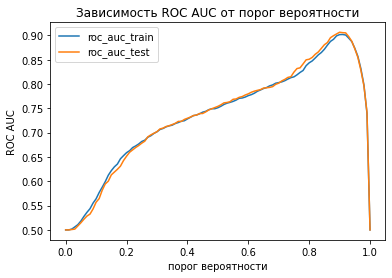

In [158]:
plt.plot(porog, roc_auc_scores_train, label = 'roc_auc_train')
plt.plot(porog, roc_auc_scores_test, label = 'roc_auc_test')
plt.legend()
plt.title('Зависимость ROC AUC от порог вероятности') 
plt.xlabel('порог вероятности')
plt.ylabel('ROC AUC')
plt.show()

In [159]:
roc_auc_scores_train.index(max(roc_auc_scores_train))

91

In [160]:
roc_auc_scores_test.index(max(roc_auc_scores_test))

90

In [176]:
tuned_cat_preds = (tuned_cat.predict_proba(test_df)[:, 0] <= 0.905).astype(int)

In [177]:
changed_cat = pd.DataFrame.from_dict({'old': init_cat_preds,
                                      'new': tuned_cat_preds})

In [178]:
changed_cat.value_counts()

old  new
0    0      142
1    1       39
     0       13
0    1        6
dtype: int64

In [180]:
X

ar_revenue  ar_total_expenses  ar_sale_cost  ar_selling_expenses  \
0       52996000.0         48344000.0    48344000.0                  0.0   
1              NaN                NaN           NaN                  NaN   
2              NaN                NaN           NaN                  NaN   
3       32049000.0         29568000.0    29568000.0                  0.0   
4       16458000.0         14935000.0    14935000.0                  0.0   
...            ...                ...           ...                  ...   
32390   28264000.0         27911000.0    27911000.0                  0.0   
32391   25017000.0         24381000.0    24381000.0                  0.0   
32392          NaN                NaN           NaN                  NaN   
32393  136162000.0        135088000.0   135088000.0                  0.0   
32394   58237000.0         53443000.0    53443000.0                  0.0   

       ar_management_expenses  ar_sale_profit  ar_balance_of_rvns_and_expns  \
0                         0.0       4652000.0                    -2608000.0   
1                         NaN             NaN                           NaN   
2                         NaN             NaN                           NaN   
3                         0.0       2481000.0                     -260000.0   
4                         0.0       1523000.0                     -274000.0   
...                       ...             ...                           ...   
32390                     0.0        353000.0                      -68000.0   
32391                     0.0        636000.0                           0.0   
32392                     NaN             NaN                           NaN   
32393                     0.0       1074000.0                     -719000.0   
32394                     0.0       4794000.0                    -3130000.0   

       ar_profit_before_tax  ar_taxes  ar_other_profit_and_losses  ...  \
0                 2044000.0  846000.0                         0.0  ...   
1                       NaN       NaN                         NaN  ...   
2                       NaN       NaN                         NaN  ...   
3                 2221000.0  302000.0                         0.0  ...   
4                 1249000.0  538000.0                         0.0  ...   
...                     ...       ...                         ...  ...   
32390              285000.0   57000.0                         0.0  ...   
32391              636000.0       0.0                         0.0  ...   
32392                   NaN       NaN                         NaN  ...   
32393              355000.0  267000.0                         0.0  ...   
32394             1664000.0  175000.0                         0.0  ...   

       head_actual_age  cap_actual_age  ul_capital_sum  ul_founders_cnt  \
0                    3               3         50000.0                2   
1                   12              12         10000.0                5   
2                   28              28         10000.0                2   
3                    8               8        300000.0                1   
4                   27              27         10000.0                2   
...                ...             ...             ...              ...   
32390                5               5         10000.0                1   
32391               25              25        600000.0                1   
32392               11              11         10000.0                1   
32393               13              13         11000.0                1   
32394               15              15         10000.0                1   

       ul_branch_cnt  ul_strategic_flg  ul_systematizing_flg  (100-500_  \
0                  0                 0                     0          0   
1                  0                 0                     0          0   
2                  0                 0                     0          0   
3                  0                 0                  

In [202]:
result['new_cat'] = tuned_cat_preds

In [203]:
result.value_counts()

rf  log  cat  xg  lama  new_cat
0   0    0    0   0     0          78
1   1    1    1   1     1          25
0   1    0    0   0     0          13
1   1    0    0   0     0          13
                  1     0          11
              1   1     0           8
0   1    0    0   1     0           7
1   0    0    0   0     0           6
    1    1    1   1     0           5
    0    1    1   1     1           5
0   0    1    1   1     1           4
         0    0   1     0           3
1   1    1    0   1     0           3
    0    0    0   1     0           3
0   1    1    1   1     1           2
1   1    0    0   1     1           2
              1   1     1           2
0   0    1    0   0     0           1
1   0    1    0   1     0           1
                        1           1
0   1    0    1   1     1           1
    0    1    1   1     0           1
                  0     1           1
                        0           1
1   1    1    0   1     1           1
0   0    1    0   

In [218]:
ones = list(result[(result['new_cat']==1) | (result['xg'] == 1) |(result['lama']==1)].index)

In [219]:
len(ones)

89

In [221]:
result[(result['new_cat']==1) | (result['xg'] == 1) |(result['lama']==1) | (result['cat']==1)]

rf  log  cat  xg  lama  new_cat
7     0    1    0   1     1        1
8     1    1    1   1     1        1
9     1    1    1   1     1        1
11    1    0    1   1     1        1
14    1    1    1   1     1        1
..   ..  ...  ...  ..   ...      ...
189   0    0    1   1     1        1
190   1    1    1   1     1        1
192   0    0    1   1     1        1
194   0    0    1   1     0        1
197   1    1    1   1     1        1

[90 rows x 6 columns]

In [210]:
new = [1 if i in ones else 0 for i in range(200)]

In [212]:
sub = pd.DataFrame.from_dict({'id':submit_ids,
                             'predict':new})
sub['predict'].value_counts()

0    126
1     74
Name: predict, dtype: int64

In [213]:
sub.to_csv('lol.csv', sep=';', index=False)

`accuracy` тот же, 0.675

In [215]:
result.value_counts()

rf  log  cat  xg  lama  new_cat
0   0    0    0   0     0          78
1   1    1    1   1     1          25
0   1    0    0   0     0          13
1   1    0    0   0     0          13
                  1     0          11
              1   1     0           8
0   1    0    0   1     0           7
1   0    0    0   0     0           6
    1    1    1   1     0           5
    0    1    1   1     1           5
0   0    1    1   1     1           4
         0    0   1     0           3
1   1    1    0   1     0           3
    0    0    0   1     0           3
0   1    1    1   1     1           2
1   1    0    0   1     1           2
              1   1     1           2
0   0    1    0   0     0           1
1   0    1    0   1     0           1
                        1           1
0   1    0    1   1     1           1
    0    1    1   1     0           1
                  0     1           1
                        0           1
1   1    1    0   1     1           1
0   0    1    0   

In [222]:
import warnings
warnings.filterwarnings('ignore')

In [223]:
%%time

xgb_params = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
              'max_depth':range(5,10,2),
              'min_child_weight':range(1,6,2),
              'subsample': [0.8, 1]}
x = xgb.XGBClassifier(nthread=8, seed=42, objective= 'binary:logistic', n_estimators=500)
best_xgb = GridSearchCV(estimator=x, param_grid=xgb_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

best_xgb.fit(X, y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

In [230]:
indices = list(result[(result['new_cat']==1) | (result['xg'] == 1) |
       (result['lama']==1) | (result['cat']==1)].index)

In [231]:
init_4boosts_preds = [1 if i in indices else 0 for i in range(200)]

In [232]:
init_4boosts = pd.DataFrame.from_dict({'id': submit_ids,
                                      'predict': init_4boosts_preds})

In [233]:
init_4boosts['predict'].value_counts()

0    110
1     90
Name: predict, dtype: int64

In [234]:
init_4boosts.to_csv('init_4boosts.csv', sep=';', index=False)

Так же 0.675

In [235]:
best = pd.read_csv('4_clfs.csv', sep=';')

In [236]:
best.head()

id  predict
0   196        0
1  1196        0
2  2813        0
3  4385        0
4  6479        0

In [237]:
kek = pd.concat([best, init_4boosts], axis=1)

In [234]:
crop_train_df[crop_train_df['default_12m']==0].sample(10000)

bus_age  ogrn_age  adr_actual_age  head_actual_age  cap_actual_age  \
16594      262       136              17               17              17   
25155       45        45               3                3               3   
22943      129       129              18               18              18   
28259      234       139               7                7               7   
4770        69        69              11               11              11   
...        ...       ...             ...              ...             ...   
28536       94        94              30               30              30   
23163       61        61               3                3               3   
24844       46        46               7                7               7   
28799      135       135              23               23              23   
6851        74        74              27               27              27   

       ul_capital_sum  ul_founders_cnt  ul_branch_cnt  ul_strategic_flg  \
16594     303999400.0              768              0                 0   
25155         10000.0                1              0                 0   
22943         11000.0                2              0                 0   
28259       6843200.0                8              0                 0   
4770          10000.0                1              0                 0   
...               ...              ...            ...               ...   
28536         10000.0                1              0                 0   
23163         10000.0                4              0                 0   
24844         10000.0                2              0                 0   
28799         10000.0                1              0                 0   
6851          10000.0                1              0                 0   

       ul_systematizing_flg  default_12m  (100-500]  > 500  [1-100]  
16594                     0            0          1      0        0  
25155                     0            0          0      0        1  
22943                     0            0          0      0        1  
28259                     0            0          0      0        1  
4770                      0            0          0      0        1  
...                     ...          ...        ...    ...      ...  
28536                     0            0          0      0        1  
23163                     0            0          0      0        1  
24844                     0            0          0      0        1  
28799                     0            0          0      0        1  
6851                      0            0          0      0        1  

[10000 rows x 14 columns]

[Voting] .................... (3 of 4) Processing gauss, total=   0.0s
[Voting] ....................... (1 of 4) Processing rf, total=   1.2s
[Voting] .................... (3 of 4) Processing gauss, total=   0.0s
[Voting] ....................... (2 of 4) Processing lr, total=   0.1s
[Voting] ....................... (2 of 4) Processing lr, total=   0.1s
[Voting] ....................... (2 of 4) Processing lr, total=   0.3s
[Voting] ....................... (1 of 4) Processing rf, total=   1.2s
[Voting] .................... (3 of 4) Processing gauss, total=   0.0s
[Voting] ....................... (1 of 4) Processing rf, total=   1.6s


In [235]:
test_0 = crop_train_df[crop_train_df['default_12m']==0].sample(10000)

[Voting] ...................... (4 of 4) Processing SVM, total=  23.2s
[Voting] ...................... (4 of 4) Processing SVM, total=  23.0s
[Voting] ...................... (4 of 4) Processing SVM, total=  47.4s


In [236]:
test_1 = crop_train_df[crop_train_df['default_12m'] == 1]

In [237]:
test = pd.concat([test_0, test_1])

In [239]:
test['default_12m'].value_counts(normalize=True)

0    0.827061
1    0.172939
Name: default_12m, dtype: float64

In [246]:
%%time

main_clf.fit(test.drop('default_12m', axis=1), test['default_12m'])

CPU times: user 63.1 ms, sys: 0 ns, total: 63.1 ms
Wall time: 14 s


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=250,
                                                     n_jobs=-1)),
                             ('lr', LogisticRegression(C=0.8)),
                             ('gauss', GaussianNB()),
                             ('SVM',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(gamma='auto',
                                                   probability=True))]))],
                 n_jobs=-1, verbose=True, voting='soft', weights=[4, 1, 1, 1])

In [247]:
preds = main_clf.predict(crop_test_df)

In [248]:
preds.shape

(200,)

In [249]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [244]:
rf.fit(test.drop('default_12m', axis=1), test['default_12m'])
pr = rf.predict(crop_test_df)

pr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [250]:
kek = pd.read_csv('PD-data-test.csv', sep=';')

In [251]:
kek['record_id']

0         196
1        1196
2        2813
3        4385
4        6479
        ...  
195    265577
196    266648
197    266849
198    267566
199    271584
Name: record_id, Length: 200, dtype: int64

[Voting] ....................... (2 of 4) Processing lr, total=   0.0s
[Voting] .................... (3 of 4) Processing gauss, total=   0.0s
[Voting] ....................... (1 of 4) Processing rf, total=   0.8s
[Voting] ...................... (4 of 4) Processing SVM, total=  13.3s


In [255]:
temp = pd.DataFrame()

In [256]:
temp['id'] = kek[['record_id']]
temp['predict'] = pr

In [257]:
temp

id  predict
0       196        0
1      1196        0
2      2813        0
3      4385        0
4      6479        0
..      ...      ...
195  265577        0
196  266648        0
197  266849        0
198  267566        0
199  271584        0

[200 rows x 2 columns]

In [258]:
temp.to_csv('PD-submit.csv', index=False, sep=';')